### 00 GPU使用情况检测

In [4]:
import GPUtil  

def get_least_used_gpu():  
    # 获取可用的GPU列表  
    gpus = GPUtil.getGPUs()  
    
    # 初始化变量来跟踪最少使用的GPU  
    least_used_gpu_id = None  
    min_memory_used = float('inf')  
    
    for gpu in gpus:  
        # 当前GPU的ID和内存使用情况  
        gpu_id = gpu.id  
        memory_used = gpu.memoryUsed  
        
        # 判断当前GPU是否使用的内存最少  
        if memory_used < min_memory_used:  
            min_memory_used = memory_used  
            least_used_gpu_id = gpu_id  
            
    # 计算剩余可用内存  
    available_memory = gpus[least_used_gpu_id].memoryFree  

    print(f"当前内存使用最少的 GPU 序号: {gpu_id}")  
    print(f"剩余可用内存: {available_memory} MB")

    return least_used_gpu_id 

get_least_used_gpu()
    

当前内存使用最少的 GPU 序号: 3
剩余可用内存: 997.0 MB


3

### 01 FCGS 对I帧压缩

In [1]:
import os

lmbda_list = [4e-4]
scene = 'cook_spinach-3-ori'
path_to_ply = f'/SDD_D/zwk/output/{scene}/additional_3dgs'
path_to_save = f'/SDD_D/zwk/output/{scene}/additional_3dgs_c'

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

for lmbda in lmbda_list:
    # for ply in os.listdir(path_to_ply):
    #     os.system(f'python encode_single_scene.py --gpu 3 --lmd {lmbda} --ply_path_from {path_to_ply}/{ply} --bit_path_to {path_to_save}/{ply.split(".")[0]} --determ 1')
    # os.system(f'python encode_single_scene.py --gpu 3 --lmd {lmbda} --ply_path_from {path_to_ply} --bit_path_to {path_to_save} --determ 1')
    # os.system(f'python decode_single_scene_validate.py --gpu 0 --lmd {lmbda} --bit_path_from ./outputs/{exp_name}/{scene} --ply_path_to {path_to_ply}/{scene}/point_cloud/iteration_1000/point_cloud.ply --source_path ../data_static/mipnerf360/{scene}')

    # os.system(f'python encode_single_scene.py --gpu 3 --lmd {lmbda} --ply_path_from "/SDD_D/zwk/output/{scene}/init_3dgs.ply" --bit_path_to "/SDD_D/zwk/output/{scene}/init_3dgs_c" --determ 1')
    os.system(f'python -W ignore decode_single_scene_validate.py --gpu 0 --lmd {lmbda} --bit_path_from /SDD_D/zwk/output/{scene}/init_3dgs_c --ply_path_to /SDD_D/zwk/output/{scene}/init_3dgs.ply --source_path /SDD_D/zwk/data_dynamic/dynerf/{scene.split("-")[0]}/frame000000')



Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


Traceback (most recent call last):
  File "/SSD2/chenzx/Projects/FCGS/decode_single_scene_validate.py", line 19, in <module>
    lpips_fn = lpips.LPIPS(net='vgg').to('cuda')
               ^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/lpips.py", line 84, in __init__
    self.net = net_type(pretrained=not self.pnet_rand, requires_grad=self.pnet_tune)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/pretrained_networks.py", line 99, in __init__
    vgg_pretrained_features = tv.vgg16(pretrained=pretrained).features
                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/models/_utils.py", line 142, in wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packag

In [18]:
import os

lmbda_list = [1e-4]
exp_name = '3DGS_ori_mip360'
path_to_ply = '../gaussian-splatting/output/mipnerf360'
scene_list = os.listdir(path_to_ply)
for lmbda in lmbda_list:
    for scene in ['garden']:
        print('-'*100,'\n', scene)
        os.system(f'python encode_single_scene.py --gpu 3 --lmd {lmbda} --ply_path_from {path_to_ply}/{scene}/point_cloud/iteration_30000/point_cloud.ply --bit_path_to ./outputs/{exp_name}/{scene} --determ 1')
        os.system(f'python -W ignore decode_single_scene.py --gpu 3 --lmd {lmbda} --bit_path_from ./outputs/{exp_name}/{scene} --ply_path_to {path_to_ply}/{scene}/point_cloud/iteration_30000/point_cloud.ply ')

---------------------------------------------------------------------------------------------------- 
 garden
Start compressing xyz...
N_g: 1000000
g_fea_enc_q_hyp: tensor([[ 0.1344,  0.0402, -0.0148,  ..., -0.0757,  0.1325,  0.1073],
        [ 0.1347,  0.0402, -0.0145,  ..., -0.0758,  0.1334,  0.1075],
        [ 0.1348,  0.0402, -0.0145,  ..., -0.0758,  0.1333,  0.1074],
        ...,
        [ 0.1345,  0.0402, -0.0148,  ..., -0.0757,  0.1326,  0.1073],
        [ 0.1346,  0.0401, -0.0146,  ..., -0.0758,  0.1331,  0.1074],
        [ 0.1344,  0.0402, -0.0148,  ..., -0.0757,  0.1325,  0.1073]],
       device='cuda:3')
g_fea_enc_q_hyp_q: tensor([[0., 0., -0.,  ..., -0., 0., 0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., 0., -0.,  ..., -0., 0., 0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        [0., 0., -0.,  ..., -0., 0., 0.]], device='cuda:3')
Start compressing fea...
Start compressing feq...
fe_q_hyp: tensor([[-0.183

Traceback (most recent call last):
  File "/SSD2/chenzx/Projects/FCGS/encode_single_scene.py", line 72, in <module>
    train(args)
  File "/SSD2/chenzx/Projects/FCGS/encode_single_scene.py", line 52, in train
    ttl_size += CM.compress(g_xyz_in, g_fea_in, root_path=bit_save_path, chunk_size_list=chunk_size_list, determ_codec=args.determ)[3]
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/FCGS_model.py", line 822, in compress
    bits_feq_main_tmp = encoder_gaussian_mixed_chunk(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/encodings_cuda.py", line 191, in encoder_gaussian_mixed_chunk
    bit_len = encoder_gaussian_mixed(
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/encodings_cuda.py", line 216, in encoder_gaussian_mixed
    lower = arithmetic.calculate_cdf(
            ^^^^^^^^^^

Start decompressing xyz...
Start decompressing fea...
g_fea_enc_q_hyp_q: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:3')
Start decompressing feq...
fe_q_hyp_q: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:3')
Start decompressing geo...
geo_q_hyp_q: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:3')
Start decompressing xyz...
Start de

Traceback (most recent call last):
  File "/SSD2/chenzx/Projects/FCGS/decode_single_scene.py", line 65, in <module>
    train(args)
  File "/SSD2/chenzx/Projects/FCGS/decode_single_scene.py", line 32, in train
    g_xyz_out, g_fea_out = CM.decomprss(root_path=bit_save_path, chunk_size_list=chunk_size_list)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/FCGS_model.py", line 1041, in decomprss
    fe_q_tmp = decoder_gaussian_mixed_chunk(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/encodings_cuda.py", line 264, in decoder_gaussian_mixed_chunk
    x_c = decoder_gaussian_mixed(
          ^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/encodings_cuda.py", line 283, in decoder_gaussian_mixed
    with open(file_name, 'rb') as fin:
         ^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: './outputs/3DGS_ori_mip360/ga

### 02 EXP ON FCGS_D

In [ ]:
# per-frame exp
import os
scene_list = ['flame_steak-4']
# scene_list = ['sear_steak-5', 'flame_salmon_1-3', 'cut_roasted_beef-8', 'coffee_martini-4', 'flame_steak-4', 'cook_spinach-3']

lambda_size = 1e-2
for scene_name in scene_list:
    script = f"python train_fcgsd.py --gpu 3 --eval --per_frame --Q_y 1 --Q_z 1 --lambda_size {lambda_size} --residual_num 1 \
        --conduct_training --scene_name {scene_name} \
        --frame_start 1 --frame_end 2 --dynamicGS_type 3dgstream \
        --images images_2 --iterations 500 --model_path ./3DGStream-Res/dynerf/{scene_name.split('-')[0]}-{lambda_size}-tmp --use_first_as_test"
    os.system(script)

2025-03-14 22:02:22,115 - train - INFO - Training arguments:
2025-03-14 22:02:22,115 - train - INFO - {
  "sh_degree": 3,
  "source_path": "",
  "model_path": "./3DGStream-Res/dynerf/flame_steak-0.01-tmp",
  "images": "images_2",
  "resolution": -1,
  "white_background": false,
  "data_device": "cuda",
  "eval": true,
  "lod": 0,
  "iterations": 500,
  "position_lr_init": 0.00016,
  "position_lr_final": 1.6e-06,
  "position_lr_delay_mult": 0.01,
  "position_lr_max_steps": 30000,
  "feature_lr": 0.0025,
  "opacity_lr": 0.05,
  "scaling_lr": 0.005,
  "rotation_lr": 0.001,
  "percent_dense": 0.01,
  "lambda_dssim": 0.2,
  "densification_interval": 100,
  "opacity_reset_interval": 3000,
  "densify_from_iter": 500,
  "densify_until_iter": 15000,
  "densify_grad_threshold": 0.0002,
  "random_background": false,
  "convert_SHs_python": false,
  "compute_cov3D_python": false,
  "debug": false,
  "Q_y": 1.0,
  "Q_z": 1.0,
  "gof_size": 20,
  "gaussian_feature_dim": 56,
  "motion_dim": 7,
  "hid


[Training frame 1]


Training: 100%|██████████| 500/500 [04:33<00:00,  1.83iteration/s, loss_render=0.0156, loss_size=5.01, loss_mask=0, total_loss=0.0657]
2025-03-14 22:06:59,953 - train - INFO - Saved final model to ./3DGStream-Res/dynerf/flame_steak-0.01-tmp/frame000002/model.pth
2025-03-14 22:07:00,419 - train - INFO - Saved loss curves to ./3DGStream-Res/dynerf/flame_steak-0.01-tmp/frame000002/loss_curve.png
2025-03-14 22:07:00,420 - train - INFO - Training completed in 0h 4m 38s
2025-03-14 22:07:00,421 - train - INFO - Training losses saved to ./3DGStream-Res/dynerf/flame_steak-0.01-tmp/training_losses.json
2025-03-14 22:07:00,422 - train - INFO - 



Figure(1500x500)




In [1]:
# joint exp
import os
scene_list = ['flame_salmon_1-3']
# scene_list = ['cut_roasted_beef-8']
lambda_size = 1e-2

for scene_name in scene_list:
    model_path = f'./3DGStream-Res/dynerf/{scene_name.split("-")[0]}-{lambda_size}-joint-tmp'
    checkpoint_path = f'{model_path}/model.pth'
    script = f"python train_fcgsd.py --gpu 2 --eval --joint  --dynamicGS_type 3dgstream \
        --Q_y 1 --Q_z 1 --lr 1e-3 --lambda_size {lambda_size}  --residual_num 1000\
        --conduct_training  --scene_name {scene_name} \
        --frame_start 0 --frame_end 10 --test_frame_start 1 --test_frame_end 3\
        --images images_2 --iterations 50 --model_path {model_path} --use_first_as_test"
    os.system(script)

Traceback (most recent call last):
  File "/SSD2/chenzx/Projects/FCGS/train_fcgsd.py", line 9, in <module>
    import torchvision
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/__init__.py", line 6, in <module>
    from torchvision import datasets, io, models, ops, transforms, utils
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/datasets/__init__.py", line 1, in <module>
    from ._optical_flow import FlyingChairs, FlyingThings3D, HD1K, KittiFlow, Sintel
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/datasets/_optical_flow.py", line 12, in <module>
    from ..io.image import _read_png_16
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/io/__init__.py", line 36, in <module>
    from .video import read_video, read_video_timestamps, write_video
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/io/video.py", line 16, 

In [3]:
# joint exp stepping
import os
scene_list = ['flame_steak']
# scene_list = ['cut_roasted_beef-8']
lambda_size = 1e-2

for scene_name in scene_list:
    model_path = f'./3DGStream-Res/dynerf/{scene_name.split("-")[0]}-{lambda_size}-joint-stepping'
    checkpoint_path = f'{model_path}/model.pth'
    script = f"python train_fcgsd.py --gpu 1 --eval --joint  --dynamicGS_type 3dgstream_implicit \
        --Q_y 1 --Q_z 1 --lr 1e-3 --lambda_size {lambda_size} --residual_num 1000\
        --conduct_training --conduct_compress --conduct_decompress --scene_name {scene_name} \
        --frame_start 0 --frame_end 30 --test_frame_start 1 --test_frame_end 5\
        --images images --iterations 200 --model_path {model_path} --use_first_as_test --dataset dynerf"
    os.system(script)

2025-03-31 15:34:18,098 - train - INFO - Training arguments:
2025-03-31 15:34:18,098 - train - INFO - {
  "sh_degree": 3,
  "source_path": "",
  "model_path": "./3DGStream-Res/dynerf/flame_steak-0.01-joint-stepping",
  "images": "images",
  "resolution": -1,
  "white_background": false,
  "data_device": "cuda",
  "eval": true,
  "lod": 0,
  "iterations": 200,
  "position_lr_init": 0.00016,
  "position_lr_final": 1.6e-06,
  "position_lr_delay_mult": 0.01,
  "position_lr_max_steps": 30000,
  "feature_lr": 0.0025,
  "opacity_lr": 0.05,
  "scaling_lr": 0.005,
  "rotation_lr": 0.001,
  "percent_dense": 0.01,
  "lambda_dssim": 0.2,
  "densification_interval": 100,
  "opacity_reset_interval": 3000,
  "densify_from_iter": 500,
  "densify_until_iter": 15000,
  "densify_grad_threshold": 0.0002,
  "random_background": false,
  "convert_SHs_python": false,
  "compute_cov3D_python": false,
  "debug": false,
  "Q_y": 1.0,
  "Q_z": 1.0,
  "gof_size": 20,
  "gaussian_feature_dim": 56,
  "motion_dim": 

Frame: 20 -> 22
tensor([[-0.0270,  0.1908,  0.1819,  ..., -0.2304, -0.0012, -0.0229],
        [-0.0427,  0.5589,  0.1709,  ..., -0.1603, -0.1173, -0.0226],
        [ 0.0201,  0.1242, -0.0817,  ..., -0.0410, -0.1017, -0.0246],
        ...,
        [ 0.0603,  0.5197, -0.1382,  ..., -0.1456, -0.5377,  0.1907],
        [ 0.0532,  0.1877, -0.0661,  ..., -0.1602, -0.2580, -0.0710],
        [ 0.4325,  0.0684, -0.1161,  ..., -0.0040,  0.0445, -0.0057]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0.,  0.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -1.,  0., -1.],
        [ 0., -0.,  0.,  ..., -0., -0., -0.],
        [-0., -1., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-63470., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0101, -0.0156, -0.0149,  ...,  0.0023,  0.0061, 

Training:   0%|          | 1/200 [00:02<07:55,  2.39s/iteration, loss_render=0.0694, loss_size=6.53, loss_mask=0, total_loss=0.135]

tensor([[-0.0253,  0.2064,  0.2072,  ..., -0.2757, -0.0251, -0.0166],
        [-0.0756,  0.6011,  0.1224,  ..., -0.2101, -0.1420,  0.0241],
        [ 0.0230,  0.1203, -0.0858,  ...,  0.0112, -0.0420, -0.0245],
        ...,
        [ 0.0015,  0.5019, -0.0933,  ..., -0.3101, -0.4398,  0.3321],
        [ 0.0425,  0.1861, -0.1012,  ..., -0.1856, -0.2436, -0.0475],
        [ 0.4764,  0.0597, -0.0970,  ...,  0.0112,  0.0918, -0.0090]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., 0., 0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-47034., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0039,  0.0118, -0.0119,  ...,  0.0049,  0.0026,  0.0119],
        [ 0.0391, 

Training:   1%|          | 2/200 [00:02<03:45,  1.14s/iteration, loss_render=0.0468, loss_size=6.51, loss_mask=0, total_loss=0.112]

tensor([[-0.0222,  0.2002,  0.2204,  ..., -0.2904, -0.0195,  0.0056],
        [-0.0877,  0.6091,  0.0899,  ..., -0.2291, -0.1386,  0.0627],
        [ 0.0081,  0.1128, -0.0525,  ...,  0.0028, -0.0241, -0.0579],
        ...,
        [ 0.0183,  0.4220, -0.1171,  ..., -0.2859, -0.3852,  0.3686],
        [ 0.0339,  0.1863, -0.1029,  ..., -0.1887, -0.2440, -0.0571],
        [ 0.4846,  0.0501, -0.0903,  ...,  0.0074,  0.0892,  0.0042]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-18308., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0095, -0.0071, -0.0051,  ...,  0.0127,  0.0014,  0.0084],
        [ 0.0195, 

Training:   2%|▏         | 3/200 [00:02<02:22,  1.38iteration/s, loss_render=0.0524, loss_size=6.5, loss_mask=0, total_loss=0.117] 

tensor([[ 0.0012,  0.1814,  0.2321,  ..., -0.3119, -0.0087,  0.0210],
        [-0.1133,  0.6008,  0.0626,  ..., -0.2358, -0.1358,  0.0766],
        [ 0.0303,  0.0648, -0.1115,  ..., -0.0258, -0.0377, -0.0146],
        ...,
        [ 0.0528,  0.3532, -0.1374,  ..., -0.2893, -0.3474,  0.3505],
        [ 0.0159,  0.1556, -0.0867,  ..., -0.2102, -0.2440, -0.0616],
        [ 0.4830,  0.0428, -0.0815,  ..., -0.0070,  0.1002,  0.0033]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-5697., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0011, -0.0062, -0.0054,  ...,  0.0160,  0.0007,  0.0031],
        [ 0.0014, -0

Training:   2%|▏         | 4/200 [00:03<01:43,  1.89iteration/s, loss_render=0.0472, loss_size=6.48, loss_mask=0, total_loss=0.112]

tensor([[ 0.0049,  0.1752,  0.2387,  ..., -0.3254,  0.0008,  0.0314],
        [-0.1321,  0.6105,  0.0389,  ..., -0.2288, -0.1500,  0.0736],
        [ 0.0319,  0.0366, -0.1587,  ..., -0.0375, -0.0389,  0.0139],
        ...,
        [ 0.0807,  0.3178, -0.1772,  ..., -0.2394, -0.2759,  0.3641],
        [-0.0044,  0.1523, -0.1022,  ..., -0.2161, -0.2367, -0.0657],
        [ 0.4693,  0.0438, -0.0866,  ..., -0.0217,  0.1136, -0.0162]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-2173., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0077, -0.0009, -0.0040,  ...,  0.0161,  0.0013, -0.0010],
        [ 0.0077, -0

Training:   2%|▎         | 5/200 [00:03<01:22,  2.37iteration/s, loss_render=0.0297, loss_size=6.46, loss_mask=0, total_loss=0.0943]

tensor([[ 0.0034,  0.1729,  0.2481,  ..., -0.3436,  0.0128,  0.0428],
        [-0.1527,  0.6095,  0.0169,  ..., -0.2220, -0.1579,  0.0643],
        [ 0.0429,  0.0110, -0.1787,  ..., -0.0609, -0.0490,  0.0220],
        ...,
        [ 0.0720,  0.2690, -0.1962,  ..., -0.2332, -0.2199,  0.3859],
        [-0.0153,  0.1462, -0.1192,  ..., -0.2207, -0.2312, -0.0670],
        [ 0.4217,  0.0376, -0.1429,  ..., -0.0217,  0.1031, -0.0275]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-879., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0065,  0.0032, -0.0006,  ...,  0.0129,  0.0003, -0.0065],
        [ 0.0065,  0

Training:   3%|▎         | 6/200 [00:03<01:09,  2.78iteration/s, loss_render=0.0326, loss_size=6.43, loss_mask=0, total_loss=0.0969]

tensor([[ 0.0010,  0.1222,  0.2800,  ..., -0.3762,  0.0378,  0.0326],
        [-0.1750,  0.6012,  0.0079,  ..., -0.2096, -0.1618,  0.0636],
        [ 0.0481, -0.0105, -0.1961,  ..., -0.0792, -0.0558,  0.0367],
        ...,
        [ 0.0736,  0.2284, -0.2172,  ..., -0.2183, -0.1720,  0.3966],
        [ 0.0230,  0.1234, -0.0895,  ..., -0.1982, -0.1959, -0.0898],
        [ 0.4116,  0.0434, -0.1471,  ..., -0.0427,  0.0972, -0.0275]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., 0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(3267., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0029,  0.0029,  0.0017,  ...,  0.0102, -0.0006, -0.0091],
        [ 0.0029,  0.0

Training:   4%|▎         | 7/200 [00:03<01:01,  3.16iteration/s, loss_render=0.0339, loss_size=6.4, loss_mask=0, total_loss=0.0979] 

tensor([[ 0.0044,  0.0604,  0.3068,  ..., -0.4073,  0.0596,  0.0138],
        [-0.1906,  0.5862, -0.0034,  ..., -0.1972, -0.1560,  0.0669],
        [ 0.0557, -0.0259, -0.2014,  ..., -0.0885, -0.0554,  0.0473],
        ...,
        [ 0.0664,  0.2039, -0.2293,  ..., -0.2113, -0.1236,  0.4212],
        [ 0.0439,  0.1133, -0.0775,  ..., -0.1882, -0.1716, -0.1024],
        [ 0.3874,  0.0485, -0.1530,  ..., -0.0705,  0.0732, -0.0276]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., 0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., 0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(6622., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0004, -0.0004,  0.0037,  ...,  0.0065, -0.0010, -0.0107],
        [-0.0004, -0.00

Training:   4%|▍         | 8/200 [00:04<00:55,  3.49iteration/s, loss_render=0.0299, loss_size=6.36, loss_mask=0, total_loss=0.0936]

tensor([[ 0.0185,  0.0214,  0.3137,  ..., -0.4265,  0.0719, -0.0061],
        [-0.2014,  0.5682,  0.0014,  ..., -0.1876, -0.1427,  0.0712],
        [ 0.1051, -0.0295, -0.1766,  ..., -0.0433, -0.0432,  0.0866],
        ...,
        [ 0.0626,  0.1813, -0.2306,  ..., -0.2003, -0.0743,  0.4414],
        [ 0.0602,  0.1119, -0.0694,  ..., -0.1815, -0.1526, -0.1148],
        [ 0.3826,  0.0496, -0.1555,  ..., -0.0809,  0.0861, -0.0316]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., 0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.],
        ...,
        [-0., -0., 0.,  ..., -0., 0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(7806., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0069,  0.0013, -0.0120,  ...,  0.0344, -0.0234, -0.0120],
        [-0.0026, -0.

Training:   4%|▍         | 9/200 [00:04<00:51,  3.68iteration/s, loss_render=0.0255, loss_size=6.33, loss_mask=0, total_loss=0.0888]

tensor([[ 2.5686e-02,  1.3012e-02,  3.1509e-01,  ..., -4.3186e-01,
          8.4479e-02,  3.1384e-04],
        [-1.9982e-01,  5.4568e-01,  1.3477e-02,  ..., -1.7932e-01,
         -1.2753e-01,  7.1003e-02],
        [ 1.0569e-01, -5.2352e-02, -1.9941e-01,  ..., -4.5698e-02,
         -2.8402e-02,  8.0572e-02],
        ...,
        [ 6.4153e-02,  1.6286e-01, -2.2267e-01,  ..., -1.9537e-01,
         -5.2030e-02,  4.4697e-01],
        [ 7.9119e-02,  1.1221e-01, -6.1259e-02,  ..., -1.7941e-01,
         -1.3967e-01, -1.2782e-01],
        [ 3.7963e-01,  4.5082e-02, -1.5776e-01,  ..., -9.5956e-02,
          1.0727e-01, -4.3156e-02]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0., -0., 0.,  ..., 0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., 0., -0.,  ..., -0., -0., 0.],
        ...,
        [-0., -0., 0.,  ..., -0., 0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<

Training:   5%|▌         | 10/200 [00:04<00:49,  3.86iteration/s, loss_render=0.0262, loss_size=6.29, loss_mask=0, total_loss=0.0891]

Frame: 0 -> 10
tensor([[-0.0098,  0.0698, -0.1312,  ..., -0.1013, -0.1072,  0.2478],
        [ 0.9212,  0.5323, -0.2361,  ..., -0.4732,  0.0021,  0.0299],
        [ 0.3804,  0.1265, -0.1133,  ..., -0.1640,  0.0949, -0.0137],
        ...,
        [-0.0162,  0.1740,  0.1271,  ..., -0.3222,  0.0361,  0.0083],
        [ 0.2371,  0.1427, -0.3191,  ..., -0.3037,  0.0206, -0.1362],
        [ 0.0583,  0.0553, -0.1541,  ..., -0.0270, -0.0929, -0.0196]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0., -0.,  ..., -0.,  0.,  0.],
        [-0.,  0.,  1.,  ..., -0.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -0.,  0.,  0.],
        [ 0., -1., -1.,  ..., -0., -0., -1.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(148., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0038, -0.0010, -0.0275,  ...,  0.0311, -0.0425, -0.0

Training:   6%|▌         | 11/200 [00:06<02:17,  1.38iteration/s, loss_render=0.027, loss_size=6.28, loss_mask=0, total_loss=0.0898] 

tensor([[-0.0095,  0.0652, -0.1354,  ..., -0.0930, -0.1037,  0.2477],
        [ 0.9612,  0.4933, -0.2082,  ..., -0.4960,  0.0441,  0.0515],
        [ 0.3881,  0.1399, -0.0908,  ..., -0.1797,  0.0970, -0.0501],
        ...,
        [-0.0163,  0.1690,  0.1258,  ..., -0.3150,  0.0460,  0.0105],
        [ 0.2378,  0.1362, -0.3240,  ..., -0.2985,  0.0343, -0.1341],
        [ 0.0595,  0.0525, -0.1569,  ..., -0.0315, -0.0957, -0.0176]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0., -0.,  ..., -0.,  0.,  0.],
        [-0.,  0.,  1.,  ..., -0.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0.,  0.,  0.],
        [ 0., -1., -0.,  ..., -0., -0., -1.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-1328., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0034,  0.0002, -0.0228,  ...,  0.0272, -0.0399, -0.0105],
       

Training:   6%|▌         | 12/200 [00:06<01:48,  1.73iteration/s, loss_render=0.0278, loss_size=6.25, loss_mask=0, total_loss=0.0902]

tensor([[-0.0101,  0.0630, -0.1367,  ..., -0.0849, -0.1002,  0.2437],
        [ 0.9802,  0.4893, -0.1941,  ..., -0.5160,  0.0715,  0.0420],
        [ 0.3954,  0.1545, -0.0693,  ..., -0.1912,  0.0984, -0.0837],
        ...,
        [-0.0172,  0.1649,  0.1259,  ..., -0.3080,  0.0550,  0.0118],
        [ 0.2387,  0.1344, -0.3266,  ..., -0.2938,  0.0469, -0.1360],
        [ 0.0588,  0.0523, -0.1595,  ..., -0.0338, -0.0958, -0.0177]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -0.,  0.,  0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0.,  0.,  0.],
        [ 0., -1., -0.,  ..., -0., -0., -1.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-1547., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 3.4499e-03, -5.0628e-05, -1.7910e-02,  ...,  2.3755e-02,
         -

Training:   6%|▋         | 13/200 [00:06<01:28,  2.12iteration/s, loss_render=0.0266, loss_size=6.22, loss_mask=0, total_loss=0.0888]

tensor([[-0.0105,  0.0602, -0.1381,  ..., -0.0751, -0.0971,  0.2390],
        [ 0.9749,  0.5104, -0.2065,  ..., -0.5311,  0.0942,  0.0239],
        [ 0.4105,  0.1717, -0.0426,  ..., -0.2085,  0.0994, -0.1223],
        ...,
        [-0.0188,  0.1614,  0.1262,  ..., -0.3003,  0.0645,  0.0127],
        [ 0.2882,  0.0707, -0.3540,  ..., -0.2192,  0.0303, -0.1724],
        [ 0.0554,  0.0527, -0.1628,  ..., -0.0366, -0.0949, -0.0171]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0.,  0.,  0.],
        [ 0., -1., -0.,  ..., -0., -0., -1.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-284., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0034, -0.0020, -0.0146,  ...,  0.0211, -0.0343, -0.0067],
        

Training:   7%|▋         | 14/200 [00:06<01:13,  2.53iteration/s, loss_render=0.0226, loss_size=6.18, loss_mask=0, total_loss=0.0844]

tensor([[-0.0101,  0.0565, -0.1398,  ..., -0.0644, -0.0944,  0.2355],
        [ 0.9871,  0.5287, -0.2146,  ..., -0.5462,  0.1086,  0.0072],
        [ 0.4242,  0.1869, -0.0206,  ..., -0.2228,  0.0987, -0.1638],
        ...,
        [-0.0218,  0.1583,  0.1251,  ..., -0.2926,  0.0734,  0.0135],
        [ 0.2877,  0.0661, -0.2748,  ..., -0.3273,  0.1209, -0.2584],
        [ 0.0501,  0.0612, -0.1601,  ..., -0.0363, -0.0966, -0.0213]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0.,  0.,  0.],
        [-0., -1., -1.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-430., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0037,  0.0003,  0.0071,  ...,  0.0257, -0.0260, -0.0006],
        

Training:   8%|▊         | 15/200 [00:07<01:03,  2.90iteration/s, loss_render=0.0249, loss_size=6.14, loss_mask=0, total_loss=0.0863]

tensor([[-0.0064,  0.0565, -0.1462,  ..., -0.0565, -0.0982,  0.2297],
        [ 0.9883,  0.5226, -0.2077,  ..., -0.5821,  0.0952, -0.0043],
        [ 0.4372,  0.1769, -0.0198,  ..., -0.2266,  0.1008, -0.1731],
        ...,
        [-0.0268,  0.1554,  0.1248,  ..., -0.2871,  0.0830,  0.0126],
        [ 0.2763,  0.0753, -0.2049,  ..., -0.4221,  0.2212, -0.2706],
        [ 0.0497,  0.0689, -0.1602,  ..., -0.0389, -0.1002, -0.0238]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0.,  0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0.,  0.,  0.],
        [-0., -0., -1.,  ...,  0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-701., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.3741e-03, -5.4826e-05,  8.6647e-03,  ...,  2.4220e-02,
         -2

Training:   8%|▊         | 16/200 [00:07<00:57,  3.21iteration/s, loss_render=0.0239, loss_size=6.09, loss_mask=0, total_loss=0.0848]

tensor([[ 0.0023,  0.0563, -0.1525,  ..., -0.0496, -0.1004,  0.2243],
        [ 0.9992,  0.5215, -0.2091,  ..., -0.5912,  0.0720, -0.0230],
        [ 0.4569,  0.1645, -0.0184,  ..., -0.2248,  0.1071, -0.1796],
        ...,
        [-0.0316,  0.1539,  0.1229,  ..., -0.2806,  0.0932,  0.0121],
        [ 0.3049,  0.0838, -0.1843,  ..., -0.4422,  0.2523, -0.2715],
        [ 0.0513,  0.0728, -0.1595,  ..., -0.0429, -0.1011, -0.0255]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0.,  0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0.,  0.,  0.],
        [-0., -0., -1.,  ...,  0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-2527., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0036, -0.0008,  0.0090,  ...,  0.0216, -0.0237, -0.0050],
       

Training:   8%|▊         | 17/200 [00:07<00:52,  3.46iteration/s, loss_render=0.0271, loss_size=6.03, loss_mask=0, total_loss=0.0874]

tensor([[ 0.0132,  0.0535, -0.1594,  ..., -0.0409, -0.1020,  0.2197],
        [ 1.0068,  0.5265, -0.2067,  ..., -0.5883,  0.0530, -0.0347],
        [ 0.4750,  0.1489, -0.0189,  ..., -0.2187,  0.1150, -0.1773],
        ...,
        [-0.0363,  0.1547,  0.1219,  ..., -0.2744,  0.1039,  0.0117],
        [ 0.3206,  0.0694, -0.1322,  ..., -0.4792,  0.2884, -0.2739],
        [ 0.0526,  0.0748, -0.1599,  ..., -0.0468, -0.1008, -0.0260]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0.,  0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0.,  0.,  0.],
        [-0., -0., -1.,  ...,  0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-3736., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0041, -0.0029,  0.0079,  ...,  0.0168, -0.0213, -0.0071],
       

Training:   9%|▉         | 18/200 [00:07<00:49,  3.70iteration/s, loss_render=0.0244, loss_size=5.97, loss_mask=0, total_loss=0.0841]

tensor([[ 0.0279,  0.0506, -0.1625,  ..., -0.0386, -0.1048,  0.2166],
        [ 1.0509,  0.4675, -0.2358,  ..., -0.5496,  0.0618, -0.0403],
        [ 0.4960,  0.1581, -0.0100,  ..., -0.2020,  0.1203, -0.2047],
        ...,
        [-0.0376,  0.1542,  0.1181,  ..., -0.2682,  0.1126,  0.0109],
        [ 0.3399,  0.0638, -0.1107,  ..., -0.4866,  0.3057, -0.2799],
        [ 0.0536,  0.0785, -0.1661,  ..., -0.0440, -0.1009, -0.0265]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0.,  0.,  0.],
        [-0., -0., -1.,  ...,  0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-3504., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0022, -0.0059,  0.0050,  ...,  0.0124, -0.0196, -0.0079],
       

Training:  10%|▉         | 19/200 [00:08<00:46,  3.91iteration/s, loss_render=0.0246, loss_size=5.9, loss_mask=0, total_loss=0.0837] 

tensor([[ 0.0434,  0.0472, -0.1631,  ..., -0.0401, -0.1068,  0.2144],
        [ 1.1071,  0.4017, -0.2550,  ..., -0.5185,  0.0772, -0.0413],
        [ 0.5115,  0.1829,  0.0041,  ..., -0.1799,  0.1261, -0.2405],
        ...,
        [-0.0372,  0.1532,  0.1154,  ..., -0.2610,  0.1198,  0.0104],
        [ 0.3582,  0.0561, -0.0864,  ..., -0.4991,  0.3316, -0.2849],
        [ 0.0565,  0.0806, -0.1653,  ..., -0.0469, -0.0999, -0.0287]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0.,  0., -0.],
        [-0., -0., -1.,  ...,  0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-3839., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0010, -0.0023, -0.0047,  ...,  0.0035, -0.0039,  0.0032],
       

Training:  10%|█         | 20/200 [00:08<00:44,  4.05iteration/s, loss_render=0.0241, loss_size=5.83, loss_mask=0, total_loss=0.0824]

Frame: 20 -> 25
tensor([[ 0.1550, -0.0273,  0.1501,  ..., -0.1805,  0.0966, -0.1589],
        [ 0.3316,  0.2924,  0.1243,  ..., -0.1803, -0.1261, -0.0036],
        [-0.0725,  0.1249,  0.0409,  ..., -0.6487, -0.2056, -0.0659],
        ...,
        [ 0.0436,  0.0641, -0.2969,  ..., -0.1122, -0.0463,  0.5833],
        [ 0.1592,  0.1107, -0.0454,  ..., -0.0985, -0.1057, -0.1100],
        [ 0.6803, -0.0255, -0.2182,  ...,  0.0608,  0.1155,  0.0367]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -1., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -1., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-4785., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0002, -0.0005, -0.0054,  ...,  0.0022, -0.0039,  

Training:  10%|█         | 21/200 [00:10<02:06,  1.41iteration/s, loss_render=0.0185, loss_size=5.73, loss_mask=0, total_loss=0.0757]

tensor([[ 0.1619, -0.0270,  0.1449,  ..., -0.1716,  0.0980, -0.1578],
        [ 0.3265,  0.2870,  0.1304,  ..., -0.1863, -0.1289, -0.0097],
        [-0.0703,  0.1203,  0.0281,  ..., -0.6677, -0.2050, -0.0598],
        ...,
        [ 0.0617,  0.0448, -0.2908,  ..., -0.1050, -0.0388,  0.5827],
        [ 0.1677,  0.1114, -0.0411,  ..., -0.0963, -0.1025, -0.1175],
        [ 0.6919, -0.0276, -0.2153,  ...,  0.0628,  0.1170,  0.0341]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -1., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -1., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-9390., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0004,  0.0010, -0.0044,  ...,  0.0011, -0.0028,  0.0007],
       

Training:  11%|█         | 22/200 [00:10<01:40,  1.77iteration/s, loss_render=0.0189, loss_size=5.65, loss_mask=0, total_loss=0.0754]

tensor([[ 0.1677, -0.0257,  0.1403,  ..., -0.1624,  0.0992, -0.1586],
        [ 0.3217,  0.2829,  0.1339,  ..., -0.1915, -0.1320, -0.0162],
        [-0.0629,  0.1149,  0.0073,  ..., -0.6783, -0.2025, -0.0460],
        ...,
        [ 0.0763,  0.0265, -0.2861,  ..., -0.0983, -0.0303,  0.5806],
        [ 0.1749,  0.1111, -0.0379,  ..., -0.0952, -0.0989, -0.1240],
        [ 0.7026, -0.0289, -0.2116,  ...,  0.0633,  0.1182,  0.0326]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -1., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -1., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-13588., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.0653e-03,  1.6786e-03, -3.1181e-03,  ..., -7.7349e-05,
         

Training:  12%|█▏        | 23/200 [00:10<01:21,  2.16iteration/s, loss_render=0.0182, loss_size=5.58, loss_mask=0, total_loss=0.074] 

tensor([[ 0.1741, -0.0207,  0.1328,  ..., -0.1514,  0.1007, -0.1569],
        [ 0.3163,  0.2879,  0.1376,  ..., -0.1986, -0.1352, -0.0253],
        [-0.0498,  0.1122, -0.0232,  ..., -0.6846, -0.2022, -0.0333],
        ...,
        [ 0.0860,  0.0120, -0.2814,  ..., -0.0941, -0.0247,  0.5787],
        [ 0.1823,  0.1118, -0.0349,  ..., -0.0938, -0.0952, -0.1300],
        [ 0.7120, -0.0281, -0.2069,  ...,  0.0613,  0.1185,  0.0309]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -1., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -1., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-15875., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0013,  0.0012, -0.0015,  ..., -0.0013, -0.0009, -0.0020],
      

Training:  12%|█▏        | 24/200 [00:10<01:08,  2.56iteration/s, loss_render=0.0236, loss_size=5.52, loss_mask=0, total_loss=0.0788]

tensor([[ 1.7979e-01, -1.4633e-02,  1.2540e-01,  ..., -1.4111e-01,
          1.0334e-01, -1.5516e-01],
        [ 3.1616e-01,  2.8562e-01,  1.3749e-01,  ..., -2.0255e-01,
         -1.3918e-01, -3.0539e-02],
        [-3.7169e-02,  1.0768e-01, -6.3723e-02,  ..., -7.0199e-01,
         -2.0447e-01, -2.4186e-02],
        ...,
        [ 9.6185e-02,  5.0429e-05, -2.7907e-01,  ..., -8.9398e-02,
         -1.7925e-02,  5.7835e-01],
        [ 2.0168e-01,  9.3030e-02, -2.9626e-02,  ..., -1.0999e-01,
         -9.6819e-02, -1.1654e-01],
        [ 7.2207e-01, -2.6263e-02, -2.0396e-01,  ...,  6.0068e-02,
          1.1909e-01,  2.9828e-02]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -1., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -1., -0.]], device='cuda:1',
   

Training:  12%|█▎        | 25/200 [00:11<00:59,  2.92iteration/s, loss_render=0.015, loss_size=5.48, loss_mask=0, total_loss=0.0698] 

tensor([[ 0.1867, -0.0068,  0.1160,  ..., -0.1319,  0.1048, -0.1540],
        [ 0.3169,  0.2819,  0.1356,  ..., -0.2074, -0.1436, -0.0343],
        [-0.0249,  0.1059, -0.1037,  ..., -0.7165, -0.2020, -0.0137],
        ...,
        [ 0.1038, -0.0098, -0.2816,  ..., -0.0838, -0.0089,  0.5824],
        [ 0.2212,  0.0766, -0.0248,  ..., -0.1274, -0.0972, -0.1022],
        [ 0.7303, -0.0226, -0.2037,  ...,  0.0581,  0.1189,  0.0303]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -1., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -1., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-17995., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-6.6153e-04, -4.9555e-04,  7.4681e-04,  ..., -2.6190e-03,
         

Training:  13%|█▎        | 26/200 [00:11<00:53,  3.26iteration/s, loss_render=0.0175, loss_size=5.44, loss_mask=0, total_loss=0.0719]

tensor([[ 1.9380e-01, -2.5075e-04,  1.0319e-01,  ..., -1.2076e-01,
          1.0668e-01, -1.4868e-01],
        [ 3.1958e-01,  2.8178e-01,  1.3335e-01,  ..., -2.1283e-01,
         -1.4821e-01, -3.8062e-02],
        [-1.4802e-02,  1.0351e-01, -1.3341e-01,  ..., -7.3161e-01,
         -2.0189e-01, -3.3207e-03],
        ...,
        [ 1.1195e-01, -1.7325e-02, -2.8546e-01,  ..., -7.7970e-02,
         -9.3376e-04,  5.8427e-01],
        [ 2.2916e-01,  7.2117e-02, -1.9583e-02,  ..., -1.3439e-01,
         -9.0652e-02, -9.6942e-02],
        [ 7.3970e-01, -1.8960e-02, -2.0327e-01,  ...,  5.4225e-02,
          1.1841e-01,  3.0815e-02]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -1., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -1., -0.]], device='cuda:1',
   

Training:  14%|█▎        | 27/200 [00:11<00:48,  3.56iteration/s, loss_render=0.0209, loss_size=5.4, loss_mask=0, total_loss=0.0749] 

tensor([[ 2.0082e-01,  3.5682e-03,  8.9171e-02,  ..., -1.1007e-01,
          1.0780e-01, -1.4275e-01],
        [ 3.2215e-01,  2.8499e-01,  1.3054e-01,  ..., -2.2209e-01,
         -1.5544e-01, -4.3941e-02],
        [-1.5602e-02,  1.0414e-01, -1.3357e-01,  ..., -7.3830e-01,
         -1.9945e-01, -2.5316e-04],
        ...,
        [ 1.2225e-01, -2.2532e-02, -2.9146e-01,  ..., -7.1366e-02,
          1.9733e-03,  5.8619e-01],
        [ 2.3572e-01,  6.8480e-02, -1.6539e-02,  ..., -1.3533e-01,
         -8.1846e-02, -9.4365e-02],
        [ 7.5003e-01, -1.5725e-02, -2.0062e-01,  ...,  4.8159e-02,
          1.1563e-01,  3.0825e-02]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -1., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -1., -0.]], device='cuda:1',
   

Training:  14%|█▍        | 28/200 [00:11<00:45,  3.80iteration/s, loss_render=0.0191, loss_size=5.37, loss_mask=0, total_loss=0.0728]

tensor([[ 0.2086,  0.0061,  0.0736,  ..., -0.0987,  0.1100, -0.1336],
        [ 0.3235,  0.2905,  0.1269,  ..., -0.2336, -0.1641, -0.0514],
        [-0.0175,  0.1066, -0.1329,  ..., -0.7474, -0.1978,  0.0008],
        ...,
        [ 0.1296, -0.0241, -0.2982,  ..., -0.0642,  0.0032,  0.5942],
        [ 0.2406,  0.0658, -0.0117,  ..., -0.1333, -0.0709, -0.0937],
        [ 0.7587, -0.0094, -0.1875,  ...,  0.0362,  0.1082,  0.0363]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -1., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -1., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-20754., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0007, -0.0009,  0.0016,  ..., -0.0036,  0.0008, -0.0020],
      

Training:  14%|█▍        | 29/200 [00:11<00:42,  4.00iteration/s, loss_render=0.016, loss_size=5.34, loss_mask=0, total_loss=0.0695] 

tensor([[ 0.2170,  0.0078,  0.0598,  ..., -0.0909,  0.1111, -0.1256],
        [ 0.3264,  0.2964,  0.1250,  ..., -0.2448, -0.1731, -0.0569],
        [-0.0212,  0.1083, -0.1357,  ..., -0.7630, -0.1968, -0.0017],
        ...,
        [ 0.1389, -0.0268, -0.3014,  ..., -0.0590,  0.0045,  0.6004],
        [ 0.2470,  0.0617, -0.0081,  ..., -0.1312, -0.0622, -0.0928],
        [ 0.7680, -0.0020, -0.1759,  ...,  0.0245,  0.0994,  0.0425]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0., -1., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-22428., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0010, -0.0005,  0.0012,  ..., -0.0038,  0.0003, -0.0014],
      

Training:  15%|█▌        | 30/200 [00:12<00:41,  4.08iteration/s, loss_render=0.0175, loss_size=5.32, loss_mask=0, total_loss=0.0707]

Frame: 0 -> 19
tensor([[ 0.0033,  0.0597, -0.1384,  ..., -0.2241, -0.0694,  0.3059],
        [-0.1546,  0.2459, -0.0376,  ..., -0.7826, -0.0322,  0.0042],
        [ 0.4384,  0.1193, -0.0914,  ..., -0.1349,  0.0780, -0.1549],
        ...,
        [-0.0344,  0.2461, -0.0582,  ..., -0.5313, -0.1083, -0.1300],
        [ 0.4856,  0.2139, -0.0353,  ..., -0.6636,  0.2815, -0.4426],
        [ 0.1619,  0.0241, -0.2116,  ...,  0.0745, -0.2108,  0.0502]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-26069., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.2714e-05,  1.9707e-04,  2.7196e-03,  ..., -4.3730e-03,
   

Training:  16%|█▌        | 31/200 [00:13<01:55,  1.46iteration/s, loss_render=0.0217, loss_size=5.34, loss_mask=0, total_loss=0.0751]

tensor([[ 0.0091,  0.0604, -0.1381,  ..., -0.2257, -0.0698,  0.3003],
        [-0.1485,  0.2455, -0.0395,  ..., -0.7824, -0.0308,  0.0107],
        [ 0.4444,  0.1262, -0.0892,  ..., -0.1328,  0.0745, -0.1552],
        ...,
        [-0.0300,  0.2495, -0.0577,  ..., -0.5348, -0.1105, -0.1305],
        [ 0.4902,  0.2186, -0.0304,  ..., -0.6687,  0.2805, -0.4453],
        [ 0.1671,  0.0177, -0.2133,  ...,  0.0776, -0.2075,  0.0578]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-26160., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0001,  0.0006,  0.0019,  ..., -0.0049,  0.0015, -0.0020],
        [-0.000

Training:  16%|█▌        | 32/200 [00:14<01:31,  1.83iteration/s, loss_render=0.0212, loss_size=5.33, loss_mask=0, total_loss=0.0745]

tensor([[ 0.0119,  0.0625, -0.1327,  ..., -0.2312, -0.0718,  0.2914],
        [-0.1451,  0.2448, -0.0393,  ..., -0.7919, -0.0341,  0.0102],
        [ 0.4484,  0.1347, -0.0863,  ..., -0.1293,  0.0695, -0.1536],
        ...,
        [-0.0264,  0.2521, -0.0562,  ..., -0.5379, -0.1130, -0.1309],
        [ 0.4983,  0.2265, -0.0273,  ..., -0.6713,  0.2768, -0.4476],
        [ 0.1680,  0.0140, -0.2141,  ...,  0.0826, -0.2005,  0.0627]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-24071., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.0017e-04,  6.6144e-04,  1.2734e-03,  ..., -5.0409e-03,
          1.0086e-

Training:  16%|█▋        | 33/200 [00:14<01:15,  2.22iteration/s, loss_render=0.0173, loss_size=5.29, loss_mask=0, total_loss=0.0701]

tensor([[ 0.0130,  0.0660, -0.1280,  ..., -0.2350, -0.0722,  0.2841],
        [-0.1425,  0.2439, -0.0369,  ..., -0.8023, -0.0376,  0.0096],
        [ 0.4524,  0.1428, -0.0814,  ..., -0.1282,  0.0658, -0.1542],
        ...,
        [-0.0249,  0.2556, -0.0536,  ..., -0.5428, -0.1157, -0.1322],
        [ 0.5046,  0.2346, -0.0248,  ..., -0.6751,  0.2725, -0.4485],
        [ 0.1669,  0.0110, -0.2152,  ...,  0.0863, -0.1934,  0.0672]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-21355., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0004,  0.0008,  0.0006,  ..., -0.0052,  0.0006, -0.0005],
        [-0.000

Training:  17%|█▋        | 34/200 [00:14<01:03,  2.60iteration/s, loss_render=0.0207, loss_size=5.27, loss_mask=0, total_loss=0.0734]

tensor([[ 0.0104,  0.0698, -0.1200,  ..., -0.2414, -0.0735,  0.2757],
        [-0.1391,  0.2442, -0.0359,  ..., -0.8071, -0.0417,  0.0082],
        [ 0.4563,  0.1496, -0.0806,  ..., -0.1234,  0.0634, -0.1519],
        ...,
        [-0.0267,  0.2611, -0.0514,  ..., -0.5467, -0.1189, -0.1351],
        [ 0.5091,  0.2427, -0.0255,  ..., -0.6749,  0.2653, -0.4495],
        [ 0.1665,  0.0092, -0.2170,  ...,  0.0914, -0.1866,  0.0697]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-18532., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-4.2820e-04,  5.8454e-04, -1.1133e-04,  ..., -5.1293e-03,
          3.1288e-

Training:  18%|█▊        | 35/200 [00:14<00:55,  2.96iteration/s, loss_render=0.0177, loss_size=5.25, loss_mask=0, total_loss=0.0703]

tensor([[ 0.0056,  0.0738, -0.1114,  ..., -0.2482, -0.0738,  0.2672],
        [-0.1340,  0.2439, -0.0351,  ..., -0.8112, -0.0471,  0.0052],
        [ 0.4602,  0.1560, -0.0814,  ..., -0.1156,  0.0617, -0.1487],
        ...,
        [-0.0294,  0.2673, -0.0497,  ..., -0.5494, -0.1213, -0.1390],
        [ 0.5114,  0.2529, -0.0259,  ..., -0.6750,  0.2641, -0.4501],
        [ 0.1663,  0.0086, -0.2180,  ...,  0.0965, -0.1786,  0.0689]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-16079., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-4.8986e-04,  3.1340e-05, -5.2548e-04,  ..., -4.8138e-03,
         -7.1614e-

Training:  18%|█▊        | 36/200 [00:15<00:49,  3.30iteration/s, loss_render=0.0215, loss_size=5.23, loss_mask=0, total_loss=0.0738]

tensor([[ 0.0013,  0.0768, -0.1022,  ..., -0.2562, -0.0743,  0.2577],
        [-0.1267,  0.2447, -0.0456,  ..., -0.8041, -0.0566,  0.0034],
        [ 0.4641,  0.1597, -0.0844,  ..., -0.1056,  0.0573, -0.1432],
        ...,
        [-0.0322,  0.2733, -0.0488,  ..., -0.5511, -0.1243, -0.1417],
        [ 0.5108,  0.2646, -0.0483,  ..., -0.6494,  0.2403, -0.4469],
        [ 0.1662,  0.0087, -0.2184,  ...,  0.1009, -0.1710,  0.0658]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-13784., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0006, -0.0004, -0.0011,  ..., -0.0047, -0.0005,  0.0006],
        [-0.000

Training:  18%|█▊        | 37/200 [00:15<00:45,  3.55iteration/s, loss_render=0.0206, loss_size=5.21, loss_mask=0, total_loss=0.0726]

tensor([[-5.5880e-03,  8.2250e-02, -9.3936e-02,  ..., -2.6523e-01,
         -7.4912e-02,  2.4681e-01],
        [-1.1812e-01,  2.4457e-01, -5.6603e-02,  ..., -7.9556e-01,
         -6.6301e-02, -2.7651e-04],
        [ 4.6441e-01,  1.6403e-01, -8.5659e-02,  ..., -9.6860e-02,
          5.2544e-02, -1.4071e-01],
        ...,
        [-3.5075e-02,  2.7798e-01, -4.7595e-02,  ..., -5.5295e-01,
         -1.2711e-01, -1.4508e-01],
        [ 5.1653e-01,  2.6329e-01, -6.6061e-02,  ..., -6.2742e-01,
          2.1464e-01, -4.3255e-01],
        [ 1.6489e-01,  9.8413e-03, -2.1908e-01,  ...,  1.0660e-01,
         -1.6228e-01,  6.3029e-02]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_

Training:  19%|█▉        | 38/200 [00:15<00:42,  3.83iteration/s, loss_render=0.0182, loss_size=5.19, loss_mask=0, total_loss=0.0702]

tensor([[-0.0136,  0.0876, -0.0816,  ..., -0.2779, -0.0783,  0.2355],
        [-0.1097,  0.2454, -0.0678,  ..., -0.7856, -0.0757, -0.0042],
        [ 0.4592,  0.1704, -0.0802,  ..., -0.0905,  0.0469, -0.1456],
        ...,
        [-0.0389,  0.2817, -0.0460,  ..., -0.5531, -0.1314, -0.1492],
        [ 0.5209,  0.2582, -0.0777,  ..., -0.6147,  0.1953, -0.4241],
        [ 0.1634,  0.0110, -0.2188,  ...,  0.1111, -0.1557,  0.0600]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-9039., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0012, -0.0011, -0.0015,  ..., -0.0055, -0.0011,  0.0003],
        [-0.0011,

Training:  20%|█▉        | 39/200 [00:15<00:40,  4.01iteration/s, loss_render=0.0158, loss_size=5.18, loss_mask=0, total_loss=0.0676]

tensor([[-0.0251,  0.0972, -0.0698,  ..., -0.2947, -0.0817,  0.2259],
        [-0.1022,  0.2463, -0.0799,  ..., -0.7725, -0.0855, -0.0040],
        [ 0.4518,  0.1787, -0.0730,  ..., -0.0848,  0.0404, -0.1542],
        ...,
        [-0.0388,  0.2838, -0.0428,  ..., -0.5535, -0.1373, -0.1540],
        [ 0.5331,  0.2517, -0.0760,  ..., -0.6104,  0.1693, -0.4253],
        [ 0.1612,  0.0132, -0.2190,  ...,  0.1152, -0.1485,  0.0576]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-7032., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.6371e-03, -1.3042e-03, -1.3629e-03,  ..., -5.7359e-03,
         -1.1431e-0

Training:  20%|██        | 40/200 [00:15<00:39,  4.09iteration/s, loss_render=0.0224, loss_size=5.18, loss_mask=0, total_loss=0.0742]

Frame: 0 -> 15
tensor([[-0.0645, -0.0103, -0.0113,  ..., -0.1567, -0.0710,  0.1098],
        [-0.0509,  0.3616, -0.0890,  ..., -0.8217, -0.1548, -0.0902],
        [ 0.6230,  0.3216,  0.0312,  ..., -0.0131,  0.0882, -0.3531],
        ...,
        [ 0.0402,  0.2524, -0.0947,  ..., -0.3478, -0.1318, -0.2445],
        [ 0.3850,  0.2508,  0.0171,  ..., -0.5331,  0.2435, -0.4200],
        [ 0.2635,  0.0076, -0.1663,  ..., -0.0619, -0.1455, -0.0279]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., 0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-4820., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0025, -0.0014, -0.0010,  ..., -0.0056, -0.0007, -0.0005],
  

Training:  20%|██        | 41/200 [00:17<01:50,  1.44iteration/s, loss_render=0.0213, loss_size=5.18, loss_mask=0, total_loss=0.0731]

tensor([[-0.0737,  0.0018, -0.0060,  ..., -0.1643, -0.0746,  0.0973],
        [-0.0330,  0.3572, -0.0684,  ..., -0.8157, -0.1436, -0.0939],
        [ 0.6233,  0.3280,  0.0377,  ...,  0.0023,  0.0896, -0.3606],
        ...,
        [ 0.0400,  0.2539, -0.0861,  ..., -0.3475, -0.1341, -0.2543],
        [ 0.3812,  0.2513,  0.0268,  ..., -0.5238,  0.2372, -0.4139],
        [ 0.2668,  0.0091, -0.1602,  ..., -0.0581, -0.1419, -0.0324]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-4958., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0028, -0.0013, -0.0005,  ..., -0.0053, -0.0005, -0.0008],
        [-0.0026

Training:  21%|██        | 42/200 [00:17<01:27,  1.81iteration/s, loss_render=0.0163, loss_size=5.18, loss_mask=0, total_loss=0.0681]

tensor([[-0.0815,  0.0160, -0.0027,  ..., -0.1703, -0.0767,  0.0879],
        [-0.0064,  0.3391, -0.0322,  ..., -0.8236, -0.1190, -0.0805],
        [ 0.6187,  0.3516,  0.0501,  ...,  0.0224,  0.0886, -0.3737],
        ...,
        [ 0.0420,  0.2553, -0.0770,  ..., -0.3467, -0.1346, -0.2598],
        [ 0.3842,  0.2463,  0.0252,  ..., -0.5026,  0.2169, -0.3977],
        [ 0.2719,  0.0089, -0.1585,  ..., -0.0547, -0.1378, -0.0297]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-8682., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0027, -0.0011, -0.0005,  ..., -0.0048, -0.0006, -0.0008],
        [-0.002

Training:  22%|██▏       | 43/200 [00:18<01:11,  2.19iteration/s, loss_render=0.0188, loss_size=5.16, loss_mask=0, total_loss=0.0705]

tensor([[-0.0859,  0.0277, -0.0045,  ..., -0.1717, -0.0840,  0.0855],
        [ 0.0119,  0.3305, -0.0085,  ..., -0.8113, -0.1000, -0.0722],
        [ 0.6237,  0.3833,  0.0686,  ...,  0.0429,  0.0925, -0.4068],
        ...,
        [ 0.0449,  0.2557, -0.0697,  ..., -0.3411, -0.1346, -0.2655],
        [ 0.3822,  0.2375,  0.0291,  ..., -0.4799,  0.2158, -0.3654],
        [ 0.2770,  0.0109, -0.1513,  ..., -0.0511, -0.1325, -0.0268]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-6819., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0024, -0.0009, -0.0005,  ..., -0.0043, -0.0010, -0.0011],
        [-0.0022

Training:  22%|██▏       | 44/200 [00:18<01:00,  2.58iteration/s, loss_render=0.0196, loss_size=5.14, loss_mask=0, total_loss=0.071] 

tensor([[-0.0898,  0.0398, -0.0069,  ..., -0.1735, -0.0914,  0.0830],
        [ 0.0350,  0.3006, -0.0037,  ..., -0.7803, -0.0767, -0.0610],
        [ 0.6237,  0.4292,  0.0925,  ...,  0.0562,  0.0915, -0.4635],
        ...,
        [ 0.0455,  0.2581, -0.0639,  ..., -0.3369, -0.1352, -0.2709],
        [ 0.3867,  0.2263,  0.0322,  ..., -0.4610,  0.2117, -0.3395],
        [ 0.2810,  0.0131, -0.1447,  ..., -0.0478, -0.1278, -0.0234]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-5217., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0019, -0.0010, -0.0008,  ..., -0.0038, -0.0016, -0.0010],
        [-0.0017,

Training:  22%|██▎       | 45/200 [00:18<00:54,  2.87iteration/s, loss_render=0.0198, loss_size=5.13, loss_mask=0, total_loss=0.0711]

tensor([[-9.5951e-02,  5.5141e-02, -1.0380e-02,  ..., -1.7913e-01,
         -1.0472e-01,  7.1985e-02],
        [ 5.6358e-02,  2.6813e-01, -7.0512e-04,  ..., -7.4516e-01,
         -5.3218e-02, -5.1181e-02],
        [ 6.2567e-01,  4.6577e-01,  1.0817e-01,  ...,  7.2745e-02,
          9.4568e-02, -5.0819e-01],
        ...,
        [ 5.0121e-02,  2.6070e-01, -6.5541e-02,  ..., -3.1160e-01,
         -1.3076e-01, -2.8590e-01],
        [ 3.9692e-01,  2.1500e-01,  3.4477e-02,  ..., -4.5041e-01,
          2.1142e-01, -3.1784e-01],
        [ 2.8807e-01,  1.0618e-02, -1.4500e-01,  ..., -4.6372e-02,
         -1.3019e-01, -1.6038e-02]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_f

Training:  23%|██▎       | 46/200 [00:18<00:47,  3.22iteration/s, loss_render=0.0182, loss_size=5.12, loss_mask=0, total_loss=0.0693]

tensor([[-0.0978,  0.0666, -0.0174,  ..., -0.1794, -0.1158,  0.0685],
        [ 0.0714,  0.2411, -0.0018,  ..., -0.7138, -0.0307, -0.0456],
        [ 0.6257,  0.5031,  0.1220,  ...,  0.0906,  0.0976, -0.5521],
        ...,
        [ 0.0597,  0.2620, -0.0675,  ..., -0.2769, -0.1214, -0.3022],
        [ 0.4070,  0.2061,  0.0396,  ..., -0.4439,  0.2157, -0.2995],
        [ 0.2963,  0.0077, -0.1468,  ..., -0.0438, -0.1317, -0.0081]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-4724., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0007, -0.0011, -0.0013,  ..., -0.0024, -0.0028, -0.0016],
        [-0.0006, 

Training:  24%|██▎       | 47/200 [00:19<00:44,  3.46iteration/s, loss_render=0.0178, loss_size=5.1, loss_mask=0, total_loss=0.0688] 

tensor([[-8.9402e-02,  7.2037e-02, -2.5688e-02,  ..., -1.7511e-01,
         -1.2235e-01,  7.2435e-02],
        [ 8.1341e-02,  2.1775e-01, -8.1048e-03,  ..., -6.8759e-01,
         -1.6203e-02, -4.5152e-02],
        [ 6.2024e-01,  5.5601e-01,  1.3751e-01,  ...,  1.0671e-01,
          9.9636e-02, -6.1177e-01],
        ...,
        [ 6.8789e-02,  2.7016e-01, -6.9743e-02,  ..., -2.5341e-01,
         -1.1773e-01, -3.2156e-01],
        [ 4.1414e-01,  1.9851e-01,  4.1069e-02,  ..., -4.3518e-01,
          2.1698e-01, -2.8373e-01],
        [ 3.0364e-01,  4.0176e-03, -1.4913e-01,  ..., -4.0994e-02,
         -1.3363e-01, -3.6915e-04]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.],
        [-0., 0., 0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=

Training:  24%|██▍       | 48/200 [00:19<00:40,  3.73iteration/s, loss_render=0.0179, loss_size=5.09, loss_mask=0, total_loss=0.0689]

tensor([[-8.1552e-02,  7.7766e-02, -3.0788e-02,  ..., -1.7249e-01,
         -1.2734e-01,  7.4282e-02],
        [ 8.7776e-02,  2.0237e-01, -7.9044e-03,  ..., -6.7259e-01,
         -6.3362e-03, -4.4385e-02],
        [ 6.2550e-01,  6.0493e-01,  1.4561e-01,  ...,  1.3096e-01,
          1.1040e-01, -6.5582e-01],
        ...,
        [ 7.0589e-02,  2.7582e-01, -6.3969e-02,  ..., -2.4590e-01,
         -1.1447e-01, -3.2950e-01],
        [ 4.1980e-01,  1.9176e-01,  4.3481e-02,  ..., -4.2793e-01,
          2.2160e-01, -2.6818e-01],
        [ 3.1125e-01, -6.0612e-04, -1.5187e-01,  ..., -3.7613e-02,
         -1.3635e-01,  8.6219e-03]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.],
        [-0., 0., 0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., 0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=

Training:  24%|██▍       | 49/200 [00:19<00:38,  3.93iteration/s, loss_render=0.0209, loss_size=5.09, loss_mask=0, total_loss=0.0717]

tensor([[-0.0713,  0.0802, -0.0377,  ..., -0.1660, -0.1312,  0.0804],
        [ 0.0908,  0.1884, -0.0096,  ..., -0.6530,  0.0046, -0.0445],
        [ 0.6288,  0.6568,  0.1550,  ...,  0.1556,  0.1211, -0.6953],
        ...,
        [ 0.0689,  0.2808, -0.0585,  ..., -0.2443, -0.1116, -0.3312],
        [ 0.4239,  0.1841,  0.0414,  ..., -0.4171,  0.2231, -0.2482],
        [ 0.3183, -0.0040, -0.1545,  ..., -0.0336, -0.1376,  0.0180]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.],
        [-0.,  0.,  0.,  ..., -1., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ...,  0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-8163., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 6.1741e-05, -9.4722e-04, -1.3980e-03,  ..., -4.8989e-04,
         -

Training:  25%|██▌       | 50/200 [00:19<00:36,  4.11iteration/s, loss_render=0.0172, loss_size=5.08, loss_mask=0, total_loss=0.0679]

Frame: 20 -> 29
tensor([[ 0.5330, -0.1689, -0.1607,  ..., -0.0347, -0.1885,  0.2089],
        [-0.0048,  0.3136,  0.0809,  ..., -0.1748, -0.1757, -0.1920],
        [-0.3300,  0.1500,  0.1654,  ..., -1.4347,  0.0319,  0.0606],
        ...,
        [ 0.2747,  0.0822, -0.2526,  ...,  0.0060, -0.3448,  0.3762],
        [ 0.4226,  0.1184,  0.0747,  ..., -0.3259, -0.2511, -0.1925],
        [ 0.5195,  0.1023, -0.0959,  ...,  0.0045, -0.0350, -0.0904]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-4485., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0003, -0.0013, -0.0015,  ...,  0.0013, -0.0061,  0.0005],


Training:  26%|██▌       | 51/200 [00:21<01:52,  1.32iteration/s, loss_render=0.0194, loss_size=5.05, loss_mask=0, total_loss=0.0698]

tensor([[ 0.5367, -0.1802, -0.1604,  ..., -0.0320, -0.1900,  0.2338],
        [-0.0053,  0.3222,  0.0807,  ..., -0.1793, -0.1835, -0.2057],
        [-0.3172,  0.1482,  0.1611,  ..., -1.4553,  0.0298,  0.0623],
        ...,
        [ 0.2881,  0.0760, -0.2566,  ...,  0.0096, -0.3493,  0.3806],
        [ 0.4779,  0.0200,  0.0221,  ..., -0.2908, -0.2419, -0.0856],
        [ 0.5196,  0.1107, -0.0972,  ...,  0.0058, -0.0391, -0.0994]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-5647., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0003, -0.0013, -0.0015,  ...,  0.0020, -0.0067,  0.0009],
        [ 0.0003

Training:  26%|██▌       | 52/200 [00:21<01:28,  1.67iteration/s, loss_render=0.0175, loss_size=5.03, loss_mask=0, total_loss=0.0679]

tensor([[ 0.5417, -0.1909, -0.1601,  ..., -0.0295, -0.1911,  0.2571],
        [-0.0062,  0.3298,  0.0788,  ..., -0.1852, -0.1920, -0.2183],
        [-0.2809,  0.1000,  0.1341,  ..., -1.4369,  0.0651,  0.1235],
        ...,
        [ 0.2980,  0.0736, -0.2596,  ...,  0.0110, -0.3521,  0.3813],
        [ 0.5231, -0.0761, -0.0351,  ..., -0.2510, -0.2322,  0.0111],
        [ 0.5196,  0.1174, -0.0990,  ...,  0.0094, -0.0420, -0.1045]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-6607., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0003, -0.0012, -0.0014,  ...,  0.0026, -0.0075,  0.0011],
        [ 0.0003

Training:  26%|██▋       | 53/200 [00:22<01:11,  2.06iteration/s, loss_render=0.0201, loss_size=5.02, loss_mask=0, total_loss=0.0703]

tensor([[ 0.5478, -0.2011, -0.1593,  ..., -0.0289, -0.1928,  0.2773],
        [-0.0066,  0.3396,  0.0781,  ..., -0.1919, -0.2010, -0.2318],
        [-0.2499,  0.0559,  0.1122,  ..., -1.4145,  0.0956,  0.1727],
        ...,
        [ 0.3066,  0.0701, -0.2634,  ...,  0.0137, -0.3541,  0.3824],
        [ 0.5666, -0.1597, -0.0863,  ..., -0.2216, -0.2237,  0.0958],
        [ 0.5183,  0.1212, -0.0994,  ...,  0.0152, -0.0381, -0.1034]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-7485., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0003, -0.0011, -0.0014,  ...,  0.0026, -0.0086,  0.0012],
        [ 0.0003

Training:  27%|██▋       | 54/200 [00:22<00:59,  2.47iteration/s, loss_render=0.0226, loss_size=5.01, loss_mask=0, total_loss=0.0727]

tensor([[ 0.5526, -0.2083, -0.1572,  ..., -0.0295, -0.1918,  0.2890],
        [-0.0062,  0.3470,  0.0775,  ..., -0.1979, -0.2086, -0.2409],
        [-0.2210,  0.0164,  0.1000,  ..., -1.3997,  0.1141,  0.2176],
        ...,
        [ 0.3170,  0.0653, -0.2682,  ...,  0.0193, -0.3537,  0.3854],
        [ 0.6044, -0.2247, -0.1237,  ..., -0.2017, -0.2186,  0.1665],
        [ 0.5162,  0.1228, -0.0995,  ...,  0.0207, -0.0325, -0.0999]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-6886., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0003, -0.0011, -0.0012,  ...,  0.0024, -0.0091,  0.0010],
        [ 0.0004

Training:  28%|██▊       | 55/200 [00:22<00:50,  2.86iteration/s, loss_render=0.0209, loss_size=4.99, loss_mask=0, total_loss=0.0708]

tensor([[ 0.5689, -0.2194, -0.1603,  ..., -0.0255, -0.1934,  0.3021],
        [-0.0053,  0.3558,  0.0785,  ..., -0.2041, -0.2143, -0.2491],
        [-0.1875, -0.0340,  0.0863,  ..., -1.3728,  0.1389,  0.2662],
        ...,
        [ 0.3279,  0.0600, -0.2738,  ...,  0.0262, -0.3535,  0.3869],
        [ 0.6402, -0.2800, -0.1575,  ..., -0.1839, -0.2112,  0.2243],
        [ 0.5197,  0.1199, -0.1025,  ...,  0.0299, -0.0285, -0.0948]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-5311., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0003, -0.0011, -0.0010,  ...,  0.0018, -0.0097,  0.0004],
        [ 0.0004,

Training:  28%|██▊       | 56/200 [00:22<00:45,  3.19iteration/s, loss_render=0.0193, loss_size=4.99, loss_mask=0, total_loss=0.0691]

tensor([[ 0.5857, -0.2317, -0.1624,  ..., -0.0192, -0.1923,  0.3142],
        [-0.0065,  0.3639,  0.0793,  ..., -0.2116, -0.2215, -0.2597],
        [-0.1580, -0.0920,  0.0627,  ..., -1.3251,  0.1722,  0.3221],
        ...,
        [ 0.3357,  0.0573, -0.2776,  ...,  0.0326, -0.3515,  0.3837],
        [ 0.6737, -0.3260, -0.1840,  ..., -0.1668, -0.2036,  0.2714],
        [ 0.5255,  0.1144, -0.1060,  ...,  0.0433, -0.0224, -0.0863]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-3405., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0002, -0.0010, -0.0008,  ...,  0.0012, -0.0106, -0.0002],
        [ 0.0002,

Training:  28%|██▊       | 57/200 [00:22<00:40,  3.49iteration/s, loss_render=0.0184, loss_size=4.98, loss_mask=0, total_loss=0.0682]

tensor([[ 0.6001, -0.2447, -0.1638,  ..., -0.0152, -0.1899,  0.3245],
        [-0.0075,  0.3709,  0.0799,  ..., -0.2175, -0.2274, -0.2678],
        [-0.1285, -0.1419,  0.0416,  ..., -1.2763,  0.2035,  0.3717],
        ...,
        [ 0.3407,  0.0561, -0.2802,  ...,  0.0362, -0.3499,  0.3777],
        [ 0.7051, -0.3656, -0.2126,  ..., -0.1480, -0.1989,  0.3149],
        [ 0.5291,  0.1100, -0.1096,  ...,  0.0559, -0.0148, -0.0772]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-1413., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0002, -0.0009, -0.0008,  ...,  0.0005, -0.0107, -0.0007],
        [ 0.0002,

Training:  29%|██▉       | 58/200 [00:23<00:37,  3.75iteration/s, loss_render=0.02, loss_size=4.98, loss_mask=0, total_loss=0.0698]  

tensor([[ 0.6113, -0.2560, -0.1662,  ..., -0.0119, -0.1865,  0.3327],
        [-0.0092,  0.3791,  0.0808,  ..., -0.2252, -0.2332, -0.2764],
        [-0.0936, -0.2047,  0.0199,  ..., -1.2179,  0.2357,  0.4217],
        ...,
        [ 0.3433,  0.0553, -0.2828,  ...,  0.0370, -0.3489,  0.3729],
        [ 0.7407, -0.4105, -0.2447,  ..., -0.1267, -0.1939,  0.3562],
        [ 0.5335,  0.1042, -0.1138,  ...,  0.0697, -0.0057, -0.0647]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(228., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0002, -0.0009, -0.0009,  ..., -0.0007, -0.0109, -0.0012],
        [ 0.0002, -0

Training:  30%|██▉       | 59/200 [00:23<00:35,  3.94iteration/s, loss_render=0.0193, loss_size=4.97, loss_mask=0, total_loss=0.069]

tensor([[ 0.6221, -0.2672, -0.1684,  ..., -0.0097, -0.1834,  0.3403],
        [-0.0118,  0.3847,  0.0803,  ..., -0.2348, -0.2390, -0.2836],
        [-0.0420, -0.2769, -0.0080,  ..., -1.1294,  0.2923,  0.4998],
        ...,
        [ 0.3477,  0.0530, -0.2862,  ...,  0.0399, -0.3475,  0.3704],
        [ 0.7774, -0.4512, -0.2756,  ..., -0.1040, -0.1883,  0.3919],
        [ 0.5379,  0.1022, -0.1170,  ...,  0.0779, -0.0012, -0.0571]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., 0.,  ..., 0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(1525., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0002, -0.0009, -0.0010,  ..., -0.0021, -0.0110, -0.0018],
        [ 0.0002, -0.

Training:  30%|███       | 60/200 [00:23<00:34,  4.09iteration/s, loss_render=0.0177, loss_size=4.96, loss_mask=0, total_loss=0.0673]

Frame: 0 -> 6
tensor([[ 0.3662, -0.2190, -0.2748,  ...,  0.0568,  0.0452,  0.3557],
        [ 1.1199,  0.7844,  0.5682,  ..., -0.6757, -0.0147, -0.2196],
        [ 0.4559,  0.8542,  0.3615,  ..., -0.2995,  0.0217, -0.7312],
        ...,
        [-0.1455,  0.4056,  0.1739,  ..., -0.4806, -0.1566, -0.3396],
        [ 0.3648, -0.1007, -0.0554,  ..., -0.1604,  0.2465, -0.0160],
        [ 0.1402,  0.1341, -0.0205,  ..., -0.6294,  0.0385,  0.0084]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0.,  0.,  1.,  ..., -0.,  0., -0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0.,  0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(2784., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 1.0731e-03, -3.4139e-03, -2.1679e-03,  ..., -9.5033e-0

Training:  30%|███       | 61/200 [00:25<01:36,  1.44iteration/s, loss_render=0.0174, loss_size=4.98, loss_mask=0, total_loss=0.0672]

tensor([[ 0.3820, -0.2287, -0.2767,  ...,  0.0595,  0.0503,  0.3601],
        [ 1.1140,  0.7834,  0.5495,  ..., -0.6761, -0.0035, -0.2060],
        [ 0.4711,  0.7341,  0.3231,  ..., -0.2754,  0.0340, -0.6037],
        ...,
        [-0.1480,  0.4101,  0.1702,  ..., -0.4803, -0.1588, -0.3398],
        [ 0.3746, -0.1058, -0.0657,  ..., -0.1549,  0.2550,  0.0019],
        [ 0.1900,  0.0946, -0.0423,  ..., -0.5868,  0.0625,  0.0663]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., 0., 1.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 1., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(880., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 8.4007e-04, -2.9359e-03, -1.8962e-03,  ..., -1.0865e-02,
         -1.5186e-02, -

Training:  31%|███       | 62/200 [00:25<01:16,  1.81iteration/s, loss_render=0.015, loss_size=4.96, loss_mask=0, total_loss=0.0646] 

tensor([[ 0.3951, -0.2400, -0.2827,  ...,  0.0570,  0.0515,  0.3679],
        [ 1.1174,  0.7823,  0.5263,  ..., -0.6751,  0.0090, -0.1977],
        [ 0.4808,  0.6312,  0.2882,  ..., -0.2592,  0.0431, -0.4995],
        ...,
        [-0.1516,  0.4205,  0.1670,  ..., -0.4796, -0.1586, -0.3454],
        [ 0.3766, -0.0958, -0.1189,  ..., -0.1022,  0.2175,  0.0056],
        [ 0.2362,  0.0534, -0.0649,  ..., -0.5558,  0.0855,  0.1157]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., 0., 1.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 1., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-1360., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0004, -0.0023, -0.0019,  ..., -0.0116, -0.0203, -0.0087],
        [-0.0018, 

Training:  32%|███▏      | 63/200 [00:25<01:01,  2.21iteration/s, loss_render=0.0163, loss_size=4.94, loss_mask=0, total_loss=0.0657]

tensor([[ 0.4075, -0.2488, -0.2859,  ...,  0.0538,  0.0532,  0.3714],
        [ 1.1158,  0.7914,  0.5110,  ..., -0.6846,  0.0200, -0.1998],
        [ 0.5054,  0.5223,  0.2284,  ..., -0.2379,  0.0525, -0.4042],
        ...,
        [-0.1579,  0.4256,  0.1620,  ..., -0.4818, -0.1568, -0.3446],
        [ 0.3904, -0.0708, -0.1774,  ..., -0.0369,  0.1512, -0.0211],
        [ 0.2797,  0.0208, -0.0882,  ..., -0.5202,  0.1048,  0.1517]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., 0., 1.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 1., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-2215., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 4.5547e-04, -8.2611e-04, -1.3202e-03,  ..., -6.4650e-03,
         -7.4017e-03,

Training:  32%|███▏      | 64/200 [00:26<00:51,  2.63iteration/s, loss_render=0.0172, loss_size=4.92, loss_mask=0, total_loss=0.0664]

tensor([[ 0.4147, -0.2554, -0.2865,  ...,  0.0468,  0.0539,  0.3724],
        [ 1.1152,  0.8044,  0.4993,  ..., -0.6978,  0.0283, -0.2084],
        [ 0.5285,  0.4354,  0.1637,  ..., -0.2244,  0.0523, -0.3195],
        ...,
        [-0.1642,  0.4319,  0.1582,  ..., -0.4786, -0.1526, -0.3454],
        [ 0.4292, -0.0623, -0.2005,  ...,  0.0044,  0.1138, -0.0243],
        [ 0.3198, -0.0068, -0.1089,  ..., -0.4863,  0.1222,  0.1858]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., 0., 1.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-2748., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 0.0005, -0.0008, -0.0013,  ..., -0.0066, -0.0049, -0.0027],
        [-0.0026,

Training:  32%|███▎      | 65/200 [00:26<00:45,  3.00iteration/s, loss_render=0.0211, loss_size=4.91, loss_mask=0, total_loss=0.0701]

tensor([[ 0.4071, -0.2511, -0.2776,  ...,  0.0348,  0.0540,  0.3607],
        [ 1.1003,  0.8111,  0.4758,  ..., -0.7140,  0.0378, -0.2056],
        [ 0.5530,  0.3490,  0.0865,  ..., -0.2113,  0.0608, -0.2080],
        ...,
        [-0.1667,  0.4314,  0.1547,  ..., -0.4675, -0.1428, -0.3425],
        [ 0.4899, -0.1140, -0.2638,  ...,  0.0239,  0.0997,  0.0644],
        [ 0.3522, -0.0248, -0.1237,  ..., -0.4693,  0.1386,  0.2163]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [-0., 0., 1.,  ..., -0., 0., -0.],
        [-0., -0., -0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-5884., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 3.9372e-04, -7.9082e-04, -1.3030e-03,  ..., -6.5738e-03,
         -1.8704e-03,

Training:  33%|███▎      | 66/200 [00:26<00:40,  3.34iteration/s, loss_render=0.0194, loss_size=4.9, loss_mask=0, total_loss=0.0684] 

tensor([[ 4.0502e-01, -2.4763e-01, -2.7089e-01,  ...,  2.4757e-02,
          5.4015e-02,  3.5247e-01],
        [ 1.0876e+00,  8.1152e-01,  4.5662e-01,  ..., -7.2655e-01,
          4.4575e-02, -2.0624e-01],
        [ 5.7818e-01,  2.8825e-01,  4.4466e-02,  ..., -2.0577e-01,
          7.1555e-02, -1.1619e-01],
        ...,
        [-1.6979e-01,  4.2822e-01,  1.5052e-01,  ..., -4.5420e-01,
         -1.3382e-01, -3.3618e-01],
        [ 4.8633e-01, -1.1595e-01, -2.7082e-01,  ...,  8.1896e-04,
          9.2758e-02,  8.7609e-02],
        [ 3.8494e-01, -4.3345e-02, -1.3947e-01,  ..., -4.5934e-01,
          1.5318e-01,  2.4069e-01]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -1., -0.],
        [-0.,  0.,  1.,  ..., -0.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.]], device='cuda:1',
   

Training:  34%|███▎      | 67/200 [00:26<00:36,  3.65iteration/s, loss_render=0.0184, loss_size=4.89, loss_mask=0, total_loss=0.0673]

tensor([[ 0.4036, -0.2461, -0.2666,  ...,  0.0166,  0.0556,  0.3482],
        [ 1.0811,  0.8115,  0.4386,  ..., -0.7373,  0.0521, -0.2072],
        [ 0.6074,  0.2359,  0.0093,  ..., -0.2028,  0.0799, -0.0453],
        ...,
        [-0.1714,  0.4242,  0.1479,  ..., -0.4441, -0.1273, -0.3306],
        [ 0.4935, -0.1261, -0.2786,  ..., -0.0134,  0.0887,  0.1026],
        [ 0.4150, -0.0643, -0.1571,  ..., -0.4544,  0.1662,  0.2660]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -1., -0.],
        [-0.,  0.,  0.,  ..., -0.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-10372., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.5119e-03, -1.4603e-03, -8.0529e-04,  ...,  1.1488e-02,
         

Training:  34%|███▍      | 68/200 [00:26<00:33,  3.93iteration/s, loss_render=0.0178, loss_size=4.88, loss_mask=0, total_loss=0.0666]

tensor([[ 0.4030, -0.2469, -0.2632,  ...,  0.0101,  0.0566,  0.3469],
        [ 1.0759,  0.8092,  0.4196,  ..., -0.7500,  0.0581, -0.2078],
        [ 0.6406,  0.1975, -0.0323,  ..., -0.1935,  0.0909,  0.0074],
        ...,
        [-0.1709,  0.4163,  0.1458,  ..., -0.4350, -0.1198, -0.3215],
        [ 0.5019, -0.1372, -0.2883,  ..., -0.0204,  0.0847,  0.1103],
        [ 0.4411, -0.0862, -0.1746,  ..., -0.4524,  0.1749,  0.2914]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0., -0.,  ..., -0., -1., -0.],
        [-0.,  0.,  0.,  ..., -0.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-12553., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.6031e-03, -1.6145e-03, -1.0188e-03,  ...,  1.3235e-02,
         

Training:  34%|███▍      | 69/200 [00:27<00:31,  4.12iteration/s, loss_render=0.0184, loss_size=4.87, loss_mask=0, total_loss=0.0671]

tensor([[ 0.4138, -0.2501, -0.2595,  ...,  0.0051,  0.0576,  0.3473],
        [ 1.0792,  0.8195,  0.4476,  ..., -0.7524,  0.0820, -0.2209],
        [ 0.7092,  0.1271, -0.0723,  ..., -0.1893,  0.1003,  0.0663],
        ...,
        [-0.1836,  0.4039,  0.1346,  ..., -0.4288, -0.1261, -0.3017],
        [ 0.5244, -0.1492, -0.2975,  ..., -0.0189,  0.0855,  0.1256],
        [ 0.4790, -0.0979, -0.2007,  ..., -0.4574,  0.2103,  0.3132]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., -0.,  ..., -0., -0., -0.],
        [-0., 0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., -0.,  ..., -0., -0., 0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-9222., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-4.6294e-04, -2.1513e-03, -3.5008e-03,  ..., -5.8235e-04,
          1.1257e-02,  

Training:  35%|███▌      | 70/200 [00:27<00:30,  4.22iteration/s, loss_render=0.0168, loss_size=4.87, loss_mask=0, total_loss=0.0655]

Frame: 0 -> 10
tensor([[ 0.4287, -0.1481, -0.2736,  ...,  0.0818,  0.0035,  0.3641],
        [ 1.3251,  0.8763,  0.4724,  ..., -0.5944,  0.1402, -0.3347],
        [ 0.8578,  0.2689,  0.0068,  ...,  0.1176,  0.2248, -0.4556],
        ...,
        [-0.1144,  0.3795,  0.1522,  ..., -0.3588, -0.0361, -0.3002],
        [ 0.8950,  0.0025, -0.2646,  ..., -0.2739,  0.0091, -0.1320],
        [ 0.1696,  0.1079, -0.1794,  ...,  0.0230, -0.0210,  0.0168]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-14304., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0093, -0.0036, -0.0007,  ...,  0.0017,  0.0384, -

Training:  36%|███▌      | 71/200 [00:29<01:29,  1.44iteration/s, loss_render=0.0178, loss_size=4.89, loss_mask=0, total_loss=0.0667]

tensor([[ 0.4391, -0.1541, -0.2722,  ...,  0.0777,  0.0089,  0.3645],
        [ 1.3403,  0.8855,  0.4906,  ..., -0.5906,  0.1706, -0.3459],
        [ 0.8848,  0.2461,  0.0083,  ...,  0.0965,  0.2321, -0.4303],
        ...,
        [-0.1199,  0.3708,  0.1445,  ..., -0.3491, -0.0421, -0.2863],
        [ 0.9021,  0.0102, -0.2631,  ..., -0.2737,  0.0194, -0.1339],
        [ 0.1718,  0.1066, -0.1780,  ...,  0.0211, -0.0174,  0.0191]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-6485., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0102, -0.0040, -0.0008,  ...,  0.0022,  0.0381, -0.0037],
       

Training:  36%|███▌      | 72/200 [00:29<01:10,  1.81iteration/s, loss_render=0.0183, loss_size=4.88, loss_mask=0, total_loss=0.0671]

tensor([[ 0.4486, -0.1593, -0.2720,  ...,  0.0742,  0.0152,  0.3652],
        [ 1.3598,  0.8938,  0.5014,  ..., -0.5828,  0.1984, -0.3536],
        [ 0.9295,  0.2092,  0.0059,  ...,  0.0670,  0.2360, -0.3852],
        ...,
        [-0.1275,  0.3685,  0.1377,  ..., -0.3457, -0.0528, -0.2806],
        [ 0.9082,  0.0181, -0.2629,  ..., -0.2717,  0.0290, -0.1367],
        [ 0.1703,  0.1092, -0.1755,  ...,  0.0171, -0.0148,  0.0181]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(3149., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0038, -0.0041, -0.0032,  ..., -0.0056,  0.0251,  0.0007],
        

Training:  36%|███▋      | 73/200 [00:29<00:57,  2.22iteration/s, loss_render=0.0224, loss_size=4.86, loss_mask=0, total_loss=0.071] 

tensor([[ 0.4549, -0.1570, -0.2718,  ...,  0.0710,  0.0240,  0.3620],
        [ 1.3900,  0.9124,  0.4979,  ..., -0.5705,  0.2252, -0.3628],
        [ 0.9687,  0.1968,  0.0072,  ...,  0.0438,  0.2440, -0.3636],
        ...,
        [-0.1358,  0.3697,  0.1302,  ..., -0.3426, -0.0663, -0.2801],
        [ 0.9182,  0.0328, -0.2677,  ..., -0.2713,  0.0354, -0.1427],
        [ 0.1588,  0.1271, -0.1683,  ...,  0.0062, -0.0162,  0.0017]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(11806., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0015, -0.0019, -0.0028,  ...,  0.0022,  0.0008, -0.0005],
       

Training:  37%|███▋      | 74/200 [00:29<00:47,  2.63iteration/s, loss_render=0.0192, loss_size=4.84, loss_mask=0, total_loss=0.0676]

tensor([[ 0.4600, -0.1539, -0.2712,  ...,  0.0681,  0.0325,  0.3586],
        [ 1.4187,  0.9279,  0.4927,  ..., -0.5586,  0.2511, -0.3672],
        [ 1.0069,  0.1901,  0.0086,  ...,  0.0286,  0.2560, -0.3461],
        ...,
        [-0.1447,  0.3765,  0.1234,  ..., -0.3429, -0.0809, -0.2840],
        [ 0.9327,  0.0444, -0.3036,  ..., -0.2655,  0.0258, -0.1288],
        [ 0.1482,  0.1419, -0.1588,  ..., -0.0062, -0.0199, -0.0123]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -0.],
        [-0., -0.,  0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(16569., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0003, -0.0011, -0.0008,  ...,  0.0016,  0.0115,  0.0002],
       

Training:  38%|███▊      | 75/200 [00:29<00:41,  3.02iteration/s, loss_render=0.0209, loss_size=4.82, loss_mask=0, total_loss=0.0691]

tensor([[ 0.4647, -0.1529, -0.2720,  ...,  0.0626,  0.0410,  0.3605],
        [ 1.4557,  0.9380,  0.4873,  ..., -0.5454,  0.2737, -0.3707],
        [ 1.0412,  0.1835,  0.0116,  ...,  0.0101,  0.2652, -0.3299],
        ...,
        [-0.1520,  0.3812,  0.1172,  ..., -0.3418, -0.0947, -0.2855],
        [ 0.9428,  0.0523, -0.3232,  ..., -0.2641,  0.0284, -0.1210],
        [ 0.1416,  0.1529, -0.1531,  ..., -0.0157, -0.0225, -0.0219]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -0.],
        [-0., -0.,  0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(17632., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0003, -0.0011, -0.0007,  ...,  0.0019,  0.0066,  0.0001],
       

Training:  38%|███▊      | 76/200 [00:30<00:36,  3.37iteration/s, loss_render=0.0206, loss_size=4.81, loss_mask=0, total_loss=0.0687]

tensor([[ 0.4703, -0.1535, -0.2726,  ...,  0.0586,  0.0484,  0.3631],
        [ 1.4884,  0.9464,  0.4829,  ..., -0.5357,  0.2921, -0.3737],
        [ 1.0728,  0.1842,  0.0094,  ...,  0.0101,  0.2820, -0.3280],
        ...,
        [-0.1594,  0.3867,  0.1113,  ..., -0.3446, -0.1106, -0.2904],
        [ 0.9521,  0.0566, -0.3998,  ..., -0.2508,  0.0158, -0.0777],
        [ 0.1350,  0.1606, -0.1479,  ..., -0.0247, -0.0240, -0.0289]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -1.],
        [-0., -0.,  0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(18164., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0003, -0.0009, -0.0005,  ...,  0.0018,  0.0035, -0.0002],
       

Training:  38%|███▊      | 77/200 [00:30<00:33,  3.68iteration/s, loss_render=0.0202, loss_size=4.8, loss_mask=0, total_loss=0.0682] 

tensor([[ 0.4757, -0.1536, -0.2742,  ...,  0.0560,  0.0547,  0.3666],
        [ 1.5186,  0.9506,  0.4778,  ..., -0.5298,  0.3105, -0.3727],
        [ 1.0955,  0.1944,  0.0105,  ...,  0.0161,  0.2996, -0.3277],
        ...,
        [-0.1671,  0.3916,  0.1063,  ..., -0.3507, -0.1259, -0.2964],
        [ 0.9602,  0.0551, -0.4652,  ..., -0.2597,  0.0079, -0.0428],
        [ 0.1297,  0.1668, -0.1429,  ..., -0.0337, -0.0248, -0.0351]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -1.],
        [-0., -0.,  0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(19653., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.3661e-04, -8.1527e-04, -4.6949e-04,  ...,  1.7102e-03,
          

Training:  39%|███▉      | 78/200 [00:30<00:31,  3.93iteration/s, loss_render=0.0184, loss_size=4.79, loss_mask=0, total_loss=0.0662]

tensor([[ 0.4815, -0.1536, -0.2763,  ...,  0.0540,  0.0600,  0.3703],
        [ 1.5441,  0.9542,  0.4739,  ..., -0.5285,  0.3278, -0.3719],
        [ 1.1177,  0.2007,  0.0113,  ...,  0.0251,  0.3163, -0.3203],
        ...,
        [-0.1737,  0.3964,  0.1031,  ..., -0.3597, -0.1407, -0.3042],
        [ 0.9722,  0.0539, -0.5090,  ..., -0.2745,  0.0020, -0.0162],
        [ 0.1241,  0.1746, -0.1378,  ..., -0.0410, -0.0247, -0.0425]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -1.],
        [ 0., -0.,  0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(19695., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.2603e-04, -6.9799e-04, -4.8522e-04,  ...,  1.5821e-03,
         -

Training:  40%|███▉      | 79/200 [00:30<00:29,  4.14iteration/s, loss_render=0.0181, loss_size=4.77, loss_mask=0, total_loss=0.0659]

tensor([[ 4.8762e-01, -1.5355e-01, -2.7798e-01,  ...,  5.2800e-02,
          6.5571e-02,  3.7339e-01],
        [ 1.5642e+00,  9.5816e-01,  4.6926e-01,  ..., -5.2851e-01,
          3.4419e-01, -3.7085e-01],
        [ 1.1392e+00,  2.0493e-01,  1.1716e-02,  ...,  3.3345e-02,
          3.3311e-01, -3.1022e-01],
        ...,
        [-1.7949e-01,  4.0114e-01,  1.0138e-01,  ..., -3.6755e-01,
         -1.5406e-01, -3.1237e-01],
        [ 9.8472e-01,  5.0986e-02, -5.4062e-01,  ..., -2.9219e-01,
         -5.8109e-04,  6.4785e-03],
        [ 1.1906e-01,  1.8106e-01, -1.3283e-01,  ..., -4.7334e-02,
         -2.5870e-02, -4.9359e-02]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0.,  1.,  ..., -1.,  0., -1.],
        [ 0., -0.,  0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
   

Training:  40%|████      | 80/200 [00:31<00:28,  4.28iteration/s, loss_render=0.0183, loss_size=4.76, loss_mask=0, total_loss=0.0659]

Frame: 20 -> 27
tensor([[ 0.5036, -0.1227,  0.1223,  ..., -0.1678,  0.2715,  0.2963],
        [ 0.0152,  0.1915,  0.0820,  ..., -0.3902, -0.2937, -0.1732],
        [ 0.0242,  0.0332, -0.1479,  ..., -0.8406, -0.0237,  0.1894],
        ...,
        [ 0.2347,  0.0075, -0.3140,  ..., -0.1386, -0.2529,  0.3230],
        [ 0.4197,  0.1338,  0.0730,  ..., -0.3044, -0.0556,  0.0056],
        [ 0.4606,  0.3436, -0.0838,  ..., -0.0716,  0.0236, -0.3618]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(15120., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.7931e-03, -1.2998e-03, -3.8887e-03,  ..., -1.0112e-02,
        

Training:  40%|████      | 81/200 [00:33<01:30,  1.32iteration/s, loss_render=0.0175, loss_size=4.73, loss_mask=0, total_loss=0.0647]

tensor([[ 0.5028, -0.1183,  0.1219,  ..., -0.1709,  0.2715,  0.2920],
        [ 0.0133,  0.1802,  0.0839,  ..., -0.3937, -0.2933, -0.1688],
        [ 0.0891, -0.0216, -0.1873,  ..., -0.7738,  0.0305,  0.2599],
        ...,
        [ 0.2344,  0.0077, -0.3087,  ..., -0.1459, -0.2547,  0.3172],
        [ 0.4217,  0.1396,  0.0691,  ..., -0.3058, -0.0524,  0.0043],
        [ 0.4612,  0.3479, -0.0752,  ..., -0.0702,  0.0262, -0.3806]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0.,  0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(14088., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.3125e-03, -1.5835e-03, -5.5807e-03,  ...,  2.6328e-03,
         -

Training:  41%|████      | 82/200 [00:33<01:10,  1.67iteration/s, loss_render=0.0174, loss_size=4.71, loss_mask=0, total_loss=0.0645]

tensor([[ 0.5009, -0.1139,  0.1214,  ..., -0.1736,  0.2702,  0.2866],
        [ 0.0093,  0.1730,  0.0852,  ..., -0.3996, -0.2952, -0.1676],
        [ 0.1670, -0.0657, -0.2319,  ..., -0.6999,  0.0865,  0.3567],
        ...,
        [ 0.2334,  0.0085, -0.3042,  ..., -0.1526, -0.2566,  0.3118],
        [ 0.4239,  0.1449,  0.0653,  ..., -0.3064, -0.0491,  0.0026],
        [ 0.4626,  0.3519, -0.0670,  ..., -0.0672,  0.0285, -0.3995]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(13416., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.1425e-03, -1.6337e-03, -5.4597e-03,  ...,  2.1424e-03,
         -

Training:  42%|████▏     | 83/200 [00:33<00:56,  2.07iteration/s, loss_render=0.0207, loss_size=4.71, loss_mask=0, total_loss=0.0678]

tensor([[ 0.4950, -0.1051,  0.1223,  ..., -0.1737,  0.2691,  0.2790],
        [ 0.0046,  0.1659,  0.0866,  ..., -0.4039, -0.2965, -0.1667],
        [ 0.2344, -0.0989, -0.2758,  ..., -0.6338,  0.1413,  0.4462],
        ...,
        [ 0.2341,  0.0089, -0.3001,  ..., -0.1574, -0.2580,  0.3075],
        [ 0.4276,  0.1504,  0.0616,  ..., -0.3065, -0.0461,  0.0010],
        [ 0.4629,  0.3564, -0.0580,  ..., -0.0656,  0.0310, -0.4188]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(12872., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-8.7888e-04, -1.6664e-03, -5.0369e-03,  ...,  1.4894e-03,
         -

Training:  42%|████▏     | 84/200 [00:33<00:46,  2.48iteration/s, loss_render=0.0172, loss_size=4.7, loss_mask=0, total_loss=0.0642] 

tensor([[ 0.4954, -0.0999,  0.1209,  ..., -0.1739,  0.2696,  0.2781],
        [-0.0031,  0.1665,  0.0868,  ..., -0.4090, -0.3018, -0.1707],
        [ 0.3474, -0.1560, -0.3459,  ..., -0.5299,  0.2217,  0.5757],
        ...,
        [ 0.2311,  0.0120, -0.2950,  ..., -0.1628, -0.2613,  0.2998],
        [ 0.4318,  0.1540,  0.0579,  ..., -0.3067, -0.0435,  0.0007],
        [ 0.4602,  0.3645, -0.0509,  ..., -0.0656,  0.0327, -0.4348]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(11076., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-5.2681e-03, -2.8808e-03, -7.7656e-03,  ...,  4.0940e-03,
         -

Training:  42%|████▎     | 85/200 [00:33<00:40,  2.87iteration/s, loss_render=0.0206, loss_size=4.7, loss_mask=0, total_loss=0.0676]

tensor([[ 4.9757e-01, -9.7526e-02,  1.1774e-01,  ..., -1.7433e-01,
          2.6959e-01,  2.8022e-01],
        [-8.9944e-03,  1.6685e-01,  8.6860e-02,  ..., -4.1329e-01,
         -3.0540e-01, -1.7353e-01],
        [ 4.4812e-01, -2.0725e-01, -4.1062e-01,  ..., -4.4640e-01,
          2.8132e-01,  6.7831e-01],
        ...,
        [ 2.3050e-01,  1.3439e-02, -2.9173e-01,  ..., -1.6623e-01,
         -2.6352e-01,  2.9641e-01],
        [ 4.3498e-01,  1.5864e-01,  5.4553e-02,  ..., -3.0578e-01,
         -4.0236e-02, -2.8071e-04],
        [ 4.5801e-01,  3.7495e-01, -4.5810e-02,  ..., -6.3795e-02,
          3.5037e-02, -4.5194e-01]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
   

Training:  43%|████▎     | 86/200 [00:34<00:35,  3.20iteration/s, loss_render=0.0173, loss_size=4.69, loss_mask=0, total_loss=0.0642]

tensor([[ 5.0205e-01, -9.6801e-02,  1.1357e-01,  ..., -1.7292e-01,
          2.7042e-01,  2.8375e-01],
        [-1.1887e-02,  1.6856e-01,  8.6897e-02,  ..., -4.1499e-01,
         -3.0735e-01, -1.7507e-01],
        [ 5.4757e-01, -2.5955e-01, -4.5420e-01,  ..., -3.6759e-01,
          3.3794e-01,  7.7787e-01],
        ...,
        [ 2.3092e-01,  1.3290e-02, -2.8962e-01,  ..., -1.6669e-01,
         -2.6469e-01,  2.9536e-01],
        [ 4.3941e-01,  1.6135e-01,  5.1210e-02,  ..., -3.0533e-01,
         -3.6928e-02, -2.9418e-04],
        [ 4.5700e-01,  3.8272e-01, -4.1525e-02,  ..., -6.3783e-02,
          3.7624e-02, -4.6515e-01]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
   

Training:  44%|████▎     | 87/200 [00:34<00:32,  3.48iteration/s, loss_render=0.017, loss_size=4.68, loss_mask=0, total_loss=0.0638] 

tensor([[ 0.5079, -0.0898,  0.1111,  ..., -0.1661,  0.2730,  0.2839],
        [-0.0165,  0.1710,  0.0889,  ..., -0.4122, -0.3101, -0.1763],
        [ 0.6375, -0.2999, -0.4924,  ..., -0.3069,  0.3824,  0.8549],
        ...,
        [ 0.2419,  0.0155, -0.2820,  ..., -0.1627, -0.2694,  0.2904],
        [ 0.4425,  0.1660,  0.0476,  ..., -0.3023, -0.0343, -0.0009],
        [ 0.4591,  0.3905, -0.0417,  ..., -0.0601,  0.0361, -0.4750]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(4272., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.5919e-03, -3.2510e-03, -6.2243e-03,  ..., -2.3112e-03,
          9

Training:  44%|████▍     | 88/200 [00:34<00:30,  3.71iteration/s, loss_render=0.0178, loss_size=4.67, loss_mask=0, total_loss=0.0645]

tensor([[ 5.1266e-01, -8.5165e-02,  1.0938e-01,  ..., -1.6146e-01,
          2.7587e-01,  2.8265e-01],
        [-1.9637e-02,  1.7187e-01,  9.0499e-02,  ..., -4.0849e-01,
         -3.1084e-01, -1.7642e-01],
        [ 7.0803e-01, -3.2845e-01, -5.1704e-01,  ..., -2.7517e-01,
          4.1320e-01,  9.0882e-01],
        ...,
        [ 2.5036e-01,  1.7800e-02, -2.7458e-01,  ..., -1.6076e-01,
         -2.7313e-01,  2.8599e-01],
        [ 4.4481e-01,  1.7045e-01,  4.3944e-02,  ..., -3.0040e-01,
         -3.1616e-02, -7.6214e-04],
        [ 4.6117e-01,  3.9592e-01, -4.0685e-02,  ..., -5.7759e-02,
          3.4520e-02, -4.8154e-01]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
   

Training:  44%|████▍     | 89/200 [00:34<00:28,  3.91iteration/s, loss_render=0.0213, loss_size=4.66, loss_mask=0, total_loss=0.0679]

tensor([[ 0.5190, -0.0804,  0.1046,  ..., -0.1576,  0.2762,  0.2813],
        [-0.0210,  0.1697,  0.0923,  ..., -0.4026, -0.3097, -0.1739],
        [ 0.7758, -0.3513, -0.5459,  ..., -0.2473,  0.4429,  0.9562],
        ...,
        [ 0.2636,  0.0169, -0.2683,  ..., -0.1582, -0.2739,  0.2851],
        [ 0.4757,  0.1467,  0.0275,  ..., -0.2955, -0.0265,  0.0263],
        [ 0.4634,  0.4029, -0.0388,  ..., -0.0543,  0.0319, -0.4883]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(3317., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.3715e-03, -3.0187e-03, -5.0689e-03,  ..., -1.8531e-02,
          1

Training:  45%|████▌     | 90/200 [00:35<00:26,  4.10iteration/s, loss_render=0.0184, loss_size=4.65, loss_mask=0, total_loss=0.0649]

Frame: 0 -> 2
tensor([[ 0.1138,  0.1479, -0.0586,  ..., -0.2839, -0.1732,  0.0113],
        [ 0.5019,  0.4082,  0.0353,  ..., -0.2586,  0.2164, -0.0489],
        [ 1.0327,  0.3202,  0.0374,  ..., -0.2133,  0.3376,  0.1750],
        ...,
        [-0.0280,  0.2281, -0.0299,  ..., -0.1332, -0.1407, -0.1551],
        [ 0.5092, -0.2477, -0.1973,  ..., -0.2498,  0.1322,  0.0255],
        [ 0.3955,  0.3084, -0.1113,  ..., -0.4514,  0.2234, -0.0308]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(11834., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 1.7926e-04, -4.0313e-04, -5.8052e-04,  ..., -3.2403e-

Training:  46%|████▌     | 91/200 [00:37<01:24,  1.30iteration/s, loss_render=0.0157, loss_size=4.64, loss_mask=0, total_loss=0.0621]

tensor([[ 0.1304,  0.1417, -0.0608,  ..., -0.2721, -0.1645,  0.0182],
        [ 0.5189,  0.4010,  0.0288,  ..., -0.2426,  0.2236, -0.0376],
        [ 1.0378,  0.3445,  0.0267,  ..., -0.1936,  0.3435,  0.1688],
        ...,
        [-0.0334,  0.2256, -0.0222,  ..., -0.1427, -0.1440, -0.1598],
        [ 0.5155, -0.2496, -0.2060,  ..., -0.2451,  0.1315,  0.0335],
        [ 0.3882,  0.3163, -0.1012,  ..., -0.4634,  0.2158, -0.0427]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(9226., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 1.9570e-04, -3.8337e-04, -6.6467e-04,  ..., -3.0273e-03,
         -8

Training:  46%|████▌     | 92/200 [00:37<01:05,  1.64iteration/s, loss_render=0.0144, loss_size=4.63, loss_mask=0, total_loss=0.0607]

tensor([[ 0.1463,  0.1338, -0.0655,  ..., -0.2581, -0.1540,  0.0263],
        [ 0.5348,  0.3940,  0.0214,  ..., -0.2282,  0.2289, -0.0262],
        [ 1.0539,  0.3686,  0.0139,  ..., -0.1749,  0.3504,  0.1603],
        ...,
        [-0.0423,  0.2258, -0.0130,  ..., -0.1545, -0.1485, -0.1656],
        [ 0.5203, -0.2502, -0.2146,  ..., -0.2389,  0.1300,  0.0398],
        [ 0.3816,  0.3233, -0.0932,  ..., -0.4689,  0.2123, -0.0508]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(7461., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 1.7671e-04, -3.5916e-04, -7.2441e-04,  ..., -3.0837e-03,
         -4

Training:  46%|████▋     | 93/200 [00:37<00:52,  2.03iteration/s, loss_render=0.0167, loss_size=4.61, loss_mask=0, total_loss=0.0628]

tensor([[ 0.1664,  0.1233, -0.0728,  ..., -0.2415, -0.1370,  0.0351],
        [ 0.5546,  0.3826,  0.0122,  ..., -0.2172,  0.2339, -0.0176],
        [ 1.0731,  0.3886,  0.0052,  ..., -0.1626,  0.3576,  0.1514],
        ...,
        [-0.0471,  0.2217, -0.0066,  ..., -0.1619, -0.1494, -0.1664],
        [ 0.5245, -0.2552, -0.2245,  ..., -0.2459,  0.1276,  0.0495],
        [ 0.3786,  0.3282, -0.0901,  ..., -0.4672,  0.2146, -0.0533]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(6824., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 1.5558e-04, -3.3120e-04, -7.3798e-04,  ..., -3.0400e-03,
          1

Training:  47%|████▋     | 94/200 [00:37<00:43,  2.41iteration/s, loss_render=0.0134, loss_size=4.6, loss_mask=0, total_loss=0.0594] 

tensor([[ 1.8942e-01,  1.0849e-01, -7.7036e-02,  ..., -2.2827e-01,
         -1.2087e-01,  4.5610e-02],
        [ 5.7171e-01,  3.7273e-01,  1.8136e-03,  ..., -2.0860e-01,
          2.3710e-01, -1.0935e-02],
        [ 1.0937e+00,  4.0933e-01,  2.2159e-03,  ..., -1.4997e-01,
          3.6467e-01,  1.4543e-01],
        ...,
        [-4.9153e-02,  2.1658e-01,  5.3201e-04,  ..., -1.6839e-01,
         -1.4944e-01, -1.6679e-01],
        [ 5.2812e-01, -2.5965e-01, -2.3265e-01,  ..., -2.5181e-01,
          1.2567e-01,  5.6656e-02],
        [ 3.7848e-01,  3.3014e-01, -8.9164e-02,  ..., -4.6422e-01,
          2.1764e-01, -5.3082e-02]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
   

Training:  48%|████▊     | 95/200 [00:37<00:37,  2.78iteration/s, loss_render=0.0164, loss_size=4.6, loss_mask=0, total_loss=0.0624]

tensor([[ 0.2073,  0.0958, -0.0797,  ..., -0.2178, -0.1084,  0.0535],
        [ 0.5859,  0.3653, -0.0068,  ..., -0.2020,  0.2406, -0.0075],
        [ 1.1101,  0.4424,  0.0036,  ..., -0.1332,  0.3740,  0.1374],
        ...,
        [-0.0469,  0.2079,  0.0048,  ..., -0.1763, -0.1488, -0.1674],
        [ 0.5338, -0.2656, -0.2403,  ..., -0.2576,  0.1230,  0.0642],
        [ 0.3816,  0.3292, -0.0894,  ..., -0.4616,  0.2212, -0.0520]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(8401., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 1.1443e-04, -3.0598e-04, -6.7652e-04,  ..., -3.0756e-03,
          8

Training:  48%|████▊     | 96/200 [00:38<00:33,  3.09iteration/s, loss_render=0.0174, loss_size=4.59, loss_mask=0, total_loss=0.0634]

tensor([[ 0.2237,  0.1009, -0.0772,  ..., -0.2143, -0.1029,  0.0452],
        [ 0.5801,  0.3417, -0.0085,  ..., -0.2086,  0.2427,  0.0045],
        [ 1.1156,  0.4650, -0.0278,  ..., -0.1473,  0.3940,  0.1561],
        ...,
        [-0.0454,  0.2096,  0.0055,  ..., -0.1813, -0.1504, -0.1723],
        [ 0.5366, -0.2728, -0.2479,  ..., -0.2613,  0.1191,  0.0723],
        [ 0.3832,  0.3228, -0.0866,  ..., -0.4837,  0.2125, -0.0602]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(12189., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 4.5225e-05, -3.4278e-04, -6.5526e-04,  ..., -3.2569e-03,
          

Training:  48%|████▊     | 97/200 [00:38<00:30,  3.37iteration/s, loss_render=0.0163, loss_size=4.6, loss_mask=0, total_loss=0.0623] 

tensor([[ 0.2366,  0.1067, -0.0729,  ..., -0.2141, -0.0985,  0.0354],
        [ 0.5737,  0.3214, -0.0099,  ..., -0.2147,  0.2438,  0.0152],
        [ 1.1263,  0.4630, -0.0268,  ..., -0.1435,  0.4112,  0.1664],
        ...,
        [-0.0444,  0.2149,  0.0089,  ..., -0.1862, -0.1520, -0.1819],
        [ 0.5403, -0.2800, -0.2574,  ..., -0.2633,  0.1153,  0.0815],
        [ 0.3823,  0.3106, -0.0864,  ..., -0.5042,  0.2040, -0.0668]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(15488., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 1.7034e-05, -3.6074e-04, -6.1400e-04,  ..., -3.2912e-03,
          

Training:  49%|████▉     | 98/200 [00:38<00:28,  3.59iteration/s, loss_render=0.0139, loss_size=4.59, loss_mask=0, total_loss=0.0597]

tensor([[ 0.2509,  0.1174, -0.0669,  ..., -0.2191, -0.0992,  0.0196],
        [ 0.5682,  0.3043, -0.0110,  ..., -0.2251,  0.2470,  0.0257],
        [ 1.1440,  0.4648, -0.0259,  ..., -0.1330,  0.4327,  0.1774],
        ...,
        [-0.0422,  0.2186,  0.0112,  ..., -0.1871, -0.1516, -0.1878],
        [ 0.5428, -0.2868, -0.2658,  ..., -0.2650,  0.1118,  0.0894],
        [ 0.3783,  0.3041, -0.0838,  ..., -0.5234,  0.1977, -0.0719]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(16528., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 7.7684e-06, -3.5706e-04, -5.6355e-04,  ..., -3.2005e-03,
          

Training:  50%|████▉     | 99/200 [00:38<00:26,  3.77iteration/s, loss_render=0.0156, loss_size=4.57, loss_mask=0, total_loss=0.0613]

tensor([[ 0.2661,  0.1258, -0.0655,  ..., -0.2147, -0.0945,  0.0096],
        [ 0.5670,  0.2875, -0.0135,  ..., -0.2327,  0.2511,  0.0368],
        [ 1.1824,  0.4793, -0.0240,  ..., -0.1053,  0.4631,  0.1886],
        ...,
        [-0.0444,  0.2273,  0.0121,  ..., -0.1869, -0.1551, -0.1950],
        [ 0.5438, -0.2939, -0.2715,  ..., -0.2688,  0.1097,  0.0976],
        [ 0.3741,  0.2990, -0.0817,  ..., -0.5428,  0.1918, -0.0758]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(17226., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-5.9824e-06, -3.5222e-04, -5.2812e-04,  ..., -3.3505e-03,
          

Training:  50%|█████     | 100/200 [00:39<00:25,  3.94iteration/s, loss_render=0.0139, loss_size=4.56, loss_mask=0, total_loss=0.0595]

Frame: 0 -> 3
tensor([[ 0.2449,  0.0930, -0.0213,  ..., -0.1477, -0.0382, -0.0027],
        [ 0.8050,  0.1913, -0.0557,  ..., -0.2910,  0.2859,  0.2123],
        [ 1.0040,  0.3491, -0.0485,  ..., -0.2346,  0.3977,  0.2521],
        ...,
        [-0.0044,  0.1738,  0.0222,  ..., -0.1783, -0.1221, -0.2382],
        [ 0.8698, -0.5294, -0.4868,  ..., -0.0733,  0.1110,  0.4928],
        [ 0.1904,  0.0546, -0.0471,  ..., -0.8578,  0.1152, -0.0986]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., 0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(17342., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-7.3561e-05, -3.6640e-04, -4.7649e-04,  ..., -3.4294e-03,
          

Training:  50%|█████     | 101/200 [00:41<01:13,  1.34iteration/s, loss_render=0.0173, loss_size=4.55, loss_mask=0, total_loss=0.0628]

tensor([[ 2.6199e-01,  1.0096e-01, -2.4447e-02,  ..., -1.4005e-01,
         -3.0305e-02, -2.1261e-03],
        [ 7.8124e-01,  1.7612e-01, -6.4366e-02,  ..., -2.9681e-01,
          2.8396e-01,  2.2189e-01],
        [ 1.0287e+00,  3.4407e-01, -5.8990e-02,  ..., -2.3215e-01,
          4.1911e-01,  2.5414e-01],
        ...,
        [ 1.2967e-04,  1.7179e-01,  1.8855e-02,  ..., -1.7130e-01,
         -1.2024e-01, -2.3268e-01],
        [ 7.1828e-01, -4.1409e-01, -3.9267e-01,  ..., -7.2518e-02,
          1.1496e-01,  3.1602e-01],
        [ 1.7217e-01,  5.7372e-02, -3.5634e-02,  ..., -8.7530e-01,
          1.1114e-01, -1.0209e-01]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., 0.]], device='cuda:1',
       grad_fn=<C

Training:  51%|█████     | 102/200 [00:41<00:57,  1.71iteration/s, loss_render=0.0139, loss_size=4.55, loss_mask=0, total_loss=0.0594]

tensor([[ 2.8200e-01,  1.0631e-01, -3.3347e-02,  ..., -1.2922e-01,
         -2.1634e-02, -4.7684e-05],
        [ 7.6650e-01,  1.6426e-01, -7.5677e-02,  ..., -3.0362e-01,
          2.8184e-01,  2.2952e-01],
        [ 1.0343e+00,  3.3291e-01, -6.0787e-02,  ..., -2.4620e-01,
          4.1465e-01,  2.5036e-01],
        ...,
        [ 1.5640e-03,  1.7076e-01,  1.7176e-02,  ..., -1.6116e-01,
         -1.1585e-01, -2.2704e-01],
        [ 6.0700e-01, -3.1541e-01, -3.3042e-01,  ..., -5.5643e-02,
          1.1688e-01,  2.0364e-01],
        [ 1.5227e-01,  6.1435e-02, -2.7823e-02,  ..., -8.8906e-01,
          1.0572e-01, -1.0266e-01]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., 0.]], device='cuda:1',
       grad_fn=<C

Training:  52%|█████▏    | 103/200 [00:41<00:46,  2.10iteration/s, loss_render=0.0133, loss_size=4.55, loss_mask=0, total_loss=0.0587]

tensor([[ 0.3102,  0.1081, -0.0452,  ..., -0.1146, -0.0109,  0.0039],
        [ 0.7608,  0.1548, -0.0807,  ..., -0.3108,  0.2811,  0.2409],
        [ 1.0347,  0.3234, -0.0613,  ..., -0.2598,  0.4023,  0.2494],
        ...,
        [ 0.0184,  0.1766,  0.0070,  ..., -0.1311, -0.1062, -0.2131],
        [ 0.5376, -0.2436, -0.2646,  ..., -0.0518,  0.1248,  0.1113],
        [ 0.1338,  0.0691, -0.0155,  ..., -0.9040,  0.1033, -0.1022]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., 0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(13827., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-5.2393e-04, -3.2312e-04, -2.4450e-04,  ..., -2.7567e-03,
          3.3840e-03, -1

Training:  52%|█████▏    | 104/200 [00:41<00:38,  2.51iteration/s, loss_render=0.0179, loss_size=4.54, loss_mask=0, total_loss=0.0633]

tensor([[ 0.3188,  0.1090, -0.0495,  ..., -0.1168, -0.0139,  0.0119],
        [ 0.7592,  0.1423, -0.0797,  ..., -0.3165,  0.2797,  0.2653],
        [ 1.0701,  0.3267, -0.0724,  ..., -0.2474,  0.4115,  0.2685],
        ...,
        [ 0.0327,  0.1941, -0.0072,  ..., -0.0992, -0.0998, -0.2001],
        [ 0.4630, -0.1851, -0.1990,  ..., -0.0639,  0.1154,  0.0342],
        [ 0.1136,  0.0784, -0.0014,  ..., -0.9164,  0.0984, -0.1068]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [ 0.,  0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(9394., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-6.4992e-04, -2.9836e-04, -1.7571e-04,  ..., -2.6256e-03,
          4

Training:  52%|█████▎    | 105/200 [00:41<00:32,  2.91iteration/s, loss_render=0.0136, loss_size=4.54, loss_mask=0, total_loss=0.059] 

tensor([[ 0.3222,  0.1113, -0.0536,  ..., -0.1202, -0.0192,  0.0175],
        [ 0.7645,  0.1272, -0.0808,  ..., -0.3279,  0.2761,  0.2877],
        [ 1.1471,  0.3302, -0.1027,  ..., -0.2131,  0.4477,  0.3048],
        ...,
        [ 0.0614,  0.2057, -0.0264,  ..., -0.0573, -0.0850, -0.1807],
        [ 0.3902, -0.1172, -0.1510,  ..., -0.0652,  0.0798, -0.0295],
        [ 0.0939,  0.0893,  0.0133,  ..., -0.9265,  0.0967, -0.1129]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [ 0.,  0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0.,  0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(3185., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-7.4616e-04, -2.7090e-04, -1.6145e-04,  ..., -2.3514e-03,
         -2

Training:  53%|█████▎    | 106/200 [00:42<00:28,  3.28iteration/s, loss_render=0.0166, loss_size=4.53, loss_mask=0, total_loss=0.0619]

tensor([[ 0.3272,  0.1137, -0.0558,  ..., -0.1229, -0.0227,  0.0219],
        [ 0.7741,  0.1150, -0.0801,  ..., -0.3412,  0.2718,  0.3047],
        [ 1.2096,  0.3404, -0.1317,  ..., -0.1772,  0.4733,  0.3308],
        ...,
        [ 0.0960,  0.2144, -0.0383,  ..., -0.0224, -0.0719, -0.1607],
        [ 0.3188, -0.0606, -0.1203,  ..., -0.0564,  0.0468, -0.0862],
        [ 0.0823,  0.1001,  0.0255,  ..., -0.9302,  0.0970, -0.1176]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., -0.,  ..., -0., -0., 0.],
        [0., 0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-2625., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-8.1617e-04, -2.4942e-04, -1.6798e-04,  ..., -2.4191e-03,
         -4.9463e-03, -

Training:  54%|█████▎    | 107/200 [00:42<00:25,  3.61iteration/s, loss_render=0.015, loss_size=4.52, loss_mask=0, total_loss=0.0602] 

tensor([[ 0.3270,  0.1159, -0.0564,  ..., -0.1276, -0.0287,  0.0246],
        [ 0.7858,  0.1074, -0.0792,  ..., -0.3529,  0.2655,  0.3201],
        [ 1.2473,  0.3480, -0.1497,  ..., -0.1621,  0.4815,  0.3472],
        ...,
        [ 0.1328,  0.2242, -0.0555,  ...,  0.0095, -0.0557, -0.1406],
        [ 0.2722, -0.0236, -0.1082,  ..., -0.0384,  0.0200, -0.1273],
        [ 0.0780,  0.1121,  0.0345,  ..., -0.9253,  0.1026, -0.1198]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [ 0.,  0., -0.,  ..., -0., -0., -1.],
        ...,
        [ 0., -1.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-5897., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-8.7560e-04, -2.3257e-04, -1.8525e-04,  ..., -2.5636e-03,
         -

Training:  54%|█████▍    | 108/200 [00:42<00:23,  3.89iteration/s, loss_render=0.0134, loss_size=4.51, loss_mask=0, total_loss=0.0585]

tensor([[ 0.3150,  0.1120, -0.0577,  ..., -0.1378, -0.0397,  0.0315],
        [ 0.8013,  0.1025, -0.0818,  ..., -0.3617,  0.2593,  0.3339],
        [ 1.1249,  0.2425, -0.1122,  ..., -0.2826,  0.3731,  0.3408],
        ...,
        [ 0.1719,  0.2352, -0.0730,  ...,  0.0376, -0.0370, -0.1258],
        [ 0.2314,  0.0084, -0.0961,  ..., -0.0301, -0.0044, -0.1652],
        [ 0.0722,  0.1225,  0.0445,  ..., -0.9237,  0.1060, -0.1248]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [ 0.,  0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -1.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-6681., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-9.2265e-04, -2.2408e-04, -2.4376e-04,  ..., -2.3470e-03,
         -

Training:  55%|█████▍    | 109/200 [00:42<00:22,  4.10iteration/s, loss_render=0.0181, loss_size=4.51, loss_mask=0, total_loss=0.0632]

tensor([[ 0.3093,  0.1127, -0.0630,  ..., -0.1460, -0.0498,  0.0307],
        [ 0.8126,  0.1016, -0.0830,  ..., -0.3717,  0.2538,  0.3428],
        [ 1.0481,  0.1361, -0.0933,  ..., -0.3973,  0.2918,  0.3455],
        ...,
        [ 0.2076,  0.2495, -0.0877,  ...,  0.0595, -0.0207, -0.1138],
        [ 0.2291,  0.0146, -0.1026,  ..., -0.0311, -0.0192, -0.1682],
        [ 0.0698,  0.1343,  0.0510,  ..., -0.9207,  0.1074, -0.1272]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0.,  0., -0.,  ..., -0., -0.,  0.],
        ...,
        [ 0., -1.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-6177., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-9.6115e-04, -2.2626e-04, -3.0574e-04,  ..., -1.7332e-03,
         -

Training:  55%|█████▌    | 110/200 [00:42<00:21,  4.26iteration/s, loss_render=0.0142, loss_size=4.5, loss_mask=0, total_loss=0.0591] 

Frame: 0 -> 11
tensor([[ 0.5073, -0.0010, -0.3091,  ..., -0.0521, -0.0206,  0.3845],
        [ 0.7503,  0.2513,  0.3914,  ..., -0.4705,  0.0132,  0.0756],
        [ 0.8460,  0.1007,  0.0806,  ..., -0.1929,  0.1918, -0.2489],
        ...,
        [ 0.0085,  0.1608, -0.0580,  ..., -0.1513,  0.0067, -0.0793],
        [ 0.8454,  0.4020,  0.1598,  ..., -0.4998, -0.0126, -0.8061],
        [ 0.4243,  0.1426, -0.1654,  ...,  0.0686,  0.0733, -0.0250]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., -0., -0.],
        [-0., -0., 0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(2160., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.1496e-03, -8.1738e-04, -1.8140e-03,  ...,  9.8074e-03,
      

Training:  56%|█████▌    | 111/200 [00:44<01:03,  1.41iteration/s, loss_render=0.0164, loss_size=4.56, loss_mask=0, total_loss=0.062]

tensor([[ 0.4760, -0.0034, -0.2990,  ..., -0.0774, -0.0362,  0.3777],
        [ 0.7577,  0.2533,  0.3911,  ..., -0.4688,  0.0108,  0.0762],
        [ 0.8258,  0.0965,  0.0861,  ..., -0.2036,  0.1813, -0.2537],
        ...,
        [-0.0081,  0.1724, -0.0518,  ..., -0.1580, -0.0046, -0.0934],
        [ 0.8487,  0.4097,  0.1558,  ..., -0.4823, -0.0090, -0.8106],
        [ 0.4402,  0.1450, -0.1674,  ...,  0.0709,  0.0760, -0.0239]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-462., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.0209e-03, -9.1631e-04, -1.6038e-03,  ...,  1.1274e-02,
         -1.0717e-02,  2

Training:  56%|█████▌    | 112/200 [00:44<00:49,  1.78iteration/s, loss_render=0.0177, loss_size=4.53, loss_mask=0, total_loss=0.063]

tensor([[ 0.4533, -0.0041, -0.2913,  ..., -0.0976, -0.0496,  0.3712],
        [ 0.7652,  0.2529,  0.3916,  ..., -0.4678,  0.0085,  0.0764],
        [ 0.8077,  0.0933,  0.0923,  ..., -0.2098,  0.1709, -0.2601],
        ...,
        [-0.0238,  0.1792, -0.0489,  ..., -0.1672, -0.0163, -0.1013],
        [ 0.8538,  0.4128,  0.1543,  ..., -0.4709, -0.0073, -0.8137],
        [ 0.4609,  0.1466, -0.1715,  ...,  0.0732,  0.0783, -0.0217]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(-478., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-8.9445e-04, -1.0202e-03, -1.4537e-03,  ...,  1.2523e-02,
         -8.8051e-03,  2

Training:  56%|█████▋    | 113/200 [00:45<00:39,  2.19iteration/s, loss_render=0.0191, loss_size=4.51, loss_mask=0, total_loss=0.0642]

tensor([[ 0.4360, -0.0069, -0.2857,  ..., -0.1130, -0.0585,  0.3664],
        [ 0.7813,  0.2547,  0.3929,  ..., -0.4628,  0.0099,  0.0770],
        [ 0.8034,  0.0817,  0.0959,  ..., -0.2181,  0.1642, -0.2507],
        ...,
        [-0.0219,  0.1807, -0.0502,  ..., -0.1633, -0.0172, -0.1032],
        [ 0.8597,  0.4201,  0.1492,  ..., -0.4535, -0.0021, -0.8214],
        [ 0.4767,  0.1515, -0.1742,  ...,  0.0763,  0.0788, -0.0219]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(4790., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-8.3995e-04, -1.1699e-03, -1.3465e-03,  ...,  1.4392e-02,
         -7.3272e-03,  1

Training:  57%|█████▋    | 114/200 [00:45<00:33,  2.59iteration/s, loss_render=0.0188, loss_size=4.49, loss_mask=0, total_loss=0.0637]

tensor([[ 0.4193, -0.0105, -0.2800,  ..., -0.1284, -0.0669,  0.3659],
        [ 0.7977,  0.2561,  0.3932,  ..., -0.4588,  0.0113,  0.0787],
        [ 0.7934,  0.0794,  0.1025,  ..., -0.2209,  0.1605, -0.2544],
        ...,
        [-0.0195,  0.1830, -0.0510,  ..., -0.1588, -0.0174, -0.1053],
        [ 0.8651,  0.4255,  0.1466,  ..., -0.4394,  0.0021, -0.8272],
        [ 0.4907,  0.1559, -0.1762,  ...,  0.0753,  0.0776, -0.0203]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(8827., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-9.2057e-04, -1.2634e-03, -1.3020e-03,  ...,  1.6724e-02,
         -7.0071e-03,  6

Training:  57%|█████▊    | 115/200 [00:45<00:28,  2.97iteration/s, loss_render=0.0191, loss_size=4.48, loss_mask=0, total_loss=0.0639]

tensor([[ 4.0523e-01, -1.2894e-02, -2.7368e-01,  ..., -1.4042e-01,
         -7.4066e-02,  3.6726e-01],
        [ 8.1702e-01,  2.5582e-01,  3.9208e-01,  ..., -4.5281e-01,
          1.4244e-02,  8.1135e-02],
        [ 7.8293e-01,  8.2638e-02,  1.0916e-01,  ..., -2.1865e-01,
          1.5930e-01, -2.6415e-01],
        ...,
        [-1.6001e-02,  1.8512e-01, -5.1943e-02,  ..., -1.5331e-01,
         -1.6169e-02, -1.0730e-01],
        [ 8.0647e-01,  4.8180e-01,  1.8513e-01,  ..., -3.9428e-01,
          6.5873e-04, -9.0754e-01],
        [ 5.0260e-01,  1.5978e-01, -1.7837e-01,  ...,  7.4742e-02,
          7.6662e-02, -1.9307e-02]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<

Training:  58%|█████▊    | 116/200 [00:45<00:25,  3.30iteration/s, loss_render=0.0153, loss_size=4.47, loss_mask=0, total_loss=0.0599]

tensor([[ 0.3910, -0.0154, -0.2681,  ..., -0.1517, -0.0799,  0.3710],
        [ 0.8368,  0.2528,  0.3900,  ..., -0.4464,  0.0185,  0.0854],
        [ 0.7649,  0.1032,  0.1185,  ..., -0.2047,  0.1635, -0.2944],
        ...,
        [-0.0147,  0.1872, -0.0531,  ..., -0.1507, -0.0165, -0.1096],
        [ 0.7676,  0.5285,  0.2146,  ..., -0.3577,  0.0015, -0.9677],
        [ 0.5089,  0.1654, -0.1778,  ...,  0.0736,  0.0746, -0.0209]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(8988., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.3168e-03, -1.4027e-03, -1.4341e-03,  ...,  1.8967e-02,
         -8.3652e-03,  

Training:  58%|█████▊    | 117/200 [00:46<00:23,  3.57iteration/s, loss_render=0.0185, loss_size=4.45, loss_mask=0, total_loss=0.063] 

tensor([[ 0.3816, -0.0195, -0.2631,  ..., -0.1613, -0.0845,  0.3756],
        [ 0.8512,  0.2449,  0.3897,  ..., -0.4436,  0.0225,  0.0916],
        [ 0.7438,  0.1291,  0.1286,  ..., -0.1868,  0.1683, -0.3287],
        ...,
        [-0.0136,  0.1905, -0.0538,  ..., -0.1474, -0.0169, -0.1123],
        [ 0.7415,  0.5664,  0.2331,  ..., -0.3261,  0.0011, -1.0179],
        [ 0.5138,  0.1708, -0.1780,  ...,  0.0732,  0.0726, -0.0222]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(6682., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.5987e-03, -1.5338e-03, -1.5892e-03,  ...,  1.9411e-02,
         -9.2498e-03, 

Training:  59%|█████▉    | 118/200 [00:46<00:21,  3.80iteration/s, loss_render=0.0197, loss_size=4.44, loss_mask=0, total_loss=0.064]

tensor([[ 0.3736, -0.0232, -0.2588,  ..., -0.1680, -0.0862,  0.3799],
        [ 0.8634,  0.2360,  0.3919,  ..., -0.4438,  0.0277,  0.0969],
        [ 0.7288,  0.1504,  0.1357,  ..., -0.1722,  0.1704, -0.3482],
        ...,
        [-0.0134,  0.1935, -0.0539,  ..., -0.1461, -0.0179, -0.1152],
        [ 0.6865,  0.6147,  0.2563,  ..., -0.3058, -0.0015, -1.0742],
        [ 0.5174,  0.1760, -0.1791,  ...,  0.0758,  0.0722, -0.0244]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(6293., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.8854e-03, -1.6809e-03, -1.5088e-03,  ...,  1.7528e-02,
         -5.5683e-03, 

Training:  60%|█████▉    | 119/200 [00:46<00:20,  4.00iteration/s, loss_render=0.0171, loss_size=4.43, loss_mask=0, total_loss=0.0613]

tensor([[ 0.3664, -0.0270, -0.2548,  ..., -0.1717, -0.0883,  0.3829],
        [ 0.8748,  0.2261,  0.3932,  ..., -0.4449,  0.0321,  0.1034],
        [ 0.7078,  0.1990,  0.1418,  ..., -0.1407,  0.1757, -0.3864],
        ...,
        [-0.0147,  0.1974, -0.0534,  ..., -0.1449, -0.0182, -0.1176],
        [ 0.6422,  0.6596,  0.2743,  ..., -0.2856, -0.0047, -1.1275],
        [ 0.5190,  0.1804, -0.1803,  ...,  0.0794,  0.0717, -0.0266]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [-0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(7579., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.2477e-03, -1.8579e-03, -1.2913e-03,  ...,  1.4129e-02,
          3.5171e-03, 

Training:  60%|██████    | 120/200 [00:46<00:19,  4.09iteration/s, loss_render=0.0193, loss_size=4.42, loss_mask=0, total_loss=0.0635]

Frame: 0 -> 14
tensor([[-0.0970,  0.1692,  0.0189,  ..., -0.3873, -0.2602,  0.0284],
        [ 0.4905, -0.0161, -0.1325,  ..., -0.3933,  0.2063,  0.1543],
        [ 0.7678,  0.0308,  0.0770,  ..., -0.2752,  0.1459, -0.1458],
        ...,
        [-0.0205,  0.1688, -0.0200,  ..., -0.2818, -0.0366, -0.1204],
        [ 0.6110,  0.5114,  0.0650,  ..., -0.2221, -0.0650, -0.7997],
        [ 0.2398,  0.1249,  0.0010,  ..., -0.1347, -0.0532, -0.1129]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0.,  0., -0.,  ..., -0., -1.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(6187., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.5004e-03, -4.3075e-04, -3.5100e-04,  ..., -4.4093e-

Training:  60%|██████    | 121/200 [00:48<00:58,  1.36iteration/s, loss_render=0.0183, loss_size=4.41, loss_mask=0, total_loss=0.0624]

tensor([[-0.1034,  0.1709,  0.0172,  ..., -0.3885, -0.2637,  0.0294],
        [ 0.5029, -0.0256, -0.1349,  ..., -0.3901,  0.2112,  0.1637],
        [ 0.7583,  0.0423,  0.0827,  ..., -0.2681,  0.1496, -0.1553],
        ...,
        [-0.0206,  0.1703, -0.0173,  ..., -0.2790, -0.0359, -0.1245],
        [ 0.5935,  0.5214,  0.0720,  ..., -0.2191, -0.0704, -0.8202],
        [ 0.2443,  0.1248, -0.0022,  ..., -0.1312, -0.0545, -0.1111]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0.,  0., -0.,  ..., -0., -1.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(9920., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.4768e-03, -4.2254e-04, -3.2748e-04,  ..., -2.0077e-03,
          4

Training:  61%|██████    | 122/200 [00:48<00:45,  1.70iteration/s, loss_render=0.0194, loss_size=4.4, loss_mask=0, total_loss=0.0634] 

tensor([[-0.1091,  0.1720,  0.0155,  ..., -0.3898, -0.2663,  0.0308],
        [ 0.5164, -0.0338, -0.1377,  ..., -0.3873,  0.2166,  0.1741],
        [ 0.7519,  0.0476,  0.0871,  ..., -0.2637,  0.1533, -0.1607],
        ...,
        [-0.0126,  0.1677, -0.0195,  ..., -0.2740, -0.0261, -0.1232],
        [ 0.5721,  0.5313,  0.0804,  ..., -0.2176, -0.0755, -0.8391],
        [ 0.2447,  0.1279, -0.0041,  ..., -0.1268, -0.0556, -0.1121]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0.,  0., -0.,  ..., -0., -1.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(12648., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.4842e-03, -3.9854e-04, -3.1156e-04,  ..., -3.7287e-03,
          

Training:  62%|██████▏   | 123/200 [00:49<00:36,  2.10iteration/s, loss_render=0.0167, loss_size=4.39, loss_mask=0, total_loss=0.0606]

tensor([[-0.1140,  0.1717,  0.0152,  ..., -0.3915, -0.2682,  0.0326],
        [ 0.5317, -0.0400, -0.1414,  ..., -0.3839,  0.2207,  0.1845],
        [ 0.7433,  0.0590,  0.0918,  ..., -0.2563,  0.1565, -0.1712],
        ...,
        [-0.0044,  0.1657, -0.0239,  ..., -0.2692, -0.0146, -0.1206],
        [ 0.5514,  0.5383,  0.0908,  ..., -0.2191, -0.0806, -0.8558],
        [ 0.2450,  0.1320, -0.0062,  ..., -0.1215, -0.0557, -0.1133]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0.,  0., -0.,  ..., -0., -1., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(13947., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.4831e-03, -3.7432e-04, -3.1488e-04,  ..., -5.0472e-03,
          

Training:  62%|██████▏   | 124/200 [00:49<00:30,  2.51iteration/s, loss_render=0.0185, loss_size=4.38, loss_mask=0, total_loss=0.0624]

tensor([[-0.1135,  0.1740,  0.0140,  ..., -0.3903, -0.2695,  0.0348],
        [ 0.5447, -0.0440, -0.1446,  ..., -0.3818,  0.2244,  0.1912],
        [ 0.7320,  0.0736,  0.0956,  ..., -0.2481,  0.1585, -0.1833],
        ...,
        [ 0.0021,  0.1653, -0.0287,  ..., -0.2664, -0.0042, -0.1177],
        [ 0.5309,  0.5426,  0.1000,  ..., -0.2228, -0.0856, -0.8675],
        [ 0.2488,  0.1328, -0.0079,  ..., -0.1192, -0.0569, -0.1127]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0.,  0., -0.,  ..., -0., -1., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(13750., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.4674e-03, -3.5551e-04, -3.2834e-04,  ..., -6.1129e-03,
          

Training:  62%|██████▎   | 125/200 [00:49<00:25,  2.91iteration/s, loss_render=0.0173, loss_size=4.37, loss_mask=0, total_loss=0.061] 

tensor([[-0.1131,  0.1750,  0.0137,  ..., -0.3899, -0.2704,  0.0363],
        [ 0.5576, -0.0458, -0.1494,  ..., -0.3788,  0.2276,  0.1972],
        [ 0.7210,  0.0931,  0.0985,  ..., -0.2370,  0.1603, -0.1994],
        ...,
        [ 0.0074,  0.1658, -0.0359,  ..., -0.2630,  0.0063, -0.1145],
        [ 0.5156,  0.5456,  0.1061,  ..., -0.2262, -0.0894, -0.8755],
        [ 0.2526,  0.1339, -0.0092,  ..., -0.1172, -0.0578, -0.1131]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -1., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(13395., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.4010e-03, -3.5061e-04, -3.6119e-04,  ..., -6.3864e-03,
          

Training:  63%|██████▎   | 126/200 [00:49<00:22,  3.28iteration/s, loss_render=0.0176, loss_size=4.36, loss_mask=0, total_loss=0.0611]

tensor([[-0.1147,  0.1743,  0.0145,  ..., -0.3906, -0.2706,  0.0381],
        [ 0.5692, -0.0473, -0.1530,  ..., -0.3763,  0.2291,  0.2021],
        [ 0.7110,  0.1155,  0.1006,  ..., -0.2240,  0.1606, -0.2185],
        ...,
        [ 0.0194,  0.1630, -0.0461,  ..., -0.2595,  0.0198, -0.1054],
        [ 0.5016,  0.5497,  0.1114,  ..., -0.2295, -0.0931, -0.8813],
        [ 0.2553,  0.1357, -0.0101,  ..., -0.1161, -0.0581, -0.1141]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(14203., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.2809e-03, -3.6675e-04, -3.8167e-04,  ..., -6.3549e-03,
          

Training:  64%|██████▎   | 127/200 [00:49<00:20,  3.59iteration/s, loss_render=0.0152, loss_size=4.34, loss_mask=0, total_loss=0.0587]

tensor([[-0.1180,  0.1721,  0.0161,  ..., -0.3914, -0.2707,  0.0394],
        [ 0.5820, -0.0492, -0.1579,  ..., -0.3733,  0.2296,  0.2083],
        [ 0.7020,  0.1368,  0.1025,  ..., -0.2121,  0.1611, -0.2360],
        ...,
        [ 0.0303,  0.1635, -0.0563,  ..., -0.2543,  0.0317, -0.0965],
        [ 0.4883,  0.5515,  0.1155,  ..., -0.2332, -0.0957, -0.8849],
        [ 0.2534,  0.1407, -0.0108,  ..., -0.1130, -0.0572, -0.1161]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(12826., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.1551e-03, -3.9086e-04, -3.8795e-04,  ..., -6.1816e-03,
         -

Training:  64%|██████▍   | 128/200 [00:50<00:18,  3.85iteration/s, loss_render=0.016, loss_size=4.33, loss_mask=0, total_loss=0.0593] 

tensor([[-0.1217,  0.1691,  0.0189,  ..., -0.3927, -0.2710,  0.0400],
        [ 0.5952, -0.0497, -0.1625,  ..., -0.3688,  0.2301,  0.2130],
        [ 0.6958,  0.1576,  0.1041,  ..., -0.2002,  0.1621, -0.2522],
        ...,
        [ 0.0391,  0.1645, -0.0649,  ..., -0.2499,  0.0385, -0.0922],
        [ 0.4798,  0.5513,  0.1179,  ..., -0.2363, -0.0984, -0.8864],
        [ 0.2508,  0.1450, -0.0108,  ..., -0.1114, -0.0567, -0.1176]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(10802., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.0485e-03, -3.9049e-04, -4.1323e-04,  ..., -5.8720e-03,
         -

Training:  64%|██████▍   | 129/200 [00:50<00:17,  4.07iteration/s, loss_render=0.0195, loss_size=4.32, loss_mask=0, total_loss=0.0627]

tensor([[-0.1252,  0.1650,  0.0217,  ..., -0.3945, -0.2703,  0.0422],
        [ 0.6105, -0.0492, -0.1659,  ..., -0.3611,  0.2295,  0.2154],
        [ 0.6932,  0.1736,  0.1052,  ..., -0.1889,  0.1624, -0.2650],
        ...,
        [ 0.0466,  0.1646, -0.0724,  ..., -0.2453,  0.0434, -0.0892],
        [ 0.4530,  0.5628,  0.1300,  ..., -0.2410, -0.1099, -0.9036],
        [ 0.2454,  0.1499, -0.0090,  ..., -0.1110, -0.0573, -0.1184]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(9816., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-9.6346e-04, -3.7868e-04, -4.6283e-04,  ..., -5.2320e-03,
         -2

Training:  65%|██████▌   | 130/200 [00:50<00:16,  4.16iteration/s, loss_render=0.0206, loss_size=4.31, loss_mask=0, total_loss=0.0637]

Frame: 20 -> 26
tensor([[ 0.7092, -0.1674, -0.0813,  ..., -0.1631, -0.0106,  0.2137],
        [ 0.2331,  0.3797,  0.1383,  ..., -0.1582, -0.1362, -0.1699],
        [ 1.1894, -0.4235, -0.4452,  ..., -0.4793,  0.5579,  1.1436],
        ...,
        [ 0.4630,  0.4632, -0.1354,  ..., -0.2858, -0.4344,  0.0837],
        [ 0.6736, -0.4122, -0.0651,  ..., -0.3974, -0.1499,  0.3961],
        [ 0.7258,  0.2700, -0.0967,  ..., -0.0099,  0.0291, -0.0839]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0.,  1.,  1.,  ..., -0., -0.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(12442., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-5.1336e-03, -2.8939e-03, -4.6795e-03,  ...,  7.4084

Training:  66%|██████▌   | 131/200 [00:52<00:49,  1.39iteration/s, loss_render=0.0157, loss_size=4.3, loss_mask=0, total_loss=0.0587] 

tensor([[ 0.7070, -0.1654, -0.0738,  ..., -0.1688, -0.0151,  0.2097],
        [ 0.2357,  0.3662,  0.1456,  ..., -0.1612, -0.1309, -0.1665],
        [ 1.1522, -0.4130, -0.4266,  ..., -0.4972,  0.5390,  1.1228],
        ...,
        [ 0.4585,  0.4613, -0.1308,  ..., -0.2957, -0.4332,  0.0818],
        [ 0.6805, -0.4120, -0.0637,  ..., -0.3949, -0.1503,  0.4016],
        [ 0.7315,  0.2712, -0.0953,  ..., -0.0092,  0.0285, -0.0834]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0.,  1.,  1.,  ...,  0., -0.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(11175., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-4.8333e-03, -2.6895e-03, -4.8869e-03,  ...,  1.0429e-02,
         -

Training:  66%|██████▌   | 132/200 [00:52<00:38,  1.75iteration/s, loss_render=0.0179, loss_size=4.28, loss_mask=0, total_loss=0.0607]

tensor([[ 0.7055, -0.1623, -0.0660,  ..., -0.1738, -0.0211,  0.2053],
        [ 0.2370,  0.3526,  0.1524,  ..., -0.1653, -0.1273, -0.1634],
        [ 1.1209, -0.4028, -0.4114,  ..., -0.5117,  0.5232,  1.1047],
        ...,
        [ 0.4487,  0.4692, -0.1280,  ..., -0.3104, -0.4333,  0.0670],
        [ 0.6858, -0.4112, -0.0619,  ..., -0.3920, -0.1505,  0.4059],
        [ 0.7377,  0.2728, -0.0947,  ..., -0.0075,  0.0286, -0.0821]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0.,  0.,  1.,  ...,  0., -0.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(9697., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-4.6937e-03, -2.3639e-03, -5.0148e-03,  ...,  1.2423e-02,
         -2

Training:  66%|██████▋   | 133/200 [00:52<00:31,  2.13iteration/s, loss_render=0.0166, loss_size=4.27, loss_mask=0, total_loss=0.0593]

tensor([[ 0.7033, -0.1588, -0.0597,  ..., -0.1771, -0.0255,  0.2004],
        [ 0.2401,  0.3420,  0.1581,  ..., -0.1683, -0.1231, -0.1601],
        [ 1.0821, -0.3929, -0.3923,  ..., -0.5321,  0.5035,  1.0858],
        ...,
        [ 0.4430,  0.4758, -0.1285,  ..., -0.3192, -0.4302,  0.0550],
        [ 0.6731, -0.3930, -0.0544,  ..., -0.3812, -0.1507,  0.3926],
        [ 0.7436,  0.2735, -0.0936,  ..., -0.0062,  0.0283, -0.0806]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0.,  0.,  1.,  ...,  0., -0.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(8425., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-4.5812e-03, -2.1790e-03, -5.1286e-03,  ...,  1.3235e-02,
         -2

Training:  67%|██████▋   | 134/200 [00:53<00:26,  2.51iteration/s, loss_render=0.0168, loss_size=4.26, loss_mask=0, total_loss=0.0594]

tensor([[ 0.7007, -0.1552, -0.0534,  ..., -0.1824, -0.0299,  0.1923],
        [ 0.2466,  0.3321,  0.1652,  ..., -0.1719, -0.1209, -0.1581],
        [ 1.0469, -0.3825, -0.3746,  ..., -0.5517,  0.4824,  1.0710],
        ...,
        [ 0.4456,  0.4752, -0.1289,  ..., -0.3215, -0.4254,  0.0546],
        [ 0.6617, -0.3766, -0.0483,  ..., -0.3716, -0.1507,  0.3811],
        [ 0.7476,  0.2764, -0.0915,  ..., -0.0046,  0.0280, -0.0847]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0.,  0.,  1.,  ...,  0., -0.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(9536., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-4.5184e-03, -1.9777e-03, -5.1727e-03,  ...,  1.2769e-02,
         -2

Training:  68%|██████▊   | 135/200 [00:53<00:22,  2.91iteration/s, loss_render=0.0149, loss_size=4.25, loss_mask=0, total_loss=0.0574]

tensor([[ 0.6993, -0.1521, -0.0489,  ..., -0.1855, -0.0324,  0.1852],
        [ 0.2528,  0.3241,  0.1705,  ..., -0.1752, -0.1206, -0.1567],
        [ 1.0295, -0.3711, -0.3647,  ..., -0.5626,  0.4717,  1.0642],
        ...,
        [ 0.4463,  0.4727, -0.1280,  ..., -0.3251, -0.4207,  0.0549],
        [ 0.6527, -0.3611, -0.0444,  ..., -0.3612, -0.1501,  0.3711],
        [ 0.7469,  0.2803, -0.0885,  ..., -0.0058,  0.0268, -0.0918]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0.,  0.,  1.,  ...,  0., -0.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(10480., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.5684e-03, -2.5301e-03, -2.1723e-03,  ...,  4.7302e-03,
         -

Training:  68%|██████▊   | 136/200 [00:53<00:20,  3.18iteration/s, loss_render=0.0155, loss_size=4.24, loss_mask=0, total_loss=0.0579]

tensor([[ 0.6962, -0.1485, -0.0449,  ..., -0.1881, -0.0347,  0.1763],
        [ 0.2565,  0.3188,  0.1747,  ..., -0.1796, -0.1226, -0.1568],
        [ 1.0157, -0.3580, -0.3563,  ..., -0.5695,  0.4642,  1.0555],
        ...,
        [ 0.4393,  0.4809, -0.1289,  ..., -0.3360, -0.4189,  0.0354],
        [ 0.6455, -0.3468, -0.0417,  ..., -0.3515, -0.1496,  0.3627],
        [ 0.7474,  0.2828, -0.0857,  ..., -0.0072,  0.0258, -0.0965]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0.,  0.,  0.,  ...,  0., -0.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(11714., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.4676e-03, -2.4831e-03, -2.1998e-03,  ...,  4.3120e-03,
         -

Training:  68%|██████▊   | 137/200 [00:53<00:18,  3.47iteration/s, loss_render=0.0153, loss_size=4.23, loss_mask=0, total_loss=0.0575]

tensor([[ 0.6936, -0.1460, -0.0419,  ..., -0.1895, -0.0360,  0.1686],
        [ 0.2583,  0.3138,  0.1788,  ..., -0.1835, -0.1243, -0.1565],
        [ 1.0088, -0.3481, -0.3508,  ..., -0.5737,  0.4603,  1.0502],
        ...,
        [ 0.4340,  0.4883, -0.1311,  ..., -0.3455, -0.4170,  0.0171],
        [ 0.6408, -0.3361, -0.0397,  ..., -0.3442, -0.1491,  0.3576],
        [ 0.7474,  0.2849, -0.0824,  ..., -0.0091,  0.0248, -0.1025]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0.,  0.,  0.,  ...,  0., -0.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(11877., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.3784e-03, -2.5159e-03, -2.2214e-03,  ...,  4.0418e-03,
         -

Training:  69%|██████▉   | 138/200 [00:54<00:16,  3.73iteration/s, loss_render=0.0166, loss_size=4.22, loss_mask=0, total_loss=0.0587]

tensor([[ 0.6887, -0.1419, -0.0361,  ..., -0.1938, -0.0390,  0.1591],
        [ 0.2576,  0.3110,  0.1824,  ..., -0.1876, -0.1260, -0.1580],
        [ 0.9984, -0.3405, -0.3444,  ..., -0.5802,  0.4532,  1.0450],
        ...,
        [ 0.4267,  0.4969, -0.1301,  ..., -0.3574, -0.4125, -0.0033],
        [ 0.6311, -0.3165, -0.0377,  ..., -0.3291, -0.1423,  0.3474],
        [ 0.7471,  0.2859, -0.0801,  ..., -0.0114,  0.0233, -0.1079]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0.,  0.,  0.,  ...,  0., -0.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(12309., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.1995e-03, -2.4744e-03, -2.2187e-03,  ...,  3.7856e-03,
         -

Training:  70%|██████▉   | 139/200 [00:54<00:15,  3.92iteration/s, loss_render=0.0155, loss_size=4.21, loss_mask=0, total_loss=0.0576]

tensor([[ 0.6833, -0.1373, -0.0297,  ..., -0.1970, -0.0409,  0.1494],
        [ 0.2562,  0.3072,  0.1864,  ..., -0.1912, -0.1273, -0.1583],
        [ 0.9893, -0.3328, -0.3381,  ..., -0.5860,  0.4472,  1.0403],
        ...,
        [ 0.4191,  0.5035, -0.1287,  ..., -0.3684, -0.4084, -0.0203],
        [ 0.6227, -0.2965, -0.0357,  ..., -0.3138, -0.1342,  0.3376],
        [ 0.7466,  0.2872, -0.0779,  ..., -0.0137,  0.0218, -0.1122]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [-0.,  0.,  0.,  ...,  0., -0.,  0.],
        ...,
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -1.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(12692., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.0344e-03, -2.4595e-03, -2.1989e-03,  ...,  3.5054e-03,
         -

Training:  70%|███████   | 140/200 [00:54<00:14,  4.08iteration/s, loss_render=0.0168, loss_size=4.2, loss_mask=0, total_loss=0.0588] 

Frame: 0 -> 5
tensor([[ 0.1217, -0.0437, -0.0765,  ..., -0.2692, -0.0041,  0.1047],
        [ 0.9313,  0.6190,  0.6859,  ..., -0.9074,  0.3361, -0.2114],
        [ 0.3662,  0.1164,  0.1467,  ..., -0.5165,  0.0943,  0.0204],
        ...,
        [ 0.5681,  0.3726, -0.2092,  ...,  0.1443,  0.3170,  0.0653],
        [-0.2448,  0.1683,  0.2683,  ..., -0.3100, -0.1889, -0.6168],
        [ 0.3247,  0.3223, -0.0345,  ..., -0.5866,  0.1967, -0.0910]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., 0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(16970., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.1521e-04, -3.3710e-04, -1.1734e-03,  ..., -3.2492e-03,
      

Training:  70%|███████   | 141/200 [00:56<00:41,  1.41iteration/s, loss_render=0.0175, loss_size=4.19, loss_mask=0, total_loss=0.0595]

tensor([[ 1.3530e-01, -4.4794e-02, -7.9191e-02,  ..., -2.6294e-01,
          2.1619e-04,  1.0821e-01],
        [ 9.4786e-01,  6.2553e-01,  6.8069e-01,  ..., -9.0239e-01,
          3.3406e-01, -2.1451e-01],
        [ 3.6346e-01,  1.2715e-01,  1.4767e-01,  ..., -5.0924e-01,
          8.8342e-02,  1.2429e-02],
        ...,
        [ 5.6606e-01,  3.7282e-01, -2.0883e-01,  ...,  1.3936e-01,
          3.1264e-01,  6.4352e-02],
        [-2.5815e-01,  1.7926e-01,  2.7558e-01,  ..., -3.1286e-01,
         -1.9717e-01, -6.3859e-01],
        [ 3.2280e-01,  3.2934e-01, -3.1772e-02,  ..., -5.8670e-01,
          1.9577e-01, -9.1966e-02]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., 0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_f

Training:  71%|███████   | 142/200 [00:56<00:32,  1.78iteration/s, loss_render=0.0169, loss_size=4.18, loss_mask=0, total_loss=0.0588]

tensor([[ 0.1464, -0.0458, -0.0825,  ..., -0.2585,  0.0025,  0.1123],
        [ 0.9620,  0.6299,  0.6754,  ..., -0.8975,  0.3312, -0.2176],
        [ 0.3665,  0.1254,  0.1462,  ..., -0.5081,  0.0847,  0.0114],
        ...,
        [ 0.5692,  0.3714, -0.2098,  ...,  0.1367,  0.3104,  0.0658],
        [-0.2700,  0.1897,  0.2818,  ..., -0.3147, -0.2048, -0.6581],
        [ 0.3232,  0.3352, -0.0315,  ..., -0.5846,  0.1948, -0.0918]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., -0.,  ..., -0., -0., -0.],
        [0., 0., 0.,  ..., -0., -0., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(18831., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-8.8083e-05, -3.6315e-04, -1.2143e-03,  ..., -3.5386e-03,
         -5.9247e-03

Training:  72%|███████▏  | 143/200 [00:56<00:26,  2.18iteration/s, loss_render=0.0155, loss_size=4.17, loss_mask=0, total_loss=0.0572]

tensor([[ 0.1571, -0.0466, -0.0850,  ..., -0.2552,  0.0051,  0.1157],
        [ 0.9744,  0.6319,  0.6711,  ..., -0.8957,  0.3287, -0.2182],
        [ 0.3528,  0.1531,  0.1497,  ..., -0.4958,  0.0760, -0.0057],
        ...,
        [ 0.5672,  0.3735, -0.2093,  ...,  0.1331,  0.3070,  0.0639],
        [-0.2807,  0.2000,  0.2884,  ..., -0.3163, -0.2125, -0.6769],
        [ 0.3214,  0.3415, -0.0314,  ..., -0.5837,  0.1928, -0.0914]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(19915., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-8.2291e-05, -3.7317e-04, -1.2233e-03,  ..., -3.4215e-03,
         -

Training:  72%|███████▏  | 144/200 [00:56<00:21,  2.55iteration/s, loss_render=0.0183, loss_size=4.16, loss_mask=0, total_loss=0.0599]

tensor([[ 0.1664, -0.0461, -0.0870,  ..., -0.2499,  0.0078,  0.1186],
        [ 0.9883,  0.6326,  0.6698,  ..., -0.8933,  0.3276, -0.2189],
        [ 0.3112,  0.2245,  0.1560,  ..., -0.4701,  0.0566, -0.0543],
        ...,
        [ 0.5699,  0.3649, -0.2094,  ...,  0.1254,  0.3021,  0.0714],
        [-0.2920,  0.2115,  0.2946,  ..., -0.3186, -0.2207, -0.6927],
        [ 0.3195,  0.3469, -0.0301,  ..., -0.5830,  0.1910, -0.0919]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(21602., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-7.9199e-05, -3.8820e-04, -1.2300e-03,  ..., -3.2878e-03,
         -

Training:  72%|███████▎  | 145/200 [00:57<00:18,  2.95iteration/s, loss_render=0.0146, loss_size=4.16, loss_mask=0, total_loss=0.0562]

tensor([[ 0.1764, -0.0472, -0.0894,  ..., -0.2456,  0.0100,  0.1236],
        [ 0.9952,  0.6334,  0.6732,  ..., -0.8924,  0.3255, -0.2218],
        [ 0.2645,  0.2947,  0.1553,  ..., -0.4469,  0.0349, -0.1055],
        ...,
        [ 0.5686,  0.3632, -0.2078,  ...,  0.1210,  0.2984,  0.0727],
        [-0.3048,  0.2238,  0.3021,  ..., -0.3213, -0.2286, -0.7094],
        [ 0.3186,  0.3516, -0.0286,  ..., -0.5842,  0.1877, -0.0899]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(23442., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-7.7334e-05, -4.1170e-04, -1.2342e-03,  ..., -3.1486e-03,
          

Training:  73%|███████▎  | 146/200 [00:57<00:16,  3.31iteration/s, loss_render=0.0142, loss_size=4.15, loss_mask=0, total_loss=0.0557]

tensor([[ 0.1866, -0.0493, -0.0925,  ..., -0.2412,  0.0112,  0.1288],
        [ 1.0054,  0.6332,  0.6776,  ..., -0.8924,  0.3241, -0.2259],
        [ 0.2290,  0.3662,  0.1500,  ..., -0.4225,  0.0133, -0.1616],
        ...,
        [ 0.5683,  0.3603, -0.2067,  ...,  0.1164,  0.2938,  0.0744],
        [-0.3111,  0.2397,  0.3104,  ..., -0.3211, -0.2309, -0.7295],
        [ 0.3225,  0.3545, -0.0287,  ..., -0.5843,  0.1864, -0.0880]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(25297., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-7.4980e-05, -4.4057e-04, -1.2379e-03,  ..., -3.0200e-03,
          

Training:  74%|███████▎  | 147/200 [00:57<00:15,  3.53iteration/s, loss_render=0.0157, loss_size=4.15, loss_mask=0, total_loss=0.0572]

tensor([[ 0.1957, -0.0540, -0.0967,  ..., -0.2376,  0.0103,  0.1354],
        [ 1.0060,  0.6318,  0.6850,  ..., -0.8966,  0.3204, -0.2296],
        [ 0.1932,  0.4332,  0.1510,  ..., -0.3995, -0.0072, -0.2031],
        ...,
        [ 0.5662,  0.3569, -0.2041,  ...,  0.1111,  0.2890,  0.0756],
        [-0.3173,  0.2528,  0.3182,  ..., -0.3225, -0.2340, -0.7468],
        [ 0.3262,  0.3560, -0.0294,  ..., -0.5848,  0.1845, -0.0853]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(27147., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-7.8298e-05, -4.6549e-04, -1.2511e-03,  ..., -2.7690e-03,
          

Training:  74%|███████▍  | 148/200 [00:57<00:14,  3.69iteration/s, loss_render=0.0151, loss_size=4.14, loss_mask=0, total_loss=0.0565]

tensor([[ 0.2093, -0.0631, -0.1038,  ..., -0.2340,  0.0085,  0.1463],
        [ 1.0040,  0.6304,  0.6938,  ..., -0.9032,  0.3150, -0.2348],
        [ 0.1643,  0.4844,  0.1566,  ..., -0.3872, -0.0242, -0.2390],
        ...,
        [ 0.5654,  0.3514, -0.2025,  ...,  0.1043,  0.2837,  0.0794],
        [-0.3214,  0.2627,  0.3255,  ..., -0.3225, -0.2370, -0.7623],
        [ 0.3364,  0.3543, -0.0343,  ..., -0.5840,  0.1834, -0.0778]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(29050., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-8.2080e-05, -4.8849e-04, -1.2478e-03,  ..., -2.4317e-03,
          

Training:  74%|███████▍  | 149/200 [00:58<00:13,  3.80iteration/s, loss_render=0.0117, loss_size=4.13, loss_mask=0, total_loss=0.053] 

tensor([[ 0.2228, -0.0732, -0.1114,  ..., -0.2310,  0.0062,  0.1585],
        [ 1.0039,  0.6309,  0.7036,  ..., -0.9098,  0.3093, -0.2424],
        [ 0.1437,  0.5300,  0.1627,  ..., -0.3839, -0.0403, -0.2726],
        ...,
        [ 0.5629,  0.3437, -0.2003,  ...,  0.0941,  0.2771,  0.0850],
        [-0.3243,  0.2736,  0.3313,  ..., -0.3223, -0.2403, -0.7772],
        [ 0.3484,  0.3503, -0.0392,  ..., -0.5840,  0.1827, -0.0705]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(28931., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-9.1543e-05, -5.0017e-04, -1.2560e-03,  ..., -2.3507e-03,
          

Training:  75%|███████▌  | 150/200 [00:58<00:12,  3.99iteration/s, loss_render=0.0132, loss_size=4.12, loss_mask=0, total_loss=0.0544]

Frame: 0 -> 13
tensor([[-0.1237,  0.1269, -0.0573,  ..., -0.3763, -0.1988,  0.1600],
        [ 1.0445,  0.1088,  0.2173,  ..., -0.1822,  0.0249,  0.4855],
        [ 0.6125,  0.4006,  0.1876,  ..., -0.0722,  0.1298, -0.4914],
        ...,
        [-0.1060,  0.2154, -0.0034,  ..., -0.1691, -0.0471, -0.1575],
        [ 0.4490,  0.5917,  0.2245,  ..., -0.3240, -0.0869, -0.9275],
        [ 0.3413,  0.1944, -0.0164,  ..., -0.1172, -0.1862, -0.0123]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., 0., -0.],
        [-0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(25189., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.8817e-04, -4.9297e-04, -1.1018e-03,  ..., -1.5298e-03,
          

Training:  76%|███████▌  | 151/200 [01:00<00:39,  1.26iteration/s, loss_render=0.0156, loss_size=4.14, loss_mask=0, total_loss=0.057] 

tensor([[-0.1168,  0.1220, -0.0534,  ..., -0.3707, -0.1936,  0.1644],
        [ 1.0474,  0.1008,  0.2223,  ..., -0.1863,  0.0211,  0.4898],
        [ 0.5964,  0.4193,  0.1927,  ..., -0.0604,  0.1245, -0.5122],
        ...,
        [-0.1027,  0.2122, -0.0038,  ..., -0.1706, -0.0464, -0.1572],
        [ 0.4520,  0.5946,  0.2292,  ..., -0.3270, -0.0897, -0.9347],
        [ 0.3480,  0.1922, -0.0154,  ..., -0.1174, -0.1863, -0.0131]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., 0., -0.],
        [-0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(24523., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.0848e-04, -5.1032e-04, -1.0840e-03,  ..., -1.5546e-03,
          1.4941e-02, -4.

Training:  76%|███████▌  | 152/200 [01:00<00:29,  1.60iteration/s, loss_render=0.0182, loss_size=4.12, loss_mask=0, total_loss=0.0594]

tensor([[-0.1106,  0.1167, -0.0491,  ..., -0.3652, -0.1893,  0.1674],
        [ 1.0549,  0.0937,  0.2260,  ..., -0.1886,  0.0178,  0.4968],
        [ 0.5735,  0.4487,  0.1963,  ..., -0.0428,  0.1160, -0.5423],
        ...,
        [-0.0959,  0.2061, -0.0056,  ..., -0.1724, -0.0433, -0.1545],
        [ 0.4549,  0.5989,  0.2325,  ..., -0.3277, -0.0913, -0.9401],
        [ 0.3489,  0.1943, -0.0137,  ..., -0.1176, -0.1870, -0.0186]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., 0., -0.],
        [-0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(25955., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.2626e-04, -5.3003e-04, -1.0557e-03,  ..., -1.3978e-03,
          1.2717e-02, -4.

Training:  76%|███████▋  | 153/200 [01:00<00:23,  1.99iteration/s, loss_render=0.0161, loss_size=4.11, loss_mask=0, total_loss=0.0572]

tensor([[-0.1071,  0.1099, -0.0442,  ..., -0.3609, -0.1860,  0.1707],
        [ 1.0628,  0.0851,  0.2282,  ..., -0.1913,  0.0138,  0.5043],
        [ 0.5505,  0.4819,  0.1973,  ..., -0.0231,  0.1084, -0.5707],
        ...,
        [-0.0859,  0.1984, -0.0076,  ..., -0.1749, -0.0386, -0.1496],
        [ 0.4602,  0.6041,  0.2349,  ..., -0.3262, -0.0907, -0.9440],
        [ 0.3454,  0.1969, -0.0102,  ..., -0.1193, -0.1884, -0.0256]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., 0., -0.],
        [-0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(29944., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.4115e-04, -5.6679e-04, -1.0287e-03,  ..., -1.1873e-03,
          9.3208e-03, -4.

Training:  77%|███████▋  | 154/200 [01:01<00:19,  2.39iteration/s, loss_render=0.0185, loss_size=4.11, loss_mask=0, total_loss=0.0596]

tensor([[-0.1036,  0.1037, -0.0388,  ..., -0.3570, -0.1830,  0.1724],
        [ 1.0671,  0.0781,  0.2316,  ..., -0.1939,  0.0106,  0.5091],
        [ 0.5265,  0.5173,  0.1976,  ..., -0.0024,  0.1008, -0.5983],
        ...,
        [-0.0745,  0.1904, -0.0104,  ..., -0.1776, -0.0340, -0.1434],
        [ 0.4698,  0.6075,  0.2352,  ..., -0.3216, -0.0887, -0.9438],
        [ 0.3437,  0.1979, -0.0082,  ..., -0.1203, -0.1895, -0.0329]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., 0., -0.],
        [-0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(34074., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.6288e-04, -6.1061e-04, -1.0252e-03,  ..., -6.5502e-04,
          5.9660e-03, -4.31

Training:  78%|███████▊  | 155/200 [01:01<00:16,  2.78iteration/s, loss_render=0.0149, loss_size=4.1, loss_mask=0, total_loss=0.0559] 

tensor([[-0.1005,  0.0981, -0.0343,  ..., -0.3535, -0.1805,  0.1747],
        [ 1.0705,  0.0728,  0.2348,  ..., -0.1963,  0.0073,  0.5133],
        [ 0.5129,  0.5421,  0.1983,  ...,  0.0109,  0.0964, -0.6159],
        ...,
        [-0.0766,  0.1907, -0.0065,  ..., -0.1778, -0.0384, -0.1465],
        [ 0.4833,  0.6080,  0.2351,  ..., -0.3182, -0.0862, -0.9402],
        [ 0.3423,  0.1991, -0.0057,  ..., -0.1211, -0.1906, -0.0397]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., 0., -0.],
        [-0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(36959., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.7981e-04, -6.4501e-04, -1.0276e-03,  ..., -3.7776e-04,
          2.5249e-03, -3.826

Training:  78%|███████▊  | 156/200 [01:01<00:13,  3.17iteration/s, loss_render=0.0177, loss_size=4.09, loss_mask=0, total_loss=0.0587]

tensor([[-0.1004,  0.0912, -0.0287,  ..., -0.3513, -0.1784,  0.1769],
        [ 1.0715,  0.0693,  0.2376,  ..., -0.1992,  0.0037,  0.5158],
        [ 0.5057,  0.5574,  0.2009,  ...,  0.0186,  0.0933, -0.6285],
        ...,
        [-0.0770,  0.1903, -0.0024,  ..., -0.1781, -0.0435, -0.1492],
        [ 0.4966,  0.6081,  0.2351,  ..., -0.3148, -0.0845, -0.9376],
        [ 0.3395,  0.1998, -0.0028,  ..., -0.1228, -0.1919, -0.0455]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., 0., -0.],
        [-0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(38187., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.9259e-04, -6.7335e-04, -1.0343e-03,  ..., -4.1417e-04,
         -5.8261e-04, -3.367

Training:  78%|███████▊  | 157/200 [01:01<00:12,  3.50iteration/s, loss_render=0.0127, loss_size=4.08, loss_mask=0, total_loss=0.0535]

tensor([[-1.0243e-01,  8.5460e-02, -2.3130e-02,  ..., -3.5019e-01,
         -1.7685e-01,  1.7729e-01],
        [ 1.0735e+00,  6.8331e-02,  2.3911e-01,  ..., -2.0102e-01,
          5.8319e-04,  5.1740e-01],
        [ 5.0446e-01,  5.6568e-01,  2.0537e-01,  ...,  2.1572e-02,
          9.1995e-02, -6.3549e-01],
        ...,
        [-7.6511e-02,  1.8962e-01, -2.1499e-04,  ..., -1.8015e-01,
         -4.8308e-02, -1.5243e-01],
        [ 5.0898e-01,  6.0726e-01,  2.3516e-01,  ..., -3.1330e-01,
         -8.3048e-02, -9.3569e-01],
        [ 3.3680e-01,  1.9947e-01,  3.7184e-04,  ..., -1.2516e-01,
         -1.9274e-01, -5.1383e-02]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., 0., -0.],
        [-0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<Clamp

Training:  79%|███████▉  | 158/200 [01:01<00:11,  3.80iteration/s, loss_render=0.016, loss_size=4.07, loss_mask=0, total_loss=0.0567] 

tensor([[-1.0475e-01,  8.1721e-02, -1.6322e-02,  ..., -3.4997e-01,
         -1.7639e-01,  1.7539e-01],
        [ 1.0749e+00,  6.6534e-02,  2.3988e-01,  ..., -2.0413e-01,
         -3.0836e-03,  5.2001e-01],
        [ 5.0573e-01,  5.6914e-01,  2.1004e-01,  ...,  2.1938e-02,
          9.1881e-02, -6.4011e-01],
        ...,
        [-7.3482e-02,  1.8695e-01,  7.9428e-04,  ..., -1.8255e-01,
         -5.2315e-02, -1.5503e-01],
        [ 5.2381e-01,  6.0560e-01,  2.3443e-01,  ..., -3.1106e-01,
         -8.1393e-02, -9.3461e-01],
        [ 3.3460e-01,  1.9768e-01,  3.9035e-03,  ..., -1.2874e-01,
         -1.9371e-01, -5.6299e-02]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., 0., -0.],
        [-0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<Clamp

Training:  80%|███████▉  | 159/200 [01:02<00:10,  4.03iteration/s, loss_render=0.0169, loss_size=4.06, loss_mask=0, total_loss=0.0575]

tensor([[-0.1046,  0.0785, -0.0104,  ..., -0.3504, -0.1762,  0.1719],
        [ 1.0767,  0.0631,  0.2400,  ..., -0.2071, -0.0063,  0.5248],
        [ 0.4950,  0.5876,  0.2177,  ...,  0.0291,  0.0878, -0.6585],
        ...,
        [-0.0710,  0.1846,  0.0017,  ..., -0.1853, -0.0574, -0.1575],
        [ 0.5377,  0.6039,  0.2352,  ..., -0.3104, -0.0808, -0.9343],
        [ 0.3323,  0.1972,  0.0068,  ..., -0.1315, -0.1949, -0.0621]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., -0., 0.,  ..., -0., 0., -0.],
        [-0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(42645., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.9864e-04, -7.2695e-04, -1.0776e-03,  ..., -4.2746e-04,
         -8.0425e-03, -1.100

Training:  80%|████████  | 160/200 [01:02<00:09,  4.18iteration/s, loss_render=0.018, loss_size=4.05, loss_mask=0, total_loss=0.0585] 

Frame: 0 -> 1
tensor([[ 0.3363, -0.3831, -0.1271,  ..., -0.3017, -0.1032,  0.5480],
        [ 0.7974,  0.0448, -0.1797,  ..., -0.4294, -0.1059,  0.4254],
        [ 0.4589,  0.4525,  0.0970,  ..., -0.5351,  0.0337, -0.0136],
        ...,
        [-0.0456,  0.3859, -0.0476,  ..., -0.2173, -0.1229, -0.1676],
        [ 0.0394,  0.4148,  0.2714,  ..., -0.1777, -0.2071, -1.0025],
        [ 0.1796,  0.7126,  0.0545,  ..., -0.4472, -0.0808, -0.2667]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., 0.,  ..., -0., -0., 0.],
        [0., 0., -0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(55281., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.5881e-04, -8.4054e-04, -1.4385e-03,  ..., -1.2098e-03,
         -1.1

Training:  80%|████████  | 161/200 [01:04<00:28,  1.37iteration/s, loss_render=0.0151, loss_size=4.05, loss_mask=0, total_loss=0.0555]

tensor([[ 0.3280, -0.3819, -0.1278,  ..., -0.3016, -0.1062,  0.5451],
        [ 0.7860,  0.0403, -0.1793,  ..., -0.4409, -0.1142,  0.4330],
        [ 0.5226,  0.4364,  0.1003,  ..., -0.5067,  0.0644,  0.0240],
        ...,
        [-0.0469,  0.3902, -0.0468,  ..., -0.2214, -0.1271, -0.1712],
        [ 0.0410,  0.4183,  0.2757,  ..., -0.1757, -0.2070, -1.0107],
        [ 0.1867,  0.7120,  0.0541,  ..., -0.4479, -0.0793, -0.2594]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., 0.,  ..., -0., -0., 0.],
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(58069., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.7179e-04, -8.3513e-04, -1.4646e-03,  ..., -7.1918e-04,
         -1.3443e-02,  1.456

Training:  81%|████████  | 162/200 [01:04<00:21,  1.73iteration/s, loss_render=0.0167, loss_size=4.03, loss_mask=0, total_loss=0.057] 

tensor([[ 0.3064, -0.3716, -0.1306,  ..., -0.3003, -0.1107,  0.5351],
        [ 0.7695,  0.0395, -0.1796,  ..., -0.4531, -0.1216,  0.4374],
        [ 0.5581,  0.4216,  0.1029,  ..., -0.4933,  0.0795,  0.0474],
        ...,
        [-0.0451,  0.3892, -0.0449,  ..., -0.2222, -0.1271, -0.1732],
        [ 0.0413,  0.4249,  0.2807,  ..., -0.1744, -0.2091, -1.0240],
        [ 0.2000,  0.7120,  0.0508,  ..., -0.4475, -0.0755, -0.2475]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., 0.,  ..., -0., -0., 0.],
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(57508., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.7646e-04, -7.9940e-04, -1.5051e-03,  ..., -2.5072e-04,
         -1.4663e-02,  2.067

Training:  82%|████████▏ | 163/200 [01:04<00:17,  2.13iteration/s, loss_render=0.0151, loss_size=4.02, loss_mask=0, total_loss=0.0553]

tensor([[ 0.2819, -0.3559, -0.1359,  ..., -0.2950, -0.1149,  0.5216],
        [ 0.7538,  0.0411, -0.1812,  ..., -0.4648, -0.1272,  0.4410],
        [ 0.4874,  0.4228,  0.1022,  ..., -0.5255,  0.0405,  0.0076],
        ...,
        [-0.0465,  0.3842, -0.0431,  ..., -0.2225, -0.1270, -0.1720],
        [ 0.0384,  0.4296,  0.2878,  ..., -0.1771, -0.2157, -1.0366],
        [ 0.2177,  0.7126,  0.0467,  ..., -0.4463, -0.0686, -0.2345]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., 0.,  ..., -0., -0., 0.],
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(54559., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.7610e-04, -7.5224e-04, -1.5232e-03,  ..., -9.6392e-05,
         -1.4624e-02,  2.502

Training:  82%|████████▏ | 164/200 [01:04<00:14,  2.55iteration/s, loss_render=0.015, loss_size=4.01, loss_mask=0, total_loss=0.0551] 

tensor([[ 0.2596, -0.3382, -0.1430,  ..., -0.2890, -0.1177,  0.5084],
        [ 0.7486,  0.0380, -0.1869,  ..., -0.4733, -0.1324,  0.4506],
        [ 0.4381,  0.4283,  0.1021,  ..., -0.5495,  0.0083, -0.0207],
        ...,
        [-0.0458,  0.3786, -0.0417,  ..., -0.2218, -0.1236, -0.1689],
        [ 0.0440,  0.4414,  0.2849,  ..., -0.1635, -0.2174, -1.0410],
        [ 0.2349,  0.7115,  0.0414,  ..., -0.4447, -0.0614, -0.2200]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., 0.,  ..., -0., -0., 0.],
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(48537., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.6433e-04, -6.8397e-04, -1.5339e-03,  ..., -3.3373e-04,
         -1.3916e-02,  2.718

Training:  82%|████████▎ | 165/200 [01:05<00:11,  2.95iteration/s, loss_render=0.0125, loss_size=4, loss_mask=0, total_loss=0.0525]  

tensor([[ 0.2405, -0.3280, -0.1500,  ..., -0.2862, -0.1199,  0.4973],
        [ 0.7528,  0.0335, -0.1949,  ..., -0.4737, -0.1328,  0.4602],
        [ 0.4104,  0.4291,  0.1034,  ..., -0.5632, -0.0146, -0.0402],
        ...,
        [-0.0482,  0.3715, -0.0408,  ..., -0.2227, -0.1238, -0.1643],
        [ 0.0464,  0.4515,  0.2851,  ..., -0.1593, -0.2222, -1.0470],
        [ 0.2534,  0.7088,  0.0338,  ..., -0.4410, -0.0544, -0.2055]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., 0.,  ..., -0., -0., 0.],
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., -0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(42089., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.4821e-04, -6.1677e-04, -1.5372e-03,  ..., -8.0623e-04,
         -1.2025e-02,  2.5296

Training:  83%|████████▎ | 166/200 [01:05<00:10,  3.30iteration/s, loss_render=0.0156, loss_size=3.99, loss_mask=0, total_loss=0.0554]

tensor([[ 0.2231, -0.3203, -0.1584,  ..., -0.2842, -0.1226,  0.4888],
        [ 0.7566,  0.0302, -0.2011,  ..., -0.4739, -0.1315,  0.4670],
        [ 0.2943,  0.4442,  0.1103,  ..., -0.6250, -0.0958, -0.1102],
        ...,
        [-0.0549,  0.3737, -0.0408,  ..., -0.2251, -0.1288, -0.1648],
        [ 0.0479,  0.4587,  0.2876,  ..., -0.1590, -0.2282, -1.0513],
        [ 0.2679,  0.7051,  0.0267,  ..., -0.4350, -0.0474, -0.1929]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., 0.,  ..., -0., -0., 0.],
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(38940., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.5022e-04, -5.5975e-04, -1.5349e-03,  ..., -1.1633e-03,
         -9.3977e-03,  2.1841e

Training:  84%|████████▎ | 167/200 [01:05<00:09,  3.58iteration/s, loss_render=0.0139, loss_size=3.98, loss_mask=0, total_loss=0.0537]

tensor([[ 0.2101, -0.3125, -0.1671,  ..., -0.2823, -0.1239,  0.4824],
        [ 0.7584,  0.0309, -0.2052,  ..., -0.4723, -0.1287,  0.4706],
        [ 0.1965,  0.4638,  0.1192,  ..., -0.6584, -0.1495, -0.1658],
        ...,
        [-0.0643,  0.3766, -0.0398,  ..., -0.2290, -0.1364, -0.1677],
        [ 0.0518,  0.4650,  0.2870,  ..., -0.1576, -0.2326, -1.0507],
        [ 0.2811,  0.7043,  0.0222,  ..., -0.4319, -0.0409, -0.1821]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., 0.,  ..., -0., -0., 0.],
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(34719., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.5739e-04, -5.1267e-04, -1.5392e-03,  ..., -1.4109e-03,
         -5.8698e-03,  1.7311e

Training:  84%|████████▍ | 168/200 [01:05<00:08,  3.81iteration/s, loss_render=0.0145, loss_size=3.97, loss_mask=0, total_loss=0.0542]

tensor([[ 0.1935, -0.3022, -0.1746,  ..., -0.2799, -0.1243,  0.4725],
        [ 0.7614,  0.0312, -0.2111,  ..., -0.4709, -0.1272,  0.4760],
        [ 0.1099,  0.4866,  0.1339,  ..., -0.6882, -0.1919, -0.2125],
        ...,
        [-0.0749,  0.3775, -0.0381,  ..., -0.2341, -0.1444, -0.1704],
        [ 0.0541,  0.4807,  0.2902,  ..., -0.1539, -0.2371, -1.0647],
        [ 0.2950,  0.7044,  0.0170,  ..., -0.4301, -0.0337, -0.1694]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., 0.,  ..., -0., -0., 0.],
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(28651., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.6476e-04, -4.7203e-04, -1.5192e-03,  ..., -1.5811e-03,
         -2.2824e-03,  1.2266e

Training:  84%|████████▍ | 169/200 [01:06<00:07,  3.97iteration/s, loss_render=0.0115, loss_size=3.96, loss_mask=0, total_loss=0.0511]

tensor([[ 0.1764, -0.2893, -0.1812,  ..., -0.2762, -0.1247,  0.4611],
        [ 0.7694,  0.0288, -0.2171,  ..., -0.4672, -0.1249,  0.4833],
        [ 0.0389,  0.5172,  0.1498,  ..., -0.7184, -0.2246, -0.2499],
        ...,
        [-0.0897,  0.3906, -0.0360,  ..., -0.2439, -0.1583, -0.1830],
        [ 0.0572,  0.4953,  0.2924,  ..., -0.1513, -0.2400, -1.0758],
        [ 0.3087,  0.7007,  0.0123,  ..., -0.4278, -0.0260, -0.1563]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., 0.,  ..., -0., -0., 0.],
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        ...,
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(24101., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.6926e-04, -4.3486e-04, -1.4900e-03,  ..., -1.7753e-03,
          9.8154e-04,  8.3307e

Training:  85%|████████▌ | 170/200 [01:06<00:07,  4.09iteration/s, loss_render=0.0109, loss_size=3.95, loss_mask=0, total_loss=0.0504]

Frame: 0 -> 5
tensor([[ 0.2631, -0.1618, -0.1540,  ..., -0.2525, -0.0533,  0.2267],
        [ 1.1254,  0.7510,  0.8195,  ..., -1.0163,  0.2077, -0.4314],
        [-0.1044,  0.9940,  0.3089,  ..., -0.4740, -0.2572, -0.7761],
        ...,
        [ 0.7657,  0.0887, -0.1992,  ..., -0.0521,  0.2007,  0.2804],
        [-0.2857,  0.4151,  0.3940,  ..., -0.3283, -0.3030, -0.9281],
        [ 0.4776,  0.3015, -0.0937,  ..., -0.6030,  0.1422,  0.0370]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0.,  0.,  1.,  ..., -0., -0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        ...,
        [-0., -0., -0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(19649., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.7902e-04, -3.7747e-04, -1.3304e-03,  ..., -8.2792e-

Training:  86%|████████▌ | 171/200 [01:07<00:19,  1.50iteration/s, loss_render=0.0135, loss_size=3.95, loss_mask=0, total_loss=0.053] 

tensor([[ 0.2631, -0.1612, -0.1554,  ..., -0.2517, -0.0544,  0.2262],
        [ 1.1344,  0.7557,  0.8179,  ..., -1.0190,  0.2054, -0.4394],
        [-0.1130,  1.0101,  0.3137,  ..., -0.4841, -0.2719, -0.7914],
        ...,
        [ 0.7720,  0.0812, -0.2000,  ..., -0.0567,  0.1999,  0.2850],
        [-0.2819,  0.4176,  0.3914,  ..., -0.3314, -0.3076, -0.9255],
        [ 0.4857,  0.2959, -0.0975,  ..., -0.6010,  0.1433,  0.0427]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0.,  0.,  1.,  ..., -0., -0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        ...,
        [-0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(16899., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.8928e-04, -3.6397e-04, -1.3005e-03,  ..., -5.6586e-04,
          

Training:  86%|████████▌ | 172/200 [01:08<00:14,  1.88iteration/s, loss_render=0.0154, loss_size=3.94, loss_mask=0, total_loss=0.0548]

tensor([[ 0.2600, -0.1595, -0.1548,  ..., -0.2517, -0.0559,  0.2238],
        [ 1.1414,  0.7588,  0.8181,  ..., -1.0210,  0.2033, -0.4467],
        [-0.1217,  1.0259,  0.3185,  ..., -0.4958, -0.2849, -0.8063],
        ...,
        [ 0.7770,  0.0731, -0.2011,  ..., -0.0594,  0.1989,  0.2884],
        [-0.2781,  0.4189,  0.3899,  ..., -0.3341, -0.3116, -0.9241],
        [ 0.4929,  0.2911, -0.1010,  ..., -0.5988,  0.1443,  0.0477]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0.,  0.,  1.,  ..., -0., -0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        ...,
        [-0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(14382., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.0511e-04, -3.5703e-04, -1.2896e-03,  ..., -2.2078e-04,
          

Training:  86%|████████▋ | 173/200 [01:08<00:11,  2.27iteration/s, loss_render=0.0171, loss_size=3.93, loss_mask=0, total_loss=0.0563]

tensor([[ 0.2575, -0.1577, -0.1531,  ..., -0.2510, -0.0570,  0.2199],
        [ 1.1462,  0.7631,  0.8171,  ..., -1.0206,  0.2004, -0.4535],
        [-0.1321,  1.0411,  0.3234,  ..., -0.5076, -0.2976, -0.8222],
        ...,
        [ 0.7805,  0.0667, -0.2006,  ..., -0.0627,  0.1983,  0.2911],
        [-0.2752,  0.4211,  0.3862,  ..., -0.3345, -0.3131, -0.9203],
        [ 0.5020,  0.2863, -0.1057,  ..., -0.5957,  0.1458,  0.0543]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0.,  0.,  1.,  ..., -0., -0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        ...,
        [-0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(12428., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.3025e-04, -3.5090e-04, -1.2997e-03,  ...,  2.7235e-04,
          

Training:  87%|████████▋ | 174/200 [01:08<00:09,  2.64iteration/s, loss_render=0.0164, loss_size=3.92, loss_mask=0, total_loss=0.0556]

tensor([[ 0.2566, -0.1558, -0.1526,  ..., -0.2497, -0.0597,  0.2163],
        [ 1.1501,  0.7702,  0.8187,  ..., -1.0208,  0.1953, -0.4607],
        [-0.1401,  1.0583,  0.3272,  ..., -0.5178, -0.3100, -0.8380],
        ...,
        [ 0.7843,  0.0565, -0.2008,  ..., -0.0715,  0.1918,  0.2995],
        [-0.2707,  0.4265,  0.3823,  ..., -0.3330, -0.3154, -0.9193],
        [ 0.5022,  0.2850, -0.1061,  ..., -0.5972,  0.1436,  0.0553]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0.,  0.,  1.,  ..., -0., -0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        ...,
        [-0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(10989., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.5865e-04, -3.4458e-04, -1.2849e-03,  ...,  6.7771e-04,
          

Training:  88%|████████▊ | 175/200 [01:08<00:08,  3.03iteration/s, loss_render=0.0187, loss_size=3.91, loss_mask=0, total_loss=0.0578]

tensor([[ 0.2510, -0.1496, -0.1475,  ..., -0.2490, -0.0608,  0.2048],
        [ 1.1563,  0.7812,  0.8128,  ..., -1.0132,  0.1917, -0.4699],
        [-0.1409,  1.0624,  0.3257,  ..., -0.5234, -0.3228, -0.8448],
        ...,
        [ 0.7892,  0.0450, -0.2032,  ..., -0.0784,  0.1859,  0.3083],
        [-0.2642,  0.4328,  0.3760,  ..., -0.3270, -0.3182, -0.9187],
        [ 0.5053,  0.2846, -0.1097,  ..., -0.5952,  0.1425,  0.0566]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0.,  0.,  1.,  ..., -0.,  0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        ...,
        [-0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(9706., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.9126e-04, -3.4921e-04, -1.2954e-03,  ...,  9.8102e-04,
          1

Training:  88%|████████▊ | 176/200 [01:09<00:07,  3.37iteration/s, loss_render=0.0193, loss_size=3.9, loss_mask=0, total_loss=0.0584] 

tensor([[ 0.2433, -0.1439, -0.1418,  ..., -0.2476, -0.0626,  0.1929],
        [ 1.1627,  0.7870,  0.8073,  ..., -1.0050,  0.1895, -0.4768],
        [-0.1433,  1.0712,  0.3263,  ..., -0.5320, -0.3380, -0.8569],
        ...,
        [ 0.7939,  0.0351, -0.2050,  ..., -0.0849,  0.1798,  0.3169],
        [-0.2580,  0.4366,  0.3712,  ..., -0.3224, -0.3218, -0.9190],
        [ 0.5090,  0.2831, -0.1134,  ..., -0.5924,  0.1417,  0.0583]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0.,  0.,  1.,  ..., -0.,  0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        ...,
        [-0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(9619., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-4.3019e-04, -3.6101e-04, -1.3122e-03,  ...,  9.9066e-04,
          1

Training:  88%|████████▊ | 177/200 [01:09<00:06,  3.67iteration/s, loss_render=0.0145, loss_size=3.9, loss_mask=0, total_loss=0.0535]

tensor([[ 0.2382, -0.1380, -0.1373,  ..., -0.2457, -0.0629,  0.1820],
        [ 1.1722,  0.7933,  0.8044,  ..., -0.9960,  0.1885, -0.4825],
        [-0.1506,  1.0727,  0.3265,  ..., -0.5426, -0.3520, -0.8618],
        ...,
        [ 0.7965,  0.0268, -0.2054,  ..., -0.0902,  0.1744,  0.3232],
        [-0.2556,  0.4392,  0.3669,  ..., -0.3198, -0.3257, -0.9179],
        [ 0.5109,  0.2818, -0.1146,  ..., -0.5899,  0.1396,  0.0593]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0.,  0.,  1.,  ..., -0.,  0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        ...,
        [-0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(9075., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-4.7707e-04, -3.7291e-04, -1.3201e-03,  ...,  9.4016e-04,
          9

Training:  89%|████████▉ | 178/200 [01:09<00:05,  3.88iteration/s, loss_render=0.017, loss_size=3.89, loss_mask=0, total_loss=0.0559]

tensor([[ 0.2298, -0.1292, -0.1315,  ..., -0.2446, -0.0645,  0.1682],
        [ 1.1830,  0.7984,  0.8047,  ..., -0.9890,  0.1874, -0.4905],
        [-0.1557,  1.0743,  0.3285,  ..., -0.5520, -0.3646, -0.8676],
        ...,
        [ 0.7969,  0.0190, -0.2045,  ..., -0.0961,  0.1687,  0.3301],
        [-0.2514,  0.4404,  0.3639,  ..., -0.3182, -0.3287, -0.9175],
        [ 0.5113,  0.2809, -0.1138,  ..., -0.5885,  0.1376,  0.0597]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0.,  0.,  1.,  ..., -0.,  0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        ...,
        [-0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(8546., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-5.2490e-04, -3.8184e-04, -1.3133e-03,  ...,  4.6766e-04,
          9

Training:  90%|████████▉ | 179/200 [01:09<00:05,  4.01iteration/s, loss_render=0.0151, loss_size=3.88, loss_mask=0, total_loss=0.0539]

tensor([[ 0.2214, -0.1211, -0.1257,  ..., -0.2437, -0.0655,  0.1557],
        [ 1.1888,  0.7985,  0.8068,  ..., -0.9842,  0.1865, -0.4954],
        [-0.1637,  1.0767,  0.3318,  ..., -0.5650, -0.3774, -0.8761],
        ...,
        [ 0.7933,  0.0153, -0.2022,  ..., -0.0992,  0.1631,  0.3322],
        [-0.2478,  0.4411,  0.3612,  ..., -0.3165, -0.3313, -0.9170],
        [ 0.5123,  0.2804, -0.1122,  ..., -0.5862,  0.1362,  0.0594]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0.,  0.,  1.,  ..., -0.,  0., -0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        ...,
        [-0.,  0., -0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(7104., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-5.8057e-04, -3.9020e-04, -1.3171e-03,  ...,  2.1062e-05,
          8

Training:  90%|█████████ | 180/200 [01:09<00:04,  4.17iteration/s, loss_render=0.017, loss_size=3.88, loss_mask=0, total_loss=0.0558] 

Frame: 0 -> 12
tensor([[-1.2079e-01,  2.8399e-02, -1.4528e-02,  ..., -2.5217e-01,
         -1.5920e-01,  9.6525e-02],
        [ 1.0157e+00,  4.5966e-01,  3.6209e-01,  ..., -4.7831e-01,
          4.4560e-02, -6.8722e-02],
        [ 5.3372e-01,  6.6410e-01,  2.7111e-01,  ..., -1.5244e-02,
          5.8619e-02, -7.6869e-01],
        ...,
        [ 9.6490e-02,  4.1949e-02, -1.0223e-01,  ..., -1.0678e-01,
         -5.4680e-02,  5.2062e-02],
        [ 8.4253e-01,  6.5886e-01,  1.6887e-01,  ..., -2.5992e-01,
         -1.4285e-01, -1.0506e+00],
        [ 1.1102e-01,  2.5505e-01, -1.8410e-04,  ..., -1.1390e-01,
         -1.7495e-01, -1.8533e-01]], device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -1.,  0.,  ..., -1.,  1., -1.]], devic

Training:  90%|█████████ | 181/200 [01:11<00:13,  1.41iteration/s, loss_render=0.0195, loss_size=3.94, loss_mask=0, total_loss=0.0589]

tensor([[-0.1181,  0.0313, -0.0154,  ..., -0.2484, -0.1589,  0.0941],
        [ 1.0145,  0.4622,  0.3670,  ..., -0.4765,  0.0427, -0.0726],
        [ 0.5292,  0.6743,  0.2747,  ..., -0.0140,  0.0540, -0.7782],
        ...,
        [ 0.0950,  0.0420, -0.1015,  ..., -0.1076, -0.0561,  0.0525],
        [ 0.8506,  0.6632,  0.1634,  ..., -0.2514, -0.1411, -1.0536],
        [ 0.1127,  0.2561, -0.0030,  ..., -0.1095, -0.1724, -0.1823]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -1.,  0.,  ..., -1.,  1., -1.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(3269., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-7.9810e-04, -4.3625e-04, -1.1320e-03,  ..., -4.5266e-04,
          8

Training:  91%|█████████ | 182/200 [01:11<00:10,  1.77iteration/s, loss_render=0.0204, loss_size=3.91, loss_mask=0, total_loss=0.0594]

tensor([[-0.1145,  0.0343, -0.0168,  ..., -0.2448, -0.1585,  0.0926],
        [ 1.0118,  0.4644,  0.3728,  ..., -0.4762,  0.0401, -0.0760],
        [ 0.5227,  0.6836,  0.2784,  ..., -0.0134,  0.0499, -0.7894],
        ...,
        [ 0.0956,  0.0406, -0.1011,  ..., -0.1083, -0.0577,  0.0547],
        [ 0.8596,  0.6584,  0.1527,  ..., -0.2500, -0.1456, -1.0410],
        [ 0.1132,  0.2573, -0.0050,  ..., -0.1070, -0.1716, -0.1802]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0.,  0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -1.,  0.,  ..., -0.,  1., -1.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(7734., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-8.5980e-04, -4.7286e-04, -1.1681e-03,  ..., -6.3579e-04,
          6

Training:  92%|█████████▏| 183/200 [01:12<00:07,  2.16iteration/s, loss_render=0.017, loss_size=3.88, loss_mask=0, total_loss=0.0558] 

tensor([[-0.1115,  0.0378, -0.0178,  ..., -0.2411, -0.1582,  0.0906],
        [ 1.0078,  0.4637,  0.3777,  ..., -0.4752,  0.0369, -0.0761],
        [ 0.5140,  0.6932,  0.2821,  ..., -0.0122,  0.0456, -0.8020],
        ...,
        [ 0.0953,  0.0394, -0.1005,  ..., -0.1092, -0.0597,  0.0559],
        [ 0.8673,  0.6542,  0.1429,  ..., -0.2490, -0.1501, -1.0285],
        [ 0.1161,  0.2573, -0.0065,  ..., -0.1064, -0.1704, -0.1785]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -1.,  0.,  ..., -0.,  1., -1.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(15435., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-9.3251e-04, -5.2416e-04, -1.2075e-03,  ..., -4.9087e-04,
          

Training:  92%|█████████▏| 184/200 [01:12<00:06,  2.55iteration/s, loss_render=0.0157, loss_size=3.87, loss_mask=0, total_loss=0.0544]

tensor([[-0.1088,  0.0410, -0.0182,  ..., -0.2379, -0.1577,  0.0880],
        [ 1.0065,  0.4625,  0.3807,  ..., -0.4729,  0.0339, -0.0738],
        [ 0.5041,  0.7042,  0.2861,  ..., -0.0119,  0.0416, -0.8150],
        ...,
        [ 0.0890,  0.0416, -0.0993,  ..., -0.1118, -0.0618,  0.0508],
        [ 0.8689,  0.6539,  0.1372,  ..., -0.2456, -0.1538, -1.0213],
        [ 0.1193,  0.2576, -0.0078,  ..., -0.1043, -0.1678, -0.1771]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  1., -1.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(20600., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.0024e-03, -5.5939e-04, -1.2372e-03,  ..., -2.4539e-04,
          

Training:  92%|█████████▎| 185/200 [01:12<00:05,  2.94iteration/s, loss_render=0.0206, loss_size=3.86, loss_mask=0, total_loss=0.0592]

tensor([[-0.1077,  0.0448, -0.0178,  ..., -0.2360, -0.1575,  0.0851],
        [ 1.0063,  0.4607,  0.3832,  ..., -0.4703,  0.0320, -0.0697],
        [ 0.4893,  0.7181,  0.2912,  ..., -0.0125,  0.0361, -0.8312],
        ...,
        [ 0.0835,  0.0431, -0.0982,  ..., -0.1135, -0.0632,  0.0459],
        [ 0.8668,  0.6515,  0.1307,  ..., -0.2440, -0.1576, -1.0105],
        [ 0.1228,  0.2573, -0.0088,  ..., -0.1024, -0.1641, -0.1746]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  1., -1.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(22185., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0011, -0.0006, -0.0013,  ...,  0.0003,  0.0019, -0.0024],
       

Training:  93%|█████████▎| 186/200 [01:12<00:04,  3.29iteration/s, loss_render=0.0147, loss_size=3.85, loss_mask=0, total_loss=0.0531]

tensor([[-0.1065,  0.0484, -0.0173,  ..., -0.2343, -0.1572,  0.0830],
        [ 1.0048,  0.4604,  0.3868,  ..., -0.4689,  0.0305, -0.0673],
        [ 0.4753,  0.7351,  0.2951,  ..., -0.0109,  0.0310, -0.8500],
        ...,
        [ 0.0775,  0.0449, -0.0969,  ..., -0.1160, -0.0646,  0.0408],
        [ 0.8640,  0.6503,  0.1251,  ..., -0.2448, -0.1608, -1.0000],
        [ 0.1264,  0.2571, -0.0097,  ..., -0.1010, -0.1604, -0.1727]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  1., -1.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(22036., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0011, -0.0006, -0.0013,  ...,  0.0008,  0.0008, -0.0019],
       

Training:  94%|█████████▎| 187/200 [01:13<00:03,  3.53iteration/s, loss_render=0.0172, loss_size=3.84, loss_mask=0, total_loss=0.0556]

tensor([[-0.1060,  0.0517, -0.0171,  ..., -0.2333, -0.1564,  0.0799],
        [ 1.0014,  0.4620,  0.3901,  ..., -0.4691,  0.0288, -0.0665],
        [ 0.4640,  0.7505,  0.2985,  ..., -0.0098,  0.0264, -0.8653],
        ...,
        [ 0.0706,  0.0472, -0.0953,  ..., -0.1187, -0.0654,  0.0347],
        [ 0.8596,  0.6488,  0.1200,  ..., -0.2480, -0.1654, -0.9889],
        [ 0.1285,  0.2586, -0.0107,  ..., -0.0998, -0.1575, -0.1725]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -0.,  0.,  ..., -0.,  1., -1.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(20844., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-0.0012, -0.0006, -0.0013,  ...,  0.0014, -0.0004, -0.0014],
       

Training:  94%|█████████▍| 188/200 [01:13<00:03,  3.75iteration/s, loss_render=0.0181, loss_size=3.83, loss_mask=0, total_loss=0.0564]

tensor([[-0.1057,  0.0542, -0.0168,  ..., -0.2320, -0.1556,  0.0775],
        [ 1.0020,  0.4615,  0.3900,  ..., -0.4681,  0.0260, -0.0622],
        [ 0.4543,  0.7697,  0.3012,  ..., -0.0074,  0.0205, -0.8827],
        ...,
        [ 0.0690,  0.0477, -0.0948,  ..., -0.1198, -0.0662,  0.0335],
        [ 0.8546,  0.6428,  0.1121,  ..., -0.2564, -0.1696, -0.9704],
        [ 0.1292,  0.2600, -0.0107,  ..., -0.0999, -0.1551, -0.1727]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -1.,  0.,  ..., -0.,  1., -1.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(22255., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.2060e-03, -6.3626e-04, -1.3543e-03,  ...,  1.8914e-03,
         -

Training:  94%|█████████▍| 189/200 [01:13<00:02,  3.90iteration/s, loss_render=0.017, loss_size=3.83, loss_mask=0, total_loss=0.0552] 

tensor([[-0.1059,  0.0561, -0.0153,  ..., -0.2318, -0.1537,  0.0745],
        [ 1.0009,  0.4648,  0.3889,  ..., -0.4655,  0.0201, -0.0588],
        [ 0.4472,  0.7875,  0.3029,  ..., -0.0062,  0.0153, -0.9007],
        ...,
        [ 0.0677,  0.0485, -0.0948,  ..., -0.1202, -0.0673,  0.0325],
        [ 0.8455,  0.6254,  0.0914,  ..., -0.2833, -0.1778, -0.9271],
        [ 0.1282,  0.2630, -0.0092,  ..., -0.1012, -0.1542, -0.1747]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0.,  0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        ...,
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        [-0., -0.,  0.,  ..., -0.,  0., -0.],
        [ 0., -1.,  0.,  ..., -0.,  1., -1.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(25884., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-1.2559e-03, -6.5808e-04, -1.3520e-03,  ...,  1.8764e-03,
         -

Training:  95%|█████████▌| 190/200 [01:13<00:02,  4.03iteration/s, loss_render=0.0189, loss_size=3.81, loss_mask=0, total_loss=0.057]

Frame: 20 -> 21
tensor([[ 0.9517, -0.2214, -0.0557,  ..., -0.0840,  0.1054,  0.3079],
        [-0.4548,  1.0000,  0.3654,  ..., -1.0804, -0.7595, -1.0048],
        [ 0.2368,  0.2107, -0.0920,  ..., -0.2981, -0.0567,  0.1252],
        ...,
        [ 0.6034, -0.1610, -0.1056,  ..., -0.1191, -0.1472,  0.2985],
        [ 0.7486, -0.2836,  0.1228,  ..., -0.3977, -0.1685,  0.2207],
        [ 0.5531,  0.4767, -0.0190,  ...,  0.1016,  0.1416, -0.3546]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 1., 0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(24949., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.7906e-03, -4.0097e-03, -3.3247e-03,  ..., -1.0161e-02,
         -1.52

Training:  96%|█████████▌| 191/200 [01:15<00:06,  1.46iteration/s, loss_render=0.013, loss_size=3.9, loss_mask=0, total_loss=0.052]  

tensor([[ 0.9531, -0.2218, -0.0548,  ..., -0.0848,  0.1033,  0.3096],
        [-0.4552,  1.0080,  0.3677,  ..., -1.0769, -0.7529, -1.0099],
        [ 0.2372,  0.2120, -0.0916,  ..., -0.2973, -0.0534,  0.1251],
        ...,
        [ 0.6098, -0.1633, -0.1078,  ..., -0.1203, -0.1500,  0.3012],
        [ 0.7559, -0.2887,  0.1198,  ..., -0.3965, -0.1708,  0.2265],
        [ 0.5578,  0.4787, -0.0199,  ...,  0.1034,  0.1432, -0.3578]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., 0.,  ..., -0., 1., -0.],
        [0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., 0., 0.,  ..., -0., -0., 0.],
        [0., -0., -0.,  ..., -0., 0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(35486., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.8391e-03, -4.0172e-03, -3.4835e-03,  ..., -7.1531e-03,
         -1.4383e-02,  7.242

Training:  96%|█████████▌| 192/200 [01:15<00:04,  1.84iteration/s, loss_render=0.0143, loss_size=3.79, loss_mask=0, total_loss=0.0522]

tensor([[ 0.9476, -0.2169, -0.0517,  ..., -0.0870,  0.1009,  0.3068],
        [-0.4614,  1.0155,  0.3708,  ..., -1.0726, -0.7472, -1.0177],
        [ 0.2418,  0.2115, -0.0932,  ..., -0.2985, -0.0508,  0.1287],
        ...,
        [ 0.6221, -0.1683, -0.1139,  ..., -0.1186, -0.1542,  0.3076],
        [ 0.7622, -0.2940,  0.1158,  ..., -0.3965, -0.1736,  0.2326],
        [ 0.5646,  0.4835, -0.0218,  ...,  0.1077,  0.1458, -0.3605]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(42828., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.8096e-03, -3.9656e-03, -3.3462e-03,  ..., -5.0078e-03,
         -

Training:  96%|█████████▋| 193/200 [01:15<00:03,  2.25iteration/s, loss_render=0.0169, loss_size=3.8, loss_mask=0, total_loss=0.0549] 

tensor([[ 0.9398, -0.2103, -0.0495,  ..., -0.0892,  0.0971,  0.3027],
        [-0.4693,  1.0220,  0.3714,  ..., -1.0726, -0.7415, -1.0219],
        [ 0.2575,  0.2039, -0.0981,  ..., -0.3001, -0.0488,  0.1432],
        ...,
        [ 0.6314, -0.1706, -0.1185,  ..., -0.1172, -0.1560,  0.3086],
        [ 0.7638, -0.2961,  0.1153,  ..., -0.3965, -0.1767,  0.2340],
        [ 0.5703,  0.4853, -0.0232,  ...,  0.1104,  0.1470, -0.3610]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.,  0.,  0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(43892., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.8976e-03, -3.7854e-03, -3.2634e-03,  ..., -3.1599e-03,
         -

Training:  97%|█████████▋| 194/200 [01:16<00:02,  2.65iteration/s, loss_render=0.0128, loss_size=3.83, loss_mask=0, total_loss=0.0511]

tensor([[ 0.9279, -0.1982, -0.0462,  ..., -0.0923,  0.0933,  0.2991],
        [-0.4749,  1.0250,  0.3731,  ..., -1.0715, -0.7387, -1.0279],
        [ 0.3309,  0.1633, -0.1198,  ..., -0.3141, -0.0462,  0.2392],
        ...,
        [ 0.6384, -0.1710, -0.1224,  ..., -0.1162, -0.1587,  0.3103],
        [ 0.7632, -0.2958,  0.1159,  ..., -0.3952, -0.1784,  0.2334],
        [ 0.5689,  0.4851, -0.0230,  ...,  0.1080,  0.1427, -0.3628]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.,  0.,  0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(40284., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.1306e-03, -3.4795e-03, -3.3196e-03,  ..., -2.7441e-03,
         -

Training:  98%|█████████▊| 195/200 [01:16<00:01,  3.02iteration/s, loss_render=0.015, loss_size=3.81, loss_mask=0, total_loss=0.0531] 

tensor([[ 0.9208, -0.1930, -0.0474,  ..., -0.0940,  0.0884,  0.3014],
        [-0.4769,  1.0234,  0.3769,  ..., -1.0701, -0.7365, -1.0315],
        [ 0.3686,  0.1412, -0.1315,  ..., -0.3384, -0.0526,  0.3088],
        ...,
        [ 0.6450, -0.1712, -0.1269,  ..., -0.1140, -0.1612,  0.3122],
        [ 0.7625, -0.2944,  0.1174,  ..., -0.3916, -0.1782,  0.2322],
        [ 0.5632,  0.4830, -0.0227,  ...,  0.1034,  0.1350, -0.3654]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.,  0.,  0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(35953., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.4481e-03, -3.0139e-03, -3.4601e-03,  ..., -3.1632e-03,
         -

Training:  98%|█████████▊| 196/200 [01:16<00:01,  3.36iteration/s, loss_render=0.0144, loss_size=3.78, loss_mask=0, total_loss=0.0522]

tensor([[ 0.9149, -0.1861, -0.0482,  ..., -0.0941,  0.0872,  0.3021],
        [-0.4791,  1.0195,  0.3799,  ..., -1.0689, -0.7338, -1.0350],
        [ 0.3962,  0.1188, -0.1389,  ..., -0.3604, -0.0601,  0.3647],
        ...,
        [ 0.6503, -0.1704, -0.1316,  ..., -0.1113, -0.1629,  0.3136],
        [ 0.7604, -0.2922,  0.1178,  ..., -0.3871, -0.1767,  0.2304],
        [ 0.5562,  0.4828, -0.0215,  ...,  0.0976,  0.1262, -0.3676]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.,  0.,  0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0.,  0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0.,  0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(31891., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.7231e-03, -2.5733e-03, -3.5483e-03,  ..., -3.6135e-03,
          

Training:  98%|█████████▊| 197/200 [01:16<00:00,  3.63iteration/s, loss_render=0.0138, loss_size=3.75, loss_mask=0, total_loss=0.0514]

tensor([[ 0.9125, -0.1856, -0.0522,  ..., -0.0935,  0.0846,  0.3076],
        [-0.4798,  1.0178,  0.3858,  ..., -1.0675, -0.7324, -1.0414],
        [ 0.4114,  0.1001, -0.1444,  ..., -0.3874, -0.0777,  0.4026],
        ...,
        [ 0.6551, -0.1694, -0.1363,  ..., -0.1080, -0.1639,  0.3154],
        [ 0.7594, -0.2910,  0.1174,  ..., -0.3835, -0.1747,  0.2302],
        [ 0.5513,  0.4845, -0.0216,  ...,  0.0915,  0.1193, -0.3718]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.,  0.,  0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0.,  0., -0.,  ..., -0., -0., -0.],
        ...,
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(24986., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.2722e-03, -1.9458e-03, -2.7278e-03,  ..., -3.7584e-03,
         -

Training:  99%|█████████▉| 198/200 [01:16<00:00,  3.88iteration/s, loss_render=0.0122, loss_size=3.75, loss_mask=0, total_loss=0.0497]

tensor([[ 0.9061, -0.1833, -0.0538,  ..., -0.0949,  0.0823,  0.3112],
        [-0.4808,  1.0126,  0.3902,  ..., -1.0641, -0.7296, -1.0442],
        [ 0.4158,  0.0753, -0.1474,  ..., -0.4124, -0.1061,  0.4255],
        ...,
        [ 0.6577, -0.1680, -0.1397,  ..., -0.1058, -0.1643,  0.3172],
        [ 0.7569, -0.2897,  0.1171,  ..., -0.3798, -0.1722,  0.2291],
        [ 0.5446,  0.4871, -0.0238,  ...,  0.0866,  0.1106, -0.3780]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.,  0.,  0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0., -0.],
        ...,
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(17052., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.2814e-03, -1.6851e-03, -2.7495e-03,  ..., -3.8859e-03,
         -

Training: 100%|█████████▉| 199/200 [01:17<00:00,  4.04iteration/s, loss_render=0.0156, loss_size=3.75, loss_mask=0, total_loss=0.0531]

tensor([[ 0.9029, -0.1796, -0.0548,  ..., -0.0947,  0.0844,  0.3120],
        [-0.4832,  1.0105,  0.3948,  ..., -1.0624, -0.7292, -1.0492],
        [ 0.4398,  0.0597, -0.1546,  ..., -0.4339, -0.1161,  0.4580],
        ...,
        [ 0.6620, -0.1687, -0.1436,  ..., -0.1032, -0.1650,  0.3201],
        [ 0.7571, -0.2904,  0.1165,  ..., -0.3777, -0.1710,  0.2307],
        [ 0.5385,  0.4927, -0.0252,  ...,  0.0821,  0.1030, -0.3860]],
       device='cuda:1', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.,  0.,  0.,  ..., -0., -0.,  0.],
        [-0., -1.,  0.,  ..., -0.,  1., -0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0.,  0.,  0.,  ..., -0., -0.,  0.],
        [ 0., -0., -0.,  ..., -0., -0., -0.]], device='cuda:1',
       grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(11425., device='cuda:1', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-2.2305e-03, -1.4868e-03, -2.6181e-03,  ..., -4.5248e-03,
         -

Training: 100%|██████████| 200/200 [01:17<00:00,  2.58iteration/s, loss_render=0.0147, loss_size=3.74, loss_mask=0, total_loss=0.0522]
2025-03-31 15:35:36,218 - train - INFO - Saved final model to ./3DGStream-Res/dynerf/flame_steak-0.01-joint-stepping/model.pth


Figure(1500x500)


2025-03-31 15:35:36,847 - train - INFO - Saved loss curves to ./3DGStream-Res/dynerf/flame_steak-0.01-joint-stepping/loss_curve.png
2025-03-31 15:35:36,847 - train - INFO - Training completed in 0h 1m 18s
2025-03-31 15:35:36,848 - train - INFO - Training losses saved to ./3DGStream-Res/dynerf/flame_steak-0.01-joint-stepping/training_losses.json
2025-03-31 15:35:36,851 - train - INFO - Compressing frame 1 at ./3DGStream-Res/dynerf/flame_steak-0.01-joint-stepping/frame000001
2025-03-31 15:35:36,851 - train - INFO - Compressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/flame_steak/frame000000/point_cloud/iteration_30000/point_cloud.ply


est_motion:  tensor([[ 0.0787, -0.0580, -0.1737,  ..., -0.1923, -0.1171,  0.2922],
        [ 0.7354, -0.0191, -0.0758,  ..., -0.2895, -0.1443,  0.5619],
        [-0.1548,  0.8782,  0.1993,  ..., -0.3607, -0.4945, -0.9487],
        ...,
        [-0.0223,  0.2415, -0.1319,  ..., -0.1672, -0.0861, -0.1025],
        [-0.2134,  0.5012,  0.0751,  ..., -0.1136, -0.3195, -0.7920],
        [ 0.2339,  0.5274, -0.0607,  ..., -0.3222, -0.1540, -0.1548]],
       device='cuda:1')
mean_motion:  tensor([[-0.1914, -0.1220, -0.0403,  ...,  0.0377,  0.2241,  0.0442],
        [-0.1309, -0.0216,  0.0663,  ...,  0.0100,  0.0051,  0.0562],
        [-0.0366, -0.7034, -0.0549,  ..., -0.1468,  1.0911, -0.0048],
        ...,
        [-0.2158, -0.1373, -0.0470,  ...,  0.0305,  0.2385,  0.0606],
        [ 0.0170, -0.7180, -0.0594,  ..., -0.2203,  1.0842, -0.0644],
        [-0.1431, -0.0680,  0.0612,  ..., -0.1000,  0.1372, -0.0758]],
       device='cuda:1')
std_motion:  tensor([[0.0654, 0.1121, 0.0824,  ..., 0.078

2025-03-31 15:35:39,198 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.04103660583496094, 'bits_prior_motion': 1.0322370529174805}
2025-03-31 15:35:39,230 - train - INFO - Compressing frame 2 at ./3DGStream-Res/dynerf/flame_steak-0.01-joint-stepping/frame000002
2025-03-31 15:35:39,231 - train - INFO - Compressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/flame_steak/frame000000/point_cloud/iteration_30000/point_cloud.ply


est_motion:  tensor([[ 0.1457,  0.0862, -0.0162,  ..., -0.1920, -0.1662,  0.1209],
        [ 1.3250, -0.0270, -0.0165,  ..., -0.4443, -0.0739,  0.7420],
        [ 0.9640,  1.3789,  0.2455,  ...,  0.1896, -0.0015, -1.0072],
        ...,
        [ 0.4651,  0.2000, -0.0420,  ..., -0.0120, -0.0161, -0.0832],
        [-0.2008,  0.1551,  0.1629,  ..., -0.1443, -0.3598, -0.5827],
        [ 0.3371,  0.4490,  0.0403,  ..., -0.3406,  0.0624, -0.4461]],
       device='cuda:1')
mean_motion:  tensor([[-0.1914, -0.1220, -0.0403,  ...,  0.0377,  0.2241,  0.0442],
        [-0.1303,  0.0284,  0.2035,  ..., -0.0368, -0.0910,  0.0263],
        [ 0.0827,  0.0419,  0.5655,  ..., -0.7122,  0.3136, -0.6865],
        ...,
        [-0.2206, -0.1474, -0.0752,  ...,  0.0684,  0.2818,  0.1183],
        [ 0.0077, -0.2998,  0.1301,  ..., -0.1092,  0.5886, -0.0457],
        [-0.2365, -0.0730,  0.0563,  ...,  0.0483,  0.2397,  0.1194]],
       device='cuda:1')
std_motion:  tensor([[0.0654, 0.1121, 0.0824,  ..., 0.078

2025-03-31 15:35:41,381 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.045220375061035156, 'bits_prior_motion': 1.0334558486938477}
2025-03-31 15:35:41,415 - train - INFO - Compressing frame 3 at ./3DGStream-Res/dynerf/flame_steak-0.01-joint-stepping/frame000003
2025-03-31 15:35:41,416 - train - INFO - Compressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/flame_steak/frame000000/point_cloud/iteration_30000/point_cloud.ply


est_motion:  tensor([[ 0.2942,  0.2034, -0.0670,  ..., -0.2636, -0.1696,  0.1302],
        [ 1.4647, -0.0474,  0.0185,  ..., -0.3598, -0.0360,  0.7612],
        [ 0.0635,  0.8655,  0.3885,  ..., -0.1441, -0.2719, -1.1393],
        ...,
        [ 0.9059,  0.2115, -0.2187,  ...,  0.1716, -0.0425,  0.1770],
        [-0.1806,  0.4472,  0.0148,  ..., -0.0181, -0.2735, -0.6849],
        [-0.0572,  0.2994,  0.0311,  ..., -0.2360, -0.1010, -0.3042]],
       device='cuda:1')
mean_motion:  tensor([[-0.1914, -0.1220, -0.0403,  ...,  0.0377,  0.2241,  0.0442],
        [-0.1303,  0.0284,  0.2035,  ..., -0.0368, -0.0910,  0.0263],
        [-0.0090, -0.5441,  0.0128,  ..., -0.1563,  0.9203, -0.0549],
        ...,
        [-0.1959, -0.1314, -0.0765,  ...,  0.0048,  0.2234,  0.0390],
        [-0.0212, -0.6606, -0.0784,  ..., -0.1516,  1.0109, -0.0296],
        [-0.0310, -0.1775, -0.0777,  ..., -0.0630,  0.1119, -0.0839]],
       device='cuda:1')
std_motion:  tensor([[0.0654, 0.1121, 0.0824,  ..., 0.078

2025-03-31 15:35:43,579 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.04889965057373047, 'bits_prior_motion': 1.0346450805664062}
2025-03-31 15:35:43,607 - train - INFO - Compressing frame 4 at ./3DGStream-Res/dynerf/flame_steak-0.01-joint-stepping/frame000004
2025-03-31 15:35:43,608 - train - INFO - Compressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/flame_steak/frame000000/point_cloud/iteration_30000/point_cloud.ply


est_motion:  tensor([[ 0.3134, -0.0039, -0.2098,  ..., -0.1667, -0.0084,  0.2591],
        [ 2.0037,  0.4443,  0.2346,  ..., -0.6261, -0.1248,  0.7446],
        [-0.1397,  0.6953,  0.1451,  ..., -0.4745, -0.5456, -0.7535],
        ...,
        [-0.0454,  0.3066,  0.1721,  ..., -0.4467, -0.1323, -0.2875],
        [-0.1325,  0.4840,  0.2539,  ..., -0.1577, -0.3095, -0.8987],
        [ 0.4707,  0.3036, -0.1045,  ..., -0.9909,  0.0660,  0.3971]],
       device='cuda:1')
mean_motion:  tensor([[-0.1544, -0.0680,  0.1404,  ..., -0.0469,  0.1350,  0.0223],
        [-0.1244,  0.0515,  0.6584,  ..., -0.2470,  0.2013, -0.1072],
        [-0.0366, -0.7034, -0.0549,  ..., -0.1468,  1.0911, -0.0048],
        ...,
        [ 0.0149, -0.2780,  0.0032,  ..., -0.1220,  0.2886, -0.1710],
        [-0.0384, -0.7032, -0.0532,  ..., -0.1772,  1.0957, -0.0030],
        [-0.2113, -0.1296, -0.0432,  ...,  0.0172,  0.2324,  0.0565]],
       device='cuda:1')
std_motion:  tensor([[0.1132, 0.1643, 0.1455,  ..., 0.133

2025-03-31 15:35:45,802 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.04683399200439453, 'bits_prior_motion': 1.0345134735107422}
2025-03-31 15:35:45,830 - train - INFO - Decompressing frame 1 at ./3DGStream-Res/dynerf/flame_steak-0.01-joint-stepping/frame000001
2025-03-31 15:35:45,830 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/flame_steak/frame000000/point_cloud/iteration_30000/point_cloud.ply


-0.030340    60
-0.048621    29
-0.030342    28
-0.030342    22
-0.030335    14
             ..
 0.013060     1
-0.011958     1
-0.038524     1
-0.011705     1
-0.010633     1
Name: count, Length: 146561, dtype: int64
 0.0     105368
-2.0      15143
-1.0       7346
 1.0       6662
 2.0       3796
 5.0       2868
 3.0       2789
 4.0       2273
-3.0       1050
 6.0        514
-4.0        308
-5.0        297
-6.0        156
-7.0        119
-8.0         63
-9.0         40
 7.0         30
-10.0        21
 8.0         16
-11.0        13
-12.0         9
 9.0          7
-15.0         6
-13.0         6
 12.0         5
 11.0         4
 10.0         4
-16.0         4
-26.0         3
 22.0         3
 13.0         3
 14.0         3
-17.0         2
-21.0         2
 34.0         2
-23.0         2
 15.0         2
-19.0         2
 21.0         2
-14.0         2
-22.0         2
 25.0         2
-46.0         1
-24.0         1
-73.0         1
-29.0         1
-31.0         1
-38.0         1
Name: count, d

2025-03-31 15:35:51,198 - train - INFO - Starting validation...
/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]
2025-03-31 15:35:53,743 - train - INFO - Evaluation results: PSNR: 34.8960, SSIM: 0.9705, LPIPS: 0.0996, L1: 0.0132,
2025-03-31 15:35:53,745 - train - INFO - Decompressing frame 2 at ./3DGStream-Res/dynerf/flame_steak-0.01-joint-stepping/frame000002
2025-03-31 15:35:53,745 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/flame_steak/frame000000/point_cloud/iteration_30000/point_cloud.ply


-0.030340    23
-0.051318    16
-0.048621    15
-0.056847    11
-0.030335     9
             ..
-0.012527     1
-0.010768     1
-0.010824     1
-0.010723     1
-0.010633     1
Name: count, Length: 146840, dtype: int64
 0.0      102154
-2.0       15334
-1.0        9309
 1.0        8271
 2.0        3846
 5.0        2336
 3.0        2221
 4.0        1809
-3.0        1399
 6.0         499
-5.0         484
-4.0         455
-6.0         270
-7.0         187
-8.0          91
-9.0          50
 7.0          39
 8.0          33
-10.0         31
 9.0          13
-11.0         11
-12.0          9
 12.0          9
 10.0          8
 13.0          7
-13.0          6
-14.0          6
 11.0          6
-15.0          5
-18.0          4
 21.0          4
-16.0          4
-20.0          4
-22.0          3
-19.0          3
 14.0          3
-23.0          2
 27.0          2
 16.0          2
 24.0          2
-17.0          2
 18.0          2
 20.0          2
-34.0          2
-21.0          2
 34.0          1


2025-03-31 15:35:58,819 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]
2025-03-31 15:36:01,154 - train - INFO - Evaluation results: PSNR: 34.6967, SSIM: 0.9684, LPIPS: 0.1038, L1: 0.0135,
2025-03-31 15:36:01,157 - train - INFO - Decompressing frame 3 at ./3DGStream-Res/dynerf/flame_steak-0.01-joint-stepping/frame000003
2025-03-31 15:36:01,158 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/flame_steak/frame000000/point_cloud/iteration_30000/point_cloud.ply


-0.048621    17
-0.030340    16
-0.030342    14
-0.051318    11
-0.030342    11
             ..
-0.038148     1
-0.011169     1
-0.011010     1
-0.011277     1
-0.010633     1
Name: count, Length: 146934, dtype: int64
 0.0     100358
-2.0      14084
 1.0       9840
-1.0       8798
 2.0       4379
          ...  
 33.0         1
 22.0         1
 23.0         1
-27.0         1
 26.0         1
Name: count, Length: 62, dtype: int64
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  1.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0., -1.,  0.,  ..., -1.,  1.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]], device='cuda:1')
dec_motion:  tensor([[-5.5668e-04, -4.8836e-04, -1.5094e-03,  ..., -3.9208e-03,
         -6.6611e-03, -6.5175e-05],
        [-5.1686e-04, -4.3075e-04, -8.5304e-04,  ..., -1.5304e-04,
          2.5619e-03, -6.5202e-03],
        [-2.6623e-02,  1.33

2025-03-31 15:36:06,429 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]
2025-03-31 15:36:08,709 - train - INFO - Evaluation results: PSNR: 34.5747, SSIM: 0.9670, LPIPS: 0.1055, L1: 0.0135,
2025-03-31 15:36:08,711 - train - INFO - Decompressing frame 4 at ./3DGStream-Res/dynerf/flame_steak-0.01-joint-stepping/frame000004
2025-03-31 15:36:08,711 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/flame_steak/frame000000/point_cloud/iteration_30000/point_cloud.ply


-0.030340    20
-0.030342    15
-0.048621    14
-0.051318    13
-0.044361    10
             ..
-0.206050     1
-0.094296     1
-0.003290     1
-0.011010     1
-0.010633     1
Name: count, Length: 146838, dtype: int64
 0.0     102754
-2.0      12189
 1.0      10118
-1.0       8192
 2.0       4789
          ...  
 35.0         1
-40.0         1
-23.0         1
-41.0         1
-21.0         1
Name: count, Length: 62, dtype: int64
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0., -1.,  0.,  ...,  0.,  1.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0., -1.,  0.,  ...,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]], device='cuda:1')
dec_motion:  tensor([[-5.5668e-04, -4.8836e-04, -1.5094e-03,  ..., -3.9208e-03,
         -6.6611e-03, -6.5175e-05],
        [-2.2858e-04, -2.1575e-04, -8.9601e-04,  ..., -3.7685e-03,
         -7.3064e-03, -6.0637e-05],
        [-4.6871e-02,  1.97

2025-03-31 15:36:13,855 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]
2025-03-31 15:36:16,130 - train - INFO - Evaluation results: PSNR: 34.3403, SSIM: 0.9653, LPIPS: 0.1084, L1: 0.0136,


In [6]:
# joint all scenes
import os
lambda_size_list = [3e-3]

scene_list = os.listdir('output_gt/cmu')
# scene_list = ['discussion']
# scene_list = ['coffee_martini', 'cook_spinach', 'flame_salmon_1', 'flame_steak', 'sear_steak-5']
# scene_list = ['flame_steak']
for lambda_size in lambda_size_list:
    model_path = f'./3DGStream-Res/all_scenes-{lambda_size}-joint-stepping-0331d-tmp'
    checkpoint_path = f'{model_path}/.pth'
    script = f"python train_fcgsd.py --gpu 3 --eval --joint  --dynamicGS_type 3dgstream_implicit \
        --Q_y 1 --Q_z 1 --lr 1e-3 --lambda_size {lambda_size}  --residual_num 1\
        --conduct_training --use_scenes\
        --frame_start 1 --frame_end 5 --test_frame_start 1 --test_frame_end 5 --gof_size 5 \
        --images images --iterations 1000 --model_path {model_path} --use_first_as_test --dataset cmu\
        --scene_list {' '.join(scene_list)} \
        "
    os.system(script)

2025-03-31 15:45:32,467 - train - INFO - Training arguments:
2025-03-31 15:45:32,468 - train - INFO - {
  "sh_degree": 3,
  "source_path": "",
  "model_path": "./3DGStream-Res/all_scenes-0.01-joint-stepping-0331d-tmp",
  "images": "images",
  "resolution": -1,
  "white_background": false,
  "data_device": "cuda",
  "eval": true,
  "lod": 0,
  "iterations": 1000,
  "position_lr_init": 0.00016,
  "position_lr_final": 1.6e-06,
  "position_lr_delay_mult": 0.01,
  "position_lr_max_steps": 30000,
  "feature_lr": 0.0025,
  "opacity_lr": 0.05,
  "scaling_lr": 0.005,
  "rotation_lr": 0.001,
  "percent_dense": 0.01,
  "lambda_dssim": 0.2,
  "densification_interval": 100,
  "opacity_reset_interval": 3000,
  "densify_from_iter": 500,
  "densify_until_iter": 15000,
  "densify_grad_threshold": 0.0002,
  "random_background": false,
  "convert_SHs_python": false,
  "compute_cov3D_python": false,
  "debug": false,
  "Q_y": 1.0,
  "Q_z": 1.0,
  "gof_size": 5,
  "gaussian_feature_dim": 56,
  "motion_dim"

Scene: cello1_2
Frame: 0 -> 2
[ INFO ] Encountered quite large input images (>1.6K pixels width), rescaling to 1.6K.
 If this is not desired, please explicitly specify '--resolution/-r' as 1
tensor([[-0.0604, -0.1007,  0.0183,  ...,  0.1037, -0.1034, -0.0988],
        [-0.0652, -0.2816,  0.7927,  ...,  0.4177, -0.3776,  0.7173],
        [ 0.1042, -0.0566,  0.0210,  ...,  0.0195, -0.1239,  0.0201],
        ...,
        [ 0.0920, -0.0486,  0.0088,  ...,  0.0361, -0.0603, -0.0071],
        [ 0.9134,  1.5447,  0.2951,  ..., -1.8290, -0.5225,  0.7169],
        [ 0.0085, -0.2030,  0.0945,  ...,  0.1776, -0.1703, -0.0606]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3573,  0.2585,  0.5597,  ..., -0.2079,  0.7011,  0.2766],
        [-1.4410,  0.6650,  1.3387,  ...,  0.0595,  0.2997, -0.7495],
        [-0.0772,  0.3036,  0.5381,  ..., -0.2306, -0.0328, -0.2333],
        ...,
        [-0.1909,  0.3024, -0.0475,  ...,  0.3311,  0.4510, -0.4077],
        [-0.7132,

Training:   0%|          | 1/1000 [00:05<1:26:02,  5.17s/iteration, loss_render=0.0917, loss_size=6.74, loss_mask=0, total_loss=0.159]

tensor([[-0.0593, -0.0980,  0.0274,  ...,  0.1064, -0.0922, -0.0940],
        [-0.0334, -0.3889,  0.7951,  ...,  0.4561, -0.4306,  0.7220],
        [ 0.0490, -0.0267, -0.0037,  ..., -0.0162, -0.1225,  0.0181],
        ...,
        [ 0.0997, -0.0501,  0.0319,  ...,  0.0562, -0.0594, -0.0248],
        [ 1.0369,  1.8560,  0.2315,  ..., -2.7282, -0.6140,  0.8161],
        [ 0.0154, -0.1857,  0.1040,  ...,  0.1856, -0.1552, -0.0748]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2189,  0.6240, -0.0504,  ..., -0.2976,  0.0751, -0.3173],
        [-2.0963, -0.1045,  1.2368,  ...,  0.1896, -0.0344, -0.6368],
        [-0.3393,  0.0720,  0.6108,  ..., -0.4484,  0.3636, -0.5849],
        ...,
        [-0.3020, -0.4010,  0.6491,  ...,  0.1764, -0.2878,  0.0940],
        [-0.6303,  2.7037,  2.0336,  ...,  3.4296,  1.2463,  0.8705],
        [ 0.1075, -0.1708,  0.4319,  ..., -0.5890,  0.1272, -0.4061]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   0%|          | 2/1000 [00:05<37:48,  2.27s/iteration, loss_render=0.074, loss_size=6.7, loss_mask=0, total_loss=0.141]    

tensor([[-6.5169e-02, -9.5744e-02,  2.7333e-02,  ...,  1.0295e-01,
         -9.3021e-02, -9.2141e-02],
        [-5.1132e-02, -4.1339e-01,  8.2808e-01,  ...,  4.1731e-01,
         -4.9767e-01,  6.6698e-01],
        [ 1.1136e-02, -1.4989e-02,  2.4723e-03,  ..., -4.3759e-02,
         -1.1840e-01,  2.8905e-02],
        ...,
        [ 1.2540e-01, -5.0108e-02,  1.9975e-02,  ...,  8.8198e-02,
         -5.5361e-02, -1.5058e-02],
        [ 1.1304e+00,  2.1209e+00,  1.9705e-01,  ..., -3.2326e+00,
         -6.7095e-01,  9.1210e-01],
        [ 8.2660e-03, -1.6492e-01,  1.0517e-01,  ...,  1.8049e-01,
         -1.5030e-01, -7.6200e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0072,  0.1464,  0.4682,  ...,  0.0209,  0.6114, -0.4103],
        [-1.6371,  0.3210,  0.2169,  ...,  0.5767,  0.2175, -0.2006],
        [-0.0405,  0.2544,  0.1626,  ..., -0.0363, -0.1807, -0.5465],
        ...,
        [ 0.3181,  0.3035, -0.3339,  ..., -0.3936, -0.2102, -0.3554],
        [-0.7185,

Training:   0%|          | 3/1000 [00:05<22:17,  1.34s/iteration, loss_render=0.0788, loss_size=6.67, loss_mask=0, total_loss=0.146]

tensor([[-8.1780e-02, -8.9059e-02,  2.9751e-02,  ...,  8.0936e-02,
         -1.0901e-01, -9.5243e-02],
        [-8.2877e-02, -4.3241e-01,  8.5083e-01,  ...,  4.0127e-01,
         -5.2452e-01,  6.1965e-01],
        [-8.1313e-03, -8.8460e-04,  1.3119e-02,  ..., -7.1458e-02,
         -1.0923e-01,  3.6749e-02],
        ...,
        [ 1.3788e-01,  1.0706e-02,  2.1938e-02,  ...,  5.2604e-02,
         -7.7773e-02,  1.3152e-02],
        [ 1.1595e+00,  2.2254e+00,  1.1114e-01,  ..., -3.5974e+00,
         -8.0074e-01,  9.6220e-01],
        [-8.1270e-03, -1.3822e-01,  1.0749e-01,  ...,  1.5868e-01,
         -1.4940e-01, -7.4093e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3440, -0.2646,  0.2832,  ..., -0.0052, -0.1086, -0.1334],
        [-1.8024, -0.2657,  0.7378,  ..., -0.1304,  0.6318, -0.5986],
        [-0.2678, -0.1116, -0.1484,  ..., -0.4767,  0.3832,  0.0670],
        ...,
        [ 0.0135,  0.2386, -0.2791,  ..., -0.1056,  0.0385, -0.1943],
        [-0.7575,

Training:   0%|          | 4/1000 [00:05<15:01,  1.10iteration/s, loss_render=0.11, loss_size=6.64, loss_mask=0, total_loss=0.177]  

tensor([[-8.7022e-02, -8.9623e-02,  3.5701e-02,  ...,  7.8787e-02,
         -1.0643e-01, -9.5526e-02],
        [-1.3799e-01, -4.4960e-01,  8.3358e-01,  ...,  3.9789e-01,
         -4.3542e-01,  5.3887e-01],
        [-2.6162e-02,  2.2279e-03,  1.7486e-02,  ..., -9.5072e-02,
         -1.0892e-01,  4.1627e-02],
        ...,
        [ 1.4384e-01,  2.7553e-02,  2.4825e-02,  ...,  6.1507e-02,
         -7.6986e-02,  9.0938e-03],
        [ 1.0767e+00,  2.4812e+00, -4.7997e-02,  ..., -3.8034e+00,
         -9.7514e-01,  8.5486e-01],
        [-1.7235e-02, -1.2129e-01,  1.1293e-01,  ...,  1.5631e-01,
         -1.3581e-01, -7.5138e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3073,  0.1380,  0.0306,  ..., -0.2028,  0.4076, -0.5980],
        [-1.5745,  0.2849,  0.8607,  ...,  0.0527,  0.1380, -0.6335],
        [-0.0565,  0.2459, -0.1605,  ...,  0.4082, -0.1164, -0.6059],
        ...,
        [-0.1641,  0.5563,  0.3873,  ..., -0.0822,  0.2294, -0.5909],
        [-1.5397,

Training:   0%|          | 5/1000 [00:06<10:57,  1.51iteration/s, loss_render=0.0732, loss_size=6.61, loss_mask=0, total_loss=0.139]

tensor([[-0.0677, -0.0913,  0.0740,  ...,  0.1073, -0.1003, -0.0784],
        [-0.1466, -0.4574,  0.8430,  ...,  0.3626, -0.4109,  0.5061],
        [-0.0399,  0.0044,  0.0258,  ..., -0.1114, -0.1074,  0.0426],
        ...,
        [ 0.1408,  0.0350,  0.0167,  ...,  0.0877, -0.0712,  0.0063],
        [ 1.0256,  2.6768, -0.1260,  ..., -3.9354, -1.2066,  0.8064],
        [-0.0268, -0.1173,  0.1229,  ...,  0.1575, -0.1283, -0.0724]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3446,  0.5855,  0.0523,  ...,  0.1293,  0.0257,  0.1914],
        [-1.2508,  0.1742,  0.0121,  ...,  0.5119,  0.0942, -0.7424],
        [ 0.4271,  0.5896,  0.1186,  ...,  0.2667, -0.1195, -0.1279],
        ...,
        [-0.2930,  0.3448,  0.2658,  ..., -0.2529,  0.0251, -0.1504],
        [-2.1717,  3.4640,  3.7082,  ...,  5.1825,  1.3284,  3.2211],
        [ 0.0061, -0.0517,  0.7030,  ...,  0.1465,  0.3502, -0.5832]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   1%|          | 6/1000 [00:06<08:29,  1.95iteration/s, loss_render=0.0841, loss_size=6.58, loss_mask=0, total_loss=0.15] 

tensor([[-0.0646, -0.0865,  0.0905,  ...,  0.1144, -0.1018, -0.0742],
        [-0.1171, -0.3572,  0.7295,  ...,  0.1295, -0.3648,  0.6062],
        [-0.0522,  0.0078,  0.0362,  ..., -0.1357, -0.1089,  0.0561],
        ...,
        [ 0.1261,  0.0361,  0.0084,  ...,  0.0736, -0.0671,  0.0153],
        [ 1.1407,  2.8812, -0.0795,  ..., -4.0294, -1.5211,  0.7063],
        [-0.0289, -0.1197,  0.1295,  ...,  0.1537, -0.1242, -0.0628]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 4.6345e-01, -4.3645e-02, -2.6148e-01,  ...,  2.2557e-01,
          4.5726e-01,  2.0944e-01],
        [-8.6858e-01, -7.2883e-01,  9.5120e-01,  ..., -1.0207e-01,
         -2.0745e-01, -1.0524e+00],
        [-4.2238e-01,  1.8722e-01,  4.8172e-01,  ...,  2.1840e-01,
         -3.7447e-01, -1.7357e-02],
        ...,
        [ 1.1184e-01,  3.4333e-01, -3.5633e-01,  ...,  2.3030e-01,
         -1.6885e-01, -2.0041e-02],
        [-2.8546e+00,  3.9138e+00,  3.0898e+00,  ...,  4.1409e+00,
         

Training:   1%|          | 7/1000 [00:06<06:57,  2.38iteration/s, loss_render=0.0764, loss_size=6.54, loss_mask=0, total_loss=0.142]

tensor([[-6.2554e-02, -8.3635e-02,  9.4371e-02,  ...,  1.1413e-01,
         -1.0378e-01, -7.0310e-02],
        [-1.5485e-01, -3.1223e-01,  6.7698e-01,  ..., -9.1223e-02,
         -2.9914e-01,  6.7431e-01],
        [-6.2889e-02,  8.8906e-03,  4.3251e-02,  ..., -1.5718e-01,
         -1.1056e-01,  7.0259e-02],
        ...,
        [ 1.2019e-01,  4.1833e-02, -7.7055e-04,  ...,  6.4178e-02,
         -6.1214e-02,  2.0814e-02],
        [ 1.1816e+00,  3.0641e+00,  1.3340e-02,  ..., -4.1498e+00,
         -1.7504e+00,  6.4391e-01],
        [-1.5830e-02, -1.1664e-01,  1.3428e-01,  ...,  1.4440e-01,
         -1.2015e-01, -5.3203e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0657,  0.6796,  0.4628,  ..., -0.4650,  0.0334, -0.1417],
        [-1.0147, -0.0826,  1.1091,  ..., -0.0842,  0.4435, -0.4378],
        [-0.4131,  0.3043,  0.0721,  ...,  0.3628,  0.4237, -0.4107],
        ...,
        [-0.4971, -0.1681,  0.4224,  ...,  0.4793, -0.0727,  0.1363],
        [-3.8457,

Training:   1%|          | 8/1000 [00:06<05:55,  2.79iteration/s, loss_render=0.0591, loss_size=6.51, loss_mask=0, total_loss=0.124]

tensor([[-0.0631, -0.0825,  0.0976,  ...,  0.1120, -0.1032, -0.0651],
        [-0.1645, -0.3350,  0.6688,  ..., -0.0938, -0.2983,  0.7048],
        [-0.0705,  0.0096,  0.0475,  ..., -0.1777, -0.1131,  0.0790],
        ...,
        [ 0.1106,  0.0404, -0.0061,  ...,  0.0553, -0.0576,  0.0241],
        [ 1.2179,  3.2422,  0.0990,  ..., -4.2462, -1.9570,  0.5780],
        [-0.0201, -0.1217,  0.1386,  ...,  0.1320, -0.1158, -0.0481]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0495, -0.1888,  0.2526,  ..., -0.6146, -0.2498, -0.3069],
        [-0.4638, -0.8039,  1.2097,  ..., -0.2142, -0.0867, -0.3354],
        [-0.4904,  0.3339,  0.3180,  ..., -0.2685, -0.3883, -0.1518],
        ...,
        [ 0.1936,  0.5352,  0.3895,  ...,  0.5238,  0.4204, -0.0321],
        [-5.4290,  5.5469,  3.2156,  ...,  2.2158,  2.6871,  2.4765],
        [-0.2694,  0.5811, -0.0382,  ..., -0.1931,  0.1855,  0.2544]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   1%|          | 9/1000 [00:07<05:19,  3.11iteration/s, loss_render=0.0617, loss_size=6.48, loss_mask=0, total_loss=0.126]

tensor([[-0.0616, -0.0832,  0.1027,  ...,  0.1097, -0.1040, -0.0622],
        [-0.1812, -0.3585,  0.6735,  ..., -0.0988, -0.2851,  0.7253],
        [-0.0754,  0.0142,  0.0535,  ..., -0.2023, -0.1163,  0.0858],
        ...,
        [ 0.1331,  0.0202,  0.0091,  ...,  0.1035, -0.0342, -0.0164],
        [ 1.2968,  3.3794,  0.1144,  ..., -4.3499, -2.1238,  0.5121],
        [-0.0409, -0.1383,  0.1425,  ...,  0.1207, -0.1149, -0.0437]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 3.7790e-01,  5.6537e-01,  1.7405e-01,  ...,  1.2792e-01,
          4.2979e-01, -6.7451e-01],
        [-8.2157e-01, -4.5249e-01,  6.3414e-01,  ...,  1.2039e-02,
         -4.8877e-01, -7.2164e-01],
        [-4.9256e-01,  7.1447e-01,  3.6797e-01,  ..., -4.0705e-02,
          2.9678e-01,  2.4928e-01],
        ...,
        [-4.5631e-01,  3.5831e-01,  1.0063e-01,  ...,  4.5242e-01,
          4.5476e-01,  7.4246e-02],
        [-5.3409e+00,  6.2409e+00,  2.7524e+00,  ...,  1.4823e+00,
         

Training:   1%|          | 10/1000 [00:07<04:55,  3.35iteration/s, loss_render=0.0637, loss_size=6.45, loss_mask=0, total_loss=0.128]

Scene: cello1_0
Frame: 0 -> 1
tensor([[ 0.1169,  0.0644, -0.0361,  ...,  0.0232, -0.1063, -0.2759],
        [-0.0605, -0.3485,  0.1889,  ..., -0.3782, -0.1094,  0.2141],
        [-0.0260, -0.0402,  0.0176,  ..., -0.1230, -0.0814, -0.1972],
        ...,
        [-0.1449, -0.1688,  0.3221,  ...,  0.0988, -0.0684,  0.0652],
        [ 0.0445, -0.0125,  0.0691,  ..., -0.0579, -0.0227,  0.0143],
        [-0.0383, -0.1399,  0.0934,  ...,  0.0062, -0.0753, -0.0395]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3130, -0.0883,  0.2891,  ..., -0.3815, -0.5550,  0.1401],
        [-0.1310,  0.2620,  0.8763,  ...,  0.0413, -0.0949, -0.5957],
        [-0.0116,  0.5827, -0.1734,  ...,  0.2425,  0.2981,  0.2609],
        ...,
        [ 0.1007,  0.0609,  0.5199,  ...,  0.2237, -0.3314,  0.1006],
        [-0.0988, -0.0458,  0.4226,  ...,  0.4287,  0.2171, -0.4613],
        [ 0.2039,  0.4221,  0.1270,  ...,  0.4295, -0.0414, -0.2518]],
       device='cuda:3', grad_fn=<Clam

Training:   1%|          | 11/1000 [00:12<28:47,  1.75s/iteration, loss_render=0.0711, loss_size=6.39, loss_mask=0, total_loss=0.135]

tensor([[ 0.1258,  0.0769, -0.0338,  ...,  0.0174, -0.1148, -0.2791],
        [-0.0584, -0.3758,  0.1735,  ..., -0.4253, -0.1137,  0.2073],
        [-0.1044,  0.0500,  0.0126,  ..., -0.1075, -0.1543, -0.3593],
        ...,
        [-0.1517, -0.1685,  0.3237,  ...,  0.0931, -0.0620,  0.0757],
        [ 0.0402, -0.0034,  0.0712,  ..., -0.0707, -0.0121,  0.0175],
        [-0.0537, -0.1495,  0.0987,  ...,  0.0101, -0.0782, -0.0367]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3355,  0.2150,  0.4917,  ...,  0.0221, -0.0740,  0.1835],
        [ 0.1236,  0.4857,  0.0537,  ..., -0.0675,  0.3115, -0.1380],
        [ 0.1192,  0.4578,  0.4255,  ..., -0.0511,  0.1955,  0.0876],
        ...,
        [-0.1644, -0.6696,  0.4952,  ..., -0.6119, -0.5019,  0.0099],
        [ 0.3380,  0.6083,  0.5814,  ..., -0.1565, -0.2648, -0.1971],
        [ 0.4814, -0.0528, -0.0036,  ...,  0.4134,  0.6901,  0.3490]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   1%|          | 12/1000 [00:12<21:14,  1.29s/iteration, loss_render=0.0712, loss_size=6.36, loss_mask=0, total_loss=0.135]

tensor([[ 0.1305,  0.0939, -0.0344,  ...,  0.0075, -0.1232, -0.2847],
        [-0.0684, -0.3494,  0.1935,  ..., -0.4470, -0.1043,  0.2502],
        [-0.1455,  0.0965,  0.0349,  ..., -0.0995, -0.1835, -0.4584],
        ...,
        [-0.1577, -0.1719,  0.3230,  ...,  0.0901, -0.0653,  0.0784],
        [ 0.0391,  0.0043,  0.0712,  ..., -0.0737, -0.0133,  0.0185],
        [-0.0592, -0.1544,  0.1007,  ...,  0.0091, -0.0766, -0.0358]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0014,  0.5273,  0.2100,  ..., -0.1032, -0.4629,  0.1604],
        [ 0.1837, -0.5351,  0.0480,  ...,  0.1412,  0.1997, -0.4047],
        [ 0.2561,  0.4396,  0.4324,  ..., -0.2387, -0.1240, -0.5318],
        ...,
        [ 0.1771,  0.1349,  0.7464,  ..., -0.3659, -0.0573, -0.6064],
        [-0.3488,  0.3376,  0.5633,  ...,  0.1620, -0.0467, -0.4406],
        [ 0.4841,  0.1813,  0.0935,  ...,  0.1362,  0.7097,  0.1668]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   1%|▏         | 13/1000 [00:12<15:59,  1.03iteration/s, loss_render=0.0659, loss_size=6.33, loss_mask=0, total_loss=0.129]

tensor([[ 0.1448,  0.0811, -0.0355,  ...,  0.0165, -0.1270, -0.2668],
        [-0.0825, -0.3470,  0.1852,  ..., -0.4333, -0.0884,  0.2524],
        [-0.1288,  0.1070,  0.0477,  ..., -0.0962, -0.1882, -0.4585],
        ...,
        [-0.1929, -0.1864,  0.3411,  ...,  0.0900, -0.0778,  0.0793],
        [ 0.0320,  0.0110,  0.0748,  ..., -0.0823, -0.0124,  0.0285],
        [-0.0384, -0.1514,  0.0840,  ..., -0.0219, -0.0636, -0.0224]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.6347,  0.2039,  0.1830,  ...,  0.4206,  0.2183, -0.2505],
        [-0.1965, -0.5907,  0.6536,  ..., -0.2200,  0.1294, -0.3642],
        [-0.3770, -0.2050, -0.2402,  ...,  0.3020,  0.5276, -0.4818],
        ...,
        [-0.3260, -0.5720,  0.2621,  ..., -0.2647, -0.4634, -0.6123],
        [-0.3144, -0.2001,  0.2966,  ...,  0.0367, -0.2094,  0.3825],
        [ 0.4399,  0.6189,  0.3293,  ...,  0.2728, -0.0434, -0.1767]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   1%|▏         | 14/1000 [00:13<12:33,  1.31iteration/s, loss_render=0.0678, loss_size=6.3, loss_mask=0, total_loss=0.131] 

tensor([[ 0.1680,  0.0725, -0.0432,  ...,  0.0289, -0.1372, -0.2421],
        [-0.1231, -0.3900,  0.1357,  ..., -0.3416, -0.1416,  0.2191],
        [-0.1207,  0.1147,  0.0572,  ..., -0.0998, -0.1965, -0.4581],
        ...,
        [-0.2185, -0.1820,  0.3828,  ...,  0.1176, -0.0982,  0.0260],
        [ 0.0249,  0.0190,  0.0783,  ..., -0.0921, -0.0100,  0.0358],
        [-0.0133, -0.1357,  0.0714,  ..., -0.0533, -0.0307, -0.0068]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2218,  0.5253,  0.2580,  ...,  0.5397, -0.4619, -0.3499],
        [-0.3232,  0.0866,  0.7287,  ...,  0.3539, -0.0111, -0.9202],
        [-0.0936,  0.7419, -0.0743,  ..., -0.2621, -0.1178, -0.1448],
        ...,
        [-0.1373, -0.1310,  0.4044,  ...,  0.1035, -0.2027, -0.6973],
        [ 0.3291, -0.1945,  0.4429,  ..., -0.3015, -0.3154, -0.1793],
        [-0.2558,  0.0765,  0.2581,  ..., -0.0465,  0.4861,  0.1315]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   2%|▏         | 15/1000 [00:13<09:57,  1.65iteration/s, loss_render=0.0726, loss_size=6.27, loss_mask=0, total_loss=0.135]

tensor([[ 0.1937,  0.0725, -0.0432,  ...,  0.0391, -0.1522, -0.2175],
        [-0.1559, -0.4201,  0.1146,  ..., -0.2718, -0.1861,  0.1739],
        [-0.1130,  0.1276,  0.0623,  ..., -0.0974, -0.2075, -0.4666],
        ...,
        [-0.2402, -0.1848,  0.3988,  ...,  0.1361, -0.1049,  0.0029],
        [ 0.0154,  0.0224,  0.0815,  ..., -0.0983, -0.0013,  0.0438],
        [ 0.0011, -0.1215,  0.0661,  ..., -0.0814, -0.0094, -0.0014]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.6167,  0.6324,  0.4556,  ..., -0.1904, -0.4695,  0.1311],
        [ 0.0978, -0.4521,  0.4253,  ...,  0.6191, -0.3264, -0.7241],
        [-0.1878,  0.3996,  0.0127,  ..., -0.0502,  0.5021,  0.1822],
        ...,
        [-0.4531, -0.5681,  0.0775,  ..., -0.6974,  0.0110, -0.0886],
        [ 0.3113, -0.0836, -0.3412,  ...,  0.2886, -0.2362, -0.0104],
        [ 0.3011, -0.1616, -0.0089,  ..., -0.1171, -0.3152, -0.5795]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   2%|▏         | 16/1000 [00:13<08:07,  2.02iteration/s, loss_render=0.0683, loss_size=6.23, loss_mask=0, total_loss=0.131]

tensor([[ 0.2070,  0.0736, -0.0488,  ...,  0.0537, -0.1608, -0.2036],
        [-0.1723, -0.4242,  0.1094,  ..., -0.2418, -0.1845,  0.1542],
        [-0.0851,  0.2068,  0.0959,  ..., -0.1550, -0.2124, -0.4817],
        ...,
        [-0.2514, -0.1885,  0.4200,  ...,  0.1436, -0.1154, -0.0101],
        [ 0.0053,  0.0252,  0.0854,  ..., -0.0980, -0.0005,  0.0550],
        [-0.0010, -0.1265,  0.0578,  ..., -0.1105, -0.0290, -0.0051]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1059,  0.6157,  0.1278,  ...,  0.2694,  0.1356,  0.4848],
        [-0.3338,  0.2186,  0.4404,  ..., -0.1369,  0.0610,  0.0143],
        [-0.1565,  0.4123, -0.0330,  ...,  0.4381,  0.6611, -0.0090],
        ...,
        [-0.5493,  0.0347, -0.0464,  ..., -0.1295, -0.0778, -0.5605],
        [-0.2884,  0.3348,  0.2964,  ..., -0.1830,  0.1474,  0.1668],
        [-0.2451,  0.1751,  0.1314,  ..., -0.0145,  0.3852, -0.2706]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   2%|▏         | 17/1000 [00:13<06:53,  2.38iteration/s, loss_render=0.0499, loss_size=6.19, loss_mask=0, total_loss=0.112]

tensor([[ 0.2195,  0.0783, -0.0494,  ...,  0.0659, -0.1686, -0.1925],
        [-0.1828, -0.4197,  0.1031,  ..., -0.2241, -0.1770,  0.1406],
        [-0.0532,  0.2601,  0.1366,  ..., -0.1960, -0.2270, -0.4552],
        ...,
        [-0.2551, -0.1968,  0.4337,  ...,  0.1481, -0.1224, -0.0126],
        [-0.0031,  0.0297,  0.0884,  ..., -0.1040,  0.0064,  0.0618],
        [-0.0164, -0.1312,  0.0391,  ..., -0.1415, -0.0394, -0.0349]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4882,  0.1863, -0.0935,  ...,  0.0236, -0.0495, -0.1710],
        [ 0.3449,  0.3055,  0.5866,  ..., -0.1641, -0.4177, -0.5653],
        [-0.1315,  0.3786,  0.0920,  ...,  0.4817,  0.1476, -0.3339],
        ...,
        [ 0.4017,  0.0174, -0.1538,  ..., -0.0608, -0.5062, -0.2691],
        [-0.5280,  0.5874,  0.2231,  ...,  0.2774, -0.3507, -0.3095],
        [ 0.2802,  0.7211, -0.0555,  ...,  0.2783,  0.0468,  0.0315]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   2%|▏         | 18/1000 [00:14<05:59,  2.73iteration/s, loss_render=0.0607, loss_size=6.15, loss_mask=0, total_loss=0.122]

tensor([[ 0.2375,  0.0851, -0.0429,  ...,  0.0802, -0.1705, -0.1799],
        [-0.1848, -0.4636,  0.1016,  ..., -0.2010, -0.1766,  0.1196],
        [-0.0489,  0.2794,  0.1625,  ..., -0.2109, -0.2371, -0.4554],
        ...,
        [-0.2472, -0.2013,  0.4371,  ...,  0.1537, -0.1227,  0.0033],
        [-0.0112,  0.0331,  0.0928,  ..., -0.1075,  0.0107,  0.0682],
        [-0.0282, -0.1294,  0.0280,  ..., -0.1735, -0.0438, -0.0552]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3575,  0.4205,  0.1332,  ...,  0.4272,  0.1141, -0.0262],
        [-0.1635, -0.3758,  0.0616,  ...,  0.2352, -0.0083,  0.0886],
        [-0.8648,  0.1130,  0.4904,  ..., -0.2657,  0.1525,  0.3092],
        ...,
        [ 0.1572, -0.1321, -0.0401,  ...,  0.1155, -0.0228, -0.8560],
        [-0.1504,  0.4879,  0.5164,  ..., -0.3373,  0.5243,  0.2324],
        [-0.3378,  0.3491,  0.0841,  ..., -0.1214,  0.3563, -0.1751]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   2%|▏         | 19/1000 [00:14<05:20,  3.06iteration/s, loss_render=0.074, loss_size=6.11, loss_mask=0, total_loss=0.135] 

tensor([[ 0.2548,  0.0811, -0.0354,  ...,  0.0868, -0.1731, -0.1638],
        [-0.1917, -0.4865,  0.1068,  ..., -0.1892, -0.1693,  0.0903],
        [-0.0302,  0.2991,  0.1837,  ..., -0.2256, -0.2425, -0.4504],
        ...,
        [-0.2531, -0.1941,  0.4533,  ...,  0.1678, -0.1238,  0.0030],
        [-0.0169,  0.0393,  0.0980,  ..., -0.1107,  0.0124,  0.0698],
        [-0.0356, -0.1354,  0.0220,  ..., -0.1855, -0.0606, -0.0689]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0877,  0.1194,  0.1370,  ...,  0.0483, -0.1192,  0.1862],
        [ 0.4220,  0.1678,  0.5463,  ..., -0.0121, -0.2113,  0.1012],
        [-0.0184,  0.9002,  0.0168,  ...,  0.4361, -0.2497, -0.3931],
        ...,
        [-0.1879, -0.3355,  0.5651,  ..., -0.4727, -0.1084, -0.7319],
        [ 0.2660,  0.4266,  0.1362,  ..., -0.1294,  0.0543, -0.1134],
        [ 0.1679, -0.0027, -0.0441,  ...,  0.1465,  0.1828, -0.0440]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   2%|▏         | 20/1000 [00:14<04:54,  3.33iteration/s, loss_render=0.0605, loss_size=6.07, loss_mask=0, total_loss=0.121]

Scene: pose3_2
Frame: 0 -> 4
tensor([[-3.8756, -0.1589,  3.7148,  ..., -0.5651,  1.5332, -0.7009],
        [ 0.4656,  0.6382,  0.0873,  ..., -0.4443, -0.5733,  0.2313],
        [ 0.0627, -0.3155,  0.1717,  ..., -0.1113, -0.2883,  0.0757],
        ...,
        [ 0.0326,  0.0456,  0.1604,  ...,  0.1032, -0.0716, -0.0583],
        [ 0.0177, -0.0932,  0.1246,  ...,  0.0530, -0.0838,  0.0675],
        [ 0.1617,  0.4172,  0.2024,  ..., -0.4737, -0.2114,  0.0599]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-7.9680, -2.0701,  5.7387,  ...,  0.3547, -2.7106, -1.2581],
        [-0.8715,  0.5340,  0.0889,  ...,  0.3065, -0.3350,  0.0749],
        [ 0.4129,  0.1932,  0.3621,  ..., -0.2094,  0.3006, -0.1713],
        ...,
        [-0.4146,  0.2075, -0.0097,  ..., -0.0707, -0.1329,  0.3244],
        [-0.4063, -0.3893,  0.1884,  ...,  0.6533, -0.3012,  0.3891],
        [-0.4163,  0.5006, -0.2570,  ...,  0.4746,  0.0965,  0.6192]],
       device='cuda:3', grad_fn=<Clamp

Training:   2%|▏         | 22/1000 [00:15<04:31,  3.60iteration/s, loss_render=0.0564, loss_size=6.01, loss_mask=0, total_loss=0.116]

tensor([[-3.9839, -0.1487,  3.7730,  ..., -0.4711,  1.5989, -0.7464],
        [ 0.5344,  0.6383,  0.0915,  ..., -0.4531, -0.5888,  0.2449],
        [ 0.0430, -0.3451,  0.1661,  ..., -0.1092, -0.2599,  0.0801],
        ...,
        [ 0.0587,  0.0126,  0.1693,  ...,  0.1011, -0.0665, -0.0619],
        [ 0.0337, -0.1014,  0.1338,  ...,  0.0753, -0.0680,  0.0644],
        [ 0.1210,  0.4855,  0.1782,  ..., -0.4335, -0.1642,  0.0214]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-7.9259, -3.0258,  5.9573,  ..., -0.1327, -3.3910, -1.1276],
        [-0.8011,  0.8001, -0.4336,  ..., -0.0795, -0.1188,  0.8193],
        [ 0.6709,  0.0525, -0.0790,  ...,  0.2811,  0.5432,  0.0368],
        ...,
        [ 0.1303,  0.4611,  0.3922,  ..., -0.3489,  0.3957, -0.5777],
        [ 0.2630, -0.0307, -0.2310,  ...,  0.1984, -0.1014,  0.1105],
        [-0.4412,  0.6179,  0.3094,  ...,  0.0391,  0.2005,  0.4305]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   2%|▏         | 24/1000 [00:15<03:19,  4.89iteration/s, loss_render=0.0487, loss_size=5.92, loss_mask=0, total_loss=0.108]

tensor([[-4.0794e+00, -1.3493e-01,  3.8311e+00,  ..., -4.2441e-01,
          1.6135e+00, -7.9499e-01],
        [ 6.0104e-01,  6.3495e-01,  1.0508e-01,  ..., -4.7092e-01,
         -6.0419e-01,  2.6458e-01],
        [ 3.3051e-02, -3.3933e-01,  1.5307e-01,  ..., -1.3189e-01,
         -2.4612e-01,  7.6015e-02],
        ...,
        [ 5.6785e-02,  1.3503e-03,  1.7840e-01,  ...,  1.1428e-01,
         -7.0420e-02, -6.5834e-02],
        [ 3.6480e-02, -1.0563e-01,  1.4183e-01,  ...,  8.3885e-02,
         -5.8958e-02,  6.2647e-02],
        [ 6.3205e-02,  5.2761e-01,  1.7148e-01,  ..., -3.7512e-01,
         -1.3271e-01, -1.2662e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-7.4777, -3.3860,  5.9572,  ...,  0.2545, -3.9169, -1.8449],
        [-0.1023,  0.9902,  0.0814,  ...,  0.0209,  0.4467,  0.4141],
        [ 0.5629, -0.3160,  0.4734,  ...,  0.4043, -0.0374, -0.6768],
        ...,
        [-0.3514, -0.0468,  0.4206,  ...,  0.3384, -0.0525, -0.5394],
        [ 0.3695,

Training:   3%|▎         | 26/1000 [00:15<02:36,  6.23iteration/s, loss_render=0.0463, loss_size=5.82, loss_mask=0, total_loss=0.105]

tensor([[-4.1497, -0.1484,  3.8838,  ..., -0.3777,  1.5991, -0.7902],
        [ 0.6418,  0.6267,  0.1089,  ..., -0.4847, -0.6217,  0.2620],
        [ 0.0400, -0.3114,  0.1447,  ..., -0.1484, -0.2392,  0.0803],
        ...,
        [ 0.0823, -0.0064,  0.1999,  ...,  0.1268, -0.0851, -0.0701],
        [ 0.0370, -0.1079,  0.1518,  ...,  0.0881, -0.0497,  0.0652],
        [ 0.0208,  0.5233,  0.1641,  ..., -0.3389, -0.1434, -0.0204]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-7.0367, -4.1766,  6.0929,  ..., -0.0881, -4.2931, -1.6798],
        [-0.7101,  0.8465, -0.4539,  ..., -0.2444,  0.3258,  0.2845],
        [ 0.3007,  0.5281,  0.2595,  ..., -0.2205, -0.0757, -0.6614],
        ...,
        [-0.1967,  0.1164, -0.2182,  ..., -0.2810,  0.3826,  0.3653],
        [-0.1800,  0.1447,  0.5391,  ...,  0.4093,  0.4447, -0.0904],
        [ 0.0987,  0.8211,  0.2069,  ..., -0.3126, -0.2423,  0.0541]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   3%|▎         | 28/1000 [00:15<02:17,  7.09iteration/s, loss_render=0.0432, loss_size=5.73, loss_mask=0, total_loss=0.1]  

tensor([[-4.1780, -0.1205,  3.9556,  ..., -0.3462,  1.5928, -0.7796],
        [ 0.6549,  0.6188,  0.0966,  ..., -0.4934, -0.6462,  0.2261],
        [ 0.0620, -0.2804,  0.1419,  ..., -0.1566, -0.2564,  0.0656],
        ...,
        [ 0.0740, -0.0159,  0.2107,  ...,  0.1407, -0.0915, -0.0737],
        [ 0.0310, -0.1023,  0.1650,  ...,  0.0877, -0.0390,  0.0718],
        [-0.0059,  0.5225,  0.1562,  ..., -0.3110, -0.1536, -0.0221]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-6.5809, -4.2924,  5.7998,  ..., -0.0565, -4.3806, -1.3966],
        [-0.7344,  1.0463,  0.0561,  ..., -0.0374, -0.0380,  0.7823],
        [ 0.4746, -0.0939, -0.0439,  ...,  0.2916,  0.4138,  0.1409],
        ...,
        [ 0.3719,  0.5880,  0.5006,  ...,  0.2934,  0.3649, -0.1614],
        [-0.1019,  0.2764,  0.4919,  ..., -0.1207,  0.1472, -0.1832],
        [-0.6452,  0.4640,  0.1885,  ..., -0.2415,  0.1105,  0.0867]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   3%|▎         | 30/1000 [00:16<02:04,  7.79iteration/s, loss_render=0.0394, loss_size=5.66, loss_mask=0, total_loss=0.096] 

Scene: haggling1_0
Frame: 0 -> 2
tensor([[-2.1246e-01,  2.3093e-01,  1.7451e-01,  ..., -1.7540e-01,
         -7.0104e-03, -4.5041e-01],
        [ 3.6842e-02,  3.2630e-01,  1.4977e-01,  ..., -3.8855e-01,
         -2.2421e-01,  2.3550e-01],
        [-4.8241e-01,  5.4691e-04,  5.5364e-01,  ..., -2.0901e-01,
         -1.7638e-01,  3.3827e-02],
        ...,
        [-4.5833e-02, -2.5833e-02,  9.3269e-02,  ..., -8.5688e-02,
         -8.4776e-02, -1.3813e-01],
        [ 1.2439e-01,  1.1878e-01,  5.2681e-03,  ..., -4.4908e-02,
         -1.3748e-01, -2.8955e-01],
        [-7.7500e-01, -3.8200e-01,  1.1955e+00,  ...,  1.3494e-01,
         -7.2126e-02, -3.3112e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1281,  0.6402,  0.4317,  ..., -0.1133,  0.3447,  0.3207],
        [-0.2321,  0.2255,  0.1364,  ...,  0.5560,  0.2605, -0.4712],
        [ 0.0685,  0.4676,  0.2792,  ...,  0.0855, -0.5296,  0.5665],
        ...,
        [-0.3743,  0.1145,  0.5440,  ..., -0.0984, -0.

Training:   3%|▎         | 31/1000 [00:20<24:51,  1.54s/iteration, loss_render=0.0727, loss_size=5.67, loss_mask=0, total_loss=0.129]

tensor([[-0.2275,  0.2190,  0.1891,  ..., -0.1636, -0.0159, -0.4715],
        [ 0.0395,  0.3344,  0.1503,  ..., -0.3895, -0.2309,  0.2383],
        [-0.5274,  0.0114,  0.5505,  ..., -0.1812, -0.1785,  0.0192],
        ...,
        [-0.0399, -0.0227,  0.0956,  ..., -0.0877, -0.0901, -0.1395],
        [ 0.1417,  0.1315,  0.0116,  ..., -0.0464, -0.1509, -0.2932],
        [-0.7650, -0.3646,  1.2071,  ...,  0.1271, -0.0735, -0.3382]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2657,  1.0030,  0.0132,  ..., -0.2595, -0.3256,  0.4389],
        [-0.2224,  0.5958, -0.0407,  ...,  0.0332,  0.0238, -0.2424],
        [-0.6741,  0.3738, -0.0459,  ..., -0.6860, -0.4508,  0.2208],
        ...,
        [ 0.0590, -0.1278,  0.3507,  ...,  0.0367,  0.3299, -0.0762],
        [-0.2849,  0.2941, -0.2971,  ...,  0.5443, -0.5667, -0.3203],
        [-0.9338, -1.3210,  0.9315,  ..., -1.0448, -0.5087, -1.0974]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   3%|▎         | 32/1000 [00:21<18:45,  1.16s/iteration, loss_render=0.0479, loss_size=5.65, loss_mask=0, total_loss=0.104]

tensor([[-0.2297,  0.1894,  0.2186,  ..., -0.1423, -0.0157, -0.4723],
        [ 0.0388,  0.3384,  0.1531,  ..., -0.3915, -0.2366,  0.2393],
        [-0.5733,  0.0161,  0.5333,  ..., -0.1614, -0.1938,  0.0100],
        ...,
        [-0.0351, -0.0210,  0.0995,  ..., -0.0894, -0.0940, -0.1395],
        [ 0.1550,  0.1364,  0.0157,  ..., -0.0489, -0.1604, -0.2979],
        [-0.7305, -0.3622,  1.2239,  ...,  0.1310, -0.0698, -0.3486]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2071,  0.6317,  0.0891,  ...,  0.0346,  0.3690,  0.6041],
        [-0.2944,  0.7324,  0.3407,  ...,  0.5563, -0.0692, -0.1190],
        [-0.3563, -0.0797, -0.0327,  ..., -0.1334,  0.1972, -0.1885],
        ...,
        [ 0.0472,  0.1739,  0.4951,  ..., -0.3923, -0.4979,  0.2405],
        [-0.1264,  0.7319, -0.3790,  ..., -0.1886, -0.5740, -0.1290],
        [-0.4112, -1.1563,  0.9222,  ..., -0.9334, -0.0468, -0.2154]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   3%|▎         | 33/1000 [00:21<14:15,  1.13iteration/s, loss_render=0.057, loss_size=5.62, loss_mask=0, total_loss=0.113] 

tensor([[-0.2112,  0.1442,  0.2610,  ..., -0.0983, -0.0042, -0.4528],
        [ 0.0391,  0.3421,  0.1516,  ..., -0.3966, -0.2357,  0.2372],
        [-0.5919,  0.0040,  0.5129,  ..., -0.1443, -0.2002, -0.0157],
        ...,
        [-0.0363, -0.0288,  0.0989,  ..., -0.0867, -0.1058, -0.1411],
        [ 0.1730,  0.1315,  0.0183,  ..., -0.0435, -0.1598, -0.2882],
        [-0.7054, -0.3519,  1.2496,  ...,  0.1298, -0.0608, -0.3638]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2675,  0.0774,  0.7445,  ..., -0.6879,  0.1438, -0.1949],
        [-0.4295, -0.0292, -0.0899,  ..., -0.2786,  0.3680, -0.1151],
        [-0.6386,  0.4548,  0.3321,  ...,  0.0995,  0.0913, -0.2434],
        ...,
        [ 0.5695, -0.0769,  0.0991,  ...,  0.3475,  0.4178, -0.6278],
        [ 0.3713,  0.7062, -0.2352,  ..., -0.3077, -0.1843,  0.1640],
        [-0.0390, -1.1371,  0.8981,  ..., -0.9180, -0.3411, -0.9030]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   3%|▎         | 34/1000 [00:21<11:04,  1.45iteration/s, loss_render=0.0429, loss_size=5.6, loss_mask=0, total_loss=0.0989]

tensor([[-0.2036,  0.1054,  0.2976,  ..., -0.0541,  0.0046, -0.4417],
        [ 0.0404,  0.3426,  0.1541,  ..., -0.4053, -0.2334,  0.2338],
        [-0.6205, -0.0292,  0.5057,  ..., -0.1167, -0.2091, -0.0391],
        ...,
        [-0.0342, -0.0334,  0.1009,  ..., -0.0837, -0.1142, -0.1421],
        [ 0.1951,  0.1333,  0.0245,  ..., -0.0415, -0.1666, -0.2746],
        [-0.6919, -0.3455,  1.2742,  ...,  0.1273, -0.0572, -0.3782]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0965,  0.1036, -0.1897,  ..., -0.1974, -0.0037, -0.1143],
        [ 0.1028,  0.2739, -0.2909,  ...,  0.1691, -0.2326,  0.2609],
        [-0.2796,  0.1509,  0.7359,  ..., -0.1463, -0.1029,  0.4987],
        ...,
        [ 0.1288, -0.0253, -0.0752,  ..., -0.0959, -0.4726,  0.0189],
        [-0.4244,  0.6651,  0.2914,  ..., -0.1619, -0.1432, -0.0383],
        [-0.6593, -1.2465,  0.8353,  ...,  0.0132,  0.3237, -0.2526]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   4%|▎         | 35/1000 [00:21<08:53,  1.81iteration/s, loss_render=0.0384, loss_size=5.57, loss_mask=0, total_loss=0.0941]

tensor([[-0.1959,  0.0716,  0.3290,  ..., -0.0151,  0.0104, -0.4308],
        [ 0.0402,  0.3405,  0.1571,  ..., -0.4137, -0.2331,  0.2305],
        [-0.6533, -0.0766,  0.5353,  ..., -0.0831, -0.1980, -0.0757],
        ...,
        [-0.0297, -0.0384,  0.1040,  ..., -0.0796, -0.1202, -0.1436],
        [ 0.2115,  0.1356,  0.0314,  ..., -0.0410, -0.1757, -0.2645],
        [-0.6760, -0.3430,  1.2988,  ...,  0.1259, -0.0522, -0.3943]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2954,  0.0427,  0.2072,  ..., -0.3360,  0.2417,  0.5182],
        [-0.1177,  0.5363,  0.4932,  ..., -0.2240,  0.3093,  0.0223],
        [-0.1870,  0.1842,  0.6242,  ..., -0.6544, -0.4513,  0.1323],
        ...,
        [-0.2856,  0.0914, -0.4863,  ...,  0.0872, -0.2505,  0.0417],
        [-0.2311,  1.0512,  0.1612,  ..., -0.2423, -0.4550,  0.4115],
        [-0.4014, -1.5707,  0.1563,  ..., -0.7005, -0.5482, -0.4118]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   4%|▎         | 36/1000 [00:22<07:19,  2.19iteration/s, loss_render=0.0306, loss_size=5.55, loss_mask=0, total_loss=0.0861]

tensor([[-0.1907,  0.0440,  0.3559,  ...,  0.0190,  0.0158, -0.4201],
        [ 0.0417,  0.3378,  0.1612,  ..., -0.4220, -0.2332,  0.2270],
        [-0.6786, -0.1186,  0.5632,  ..., -0.0538, -0.1928, -0.1104],
        ...,
        [-0.0250, -0.0433,  0.1093,  ..., -0.0761, -0.1259, -0.1426],
        [ 0.2258,  0.1368,  0.0379,  ..., -0.0409, -0.1860, -0.2564],
        [-0.6604, -0.3415,  1.3178,  ...,  0.1263, -0.0449, -0.4113]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3311,  0.0508,  0.5825,  ...,  0.0364, -0.1201, -0.1596],
        [-0.3415,  0.3460,  0.5538,  ...,  0.2236,  0.0925, -0.2510],
        [ 0.1695, -0.0401,  0.4386,  ..., -0.2755,  0.2996,  0.1048],
        ...,
        [ 0.0865,  0.6583,  0.0602,  ..., -0.2082,  0.1137, -0.0363],
        [ 0.0139,  0.5068,  0.4707,  ...,  0.1840,  0.0764,  0.2795],
        [-0.9073, -1.3955,  0.8927,  ...,  0.0986, -0.5303, -0.1657]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   4%|▎         | 37/1000 [00:22<06:13,  2.58iteration/s, loss_render=0.0338, loss_size=5.53, loss_mask=0, total_loss=0.0891]

tensor([[-0.1876,  0.0209,  0.3785,  ...,  0.0497,  0.0234, -0.4106],
        [ 0.0438,  0.3350,  0.1652,  ..., -0.4320, -0.2333,  0.2243],
        [-0.7003, -0.1531,  0.5940,  ..., -0.0330, -0.1784, -0.1443],
        ...,
        [-0.0202, -0.0462,  0.1154,  ..., -0.0738, -0.1313, -0.1400],
        [ 0.2361,  0.1376,  0.0430,  ..., -0.0408, -0.1937, -0.2498],
        [-0.6490, -0.3435,  1.3370,  ...,  0.1264, -0.0378, -0.4253]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5266,  0.5910,  0.2884,  ..., -0.1551, -0.3969,  0.2819],
        [ 0.3577,  0.2970, -0.2762,  ..., -0.0687, -0.2042,  0.2082],
        [ 0.2468, -0.1969,  0.3346,  ..., -0.6577,  0.3942, -0.1887],
        ...,
        [ 0.1662,  0.4651, -0.3426,  ...,  0.3321, -0.1404,  0.3345],
        [-0.0494,  0.5483,  0.3279,  ...,  0.3280, -0.4070,  0.0033],
        [-0.3727, -1.0229,  0.6527,  ...,  0.0232, -0.1532, -1.1010]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   4%|▍         | 38/1000 [00:22<05:31,  2.90iteration/s, loss_render=0.0761, loss_size=5.5, loss_mask=0, total_loss=0.131]  

tensor([[-0.1922,  0.0077,  0.3963,  ...,  0.0730,  0.0241, -0.4048],
        [ 0.0477,  0.3351,  0.1686,  ..., -0.4407, -0.2337,  0.2238],
        [-0.7347, -0.1886,  0.6214,  ..., -0.0051, -0.1675, -0.1805],
        ...,
        [-0.0152, -0.0478,  0.1197,  ..., -0.0717, -0.1356, -0.1371],
        [ 0.2417,  0.1361,  0.0475,  ..., -0.0418, -0.1993, -0.2387],
        [-0.6454, -0.3464,  1.3582,  ...,  0.1276, -0.0339, -0.4384]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 1.1160e-01, -3.5537e-03,  4.2429e-01,  ..., -1.4948e-01,
         -3.9463e-02, -1.6294e-01],
        [ 1.2698e-01,  3.9822e-01, -2.9672e-01,  ..., -1.4624e-01,
          5.2651e-01, -4.1871e-01],
        [ 9.5642e-02,  1.1319e-01,  8.2079e-01,  ..., -5.5916e-01,
          3.6144e-01,  3.6205e-02],
        ...,
        [-6.4507e-02, -1.2494e-03, -2.7629e-01,  ..., -3.4269e-02,
         -9.9097e-02, -9.1427e-02],
        [-3.2925e-01,  7.4227e-01,  4.6217e-01,  ...,  1.9179e-01,
         

Training:   4%|▍         | 39/1000 [00:22<05:04,  3.16iteration/s, loss_render=0.0515, loss_size=5.48, loss_mask=0, total_loss=0.106]

tensor([[-0.1935, -0.0043,  0.4168,  ...,  0.0921,  0.0249, -0.3938],
        [ 0.0518,  0.3334,  0.1728,  ..., -0.4475, -0.2325,  0.2233],
        [-0.7693, -0.2203,  0.6476,  ...,  0.0185, -0.1601, -0.2095],
        ...,
        [-0.0102, -0.0476,  0.1253,  ..., -0.0705, -0.1385, -0.1338],
        [ 0.2480,  0.1337,  0.0508,  ..., -0.0468, -0.2023, -0.2250],
        [-0.6450, -0.3532,  1.3833,  ...,  0.1297, -0.0291, -0.4509]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 2.3798e-01,  4.6702e-01,  4.2366e-01,  ..., -6.4574e-01,
         -3.5444e-02,  2.2696e-01],
        [ 2.3659e-01,  9.1642e-01, -1.7289e-01,  ..., -1.7472e-01,
          4.4236e-01, -2.7670e-01],
        [-5.9718e-01, -9.4111e-02,  5.0013e-01,  ..., -6.6326e-01,
          4.8262e-01, -9.5546e-04],
        ...,
        [ 5.6760e-01,  2.1188e-01, -9.3889e-02,  ..., -4.0272e-01,
          4.9033e-01, -4.7794e-01],
        [-2.9769e-01,  7.9818e-01,  4.1400e-01,  ..., -1.4116e-01,
         

Training:   4%|▍         | 40/1000 [00:23<04:41,  3.41iteration/s, loss_render=0.0359, loss_size=5.46, loss_mask=0, total_loss=0.0905]

Scene: pose3_11
Frame: 0 -> 4
tensor([[-0.2051,  0.3240,  0.4602,  ..., -0.3272,  0.0201, -0.1233],
        [ 0.4481, -0.0333, -0.1228,  ..., -0.0794, -0.6677,  0.1231],
        [ 2.0351,  2.4976, -0.5919,  ..., -1.0790, -2.4532, -1.4609],
        ...,
        [-0.0669, -0.2068,  0.0163,  ...,  0.1102, -0.2192, -0.0397],
        [ 0.1077, -0.1183,  0.1115,  ...,  0.0596, -0.0674, -0.1830],
        [-0.0031,  0.0264,  0.0629,  ..., -0.1381, -0.0051,  0.0814]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4206,  0.4480,  0.4810,  ..., -0.0668, -0.1872,  0.3976],
        [-0.0641,  0.4883, -0.1030,  ...,  1.0851,  0.4647, -0.0673],
        [-2.8965,  7.3468,  1.9663,  ...,  0.7073,  2.8374,  2.6148],
        ...,
        [ 0.1747,  0.0804,  0.4551,  ...,  0.0419,  0.1828,  0.1785],
        [-0.1882,  0.4959,  0.4639,  ...,  0.0428, -0.4098,  0.2238],
        [ 0.2131,  0.3554,  0.1278,  ...,  0.2543,  0.4724, -0.6031]],
       device='cuda:3', grad_fn=<Clam

Training:   4%|▍         | 41/1000 [00:27<26:31,  1.66s/iteration, loss_render=0.0471, loss_size=5.49, loss_mask=0, total_loss=0.102] 

tensor([[-2.0387e-01,  3.0674e-01,  4.4986e-01,  ..., -3.3944e-01,
          1.0330e-02, -1.0493e-01],
        [ 4.4766e-01, -3.7747e-02, -1.2227e-01,  ..., -7.2572e-02,
         -6.6825e-01,  1.2842e-01],
        [ 2.0671e+00,  2.5262e+00, -5.5278e-01,  ..., -1.0822e+00,
         -2.4671e+00, -1.4441e+00],
        ...,
        [-6.7652e-02, -2.1438e-01,  1.5136e-02,  ...,  1.1824e-01,
         -2.2502e-01, -2.9068e-02],
        [ 1.3893e-01, -2.8330e-02,  1.2734e-01,  ..., -1.1160e-02,
         -4.3058e-02, -1.6121e-01],
        [-4.1951e-03,  2.3223e-02,  6.2976e-02,  ..., -1.3606e-01,
         -3.8535e-04,  7.8532e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3054,  0.4768,  0.3845,  ..., -0.1041, -0.3083,  0.6049],
        [-0.4925,  0.2382,  0.5298,  ...,  0.5745,  0.0569,  0.2553],
        [-2.7659,  7.1880,  1.9550,  ...,  0.9816,  2.8468,  2.0179],
        ...,
        [ 0.4650,  0.9512,  0.5960,  ...,  0.0525, -0.1334, -0.4389],
        [ 0.1326,

Training:   4%|▍         | 42/1000 [00:28<19:39,  1.23s/iteration, loss_render=0.0605, loss_size=5.47, loss_mask=0, total_loss=0.115]

tensor([[-0.2090,  0.2934,  0.4375,  ..., -0.3429, -0.0066, -0.0993],
        [ 0.4526, -0.0471, -0.1218,  ..., -0.0592, -0.6756,  0.1445],
        [ 2.1130,  2.5330, -0.5280,  ..., -1.0944, -2.4799, -1.3822],
        ...,
        [-0.0749, -0.2216,  0.0106,  ...,  0.1250, -0.2335, -0.0144],
        [ 0.1398, -0.0294,  0.1306,  ..., -0.0137, -0.0414, -0.1544],
        [-0.0047,  0.0226,  0.0634,  ..., -0.1406,  0.0032,  0.0778]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1020,  0.3561,  0.2131,  ...,  0.3097,  0.2604, -0.2896],
        [ 0.1473,  0.4379,  0.6598,  ...,  1.0664,  0.0616,  0.1988],
        [-2.4497,  7.7129,  1.9795,  ...,  1.0734,  2.5600,  2.2486],
        ...,
        [ 0.1128,  0.4590,  0.6750,  ...,  0.2986,  0.5385,  0.1791],
        [-0.3006,  0.3018, -0.2211,  ..., -0.2597, -0.4726, -0.1087],
        [-0.5457,  0.6688,  0.2177,  ...,  0.5579,  0.0512, -0.3385]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   4%|▍         | 43/1000 [00:28<14:52,  1.07iteration/s, loss_render=0.0537, loss_size=5.44, loss_mask=0, total_loss=0.108]

tensor([[-0.2065,  0.2945,  0.4280,  ..., -0.3567, -0.0202, -0.0882],
        [ 0.4498, -0.0594, -0.1195,  ..., -0.0400, -0.6756,  0.1585],
        [ 2.1203,  2.4954, -0.5300,  ..., -1.0722, -2.4837, -1.3254],
        ...,
        [-0.0770, -0.2282,  0.0136,  ...,  0.1328, -0.2372, -0.0084],
        [ 0.1404, -0.0281,  0.1307,  ..., -0.0092, -0.0456, -0.1492],
        [-0.0049,  0.0191,  0.0637,  ..., -0.1417,  0.0064,  0.0738]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0505,  0.6480,  0.6250,  ...,  0.4052,  0.0211,  0.3093],
        [-0.0610,  0.7257, -0.1206,  ...,  0.3553,  0.6283, -0.3074],
        [-2.1337,  7.0850,  2.3811,  ...,  0.9728,  3.2774,  2.5434],
        ...,
        [ 0.0807,  0.5690,  0.4593,  ..., -0.0341, -0.1325,  0.0252],
        [ 0.4579,  0.6849,  0.4135,  ..., -0.3201, -0.2256, -0.0827],
        [-0.0646,  0.7294, -0.0787,  ...,  0.2052, -0.3264,  0.2109]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   4%|▍         | 44/1000 [00:28<11:29,  1.39iteration/s, loss_render=0.0443, loss_size=5.42, loss_mask=0, total_loss=0.0986]

tensor([[-2.0895e-01,  2.8360e-01,  4.1018e-01,  ..., -3.7622e-01,
         -3.6781e-02, -7.2201e-02],
        [ 4.4675e-01, -6.8183e-02, -1.2218e-01,  ..., -3.1081e-02,
         -6.7450e-01,  1.6963e-01],
        [ 2.1531e+00,  2.4779e+00, -5.1863e-01,  ..., -1.0601e+00,
         -2.4779e+00, -1.2858e+00],
        ...,
        [-7.6628e-02, -2.3314e-01,  1.4577e-02,  ...,  1.4007e-01,
         -2.4198e-01, -2.0731e-03],
        [ 1.4319e-01, -2.0328e-02,  1.2896e-01,  ..., -1.0617e-02,
         -4.6826e-02, -1.4137e-01],
        [-5.2972e-03,  1.6435e-02,  6.2553e-02,  ..., -1.3996e-01,
          7.3745e-03,  7.2658e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0810,  0.0478,  0.6351,  ..., -0.0339,  0.5678,  0.0388],
        [-0.0485,  0.1821,  0.6345,  ...,  0.4143,  0.6041,  0.5360],
        [-2.8147,  7.3529,  2.6607,  ...,  1.2430,  3.4189,  2.4264],
        ...,
        [-0.0807,  0.6477,  0.2625,  ...,  0.3366,  0.3776,  0.0334],
        [-0.1229,

Training:   4%|▍         | 45/1000 [00:28<09:07,  1.74iteration/s, loss_render=0.0395, loss_size=5.41, loss_mask=0, total_loss=0.0936]

tensor([[-0.2022,  0.2762,  0.3903,  ..., -0.3950, -0.0549, -0.0568],
        [ 0.4437, -0.0687, -0.1260,  ..., -0.0189, -0.6793,  0.1789],
        [ 2.1769,  2.4831, -0.5069,  ..., -1.0453, -2.4786, -1.2427],
        ...,
        [-0.0780, -0.2371,  0.0183,  ...,  0.1479, -0.2455,  0.0060],
        [ 0.1452, -0.0139,  0.1336,  ..., -0.0088, -0.0593, -0.1339],
        [-0.0073,  0.0159,  0.0647,  ..., -0.1425,  0.0113,  0.0720]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-4.8785e-01,  8.5037e-01,  4.2851e-01,  ...,  2.2096e-01,
          2.1428e-01, -1.1764e-01],
        [-1.8406e-02, -7.3978e-03,  6.3730e-01,  ...,  8.1796e-01,
         -2.1787e-01,  1.1219e-01],
        [-2.2917e+00,  6.7907e+00,  1.9724e+00,  ...,  1.0863e+00,
          3.0663e+00,  2.1068e+00],
        ...,
        [ 4.8507e-02,  8.3866e-01,  3.1913e-01,  ...,  2.1187e-01,
          3.3531e-01, -5.3037e-02],
        [-6.9776e-02,  4.8973e-01,  2.3003e-03,  ...,  5.7773e-02,
         

Training:   5%|▍         | 46/1000 [00:29<07:29,  2.12iteration/s, loss_render=0.0782, loss_size=5.38, loss_mask=0, total_loss=0.132] 

tensor([[-0.2064,  0.2657,  0.3779,  ..., -0.3825, -0.0735, -0.0377],
        [ 0.4555, -0.0629, -0.1293,  ..., -0.0227, -0.6874,  0.1852],
        [ 2.2217,  2.5017, -0.5079,  ..., -1.0822, -2.4816, -1.2168],
        ...,
        [-0.0712, -0.2421,  0.0242,  ...,  0.1634, -0.2533,  0.0133],
        [ 0.1410,  0.0033,  0.1345,  ..., -0.0027, -0.0688, -0.1292],
        [-0.0084,  0.0170,  0.0667,  ..., -0.1438,  0.0126,  0.0692]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 4.8345e-02,  6.2629e-03, -3.2246e-01,  ...,  4.0639e-01,
          3.2196e-01,  1.9860e-01],
        [-6.5400e-04,  4.3898e-01,  1.8309e-01,  ...,  8.4820e-01,
         -2.3476e-01, -3.6469e-01],
        [-2.5593e+00,  6.8411e+00,  2.0061e+00,  ...,  9.1699e-01,
          3.5013e+00,  2.4290e+00],
        ...,
        [ 3.8014e-01,  8.9226e-01,  1.8963e-01,  ..., -9.6736e-02,
          5.6704e-01, -5.3208e-01],
        [ 8.9439e-02,  4.5091e-01,  9.0888e-02,  ...,  3.4952e-01,
         

Training:   5%|▍         | 47/1000 [00:29<06:21,  2.50iteration/s, loss_render=0.0408, loss_size=5.37, loss_mask=0, total_loss=0.0945]

tensor([[-2.0868e-01,  2.5415e-01,  3.6546e-01,  ..., -3.7209e-01,
         -8.9225e-02, -1.8858e-02],
        [ 4.6910e-01, -5.8522e-02, -1.3094e-01,  ..., -3.4972e-02,
         -7.0182e-01,  1.9345e-01],
        [ 2.2712e+00,  2.5234e+00, -4.9054e-01,  ..., -1.1354e+00,
         -2.4808e+00, -1.1980e+00],
        ...,
        [-6.4239e-02, -2.4590e-01,  3.0082e-02,  ...,  1.7710e-01,
         -2.6014e-01,  1.8906e-02],
        [ 1.4208e-01,  1.2639e-02,  1.3549e-01,  ...,  2.0869e-03,
         -8.4688e-02, -1.2368e-01],
        [-9.2205e-03,  1.4773e-02,  6.8842e-02,  ..., -1.4509e-01,
          1.5285e-02,  6.5841e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1867,  0.5273,  0.5599,  ...,  0.0969, -0.1687,  0.4766],
        [-0.0212, -0.0525,  0.1036,  ...,  0.4741,  0.2980,  0.0700],
        [-2.5093,  6.8944,  2.2990,  ...,  1.0496,  2.5214,  2.5464],
        ...,
        [ 0.0200,  0.6882,  0.0083,  ..., -0.0752,  0.0934, -0.4065],
        [-0.4739,

Training:   5%|▍         | 48/1000 [00:29<05:34,  2.84iteration/s, loss_render=0.0407, loss_size=5.35, loss_mask=0, total_loss=0.0942]

tensor([[-2.0856e-01,  2.4594e-01,  3.5150e-01,  ..., -3.6644e-01,
         -1.0495e-01, -7.3066e-04],
        [ 4.7742e-01, -5.5026e-02, -1.2862e-01,  ..., -4.6147e-02,
         -7.0781e-01,  1.9742e-01],
        [ 2.3205e+00,  2.5143e+00, -4.7259e-01,  ..., -1.1757e+00,
         -2.4574e+00, -1.1893e+00],
        ...,
        [-5.3496e-02, -2.4956e-01,  3.6684e-02,  ...,  1.8859e-01,
         -2.6587e-01,  2.4398e-02],
        [ 1.4406e-01,  2.4923e-02,  1.3770e-01,  ...,  4.0060e-03,
         -9.4994e-02, -1.1891e-01],
        [-1.1140e-02,  1.7279e-02,  6.9912e-02,  ..., -1.4689e-01,
          1.4597e-02,  6.4621e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4788,  0.0568,  0.0462,  ..., -0.3151, -0.3265, -0.1037],
        [-0.4363,  0.7884,  0.0838,  ...,  0.6342, -0.1180,  0.1007],
        [-2.2343,  7.3473,  1.8816,  ...,  1.1275,  2.7442,  2.3114],
        ...,
        [-0.0612, -0.0489,  0.0173,  ...,  0.0398,  0.0926, -0.3481],
        [-0.3398,

Training:   5%|▍         | 49/1000 [00:29<05:00,  3.16iteration/s, loss_render=0.0323, loss_size=5.33, loss_mask=0, total_loss=0.0856]

tensor([[-0.2104,  0.2389,  0.3420,  ..., -0.3575, -0.1166,  0.0128],
        [ 0.4823, -0.0526, -0.1219,  ..., -0.0504, -0.7122,  0.2011],
        [ 2.3643,  2.5012, -0.4530,  ..., -1.2131, -2.4374, -1.1771],
        ...,
        [-0.0461, -0.2493,  0.0402,  ...,  0.1956, -0.2696,  0.0274],
        [ 0.1445,  0.0328,  0.1442,  ...,  0.0054, -0.1062, -0.1136],
        [-0.0130,  0.0173,  0.0714,  ..., -0.1461,  0.0155,  0.0642]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2741,  0.5902, -0.2120,  ...,  0.4193, -0.2286, -0.3800],
        [ 0.4282,  0.3778, -0.1645,  ...,  0.3236,  0.0248, -0.0310],
        [-2.7558,  7.0556,  2.0778,  ...,  0.7337,  3.0584,  2.2949],
        ...,
        [-0.1756,  0.4369,  0.6097,  ...,  0.2488,  0.1560,  0.1045],
        [-0.2016,  0.2196, -0.1234,  ...,  0.4568,  0.2899, -0.3541],
        [-0.2693,  0.9692,  0.1910,  ...,  0.2008,  0.0602, -0.1076]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   5%|▌         | 50/1000 [00:30<04:39,  3.40iteration/s, loss_render=0.0414, loss_size=5.31, loss_mask=0, total_loss=0.0946]

Scene: piano1_0
Frame: 0 -> 2
tensor([[ 0.1680, -0.1692,  0.0622,  ...,  0.1798, -0.2041, -0.0098],
        [-1.4768, -1.6348,  2.7412,  ...,  2.1020, -0.0703, -2.4065],
        [-0.2565,  0.0783,  0.1509,  ..., -0.1422, -0.1901, -0.1573],
        ...,
        [ 0.1753,  0.1079, -0.0785,  ...,  0.0546, -0.1957,  0.0326],
        [-0.0659, -0.0172,  0.1047,  ..., -0.1908, -0.0722,  0.0267],
        [ 0.1138, -0.0843,  0.0713,  ...,  0.0823, -0.0789,  0.0637]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0403,  0.0551,  0.6706,  ..., -0.1296, -0.2498,  0.1840],
        [-2.9774, -3.7423,  2.7612,  ..., -1.5124,  0.5345, -1.5762],
        [ 0.7357,  0.5724,  0.0225,  ..., -0.4324,  0.7251,  0.3309],
        ...,
        [ 0.0155,  0.0831,  0.1964,  ...,  0.1648, -0.3290, -0.2044],
        [-0.1195,  0.2704,  0.5136,  ...,  0.2765,  0.3425, -0.3733],
        [ 0.1754, -0.1199,  0.0869,  ..., -0.2554, -0.3420,  0.1351]],
       device='cuda:3', grad_fn=<Clam

Training:   5%|▌         | 51/1000 [00:34<26:48,  1.69s/iteration, loss_render=0.0422, loss_size=5.26, loss_mask=0, total_loss=0.0948]

tensor([[ 0.1640, -0.1698,  0.0646,  ...,  0.1809, -0.2024, -0.0077],
        [-1.4678, -1.7312,  2.8167,  ...,  2.1035, -0.1260, -2.3646],
        [-0.2595,  0.0791,  0.1501,  ..., -0.1362, -0.1954, -0.1563],
        ...,
        [ 0.1764,  0.1077, -0.0779,  ...,  0.0535, -0.1976,  0.0357],
        [-0.0678, -0.0175,  0.1019,  ..., -0.1840, -0.0748,  0.0275],
        [ 0.1353, -0.0624,  0.1044,  ...,  0.0881, -0.0755,  0.0701]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4309,  0.4098,  0.5777,  ...,  0.4927, -0.1732, -0.1288],
        [-2.5421, -3.5865,  2.6866,  ..., -1.0762,  0.8400, -2.6113],
        [ 0.6955,  0.1298, -0.5691,  ..., -0.0799, -0.1131, -0.2051],
        ...,
        [ 0.2550,  0.6917,  0.5327,  ..., -0.0628,  0.5025, -0.4618],
        [ 0.3202, -0.0358,  0.2702,  ..., -0.0561,  0.5332,  0.1951],
        [-0.1031,  0.7810, -0.1882,  ...,  0.0882, -0.2434, -0.1789]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   5%|▌         | 52/1000 [00:35<19:53,  1.26s/iteration, loss_render=0.0387, loss_size=5.24, loss_mask=0, total_loss=0.0912]

tensor([[ 0.1594, -0.1704,  0.0677,  ...,  0.1824, -0.2008, -0.0064],
        [-1.3769, -1.8426,  2.7927,  ...,  2.0613, -0.2570, -2.2880],
        [-0.2647,  0.0809,  0.1514,  ..., -0.1337, -0.2028, -0.1552],
        ...,
        [ 0.1779,  0.1091, -0.0767,  ...,  0.0524, -0.1997,  0.0388],
        [-0.0709, -0.0175,  0.1001,  ..., -0.1791, -0.0774,  0.0285],
        [ 0.1497, -0.0362,  0.1327,  ...,  0.0915, -0.0706,  0.0729]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1508,  0.8292,  0.4578,  ...,  0.4332, -0.2971, -0.1741],
        [-2.9349, -3.8084,  3.0742,  ..., -0.6069,  0.3446, -2.5651],
        [ 0.5300,  0.3796, -0.6113,  ..., -0.2351,  0.0607,  0.1894],
        ...,
        [-0.2721,  0.1916, -0.3298,  ...,  0.4518, -0.2455, -0.0195],
        [-0.3345,  0.7698,  0.3105,  ..., -0.1482, -0.0918,  0.3525],
        [-0.2809,  0.7321,  0.4694,  ..., -0.2879, -0.4069,  0.4545]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   5%|▌         | 53/1000 [00:35<15:03,  1.05iteration/s, loss_render=0.0435, loss_size=5.23, loss_mask=0, total_loss=0.0958]

tensor([[ 0.1554, -0.1706,  0.0702,  ...,  0.1838, -0.1999, -0.0053],
        [-1.2127, -1.7955,  2.7060,  ...,  2.0208, -0.3491, -2.1941],
        [-0.2688,  0.0823,  0.1532,  ..., -0.1319, -0.2093, -0.1546],
        ...,
        [ 0.1788,  0.1112, -0.0756,  ...,  0.0511, -0.2028,  0.0407],
        [-0.0769, -0.0203,  0.1002,  ..., -0.1755, -0.0841,  0.0268],
        [ 0.1562, -0.0143,  0.1524,  ...,  0.0953, -0.0656,  0.0774]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1987,  0.5410,  0.1522,  ...,  0.0824,  0.3776, -0.0247],
        [-3.0018, -3.5017,  2.5379,  ..., -0.7534,  0.6027, -2.3084],
        [ 0.0819,  0.4011, -0.3266,  ...,  0.1000,  0.6966, -0.2059],
        ...,
        [-0.0338,  0.8419,  0.4236,  ..., -0.3587,  0.4225,  0.4171],
        [ 0.4294,  0.7167, -0.2398,  ..., -0.3921,  0.1224,  0.3392],
        [-0.2142,  0.1852,  0.0920,  ..., -0.2245,  0.2905,  0.2804]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   5%|▌         | 54/1000 [00:35<11:46,  1.34iteration/s, loss_render=0.0434, loss_size=5.21, loss_mask=0, total_loss=0.0955]

tensor([[ 0.1526, -0.1729,  0.0705,  ...,  0.1849, -0.1980, -0.0047],
        [-1.0698, -1.7086,  2.5942,  ...,  1.9560, -0.4213, -2.1268],
        [-0.2720,  0.0836,  0.1560,  ..., -0.1303, -0.2149, -0.1547],
        ...,
        [ 0.1803,  0.1110, -0.0776,  ...,  0.0519, -0.2059,  0.0430],
        [-0.0833, -0.0226,  0.1013,  ..., -0.1700, -0.0899,  0.0247],
        [ 0.1599,  0.0048,  0.1656,  ...,  0.0987, -0.0598,  0.0795]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3353,  0.5710,  0.0924,  ...,  0.3154,  0.0836, -0.1479],
        [-2.1793, -3.2404,  2.1976,  ..., -0.7814,  1.0433, -1.8409],
        [ 0.6062, -0.0428,  0.1391,  ...,  0.3986,  0.0985, -0.1020],
        ...,
        [-0.2454,  0.2721,  0.4906,  ..., -0.0234, -0.4293,  0.1784],
        [-0.1325,  0.4169, -0.4604,  ..., -0.0254,  0.3697, -0.3853],
        [-0.2126, -0.0505,  0.5761,  ...,  0.0824,  0.4258, -0.2914]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   6%|▌         | 55/1000 [00:35<09:24,  1.67iteration/s, loss_render=0.0437, loss_size=5.19, loss_mask=0, total_loss=0.0957]

tensor([[ 0.1509, -0.1740,  0.0708,  ...,  0.1854, -0.1955, -0.0044],
        [-0.8189, -1.6703,  2.3200,  ...,  1.8255, -0.6018, -1.9795],
        [-0.2755,  0.0836,  0.1573,  ..., -0.1273, -0.2210, -0.1540],
        ...,
        [ 0.1847,  0.1126, -0.0773,  ...,  0.0510, -0.2077,  0.0467],
        [-0.0880, -0.0268,  0.1032,  ..., -0.1609, -0.0931,  0.0190],
        [ 0.1606,  0.0241,  0.1776,  ...,  0.1027, -0.0541,  0.0797]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1443, -0.1361,  0.3991,  ...,  0.1935, -0.1941, -0.4925],
        [-2.1306, -2.9570,  1.4201,  ..., -0.5351,  1.0097, -1.4391],
        [-0.1392,  0.1558,  0.0848,  ..., -0.1013, -0.1949,  0.1979],
        ...,
        [-0.4011,  0.6748,  0.6052,  ...,  0.5510, -0.1911,  0.0701],
        [-0.1832,  0.0335, -0.4071,  ...,  0.4735, -0.2393,  0.2418],
        [ 0.2272, -0.1694,  0.6446,  ..., -0.2117, -0.4545,  0.3696]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   6%|▌         | 56/1000 [00:36<07:44,  2.03iteration/s, loss_render=0.0328, loss_size=5.18, loss_mask=0, total_loss=0.0846]

tensor([[ 0.1489, -0.1762,  0.0703,  ...,  0.1859, -0.1932, -0.0041],
        [-0.5358, -1.4853,  1.9985,  ...,  1.7021, -0.7427, -1.7923],
        [-0.2798,  0.0839,  0.1599,  ..., -0.1228, -0.2265, -0.1547],
        ...,
        [ 0.1896,  0.1122, -0.0797,  ...,  0.0526, -0.2084,  0.0505],
        [-0.0901, -0.0316,  0.1049,  ..., -0.1512, -0.0947,  0.0136],
        [ 0.1609,  0.0397,  0.1901,  ...,  0.1031, -0.0499,  0.0780]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-2.5599e-01, -6.9513e-03, -1.3487e-01,  ...,  4.4669e-01,
         -9.8336e-02,  4.3729e-01],
        [-1.6467e+00, -1.6660e+00,  1.7317e+00,  ..., -3.1522e-01,
          1.2717e+00, -8.4161e-01],
        [-2.2464e-01,  3.7042e-01, -1.8969e-01,  ...,  2.3192e-01,
          4.2981e-02, -4.1403e-01],
        ...,
        [ 1.9226e-02,  9.2362e-01, -3.4803e-02,  ..., -3.1618e-02,
         -9.6423e-02,  1.3309e-04],
        [-2.8152e-01,  2.6939e-01,  2.3723e-01,  ..., -2.5751e-01,
         

Training:   6%|▌         | 57/1000 [00:36<06:34,  2.39iteration/s, loss_render=0.0318, loss_size=5.16, loss_mask=0, total_loss=0.0834]

tensor([[ 0.1458, -0.1790,  0.0693,  ...,  0.1866, -0.1902, -0.0045],
        [-0.3289, -1.4394,  1.8007,  ...,  1.6479, -0.8666, -1.6054],
        [-0.2868,  0.0809,  0.1446,  ..., -0.1283, -0.2384, -0.1396],
        ...,
        [ 0.1931,  0.1117, -0.0826,  ...,  0.0529, -0.2093,  0.0541],
        [-0.0914, -0.0351,  0.1062,  ..., -0.1413, -0.0971,  0.0090],
        [ 0.1588,  0.0520,  0.2012,  ...,  0.1037, -0.0481,  0.0764]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1274,  0.2211,  0.3940,  ..., -0.1571, -0.2185,  0.1076],
        [-1.3307, -1.8648,  1.2978,  ..., -0.6107,  1.2365, -0.8328],
        [-0.1487,  0.5928, -0.1260,  ...,  0.3648, -0.0742, -0.0161],
        ...,
        [-0.0885,  0.7769,  0.5905,  ..., -0.2027, -0.2906,  0.2075],
        [-0.3132,  0.3752, -0.0679,  ...,  0.1557,  0.4630,  0.1700],
        [-0.5445,  0.0040,  0.5220,  ...,  0.0093,  0.1785,  0.2661]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   6%|▌         | 58/1000 [00:36<05:46,  2.72iteration/s, loss_render=0.0305, loss_size=5.15, loss_mask=0, total_loss=0.0819]

tensor([[ 0.1448, -0.1811,  0.0688,  ...,  0.1883, -0.1882, -0.0051],
        [-0.1543, -1.4046,  1.6167,  ...,  1.6090, -0.9768, -1.4642],
        [-0.2956,  0.0767,  0.1261,  ..., -0.1343, -0.2444, -0.1240],
        ...,
        [ 0.1955,  0.1109, -0.0844,  ...,  0.0529, -0.2100,  0.0575],
        [-0.0898, -0.0388,  0.1062,  ..., -0.1312, -0.0972,  0.0043],
        [ 0.1566,  0.0627,  0.2093,  ...,  0.1044, -0.0482,  0.0748]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5005,  0.5527, -0.2701,  ...,  0.1804,  0.3187, -0.0163],
        [-1.6715, -0.9231,  1.0050,  ..., -0.5331,  0.6194, -0.7502],
        [ 0.2107, -0.0916, -0.1891,  ..., -0.4005, -0.1942,  0.2746],
        ...,
        [ 0.4368,  0.5894, -0.3315,  ..., -0.1990,  0.2270,  0.4229],
        [ 0.0052, -0.1410,  0.2091,  ..., -0.1866,  0.3979, -0.1719],
        [-0.4655, -0.0055, -0.0502,  ...,  0.4992,  0.3679, -0.2709]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   6%|▌         | 59/1000 [00:36<05:11,  3.02iteration/s, loss_render=0.0318, loss_size=5.13, loss_mask=0, total_loss=0.0831]

tensor([[ 1.4320e-01, -1.8357e-01,  6.8663e-02,  ...,  1.9029e-01,
         -1.8474e-01, -6.2755e-03],
        [ 1.9351e-01, -1.3982e+00,  1.2803e+00,  ...,  1.5054e+00,
         -1.3545e+00, -1.3640e+00],
        [-2.9704e-01,  7.1888e-02,  1.3137e-01,  ..., -1.2991e-01,
         -2.4251e-01, -1.2635e-01],
        ...,
        [ 1.9686e-01,  1.0869e-01, -8.6427e-02,  ...,  5.4433e-02,
         -2.1065e-01,  5.8869e-02],
        [-8.9521e-02, -4.0775e-02,  1.0607e-01,  ..., -1.2320e-01,
         -9.7271e-02, -1.5465e-04],
        [ 1.4958e-01,  7.3856e-02,  2.1917e-01,  ...,  1.0701e-01,
         -5.2486e-02,  7.2793e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1414,  0.3899,  0.6337,  ...,  0.4260,  0.3483, -0.3180],
        [-1.0161, -0.2610,  0.1299,  ...,  0.0253,  0.9010, -0.9109],
        [ 0.5467, -0.0408, -0.4507,  ...,  0.1124,  0.1777, -0.0308],
        ...,
        [-0.4060,  0.6045,  0.1378,  ...,  0.4672,  0.1467,  0.3214],
        [-0.0975,

Training:   6%|▌         | 60/1000 [00:37<04:46,  3.28iteration/s, loss_render=0.0383, loss_size=5.12, loss_mask=0, total_loss=0.0895]

Scene: pose3_2
Frame: 0 -> 3
tensor([[-5.6940,  1.7798,  5.7256,  ..., -0.2008,  1.2066, -1.7213],
        [ 0.9707,  0.6398,  0.1308,  ..., -0.4287, -0.7189,  0.5984],
        [ 0.2213,  0.0939,  0.1175,  ..., -0.1641, -0.2929,  0.0971],
        ...,
        [ 0.0915,  0.0264,  0.3049,  ...,  0.1669, -0.1239, -0.0251],
        [ 0.0496, -0.1486,  0.1222,  ...,  0.0919, -0.0856,  0.0153],
        [-0.3011,  0.4666,  0.3732,  ...,  0.3272,  0.0457, -0.4608]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-6.6571, -0.1456, 10.4242,  ..., -3.2256, -2.5336, -1.0584],
        [-0.1246,  0.6379,  0.1297,  ...,  0.5541,  0.4188,  0.3618],
        [ 0.3123,  0.6187, -0.3802,  ...,  0.2597, -0.3783,  0.2651],
        ...,
        [-0.6137, -0.0744,  0.5597,  ...,  0.4665, -0.2925, -0.1571],
        [ 0.4476,  0.2191,  0.4436,  ...,  0.4932,  0.0426,  0.2424],
        [-0.7256,  0.5388,  0.6924,  ..., -0.4116, -0.0462, -0.2186]],
       device='cuda:3', grad_fn=<Clamp

Training:   6%|▌         | 62/1000 [00:37<04:12,  3.71iteration/s, loss_render=0.0236, loss_size=5.08, loss_mask=0, total_loss=0.0744]

tensor([[-5.6807,  1.0060,  6.5207,  ...,  0.2069,  1.7969, -2.0310],
        [ 0.9124,  0.5875,  0.1356,  ..., -0.4628, -0.7169,  0.6021],
        [ 0.1630, -0.0342,  0.2022,  ..., -0.1112, -0.2329,  0.0401],
        ...,
        [ 0.1314,  0.0279,  0.3382,  ...,  0.2021, -0.0913,  0.0094],
        [ 0.0574, -0.1465,  0.1182,  ...,  0.0925, -0.0859,  0.0209],
        [-0.2429,  0.4172,  0.3839,  ...,  0.1935,  0.0172, -0.3843]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-10.2409,  -3.5229,  13.0152,  ...,  -2.0568,  -4.1198,  -2.2145],
        [  0.0363,   1.4068,  -0.4137,  ...,  -0.3794,   0.5504,   0.3544],
        [  0.4307,   0.0392,   0.0342,  ...,  -0.0655,  -0.1778,   0.4524],
        ...,
        [  0.1353,   0.4055,   0.1217,  ...,  -0.0890,  -0.1462,  -0.5088],
        [  0.0415,   0.3823,  -0.2892,  ...,  -0.3214,   0.3716,   0.3194],
        [ -0.2224,  -0.0387,   0.6821,  ...,  -0.3900,  -0.2071,  -0.5081]],
       device='cuda:3', grad_fn

Training:   6%|▋         | 64/1000 [00:37<03:03,  5.10iteration/s, loss_render=0.0227, loss_size=5.08, loss_mask=0, total_loss=0.0735]

tensor([[-5.5790,  0.4073,  7.1575,  ...,  0.5079,  2.2936, -2.2962],
        [ 0.8587,  0.5397,  0.1427,  ..., -0.4872, -0.7209,  0.5945],
        [ 0.0998, -0.1186,  0.3619,  ..., -0.0198, -0.1649,  0.0216],
        ...,
        [ 0.1697,  0.0142,  0.3278,  ...,  0.2094, -0.0917,  0.0324],
        [ 0.0631, -0.1447,  0.1164,  ...,  0.0921, -0.0860,  0.0273],
        [-0.1766,  0.3445,  0.3853,  ...,  0.0184,  0.0186, -0.2737]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-11.7397,  -7.1388,  13.6564,  ...,  -0.0631,  -4.4312,  -3.0590],
        [  0.2727,   1.3875,  -0.5179,  ...,   0.4507,   0.3423,   0.6906],
        [ -0.3200,   0.5678,  -0.1344,  ...,   0.2223,   0.1961,  -0.5399],
        ...,
        [  0.3457,   0.7320,   0.5450,  ...,  -0.0982,   0.2564,  -0.4089],
        [  0.2880,   0.2589,   0.4694,  ...,  -0.3127,   0.0551,   0.3090],
        [ -0.0513,   0.5143,   0.0643,  ...,  -0.1466,  -0.3597,   0.3709]],
       device='cuda:3', grad_fn

Training:   7%|▋         | 66/1000 [00:38<02:24,  6.48iteration/s, loss_render=0.0233, loss_size=5.07, loss_mask=0, total_loss=0.074] 

tensor([[-5.4078e+00,  2.9483e-02,  7.6352e+00,  ...,  6.4540e-01,
          2.6978e+00, -2.4683e+00],
        [ 8.1277e-01,  4.9264e-01,  1.4700e-01,  ..., -4.9926e-01,
         -7.3065e-01,  5.8322e-01],
        [ 2.1697e-02, -1.8979e-01,  5.1547e-01,  ...,  4.1218e-02,
         -7.8342e-02, -1.0657e-02],
        ...,
        [ 1.9627e-01,  4.2410e-03,  3.1437e-01,  ...,  2.1087e-01,
         -9.6870e-02,  4.8891e-02],
        [ 6.7628e-02, -1.4319e-01,  1.1514e-01,  ...,  9.1864e-02,
         -8.5776e-02,  3.3078e-02],
        [-1.3810e-01,  2.8994e-01,  3.7819e-01,  ..., -4.9865e-02,
          2.3703e-02, -2.2294e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.2885e+01, -9.8856e+00,  1.3638e+01,  ...,  2.6444e+00,
         -4.3442e+00, -2.6190e+00],
        [-2.5619e-01,  1.5029e+00, -2.9602e-02,  ...,  2.9054e-01,
         -2.3988e-01,  2.1883e-01],
        [ 5.1152e-01,  5.0034e-01, -3.6496e-02,  ..., -2.2887e-01,
          2.7631e-01, -4.3955e-01],
 

Training:   7%|▋         | 68/1000 [00:38<02:10,  7.17iteration/s, loss_render=0.0225, loss_size=5.06, loss_mask=0, total_loss=0.0731]

tensor([[-5.2192e+00, -2.1383e-01,  8.0031e+00,  ...,  7.1040e-01,
          3.0454e+00, -2.5900e+00],
        [ 7.7095e-01,  4.5304e-01,  1.4291e-01,  ..., -5.0029e-01,
         -7.4234e-01,  5.6506e-01],
        [-8.1867e-05, -2.4113e-01,  5.7382e-01,  ...,  6.9359e-02,
         -3.8295e-02, -1.8534e-03],
        ...,
        [ 2.2317e-01,  1.9864e-02,  3.2594e-01,  ...,  2.0379e-01,
         -7.6241e-02, -5.2686e-03],
        [ 7.3967e-02, -1.3743e-01,  1.1545e-01,  ...,  7.8892e-02,
         -8.6414e-02,  3.1051e-02],
        [-1.0460e-01,  2.4451e-01,  3.7275e-01,  ..., -1.1280e-01,
          2.8660e-02, -1.7953e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.3680e+01, -1.1929e+01,  1.2810e+01,  ...,  3.9496e+00,
         -4.4980e+00, -3.1287e+00],
        [ 7.0089e-03,  8.8430e-01, -1.9492e-01,  ...,  3.8681e-01,
          1.6540e-01,  4.1391e-01],
        [-3.4484e-02,  3.2486e-01,  6.5880e-02,  ...,  2.0142e-01,
         -1.6086e-01,  2.9925e-01],
 

Training:   7%|▋         | 70/1000 [00:38<01:56,  7.96iteration/s, loss_render=0.0229, loss_size=5.03, loss_mask=0, total_loss=0.0731]

Scene: pose4_0
Frame: 0 -> 4
tensor([[-0.1578,  0.2972,  0.2917,  ..., -0.4785, -0.2464, -0.0075],
        [ 0.5058,  1.2831,  0.5436,  ..., -1.2330, -0.7715,  0.5406],
        [-1.1301, -0.7099,  2.9202,  ...,  0.5597,  0.2805, -0.3697],
        ...,
        [-0.2185,  0.2804,  1.4174,  ...,  0.3953,  0.2588, -0.4780],
        [ 0.1104, -0.0572,  0.0833,  ...,  0.1003, -0.0997, -0.0408],
        [ 0.0910,  0.0675,  0.0809,  ..., -0.1661, -0.1742,  0.1141]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3529,  1.2417,  0.1096,  ..., -0.1930, -0.2530,  0.1663],
        [ 0.1333,  2.2745, -0.0619,  ...,  0.3416,  0.5965,  0.2753],
        [-1.7692, -4.9939,  1.5725,  ...,  1.6810, -0.9151, -1.7188],
        ...,
        [-0.4058, -1.0361,  0.4252,  ...,  1.1594, -0.6256, -0.2448],
        [ 0.3032,  0.4921,  0.2378,  ...,  0.0877,  0.0654,  0.1876],
        [-0.5475,  0.8395,  0.6459,  ...,  0.3582,  0.2618,  0.1601]],
       device='cuda:3', grad_fn=<Clamp

Training:   7%|▋         | 71/1000 [00:43<25:51,  1.67s/iteration, loss_render=0.0285, loss_size=5.11, loss_mask=0, total_loss=0.0796]

tensor([[-0.1680,  0.2932,  0.3115,  ..., -0.4803, -0.2281, -0.0237],
        [ 0.5034,  1.2663,  0.5563,  ..., -1.2486, -0.7726,  0.5386],
        [-1.0854, -0.7400,  2.9138,  ...,  0.5759,  0.3162, -0.3522],
        ...,
        [-0.1943,  0.2724,  1.4127,  ...,  0.3863,  0.2798, -0.4601],
        [ 0.1116, -0.0560,  0.0810,  ...,  0.0970, -0.1018, -0.0399],
        [ 0.0934,  0.0636,  0.0771,  ..., -0.1629, -0.1736,  0.1113]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-6.1650e-01,  3.2802e-01,  3.3201e-01,  ...,  1.0575e-01,
          4.7755e-01, -5.1308e-01],
        [-5.6386e-01,  2.0618e+00, -7.6501e-02,  ...,  7.8021e-01,
         -1.8681e-01,  6.7139e-01],
        [-1.6930e+00, -5.3688e+00,  1.8896e+00,  ...,  1.5685e+00,
         -6.0975e-01, -1.5257e+00],
        ...,
        [-3.9275e-01, -1.1781e+00,  1.1882e+00,  ...,  5.9378e-01,
          2.1411e-01,  2.1505e-01],
        [ 4.8064e-01,  3.7612e-01,  2.2320e-01,  ..., -1.2871e-01,
         

Training:   7%|▋         | 72/1000 [00:44<19:13,  1.24s/iteration, loss_render=0.039, loss_size=5.08, loss_mask=0, total_loss=0.0898] 

tensor([[-0.1787,  0.2903,  0.3293,  ..., -0.4845, -0.2106, -0.0375],
        [ 0.4996,  1.2485,  0.5663,  ..., -1.2615, -0.7741,  0.5359],
        [-1.0442, -0.7691,  2.9063,  ...,  0.5879,  0.3493, -0.3354],
        ...,
        [-0.1725,  0.2651,  1.4094,  ...,  0.3799,  0.2996, -0.4465],
        [ 0.1132, -0.0545,  0.0788,  ...,  0.0935, -0.1033, -0.0389],
        [ 0.0943,  0.0607,  0.0739,  ..., -0.1609, -0.1734,  0.1086]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1155,  0.6039,  0.6724,  ..., -0.3862,  0.1583, -0.5713],
        [-0.1519,  2.7684,  0.0621,  ...,  0.5955,  0.5223,  0.6533],
        [-1.0875, -5.5250,  1.8127,  ...,  1.9863, -0.3833, -1.6471],
        ...,
        [-0.1073, -1.0517,  0.6615,  ...,  0.9107, -0.2792, -0.4834],
        [-0.2860,  0.2376,  0.4516,  ...,  0.1694,  0.5171,  0.2688],
        [-0.5337,  1.1080, -0.0861,  ...,  0.1837, -0.2721,  0.4030]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   7%|▋         | 73/1000 [00:44<14:32,  1.06iteration/s, loss_render=0.0311, loss_size=5.06, loss_mask=0, total_loss=0.0817]

tensor([[-0.1888,  0.2879,  0.3447,  ..., -0.4897, -0.1949, -0.0503],
        [ 0.4953,  1.2326,  0.5750,  ..., -1.2736, -0.7750,  0.5325],
        [-1.0072, -0.7961,  2.8980,  ...,  0.5953,  0.3800, -0.3198],
        ...,
        [-0.1528,  0.2580,  1.4068,  ...,  0.3742,  0.3182, -0.4346],
        [ 0.1144, -0.0531,  0.0767,  ...,  0.0898, -0.1045, -0.0378],
        [ 0.0953,  0.0579,  0.0705,  ..., -0.1583, -0.1737,  0.1067]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5744,  1.0145,  0.1999,  ..., -0.3918, -0.0550, -0.3933],
        [-0.6083,  2.6465,  0.3786,  ...,  0.4465,  0.3872,  0.2861],
        [-1.1212, -5.6865,  1.0935,  ...,  2.0898, -1.0690, -1.5246],
        ...,
        [-0.6139, -1.3854,  0.9462,  ...,  0.9015, -0.3799,  0.2411],
        [ 0.3912,  0.8466,  0.3753,  ...,  0.3902,  0.1750, -0.0371],
        [-0.2406,  0.4747, -0.0894,  ..., -0.3801, -0.1617,  0.2194]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   7%|▋         | 74/1000 [00:44<11:16,  1.37iteration/s, loss_render=0.036, loss_size=5.03, loss_mask=0, total_loss=0.0864] 

tensor([[-0.1977,  0.2853,  0.3582,  ..., -0.4935, -0.1801, -0.0611],
        [ 0.4915,  1.2199,  0.5848,  ..., -1.2846, -0.7757,  0.5292],
        [-0.9734, -0.8208,  2.8877,  ...,  0.6016,  0.4069, -0.3050],
        ...,
        [-0.1354,  0.2521,  1.4043,  ...,  0.3695,  0.3341, -0.4240],
        [ 0.1156, -0.0519,  0.0749,  ...,  0.0867, -0.1052, -0.0369],
        [ 0.0965,  0.0563,  0.0671,  ..., -0.1567, -0.1735,  0.1057]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3530,  1.2847, -0.1421,  ..., -0.0261,  0.3759, -0.0669],
        [-0.0157,  1.8614,  0.4699,  ...,  0.1855,  0.4807,  1.1015],
        [-0.8600, -5.3851,  1.9136,  ...,  1.4003, -0.8730, -1.3952],
        ...,
        [-0.6642, -1.5230,  1.0333,  ...,  1.1004,  0.0653,  0.2999],
        [-0.4095,  1.1151, -0.3010,  ...,  0.2395, -0.2848, -0.0392],
        [-0.0923,  0.4913, -0.0887,  ...,  0.2450, -0.4269,  0.0158]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   8%|▊         | 75/1000 [00:44<08:57,  1.72iteration/s, loss_render=0.0334, loss_size=5.02, loss_mask=0, total_loss=0.0836]

tensor([[-0.2058,  0.2830,  0.3698,  ..., -0.4975, -0.1670, -0.0709],
        [ 0.4873,  1.2090,  0.5931,  ..., -1.2951, -0.7760,  0.5261],
        [-0.9425, -0.8400,  2.8742,  ...,  0.6048,  0.4296, -0.2915],
        ...,
        [-0.1197,  0.2469,  1.4012,  ...,  0.3647,  0.3483, -0.4143],
        [ 0.1170, -0.0505,  0.0732,  ...,  0.0839, -0.1056, -0.0361],
        [ 0.0972,  0.0542,  0.0641,  ..., -0.1546, -0.1738,  0.1048]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.7457,  0.5664,  0.5120,  ..., -0.0295, -0.1591, -0.2881],
        [ 0.2407,  1.9067,  0.0285,  ...,  0.8032, -0.2149,  0.3906],
        [-1.1860, -5.5926,  1.4850,  ...,  1.7626, -0.4965, -2.1041],
        ...,
        [-0.1668, -0.6656,  1.0737,  ...,  1.1646, -0.6162, -0.6578],
        [ 0.5166,  0.9442,  0.0765,  ..., -0.4324, -0.2207,  0.3043],
        [ 0.0084,  0.8135,  0.4321,  ..., -0.2933, -0.2377,  0.4798]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   8%|▊         | 76/1000 [00:45<07:26,  2.07iteration/s, loss_render=0.0326, loss_size=5, loss_mask=0, total_loss=0.0826]   

tensor([[-0.2140,  0.2791,  0.3797,  ..., -0.4994, -0.1557, -0.0799],
        [ 0.4811,  1.1993,  0.5999,  ..., -1.3034, -0.7760,  0.5216],
        [-0.9115, -0.8538,  2.8572,  ...,  0.6018,  0.4503, -0.2786],
        ...,
        [-0.1059,  0.2427,  1.3966,  ...,  0.3594,  0.3612, -0.4049],
        [ 0.1175, -0.0502,  0.0730,  ...,  0.0820, -0.1064, -0.0355],
        [ 0.0985,  0.0519,  0.0607,  ..., -0.1518, -0.1743,  0.1037]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1290,  0.5544,  0.3526,  ..., -0.2183, -0.1430,  0.1898],
        [-0.0870,  2.0902,  0.4660,  ...,  0.5672,  0.6722,  0.4886],
        [-1.4908, -5.7592,  1.8723,  ...,  1.8649, -0.9229, -1.6364],
        ...,
        [-1.0207, -1.2012,  1.0513,  ...,  0.4897, -0.4237, -0.0157],
        [-0.1234,  0.3894, -0.1375,  ...,  0.2401, -0.1509,  0.1394],
        [-0.3803,  0.2893,  0.6432,  ..., -0.3550,  0.1481, -0.1668]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   8%|▊         | 77/1000 [00:45<06:16,  2.45iteration/s, loss_render=0.0317, loss_size=4.99, loss_mask=0, total_loss=0.0816]

tensor([[-0.2221,  0.2755,  0.3883,  ..., -0.5012, -0.1460, -0.0877],
        [ 0.4756,  1.1918,  0.6068,  ..., -1.3114, -0.7759,  0.5177],
        [-0.8834, -0.8667,  2.8411,  ...,  0.5970,  0.4693, -0.2672],
        ...,
        [-0.0944,  0.2389,  1.3928,  ...,  0.3547,  0.3729, -0.3954],
        [ 0.1191, -0.0496,  0.0707,  ...,  0.0814, -0.1073, -0.0355],
        [ 0.0995,  0.0503,  0.0583,  ..., -0.1497, -0.1744,  0.1027]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4790,  0.8176,  0.5355,  ..., -0.6299,  0.3623, -0.1928],
        [-0.2748,  2.3404,  0.3969,  ...,  0.2552,  0.4320,  0.9309],
        [-1.3387, -5.0874,  1.0035,  ...,  1.2023, -0.8527, -1.3788],
        ...,
        [-0.0792, -0.8451,  0.7517,  ...,  1.0527, -0.4207, -0.4411],
        [ 0.5321,  0.1444,  0.2516,  ..., -0.0830, -0.1246, -0.1015],
        [-0.4800,  0.6404,  0.1973,  ..., -0.1641, -0.3557, -0.1791]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   8%|▊         | 78/1000 [00:45<05:27,  2.81iteration/s, loss_render=0.0213, loss_size=4.97, loss_mask=0, total_loss=0.0709]

tensor([[-0.2290,  0.2730,  0.3957,  ..., -0.5032, -0.1370, -0.0956],
        [ 0.4684,  1.1821,  0.6103,  ..., -1.3187, -0.7759,  0.5142],
        [-0.8577, -0.8775,  2.8240,  ...,  0.5896,  0.4862, -0.2571],
        ...,
        [-0.0835,  0.2362,  1.3899,  ...,  0.3505,  0.3840, -0.3872],
        [ 0.1208, -0.0492,  0.0683,  ...,  0.0808, -0.1077, -0.0354],
        [ 0.1005,  0.0497,  0.0564,  ..., -0.1480, -0.1746,  0.1019]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.0114e+00,  6.9393e-01,  7.9050e-01,  ..., -2.9847e-01,
          3.7938e-01, -3.6747e-01],
        [-5.8608e-01,  2.4769e+00,  1.4892e-02,  ...,  2.7782e-01,
          9.4078e-02,  4.5074e-01],
        [-1.2571e+00, -5.5822e+00,  1.5001e+00,  ...,  1.8881e+00,
         -1.1007e+00, -1.1534e+00],
        ...,
        [-7.7506e-01, -1.3823e+00,  1.0681e+00,  ...,  4.6093e-01,
          3.2544e-01, -6.2952e-01],
        [ 2.3171e-01,  5.0375e-01,  3.3331e-01,  ..., -1.4792e-01,
         

Training:   8%|▊         | 79/1000 [00:45<05:03,  3.04iteration/s, loss_render=0.0249, loss_size=4.95, loss_mask=0, total_loss=0.0744]

tensor([[-0.2346,  0.2708,  0.4020,  ..., -0.5058, -0.1291, -0.1028],
        [ 0.4524,  1.1557,  0.5986,  ..., -1.3227, -0.7773,  0.5101],
        [-0.8339, -0.8854,  2.8089,  ...,  0.5804,  0.5022, -0.2469],
        ...,
        [-0.0742,  0.2328,  1.3867,  ...,  0.3474,  0.3937, -0.3792],
        [ 0.1217, -0.0491,  0.0670,  ...,  0.0814, -0.1085, -0.0351],
        [ 0.1012,  0.0494,  0.0545,  ..., -0.1471, -0.1744,  0.1009]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2714,  0.6437,  0.6684,  ..., -0.4657,  0.3092, -0.3964],
        [-0.5285,  2.3790,  0.3637,  ...,  0.7822,  0.0853,  0.2150],
        [-0.7291, -5.2571,  1.6329,  ...,  1.2305, -0.9344, -1.6575],
        ...,
        [-0.6881, -1.4143,  0.7511,  ...,  0.6042, -0.2271, -0.3397],
        [ 0.0782,  0.2781,  0.1695,  ..., -0.3066,  0.2148, -0.1953],
        [-0.2791,  0.2702,  0.4271,  ..., -0.0409,  0.4393,  0.4608]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   8%|▊         | 80/1000 [00:46<04:42,  3.26iteration/s, loss_render=0.0262, loss_size=4.93, loss_mask=0, total_loss=0.0756]

Scene: haggling1_1
Frame: 0 -> 3
tensor([[-0.0181, -0.0430,  0.1614,  ..., -0.1123,  0.0197, -0.0672],
        [ 0.0477, -0.1425, -0.0138,  ..., -0.2733, -0.1974, -0.1175],
        [-0.8602, -0.6458,  1.7574,  ...,  1.0055,  0.6099, -0.2154],
        ...,
        [ 0.2674, -0.0607,  0.1999,  ...,  0.1531, -0.2953, -0.2080],
        [-0.3078, -0.5361,  1.6299,  ...,  0.7743,  0.1184, -0.3153],
        [ 0.0477, -0.0464,  0.0751,  ...,  0.0627,  0.0391, -0.0211]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5095,  0.7784,  0.1520,  ..., -0.0809,  0.4214, -0.4079],
        [ 0.4001,  0.1549, -0.2112,  ..., -0.3855, -0.1500, -0.6017],
        [-1.0498, -2.7613,  1.1737,  ...,  1.3905, -1.1846, -1.1803],
        ...,
        [ 0.4106,  0.6448, -0.1106,  ...,  0.2898,  0.1522,  0.3130],
        [-0.1144, -2.2543,  0.6818,  ...,  0.8337, -0.4096, -1.4391],
        [-0.3507,  0.0998,  0.1686,  ...,  0.2958,  0.3535,  0.3910]],
       device='cuda:3', grad_fn=<C

Training:   8%|▊         | 82/1000 [00:46<04:32,  3.36iteration/s, loss_render=0.045, loss_size=4.89, loss_mask=0, total_loss=0.0939] 

tensor([[-0.0195, -0.0440,  0.1618,  ..., -0.1128,  0.0212, -0.0685],
        [ 0.0263, -0.1462, -0.0117,  ..., -0.2750, -0.1831, -0.1327],
        [-0.8465, -0.6480,  1.7699,  ...,  0.9959,  0.6102, -0.2146],
        ...,
        [ 0.2694, -0.0580,  0.1995,  ...,  0.1490, -0.2955, -0.2072],
        [-0.2977, -0.5427,  1.6126,  ...,  0.7738,  0.1202, -0.3008],
        [ 0.0464, -0.0505,  0.0826,  ...,  0.0700,  0.0418, -0.0246]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2865,  0.3636,  0.1579,  ..., -0.1096, -0.2031,  0.0172],
        [ 0.4846,  0.3651,  0.0115,  ..., -0.2894,  0.4130, -0.2316],
        [-0.9315, -3.2085,  0.5243,  ...,  1.1067, -0.4745, -1.7786],
        ...,
        [ 0.3485,  0.7187, -0.2788,  ...,  0.5441,  0.3204, -0.1070],
        [-0.7327, -2.9147,  0.3629,  ...,  0.4016,  0.2360, -1.2687],
        [ 0.1258,  0.1516,  0.5150,  ...,  0.0552, -0.1432,  0.4736]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   8%|▊         | 84/1000 [00:47<03:15,  4.68iteration/s, loss_render=0.0361, loss_size=4.86, loss_mask=0, total_loss=0.0847]

tensor([[-0.0200, -0.0454,  0.1623,  ..., -0.1129,  0.0228, -0.0696],
        [ 0.0087, -0.1502, -0.0118,  ..., -0.2763, -0.1724, -0.1446],
        [-0.8351, -0.6508,  1.7789,  ...,  0.9858,  0.6112, -0.2112],
        ...,
        [ 0.2711, -0.0557,  0.1994,  ...,  0.1448, -0.2942, -0.2063],
        [-0.2906, -0.5477,  1.5993,  ...,  0.7715,  0.1227, -0.2896],
        [ 0.0445, -0.0570,  0.0908,  ...,  0.0777,  0.0453, -0.0269]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4239,  0.3612,  0.1647,  ..., -0.3613,  0.1206, -0.0548],
        [-0.3235,  0.6807,  0.4918,  ...,  0.2844, -0.0653,  0.0723],
        [-1.4239, -3.7383,  0.5642,  ...,  1.2105, -1.0189, -1.3117],
        ...,
        [ 0.3972,  0.6618,  0.2615,  ...,  0.0563, -0.1378,  0.1156],
        [ 0.0437, -2.1075,  1.0943,  ...,  0.9417,  0.2284, -1.1620],
        [-0.0604,  0.2063,  0.3162,  ..., -0.2275,  0.5481,  0.2913]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   9%|▊         | 86/1000 [00:47<02:35,  5.89iteration/s, loss_render=0.0312, loss_size=4.83, loss_mask=0, total_loss=0.0794]

tensor([[-0.0203, -0.0462,  0.1630,  ..., -0.1130,  0.0238, -0.0705],
        [-0.0072, -0.1551, -0.0135,  ..., -0.2777, -0.1651, -0.1537],
        [-0.8225, -0.6593,  1.7767,  ...,  0.9788,  0.6144, -0.1983],
        ...,
        [ 0.2725, -0.0533,  0.1994,  ...,  0.1412, -0.2933, -0.2058],
        [-0.2853, -0.5508,  1.5877,  ...,  0.7683,  0.1245, -0.2821],
        [ 0.0400, -0.0695,  0.0997,  ...,  0.0843,  0.0546, -0.0251]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4820,  0.7781,  0.5584,  ...,  0.2736,  0.0176,  0.4281],
        [ 0.2442,  0.4647, -0.3633,  ..., -0.7006, -0.3569,  0.2528],
        [-0.4989, -3.1557,  1.0352,  ...,  1.4558, -0.5047, -1.4439],
        ...,
        [-0.1947,  0.3501, -0.0095,  ..., -0.2700,  0.4300, -0.0263],
        [-0.2717, -2.5986,  0.8189,  ...,  0.4534,  0.3130, -0.7256],
        [-0.0612,  0.0892,  0.2992,  ...,  0.5162,  0.1222,  0.0637]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   9%|▉         | 88/1000 [00:47<02:18,  6.56iteration/s, loss_render=0.0338, loss_size=4.8, loss_mask=0, total_loss=0.0818] 

tensor([[-0.0205, -0.0466,  0.1637,  ..., -0.1129,  0.0246, -0.0710],
        [-0.0201, -0.1591, -0.0163,  ..., -0.2790, -0.1593, -0.1599],
        [-0.8102, -0.6708,  1.7681,  ...,  0.9730,  0.6186, -0.1837],
        ...,
        [ 0.2728, -0.0518,  0.1983,  ...,  0.1375, -0.2928, -0.2052],
        [-0.2820, -0.5533,  1.5781,  ...,  0.7650,  0.1261, -0.2779],
        [ 0.0356, -0.0807,  0.1080,  ...,  0.0867,  0.0609, -0.0221]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 7.1470e-02,  1.5955e-02,  8.4683e-02,  ..., -4.9836e-01,
         -4.3014e-01,  1.5824e-01],
        [-3.0953e-01,  6.3316e-01,  4.0470e-02,  ...,  2.3181e-02,
         -3.8789e-03,  2.0616e-01],
        [-1.4685e+00, -3.4338e+00,  6.5869e-01,  ...,  1.4873e+00,
         -1.1953e+00, -9.5030e-01],
        ...,
        [ 2.0096e-01,  8.4950e-03, -2.1968e-01,  ..., -1.6978e-01,
         -4.3823e-01, -2.2659e-01],
        [-7.6436e-01, -1.9620e+00,  8.2587e-01,  ...,  1.4908e-01,
         

Training:   9%|▉         | 90/1000 [00:47<02:10,  6.99iteration/s, loss_render=0.0317, loss_size=4.77, loss_mask=0, total_loss=0.0794]

Scene: ultimatum2_3
Frame: 0 -> 2
tensor([[-0.0245, -0.2563,  0.7660,  ...,  0.0933,  0.2373, -0.0283],
        [-0.0143, -0.0575,  0.0957,  ...,  0.0188, -0.1329,  0.0921],
        [ 0.0786,  0.0789,  0.4097,  ..., -0.2273,  0.0033, -0.0910],
        ...,
        [ 0.0189, -0.1898,  0.2588,  ...,  0.1479, -0.0266,  0.0295],
        [ 0.0131, -0.1328, -0.1540,  ..., -0.0895, -0.3084, -0.2049],
        [ 0.0756, -0.1526,  0.1628,  ...,  0.0974,  0.0025,  0.0163]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3523,  0.0838,  0.1863,  ...,  0.0948, -0.4522,  0.3328],
        [ 0.2015,  0.1906,  0.5733,  ...,  0.1541,  0.5375, -0.4785],
        [-0.4447,  0.2895,  0.3588,  ..., -0.3948,  0.1694,  0.4495],
        ...,
        [ 0.1551,  0.0993, -0.2088,  ..., -0.2805,  0.4302, -0.2905],
        [-0.2272,  0.5915,  0.2308,  ..., -0.4749, -0.1408,  0.1164],
        [-0.2297,  0.7801, -0.2404,  ...,  0.0179,  0.1507,  0.3517]],
       device='cuda:3', grad_fn=<

Training:   9%|▉         | 91/1000 [00:52<24:07,  1.59s/iteration, loss_render=0.0252, loss_size=4.77, loss_mask=0, total_loss=0.0729]

tensor([[-2.2445e-02, -2.5687e-01,  7.6596e-01,  ...,  9.2597e-02,
          2.3702e-01, -2.7707e-02],
        [-1.4235e-02, -5.7535e-02,  9.4982e-02,  ...,  1.7275e-02,
         -1.3302e-01,  9.1670e-02],
        [ 7.8023e-02,  7.5488e-02,  4.0840e-01,  ..., -2.2453e-01,
          3.7247e-03, -8.9685e-02],
        ...,
        [ 1.8988e-02, -1.8984e-01,  2.5802e-01,  ...,  1.4745e-01,
         -2.7079e-02,  2.9224e-02],
        [ 7.1745e-03, -1.3141e-01, -1.5387e-01,  ..., -9.4863e-02,
         -3.0265e-01, -2.0271e-01],
        [ 7.7864e-02, -1.5230e-01,  1.5999e-01,  ...,  9.8495e-02,
          4.6546e-04,  1.5651e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3325, -0.4001, -0.2610,  ...,  0.3000,  0.1115, -0.0777],
        [ 0.1418,  0.6570, -0.1866,  ..., -0.0878,  0.4231, -0.4613],
        [-0.1594,  0.1759, -0.0499,  ...,  0.1526, -0.4100, -0.0369],
        ...,
        [ 0.0358,  0.0875,  0.1220,  ...,  0.1052, -0.1752, -0.2010],
        [ 0.5712,

Training:   9%|▉         | 92/1000 [00:53<17:54,  1.18s/iteration, loss_render=0.0458, loss_size=4.76, loss_mask=0, total_loss=0.0934]

tensor([[-0.0209, -0.2578,  0.7668,  ...,  0.0916,  0.2370, -0.0268],
        [-0.0141, -0.0575,  0.0945,  ...,  0.0157, -0.1329,  0.0918],
        [ 0.0776,  0.0723,  0.4076,  ..., -0.2212,  0.0039, -0.0880],
        ...,
        [ 0.0191, -0.1903,  0.2573,  ...,  0.1470, -0.0275,  0.0289],
        [ 0.0025, -0.1303, -0.1536,  ..., -0.0993, -0.2984, -0.2009],
        [ 0.0791, -0.1517,  0.1579,  ...,  0.0995, -0.0017,  0.0150]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2569, -0.6674, -0.1580,  ...,  0.2542, -0.1143, -0.6004],
        [-0.3201,  0.5560,  0.2298,  ..., -0.3678,  0.5166, -0.2754],
        [ 0.0093,  0.3516, -0.2423,  ...,  0.0555, -0.3586, -0.1618],
        ...,
        [-0.1774,  0.1477,  0.6045,  ...,  0.5062, -0.1545,  0.3333],
        [-0.0440,  0.4424, -0.3581,  ...,  0.4370,  0.5410, -0.0371],
        [-0.2167,  0.7568, -0.2805,  ..., -0.1370, -0.0275, -0.2197]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:   9%|▉         | 93/1000 [00:53<13:34,  1.11iteration/s, loss_render=0.0586, loss_size=4.74, loss_mask=0, total_loss=0.106] 

tensor([[-1.9348e-02, -2.5864e-01,  7.6726e-01,  ...,  9.1276e-02,
          2.3684e-01, -2.5998e-02],
        [-1.2723e-02, -5.7146e-02,  9.4060e-02,  ...,  1.4585e-02,
         -1.3203e-01,  9.1280e-02],
        [ 7.8821e-02,  6.9442e-02,  4.0713e-01,  ..., -2.1664e-01,
          3.9499e-03, -8.6015e-02],
        ...,
        [ 1.8884e-02, -1.9048e-01,  2.5638e-01,  ...,  1.4683e-01,
         -2.7694e-02,  2.8743e-02],
        [-4.8573e-04, -1.2984e-01, -1.5196e-01,  ..., -1.0188e-01,
         -2.9814e-01, -2.0141e-01],
        [ 8.0020e-02, -1.5109e-01,  1.5591e-01,  ...,  1.0059e-01,
         -3.7022e-03,  1.4341e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2655,  0.1024, -0.0235,  ...,  0.3170,  0.3304, -0.4057],
        [ 0.2631,  0.1098,  0.0705,  ...,  0.2276,  0.0700,  0.4367],
        [-0.3386,  0.4385,  0.3827,  ...,  0.0202, -0.1764,  0.3785],
        ...,
        [-0.3102,  0.7326, -0.0779,  ...,  0.0126,  0.1404, -0.0155],
        [ 0.0050,

Training:   9%|▉         | 94/1000 [00:53<10:30,  1.44iteration/s, loss_render=0.0405, loss_size=4.73, loss_mask=0, total_loss=0.0879]

tensor([[-0.0243, -0.2527,  0.7755,  ...,  0.0942,  0.2333, -0.0287],
        [-0.0135, -0.0575,  0.0935,  ...,  0.0133, -0.1323,  0.0912],
        [ 0.0796,  0.0669,  0.4067,  ..., -0.2126,  0.0037, -0.0843],
        ...,
        [ 0.0187, -0.1907,  0.2560,  ...,  0.1465, -0.0279,  0.0287],
        [-0.0026, -0.1296, -0.1507,  ..., -0.1040, -0.2976, -0.2014],
        [ 0.0818, -0.1500,  0.1546,  ...,  0.1012, -0.0052,  0.0138]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4673,  0.2595, -0.2569,  ...,  0.0914,  0.1933, -0.3677],
        [ 0.1662,  0.8502,  0.3958,  ..., -0.0863, -0.0753,  0.3494],
        [ 0.2010,  0.4848, -0.2296,  ...,  0.5134, -0.1394,  0.0178],
        ...,
        [-0.1745,  0.6956, -0.0215,  ...,  0.2689, -0.3569, -0.2011],
        [ 0.2306,  0.2175,  0.2583,  ..., -0.5146,  0.2616,  0.1564],
        [ 0.4814,  0.8960,  0.0081,  ..., -0.3529,  0.0775,  0.1017]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  10%|▉         | 95/1000 [00:53<08:22,  1.80iteration/s, loss_render=0.033, loss_size=4.72, loss_mask=0, total_loss=0.0802] 

tensor([[-0.0370, -0.2384,  0.7916,  ...,  0.1000,  0.2281, -0.0358],
        [-0.0152, -0.0579,  0.0934,  ...,  0.0121, -0.1326,  0.0914],
        [ 0.0805,  0.0649,  0.4067,  ..., -0.2088,  0.0036, -0.0827],
        ...,
        [ 0.0185, -0.1905,  0.2525,  ...,  0.1460, -0.0287,  0.0285],
        [-0.0046, -0.1291, -0.1498,  ..., -0.1058, -0.2975, -0.2016],
        [ 0.0832, -0.1489,  0.1534,  ...,  0.1017, -0.0070,  0.0129]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5137, -0.2620,  0.4079,  ..., -0.2024, -0.2858,  0.3342],
        [ 0.5432,  0.5168,  0.1953,  ...,  0.1667,  0.2661, -0.3767],
        [ 0.4344,  0.6091, -0.0073,  ...,  0.5530,  0.2009,  0.0604],
        ...,
        [-0.2634,  0.3053,  0.1210,  ...,  0.1526,  0.3815,  0.1418],
        [ 0.1061,  0.2230, -0.4588,  ..., -0.4552, -0.1679, -0.3323],
        [-0.1488,  0.9155, -0.0734,  ..., -0.2348,  0.1325, -0.2365]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  10%|▉         | 96/1000 [00:53<06:54,  2.18iteration/s, loss_render=0.0627, loss_size=4.71, loss_mask=0, total_loss=0.11] 

tensor([[-0.0471, -0.2262,  0.8017,  ...,  0.1023,  0.2265, -0.0442],
        [-0.0150, -0.0587,  0.0929,  ...,  0.0107, -0.1322,  0.0919],
        [ 0.0814,  0.0631,  0.4065,  ..., -0.2057,  0.0029, -0.0815],
        ...,
        [ 0.0193, -0.1875,  0.2345,  ...,  0.1444, -0.0311,  0.0301],
        [-0.0065, -0.1281, -0.1490,  ..., -0.1080, -0.2972, -0.2020],
        [ 0.0846, -0.1418,  0.1574,  ...,  0.1065, -0.0096,  0.0126]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2824, -0.1522,  0.3692,  ..., -0.0103,  0.0105,  0.1631],
        [ 0.0637,  0.2317,  0.3702,  ...,  0.4781,  0.0709,  0.2388],
        [ 0.0331,  0.0606,  0.1338,  ...,  0.1193,  0.2102, -0.3554],
        ...,
        [ 0.1558,  0.5027,  0.4007,  ..., -0.3055,  0.4567,  0.0995],
        [ 0.5437,  0.4755,  0.1911,  ...,  0.1120,  0.2055, -0.3714],
        [ 0.1359,  0.8405, -0.2841,  ...,  0.1132, -0.2296, -0.1128]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  10%|▉         | 97/1000 [00:54<05:58,  2.52iteration/s, loss_render=0.0314, loss_size=4.69, loss_mask=0, total_loss=0.0783]

tensor([[-0.0723, -0.2060,  0.8478,  ...,  0.1083,  0.2404, -0.0624],
        [-0.0211, -0.0572,  0.0879,  ..., -0.0029, -0.1297,  0.0919],
        [ 0.1080, -0.0482,  0.3662,  ..., -0.0023, -0.0391, -0.0272],
        ...,
        [ 0.0161, -0.1840,  0.2684,  ...,  0.1495, -0.0212,  0.0306],
        [ 0.0117, -0.1226, -0.1666,  ..., -0.0964, -0.3134, -0.2032],
        [ 0.0800, -0.1340,  0.1662,  ...,  0.1154, -0.0094,  0.0176]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1523, -0.3544,  0.3028,  ...,  0.0062,  0.2149, -0.2883],
        [ 0.0182,  0.3850,  0.0278,  ...,  0.1863, -0.4035,  0.3753],
        [ 0.4256,  0.1331,  0.2130,  ...,  0.5617,  0.4521,  0.1717],
        ...,
        [ 0.0751,  0.7888, -0.1780,  ...,  0.5285,  0.3719,  0.4530],
        [-0.0210,  0.6863,  0.3033,  ...,  0.2421,  0.2275,  0.4910],
        [ 0.0837,  0.3606, -0.3160,  ...,  0.3128, -0.3245, -0.3732]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  10%|▉         | 98/1000 [00:54<05:12,  2.89iteration/s, loss_render=0.0365, loss_size=4.69, loss_mask=0, total_loss=0.0833]

tensor([[-0.0717, -0.2067,  0.8671,  ...,  0.1067,  0.2522, -0.0632],
        [-0.0178, -0.0597,  0.0865,  ..., -0.0108, -0.1151,  0.0896],
        [ 0.0914, -0.1393,  0.3188,  ...,  0.1768, -0.0670,  0.0221],
        ...,
        [ 0.0216, -0.1863,  0.2728,  ...,  0.1527, -0.0169,  0.0375],
        [ 0.0254, -0.1140, -0.1872,  ..., -0.0931, -0.3252, -0.2007],
        [ 0.0760, -0.1260,  0.1739,  ...,  0.1251, -0.0098,  0.0231]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0909, -0.7852, -0.3745,  ..., -0.3243,  0.2884, -0.4341],
        [-0.0711,  0.2470, -0.2317,  ...,  0.3142,  0.4343,  0.1029],
        [-0.2262, -0.0138,  0.3672,  ...,  0.1169,  0.1602,  0.0572],
        ...,
        [ 0.4736,  0.3923,  0.2776,  ..., -0.3403, -0.2421, -0.3382],
        [ 0.3752,  0.7076, -0.4448,  ..., -0.0855,  0.3919,  0.3711],
        [-0.1835,  0.8527,  0.6110,  ...,  0.0426, -0.1472,  0.4670]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  10%|▉         | 99/1000 [00:54<04:40,  3.22iteration/s, loss_render=0.0311, loss_size=4.68, loss_mask=0, total_loss=0.0779]

tensor([[-0.0705, -0.2086,  0.8855,  ...,  0.1069,  0.2627, -0.0615],
        [-0.0195, -0.0622,  0.0805,  ..., -0.0205, -0.1137,  0.0910],
        [ 0.0388, -0.2285,  0.2936,  ...,  0.3431, -0.0836,  0.0843],
        ...,
        [ 0.0197, -0.1804,  0.2843,  ...,  0.1534, -0.0126,  0.0421],
        [ 0.0359, -0.1045, -0.2044,  ..., -0.0907, -0.3355, -0.2002],
        [ 0.0651, -0.1011,  0.1937,  ...,  0.1344, -0.0012,  0.0238]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3296, -0.6930,  0.3037,  ...,  0.3547, -0.5377,  0.0864],
        [-0.1797,  0.7239,  0.0456,  ..., -0.0434, -0.1940, -0.0506],
        [ 0.3717,  0.4987,  0.0295,  ..., -0.3150, -0.1172, -0.2854],
        ...,
        [-0.2867,  0.4476,  0.1993,  ...,  0.4912, -0.0135, -0.2183],
        [ 0.2669,  0.2569, -0.1883,  ...,  0.2322, -0.1452, -0.1016],
        [ 0.2771, -0.0324, -0.2128,  ...,  0.1904, -0.3084, -0.2148]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  10%|█         | 100/1000 [00:54<04:19,  3.47iteration/s, loss_render=0.0287, loss_size=4.67, loss_mask=0, total_loss=0.0754]

Scene: haggling1_1
Frame: 0 -> 3
tensor([[-0.0608, -0.0236,  0.1404,  ..., -0.1574,  0.0497, -0.0990],
        [ 0.0337, -0.2067, -0.0670,  ..., -0.2377, -0.2130, -0.1142],
        [-0.8014, -0.8344,  1.6395,  ...,  0.9911,  0.9110,  0.1339],
        ...,
        [ 0.2227, -0.0451,  0.1803,  ...,  0.1556, -0.2484, -0.1896],
        [-0.2118, -0.3733,  1.7989,  ...,  0.7268,  0.2670, -0.2007],
        [-0.0203, -0.1030,  0.2382,  ...,  0.0569,  0.1301, -0.0190]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2636,  0.0162,  0.5594,  ...,  0.3101, -0.0207,  0.4793],
        [ 0.3701,  0.6985,  0.3059,  ..., -0.1800,  0.1028, -0.1607],
        [-1.7074, -3.0962,  0.7618,  ...,  0.7164, -0.8980, -1.2343],
        ...,
        [ 0.2251,  0.5639, -0.1886,  ...,  0.0420, -0.3960, -0.2179],
        [-0.9874, -2.5240,  0.4783,  ...,  1.0236, -0.9083, -1.0368],
        [ 0.1166,  0.7304,  0.0909,  ...,  0.5901,  0.0235,  0.4194]],
       device='cuda:3', grad_fn=<C

Training:  10%|█         | 102/1000 [00:55<04:04,  3.68iteration/s, loss_render=0.0367, loss_size=4.66, loss_mask=0, total_loss=0.0833]

tensor([[-0.0726, -0.0175,  0.1367,  ..., -0.1740,  0.0563, -0.1030],
        [ 0.0675, -0.2197, -0.0828,  ..., -0.2178, -0.2411, -0.0897],
        [-0.8030, -0.8411,  1.6056,  ...,  1.0249,  0.9762,  0.1732],
        ...,
        [ 0.1682, -0.1179,  0.1294,  ...,  0.2565, -0.2405, -0.0483],
        [-0.1848, -0.3112,  1.8773,  ...,  0.7180,  0.3102, -0.1741],
        [-0.0365, -0.0960,  0.2658,  ...,  0.0537,  0.1456, -0.0259]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4178,  0.2240,  0.2502,  ...,  0.2904,  0.0997,  0.1753],
        [ 0.1960,  0.2688, -0.4646,  ...,  0.1521,  0.2514, -0.1896],
        [-1.8573, -2.9920,  0.3779,  ...,  0.3555, -0.6232, -1.0554],
        ...,
        [ 0.4319,  0.6100,  0.5199,  ...,  0.3877,  0.0345,  0.4725],
        [-1.3741, -2.7224,  0.8280,  ...,  0.9692, -0.8518, -0.8453],
        [-0.1100,  0.3038, -0.1556,  ...,  0.3605, -0.0558,  0.3941]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  10%|█         | 104/1000 [00:55<02:59,  4.99iteration/s, loss_render=0.032, loss_size=4.64, loss_mask=0, total_loss=0.0784] 

tensor([[-0.0805, -0.0128,  0.1357,  ..., -0.1872,  0.0598, -0.1049],
        [ 0.0941, -0.2285, -0.0931,  ..., -0.2007, -0.2623, -0.0699],
        [-0.7952, -0.8285,  1.5781,  ...,  1.0462,  1.0220,  0.2004],
        ...,
        [ 0.1624, -0.1125,  0.1503,  ...,  0.2776, -0.2314, -0.0295],
        [-0.1586, -0.2623,  1.9391,  ...,  0.7116,  0.3411, -0.1460],
        [-0.0422, -0.0893,  0.2766,  ...,  0.0460,  0.1527, -0.0308]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.4146e-04,  8.0286e-01,  4.8855e-01,  ..., -2.4388e-01,
          3.0039e-01, -8.8598e-02],
        [-9.9564e-02,  7.4689e-01,  2.5819e-01,  ..., -2.7719e-01,
         -4.7960e-01, -1.2407e-02],
        [-1.8996e+00, -2.7526e+00,  1.0955e+00,  ...,  3.5254e-01,
         -6.8732e-01, -7.9488e-01],
        ...,
        [ 9.0731e-02,  4.2648e-01, -2.0967e-01,  ...,  1.3433e-01,
         -4.4056e-01,  1.5625e-01],
        [-1.0363e+00, -3.0403e+00,  3.7722e-01,  ...,  3.2487e-01,
         

Training:  11%|█         | 106/1000 [00:56<02:28,  6.03iteration/s, loss_render=0.0295, loss_size=4.62, loss_mask=0, total_loss=0.0757]

tensor([[-0.0857, -0.0087,  0.1355,  ..., -0.1974,  0.0617, -0.1065],
        [ 0.1167, -0.2334, -0.1019,  ..., -0.1845, -0.2774, -0.0540],
        [-0.7768, -0.8163,  1.5561,  ...,  1.0624,  1.0362,  0.2149],
        ...,
        [ 0.1569, -0.1082,  0.1664,  ...,  0.2940, -0.2225, -0.0149],
        [-0.1420, -0.2210,  1.9865,  ...,  0.7130,  0.3637, -0.1312],
        [-0.0471, -0.0835,  0.2842,  ...,  0.0398,  0.1577, -0.0347]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4269,  0.7543, -0.4429,  ...,  0.5487,  0.2220, -0.4134],
        [ 0.1046,  0.5520, -0.3698,  ...,  0.3348,  0.1897, -0.3794],
        [-1.2449, -2.7150,  0.6180,  ...,  0.7062, -0.5430, -1.3139],
        ...,
        [ 0.0475,  0.6863,  0.2019,  ..., -0.1797, -0.3980, -0.4130],
        [-1.0601, -2.7876,  0.8489,  ...,  1.1020, -0.4036, -0.5435],
        [-0.3036,  0.0339, -0.2142,  ...,  0.1701,  0.2775, -0.0635]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  11%|█         | 108/1000 [00:56<02:12,  6.75iteration/s, loss_render=0.0319, loss_size=4.6, loss_mask=0, total_loss=0.0779] 

tensor([[-0.0882, -0.0042,  0.1350,  ..., -0.2068,  0.0613, -0.1062],
        [ 0.1353, -0.2347, -0.1079,  ..., -0.1700, -0.2887, -0.0412],
        [-0.7685, -0.8125,  1.5481,  ...,  1.0771,  1.0553,  0.2323],
        ...,
        [ 0.1513, -0.1048,  0.1791,  ...,  0.3066, -0.2137, -0.0029],
        [-0.1430, -0.1839,  2.0136,  ...,  0.6989,  0.3758, -0.1554],
        [-0.0506, -0.0781,  0.2891,  ...,  0.0346,  0.1612, -0.0374]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-3.0694e-01,  7.9421e-01, -2.9382e-01,  ...,  9.4255e-02,
          1.0468e-01, -2.6634e-01],
        [-3.2174e-02,  8.4470e-01,  2.7105e-02,  ...,  5.4936e-01,
         -4.9513e-01,  3.1756e-01],
        [-1.3041e+00, -3.1659e+00,  1.1329e+00,  ...,  3.1574e-01,
         -7.6842e-01, -7.9506e-01],
        ...,
        [ 3.7661e-01,  1.2740e-01,  2.8288e-01,  ...,  4.2232e-01,
          4.0310e-01, -4.3641e-01],
        [-1.4045e+00, -2.6838e+00,  8.6318e-01,  ...,  4.8075e-01,
         

Training:  11%|█         | 110/1000 [00:56<02:02,  7.24iteration/s, loss_render=0.0307, loss_size=4.58, loss_mask=0, total_loss=0.0764]

Scene: pose3_2
Frame: 0 -> 3
tensor([[-6.2821e+00,  1.2543e+00,  1.1520e+01,  ..., -1.6684e+00,
          6.4268e+00, -2.9157e+00],
        [ 3.7948e-01, -1.3220e-01, -2.7176e-01,  ..., -5.9872e-01,
         -7.8126e-01,  3.0872e-01],
        [-8.5544e-01, -9.4358e-02,  8.5657e-01,  ..., -6.5374e-01,
          9.8259e-01, -7.0114e-01],
        ...,
        [ 1.6559e-01,  1.1485e-01,  2.4729e-01,  ...,  1.1568e-01,
         -2.1199e-03, -6.5618e-02],
        [ 9.9471e-02, -1.1321e-01,  1.9808e-01,  ...,  1.2860e-01,
         -4.7960e-02,  8.3369e-02],
        [-4.8699e-02,  2.4615e-01,  1.5660e-01,  ..., -3.3664e-01,
          1.1476e-01, -1.2692e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-2.0692e+01, -4.5404e+00,  1.6356e+01,  ..., -1.3584e+01,
         -4.8903e-01,  2.1773e+00],
        [-1.6611e-02,  7.7952e-01, -3.6319e-02,  ...,  9.4950e-02,
         -3.9242e-01, -8.6602e-02],
        [-1.8142e+00,  8.2946e-01,  1.1327e+00,  ..., -1.6233e+00,
        

Training:  11%|█         | 112/1000 [00:57<03:00,  4.93iteration/s, loss_render=0.0234, loss_size=4.55, loss_mask=0, total_loss=0.0689]

tensor([[-6.3143e+00,  1.3712e+00,  1.1746e+01,  ..., -1.7821e+00,
          6.5372e+00, -2.8815e+00],
        [ 3.6756e-01, -1.2331e-01, -2.7263e-01,  ..., -6.0079e-01,
         -7.6109e-01,  2.9869e-01],
        [-9.1696e-01, -8.0999e-02,  8.9530e-01,  ..., -6.9861e-01,
          1.0446e+00, -7.1314e-01],
        ...,
        [ 1.6644e-01,  1.1810e-01,  2.5089e-01,  ...,  1.1434e-01,
          3.4045e-04, -6.1727e-02],
        [ 1.0043e-01, -1.1158e-01,  2.0221e-01,  ...,  1.3129e-01,
         -4.6165e-02,  8.5983e-02],
        [-4.4189e-02,  2.6124e-01,  1.4693e-01,  ..., -3.3701e-01,
          1.0963e-01, -1.3177e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-2.1742e+01, -4.4414e+00,  1.7028e+01,  ..., -1.3888e+01,
          4.0983e-01,  1.4219e+00],
        [ 3.0830e-01,  4.4811e-01, -3.3131e-01,  ...,  8.3450e-01,
          3.5722e-01,  3.6780e-01],
        [-1.7801e+00,  1.1786e+00,  1.1031e+00,  ..., -2.3751e+00,
          3.2955e-01,  1.1581e-01],
 

Training:  11%|█▏        | 114/1000 [00:57<02:18,  6.38iteration/s, loss_render=0.0218, loss_size=4.53, loss_mask=0, total_loss=0.0672]

tensor([[-6.3366e+00,  1.4425e+00,  1.1926e+01,  ..., -1.8529e+00,
          6.6299e+00, -2.8434e+00],
        [ 3.5788e-01, -1.1238e-01, -2.7357e-01,  ..., -6.0560e-01,
         -7.4452e-01,  2.9169e-01],
        [-9.5087e-01, -7.0410e-02,  9.1715e-01,  ..., -7.2848e-01,
          1.0803e+00, -7.1417e-01],
        ...,
        [ 1.6737e-01,  1.2072e-01,  2.5369e-01,  ...,  1.1285e-01,
          2.3514e-03, -5.8608e-02],
        [ 1.0115e-01, -1.1013e-01,  2.0593e-01,  ...,  1.3354e-01,
         -4.4804e-02,  8.8215e-02],
        [-4.1380e-02,  2.7345e-01,  1.3927e-01,  ..., -3.3761e-01,
          1.0529e-01, -1.3577e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-21.9288,  -4.3312,  17.1240,  ..., -14.5151,   0.1267,   1.8384],
        [ -0.4028,   0.3995,  -0.6225,  ...,  -0.0358,  -0.4406,   0.6081],
        [ -1.8606,   0.8971,   1.8767,  ...,  -2.5283,   0.8546,  -0.7514],
        ...,
        [  0.2396,   0.3069,   0.2356,  ...,   0.3102,  -0.0813,   0.

Training:  12%|█▏        | 116/1000 [00:57<01:57,  7.54iteration/s, loss_render=0.0228, loss_size=4.51, loss_mask=0, total_loss=0.068] 

tensor([[-6.3526e+00,  1.3923e+00,  1.1976e+01,  ..., -1.7933e+00,
          6.7481e+00, -2.8476e+00],
        [ 3.5537e-01, -1.0652e-01, -2.6842e-01,  ..., -6.2660e-01,
         -7.2866e-01,  3.0123e-01],
        [-9.4886e-01, -8.0766e-02,  9.0644e-01,  ..., -7.3833e-01,
          1.0858e+00, -6.9933e-01],
        ...,
        [ 1.6892e-01,  1.2387e-01,  2.5852e-01,  ...,  1.0991e-01,
          3.8430e-03, -5.5547e-02],
        [ 1.0048e-01, -1.0865e-01,  2.1002e-01,  ...,  1.3627e-01,
         -4.2964e-02,  9.0032e-02],
        [-3.9041e-02,  2.7927e-01,  1.3174e-01,  ..., -3.4013e-01,
          9.9539e-02, -1.3505e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-2.1064e+01, -4.0493e+00,  1.7561e+01,  ..., -1.5408e+01,
          9.8454e-02,  1.7909e+00],
        [ 5.4765e-01,  1.8289e-01, -4.6487e-01,  ...,  6.8130e-01,
         -2.9637e-01,  3.4569e-01],
        [-1.6482e+00,  7.8534e-01,  9.9002e-01,  ..., -2.2144e+00,
          2.2691e-01, -3.0447e-01],
 

Training:  12%|█▏        | 118/1000 [00:57<01:45,  8.33iteration/s, loss_render=0.0218, loss_size=4.52, loss_mask=0, total_loss=0.0669]

tensor([[-6.2845e+00,  8.4739e-01,  1.1521e+01,  ..., -1.1897e+00,
          6.9014e+00, -3.0622e+00],
        [ 3.6538e-01, -1.7181e-01, -2.0389e-01,  ..., -7.1214e-01,
         -7.0282e-01,  3.5897e-01],
        [-9.0073e-01, -1.8039e-01,  8.1732e-01,  ..., -7.4046e-01,
          1.0698e+00, -7.0981e-01],
        ...,
        [ 1.6905e-01,  1.2900e-01,  2.8547e-01,  ...,  1.0378e-01,
         -1.9488e-03, -5.3892e-02],
        [ 9.3286e-02, -1.0882e-01,  2.2001e-01,  ...,  1.4155e-01,
         -3.6768e-02,  9.3073e-02],
        [-3.3924e-02,  2.6647e-01,  1.1918e-01,  ..., -3.4989e-01,
          8.6215e-02, -1.1196e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.9542e+01, -1.1283e+00,  1.7219e+01,  ..., -1.5351e+01,
          2.3301e-01,  1.2471e+00],
        [ 5.4168e-01,  8.2039e-02, -4.9607e-01,  ...,  2.3609e-01,
          7.8184e-02,  4.4152e-01],
        [-1.6343e+00,  3.5895e-01,  1.0581e+00,  ..., -1.5038e+00,
          6.0201e-01, -7.3654e-01],
 

Training:  12%|█▏        | 120/1000 [00:58<01:40,  8.75iteration/s, loss_render=0.0216, loss_size=4.52, loss_mask=0, total_loss=0.0669]

Scene: pose3_6
Frame: 0 -> 1
tensor([[-0.0768, -0.0246,  0.1919,  ..., -0.1445,  0.2179,  0.0065],
        [ 0.0399, -0.0748,  0.0760,  ..., -0.1455,  0.0512,  0.0424],
        [-0.2817, -0.0379,  0.7440,  ..., -0.2059,  0.3503, -0.1166],
        ...,
        [ 0.0969, -0.0040,  0.0697,  ...,  0.0251, -0.0475,  0.0392],
        [ 0.1395, -0.1069,  0.4323,  ...,  0.2709,  0.0653,  0.1376],
        [-0.0433, -0.0244,  0.0215,  ..., -0.0971,  0.0362, -0.1035]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0959,  0.2569, -0.1973,  ..., -0.1787,  0.0011,  0.1997],
        [-0.2796,  0.5523,  0.3346,  ...,  0.0694,  0.5113,  0.2388],
        [-0.1621,  0.4066,  0.6155,  ..., -0.3194,  0.6302,  0.0658],
        ...,
        [ 0.0045,  0.5192, -0.1380,  ...,  0.0453, -0.3881,  0.3114],
        [-0.1468, -0.0457, -0.2821,  ...,  0.3599,  0.2163, -0.5428],
        [-0.0964,  0.8671,  0.0949,  ..., -0.2196,  0.2252, -0.2615]],
       device='cuda:3', grad_fn=<Clamp

Training:  12%|█▏        | 121/1000 [01:03<25:27,  1.74s/iteration, loss_render=0.0265, loss_size=4.61, loss_mask=0, total_loss=0.0725]

tensor([[-0.0758, -0.0306,  0.1885,  ..., -0.1445,  0.2189,  0.0062],
        [ 0.0410, -0.0844,  0.0657,  ..., -0.1466,  0.0459,  0.0419],
        [-0.2835, -0.0490,  0.7390,  ..., -0.2050,  0.3532, -0.1173],
        ...,
        [ 0.0973, -0.0026,  0.0695,  ...,  0.0233, -0.0484,  0.0406],
        [ 0.1357, -0.1018,  0.4455,  ...,  0.2742,  0.0745,  0.1404],
        [-0.0422, -0.0262,  0.0151,  ..., -0.0969,  0.0350, -0.1023]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1046,  0.6892,  0.2727,  ...,  0.6993,  0.1452, -0.5059],
        [-0.0424,  0.0057, -0.0583,  ..., -0.1091,  0.2998, -0.4179],
        [ 0.0120,  0.2338, -0.2943,  ..., -0.1377,  0.4933,  0.0928],
        ...,
        [-0.2906,  0.3735,  0.6099,  ...,  0.2220,  0.0066, -0.1528],
        [-0.1918,  0.6555,  0.5975,  ...,  0.5370,  0.3040, -0.2067],
        [-0.1909,  0.0249,  0.0529,  ..., -0.0199, -0.3596, -0.0470]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  12%|█▏        | 122/1000 [01:03<18:51,  1.29s/iteration, loss_render=0.031, loss_size=4.61, loss_mask=0, total_loss=0.0771] 

tensor([[-0.0749, -0.0361,  0.1856,  ..., -0.1441,  0.2197,  0.0066],
        [ 0.0426, -0.0928,  0.0570,  ..., -0.1481,  0.0419,  0.0428],
        [-0.2847, -0.0591,  0.7344,  ..., -0.2041,  0.3561, -0.1178],
        ...,
        [ 0.0977, -0.0013,  0.0693,  ...,  0.0214, -0.0494,  0.0418],
        [ 0.1328, -0.0980,  0.4572,  ...,  0.2768,  0.0834,  0.1421],
        [-0.0409, -0.0281,  0.0096,  ..., -0.0970,  0.0336, -0.1011]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2873,  0.6212,  0.0901,  ...,  0.1702, -0.1070, -0.3242],
        [ 0.5237,  0.4501, -0.0693,  ...,  0.6099,  0.3714, -0.0953],
        [ 0.0750,  0.0454, -0.1653,  ..., -0.4877, -0.0960, -0.4293],
        ...,
        [ 0.0007,  0.5508,  0.1147,  ...,  0.5831,  0.3107, -0.0011],
        [ 0.4130, -0.1130, -0.2758,  ...,  0.5284, -0.2340,  0.0990],
        [-0.1581,  0.6087, -0.3820,  ..., -0.1034,  0.2400, -0.5144]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  12%|█▏        | 123/1000 [01:04<14:16,  1.02iteration/s, loss_render=0.0339, loss_size=4.57, loss_mask=0, total_loss=0.0796]

tensor([[-7.4087e-02, -4.0852e-02,  1.8279e-01,  ..., -1.4379e-01,
          2.2031e-01,  6.7369e-03],
        [ 4.4041e-02, -1.0075e-01,  4.9507e-02,  ..., -1.4976e-01,
          3.8904e-02,  4.4206e-02],
        [-2.8521e-01, -6.8457e-02,  7.3026e-01,  ..., -2.0320e-01,
          3.5830e-01, -1.1827e-01],
        ...,
        [ 9.7868e-02, -3.9531e-04,  6.9009e-02,  ...,  1.9848e-02,
         -5.0359e-02,  4.2820e-02],
        [ 1.2982e-01, -9.4812e-02,  4.6760e-01,  ...,  2.7918e-01,
          9.1206e-02,  1.4342e-01],
        [-3.8747e-02, -3.0583e-02,  5.9487e-03,  ..., -9.5089e-02,
          3.2294e-02, -9.9584e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1673,  0.5410,  0.0796,  ...,  0.1054, -0.1889,  0.4152],
        [-0.1173,  0.7067, -0.2109,  ...,  0.6222,  0.4685, -0.3196],
        [ 0.0657,  0.0288, -0.2338,  ..., -0.1173, -0.0030, -0.3072],
        ...,
        [-0.2608,  0.8176, -0.0326,  ...,  0.4339, -0.1434, -0.1408],
        [-0.3798,

Training:  12%|█▏        | 124/1000 [01:04<11:04,  1.32iteration/s, loss_render=0.042, loss_size=4.56, loss_mask=0, total_loss=0.0876] 

tensor([[-0.0719, -0.0446,  0.1828,  ..., -0.1459,  0.2235,  0.0086],
        [ 0.0453, -0.1101,  0.0419,  ..., -0.1503,  0.0323,  0.0456],
        [-0.2834, -0.0723,  0.7287,  ..., -0.2099,  0.3626, -0.1168],
        ...,
        [ 0.0965, -0.0027,  0.0686,  ...,  0.0238, -0.0555,  0.0420],
        [ 0.1283, -0.0873,  0.4771,  ...,  0.2743,  0.1014,  0.1483],
        [-0.0370, -0.0345,  0.0035,  ..., -0.0921,  0.0320, -0.0987]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0761, -0.0747, -0.0686,  ...,  0.1482,  0.2226, -0.4780],
        [ 0.5219,  0.0250,  0.0613,  ..., -0.1540,  0.0072,  0.3736],
        [ 0.0831,  0.5570, -0.2380,  ...,  0.3380, -0.1948,  0.1027],
        ...,
        [ 0.3558,  0.4369,  0.2238,  ..., -0.1990, -0.1547,  0.2032],
        [-0.0034,  0.1946,  0.5467,  ..., -0.0412, -0.2234, -0.2003],
        [ 0.5478,  0.7480,  0.0351,  ...,  0.1738,  0.5304, -0.1070]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  12%|█▎        | 125/1000 [01:04<08:49,  1.65iteration/s, loss_render=0.0307, loss_size=4.54, loss_mask=0, total_loss=0.0761]

tensor([[-0.0701, -0.0480,  0.1828,  ..., -0.1477,  0.2263,  0.0103],
        [ 0.0466, -0.1186,  0.0352,  ..., -0.1507,  0.0262,  0.0472],
        [-0.2815, -0.0758,  0.7272,  ..., -0.2163,  0.3664, -0.1152],
        ...,
        [ 0.0952, -0.0051,  0.0681,  ...,  0.0274, -0.0601,  0.0413],
        [ 0.1273, -0.0803,  0.4855,  ...,  0.2694,  0.1104,  0.1533],
        [-0.0336, -0.0396,  0.0046,  ..., -0.0837,  0.0327, -0.0976]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3443,  0.2721, -0.0231,  ...,  0.3328, -0.2941, -0.2993],
        [ 0.3854,  0.4128,  0.2998,  ...,  0.1118,  0.0582,  0.2514],
        [ 0.4086,  0.6179, -0.1376,  ..., -0.3391,  0.5140, -0.4591],
        ...,
        [ 0.3953,  0.5785,  0.4580,  ..., -0.0887,  0.5518,  0.2966],
        [-0.2058, -0.1317,  0.2730,  ...,  0.0860,  0.4037, -0.1886],
        [-0.2865,  0.8653,  0.1370,  ...,  0.6388,  0.3576,  0.3292]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  13%|█▎        | 126/1000 [01:04<07:15,  2.01iteration/s, loss_render=0.0387, loss_size=4.53, loss_mask=0, total_loss=0.0839]

tensor([[-0.0680, -0.0512,  0.1829,  ..., -0.1485,  0.2291,  0.0115],
        [ 0.0477, -0.1265,  0.0292,  ..., -0.1507,  0.0205,  0.0483],
        [-0.2803, -0.0789,  0.7257,  ..., -0.2224,  0.3697, -0.1137],
        ...,
        [ 0.0940, -0.0070,  0.0677,  ...,  0.0306, -0.0644,  0.0404],
        [ 0.1261, -0.0739,  0.4921,  ...,  0.2644,  0.1173,  0.1573],
        [-0.0307, -0.0436,  0.0058,  ..., -0.0764,  0.0334, -0.0967]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3242,  0.2262, -0.3739,  ..., -0.0451,  0.2666, -0.3459],
        [ 0.2662,  0.8504, -0.0034,  ...,  0.0898, -0.1929,  0.2348],
        [ 0.2236,  0.6362,  0.3424,  ..., -0.5013, -0.1434,  0.1608],
        ...,
        [-0.1068,  0.7403,  0.2393,  ...,  0.4750,  0.4682, -0.5534],
        [ 0.0566, -0.0859,  0.1521,  ..., -0.0250,  0.4161, -0.0718],
        [ 0.3947, -0.0706, -0.4569,  ...,  0.3954,  0.2503, -0.3427]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  13%|█▎        | 127/1000 [01:05<06:10,  2.36iteration/s, loss_render=0.0442, loss_size=4.51, loss_mask=0, total_loss=0.0894]

tensor([[-0.0661, -0.0542,  0.1831,  ..., -0.1493,  0.2319,  0.0127],
        [ 0.0496, -0.1324,  0.0264,  ..., -0.1494,  0.0185,  0.0479],
        [-0.2790, -0.0816,  0.7245,  ..., -0.2275,  0.3729, -0.1125],
        ...,
        [ 0.0928, -0.0091,  0.0671,  ...,  0.0336, -0.0682,  0.0395],
        [ 0.1250, -0.0683,  0.4984,  ...,  0.2600,  0.1238,  0.1613],
        [-0.0279, -0.0471,  0.0065,  ..., -0.0703,  0.0336, -0.0958]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2294,  0.3253, -0.0900,  ..., -0.2403,  0.5968, -0.3076],
        [ 0.0518,  0.3905, -0.4391,  ...,  0.4744, -0.2548, -0.3248],
        [-0.4055,  0.0266,  0.3726,  ...,  0.1021,  0.1898, -0.4720],
        ...,
        [-0.4080,  0.7352, -0.2328,  ..., -0.0807,  0.2589, -0.5770],
        [-0.4022,  0.4213,  0.1689,  ..., -0.1718, -0.2376, -0.0983],
        [ 0.0902,  0.4962,  0.1579,  ..., -0.2472, -0.0557, -0.0989]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  13%|█▎        | 128/1000 [01:05<05:25,  2.68iteration/s, loss_render=0.0369, loss_size=4.5, loss_mask=0, total_loss=0.0819] 

tensor([[-0.0631, -0.0572,  0.1839,  ..., -0.1503,  0.2346,  0.0140],
        [ 0.0515, -0.1374,  0.0240,  ..., -0.1481,  0.0172,  0.0474],
        [-0.2786, -0.0841,  0.7233,  ..., -0.2323,  0.3757, -0.1112],
        ...,
        [ 0.0916, -0.0109,  0.0667,  ...,  0.0361, -0.0715,  0.0386],
        [ 0.1238, -0.0633,  0.5040,  ...,  0.2559,  0.1299,  0.1654],
        [-0.0250, -0.0500,  0.0079,  ..., -0.0643,  0.0342, -0.0950]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4381,  0.0974,  0.0292,  ..., -0.2169,  0.2161, -0.3053],
        [-0.2700,  0.2776, -0.0029,  ...,  0.0852, -0.1899,  0.1903],
        [-0.3526,  0.0643,  0.5269,  ..., -0.3600,  0.1098,  0.3835],
        ...,
        [-0.2792, -0.0736,  0.4482,  ..., -0.0289, -0.1191, -0.5098],
        [-0.3621,  0.2942,  0.1689,  ...,  0.3121,  0.0127, -0.2774],
        [ 0.1971,  0.6014,  0.2844,  ...,  0.6639,  0.0042, -0.0905]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  13%|█▎        | 129/1000 [01:05<04:52,  2.98iteration/s, loss_render=0.0314, loss_size=4.5, loss_mask=0, total_loss=0.0764]

tensor([[-0.0599, -0.0057,  0.2108,  ..., -0.1535,  0.2447, -0.0107],
        [ 0.0532, -0.1420,  0.0219,  ..., -0.1470,  0.0158,  0.0469],
        [-0.2778, -0.0864,  0.7223,  ..., -0.2364,  0.3783, -0.1099],
        ...,
        [ 0.0908, -0.0117,  0.0670,  ...,  0.0394, -0.0736,  0.0376],
        [ 0.1221, -0.0591,  0.5095,  ...,  0.2529,  0.1356,  0.1682],
        [-0.0225, -0.0525,  0.0090,  ..., -0.0590,  0.0347, -0.0942]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3158,  0.1246, -0.0833,  ..., -0.0072,  0.4344, -0.1630],
        [ 0.1876,  0.4861, -0.1676,  ...,  0.5890, -0.3926, -0.2902],
        [-0.4704,  0.5109, -0.3148,  ..., -0.3070, -0.2582, -0.2172],
        ...,
        [-0.2640,  0.2036, -0.0377,  ...,  0.5774,  0.0650, -0.5752],
        [-0.0962, -0.0224,  0.2508,  ..., -0.2762,  0.4216, -0.0397],
        [ 0.3222,  0.6775, -0.0305,  ..., -0.0271,  0.1852, -0.0041]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  13%|█▎        | 130/1000 [01:05<04:28,  3.24iteration/s, loss_render=0.0277, loss_size=4.49, loss_mask=0, total_loss=0.0725]

Scene: ultimatum2_3
Frame: 0 -> 1
tensor([[-7.4149e-01, -6.0900e-01,  1.8228e+00,  ...,  1.3769e-01,
          1.2210e+00, -1.1940e-01],
        [-1.1511e-01, -4.3555e-02,  1.3323e-01,  ..., -3.3371e-01,
          4.2934e-02,  4.6740e-03],
        [-3.2949e-01, -4.7255e-01,  3.0832e-01,  ...,  8.4461e-01,
         -1.9449e-01,  6.1507e-01],
        ...,
        [-1.6315e-01,  1.9434e-02,  5.6627e-01,  ...,  2.4371e-01,
          1.8424e-01, -1.9570e-02],
        [ 1.0746e-01,  1.7286e-01, -3.6923e-01,  ..., -3.4535e-01,
         -5.6134e-01,  1.8517e-02],
        [-5.2759e-02,  8.8366e-02,  1.5383e-03,  ..., -8.2352e-02,
         -1.8144e-01, -2.2269e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5498,  0.0528,  1.6193,  ..., -1.1246, -0.3000, -0.4246],
        [-0.2350,  0.4777,  0.4216,  ...,  0.1710, -0.1145,  0.4021],
        [ 0.0205,  0.2189,  0.4466,  ...,  0.0369, -0.2780, -0.3909],
        ...,
        [ 0.1555,  0.6074,  0.4919,  ...,  0.3184,  0

Training:  13%|█▎        | 131/1000 [01:10<22:37,  1.56s/iteration, loss_render=0.0419, loss_size=4.49, loss_mask=0, total_loss=0.0868]

tensor([[-0.7365, -0.6010,  1.8265,  ...,  0.1367,  1.2203, -0.1224],
        [-0.1169, -0.0449,  0.1287,  ..., -0.3342,  0.0405,  0.0047],
        [-0.3327, -0.4730,  0.3111,  ...,  0.8466, -0.1987,  0.6129],
        ...,
        [-0.1688,  0.0220,  0.5687,  ...,  0.2432,  0.1827, -0.0205],
        [ 0.1049,  0.1685, -0.3718,  ..., -0.3472, -0.5686,  0.0186],
        [-0.0523,  0.0913,  0.0045,  ..., -0.0850, -0.1854, -0.0224]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.1064, -0.3668,  1.4260,  ..., -1.5311, -0.0688, -0.2357],
        [ 0.3465,  0.5970,  0.5496,  ...,  0.6057,  0.2277, -0.3183],
        [ 0.1567, -0.1482,  0.6733,  ..., -0.0278,  0.2441, -0.6900],
        ...,
        [ 0.0224, -0.3472, -0.3823,  ..., -0.2072,  0.5266, -0.3108],
        [ 0.1693,  0.3444,  0.1684,  ...,  0.6427,  0.4431,  0.2446],
        [ 0.1608,  0.1308, -0.0222,  ..., -0.2186, -0.2825,  0.1347]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  13%|█▎        | 132/1000 [01:10<16:52,  1.17s/iteration, loss_render=0.0447, loss_size=4.48, loss_mask=0, total_loss=0.0895]

tensor([[-0.7288, -0.5966,  1.8324,  ...,  0.1403,  1.2208, -0.1258],
        [-0.1189, -0.0442,  0.1260,  ..., -0.3364,  0.0380,  0.0060],
        [-0.3364, -0.4752,  0.3144,  ...,  0.8488, -0.2004,  0.6117],
        ...,
        [-0.1725,  0.0249,  0.5698,  ...,  0.2418,  0.1815, -0.0215],
        [ 0.1030,  0.1642, -0.3733,  ..., -0.3486, -0.5738,  0.0191],
        [-0.0534,  0.0978,  0.0080,  ..., -0.0928, -0.1888, -0.0233]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5854,  0.4247,  1.5945,  ..., -1.2441,  0.0175, -0.2301],
        [ 0.1752,  0.2748,  0.4104,  ...,  0.4482,  0.4108,  0.2146],
        [-0.7131, -0.0768, -0.2169,  ...,  0.0050, -0.5874, -0.2321],
        ...,
        [-0.4858,  0.3025, -0.2622,  ...,  0.3055,  0.4988,  0.0423],
        [ 0.2351,  0.8981, -0.1492,  ...,  0.4675,  0.2406,  0.1073],
        [-0.3491,  0.0237,  0.3357,  ..., -0.1851,  0.5286,  0.1906]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  13%|█▎        | 133/1000 [01:10<12:57,  1.11iteration/s, loss_render=0.031, loss_size=4.47, loss_mask=0, total_loss=0.0757] 

tensor([[-0.7197, -0.5916,  1.8393,  ...,  0.1415,  1.2207, -0.1281],
        [-0.1188, -0.0445,  0.1243,  ..., -0.3376,  0.0362,  0.0080],
        [-0.3409, -0.4784,  0.3180,  ...,  0.8519, -0.2032,  0.6109],
        ...,
        [-0.1745,  0.0280,  0.5706,  ...,  0.2391,  0.1820, -0.0217],
        [ 0.1021,  0.1608, -0.3742,  ..., -0.3488, -0.5780,  0.0192],
        [-0.0551,  0.1032,  0.0105,  ..., -0.0990, -0.1927, -0.0251]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5533,  0.3147,  1.5656,  ..., -1.3644,  0.0177, -0.0176],
        [ 0.4562,  0.1866,  0.3976,  ..., -0.2376,  0.1297, -0.2360],
        [-0.2755, -0.0157,  0.1416,  ..., -0.2157, -0.4661, -0.1095],
        ...,
        [ 0.0291,  0.6052,  0.4190,  ..., -0.2029,  0.1291, -0.0143],
        [-0.3848,  0.1521,  0.1094,  ...,  0.3043, -0.0702,  0.1039],
        [ 0.1553,  0.8729,  0.0338,  ..., -0.2065, -0.3800, -0.1869]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  13%|█▎        | 134/1000 [01:11<10:06,  1.43iteration/s, loss_render=0.0275, loss_size=4.45, loss_mask=0, total_loss=0.0721]

tensor([[-0.7110, -0.5871,  1.8457,  ...,  0.1429,  1.2210, -0.1300],
        [-0.1194, -0.0451,  0.1219,  ..., -0.3377,  0.0344,  0.0091],
        [-0.3440, -0.4804,  0.3215,  ...,  0.8547, -0.2056,  0.6099],
        ...,
        [-0.1759,  0.0309,  0.5713,  ...,  0.2362,  0.1813, -0.0232],
        [ 0.1019,  0.1578, -0.3749,  ..., -0.3489, -0.5814,  0.0195],
        [-0.0559,  0.1085,  0.0145,  ..., -0.1033, -0.1955, -0.0291]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-5.5025e-01,  3.1478e-01,  1.0977e+00,  ..., -1.8094e+00,
         -6.0946e-01,  3.1807e-01],
        [-3.5343e-01,  6.4030e-01,  4.0863e-01,  ...,  6.8563e-01,
         -1.5038e-01, -3.2682e-02],
        [ 1.7321e-01,  3.3128e-01,  3.8281e-02,  ...,  9.2174e-02,
          2.4197e-01,  1.7228e-01],
        ...,
        [ 2.4653e-01,  3.9561e-01,  9.2919e-02,  ...,  5.8450e-01,
          3.1826e-01,  1.9481e-01],
        [ 2.4084e-02,  9.7212e-01, -1.8696e-01,  ..., -9.2768e-02,
         

Training:  14%|█▎        | 135/1000 [01:11<08:05,  1.78iteration/s, loss_render=0.0289, loss_size=4.44, loss_mask=0, total_loss=0.0733]

tensor([[-0.7027, -0.5839,  1.8498,  ...,  0.1434,  1.2219, -0.1319],
        [-0.1192, -0.0441,  0.1206,  ..., -0.3399,  0.0326,  0.0105],
        [-0.3470, -0.4824,  0.3242,  ...,  0.8570, -0.2073,  0.6089],
        ...,
        [-0.1771,  0.0333,  0.5724,  ...,  0.2333,  0.1809, -0.0245],
        [ 0.1014,  0.1552, -0.3759,  ..., -0.3494, -0.5850,  0.0195],
        [-0.0537,  0.1123,  0.0183,  ..., -0.1058, -0.1977, -0.0332]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4537,  0.6145,  1.1272,  ..., -1.2651,  0.1138,  0.1111],
        [-0.1345, -0.0553,  0.1681,  ...,  0.6936,  0.3313,  0.0660],
        [-0.6813,  0.2175,  0.1185,  ..., -0.1930, -0.3330, -0.2536],
        ...,
        [-0.4255, -0.0260,  0.0100,  ...,  0.1680, -0.3775, -0.2439],
        [-0.2706,  0.1082, -0.0781,  ...,  0.4177, -0.1445, -0.0070],
        [ 0.2215,  0.5428,  0.3770,  ...,  0.5875, -0.0523,  0.1234]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  14%|█▎        | 136/1000 [01:11<06:40,  2.16iteration/s, loss_render=0.0546, loss_size=4.43, loss_mask=0, total_loss=0.0989]

tensor([[-0.6926, -0.5855,  1.8577,  ...,  0.1513,  1.2231, -0.1330],
        [-0.1197, -0.0446,  0.1190,  ..., -0.3412,  0.0305,  0.0122],
        [-0.3472, -0.4814,  0.3281,  ...,  0.8581, -0.2086,  0.6075],
        ...,
        [-0.1743,  0.0264,  0.5802,  ...,  0.2416,  0.1759, -0.0240],
        [ 0.1035,  0.1520, -0.3758,  ..., -0.3456, -0.5834,  0.0218],
        [-0.0526,  0.1165,  0.0223,  ..., -0.1101, -0.1981, -0.0360]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.6281, -0.2977,  1.4567,  ..., -1.2179, -0.6870,  0.0929],
        [ 0.4806,  0.4811,  0.0944,  ...,  0.1062,  0.0880,  0.0982],
        [-0.6057, -0.2643,  0.3508,  ..., -0.3265, -0.2394, -0.1141],
        ...,
        [-0.5124,  0.3417,  0.2648,  ...,  0.5788, -0.1138, -0.0594],
        [-0.3031,  0.2717,  0.2457,  ...,  0.7332, -0.2447, -0.3641],
        [ 0.1296,  0.6000,  0.1209,  ..., -0.0977,  0.1594, -0.5826]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  14%|█▎        | 137/1000 [01:11<05:38,  2.55iteration/s, loss_render=0.0319, loss_size=4.41, loss_mask=0, total_loss=0.076] 

tensor([[-0.6826, -0.5888,  1.8633,  ...,  0.1599,  1.2235, -0.1342],
        [-0.1195, -0.0460,  0.1185,  ..., -0.3408,  0.0288,  0.0126],
        [-0.3491, -0.4838,  0.3337,  ...,  0.8610, -0.2084,  0.6078],
        ...,
        [-0.1729,  0.0201,  0.5857,  ...,  0.2451,  0.1713, -0.0249],
        [ 0.1047,  0.1491, -0.3759,  ..., -0.3432, -0.5823,  0.0234],
        [-0.0459,  0.1045,  0.0149,  ..., -0.0936, -0.2092, -0.0407]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4443,  0.4310,  1.5368,  ..., -1.3298, -0.3550,  0.1094],
        [-0.1733,  0.1241, -0.4099,  ...,  0.7054,  0.5574, -0.4696],
        [-0.3119, -0.4573,  0.2401,  ..., -0.0672,  0.2640, -0.2177],
        ...,
        [ 0.1290,  0.4768, -0.2844,  ...,  0.0201,  0.3919,  0.1081],
        [ 0.4119,  0.4165,  0.0652,  ...,  0.2767, -0.4340, -0.2303],
        [ 0.0925,  0.0657, -0.2037,  ..., -0.0252, -0.1435, -0.4523]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  14%|█▍        | 138/1000 [01:11<04:55,  2.92iteration/s, loss_render=0.0392, loss_size=4.4, loss_mask=0, total_loss=0.0832]

tensor([[-0.6846, -0.5817,  1.8644,  ...,  0.1582,  1.2225, -0.1353],
        [-0.1210, -0.0488,  0.1171,  ..., -0.3410,  0.0271,  0.0132],
        [-0.3506, -0.4862,  0.3378,  ...,  0.8632, -0.2077,  0.6076],
        ...,
        [-0.1719,  0.0147,  0.5921,  ...,  0.2464,  0.1700, -0.0234],
        [ 0.1058,  0.1456, -0.3755,  ..., -0.3411, -0.5806,  0.0250],
        [-0.0413,  0.0937,  0.0061,  ..., -0.0793, -0.2193, -0.0436]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.2745, -0.1712,  1.1412,  ..., -1.6420, -0.0254,  0.0483],
        [ 0.2602,  0.3554, -0.0863,  ...,  0.6268, -0.1084, -0.4756],
        [ 0.2430,  0.2981, -0.0810,  ...,  0.1821,  0.2624, -0.4120],
        ...,
        [ 0.4264,  0.0025,  0.0032,  ...,  0.3280, -0.3468, -0.5990],
        [ 0.2237,  0.7740,  0.0802,  ..., -0.1617, -0.3610,  0.2642],
        [-0.0753,  0.2163,  0.5277,  ...,  0.0034,  0.3152, -0.2387]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  14%|█▍        | 139/1000 [01:12<04:27,  3.22iteration/s, loss_render=0.0406, loss_size=4.39, loss_mask=0, total_loss=0.0845]

tensor([[-6.8765e-01, -5.7353e-01,  1.8660e+00,  ...,  1.5642e-01,
          1.2208e+00, -1.3598e-01],
        [-1.2223e-01, -5.1476e-02,  1.1563e-01,  ..., -3.4036e-01,
          2.5179e-02,  1.3625e-02],
        [-3.5174e-01, -4.8826e-01,  3.4205e-01,  ...,  8.6558e-01,
         -2.0785e-01,  6.0735e-01],
        ...,
        [-1.7157e-01,  7.7054e-03,  5.9467e-01,  ...,  2.4669e-01,
          1.6549e-01, -2.2426e-02],
        [ 1.0894e-01,  1.4265e-01, -3.7297e-01,  ..., -3.3393e-01,
         -5.7811e-01,  2.7033e-02],
        [-3.4098e-02,  8.5113e-02, -1.6422e-03,  ..., -6.7949e-02,
         -2.3202e-01, -4.5797e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.6071, -0.0459,  0.7006,  ..., -1.0744, -0.8343,  0.1750],
        [ 0.1096,  0.5113,  0.5563,  ...,  0.3033,  0.1754,  0.1833],
        [-0.3688, -0.0442,  0.2469,  ...,  0.0784,  0.2003, -0.2266],
        ...,
        [-0.3167, -0.1315,  0.5184,  ...,  0.5396,  0.2170, -0.5481],
        [ 0.4590,

Training:  14%|█▍        | 140/1000 [01:12<04:07,  3.48iteration/s, loss_render=0.0225, loss_size=4.37, loss_mask=0, total_loss=0.0662]

Scene: pose3_8
Frame: 0 -> 1
tensor([[-0.0184, -0.0411,  0.2779,  ..., -0.2185, -0.0910, -0.0059],
        [ 0.2632,  0.1260,  0.2074,  ..., -0.1726, -0.4073,  0.3123],
        [ 2.0273, -2.1325, -0.3619,  ..., -0.8454, -3.8219,  0.5751],
        ...,
        [-0.0512, -0.1917,  0.0507,  ...,  0.2955, -0.1631,  0.2520],
        [ 0.0667, -0.0791,  0.0448,  ...,  0.0260, -0.0403,  0.0196],
        [-0.0145,  0.0241,  0.0231,  ..., -0.4681, -0.0629, -0.0352]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 1.5778e-01, -5.8173e-03,  4.1905e-01,  ...,  3.8895e-01,
         -3.8036e-02, -5.3404e-03],
        [ 1.8364e-01, -1.5563e-01, -3.1004e-01,  ...,  5.4625e-01,
         -3.1127e-01, -3.9240e-01],
        [-1.4829e-01,  1.6440e+00, -7.0565e-01,  ...,  2.0835e-01,
          6.5094e-01, -5.3010e-01],
        ...,
        [ 1.3736e-01, -1.8896e-03,  4.9837e-01,  ...,  5.6026e-01,
         -2.8677e-02, -5.0934e-01],
        [-1.2996e-01,  4.6759e-01,  3.7214e-01,

Training:  14%|█▍        | 142/1000 [01:12<03:48,  3.76iteration/s, loss_render=0.0319, loss_size=4.32, loss_mask=0, total_loss=0.0751]

tensor([[-2.0871e-02, -4.4439e-02,  2.7820e-01,  ..., -2.1775e-01,
         -9.2625e-02, -1.8229e-03],
        [ 2.5961e-01,  1.2275e-01,  2.0424e-01,  ..., -1.6947e-01,
         -4.1922e-01,  3.0971e-01],
        [ 2.0361e+00, -2.1524e+00, -3.5664e-01,  ..., -8.4137e-01,
         -3.8417e+00,  5.8934e-01],
        ...,
        [-5.2471e-02, -1.9137e-01,  5.2092e-02,  ...,  2.9493e-01,
         -1.6527e-01,  2.5100e-01],
        [ 6.7754e-02, -8.0866e-02,  4.7972e-02,  ...,  2.8236e-02,
         -3.8311e-02,  2.1902e-02],
        [-1.5668e-02,  2.1483e-02,  2.0372e-02,  ..., -4.6894e-01,
         -6.5925e-02, -3.6060e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2031,  0.1867, -0.3419,  ...,  0.4700,  0.1239, -0.4835],
        [ 0.0183, -0.1975, -0.2959,  ..., -0.1065, -0.4888,  0.4756],
        [-0.9540,  2.1001,  0.0979,  ...,  0.5061,  0.1998, -0.8974],
        ...,
        [-0.0603,  0.3318,  0.4928,  ...,  0.4682,  0.0888, -0.1847],
        [-0.4030,

Training:  14%|█▍        | 144/1000 [01:13<02:42,  5.26iteration/s, loss_render=0.0313, loss_size=4.29, loss_mask=0, total_loss=0.0743]

tensor([[-2.3352e-02, -4.6770e-02,  2.7848e-01,  ..., -2.1738e-01,
         -9.3996e-02,  9.4494e-04],
        [ 2.5722e-01,  1.2093e-01,  2.0237e-01,  ..., -1.6728e-01,
         -4.2502e-01,  3.0913e-01],
        [ 2.0426e+00, -2.1674e+00, -3.4830e-01,  ..., -8.3925e-01,
         -3.8539e+00,  5.9918e-01],
        ...,
        [-5.3636e-02, -1.9065e-01,  5.2903e-02,  ...,  2.9438e-01,
         -1.6761e-01,  2.5024e-01],
        [ 6.8916e-02, -8.3251e-02,  5.1215e-02,  ...,  3.0569e-02,
         -3.5656e-02,  2.4677e-02],
        [-1.6731e-02,  1.9718e-02,  1.8006e-02,  ..., -4.7030e-01,
         -6.8239e-02, -3.7052e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3258, -0.0065,  0.1764,  ...,  0.1562,  0.0424,  0.1095],
        [-0.4412,  0.6179,  0.3562,  ...,  0.1213,  0.0359,  0.4146],
        [-0.1502,  1.4573, -0.8212,  ...,  0.2067,  0.5158, -0.6346],
        ...,
        [ 0.4924,  0.2071,  0.2879,  ..., -0.3328,  0.4933, -0.1721],
        [ 0.4511,

Training:  15%|█▍        | 146/1000 [01:13<02:08,  6.65iteration/s, loss_render=0.0306, loss_size=4.27, loss_mask=0, total_loss=0.0732]

tensor([[-2.5212e-02, -4.8439e-02,  2.7898e-01,  ..., -2.1683e-01,
         -9.5257e-02,  3.2277e-03],
        [ 2.5635e-01,  1.2000e-01,  2.0155e-01,  ..., -1.6530e-01,
         -4.2785e-01,  3.0916e-01],
        [ 2.0472e+00, -2.1789e+00, -3.3935e-01,  ..., -8.3932e-01,
         -3.8601e+00,  6.0564e-01],
        ...,
        [-5.3560e-02, -1.9010e-01,  5.3504e-02,  ...,  2.9345e-01,
         -1.6838e-01,  2.4953e-01],
        [ 6.8932e-02, -8.5039e-02,  5.3043e-02,  ...,  3.1388e-02,
         -3.4708e-02,  2.5544e-02],
        [-1.7803e-02,  1.8526e-02,  1.6152e-02,  ..., -4.7148e-01,
         -7.0039e-02, -3.8289e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3244,  0.0267, -0.0887,  ...,  0.1060,  0.3681, -0.2472],
        [ 0.2497,  0.0446, -0.4922,  ..., -0.3541, -0.2899, -0.4107],
        [-0.1854,  2.0591,  0.0948,  ...,  0.8316,  0.2712, -0.7778],
        ...,
        [-0.0198,  0.5280, -0.4089,  ...,  0.0405,  0.2749,  0.1979],
        [-0.4117,

Training:  15%|█▍        | 148/1000 [01:13<01:52,  7.58iteration/s, loss_render=0.03, loss_size=4.25, loss_mask=0, total_loss=0.0724]  

tensor([[-0.0269, -0.0494,  0.2798,  ..., -0.2163, -0.0963,  0.0050],
        [ 0.2562,  0.1203,  0.2021,  ..., -0.1643, -0.4284,  0.3077],
        [ 2.0506, -2.1859, -0.3293,  ..., -0.8403, -3.8642,  0.6112],
        ...,
        [-0.0530, -0.1891,  0.0540,  ...,  0.2927, -0.1689,  0.2489],
        [ 0.0693, -0.0868,  0.0544,  ...,  0.0315, -0.0335,  0.0263],
        [-0.0189,  0.0177,  0.0150,  ..., -0.4723, -0.0715, -0.0395]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2349,  0.0116, -0.2795,  ...,  0.6024,  0.5271, -0.4718],
        [-0.2626,  0.2262, -0.3926,  ..., -0.1264, -0.4310, -0.1656],
        [-0.1701,  2.2547,  0.1217,  ..., -0.0531, -0.1325, -1.0262],
        ...,
        [-0.1044,  0.1833, -0.3748,  ...,  0.5313, -0.0145,  0.1530],
        [ 0.1952,  0.4392, -0.2666,  ...,  0.3901, -0.2182, -0.5097],
        [-0.3910,  0.7266, -0.4363,  ...,  0.6090, -0.4429,  0.3250]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  15%|█▌        | 150/1000 [01:13<01:44,  8.11iteration/s, loss_render=0.0296, loss_size=4.22, loss_mask=0, total_loss=0.0718]

Scene: cello1_1
Frame: 0 -> 3
tensor([[ 0.1798,  0.0172,  0.1576,  ..., -0.4697, -0.4728,  0.2776],
        [-0.4832,  0.1472,  2.3819,  ..., -0.0254,  0.9694, -0.1038],
        [ 0.0411, -0.1618,  0.3551,  ...,  0.2203,  0.1001, -0.0113],
        ...,
        [-0.0136, -0.1957,  0.2275,  ...,  0.1312, -0.1388, -0.0917],
        [ 0.1371, -0.0176,  0.0721,  ..., -0.0926, -0.0888,  0.1831],
        [ 0.3576,  0.3283, -0.0218,  ..., -0.7930, -1.1449,  0.4216]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4500,  0.1855,  0.2259,  ..., -0.4002, -0.2289,  0.1982],
        [-1.7083,  0.3358,  2.1529,  ..., -0.5865, -0.7631,  0.7157],
        [-0.4354, -0.3801,  0.2094,  ..., -0.1919, -0.3092, -0.5068],
        ...,
        [ 0.1694, -0.1231, -0.1945,  ...,  0.5800, -0.2237,  0.3091],
        [ 0.1607,  0.0148,  0.1902,  ..., -0.3661, -0.4549, -0.1371],
        [-0.4013,  0.5616, -0.2121,  ..., -0.2034,  0.2621, -0.0403]],
       device='cuda:3', grad_fn=<Clam

Training:  15%|█▌        | 151/1000 [01:19<25:02,  1.77s/iteration, loss_render=0.0311, loss_size=4.2, loss_mask=0, total_loss=0.0731] 

tensor([[ 0.1804,  0.0164,  0.1567,  ..., -0.4685, -0.4732,  0.2769],
        [-0.4842,  0.1501,  2.3829,  ..., -0.0260,  0.9711, -0.1022],
        [ 0.0405, -0.1629,  0.3553,  ...,  0.2208,  0.1003, -0.0114],
        ...,
        [-0.0144, -0.1970,  0.2268,  ...,  0.1314, -0.1382, -0.0912],
        [ 0.1377, -0.0171,  0.0723,  ..., -0.0919, -0.0899,  0.1839],
        [ 0.3569,  0.3257, -0.0211,  ..., -0.7917, -1.1438,  0.4221]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2406,  0.7652,  0.0732,  ...,  0.5562,  0.1113, -0.2834],
        [-2.0157, -0.0937,  2.4854,  ..., -0.1144, -0.7706,  0.7074],
        [-0.4747,  0.3968,  0.2687,  ...,  0.2949, -0.2473, -0.2848],
        ...,
        [ 0.0873, -0.1050,  0.3214,  ...,  0.0203, -0.3452, -0.5115],
        [-0.1483,  0.1472,  0.5011,  ..., -0.2991, -0.2955, -0.5552],
        [ 0.1343,  0.4606,  0.2281,  ..., -0.2157, -0.3497,  0.2726]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  15%|█▌        | 152/1000 [01:19<18:28,  1.31s/iteration, loss_render=0.036, loss_size=4.18, loss_mask=0, total_loss=0.0778]

tensor([[ 0.1808,  0.0158,  0.1556,  ..., -0.4670, -0.4740,  0.2766],
        [-0.4844,  0.1521,  2.3848,  ..., -0.0276,  0.9741, -0.0993],
        [ 0.0408, -0.1621,  0.3555,  ...,  0.2205,  0.1000, -0.0115],
        ...,
        [-0.0142, -0.1968,  0.2278,  ...,  0.1338, -0.1390, -0.0916],
        [ 0.1379, -0.0161,  0.0727,  ..., -0.0931, -0.0901,  0.1842],
        [ 0.3567,  0.3251, -0.0194,  ..., -0.7923, -1.1422,  0.4218]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 1.8795e-01, -5.0702e-02,  1.4159e-01,  ..., -3.5212e-01,
         -3.0985e-01, -3.1063e-01],
        [-2.0631e+00, -4.8888e-02,  2.2856e+00,  ..., -7.8970e-01,
         -8.1048e-01,  3.4709e-01],
        [ 1.2926e-04, -2.5736e-01, -1.3441e-01,  ..., -1.7062e-01,
         -1.8452e-01,  3.1622e-01],
        ...,
        [-3.2833e-01,  1.0703e-02, -2.4300e-01,  ...,  1.8953e-01,
          2.5281e-01,  3.5490e-01],
        [ 4.6839e-01,  5.7981e-01, -3.5492e-01,  ...,  3.6506e-01,
         

Training:  15%|█▌        | 153/1000 [01:19<13:55,  1.01iteration/s, loss_render=0.0277, loss_size=4.18, loss_mask=0, total_loss=0.0695]

tensor([[ 0.1811,  0.0155,  0.1549,  ..., -0.4663, -0.4743,  0.2762],
        [-0.4829,  0.1531,  2.3870,  ..., -0.0283,  0.9747, -0.0962],
        [ 0.0413, -0.1614,  0.3568,  ...,  0.2204,  0.1003, -0.0117],
        ...,
        [-0.0140, -0.1957,  0.2255,  ...,  0.1309, -0.1408, -0.0910],
        [ 0.1396, -0.0156,  0.0740,  ..., -0.0940, -0.0920,  0.1853],
        [ 0.3559,  0.3242, -0.0183,  ..., -0.7904, -1.1441,  0.4229]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1458,  0.2803, -0.1600,  ...,  0.1165,  0.2264,  0.5016],
        [-2.1154,  0.0072,  2.3986,  ..., -0.5092, -1.0580,  0.4760],
        [ 0.0704,  0.2896,  0.4461,  ...,  0.1598,  0.0959,  0.0762],
        ...,
        [ 0.4079, -0.0666,  0.3349,  ...,  0.4417,  0.1723, -0.0472],
        [ 0.1516,  0.3450,  0.4018,  ...,  0.1944, -0.4395,  0.1216],
        [-0.2933,  1.1234, -0.3452,  ...,  0.5878, -0.5589,  0.0864]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  15%|█▌        | 154/1000 [01:20<10:43,  1.31iteration/s, loss_render=0.0226, loss_size=4.16, loss_mask=0, total_loss=0.0643]

tensor([[ 0.1817,  0.0153,  0.1540,  ..., -0.4652, -0.4758,  0.2768],
        [-0.4829,  0.1553,  2.3899,  ..., -0.0313,  0.9780, -0.0937],
        [ 0.0413, -0.1621,  0.3555,  ...,  0.2196,  0.0997, -0.0109],
        ...,
        [-0.0153, -0.1961,  0.2247,  ...,  0.1294, -0.1397, -0.0908],
        [ 0.1396, -0.0151,  0.0750,  ..., -0.0951, -0.0918,  0.1860],
        [ 0.3567,  0.3244, -0.0168,  ..., -0.7898, -1.1440,  0.4240]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2119,  0.4733,  0.2251,  ...,  0.3685, -0.4786, -0.1293],
        [-1.5914, -0.0537,  2.4242,  ..., -0.3490, -1.4573,  0.4959],
        [ 0.1095, -0.0292,  0.0646,  ...,  0.3216,  0.0057, -0.1316],
        ...,
        [ 0.2855, -0.0764,  0.2437,  ...,  0.4915,  0.3138, -0.1726],
        [-0.3171, -0.1736, -0.1739,  ..., -0.1045, -0.3100,  0.1590],
        [ 0.0490,  0.5050, -0.1886,  ...,  0.3479, -0.3469, -0.3074]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  16%|█▌        | 155/1000 [01:20<08:32,  1.65iteration/s, loss_render=0.0315, loss_size=4.15, loss_mask=0, total_loss=0.073] 

tensor([[ 0.1822,  0.0153,  0.1534,  ..., -0.4644, -0.4759,  0.2767],
        [-0.4824,  0.1578,  2.3913,  ..., -0.0343,  0.9815, -0.0907],
        [ 0.0413, -0.1618,  0.3558,  ...,  0.2195,  0.1002, -0.0110],
        ...,
        [-0.0142, -0.1952,  0.2260,  ...,  0.1287, -0.1410, -0.0910],
        [ 0.1411, -0.0138,  0.0750,  ..., -0.0979, -0.0911,  0.1870],
        [ 0.3572,  0.3244, -0.0160,  ..., -0.7902, -1.1449,  0.4242]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0314, -0.0902,  0.0633,  ..., -0.1353, -0.2945, -0.4521],
        [-1.6511,  0.7708,  2.1281,  ..., -0.8814, -1.3203,  0.1440],
        [ 0.4051,  0.2267, -0.3142,  ..., -0.1504,  0.1023,  0.2330],
        ...,
        [-0.1540,  0.6041, -0.3713,  ...,  0.2755,  0.0174,  0.3449],
        [-0.4446,  0.4522, -0.1347,  ..., -0.2914, -0.3411, -0.2018],
        [-0.3022,  0.5865,  0.0732,  ...,  0.0316,  0.3639, -0.1577]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  16%|█▌        | 156/1000 [01:20<06:58,  2.02iteration/s, loss_render=0.0337, loss_size=4.15, loss_mask=0, total_loss=0.0752]

tensor([[ 0.1829,  0.0143,  0.1518,  ..., -0.4625, -0.4768,  0.2763],
        [-0.4818,  0.1592,  2.3928,  ..., -0.0354,  0.9833, -0.0883],
        [ 0.0418, -0.1619,  0.3561,  ...,  0.2199,  0.1001, -0.0100],
        ...,
        [-0.0152, -0.1945,  0.2244,  ...,  0.1280, -0.1412, -0.0899],
        [ 0.1399, -0.0137,  0.0758,  ..., -0.0982, -0.0927,  0.1874],
        [ 0.3570,  0.3269, -0.0157,  ..., -0.7918, -1.1463,  0.4250]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2359,  0.6795, -0.2974,  ...,  0.5900, -0.2276, -0.2691],
        [-1.8088,  0.6039,  2.3497,  ..., -0.3800, -0.8290,  0.1707],
        [-0.2682,  0.1943,  0.1665,  ...,  0.1258,  0.5108, -0.1237],
        ...,
        [ 0.4715, -0.1930, -0.0916,  ..., -0.3384, -0.3197, -0.0298],
        [-0.3869,  0.3060, -0.1872,  ..., -0.3100, -0.4698,  0.0279],
        [-0.2883,  0.3497, -0.1237,  ...,  0.4080,  0.0307,  0.3003]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  16%|█▌        | 157/1000 [01:20<05:52,  2.39iteration/s, loss_render=0.0255, loss_size=4.14, loss_mask=0, total_loss=0.0669]

tensor([[ 0.1836,  0.0127,  0.1500,  ..., -0.4618, -0.4779,  0.2751],
        [-0.4819,  0.1611,  2.3950,  ..., -0.0364,  0.9852, -0.0875],
        [ 0.0424, -0.1605,  0.3585,  ...,  0.2192,  0.1006, -0.0098],
        ...,
        [-0.0139, -0.1928,  0.2260,  ...,  0.1264, -0.1430, -0.0892],
        [ 0.1381, -0.0141,  0.0772,  ..., -0.0982, -0.0915,  0.1868],
        [ 0.3575,  0.3260, -0.0165,  ..., -0.7901, -1.1484,  0.4240]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-2.1412e-03,  7.9842e-01, -4.1742e-01,  ...,  3.7685e-01,
          4.9086e-02,  1.0416e-01],
        [-2.4098e+00,  2.0205e-01,  2.4046e+00,  ..., -9.8641e-01,
         -9.1821e-01,  7.0196e-01],
        [-1.7725e-01,  6.1934e-02,  4.4605e-01,  ..., -4.0544e-02,
         -2.8593e-01, -2.5676e-01],
        ...,
        [ 1.5955e-01, -1.6028e-01,  8.5857e-02,  ..., -7.7634e-02,
          5.0750e-01, -1.7170e-01],
        [-1.0024e-01,  6.3186e-01,  5.2851e-01,  ..., -4.3748e-01,
         

Training:  16%|█▌        | 158/1000 [01:21<05:08,  2.73iteration/s, loss_render=0.0224, loss_size=4.12, loss_mask=0, total_loss=0.0636]

tensor([[ 0.1844,  0.0118,  0.1481,  ..., -0.4591, -0.4788,  0.2746],
        [-0.4817,  0.1621,  2.3988,  ..., -0.0362,  0.9868, -0.0863],
        [ 0.0429, -0.1605,  0.3594,  ...,  0.2195,  0.1006, -0.0088],
        ...,
        [-0.0141, -0.1936,  0.2272,  ...,  0.1266, -0.1423, -0.0880],
        [ 0.1392, -0.0134,  0.0778,  ..., -0.0994, -0.0919,  0.1877],
        [ 0.3572,  0.3283, -0.0206,  ..., -0.7917, -1.1505,  0.4243]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 2.6395e-01,  2.1658e-01, -3.6259e-01,  ..., -2.9993e-02,
          1.5258e-01,  3.5517e-01],
        [-2.3244e+00,  2.9435e-01,  2.0973e+00,  ..., -5.5961e-01,
         -1.4792e+00, -1.2560e-01],
        [ 1.3345e-01, -2.9547e-01, -2.7790e-01,  ..., -8.1033e-03,
         -2.2136e-01, -4.7279e-01],
        ...,
        [ 2.6173e-02,  6.7891e-01,  2.7191e-01,  ...,  2.1154e-01,
          1.3792e-03, -2.1839e-01],
        [-5.8281e-02,  6.6276e-01, -1.3696e-01,  ...,  1.3385e-01,
         

Training:  16%|█▌        | 159/1000 [01:21<04:35,  3.05iteration/s, loss_render=0.0325, loss_size=4.12, loss_mask=0, total_loss=0.0737]

tensor([[ 0.1852,  0.0112,  0.1471,  ..., -0.4580, -0.4794,  0.2742],
        [-0.4816,  0.1635,  2.4017,  ..., -0.0357,  0.9880, -0.0842],
        [ 0.0423, -0.1606,  0.3609,  ...,  0.2193,  0.1012, -0.0086],
        ...,
        [-0.0141, -0.1928,  0.2269,  ...,  0.1254, -0.1431, -0.0871],
        [ 0.1386, -0.0136,  0.0770,  ..., -0.0980, -0.0920,  0.1875],
        [ 0.3571,  0.3266, -0.0197,  ..., -0.7916, -1.1481,  0.4226]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3600,  0.2835,  0.3009,  ..., -0.1266, -0.2016,  0.1726],
        [-2.3612,  0.4355,  2.3822,  ..., -0.0973, -1.3630, -0.0922],
        [-0.4600,  0.3999,  0.4010,  ...,  0.4346, -0.2681, -0.2445],
        ...,
        [-0.3502, -0.2885,  0.2908,  ...,  0.3904,  0.4962,  0.2350],
        [-0.2667,  0.2944,  0.1250,  ...,  0.1654,  0.0801,  0.0987],
        [-0.3493,  1.1778,  0.2415,  ..., -0.1963, -0.1923,  0.1675]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  16%|█▌        | 160/1000 [01:21<04:12,  3.32iteration/s, loss_render=0.0289, loss_size=4.11, loss_mask=0, total_loss=0.07]  

Scene: pose4_1
Frame: 0 -> 4
tensor([[ 1.0219,  0.2163,  1.0189,  ..., -2.8111, -1.7406,  0.9832],
        [ 0.0049, -0.0772,  0.4093,  ...,  0.2563,  0.2317,  0.2133],
        [ 0.0542, -0.1583, -0.0772,  ..., -0.2240,  0.4838,  0.1046],
        ...,
        [-0.1136, -0.0543,  0.8543,  ...,  0.3804,  0.2224, -0.0356],
        [-0.0761, -0.0740,  0.4376,  ...,  0.2856,  0.1568, -0.0541],
        [-0.1249, -0.1736,  0.5297,  ...,  0.2288,  0.2339, -0.1856]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.3036,  0.9127,  0.9683,  ..., -0.1290, -1.1137,  0.0237],
        [-0.0373, -0.1365,  0.4527,  ...,  0.2517, -0.2496, -0.3906],
        [ 0.4503,  0.5629, -0.1188,  ...,  0.4413,  0.2164,  0.1612],
        ...,
        [ 0.0987,  0.3885,  0.2612,  ...,  0.1092, -0.2509,  0.1921],
        [ 0.4472,  0.1584, -0.0871,  ..., -0.1489, -0.1295, -0.3054],
        [ 0.4573,  0.0171, -0.1275,  ..., -0.0362,  0.0043,  0.0203]],
       device='cuda:3', grad_fn=<Clamp

Training:  16%|█▋        | 163/1000 [01:22<03:05,  4.51iteration/s, loss_render=0.0246, loss_size=4.25, loss_mask=0, total_loss=0.0671]

tensor([[-1.3456e+00,  1.3296e+00,  7.0597e-01,  ..., -5.4095e-01,
         -1.0746e+00, -1.2165e-01],
        [-4.6654e-02, -1.6354e-01, -2.7556e-01,  ...,  2.7863e-01,
          3.2685e-01,  3.7495e-02],
        [ 4.5957e-01,  4.6718e-01, -1.4081e-01,  ...,  4.9682e-02,
         -3.2872e-01,  2.3050e-02],
        ...,
        [-2.8131e-01,  1.4656e-01,  6.2788e-01,  ...,  3.6445e-01,
         -7.8342e-02,  3.8510e-01],
        [-4.1772e-01,  4.6315e-01,  5.4266e-01,  ..., -4.0754e-01,
         -1.9533e-01, -3.8407e-01],
        [-4.3480e-01, -1.3405e-03,  3.8047e-01,  ...,  5.4470e-01,
          1.6477e-01, -1.1662e-01]], device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(32660.0820, device='cuda:3', grad_fn=<SumBackward0>)
dec_motion:  tensor([[-3.9623e-04, -2.9293e-04,  8.8403e-04,  ...,  7.8035e-03,
         -2.6066e-01,  1.5840e-01],
        [ 1.0933e-04,  4.2810e-05, -7.0290e-05,  ..., -7.8716e-03,
         -1.0055e-02,  3.2044e-03],
        [ 1.3655e-04, -7.7188e-

Training:  16%|█▋        | 165/1000 [01:22<02:21,  5.91iteration/s, loss_render=0.0241, loss_size=4.16, loss_mask=0, total_loss=0.0656]

tensor([[ 1.0280,  0.1867,  1.0130,  ..., -2.8044, -1.7299,  0.9828],
        [ 0.0042, -0.0798,  0.4057,  ...,  0.2562,  0.2302,  0.2145],
        [ 0.0548, -0.1580, -0.0779,  ..., -0.2189,  0.4798,  0.1076],
        ...,
        [-0.1125, -0.0526,  0.8513,  ...,  0.3794,  0.2214, -0.0358],
        [-0.0759, -0.0743,  0.4363,  ...,  0.2845,  0.1560, -0.0540],
        [-0.1246, -0.1727,  0.5279,  ...,  0.2286,  0.2329, -0.1847]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.3476,  1.1068,  0.9378,  ..., -0.4045, -1.0870,  0.2984],
        [ 0.2756,  0.5407, -0.3835,  ...,  0.2360, -0.0148,  0.2686],
        [-0.2536,  0.0982,  0.1967,  ...,  0.3004, -0.1723, -0.1379],
        ...,
        [-0.0113,  0.3297,  0.4941,  ...,  0.4913,  0.1820, -0.2074],
        [-0.4338, -0.2761,  0.0776,  ...,  0.0227, -0.3190,  0.0180],
        [ 0.3749,  0.3488, -0.0019,  ..., -0.3636, -0.1762, -0.0748]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  17%|█▋        | 169/1000 [01:22<01:40,  8.26iteration/s, loss_render=0.0232, loss_size=4.14, loss_mask=0, total_loss=0.0645]

tensor([[ 1.0309,  0.1701,  1.0208,  ..., -2.7950, -1.7111,  0.9856],
        [ 0.0037, -0.0812,  0.4047,  ...,  0.2563,  0.2291,  0.2152],
        [ 0.0549, -0.1580, -0.0774,  ..., -0.2160,  0.4778,  0.1095],
        ...,
        [-0.1117, -0.0521,  0.8484,  ...,  0.3787,  0.2189, -0.0362],
        [-0.0758, -0.0746,  0.4340,  ...,  0.2834,  0.1547, -0.0548],
        [-0.1245, -0.1726,  0.5262,  ...,  0.2291,  0.2321, -0.1843]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.2757,  0.8983,  0.7275,  ..., -0.8868, -0.7826, -0.2459],
        [-0.2485,  0.2764, -0.1694,  ..., -0.0373,  0.1763, -0.4171],
        [-0.2585,  0.7814,  0.1221,  ...,  0.5238, -0.3917, -0.6287],
        ...,
        [-0.6437, -0.4174, -0.2900,  ..., -0.0240,  0.4164, -0.3307],
        [ 0.1171, -0.3315,  0.1036,  ..., -0.0873,  0.2543, -0.2472],
        [-0.3176, -0.0731,  0.4056,  ..., -0.3828,  0.2776, -0.3864]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  17%|█▋        | 169/1000 [01:22<01:40,  8.26iteration/s, loss_render=0.0232, loss_size=4.13, loss_mask=0, total_loss=0.0645]

tensor([[-0.0384, -0.1909,  0.1336,  ...,  0.2463, -0.1120,  0.3560],
        [ 0.0501,  0.3319, -0.0945,  ..., -0.6864, -0.3136, -0.0145],
        [-0.0339, -0.1073,  0.0876,  ..., -0.2380,  0.1697, -0.0805],
        ...,
        [ 0.0766,  0.2194, -0.2032,  ..., -0.5037, -0.4133,  0.1147],
        [ 0.0059, -0.2399,  0.1098,  ...,  0.2036, -0.2461,  0.0398],
        [-0.1005, -0.1461,  0.3711,  ..., -0.0204,  0.1316,  0.0781]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-4.0671e-01, -2.3470e-01,  4.0836e-02,  ..., -2.7662e-01,
          8.3058e-04, -4.9539e-01],
        [-2.6399e-01,  8.4495e-01, -2.3512e-01,  ...,  2.4445e-01,
          2.2108e-01, -3.5231e-01],
        [-4.0441e-01,  8.2233e-01,  2.6962e-02,  ...,  1.2385e-01,
          2.2534e-01, -6.1255e-01],
        ...,
        [-4.0021e-01,  2.1335e-01, -2.4414e-01,  ...,  3.8030e-01,
         -2.1057e-01, -3.1160e-01],
        [-4.5862e-01,  5.5580e-01,  2.9814e-01,  ...,  5.5121e-01,
         

Training:  17%|█▋        | 171/1000 [01:27<10:52,  1.27iteration/s, loss_render=0.0294, loss_size=4.16, loss_mask=0, total_loss=0.071] 

tensor([[-0.0384, -0.1920,  0.1339,  ...,  0.2456, -0.1095,  0.3564],
        [ 0.0513,  0.3308, -0.0936,  ..., -0.6841, -0.3139, -0.0139],
        [-0.0336, -0.1074,  0.0877,  ..., -0.2380,  0.1697, -0.0810],
        ...,
        [ 0.0767,  0.2192, -0.2025,  ..., -0.5037, -0.4126,  0.1148],
        [ 0.0069, -0.2409,  0.1111,  ...,  0.2048, -0.2457,  0.0400],
        [-0.1007, -0.1458,  0.3722,  ..., -0.0209,  0.1319,  0.0783]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4881, -0.0343,  0.0457,  ...,  0.5855, -0.1737, -0.0345],
        [-0.4101,  0.8748, -0.4286,  ...,  0.5888,  0.0866, -0.1535],
        [-0.2553, -0.0154, -0.0223,  ..., -0.0118,  0.5348, -0.0281],
        ...,
        [ 0.3805,  0.0511,  0.3739,  ..., -0.2184,  0.1485,  0.3354],
        [-0.3743,  0.2811,  0.5725,  ..., -0.0887,  0.1577, -0.5323],
        [-0.1034,  0.4615, -0.0205,  ..., -0.2781,  0.1828, -0.1047]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  17%|█▋        | 172/1000 [01:27<09:22,  1.47iteration/s, loss_render=0.0331, loss_size=4.14, loss_mask=0, total_loss=0.0744]

tensor([[-0.0381, -0.1928,  0.1341,  ...,  0.2450, -0.1074,  0.3565],
        [ 0.0531,  0.3295, -0.0932,  ..., -0.6806, -0.3166, -0.0125],
        [-0.0333, -0.1076,  0.0880,  ..., -0.2378,  0.1695, -0.0812],
        ...,
        [ 0.0771,  0.2192, -0.2024,  ..., -0.5031, -0.4119,  0.1148],
        [ 0.0075, -0.2413,  0.1115,  ...,  0.2053, -0.2445,  0.0402],
        [-0.1010, -0.1454,  0.3727,  ..., -0.0214,  0.1317,  0.0781]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2798,  0.6565,  0.5205,  ...,  0.5106,  0.0384,  0.1148],
        [ 0.2549,  0.7037,  0.3078,  ...,  0.3498,  0.2417,  0.3234],
        [-0.2989,  0.5901, -0.0788,  ...,  0.5487,  0.1883, -0.0880],
        ...,
        [-0.2863,  0.2454,  0.4310,  ...,  0.3045, -0.2256,  0.2416],
        [ 0.1593,  0.0107, -0.3958,  ...,  0.3198, -0.1724, -0.1889],
        [-0.5244,  0.5652, -0.2366,  ...,  0.4200,  0.1771,  0.0112]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  17%|█▋        | 173/1000 [01:27<08:00,  1.72iteration/s, loss_render=0.0433, loss_size=4.13, loss_mask=0, total_loss=0.0846]

tensor([[-0.0378, -0.1942,  0.1348,  ...,  0.2445, -0.1047,  0.3565],
        [ 0.0535,  0.3271, -0.0932,  ..., -0.6799, -0.3170, -0.0121],
        [-0.0332, -0.1078,  0.0881,  ..., -0.2374,  0.1692, -0.0819],
        ...,
        [ 0.0776,  0.2184, -0.2017,  ..., -0.5033, -0.4104,  0.1156],
        [ 0.0071, -0.2417,  0.1106,  ...,  0.2046, -0.2413,  0.0408],
        [-0.1005, -0.1458,  0.3733,  ..., -0.0222,  0.1322,  0.0790]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0343,  0.5943,  0.1101,  ..., -0.2197, -0.0818,  0.0351],
        [-0.0119,  0.6275, -0.4018,  ...,  0.0997, -0.3862, -0.1480],
        [-0.0742,  0.0197, -0.4503,  ...,  0.4716,  0.4878, -0.2374],
        ...,
        [-0.4146,  0.1029,  0.4795,  ...,  0.0616, -0.0757, -0.0676],
        [-0.0495, -0.1629,  0.4675,  ..., -0.0158,  0.2819,  0.4114],
        [ 0.3415,  0.3275, -0.1470,  ...,  0.0428,  0.4986,  0.3987]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  17%|█▋        | 174/1000 [01:27<06:48,  2.02iteration/s, loss_render=0.0352, loss_size=4.12, loss_mask=0, total_loss=0.0764]

tensor([[-0.0376, -0.1959,  0.1361,  ...,  0.2444, -0.1013,  0.3571],
        [ 0.0547,  0.3249, -0.0926,  ..., -0.6784, -0.3175, -0.0107],
        [-0.0330, -0.1079,  0.0877,  ..., -0.2376,  0.1688, -0.0832],
        ...,
        [ 0.0777,  0.2175, -0.2018,  ..., -0.5037, -0.4095,  0.1157],
        [ 0.0061, -0.2400,  0.1069,  ...,  0.2023, -0.2363,  0.0417],
        [-0.1001, -0.1465,  0.3731,  ..., -0.0224,  0.1322,  0.0799]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0330, -0.1285, -0.1704,  ..., -0.0276, -0.0506, -0.1863],
        [ 0.4590, -0.0542, -0.0441,  ...,  0.1040, -0.1217,  0.1539],
        [ 0.3123,  0.7439,  0.2297,  ...,  0.2580, -0.0854, -0.3211],
        ...,
        [-0.4997,  0.3633,  0.0795,  ...,  0.4894,  0.3035, -0.0531],
        [ 0.4830,  0.6725,  0.2385,  ...,  0.5860, -0.1500,  0.1314],
        [-0.4032,  0.2764,  0.3150,  ...,  0.1870,  0.3282, -0.2270]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  18%|█▊        | 175/1000 [01:27<05:49,  2.36iteration/s, loss_render=0.029, loss_size=4.11, loss_mask=0, total_loss=0.07]   

tensor([[-0.0373, -0.1973,  0.1374,  ...,  0.2447, -0.0989,  0.3576],
        [ 0.0550,  0.3228, -0.0921,  ..., -0.6776, -0.3167, -0.0096],
        [-0.0332, -0.1081,  0.0877,  ..., -0.2374,  0.1684, -0.0838],
        ...,
        [ 0.0777,  0.2164, -0.2021,  ..., -0.5038, -0.4089,  0.1157],
        [ 0.0053, -0.2389,  0.1041,  ...,  0.2005, -0.2322,  0.0425],
        [-0.0997, -0.1468,  0.3729,  ..., -0.0230,  0.1322,  0.0807]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4438,  0.6539,  0.4514,  ...,  0.4634,  0.1163, -0.4578],
        [-0.2338,  0.4645,  0.0440,  ...,  0.2958,  0.2114,  0.4014],
        [ 0.4764,  0.2818,  0.1719,  ..., -0.2615,  0.3033, -0.0275],
        ...,
        [ 0.1464,  0.6594,  0.1308,  ..., -0.0924, -0.2946, -0.5048],
        [-0.0802,  0.2336, -0.2319,  ..., -0.0101,  0.4516,  0.1361],
        [-0.3385,  0.5045,  0.5318,  ...,  0.1106,  0.3104, -0.4245]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  18%|█▊        | 176/1000 [01:28<05:02,  2.72iteration/s, loss_render=0.0332, loss_size=4.09, loss_mask=0, total_loss=0.0742]

tensor([[-0.0371, -0.1987,  0.1380,  ...,  0.2448, -0.0967,  0.3581],
        [ 0.0543,  0.3211, -0.0922,  ..., -0.6783, -0.3138, -0.0097],
        [-0.0334, -0.1083,  0.0880,  ..., -0.2371,  0.1681, -0.0844],
        ...,
        [ 0.0782,  0.2153, -0.2022,  ..., -0.5034, -0.4083,  0.1162],
        [ 0.0048, -0.2375,  0.1011,  ...,  0.1987, -0.2282,  0.0435],
        [-0.0987, -0.1479,  0.3731,  ..., -0.0223,  0.1324,  0.0814]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3346, -0.2541,  0.5688,  ...,  0.4004,  0.5729, -0.3463],
        [-0.2236,  0.1937, -0.2805,  ...,  0.5662,  0.2742,  0.2260],
        [-0.2039,  0.5296,  0.0731,  ...,  0.2757,  0.2451, -0.2397],
        ...,
        [ 0.1795,  0.8800, -0.3952,  ...,  0.0880,  0.1978,  0.3332],
        [-0.4204,  0.6827, -0.2388,  ...,  0.1143, -0.1972, -0.2035],
        [-0.2429,  0.4879,  0.5956,  ...,  0.1310, -0.0247,  0.3328]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  18%|█▊        | 177/1000 [01:28<04:27,  3.08iteration/s, loss_render=0.0346, loss_size=4.08, loss_mask=0, total_loss=0.0754]

tensor([[-0.0372, -0.1998,  0.1381,  ...,  0.2446, -0.0952,  0.3585],
        [ 0.0540,  0.3199, -0.0917,  ..., -0.6787, -0.3120, -0.0091],
        [-0.0335, -0.1084,  0.0883,  ..., -0.2366,  0.1676, -0.0851],
        ...,
        [ 0.0778,  0.2144, -0.2027,  ..., -0.5037, -0.4097,  0.1151],
        [ 0.0042, -0.2363,  0.0983,  ...,  0.1973, -0.2244,  0.0443],
        [-0.0980, -0.1486,  0.3737,  ..., -0.0221,  0.1327,  0.0822]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3000,  0.0536,  0.2525,  ...,  0.4733, -0.3232, -0.2880],
        [-0.0612, -0.0145,  0.0183,  ..., -0.0995, -0.1553,  0.2688],
        [-0.3790,  0.1308,  0.2222,  ...,  0.5513,  0.4157,  0.3583],
        ...,
        [-0.1723,  0.0576,  0.3392,  ..., -0.0866,  0.5003, -0.2899],
        [-0.3138,  0.2398, -0.3252,  ..., -0.0786,  0.5548,  0.3453],
        [ 0.0026,  0.0567, -0.0231,  ...,  0.1302,  0.1979, -0.1722]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  18%|█▊        | 178/1000 [01:28<04:02,  3.38iteration/s, loss_render=0.0307, loss_size=4.06, loss_mask=0, total_loss=0.0714]

tensor([[-0.0373, -0.2013,  0.1383,  ...,  0.2447, -0.0932,  0.3589],
        [ 0.0540,  0.3191, -0.0908,  ..., -0.6792, -0.3106, -0.0082],
        [-0.0336, -0.1086,  0.0889,  ..., -0.2359,  0.1671, -0.0854],
        ...,
        [ 0.0775,  0.2135, -0.2033,  ..., -0.5040, -0.4107,  0.1144],
        [ 0.0044, -0.2359,  0.0959,  ...,  0.1965, -0.2214,  0.0451],
        [-0.0975, -0.1496,  0.3743,  ..., -0.0219,  0.1336,  0.0825]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3234,  0.5307, -0.1936,  ...,  0.3320, -0.2914, -0.3816],
        [-0.4533,  0.5074, -0.4978,  ...,  0.5606,  0.5552,  0.0443],
        [ 0.0947, -0.0940, -0.3524,  ..., -0.1303, -0.0535, -0.0804],
        ...,
        [-0.4885,  0.6918, -0.0248,  ...,  0.1072, -0.3211, -0.0790],
        [ 0.1530,  0.7353,  0.2640,  ...,  0.4419,  0.2474, -0.4124],
        [ 0.4137,  0.6742,  0.0514,  ..., -0.2448,  0.4527, -0.2542]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  18%|█▊        | 179/1000 [01:28<03:51,  3.54iteration/s, loss_render=0.0287, loss_size=4.05, loss_mask=0, total_loss=0.0692]

tensor([[-0.0373, -0.2028,  0.1383,  ...,  0.2446, -0.0913,  0.3594],
        [ 0.0569,  0.3181, -0.0891,  ..., -0.6773, -0.3135, -0.0056],
        [-0.0340, -0.1086,  0.0895,  ..., -0.2356,  0.1667, -0.0861],
        ...,
        [ 0.0777,  0.2123, -0.2039,  ..., -0.5045, -0.4108,  0.1137],
        [ 0.0046, -0.2359,  0.0941,  ...,  0.1958, -0.2182,  0.0459],
        [-0.0974, -0.1502,  0.3747,  ..., -0.0219,  0.1346,  0.0824]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0677, -0.2367,  0.3130,  ...,  0.5545, -0.3128, -0.3490],
        [-0.0086,  0.1236, -0.4214,  ...,  0.6034,  0.1005, -0.3761],
        [ 0.0144,  0.3211, -0.4434,  ..., -0.1248, -0.3922,  0.0781],
        ...,
        [-0.3024,  0.6246,  0.4612,  ..., -0.0913, -0.4067,  0.2219],
        [ 0.1195,  0.4915,  0.0233,  ..., -0.3141,  0.1919, -0.1880],
        [ 0.4250,  0.1092, -0.1316,  ..., -0.0079,  0.3406,  0.0678]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  18%|█▊        | 180/1000 [01:29<03:37,  3.78iteration/s, loss_render=0.0335, loss_size=4.04, loss_mask=0, total_loss=0.0739]

Scene: cello1_0
Frame: 0 -> 1
tensor([[ 0.1716, -0.2265, -0.0334,  ..., -0.0858, -0.4171, -0.0152],
        [-0.1602, -0.0726,  1.0725,  ...,  0.0421,  0.4841,  0.0065],
        [ 0.2264,  0.0929,  0.3378,  ...,  0.0252, -0.5071, -0.0308],
        ...,
        [-0.1106, -0.1120,  0.7483,  ...,  0.5360,  0.2211,  0.0338],
        [ 0.0524,  0.0866,  0.2542,  ...,  0.0087,  0.1946,  0.1337],
        [-0.0460, -0.1139,  0.0279,  ..., -0.3775,  0.1843, -0.2302]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3649,  0.6217, -0.2335,  ...,  0.1518, -0.2836, -0.5385],
        [ 0.2029,  0.0456,  0.0924,  ..., -0.2704, -0.2898,  0.2070],
        [-0.0382,  0.0766, -0.2549,  ...,  0.3158,  0.0815,  0.2435],
        ...,
        [-0.0094,  0.4477,  0.3545,  ..., -0.1489, -0.2528, -0.1719],
        [ 0.1300,  0.5043, -0.2493,  ..., -0.3563,  0.3349, -0.3477],
        [-0.0124, -0.0110, -0.4716,  ...,  0.4535,  0.3064, -0.1684]],
       device='cuda:3', grad_fn=<Clam

Training:  18%|█▊        | 181/1000 [01:34<22:39,  1.66s/iteration, loss_render=0.0259, loss_size=4.04, loss_mask=0, total_loss=0.0663]

tensor([[ 0.1715, -0.2282, -0.0341,  ..., -0.0862, -0.4152, -0.0145],
        [-0.1599, -0.0736,  1.0759,  ...,  0.0459,  0.4834,  0.0065],
        [ 0.2272,  0.0924,  0.3367,  ...,  0.0270, -0.5065, -0.0303],
        ...,
        [-0.1112, -0.1122,  0.7494,  ...,  0.5353,  0.2208,  0.0344],
        [ 0.0525,  0.0863,  0.2524,  ...,  0.0072,  0.1952,  0.1332],
        [-0.0480, -0.1135,  0.0281,  ..., -0.3765,  0.1840, -0.2299]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0936,  0.1352,  0.2568,  ...,  0.6164, -0.2175, -0.3039],
        [ 0.2794, -0.4205,  0.5445,  ..., -0.2958, -0.5678, -0.2092],
        [ 0.3496,  0.1708, -0.3331,  ..., -0.0739, -0.4526,  0.1955],
        ...,
        [ 0.1057,  0.2478,  0.2360,  ..., -0.1730,  0.1277, -0.5037],
        [ 0.2447, -0.0395,  0.2374,  ..., -0.2955,  0.1693,  0.3793],
        [ 0.4528,  0.3696, -0.1403,  ...,  0.3126, -0.3905, -0.2809]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  18%|█▊        | 182/1000 [01:34<16:59,  1.25s/iteration, loss_render=0.0293, loss_size=4.01, loss_mask=0, total_loss=0.0694]

tensor([[ 0.1720, -0.2299, -0.0346,  ..., -0.0862, -0.4144, -0.0142],
        [-0.1610, -0.0743,  1.0768,  ...,  0.0477,  0.4850,  0.0083],
        [ 0.2294,  0.0921,  0.3361,  ...,  0.0274, -0.5053, -0.0298],
        ...,
        [-0.1172, -0.1161,  0.7385,  ...,  0.5287,  0.2218,  0.0423],
        [ 0.0529,  0.0873,  0.2520,  ...,  0.0060,  0.1945,  0.1333],
        [-0.0474, -0.1109,  0.0284,  ..., -0.3778,  0.1862, -0.2296]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1809,  0.1517, -0.2739,  ..., -0.1206, -0.0718,  0.0425],
        [-0.0961, -0.1075,  0.2335,  ..., -0.2947, -0.1735, -0.0118],
        [ 0.4108,  0.5219,  0.4897,  ...,  0.1856,  0.3238, -0.1047],
        ...,
        [-0.0856,  0.4254,  0.0819,  ..., -0.3444,  0.0296, -0.3722],
        [ 0.1146, -0.3421, -0.3112,  ..., -0.0236, -0.1727,  0.1527],
        [ 0.0044,  0.7530,  0.0409,  ..., -0.2745,  0.1613, -0.2632]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  18%|█▊        | 183/1000 [01:34<12:53,  1.06iteration/s, loss_render=0.0287, loss_size=3.99, loss_mask=0, total_loss=0.0686]

tensor([[ 0.1724, -0.2313, -0.0351,  ..., -0.0865, -0.4125, -0.0135],
        [-0.1601, -0.0747,  1.0733,  ...,  0.0473,  0.4824,  0.0080],
        [ 0.2311,  0.0920,  0.3351,  ...,  0.0285, -0.5046, -0.0296],
        ...,
        [-0.1111, -0.1133,  0.7481,  ...,  0.5336,  0.2205,  0.0376],
        [ 0.0529,  0.0863,  0.2514,  ...,  0.0060,  0.1944,  0.1330],
        [-0.0463, -0.1089,  0.0283,  ..., -0.3773,  0.1850, -0.2277]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2100,  0.5954, -0.1605,  ...,  0.4735,  0.3501, -0.0139],
        [-0.0616, -0.0156,  0.5893,  ..., -0.0747, -0.4452, -0.2703],
        [ 0.3512,  0.3138, -0.2830,  ..., -0.0011,  0.1931, -0.3723],
        ...,
        [-0.1981,  0.4242,  0.1784,  ..., -0.2735,  0.1268,  0.1590],
        [ 0.4075, -0.2614,  0.3978,  ...,  0.4147, -0.3331, -0.4374],
        [-0.4286,  0.7689,  0.2274,  ...,  0.3218,  0.0403, -0.0319]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  18%|█▊        | 184/1000 [01:34<09:58,  1.36iteration/s, loss_render=0.0288, loss_size=3.97, loss_mask=0, total_loss=0.0685]

tensor([[ 0.1724, -0.2335, -0.0349,  ..., -0.0866, -0.4125, -0.0128],
        [-0.1605, -0.0743,  1.0735,  ...,  0.0479,  0.4820,  0.0068],
        [ 0.2342,  0.0919,  0.3344,  ...,  0.0293, -0.5029, -0.0287],
        ...,
        [-0.1119, -0.1137,  0.7493,  ...,  0.5336,  0.2198,  0.0368],
        [ 0.0541,  0.0872,  0.2513,  ...,  0.0056,  0.1938,  0.1333],
        [-0.0455, -0.1086,  0.0280,  ..., -0.3772,  0.1857, -0.2264]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4154, -0.0890,  0.3147,  ..., -0.1684,  0.1253,  0.3675],
        [ 0.0923, -0.1254, -0.1193,  ...,  0.3500,  0.2766,  0.5550],
        [ 0.1001,  0.2910, -0.4802,  ...,  0.2088,  0.4007, -0.3543],
        ...,
        [-0.1894,  0.4516, -0.3992,  ..., -0.4198,  0.1955, -0.4171],
        [ 0.0390,  0.0272, -0.0962,  ..., -0.1000,  0.1034, -0.4798],
        [ 0.0961,  0.4963, -0.4854,  ..., -0.2921,  0.0567,  0.3045]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  18%|█▊        | 185/1000 [01:35<07:54,  1.72iteration/s, loss_render=0.026, loss_size=3.96, loss_mask=0, total_loss=0.0656] 

tensor([[ 0.1719, -0.2350, -0.0338,  ..., -0.0861, -0.4107, -0.0131],
        [-0.1616, -0.0720,  1.0760,  ...,  0.0487,  0.4838,  0.0084],
        [ 0.2362,  0.0911,  0.3334,  ...,  0.0315, -0.5002, -0.0281],
        ...,
        [-0.1121, -0.1143,  0.7476,  ...,  0.5323,  0.2181,  0.0362],
        [ 0.0549,  0.0871,  0.2514,  ...,  0.0062,  0.1938,  0.1329],
        [-0.0438, -0.1085,  0.0267,  ..., -0.3781,  0.1877, -0.2255]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4587,  0.5280, -0.1858,  ...,  0.5889, -0.1433,  0.3879],
        [-0.2970,  0.2736,  0.2626,  ...,  0.2027,  0.0316, -0.0476],
        [ 0.0597, -0.2033, -0.3918,  ...,  0.0881,  0.0299,  0.1271],
        ...,
        [-0.2757, -0.1631,  0.4933,  ...,  0.4759, -0.4157, -0.6010],
        [ 0.1236,  0.4981, -0.3119,  ...,  0.4291, -0.3949, -0.4879],
        [ 0.4106,  0.1379, -0.2014,  ..., -0.2565,  0.2049,  0.3457]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  19%|█▊        | 186/1000 [01:35<06:28,  2.09iteration/s, loss_render=0.0288, loss_size=3.95, loss_mask=0, total_loss=0.0682]

tensor([[ 0.1701, -0.2353, -0.0328,  ..., -0.0854, -0.4088, -0.0142],
        [-0.1615, -0.0704,  1.0747,  ...,  0.0472,  0.4841,  0.0090],
        [ 0.2374,  0.0901,  0.3320,  ...,  0.0322, -0.4969, -0.0266],
        ...,
        [-0.1120, -0.1127,  0.7505,  ...,  0.5333,  0.2190,  0.0350],
        [ 0.0551,  0.0865,  0.2506,  ...,  0.0064,  0.1938,  0.1323],
        [-0.0449, -0.1117,  0.0305,  ..., -0.3715,  0.1895, -0.2243]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0646,  0.4888,  0.3549,  ..., -0.1244, -0.1922,  0.2419],
        [ 0.1838,  0.0313,  0.2453,  ..., -0.4944,  0.2706,  0.1197],
        [ 0.2850,  0.0198, -0.0311,  ...,  0.0843, -0.1072,  0.2928],
        ...,
        [ 0.1528, -0.3172,  0.0190,  ..., -0.3927,  0.3955,  0.1925],
        [-0.5469,  0.0952,  0.0305,  ..., -0.2233, -0.1353,  0.1019],
        [-0.3859,  0.5153,  0.1485,  ...,  0.4177, -0.0861, -0.2212]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  19%|█▊        | 187/1000 [01:35<05:32,  2.44iteration/s, loss_render=0.0221, loss_size=3.93, loss_mask=0, total_loss=0.0614]

tensor([[ 0.1701, -0.2370, -0.0336,  ..., -0.0852, -0.4093, -0.0145],
        [-0.1628, -0.0694,  1.0791,  ...,  0.0503,  0.4865,  0.0098],
        [ 0.2393,  0.0894,  0.3330,  ...,  0.0340, -0.4935, -0.0249],
        ...,
        [-0.1120, -0.1130,  0.7484,  ...,  0.5322,  0.2184,  0.0344],
        [ 0.0554,  0.0867,  0.2518,  ...,  0.0068,  0.1946,  0.1320],
        [-0.0441, -0.1083,  0.0326,  ..., -0.3747,  0.1967, -0.2252]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4407,  0.1259,  0.0984,  ...,  0.1792, -0.4569,  0.1118],
        [-0.5388, -0.1967,  0.6762,  ...,  0.1995,  0.1582, -0.2295],
        [ 0.0249, -0.2181, -0.4046,  ..., -0.2929, -0.4560,  0.3320],
        ...,
        [-0.1587,  0.2889,  0.4869,  ...,  0.4273, -0.3890, -0.0065],
        [-0.5119, -0.1466, -0.1370,  ...,  0.0236,  0.1162, -0.2180],
        [ 0.0680,  0.7006,  0.1353,  ..., -0.2054,  0.0117, -0.1893]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  19%|█▉        | 188/1000 [01:35<04:53,  2.77iteration/s, loss_render=0.0257, loss_size=3.92, loss_mask=0, total_loss=0.0649]

tensor([[ 0.1706, -0.2385, -0.0329,  ..., -0.0849, -0.4093, -0.0150],
        [-0.1629, -0.0675,  1.0823,  ...,  0.0506,  0.4882,  0.0125],
        [ 0.2407,  0.0869,  0.3331,  ...,  0.0365, -0.4878, -0.0226],
        ...,
        [-0.1108, -0.1133,  0.7479,  ...,  0.5328,  0.2189,  0.0347],
        [ 0.0566,  0.0863,  0.2507,  ...,  0.0069,  0.1943,  0.1312],
        [-0.0406, -0.1094,  0.0307,  ..., -0.3773,  0.1995, -0.2237]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4186,  0.3648, -0.1515,  ...,  0.4808, -0.2752, -0.5298],
        [-0.0205, -0.5316,  0.5856,  ..., -0.0876, -0.4245,  0.0126],
        [-0.2023,  0.4953, -0.3631,  ...,  0.3492, -0.1127,  0.2986],
        ...,
        [-0.5800, -0.3012, -0.3061,  ..., -0.0904,  0.0235, -0.5133],
        [-0.2523,  0.2440, -0.3966,  ...,  0.5312, -0.1321, -0.2323],
        [-0.3364,  0.1987,  0.2091,  ...,  0.5599,  0.1740,  0.3720]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  19%|█▉        | 189/1000 [01:35<04:22,  3.09iteration/s, loss_render=0.0211, loss_size=3.9, loss_mask=0, total_loss=0.0602] 

tensor([[ 0.1701, -0.2391, -0.0337,  ..., -0.0852, -0.4073, -0.0147],
        [-0.1647, -0.0669,  1.0917,  ...,  0.0547,  0.4931,  0.0130],
        [ 0.2405,  0.0856,  0.3326,  ...,  0.0385, -0.4825, -0.0214],
        ...,
        [-0.1107, -0.1127,  0.7470,  ...,  0.5328,  0.2188,  0.0343],
        [ 0.0568,  0.0862,  0.2503,  ...,  0.0066,  0.1940,  0.1312],
        [-0.0418, -0.1125,  0.0321,  ..., -0.3723,  0.1984, -0.2208]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4737,  0.2675, -0.1835,  ...,  0.5136,  0.2472,  0.4241],
        [-0.1360, -0.0560,  0.7272,  ...,  0.0193, -0.5492,  0.5602],
        [-0.1554,  0.3769,  0.0012,  ..., -0.3265,  0.0165, -0.1191],
        ...,
        [-0.3581,  0.4094, -0.4270,  ..., -0.0175,  0.2681,  0.2081],
        [ 0.2860, -0.0315, -0.3591,  ...,  0.4367, -0.2510, -0.3938],
        [ 0.2788,  0.5273,  0.1662,  ...,  0.4952,  0.3616,  0.4014]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  19%|█▉        | 190/1000 [01:36<04:01,  3.35iteration/s, loss_render=0.0208, loss_size=3.89, loss_mask=0, total_loss=0.0597]

Scene: pose4_1
Frame: 0 -> 1
tensor([[ 0.0075, -0.2389, -0.4157,  ..., -0.1367, -0.2530,  0.1045],
        [ 0.0051,  0.1706,  0.9345,  ...,  0.5084,  0.4195,  0.1534],
        [ 0.0818, -0.1014, -0.0016,  ..., -0.0827,  0.0340,  0.0372],
        ...,
        [ 0.0648,  0.0057,  0.1983,  ...,  0.0931,  0.0132,  0.0309],
        [-0.0538, -0.0495,  0.4307,  ...,  0.1909,  0.1186, -0.1060],
        [ 0.0381, -0.0605,  0.1866,  ...,  0.0703,  0.0097, -0.0300]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0193,  0.7520,  0.1680,  ..., -0.0844, -0.3178, -0.3542],
        [-0.6658,  0.2570,  0.5672,  ..., -0.7525, -0.2529,  0.3064],
        [-0.3994, -0.0374,  0.3496,  ...,  0.0186,  0.3457,  0.2297],
        ...,
        [ 0.4683,  0.6177,  0.4606,  ...,  0.1717, -0.4357,  0.3484],
        [ 0.2522,  0.2806, -0.3763,  ..., -0.0794,  0.2627,  0.1891],
        [ 0.1897, -0.2046, -0.3596,  ...,  0.1358, -0.3639,  0.3095]],
       device='cuda:3', grad_fn=<Clamp

Training:  19%|█▉        | 192/1000 [01:36<03:49,  3.51iteration/s, loss_render=0.0164, loss_size=3.87, loss_mask=0, total_loss=0.0551]

tensor([[ 0.0071, -0.2413, -0.4174,  ..., -0.1360, -0.2522,  0.1030],
        [ 0.0041,  0.1707,  0.9397,  ...,  0.5107,  0.4201,  0.1493],
        [ 0.0818, -0.1012, -0.0016,  ..., -0.0828,  0.0336,  0.0366],
        ...,
        [ 0.0647,  0.0058,  0.1984,  ...,  0.0953,  0.0136,  0.0305],
        [-0.0540, -0.0499,  0.4296,  ...,  0.1908,  0.1183, -0.1079],
        [ 0.0394, -0.0601,  0.1857,  ...,  0.0701,  0.0102, -0.0299]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3184, -0.1196,  0.2186,  ..., -0.0482,  0.1918, -0.0036],
        [-0.3277,  0.5618,  0.5837,  ..., -0.5822, -0.1675,  0.0656],
        [-0.0609, -0.0857,  0.0652,  ...,  0.0733,  0.1769, -0.2391],
        ...,
        [-0.4168,  0.5507,  0.4093,  ...,  0.1113, -0.2804, -0.1404],
        [-0.1593,  0.5399, -0.4509,  ...,  0.5079,  0.0949, -0.0997],
        [ 0.2320,  0.6913,  0.0403,  ..., -0.0720,  0.4175,  0.2230]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  19%|█▉        | 193/1000 [01:37<03:05,  4.36iteration/s, loss_render=0.0164, loss_size=3.84, loss_mask=0, total_loss=0.0548]

y_hat_motion:  tensor([[-0.0171,  0.2368, -0.2279,  ...,  0.5835, -0.0635, -0.0213],
        [-1.0695, -0.1057,  0.5424,  ..., -0.4345, -0.6180, -0.2272],
        [-0.3117,  0.0546,  0.3958,  ..., -0.0883,  0.1493, -0.1329],
        ...,
        [ 0.2131,  0.0097, -0.3945,  ..., -0.2338,  0.2384, -0.5791],
        [ 0.3636,  0.1890,  0.4676,  ...,  0.2283,  0.3587, -0.4073],
        [-0.1074, -0.0215, -0.3670,  ...,  0.5478, -0.3337,  0.4000]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(23083.6016, device='cuda:3', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 2.6487e-04,  2.0465e-05,  2.2947e-04,  ..., -1.3219e-04,
          4.4277e-03,  2.5250e-03],
        [-1.7653e-05,  2.0074e-05,  4.1917e-05,  ...,  3.4042e-02,
         -3.2574e-02,  4.1254e-02],
        [ 4.6482e-05,  4.9977e-05,  9.7075e-05,  ...,  1.9623e-03,
          2.2189e-03, -3.3572e-03],
        ...,
        [ 1.0051e-04,  2.0555e-05, -9.8603e-05,  ...,  1.8239e-04,
         -1.7121e-03,  2

Training:  20%|█▉        | 196/1000 [01:37<02:03,  6.49iteration/s, loss_render=0.016, loss_size=3.82, loss_mask=0, total_loss=0.0542] 

tensor([[ 0.0071, -0.2446, -0.4210,  ..., -0.1369, -0.2516,  0.1009],
        [ 0.0035,  0.1703,  0.9481,  ...,  0.5149,  0.4202,  0.1453],
        [ 0.0810, -0.1013, -0.0014,  ..., -0.0837,  0.0336,  0.0355],
        ...,
        [ 0.0644,  0.0049,  0.1992,  ...,  0.0958,  0.0163,  0.0321],
        [-0.0541, -0.0503,  0.4269,  ...,  0.1912,  0.1173, -0.1114],
        [ 0.0396, -0.0609,  0.1850,  ...,  0.0703,  0.0109, -0.0304]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3038,  0.0802, -0.3087,  ..., -0.3367, -0.0191,  0.4136],
        [-0.8610, -0.0626,  0.4186,  ..., -0.8834, -0.4172,  0.1676],
        [ 0.1499,  0.0813, -0.0764,  ..., -0.3129, -0.0293,  0.0151],
        ...,
        [ 0.3210, -0.0314,  0.4939,  ...,  0.4359,  0.1572, -0.1285],
        [-0.3734,  0.1050,  0.1491,  ...,  0.2326,  0.1216, -0.3961],
        [ 0.4243,  0.6463, -0.0397,  ..., -0.3938, -0.0783, -0.4599]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  20%|█▉        | 198/1000 [01:37<01:45,  7.59iteration/s, loss_render=0.0158, loss_size=3.8, loss_mask=0, total_loss=0.0538] 

tensor([[ 0.0071, -0.2458, -0.4218,  ..., -0.1369, -0.2513,  0.1005],
        [ 0.0033,  0.1701,  0.9499,  ...,  0.5160,  0.4203,  0.1438],
        [ 0.0809, -0.1012, -0.0010,  ..., -0.0837,  0.0335,  0.0349],
        ...,
        [ 0.0656,  0.0041,  0.1992,  ...,  0.0964,  0.0158,  0.0322],
        [-0.0542, -0.0505,  0.4258,  ...,  0.1912,  0.1174, -0.1131],
        [ 0.0386, -0.0586,  0.1910,  ...,  0.0703,  0.0104, -0.0296]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4146,  0.1796, -0.4738,  ...,  0.3670,  0.0010, -0.5171],
        [-0.5051, -0.1505,  0.5167,  ...,  0.0635, -0.2524,  0.5126],
        [-0.2715,  0.7283, -0.4667,  ...,  0.0959, -0.3062, -0.0031],
        ...,
        [-0.5091,  0.6487,  0.2883,  ..., -0.1369, -0.4634,  0.2505],
        [-0.3876, -0.1721,  0.2567,  ..., -0.4131, -0.1746, -0.2534],
        [ 0.4108,  0.5325,  0.0758,  ..., -0.1203,  0.2244,  0.2130]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  20%|█▉        | 199/1000 [01:37<01:39,  8.08iteration/s, loss_render=0.0156, loss_size=3.78, loss_mask=0, total_loss=0.0534]

tensor([[ 2.0706e-01,  5.3795e-02,  5.2595e-02,  ...,  2.5783e-03,
         -1.6414e-01, -4.9983e-02],
        [ 6.5052e-02,  3.1530e-01,  3.4054e-02,  ..., -8.8150e-01,
         -3.1004e-01,  2.5823e-01],
        [-1.4631e+00, -6.3320e-02,  5.1867e+00,  ...,  1.2198e+00,
          1.9847e+00, -5.6132e-02],
        ...,
        [-3.4588e-01,  5.9408e-01,  3.0214e+00,  ...,  6.2992e-01,
          1.5517e+00, -4.0952e-01],
        [ 1.2763e-01,  1.8921e-01,  2.8334e-03,  ..., -1.5057e-01,
         -4.0175e-01,  9.4114e-02],
        [ 1.1307e-01, -5.6384e-02,  1.4113e-01,  ...,  9.1305e-02,
          6.3716e-03,  2.3645e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 1.3677e-01,  1.4693e-01,  4.9250e-01,  ..., -3.6674e-01,
         -6.1792e-02,  3.6863e-01],
        [ 3.8991e-01,  1.7243e-01,  1.5094e-01,  ...,  6.5231e-01,
         -4.1165e-01,  4.1875e-01],
        [-4.9646e+00,  1.6013e+00,  6.2516e+00,  ..., -2.1399e+00,
         -3.5982e+00,  2.0788e-01],
 

Training:  20%|██        | 201/1000 [01:42<15:58,  1.20s/iteration, loss_render=0.0246, loss_size=3.86, loss_mask=0, total_loss=0.0632]

tensor([[ 2.0749e-01,  5.2834e-02,  5.1319e-02,  ...,  2.2483e-03,
         -1.6548e-01, -5.3293e-02],
        [ 6.4466e-02,  3.1576e-01,  3.4074e-02,  ..., -8.8445e-01,
         -3.0945e-01,  2.5863e-01],
        [-1.4623e+00, -6.5708e-02,  5.1891e+00,  ...,  1.2206e+00,
          1.9854e+00, -5.7050e-02],
        ...,
        [-3.4609e-01,  5.9453e-01,  3.0232e+00,  ...,  6.3044e-01,
          1.5510e+00, -4.1004e-01],
        [ 1.2745e-01,  1.8957e-01,  3.8127e-03,  ..., -1.5188e-01,
         -4.0008e-01,  9.4200e-02],
        [ 1.1301e-01, -5.6285e-02,  1.4283e-01,  ...,  9.1640e-02,
          6.9818e-03,  2.4343e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1726,  0.4486,  0.1378,  ...,  0.5973, -0.4114,  0.1900],
        [ 0.2767,  0.0076,  0.0993,  ...,  0.6389, -0.0749, -0.3133],
        [-5.2963,  1.3190,  5.5607,  ..., -3.0592, -3.7154, -0.5150],
        ...,
        [-2.6667,  1.2949,  2.9924,  ..., -1.1992, -1.9760,  0.4220],
        [-0.3967,

Training:  20%|██        | 202/1000 [01:42<12:54,  1.03iteration/s, loss_render=0.0291, loss_size=3.84, loss_mask=0, total_loss=0.0675]

tensor([[ 2.0797e-01,  5.1607e-02,  5.0373e-02,  ...,  1.2238e-03,
         -1.6690e-01, -5.5378e-02],
        [ 6.4342e-02,  3.1604e-01,  3.4854e-02,  ..., -8.8619e-01,
         -3.0865e-01,  2.5921e-01],
        [-1.4622e+00, -6.5939e-02,  5.1923e+00,  ...,  1.2207e+00,
          1.9854e+00, -5.8651e-02],
        ...,
        [-3.4540e-01,  5.9406e-01,  3.0244e+00,  ...,  6.3161e-01,
          1.5510e+00, -4.0991e-01],
        [ 1.2738e-01,  1.8974e-01,  4.0345e-03,  ..., -1.5299e-01,
         -3.9882e-01,  9.3870e-02],
        [ 1.1288e-01, -5.7059e-02,  1.4440e-01,  ...,  9.2219e-02,
          7.6066e-03,  2.5608e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1617, -0.0658, -0.3500,  ..., -0.3176,  0.0803,  0.0534],
        [ 0.2128,  0.6819,  0.1367,  ...,  0.0342,  0.3400, -0.1066],
        [-5.2499,  1.1934,  5.6931,  ..., -2.7720, -3.1416, -0.5625],
        ...,
        [-2.7798,  0.7290,  3.6415,  ..., -1.2169, -1.3996,  0.5507],
        [-0.3568,

Training:  20%|██        | 203/1000 [01:43<10:25,  1.27iteration/s, loss_render=0.0213, loss_size=3.82, loss_mask=0, total_loss=0.0594]

tensor([[ 2.0780e-01,  4.9978e-02,  4.9836e-02,  ...,  5.2551e-04,
         -1.6753e-01, -5.6296e-02],
        [ 6.4280e-02,  3.1611e-01,  3.5833e-02,  ..., -8.8720e-01,
         -3.0853e-01,  2.5983e-01],
        [-1.4611e+00, -6.7098e-02,  5.1959e+00,  ...,  1.2215e+00,
          1.9849e+00, -5.9353e-02],
        ...,
        [-3.4554e-01,  5.9350e-01,  3.0259e+00,  ...,  6.3262e-01,
          1.5506e+00, -4.0966e-01],
        [ 1.2750e-01,  1.8969e-01,  4.6311e-03,  ..., -1.5351e-01,
         -3.9800e-01,  9.3512e-02],
        [ 1.1330e-01, -5.8020e-02,  1.4675e-01,  ...,  9.3147e-02,
          8.3981e-03,  2.7033e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-4.6791e-01, -1.8582e-01,  1.3777e-01,  ..., -2.8075e-01,
         -3.2285e-01, -4.6550e-01],
        [ 2.0134e-01,  6.3598e-01, -7.0511e-01,  ...,  4.5969e-01,
         -4.8340e-01, -6.1551e-02],
        [-4.9946e+00,  1.4619e+00,  6.3823e+00,  ..., -2.9792e+00,
         -3.6183e+00, -5.3308e-01],
 

Training:  20%|██        | 204/1000 [01:43<08:28,  1.57iteration/s, loss_render=0.023, loss_size=3.79, loss_mask=0, total_loss=0.0609] 

tensor([[ 2.0759e-01,  4.8444e-02,  4.8814e-02,  ..., -1.0655e-04,
         -1.6771e-01, -5.7226e-02],
        [ 6.5132e-02,  3.1484e-01,  3.6983e-02,  ..., -8.8428e-01,
         -3.1005e-01,  2.6054e-01],
        [-1.4609e+00, -6.8730e-02,  5.1983e+00,  ...,  1.2232e+00,
          1.9845e+00, -5.9797e-02],
        ...,
        [-3.4496e-01,  5.9440e-01,  3.0279e+00,  ...,  6.3313e-01,
          1.5507e+00, -4.0922e-01],
        [ 1.2873e-01,  1.8928e-01,  4.1184e-03,  ..., -1.5204e-01,
         -3.9827e-01,  9.3588e-02],
        [ 1.1403e-01, -5.8731e-02,  1.4930e-01,  ...,  9.4351e-02,
          9.0167e-03,  2.8653e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 2.1095e-01, -2.0960e-01, -3.8620e-01,  ...,  4.3343e-01,
          6.2718e-02, -3.5516e-01],
        [ 1.8634e-01,  3.8725e-01, -7.2483e-01,  ...,  2.1740e-01,
          2.1356e-01,  2.2909e-02],
        [-5.3736e+00,  1.8064e+00,  6.0276e+00,  ..., -2.7043e+00,
         -3.2523e+00, -3.9838e-01],
 

Training:  20%|██        | 205/1000 [01:43<07:01,  1.89iteration/s, loss_render=0.0182, loss_size=3.78, loss_mask=0, total_loss=0.056]

tensor([[ 2.0741e-01,  4.7608e-02,  4.7959e-02,  ..., -8.6069e-04,
         -1.6787e-01, -5.8221e-02],
        [ 6.6087e-02,  3.1346e-01,  3.8747e-02,  ..., -8.8087e-01,
         -3.1158e-01,  2.6181e-01],
        [-1.4608e+00, -7.0242e-02,  5.2011e+00,  ...,  1.2248e+00,
          1.9838e+00, -5.9851e-02],
        ...,
        [-3.4482e-01,  5.9531e-01,  3.0292e+00,  ...,  6.3331e-01,
          1.5506e+00, -4.0924e-01],
        [ 1.2966e-01,  1.8887e-01,  3.8077e-03,  ..., -1.5103e-01,
         -3.9849e-01,  9.3381e-02],
        [ 1.1479e-01, -5.9652e-02,  1.5174e-01,  ...,  9.4997e-02,
          1.0053e-02,  3.0343e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-2.0064e-01,  3.9509e-01,  4.5680e-01,  ..., -3.8278e-01,
          3.3125e-01, -4.2661e-01],
        [ 4.0606e-01,  1.8150e-02, -1.9956e-03,  ...,  4.5390e-01,
          1.5217e-01, -2.3828e-01],
        [-5.1688e+00,  1.4901e+00,  6.5155e+00,  ..., -2.9953e+00,
         -3.0616e+00, -2.9297e-01],
 

Training:  21%|██        | 206/1000 [01:43<05:55,  2.23iteration/s, loss_render=0.0191, loss_size=3.77, loss_mask=0, total_loss=0.0568]

tensor([[ 2.0683e-01,  4.6580e-02,  4.7417e-02,  ..., -1.6430e-03,
         -1.6799e-01, -5.8709e-02],
        [ 6.7162e-02,  3.1225e-01,  3.9846e-02,  ..., -8.7572e-01,
         -3.1393e-01,  2.6210e-01],
        [-1.4606e+00, -7.1559e-02,  5.2033e+00,  ...,  1.2260e+00,
          1.9829e+00, -6.0145e-02],
        ...,
        [-3.4472e-01,  5.9639e-01,  3.0305e+00,  ...,  6.3303e-01,
          1.5501e+00, -4.0877e-01],
        [ 1.2969e-01,  1.8820e-01,  4.1317e-03,  ..., -1.5051e-01,
         -3.9834e-01,  9.2760e-02],
        [ 1.1530e-01, -6.0636e-02,  1.5403e-01,  ...,  9.5987e-02,
          1.0620e-02,  3.2039e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2692,  0.6036,  0.4804,  ...,  0.1785,  0.3549, -0.1878],
        [-0.3011,  0.1278,  0.1355,  ...,  0.4608,  0.2751,  0.5914],
        [-5.2628,  1.1787,  5.8458,  ..., -2.7336, -3.4914,  0.3997],
        ...,
        [-3.0886,  0.8024,  3.6396,  ..., -0.5498, -1.7046, -0.0197],
        [ 0.1681,

Training:  21%|██        | 207/1000 [01:44<05:06,  2.58iteration/s, loss_render=0.0191, loss_size=3.76, loss_mask=0, total_loss=0.0567]

tensor([[ 2.0602e-01,  4.4424e-02,  4.7871e-02,  ..., -1.9809e-03,
         -1.6716e-01, -5.7179e-02],
        [ 6.8163e-02,  3.1088e-01,  4.1580e-02,  ..., -8.7105e-01,
         -3.1708e-01,  2.6236e-01],
        [-1.4601e+00, -7.3133e-02,  5.2051e+00,  ...,  1.2273e+00,
          1.9821e+00, -6.0115e-02],
        ...,
        [-3.4413e-01,  5.9660e-01,  3.0321e+00,  ...,  6.3302e-01,
          1.5501e+00, -4.0780e-01],
        [ 1.3006e-01,  1.8776e-01,  4.1482e-03,  ..., -1.4990e-01,
         -3.9816e-01,  9.2505e-02],
        [ 1.1502e-01, -6.0928e-02,  1.5575e-01,  ...,  9.6728e-02,
          1.1025e-02,  3.3206e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0959,  0.5582,  0.2233,  ..., -0.2004, -0.1778, -0.1302],
        [-0.2519,  0.5232,  0.1501,  ...,  0.0881, -0.3858,  0.3928],
        [-5.2642,  1.5829,  5.6663,  ..., -2.1606, -3.0412,  0.3257],
        ...,
        [-2.6994,  1.3561,  2.8710,  ..., -0.7278, -1.2246,  0.4733],
        [ 0.2458,

Training:  21%|██        | 208/1000 [01:44<04:37,  2.86iteration/s, loss_render=0.0325, loss_size=3.75, loss_mask=0, total_loss=0.0699]

tensor([[ 2.0573e-01,  4.4164e-02,  4.9611e-02,  ..., -1.7045e-03,
         -1.6654e-01, -5.5551e-02],
        [ 6.8912e-02,  3.0881e-01,  4.2966e-02,  ..., -8.6689e-01,
         -3.2020e-01,  2.6271e-01],
        [-1.4611e+00, -7.7037e-02,  5.2027e+00,  ...,  1.2283e+00,
          1.9819e+00, -5.9127e-02],
        ...,
        [-3.4519e-01,  5.9372e-01,  3.0333e+00,  ...,  6.3479e-01,
          1.5502e+00, -4.0794e-01],
        [ 1.3013e-01,  1.8703e-01,  4.1691e-03,  ..., -1.4898e-01,
         -3.9798e-01,  9.2394e-02],
        [ 1.1433e-01, -6.1517e-02,  1.5724e-01,  ...,  9.7634e-02,
          1.1111e-02,  3.4529e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4239,  0.4997, -0.3083,  ...,  0.5073,  0.3357, -0.5019],
        [ 0.0915,  0.0844,  0.0899,  ...,  0.0858, -0.4177,  0.1977],
        [-5.3275,  1.0469,  6.1526,  ..., -2.1095, -2.9277,  0.2125],
        ...,
        [-2.2992,  0.8859,  2.9598,  ..., -1.3732, -1.8343,  0.3407],
        [ 0.0140,

Training:  21%|██        | 209/1000 [01:44<04:16,  3.08iteration/s, loss_render=0.0247, loss_size=3.73, loss_mask=0, total_loss=0.0621]

tensor([[ 2.0512e-01,  4.3400e-02,  5.1552e-02,  ..., -1.4183e-03,
         -1.6566e-01, -5.3405e-02],
        [ 6.9619e-02,  3.0758e-01,  4.4004e-02,  ..., -8.6365e-01,
         -3.2257e-01,  2.6285e-01],
        [-1.4612e+00, -8.2135e-02,  5.1994e+00,  ...,  1.2293e+00,
          1.9801e+00, -5.7912e-02],
        ...,
        [-3.4736e-01,  5.9335e-01,  3.0384e+00,  ...,  6.3664e-01,
          1.5502e+00, -4.0972e-01],
        [ 1.2973e-01,  1.8616e-01,  4.3366e-03,  ..., -1.4835e-01,
         -3.9801e-01,  9.1378e-02],
        [ 1.1439e-01, -6.2190e-02,  1.5876e-01,  ...,  9.8321e-02,
          1.1288e-02,  3.5639e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.4909e-01, -2.3468e-01,  3.4463e-03,  ..., -1.2829e-02,
         -1.2282e-01,  1.2566e-01],
        [ 5.4959e-01,  1.2154e-02,  2.0693e-01,  ...,  2.6093e-01,
         -4.9152e-02,  4.0772e-01],
        [-4.9471e+00,  1.5358e+00,  6.2060e+00,  ..., -2.3027e+00,
         -3.0421e+00,  1.0088e-01],
 

Training:  21%|██        | 210/1000 [01:44<03:57,  3.32iteration/s, loss_render=0.0219, loss_size=3.73, loss_mask=0, total_loss=0.0591]

Scene: ultimatum2_0
Frame: 0 -> 3
tensor([[-0.2618, -0.0590,  0.9402,  ..., -0.1480,  0.6903,  0.2860],
        [ 0.1488, -0.1878,  0.1635,  ...,  0.0872, -0.2593, -0.2212],
        [-0.0672, -0.0416,  0.3089,  ...,  0.1496,  0.0648,  0.0867],
        ...,
        [ 0.0982,  0.2127,  1.1364,  ..., -0.4886,  0.4552, -0.0164],
        [-0.2202, -0.0376,  1.1158,  ...,  0.3014,  0.3794, -0.0441],
        [ 0.1514, -0.1750,  0.1473,  ...,  0.0783, -0.0641,  0.0296]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.0306, -0.0428,  0.6016,  ..., -0.0113, -0.6910,  0.1492],
        [ 0.3455,  0.3501, -0.2367,  ...,  0.0744,  0.1152, -0.2180],
        [ 0.3039, -0.1432, -0.1129,  ..., -0.2823,  0.5121, -0.1885],
        ...,
        [-0.7652,  0.0817,  0.6594,  ..., -0.0454, -0.1928,  0.3084],
        [-1.1355,  0.0414,  0.3996,  ..., -0.3697, -0.6882, -0.3882],
        [-0.1351,  0.7196, -0.0933,  ...,  0.4451,  0.4887,  0.1308]],
       device='cuda:3', grad_fn=<

Training:  21%|██        | 212/1000 [01:45<03:49,  3.43iteration/s, loss_render=0.0283, loss_size=3.72, loss_mask=0, total_loss=0.0655]

tensor([[-0.2629, -0.0605,  0.9405,  ..., -0.1470,  0.6911,  0.2839],
        [ 0.1477, -0.1903,  0.1663,  ...,  0.0889, -0.2579, -0.2203],
        [-0.0674, -0.0408,  0.3087,  ...,  0.1487,  0.0643,  0.0869],
        ...,
        [ 0.0988,  0.2135,  1.1542,  ..., -0.4906,  0.4594, -0.0191],
        [-0.2227, -0.0400,  1.1234,  ...,  0.3054,  0.3808, -0.0433],
        [ 0.1470, -0.1676,  0.1556,  ...,  0.0859, -0.0588,  0.0230]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2133, -0.1520,  0.8581,  ..., -0.6663, -0.5830,  0.3940],
        [ 0.4000,  0.1399,  0.3886,  ...,  0.3390, -0.1223,  0.0579],
        [-0.3879, -0.2510,  0.2317,  ..., -0.3689,  0.0357,  0.1467],
        ...,
        [-0.2069,  0.2678,  0.5099,  ..., -0.4868, -0.4717,  0.2666],
        [-0.4120, -0.2699,  0.3470,  ...,  0.0049, -0.7046,  0.1023],
        [-0.4434,  0.2674, -0.3027,  ..., -0.0511,  0.3613,  0.0722]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  21%|██▏       | 214/1000 [01:45<02:37,  5.00iteration/s, loss_render=0.0278, loss_size=3.7, loss_mask=0, total_loss=0.0648] 

tensor([[-0.2638, -0.0613,  0.9427,  ..., -0.1456,  0.6921,  0.2837],
        [ 0.1475, -0.1919,  0.1639,  ...,  0.0829, -0.2538, -0.2166],
        [-0.0676, -0.0406,  0.3064,  ...,  0.1476,  0.0632,  0.0870],
        ...,
        [ 0.0973,  0.2167,  1.1763,  ..., -0.4923,  0.4663, -0.0208],
        [-0.2247, -0.0423,  1.1292,  ...,  0.3091,  0.3821, -0.0420],
        [ 0.1439, -0.1675,  0.1554,  ...,  0.0889, -0.0520,  0.0234]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3638, -0.0456,  0.7258,  ..., -0.2098, -0.4311, -0.2565],
        [-0.3214, -0.0362, -0.3908,  ...,  0.1163,  0.3733, -0.0965],
        [ 0.4117, -0.0565,  0.5095,  ...,  0.3797,  0.1740,  0.2606],
        ...,
        [-0.2571, -0.2428,  1.0225,  ...,  0.2228, -0.5997,  0.5444],
        [-0.7941, -0.1353,  0.4343,  ..., -0.3151, -0.7913, -0.1759],
        [ 0.1237,  0.5686, -0.1543,  ...,  0.1264,  0.2574, -0.0428]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  22%|██▏       | 216/1000 [01:45<02:01,  6.46iteration/s, loss_render=0.0276, loss_size=3.68, loss_mask=0, total_loss=0.0644]

tensor([[-0.2643, -0.0612,  0.9450,  ..., -0.1436,  0.6925,  0.2846],
        [ 0.1466, -0.1932,  0.1674,  ...,  0.0847, -0.2540, -0.2175],
        [-0.0678, -0.0405,  0.3050,  ...,  0.1476,  0.0623,  0.0868],
        ...,
        [ 0.0962,  0.2166,  1.1880,  ..., -0.4943,  0.4689, -0.0225],
        [-0.2259, -0.0436,  1.1319,  ...,  0.3113,  0.3815, -0.0421],
        [ 0.1426, -0.1669,  0.1554,  ...,  0.0896, -0.0477,  0.0235]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-2.9260e-01, -1.6553e-01,  1.0537e+00,  ..., -2.9594e-01,
         -8.0380e-01,  1.6374e-01],
        [ 8.5562e-02,  6.0154e-01, -3.8987e-01,  ...,  2.0337e-01,
          4.6805e-01, -9.0627e-03],
        [ 2.0419e-01, -1.1162e-01, -2.7152e-01,  ...,  4.8693e-01,
          3.4636e-01, -5.8826e-01],
        ...,
        [-9.6827e-01, -1.0574e-01,  5.2053e-01,  ..., -3.8029e-01,
         -3.5314e-01,  1.6904e-01],
        [-5.0262e-01, -2.2378e-01,  4.3757e-01,  ..., -3.3284e-01,
         

Training:  22%|██▏       | 218/1000 [01:46<01:47,  7.28iteration/s, loss_render=0.0274, loss_size=3.66, loss_mask=0, total_loss=0.064] 

tensor([[-0.2641, -0.0624,  0.9466,  ..., -0.1404,  0.6913,  0.2855],
        [ 0.1440, -0.1956,  0.1749,  ...,  0.0929, -0.2568, -0.2217],
        [-0.0676, -0.0399,  0.3048,  ...,  0.1466,  0.0618,  0.0866],
        ...,
        [ 0.0965,  0.2139,  1.1892,  ..., -0.4946,  0.4669, -0.0246],
        [-0.2275, -0.0442,  1.1328,  ...,  0.3129,  0.3797, -0.0433],
        [ 0.1401, -0.1661,  0.1557,  ...,  0.0915, -0.0417,  0.0235]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5600, -0.1106,  0.6070,  ..., -0.2846, -0.4415,  0.0049],
        [-0.0186,  0.4436,  0.5288,  ...,  0.2307, -0.1239, -0.3901],
        [ 0.1749,  0.1223, -0.4171,  ...,  0.3373, -0.4007,  0.2457],
        ...,
        [-0.8583,  0.1595,  0.5151,  ..., -0.0213, -0.9102,  0.5842],
        [-0.1694, -0.4153,  0.2617,  ..., -0.1908, -0.4438,  0.4437],
        [ 0.4770,  0.4387,  0.4353,  ..., -0.1264, -0.1897, -0.1972]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  22%|██▏       | 220/1000 [01:46<01:40,  7.77iteration/s, loss_render=0.027, loss_size=3.64, loss_mask=0, total_loss=0.0634] 

Scene: pose3_5
Frame: 0 -> 4
tensor([[-0.4177, -0.3558,  0.5404,  ..., -0.0872,  0.4374, -0.4104],
        [-0.1599, -0.2206,  0.1353,  ..., -0.3854,  0.3627, -0.1334],
        [-0.1793, -0.0806,  1.9893,  ...,  0.3860,  0.8939,  0.0538],
        ...,
        [ 0.0365, -0.0138,  0.7377,  ...,  0.2643,  0.1824,  0.1222],
        [ 0.1130, -0.0567,  0.0184,  ...,  0.0098, -0.1909,  0.0533],
        [ 0.0471, -0.0458, -0.0339,  ...,  0.0421, -0.0859,  0.0209]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1984,  0.6366, -0.0042,  ...,  0.3821, -0.3531, -0.4425],
        [-0.3098,  0.2462, -0.3607,  ..., -0.0156, -0.2074, -0.3203],
        [-1.5944,  0.3135,  1.4848,  ..., -0.2975, -0.8518,  0.2883],
        ...,
        [-0.1515,  0.3289,  0.1120,  ...,  0.3775,  0.2871,  0.0924],
        [ 0.3601, -0.1985,  0.4472,  ..., -0.2103, -0.3764, -0.3585],
        [-0.2408,  0.7259, -0.1371,  ..., -0.0555, -0.1109,  0.2812]],
       device='cuda:3', grad_fn=<Clamp

Training:  22%|██▏       | 222/1000 [01:47<02:54,  4.45iteration/s, loss_render=0.0338, loss_size=3.63, loss_mask=0, total_loss=0.0701]

tensor([[-0.4190, -0.3551,  0.5413,  ..., -0.0877,  0.4378, -0.4109],
        [-0.1604, -0.2203,  0.1365,  ..., -0.3855,  0.3635, -0.1331],
        [-0.1743, -0.0840,  2.0029,  ...,  0.3863,  0.8959,  0.0656],
        ...,
        [ 0.0363, -0.0134,  0.7309,  ...,  0.2628,  0.1793,  0.1192],
        [ 0.1126, -0.0563,  0.0187,  ...,  0.0094, -0.1907,  0.0533],
        [ 0.0471, -0.0455, -0.0334,  ...,  0.0426, -0.0853,  0.0210]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3246, -0.0469,  0.1997,  ...,  0.0693,  0.3888,  0.1943],
        [ 0.5036,  0.7748,  0.3278,  ...,  0.4656,  0.3874, -0.2549],
        [-1.5989, -0.4020,  2.1143,  ..., -0.5733, -0.9606, -0.2020],
        ...,
        [ 0.0823,  0.2185, -0.3084,  ..., -0.3159,  0.2577,  0.0224],
        [ 0.4788,  0.7195,  0.2253,  ...,  0.1682, -0.0176,  0.2991],
        [ 0.1453, -0.1398, -0.1425,  ..., -0.1392,  0.5012, -0.4755]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  22%|██▏       | 224/1000 [01:47<02:19,  5.54iteration/s, loss_render=0.0331, loss_size=3.62, loss_mask=0, total_loss=0.0693]

tensor([[-0.4193, -0.3545,  0.5418,  ..., -0.0872,  0.4382, -0.4112],
        [-0.1608, -0.2199,  0.1379,  ..., -0.3853,  0.3645, -0.1331],
        [-0.1727, -0.0869,  2.0122,  ...,  0.3875,  0.8975,  0.0706],
        ...,
        [ 0.0360, -0.0138,  0.7164,  ...,  0.2591,  0.1752,  0.1144],
        [ 0.1121, -0.0560,  0.0183,  ...,  0.0088, -0.1911,  0.0533],
        [ 0.0470, -0.0455, -0.0334,  ...,  0.0432, -0.0851,  0.0215]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3903,  0.2291,  0.2796,  ...,  0.3535, -0.3151, -0.2256],
        [-0.3025,  0.3120, -0.0409,  ...,  0.2327, -0.3779,  0.2961],
        [-2.1590, -0.2642,  2.0446,  ..., -0.6914, -1.1285,  0.4274],
        ...,
        [-0.4131,  0.2698,  0.0680,  ...,  0.4605, -0.2705,  0.0349],
        [ 0.1099,  0.7421,  0.0599,  ...,  0.5619, -0.3845,  0.2401],
        [-0.2553,  0.0608, -0.0022,  ..., -0.3520, -0.3959, -0.4902]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  23%|██▎       | 226/1000 [01:47<02:01,  6.39iteration/s, loss_render=0.0327, loss_size=3.6, loss_mask=0, total_loss=0.0687] 

tensor([[-0.4204, -0.3540,  0.5429,  ..., -0.0878,  0.4388, -0.4112],
        [-0.1609, -0.2192,  0.1393,  ..., -0.3851,  0.3654, -0.1329],
        [-0.1755, -0.0883,  2.0202,  ...,  0.3888,  0.8974,  0.0716],
        ...,
        [ 0.0361, -0.0159,  0.7085,  ...,  0.2587,  0.1723,  0.1127],
        [ 0.1115, -0.0557,  0.0179,  ...,  0.0083, -0.1915,  0.0531],
        [ 0.0468, -0.0455, -0.0334,  ...,  0.0439, -0.0850,  0.0221]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0668, -0.0173,  0.2940,  ...,  0.4726, -0.3501,  0.1178],
        [-0.0647,  0.1643, -0.3698,  ..., -0.3015,  0.3198,  0.2222],
        [-1.2945, -0.2652,  1.7785,  ..., -0.9964, -1.1112,  0.2884],
        ...,
        [-0.4736,  0.0333,  0.1735,  ...,  0.1896, -0.2480,  0.0457],
        [-0.0155,  0.3273, -0.1414,  ...,  0.4776,  0.1218, -0.4737],
        [ 0.0602,  0.0239,  0.1594,  ...,  0.4768,  0.3437, -0.3008]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  23%|██▎       | 228/1000 [01:47<01:52,  6.87iteration/s, loss_render=0.0324, loss_size=3.58, loss_mask=0, total_loss=0.0682]

tensor([[-0.4211, -0.3539,  0.5439,  ..., -0.0877,  0.4395, -0.4109],
        [-0.1611, -0.2185,  0.1407,  ..., -0.3848,  0.3663, -0.1326],
        [-0.1894, -0.0862,  2.0249,  ...,  0.3881,  0.8955,  0.0662],
        ...,
        [ 0.0346, -0.0133,  0.6984,  ...,  0.2556,  0.1671,  0.1089],
        [ 0.1111, -0.0551,  0.0175,  ...,  0.0078, -0.1920,  0.0531],
        [ 0.0468, -0.0454, -0.0336,  ...,  0.0445, -0.0852,  0.0229]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2673,  0.4815, -0.2577,  ...,  0.0480,  0.1621,  0.0453],
        [ 0.1794,  0.0844,  0.0954,  ...,  0.1130, -0.2798, -0.0469],
        [-1.9941, -0.4487,  1.3447,  ..., -0.3148, -0.9556,  0.0486],
        ...,
        [-0.5206, -0.0484, -0.2833,  ...,  0.3236,  0.1286, -0.0713],
        [ 0.3605,  0.4887, -0.3478,  ...,  0.0977,  0.0694,  0.0078],
        [-0.3647,  0.7866, -0.2698,  ..., -0.2093,  0.4656, -0.4736]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  23%|██▎       | 230/1000 [01:48<01:46,  7.20iteration/s, loss_render=0.032, loss_size=3.56, loss_mask=0, total_loss=0.0676] 

Scene: haggling1_1
Frame: 0 -> 2
tensor([[ 0.0382, -0.0929,  0.0396,  ...,  0.0694, -0.2946,  0.0739],
        [ 0.4513, -0.4405, -0.2088,  ..., -0.2533, -0.9222,  0.3953],
        [-1.1767, -1.2483,  1.1764,  ...,  0.8778,  1.6184,  0.2066],
        ...,
        [ 0.2316, -0.0295,  0.2131,  ...,  0.2402, -0.2791,  0.1462],
        [-0.2554,  0.0916,  2.4574,  ...,  0.8408,  0.6403, -0.2538],
        [ 0.0186, -0.0964,  0.1600,  ..., -0.0728,  0.0765,  0.0518]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3136,  0.5364, -0.1262,  ..., -0.3376, -0.1178,  0.1981],
        [ 0.3009,  0.4077, -0.3371,  ..., -0.2470,  0.2325, -0.4526],
        [-1.6761, -0.8709,  1.1435,  ..., -0.3243, -1.1487, -0.0744],
        ...,
        [ 0.3489,  0.5637,  0.0569,  ...,  0.3014, -0.0655,  0.1216],
        [-1.7636,  0.1704,  1.9604,  ..., -0.3455, -0.8537, -0.1451],
        [ 0.3659,  0.2615, -0.1400,  ...,  0.3876, -0.2130,  0.1246]],
       device='cuda:3', grad_fn=<C

Training:  23%|██▎       | 232/1000 [01:48<02:42,  4.71iteration/s, loss_render=0.0319, loss_size=3.54, loss_mask=0, total_loss=0.0672]

tensor([[ 0.0384, -0.0927,  0.0394,  ...,  0.0690, -0.2942,  0.0743],
        [ 0.4513, -0.4395, -0.2062,  ..., -0.2530, -0.9167,  0.3959],
        [-1.1718, -1.2460,  1.1776,  ...,  0.8760,  1.6174,  0.2078],
        ...,
        [ 0.2322, -0.0287,  0.2127,  ...,  0.2396, -0.2792,  0.1465],
        [-0.2548,  0.0913,  2.4509,  ...,  0.8429,  0.6315, -0.2565],
        [ 0.0191, -0.0968,  0.1600,  ..., -0.0724,  0.0764,  0.0521]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3003,  0.1677,  0.4299,  ...,  0.4727,  0.2427, -0.1425],
        [ 0.5533,  0.1346, -0.0510,  ...,  0.2018,  0.0922, -0.3874],
        [-1.7160, -1.1764,  1.7121,  ..., -0.4439, -0.6553, -0.0578],
        ...,
        [ 0.3738,  0.0986,  0.1963,  ..., -0.3623,  0.1470, -0.5791],
        [-1.8820,  0.1830,  2.1525,  ..., -0.5932, -1.4294,  0.0152],
        [ 0.4039,  0.0229, -0.1933,  ...,  0.2413,  0.4183, -0.4166]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  23%|██▎       | 234/1000 [01:49<02:13,  5.73iteration/s, loss_render=0.0273, loss_size=3.52, loss_mask=0, total_loss=0.0625]

tensor([[ 0.0384, -0.0925,  0.0389,  ...,  0.0688, -0.2940,  0.0746],
        [ 0.4514, -0.4389, -0.2033,  ..., -0.2537, -0.9110,  0.3961],
        [-1.1670, -1.2449,  1.1789,  ...,  0.8748,  1.6167,  0.2100],
        ...,
        [ 0.2333, -0.0272,  0.2127,  ...,  0.2383, -0.2791,  0.1468],
        [-0.2542,  0.0917,  2.4431,  ...,  0.8436,  0.6231, -0.2607],
        [ 0.0194, -0.0969,  0.1599,  ..., -0.0722,  0.0759,  0.0522]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1330,  0.1811,  0.5336,  ..., -0.3496, -0.2129, -0.3315],
        [-0.1392,  0.4496,  0.0367,  ...,  0.4501, -0.2896, -0.1883],
        [-1.8726, -0.5519,  1.7975,  ...,  0.0622, -1.4828,  0.0787],
        ...,
        [ 0.4571,  0.1759,  0.0808,  ..., -0.1565,  0.2847,  0.3333],
        [-2.4387, -0.1661,  2.0248,  ..., -0.7679, -1.6316,  0.4391],
        [ 0.4185,  0.2446, -0.2210,  ..., -0.0266, -0.4618,  0.1420]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  24%|██▎       | 236/1000 [01:49<02:02,  6.23iteration/s, loss_render=0.0257, loss_size=3.5, loss_mask=0, total_loss=0.0607] 

tensor([[ 0.0387, -0.0926,  0.0385,  ...,  0.0687, -0.2936,  0.0749],
        [ 0.4517, -0.4379, -0.1996,  ..., -0.2551, -0.9060,  0.3962],
        [-1.1623, -1.2437,  1.1812,  ...,  0.8755,  1.6154,  0.2132],
        ...,
        [ 0.2341, -0.0265,  0.2132,  ...,  0.2370, -0.2788,  0.1474],
        [-0.2540,  0.0928,  2.4351,  ...,  0.8432,  0.6147, -0.2658],
        [ 0.0194, -0.0969,  0.1593,  ..., -0.0719,  0.0752,  0.0518]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4469, -0.0247,  0.2114,  ..., -0.1040, -0.0617, -0.1245],
        [ 0.3104,  0.1895,  0.4141,  ...,  0.0606, -0.1138,  0.2530],
        [-1.3279, -0.6780,  1.4713,  ..., -0.4736, -1.1074, -0.7785],
        ...,
        [ 0.2051,  0.3500,  0.3048,  ...,  0.2763, -0.3956, -0.3338],
        [-1.7726, -0.0906,  1.5529,  ..., -0.2616, -1.5828, -0.4000],
        [-0.4531,  0.5497,  0.4297,  ...,  0.1247,  0.4084, -0.2960]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  24%|██▍       | 238/1000 [01:49<01:58,  6.45iteration/s, loss_render=0.0277, loss_size=3.48, loss_mask=0, total_loss=0.0625]

tensor([[ 0.0390, -0.0932,  0.0383,  ...,  0.0689, -0.2933,  0.0755],
        [ 0.4514, -0.4379, -0.1952,  ..., -0.2563, -0.9000,  0.3968],
        [-1.1576, -1.2403,  1.1864,  ...,  0.8774,  1.6135,  0.2176],
        ...,
        [ 0.2348, -0.0261,  0.2142,  ...,  0.2357, -0.2782,  0.1481],
        [-0.2544,  0.0942,  2.4281,  ...,  0.8423,  0.6070, -0.2701],
        [ 0.0199, -0.0969,  0.1587,  ..., -0.0716,  0.0746,  0.0514]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4950, -0.1128, -0.3381,  ...,  0.3660,  0.1133,  0.2536],
        [ 0.0403, -0.1991,  0.0275,  ...,  0.5005,  0.4360, -0.1572],
        [-1.2355, -0.3184,  0.9938,  ..., -0.5739, -1.4691, -0.3950],
        ...,
        [ 0.4572,  0.2169,  0.1300,  ..., -0.1566,  0.3214,  0.2893],
        [-1.9181, -0.0957,  1.9834,  ..., -0.7345, -1.1766,  0.0196],
        [-0.3565, -0.0982,  0.4552,  ...,  0.5161, -0.2237,  0.3313]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  24%|██▍       | 240/1000 [01:49<01:50,  6.87iteration/s, loss_render=0.026, loss_size=3.46, loss_mask=0, total_loss=0.0607] 

Scene: pose4_3
Frame: 0 -> 4
tensor([[-0.1398, -0.3724, -0.3272,  ..., -0.0958, -0.0743, -0.0106],
        [-0.0680, -0.1197,  1.7486,  ...,  0.6640,  0.5628, -0.0752],
        [-0.1894,  0.3109, -0.7161,  ..., -0.7247, -0.0656, -0.0526],
        ...,
        [-3.0217, -1.3076,  6.9366,  ...,  3.3543,  2.5532,  0.7076],
        [-0.9906, -0.1644,  3.4199,  ..., -0.4772,  1.2339,  0.0328],
        [ 0.0197, -0.1628, -0.1606,  ..., -0.1048, -0.0408,  0.0078]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[  0.4156,   0.4608,  -0.4032,  ...,   0.2537,   0.4142,   0.0508],
        [ -0.7143,   0.1926,   0.5886,  ...,   0.1761,  -1.1740,  -0.1524],
        [ -0.4451,   0.3709,   0.0265,  ...,   0.2787,  -0.4258,   0.2393],
        ...,
        [-11.0642,   0.1660,  12.0699,  ...,  -4.0148,  -7.2329,  -0.4436],
        [ -3.6824,   0.9206,   4.2226,  ...,  -1.8616,  -2.2976,  -0.2393],
        [ -0.4159,  -0.1743,   0.4984,  ...,   0.0431,  -0.4268,  -0.4753]],
  

Training:  24%|██▍       | 241/1000 [01:54<18:07,  1.43s/iteration, loss_render=0.0389, loss_size=3.51, loss_mask=0, total_loss=0.074]

tensor([[-1.3905e-01, -3.7188e-01, -3.2599e-01,  ..., -9.6267e-02,
         -7.3300e-02, -9.2526e-03],
        [-6.7248e-02, -1.1783e-01,  1.7540e+00,  ...,  6.6844e-01,
          5.6187e-01, -7.4109e-02],
        [-1.8762e-01,  3.1214e-01, -7.1373e-01,  ..., -7.2771e-01,
         -6.0144e-02, -4.9695e-02],
        ...,
        [-3.0118e+00, -1.3027e+00,  6.9427e+00,  ...,  3.3573e+00,
          2.5439e+00,  7.1272e-01],
        [-9.8973e-01, -1.6530e-01,  3.4202e+00,  ..., -4.7300e-01,
          1.2322e+00,  3.2462e-02],
        [ 2.0231e-02, -1.6302e-01, -1.6087e-01,  ..., -1.0361e-01,
         -4.1884e-02,  5.8107e-03]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ -0.3217,   0.2491,  -0.0134,  ...,  -0.1622,   0.1527,  -0.5419],
        [ -0.8364,   0.1477,   1.1620,  ...,  -0.5302,  -0.8194,   0.1437],
        [ -0.4335,   0.6811,   0.4677,  ...,   0.0992,   0.2371,   0.3715],
        ...,
        [-11.5324,   0.2497,  11.6136,  ...,  -3.3346,  -7.2970,  -0.

Training:  24%|██▍       | 242/1000 [01:54<13:31,  1.07s/iteration, loss_render=0.0297, loss_size=3.49, loss_mask=0, total_loss=0.0646]

tensor([[-1.3872e-01, -3.7131e-01, -3.2442e-01,  ..., -9.7149e-02,
         -7.2647e-02, -8.3812e-03],
        [-6.5558e-02, -1.1738e-01,  1.7566e+00,  ...,  6.7008e-01,
          5.6254e-01, -7.5891e-02],
        [-1.8674e-01,  3.1162e-01, -7.0977e-01,  ..., -7.3062e-01,
         -5.5245e-02, -4.5920e-02],
        ...,
        [-3.0028e+00, -1.2962e+00,  6.9452e+00,  ...,  3.3560e+00,
          2.5404e+00,  7.1686e-01],
        [-9.8798e-01, -1.6526e-01,  3.4190e+00,  ..., -4.7035e-01,
          1.2316e+00,  3.3374e-02],
        [ 2.0915e-02, -1.6312e-01, -1.6152e-01,  ..., -1.0392e-01,
         -4.2584e-02,  4.8613e-03]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[  0.1757,   0.2132,  -0.2209,  ...,   0.5999,  -0.1408,  -0.5694],
        [ -0.5991,  -0.2483,   1.3549,  ...,   0.1484,  -0.8405,   0.0599],
        [ -0.1565,   0.7504,  -0.0881,  ...,  -0.3246,  -0.1984,  -0.3798],
        ...,
        [-11.4269,   0.4377,  11.7138,  ...,  -3.9341,  -7.4646,  -0.

Training:  24%|██▍       | 243/1000 [01:54<10:18,  1.22iteration/s, loss_render=0.0274, loss_size=3.48, loss_mask=0, total_loss=0.0622]

tensor([[-1.3850e-01, -3.7119e-01, -3.2468e-01,  ..., -9.8367e-02,
         -7.2447e-02, -6.7104e-03],
        [-6.5957e-02, -1.1958e-01,  1.7489e+00,  ...,  6.7099e-01,
          5.5671e-01, -7.6698e-02],
        [-1.8532e-01,  3.1137e-01, -7.0685e-01,  ..., -7.3238e-01,
         -5.0786e-02, -4.3153e-02],
        ...,
        [-2.9926e+00, -1.2905e+00,  6.9512e+00,  ...,  3.3561e+00,
          2.5367e+00,  7.2491e-01],
        [-9.8596e-01, -1.6647e-01,  3.4163e+00,  ..., -4.6632e-01,
          1.2299e+00,  3.3668e-02],
        [ 2.1522e-02, -1.6289e-01, -1.6201e-01,  ..., -1.0400e-01,
         -4.3426e-02,  3.3692e-03]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[  0.2063,   0.2695,   0.3535,  ...,   0.4073,   0.2392,  -0.0574],
        [ -0.7023,  -0.2773,   0.5821,  ...,   0.1420,  -0.4552,   0.3554],
        [  0.2321,   0.5661,   0.0315,  ...,   0.5967,  -0.3616,  -0.1945],
        ...,
        [-11.3322,   0.0982,  11.9092,  ...,  -4.1247,  -7.1693,  -1.

Training:  24%|██▍       | 244/1000 [01:55<08:05,  1.56iteration/s, loss_render=0.0292, loss_size=3.47, loss_mask=0, total_loss=0.0639]

tensor([[-1.3825e-01, -3.7052e-01, -3.2477e-01,  ..., -9.9337e-02,
         -7.1785e-02, -4.8355e-03],
        [-6.7621e-02, -1.2220e-01,  1.7521e+00,  ...,  6.7396e-01,
          5.5681e-01, -8.1129e-02],
        [-1.8501e-01,  3.1219e-01, -7.0349e-01,  ..., -7.3534e-01,
         -4.5924e-02, -4.0105e-02],
        ...,
        [-2.9828e+00, -1.2862e+00,  6.9496e+00,  ...,  3.3558e+00,
          2.5303e+00,  7.2696e-01],
        [-9.8467e-01, -1.6877e-01,  3.4126e+00,  ..., -4.6410e-01,
          1.2270e+00,  3.3768e-02],
        [ 2.1888e-02, -1.6314e-01, -1.6329e-01,  ..., -1.0567e-01,
         -4.3778e-02,  2.6342e-03]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ -0.3688,   0.7583,   0.2597,  ...,  -0.0806,  -0.3235,  -0.5566],
        [ -0.5788,   0.1142,   0.6703,  ...,  -0.3552,  -0.9739,   0.0219],
        [ -0.4209,   0.9216,   0.6450,  ...,  -0.2700,   0.4808,   0.0507],
        ...,
        [-11.4044,  -0.0892,  11.4447,  ...,  -4.1098,  -7.4956,  -0.

Training:  24%|██▍       | 245/1000 [01:55<06:37,  1.90iteration/s, loss_render=0.032, loss_size=3.46, loss_mask=0, total_loss=0.0666] 

tensor([[-1.3775e-01, -3.6981e-01, -3.2360e-01,  ..., -9.9891e-02,
         -7.0804e-02, -3.6718e-03],
        [-6.7294e-02, -1.2094e-01,  1.7516e+00,  ...,  6.7408e-01,
          5.5670e-01, -8.3409e-02],
        [-1.8328e-01,  3.0969e-01, -7.0031e-01,  ..., -7.3530e-01,
         -4.2995e-02, -3.7615e-02],
        ...,
        [-2.9760e+00, -1.2811e+00,  6.9536e+00,  ...,  3.3587e+00,
          2.5267e+00,  7.2907e-01],
        [-9.8397e-01, -1.7058e-01,  3.4133e+00,  ..., -4.5917e-01,
          1.2266e+00,  3.4348e-02],
        [ 2.1993e-02, -1.6306e-01, -1.6354e-01,  ..., -1.0680e-01,
         -4.2742e-02,  2.2401e-03]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ -0.2275,   0.3614,   0.5300,  ...,  -0.2230,   0.0177,   0.2656],
        [ -1.2736,  -0.2173,   1.2287,  ...,  -0.0829,  -0.3590,   0.1768],
        [  0.1554,   0.2443,  -0.2687,  ...,   0.0348,   0.1836,  -0.5775],
        ...,
        [-11.8093,   0.7418,  11.3560,  ...,  -4.0723,  -6.9114,  -0.

Training:  25%|██▍       | 246/1000 [01:55<05:34,  2.26iteration/s, loss_render=0.0399, loss_size=3.45, loss_mask=0, total_loss=0.0744]

tensor([[-1.3735e-01, -3.7014e-01, -3.2325e-01,  ..., -1.0097e-01,
         -7.0097e-02, -1.4007e-03],
        [-6.4729e-02, -1.1801e-01,  1.7502e+00,  ...,  6.7257e-01,
          5.5336e-01, -7.9687e-02],
        [-1.8139e-01,  3.0806e-01, -6.9817e-01,  ..., -7.3617e-01,
         -3.9085e-02, -3.5825e-02],
        ...,
        [-2.9699e+00, -1.2766e+00,  6.9582e+00,  ...,  3.3632e+00,
          2.5213e+00,  7.2963e-01],
        [-9.8165e-01, -1.7115e-01,  3.4124e+00,  ..., -4.5666e-01,
          1.2258e+00,  3.7057e-02],
        [ 2.2186e-02, -1.6287e-01, -1.6421e-01,  ..., -1.0776e-01,
         -4.3126e-02,  2.3649e-03]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 6.4653e-02,  2.9367e-01, -1.8501e-01,  ..., -1.3754e-01,
         -2.7831e-01, -4.6865e-03],
        [-9.0748e-01, -4.3185e-01,  1.2631e+00,  ..., -6.0234e-01,
         -1.1568e+00,  5.1685e-01],
        [-9.8108e-02,  6.7558e-01,  2.9885e-02,  ...,  3.7775e-01,
         -3.5191e-01,  1.4920e-01],
 

Training:  25%|██▍       | 247/1000 [01:55<04:46,  2.63iteration/s, loss_render=0.0285, loss_size=3.44, loss_mask=0, total_loss=0.0629]

tensor([[-1.3666e-01, -3.7036e-01, -3.2262e-01,  ..., -1.0228e-01,
         -7.0094e-02,  6.5853e-04],
        [-6.5876e-02, -1.2019e-01,  1.7486e+00,  ...,  6.7346e-01,
          5.5240e-01, -8.0605e-02],
        [-1.8111e-01,  3.0685e-01, -6.9394e-01,  ..., -7.3581e-01,
         -3.6907e-02, -3.3945e-02],
        ...,
        [-2.9640e+00, -1.2732e+00,  6.9603e+00,  ...,  3.3640e+00,
          2.5155e+00,  7.2938e-01],
        [-9.8025e-01, -1.7309e-01,  3.4109e+00,  ..., -4.5408e-01,
          1.2254e+00,  3.7843e-02],
        [ 2.2585e-02, -1.6319e-01, -1.6337e-01,  ..., -1.0755e-01,
         -4.2672e-02,  2.1828e-03]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ -0.0414,  -0.1003,   0.1692,  ...,  -0.2546,   0.2251,  -0.3337],
        [ -1.2807,   0.2850,   1.2770,  ...,  -0.4149,  -1.1315,  -0.2787],
        [ -0.4659,   0.7153,   0.6593,  ...,  -0.2726,   0.5315,  -0.5081],
        ...,
        [-11.1077,   0.5473,  11.6529,  ...,  -3.2316,  -7.3253,  -0.

Training:  25%|██▍       | 248/1000 [01:56<04:12,  2.98iteration/s, loss_render=0.0269, loss_size=3.43, loss_mask=0, total_loss=0.0613]

tensor([[-1.3607e-01, -3.6996e-01, -3.2171e-01,  ..., -1.0240e-01,
         -6.9664e-02,  2.3687e-03],
        [-6.6345e-02, -1.2051e-01,  1.7546e+00,  ...,  6.7663e-01,
          5.5302e-01, -7.8275e-02],
        [-1.8070e-01,  3.0484e-01, -6.9073e-01,  ..., -7.3401e-01,
         -3.4457e-02, -3.4374e-02],
        ...,
        [-2.9566e+00, -1.2689e+00,  6.9599e+00,  ...,  3.3624e+00,
          2.5128e+00,  7.2878e-01],
        [-9.7739e-01, -1.7497e-01,  3.4101e+00,  ..., -4.4992e-01,
          1.2229e+00,  3.9174e-02],
        [ 2.2443e-02, -1.6361e-01, -1.6309e-01,  ..., -1.0738e-01,
         -4.2228e-02,  2.2080e-03]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 7.2242e-03,  8.2761e-01, -2.1692e-02,  ..., -2.4356e-02,
          5.1444e-01, -5.3546e-01],
        [-5.4541e-01, -4.6435e-01,  6.1987e-01,  ..., -2.0499e-01,
         -4.8266e-01,  1.5007e-01],
        [ 2.4183e-01,  9.3098e-01, -9.8181e-02,  ...,  6.0558e-01,
          9.7458e-02, -1.0795e-01],
 

Training:  25%|██▍       | 249/1000 [01:56<03:49,  3.28iteration/s, loss_render=0.0305, loss_size=3.42, loss_mask=0, total_loss=0.0648]

tensor([[-1.3475e-01, -3.6780e-01, -3.1996e-01,  ..., -1.0289e-01,
         -6.9024e-02,  2.2695e-03],
        [-6.7755e-02, -1.1811e-01,  1.7549e+00,  ...,  6.7653e-01,
          5.4796e-01, -7.7600e-02],
        [-1.7878e-01,  3.0659e-01, -6.8512e-01,  ..., -7.3726e-01,
         -3.5083e-02, -3.3114e-02],
        ...,
        [-2.9501e+00, -1.2561e+00,  6.9638e+00,  ...,  3.3577e+00,
          2.4972e+00,  7.3546e-01],
        [-9.2520e-01, -2.0884e-01,  3.4530e+00,  ..., -4.0677e-01,
          1.2327e+00,  6.5653e-02],
        [ 2.2582e-02, -1.6272e-01, -1.6181e-01,  ..., -1.0718e-01,
         -4.1434e-02,  2.1748e-03]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ -0.1330,   0.6034,  -0.0688,  ...,  -0.1092,  -0.2607,  -0.3251],
        [ -0.6909,  -0.6104,   1.2658,  ...,  -0.0952,  -0.1853,   0.5169],
        [ -0.1622,   0.8708,   0.0828,  ...,   0.4199,  -0.2926,   0.0885],
        ...,
        [-10.8372,   0.0741,  11.9948,  ...,  -3.5967,  -7.3967,  -0.

Training:  25%|██▌       | 250/1000 [01:56<03:33,  3.51iteration/s, loss_render=0.0244, loss_size=3.41, loss_mask=0, total_loss=0.0585]

Scene: pose4_0
Frame: 0 -> 4
tensor([[ 8.6895e-03, -6.8471e-02, -1.1719e-01,  ..., -3.1576e-01,
         -1.0091e-01, -6.1271e-02],
        [ 2.4889e-01,  7.8434e-01,  2.6529e-01,  ..., -1.5410e+00,
         -9.3424e-01,  5.9378e-01],
        [-1.1775e+00, -5.7451e-02,  4.6704e+00,  ...,  9.7891e-01,
          1.6190e+00, -3.1485e-03],
        ...,
        [-1.6183e-01,  3.2708e-01,  1.8611e+00,  ...,  6.3147e-01,
          7.1801e-01, -2.2069e-01],
        [ 5.9142e-02, -3.3644e-02,  8.8819e-02,  ...,  1.1282e-01,
         -6.3273e-02,  4.3071e-02],
        [ 1.2545e-01,  5.6427e-02,  2.0180e-01,  ..., -1.1016e-01,
         -1.4746e-01,  6.2057e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1257,  0.5302, -0.0403,  ...,  0.1252, -0.1525,  0.0716],
        [-0.1852,  1.7814,  0.1735,  ...,  0.7689, -0.3550, -0.2172],
        [-4.9783,  1.0065,  5.6219,  ..., -2.3767, -3.3209, -0.1204],
        ...,
        [-1.1375, -0.1703,  0.6234,  ..., -0.4315, -0.4836

Training:  25%|██▌       | 251/1000 [02:01<19:22,  1.55s/iteration, loss_render=0.0177, loss_size=3.41, loss_mask=0, total_loss=0.0518]

tensor([[ 9.1443e-03, -6.7941e-02, -1.1603e-01,  ..., -3.1510e-01,
         -1.0033e-01, -6.2207e-02],
        [ 2.4909e-01,  7.8567e-01,  2.6580e-01,  ..., -1.5418e+00,
         -9.3409e-01,  5.9197e-01],
        [-1.1754e+00, -6.1440e-02,  4.6665e+00,  ...,  9.7595e-01,
          1.6187e+00,  3.0573e-03],
        ...,
        [-1.6157e-01,  3.3091e-01,  1.8662e+00,  ...,  6.3073e-01,
          7.1812e-01, -2.1919e-01],
        [ 5.9006e-02, -3.4262e-02,  8.9464e-02,  ...,  1.1282e-01,
         -6.2728e-02,  4.3375e-02],
        [ 1.2575e-01,  5.4727e-02,  2.0135e-01,  ..., -1.0893e-01,
         -1.4616e-01,  6.3048e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0061, -0.0471, -0.3365,  ...,  0.4503, -0.4812,  0.2329],
        [-0.1024,  1.2819, -0.4344,  ...,  0.5755, -0.6949,  0.4995],
        [-5.5525,  0.6862,  5.5370,  ..., -2.5068, -3.0294, -0.0894],
        ...,
        [-0.4447, -0.2425,  1.2581,  ..., -0.2884, -0.9187,  0.1920],
        [ 0.3190,

Training:  25%|██▌       | 252/1000 [02:01<14:27,  1.16s/iteration, loss_render=0.0266, loss_size=3.4, loss_mask=0, total_loss=0.0606] 

tensor([[ 0.0097, -0.0676, -0.1150,  ..., -0.3148, -0.0997, -0.0629],
        [ 0.2493,  0.7870,  0.2668,  ..., -1.5421, -0.9340,  0.5906],
        [-1.1736, -0.0650,  4.6631,  ...,  0.9730,  1.6181,  0.0086],
        ...,
        [-0.1615,  0.3339,  1.8705,  ...,  0.6298,  0.7182, -0.2181],
        [ 0.0588, -0.0350,  0.0897,  ...,  0.1128, -0.0623,  0.0436],
        [ 0.1259,  0.0532,  0.2011,  ..., -0.1079, -0.1446,  0.0641]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1427,  0.6935, -0.1533,  ...,  0.2955,  0.4502,  0.2644],
        [-0.0770,  1.3555, -0.3875,  ...,  0.8055,  0.0640,  0.7017],
        [-4.9124,  0.4295,  6.0874,  ..., -2.5723, -3.5751, -0.0582],
        ...,
        [-0.9966,  0.0076,  1.3359,  ..., -0.6666, -0.5039,  0.5464],
        [-0.2965,  0.4958,  0.4239,  ..., -0.3658,  0.3378, -0.5896],
        [ 0.2496,  0.4305,  0.3639,  ..., -0.0492, -0.4601, -0.2049]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  25%|██▌       | 253/1000 [02:01<11:03,  1.13iteration/s, loss_render=0.0292, loss_size=3.4, loss_mask=0, total_loss=0.0631]

tensor([[ 0.0099, -0.0671, -0.1140,  ..., -0.3146, -0.0992, -0.0637],
        [ 0.2493,  0.7882,  0.2681,  ..., -1.5425, -0.9338,  0.5892],
        [-1.1721, -0.0681,  4.6607,  ...,  0.9702,  1.6174,  0.0136],
        ...,
        [-0.1619,  0.3368,  1.8727,  ...,  0.6286,  0.7170, -0.2174],
        [ 0.0587, -0.0357,  0.0901,  ...,  0.1122, -0.0617,  0.0440],
        [ 0.1258,  0.0518,  0.2006,  ..., -0.1069, -0.1425,  0.0650]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3967,  0.7660,  0.3630,  ..., -0.1313,  0.2142,  0.0416],
        [ 0.6788,  1.1179, -0.5494,  ...,  0.7384, -0.0655,  0.0833],
        [-4.8702,  0.9280,  5.2258,  ..., -1.8732, -3.5670,  0.1388],
        ...,
        [-0.2533, -0.1112,  0.8891,  ..., -0.8770, -0.8739,  0.0898],
        [ 0.0235,  0.2396, -0.2803,  ..., -0.1627,  0.4165, -0.3688],
        [-0.5308,  0.7335, -0.0398,  ...,  0.0968, -0.1596, -0.4451]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  25%|██▌       | 254/1000 [02:01<08:38,  1.44iteration/s, loss_render=0.0223, loss_size=3.39, loss_mask=0, total_loss=0.0562]

tensor([[ 0.0101, -0.0668, -0.1133,  ..., -0.3144, -0.0989, -0.0646],
        [ 0.2493,  0.7898,  0.2692,  ..., -1.5429, -0.9344,  0.5876],
        [-1.1703, -0.0714,  4.6583,  ...,  0.9678,  1.6169,  0.0182],
        ...,
        [-0.1624,  0.3394,  1.8749,  ...,  0.6273,  0.7164, -0.2168],
        [ 0.0586, -0.0363,  0.0906,  ...,  0.1118, -0.0608,  0.0445],
        [ 0.1257,  0.0506,  0.2007,  ..., -0.1062, -0.1408,  0.0657]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1275, -0.0641,  0.0203,  ..., -0.3554, -0.1054,  0.3650],
        [ 0.1408,  1.5441,  0.1674,  ...,  0.5012, -0.5579,  0.3161],
        [-4.8301,  0.4475,  6.1086,  ..., -2.6655, -3.5602, -0.1559],
        ...,
        [-0.6713,  0.0292,  1.2971,  ..., -0.7268, -0.2958, -0.1947],
        [-0.2553,  0.5426,  0.4389,  ..., -0.3851,  0.3629, -0.3151],
        [-0.1712,  0.3578, -0.1714,  ...,  0.5747,  0.0320, -0.1367]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  26%|██▌       | 255/1000 [02:02<06:57,  1.78iteration/s, loss_render=0.0216, loss_size=3.38, loss_mask=0, total_loss=0.0553]

tensor([[ 0.0100, -0.0664, -0.1124,  ..., -0.3140, -0.0988, -0.0653],
        [ 0.2495,  0.7911,  0.2693,  ..., -1.5430, -0.9349,  0.5858],
        [-1.1689, -0.0740,  4.6566,  ...,  0.9644,  1.6171,  0.0225],
        ...,
        [-0.1628,  0.3415,  1.8777,  ...,  0.6261,  0.7162, -0.2159],
        [ 0.0586, -0.0368,  0.0912,  ...,  0.1111, -0.0600,  0.0448],
        [ 0.1254,  0.0492,  0.2005,  ..., -0.1055, -0.1392,  0.0661]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0600,  0.5000,  0.0714,  ..., -0.2705,  0.4754,  0.3684],
        [ 0.2711,  1.1933, -0.4668,  ...,  0.1671, -0.3446,  0.5823],
        [-5.4737,  0.8836,  5.7037,  ..., -2.3558, -3.6676,  0.6047],
        ...,
        [-1.0948,  0.1072,  0.9365,  ..., -0.5672, -0.7146, -0.2597],
        [ 0.2776,  0.7648,  0.5549,  ..., -0.2066, -0.2545, -0.1541],
        [ 0.4017,  0.6932, -0.2746,  ...,  0.3668,  0.2794, -0.5720]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  26%|██▌       | 256/1000 [02:02<05:46,  2.15iteration/s, loss_render=0.0302, loss_size=3.37, loss_mask=0, total_loss=0.0639]

tensor([[ 0.0103, -0.0658, -0.1118,  ..., -0.3137, -0.0986, -0.0664],
        [ 0.2504,  0.7915,  0.2673,  ..., -1.5418, -0.9371,  0.5833],
        [-1.1684, -0.0772,  4.6540,  ...,  0.9625,  1.6178,  0.0269],
        ...,
        [-0.1639,  0.3430,  1.8810,  ...,  0.6258,  0.7169, -0.2143],
        [ 0.0585, -0.0382,  0.0917,  ...,  0.1111, -0.0591,  0.0456],
        [ 0.1250,  0.0483,  0.2001,  ..., -0.1045, -0.1377,  0.0666]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 2.3711e-01,  4.1854e-01, -2.5684e-03,  ...,  3.1752e-01,
          2.3628e-01,  1.5915e-01],
        [ 6.7883e-01,  1.6663e+00,  1.0703e-01,  ...,  7.4561e-01,
         -3.7805e-01,  4.3680e-01],
        [-5.6624e+00,  1.2347e+00,  5.7686e+00,  ..., -2.3386e+00,
         -3.5414e+00,  5.3792e-01],
        ...,
        [-6.8558e-01, -1.2513e-02,  7.5431e-01,  ..., -3.2341e-01,
         -7.2450e-01,  2.8308e-01],
        [ 4.2822e-01,  9.1342e-02,  5.7758e-01,  ..., -8.7370e-02,
         

Training:  26%|██▌       | 257/1000 [02:02<04:57,  2.50iteration/s, loss_render=0.0266, loss_size=3.36, loss_mask=0, total_loss=0.0602]

tensor([[ 0.0104, -0.0652, -0.1107,  ..., -0.3129, -0.0986, -0.0675],
        [ 0.2521,  0.7930,  0.2653,  ..., -1.5408, -0.9400,  0.5809],
        [-1.1676, -0.0798,  4.6520,  ...,  0.9609,  1.6184,  0.0309],
        ...,
        [-0.1648,  0.3423,  1.8812,  ...,  0.6258,  0.7166, -0.2121],
        [ 0.0582, -0.0398,  0.0919,  ...,  0.1112, -0.0584,  0.0466],
        [ 0.1247,  0.0478,  0.2004,  ..., -0.1037, -0.1365,  0.0666]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0266,  0.3421,  0.2210,  ..., -0.3243,  0.4492,  0.3583],
        [ 0.2693,  1.4387, -0.4314,  ...,  0.4215, -0.5223,  0.6763],
        [-5.0208,  0.5979,  5.3941,  ..., -2.5696, -2.9416, -0.1365],
        ...,
        [-0.5879,  0.0373,  0.7770,  ..., -0.5313, -0.4796, -0.0232],
        [-0.2829,  0.4796,  0.2053,  ...,  0.0340, -0.1398, -0.2796],
        [-0.1892, -0.1082,  0.0839,  ...,  0.0537,  0.5001, -0.4491]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  26%|██▌       | 258/1000 [02:02<04:21,  2.83iteration/s, loss_render=0.0221, loss_size=3.35, loss_mask=0, total_loss=0.0556]

tensor([[ 0.0107, -0.0651, -0.1096,  ..., -0.3120, -0.0985, -0.0685],
        [ 0.2531,  0.7936,  0.2635,  ..., -1.5407, -0.9407,  0.5800],
        [-1.1663, -0.0829,  4.6505,  ...,  0.9588,  1.6205,  0.0341],
        ...,
        [-0.1655,  0.3424,  1.8820,  ...,  0.6256,  0.7152, -0.2103],
        [ 0.0578, -0.0411,  0.0922,  ...,  0.1107, -0.0577,  0.0476],
        [ 0.1244,  0.0469,  0.1999,  ..., -0.1021, -0.1349,  0.0664]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1351,  0.6289,  0.2336,  ...,  0.4719, -0.2402, -0.3208],
        [ 0.4343,  1.0363,  0.1597,  ...,  0.0912, -0.5449, -0.0156],
        [-5.4233,  0.7261,  5.4400,  ..., -2.6786, -3.2214,  0.4792],
        ...,
        [-1.0845, -0.0855,  0.7120,  ..., -0.1029, -0.5260,  0.4326],
        [ 0.0181, -0.0128, -0.1439,  ...,  0.1748, -0.3175, -0.0177],
        [-0.1733,  0.0190, -0.1748,  ..., -0.1090, -0.4297,  0.1301]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  26%|██▌       | 259/1000 [02:03<03:57,  3.12iteration/s, loss_render=0.0211, loss_size=3.35, loss_mask=0, total_loss=0.0545]

tensor([[ 0.0111, -0.0649, -0.1085,  ..., -0.3112, -0.0986, -0.0693],
        [ 0.2540,  0.7948,  0.2620,  ..., -1.5412, -0.9410,  0.5791],
        [-1.1646, -0.0860,  4.6494,  ...,  0.9567,  1.6223,  0.0373],
        ...,
        [-0.1662,  0.3425,  1.8833,  ...,  0.6255,  0.7143, -0.2086],
        [ 0.0577, -0.0425,  0.0927,  ...,  0.1107, -0.0570,  0.0484],
        [ 0.1240,  0.0464,  0.2000,  ..., -0.1009, -0.1336,  0.0666]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-4.7850e-01,  6.5917e-01,  2.4050e-01,  ..., -3.4997e-03,
         -1.5261e-01, -1.1903e-01],
        [ 4.2710e-01,  1.2406e+00, -1.0265e-01,  ...,  1.9002e-01,
         -1.3654e-01,  3.1377e-01],
        [-4.8905e+00,  7.4772e-01,  5.3909e+00,  ..., -2.2424e+00,
         -3.3063e+00,  1.3626e-01],
        ...,
        [-6.3311e-01,  3.7123e-01,  4.4245e-01,  ..., -6.5975e-01,
         -7.3682e-01,  1.7270e-01],
        [-2.2882e-01,  5.4635e-01,  2.0197e-02,  ..., -1.6118e-01,
         

Training:  26%|██▌       | 260/1000 [02:03<03:40,  3.36iteration/s, loss_render=0.0201, loss_size=3.34, loss_mask=0, total_loss=0.0535]

Scene: ultimatum2_5
Frame: 0 -> 2
tensor([[-0.2647, -0.3588,  0.2196,  ...,  0.0314, -0.0069, -0.4287],
        [-0.0337, -0.0366,  0.1632,  ..., -0.0607,  0.0135, -0.0530],
        [ 0.0500,  0.1947,  0.1166,  ..., -0.6023, -0.1148,  0.1032],
        ...,
        [-0.0053, -0.3394,  0.2073,  ..., -0.0674,  0.1261, -0.0185],
        [ 0.2024,  0.0192,  0.2470,  ..., -0.0226, -0.0332, -0.0392],
        [ 0.0240, -0.0613,  0.5035,  ...,  0.2592,  0.1050,  0.1026]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1657,  0.2055, -0.3382,  ..., -0.3451, -0.3891, -0.3627],
        [-0.1954, -0.2075,  0.1130,  ..., -0.2268, -0.3150, -0.2160],
        [ 0.0421, -0.1468,  0.2386,  ...,  0.3148, -0.2263, -0.3184],
        ...,
        [-0.1298,  0.6398, -0.3569,  ..., -0.0629, -0.4247, -0.2857],
        [-0.4311, -0.0591, -0.1127,  ...,  0.3929,  0.4535, -0.4896],
        [-0.2173,  0.2579,  0.2824,  ...,  0.2886,  0.2043, -0.0810]],
       device='cuda:3', grad_fn=<

Training:  26%|██▌       | 262/1000 [02:03<03:01,  4.06iteration/s, loss_render=0.0353, loss_size=3.31, loss_mask=0, total_loss=0.0684]

tensor([[-0.2648, -0.3594,  0.2193,  ...,  0.0309, -0.0072, -0.4293],
        [-0.0335, -0.0364,  0.1639,  ..., -0.0592,  0.0138, -0.0525],
        [ 0.0505,  0.1950,  0.1163,  ..., -0.6028, -0.1155,  0.1015],
        ...,
        [-0.0032, -0.3388,  0.2055,  ..., -0.0685,  0.1267, -0.0208],
        [ 0.2029,  0.0174,  0.2438,  ..., -0.0222, -0.0331, -0.0393],
        [ 0.0246, -0.0605,  0.5041,  ...,  0.2592,  0.1053,  0.1048]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4580, -0.2183, -0.4647,  ...,  0.4564,  0.4663, -0.3248],
        [-0.2780,  0.4243, -0.1545,  ...,  0.3106,  0.0718, -0.4700],
        [-0.4586,  0.1073, -0.0457,  ..., -0.2527,  0.1248, -0.5177],
        ...,
        [ 0.0432, -0.1417, -0.2714,  ..., -0.0557,  0.2783,  0.1428],
        [-0.1044,  0.7235,  0.1874,  ..., -0.3480, -0.2669,  0.1006],
        [-0.4816,  0.0869, -0.2556,  ..., -0.1686, -0.4750, -0.1342]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  26%|██▋       | 265/1000 [02:03<01:53,  6.47iteration/s, loss_render=0.0359, loss_size=3.29, loss_mask=0, total_loss=0.0687]

tensor([[ 0.2989,  0.0226, -0.2133,  ..., -0.3016, -0.2712, -0.2873],
        [-0.2024,  0.5229,  0.4295,  ...,  0.3572, -0.4026, -0.5701],
        [ 0.2183,  0.5550, -0.0952,  ...,  0.0453,  0.1241,  0.0977],
        ...,
        [ 0.3522,  0.7138, -0.3313,  ..., -0.1050, -0.2565, -0.0580],
        [-0.4556,  0.0166,  0.3778,  ...,  0.4504, -0.3637, -0.5153],
        [-0.1888, -0.2132,  0.2514,  ...,  0.4261, -0.4418,  0.3492]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(38110.2422, device='cuda:3', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 9.0278e-06, -1.0572e-05, -2.2274e-05,  ..., -2.8596e-03,
         -1.0444e-03,  1.3712e-03],
        [ 5.1728e-05, -9.6931e-06, -5.0974e-05,  ..., -5.2100e-03,
          3.7566e-03, -2.2527e-03],
        [ 1.5107e-05, -1.7935e-05,  1.9419e-05,  ...,  2.6648e-03,
          3.0208e-04,  1.6006e-03],
        ...,
        [ 2.7380e-07, -1.0297e-04, -4.5801e-04,  ..., -2.6635e-03,
          9.8669e-04, -2.6807e-03],
   

Training:  27%|██▋       | 268/1000 [02:04<01:30,  8.07iteration/s, loss_render=0.0336, loss_size=3.27, loss_mask=0, total_loss=0.0663]

y_hat_motion:  tensor([[ 0.3105,  0.5402,  0.3682,  ..., -0.0525,  0.0657, -0.4869],
        [-0.0588,  0.2705,  0.2910,  ..., -0.1899,  0.4835, -0.4745],
        [ 0.4405,  0.3851, -0.3705,  ..., -0.3063,  0.3067, -0.5237],
        ...,
        [-0.0448,  0.4584,  0.1553,  ...,  0.0462, -0.0063, -0.4581],
        [ 0.0981,  0.5934,  0.1829,  ...,  0.5785,  0.3417,  0.1362],
        [-0.5306,  0.6306,  0.5453,  ...,  0.1679, -0.4117,  0.1295]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  tensor(38340.7031, device='cuda:3', grad_fn=<SumBackward0>)
dec_motion:  tensor([[ 1.7538e-05, -1.9554e-05, -2.7424e-05,  ...,  3.9593e-03,
          3.2541e-03, -2.6028e-03],
        [ 2.0437e-05, -4.9564e-06, -6.4551e-05,  ...,  6.9619e-03,
          3.3559e-03,  1.9979e-03],
        [-9.8754e-07,  9.8728e-06, -4.8911e-05,  ...,  4.7163e-04,
          6.2041e-03,  3.1506e-03],
        ...,
        [ 3.8346e-05,  5.5034e-05, -2.7225e-05,  ...,  6.5562e-03,
          3.8658e-04,  4

Training:  27%|██▋       | 270/1000 [02:04<01:23,  8.73iteration/s, loss_render=0.0334, loss_size=3.26, loss_mask=0, total_loss=0.066] 

tensor([[-0.0312, -0.0357,  0.2556,  ...,  0.2936, -0.0151,  0.0869],
        [-0.0648, -0.1079,  0.5629,  ...,  0.1214, -0.0129,  0.2204],
        [-0.5779, -0.3839,  0.8942,  ...,  0.4082,  0.1584,  0.3605],
        ...,
        [ 0.0315,  0.1260, -0.1686,  ..., -0.5397, -0.0230, -0.0774],
        [ 0.1596, -0.1133,  0.3850,  ...,  0.0013,  0.0732,  0.1830],
        [-0.1397, -0.1957,  0.8637,  ...,  0.0793,  0.4369,  0.1142]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0389, -0.2480,  0.4050,  ...,  0.4965, -0.1517, -0.1645],
        [-0.3531,  0.5909, -0.3519,  ...,  0.3900,  0.1602,  0.2954],
        [-0.1507,  0.2018,  0.1242,  ...,  0.3501, -0.0028,  0.2777],
        ...,
        [-0.0259,  0.3678, -0.1445,  ..., -0.3263,  0.3942, -0.5689],
        [-0.2692,  0.4078,  0.2239,  ...,  0.2494,  0.4808, -0.5603],
        [-0.0979, -0.2916, -0.1003,  ...,  0.2853, -0.6247,  0.2996]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  27%|██▋       | 271/1000 [02:08<15:06,  1.24s/iteration, loss_render=0.0287, loss_size=3.26, loss_mask=0, total_loss=0.0613]

tensor([[-0.0261, -0.0248,  0.2595,  ...,  0.2803, -0.0191,  0.0958],
        [-0.0594, -0.1077,  0.5506,  ...,  0.1170, -0.0210,  0.2181],
        [-0.5722, -0.4005,  0.8879,  ...,  0.4067,  0.1516,  0.3721],
        ...,
        [ 0.0368,  0.1328, -0.1632,  ..., -0.5394, -0.0234, -0.0807],
        [ 0.1637, -0.1093,  0.3950,  ..., -0.0052,  0.0707,  0.1836],
        [-0.1226, -0.1837,  0.8756,  ...,  0.0646,  0.4358,  0.1202]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4098,  0.2554, -0.1738,  ...,  0.0039, -0.3018, -0.2127],
        [-0.0398, -0.1801,  0.4398,  ...,  0.4233, -0.5071, -0.2736],
        [-0.6803, -0.5454,  0.7447,  ..., -0.2297, -0.8697,  0.0823],
        ...,
        [-0.4416,  0.8274,  0.4058,  ...,  0.5285,  0.3373, -0.4256],
        [-0.0191, -0.0591,  0.1783,  ...,  0.1193,  0.3897,  0.2087],
        [ 0.2933, -0.4361,  0.3407,  ...,  0.1230, -0.0539, -0.1997]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  27%|██▋       | 272/1000 [02:09<11:46,  1.03iteration/s, loss_render=0.0283, loss_size=3.24, loss_mask=0, total_loss=0.0607]

tensor([[-0.0245, -0.0179,  0.2705,  ...,  0.2735, -0.0199,  0.0957],
        [-0.0599, -0.1054,  0.5573,  ...,  0.1188, -0.0184,  0.2113],
        [-0.5678, -0.4107,  0.8877,  ...,  0.3991,  0.1549,  0.3893],
        ...,
        [ 0.0429,  0.1381, -0.1624,  ..., -0.5360, -0.0275, -0.0835],
        [ 0.1660, -0.1065,  0.3975,  ..., -0.0111,  0.0734,  0.1846],
        [-0.1091, -0.1760,  0.8806,  ...,  0.0572,  0.4323,  0.1246]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0466,  0.2100,  0.2887,  ...,  0.5454, -0.1420,  0.0281],
        [-0.0062,  0.5055,  0.5551,  ..., -0.3373,  0.0287, -0.2243],
        [-0.4080, -0.7161,  0.5979,  ...,  0.0456, -0.6305,  0.0881],
        ...,
        [-0.1504, -0.1206, -0.2521,  ..., -0.1655,  0.0535, -0.5515],
        [ 0.2570, -0.0796, -0.1143,  ..., -0.3050,  0.2316, -0.3267],
        [-0.3867,  0.4113,  0.2677,  ..., -0.1358, -0.6184,  0.1345]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  27%|██▋       | 273/1000 [02:09<09:17,  1.30iteration/s, loss_render=0.0275, loss_size=3.23, loss_mask=0, total_loss=0.0598]

tensor([[-0.0253, -0.0131,  0.2842,  ...,  0.2694, -0.0149,  0.0974],
        [-0.0600, -0.1080,  0.5452,  ...,  0.1151, -0.0253,  0.2009],
        [-0.5583, -0.4178,  0.8909,  ...,  0.3973,  0.1528,  0.4020],
        ...,
        [ 0.0463,  0.1418, -0.1614,  ..., -0.5366, -0.0272, -0.0852],
        [ 0.1659, -0.1044,  0.4078,  ..., -0.0146,  0.0789,  0.1844],
        [-0.0974, -0.1652,  0.8856,  ...,  0.0423,  0.4341,  0.1278]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3785, -0.2704,  0.1272,  ...,  0.0147,  0.1165, -0.3774],
        [ 0.1427,  0.5509,  0.2509,  ...,  0.3167,  0.4609, -0.1061],
        [-0.7236,  0.1003,  0.0121,  ...,  0.0699, -0.4128,  0.1348],
        ...,
        [-0.2606, -0.0592, -0.0733,  ..., -0.3780,  0.3357, -0.0964],
        [ 0.3433, -0.1768, -0.0264,  ...,  0.1899,  0.0899, -0.4450],
        [-0.0172,  0.0926, -0.3680,  ..., -0.1403,  0.2172, -0.1889]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  27%|██▋       | 274/1000 [02:09<07:26,  1.63iteration/s, loss_render=0.021, loss_size=3.23, loss_mask=0, total_loss=0.0533] 

tensor([[-0.0230, -0.0060,  0.2884,  ...,  0.2629, -0.0126,  0.1047],
        [-0.0633, -0.1099,  0.5461,  ...,  0.1159, -0.0279,  0.1988],
        [-0.5532, -0.4271,  0.8773,  ...,  0.3917,  0.1458,  0.4083],
        ...,
        [ 0.0520,  0.1465, -0.1562,  ..., -0.5366, -0.0258, -0.0873],
        [ 0.1692, -0.1043,  0.4105,  ..., -0.0136,  0.0756,  0.1852],
        [-0.0846, -0.1577,  0.8988,  ...,  0.0358,  0.4343,  0.1368]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0439,  0.3979, -0.1494,  ...,  0.1321, -0.0504,  0.4206],
        [-0.4390, -0.2487, -0.2607,  ...,  0.1773, -0.1305, -0.1926],
        [-0.0071, -0.2799,  0.4245,  ..., -0.6469, -0.3528, -0.3964],
        ...,
        [-0.0805,  0.4416,  0.4369,  ..., -0.1983,  0.1930, -0.1587],
        [-0.0319,  0.5386,  0.5365,  ...,  0.3183, -0.1464, -0.5450],
        [ 0.3031, -0.2562,  0.2547,  ..., -0.1149, -0.5008,  0.2934]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  28%|██▊       | 275/1000 [02:09<06:07,  1.97iteration/s, loss_render=0.0217, loss_size=3.22, loss_mask=0, total_loss=0.0539]

tensor([[-0.0192,  0.0025,  0.2902,  ...,  0.2557, -0.0138,  0.1082],
        [-0.0630, -0.1113,  0.5384,  ...,  0.1124, -0.0342,  0.1922],
        [-0.5447, -0.4303,  0.8815,  ...,  0.3916,  0.1475,  0.4190],
        ...,
        [ 0.0714,  0.1556, -0.1435,  ..., -0.5117, -0.0265, -0.0925],
        [ 0.1720, -0.1030,  0.4147,  ..., -0.0150,  0.0728,  0.1851],
        [-0.0749, -0.1564,  0.8969,  ...,  0.0272,  0.4364,  0.1443]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0898, -0.2350,  0.1719,  ..., -0.4265, -0.3349,  0.0015],
        [ 0.2719,  0.2655, -0.0028,  ...,  0.5769, -0.3842,  0.0462],
        [-0.4543, -0.6089, -0.0337,  ..., -0.1461, -0.5260, -0.5878],
        ...,
        [ 0.0421,  0.4569, -0.0588,  ...,  0.5256, -0.2200,  0.1647],
        [-0.1383,  0.2210,  0.4247,  ...,  0.3924,  0.3235, -0.2671],
        [-0.1971,  0.4883,  0.1068,  ...,  0.0112, -0.3842,  0.3085]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  28%|██▊       | 276/1000 [02:10<05:09,  2.34iteration/s, loss_render=0.0243, loss_size=3.21, loss_mask=0, total_loss=0.0564]

tensor([[-0.0164,  0.0083,  0.2892,  ...,  0.2499, -0.0155,  0.1040],
        [-0.0654, -0.1139,  0.5416,  ...,  0.1181, -0.0339,  0.1884],
        [-0.5372, -0.4322,  0.8756,  ...,  0.3895,  0.1420,  0.4216],
        ...,
        [ 0.0853,  0.1637, -0.1296,  ..., -0.4953, -0.0243, -0.0976],
        [ 0.1734, -0.0978,  0.4184,  ..., -0.0206,  0.0752,  0.1866],
        [-0.0669, -0.1525,  0.9011,  ...,  0.0180,  0.4395,  0.1512]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4685,  0.4893, -0.2247,  ...,  0.2520, -0.3245, -0.1223],
        [-0.3912,  0.4377,  0.5788,  ..., -0.3633,  0.2887, -0.0476],
        [-0.6481, -0.1683, -0.0819,  ..., -0.0229, -0.0458,  0.0591],
        ...,
        [-0.1608,  0.6286, -0.1116,  ..., -0.3703, -0.0985, -0.5520],
        [ 0.4132,  0.1644,  0.5314,  ...,  0.4149, -0.3514,  0.0279],
        [ 0.0766, -0.3745,  0.6223,  ..., -0.5421, -0.0895,  0.4375]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  28%|██▊       | 277/1000 [02:10<04:30,  2.67iteration/s, loss_render=0.0195, loss_size=3.2, loss_mask=0, total_loss=0.0515] 

tensor([[-0.0127,  0.0192,  0.2978,  ...,  0.2416, -0.0142,  0.1123],
        [-0.0656, -0.1164,  0.5415,  ...,  0.1204, -0.0382,  0.1892],
        [-0.5313, -0.4397,  0.8740,  ...,  0.3932,  0.1423,  0.4360],
        ...,
        [ 0.0948,  0.1630, -0.1229,  ..., -0.4795, -0.0261, -0.1042],
        [ 0.1724, -0.0992,  0.4258,  ..., -0.0225,  0.0775,  0.1811],
        [-0.0601, -0.1518,  0.8965,  ...,  0.0145,  0.4377,  0.1550]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0577, -0.2243,  0.5583,  ..., -0.3364, -0.1009,  0.3922],
        [ 0.0475,  0.7183,  0.2771,  ..., -0.1231, -0.3089, -0.3267],
        [-0.8541,  0.1438,  0.6340,  ..., -0.3838, -0.2264, -0.0029],
        ...,
        [-0.2013,  0.2960, -0.4031,  ...,  0.3614,  0.3239,  0.3548],
        [ 0.2993,  0.7343,  0.0737,  ..., -0.4384, -0.1966,  0.3582],
        [-0.5012, -0.1918, -0.1446,  ..., -0.3700, -0.0785, -0.1593]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  28%|██▊       | 278/1000 [02:10<04:03,  2.97iteration/s, loss_render=0.0264, loss_size=3.19, loss_mask=0, total_loss=0.0583]

tensor([[-0.0131,  0.0238,  0.3036,  ...,  0.2371, -0.0117,  0.1148],
        [-0.0665, -0.1146,  0.5439,  ...,  0.1231, -0.0333,  0.1899],
        [-0.5220, -0.4381,  0.8744,  ...,  0.3895,  0.1417,  0.4434],
        ...,
        [ 0.1020,  0.1605, -0.1210,  ..., -0.4642, -0.0246, -0.1106],
        [ 0.1778, -0.0956,  0.4251,  ..., -0.0257,  0.0702,  0.1845],
        [-0.0517, -0.1494,  0.8923,  ...,  0.0073,  0.4355,  0.1584]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2822,  0.2298,  0.2751,  ...,  0.3953, -0.0809, -0.5543],
        [-0.0197, -0.0724,  0.2657,  ...,  0.0932, -0.0423, -0.4311],
        [-0.2146,  0.0860,  0.2203,  ...,  0.2079, -0.8317, -0.2732],
        ...,
        [-0.3353,  0.2471, -0.0381,  ...,  0.6071,  0.2491,  0.1760],
        [-0.3566, -0.1964,  0.3788,  ..., -0.1406, -0.3904,  0.1202],
        [-0.1308, -0.2458, -0.1493,  ...,  0.1815,  0.2135,  0.0603]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  28%|██▊       | 279/1000 [02:10<03:41,  3.26iteration/s, loss_render=0.022, loss_size=3.19, loss_mask=0, total_loss=0.0539] 

tensor([[-0.0102,  0.0319,  0.3098,  ...,  0.2343, -0.0170,  0.1258],
        [-0.0673, -0.1153,  0.5383,  ...,  0.1182, -0.0373,  0.1835],
        [-0.5177, -0.4422,  0.8739,  ...,  0.3915,  0.1448,  0.4503],
        ...,
        [ 0.1099,  0.1640, -0.1180,  ..., -0.4549, -0.0201, -0.1117],
        [ 0.1755, -0.0947,  0.4228,  ..., -0.0276,  0.0713,  0.1853],
        [-0.0454, -0.1457,  0.8936,  ..., -0.0012,  0.4375,  0.1621]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0104,  0.0263,  0.2039,  ...,  0.1817,  0.2121,  0.4184],
        [-0.1612, -0.0871,  0.1409,  ...,  0.4899,  0.3653, -0.2947],
        [-0.8962, -0.7425,  0.0750,  ..., -0.1751, -0.8063, -0.5090],
        ...,
        [ 0.1863,  0.5075, -0.3332,  ...,  0.3226,  0.3975, -0.5869],
        [-0.1428,  0.5000, -0.1552,  ..., -0.2652, -0.3740, -0.6192],
        [-0.3553, -0.1958, -0.1157,  ...,  0.2879, -0.6097, -0.4844]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  28%|██▊       | 280/1000 [02:11<03:24,  3.52iteration/s, loss_render=0.0244, loss_size=3.18, loss_mask=0, total_loss=0.0561]

Scene: cello1_1
Frame: 0 -> 1
tensor([[-0.1826,  0.0525,  0.2907,  ..., -0.1519,  0.0862,  0.0409],
        [-0.0629,  0.0429,  0.6047,  ...,  0.1836,  0.2816, -0.2374],
        [ 0.2118,  0.2022,  0.1517,  ..., -0.3187, -0.2954,  0.0691],
        ...,
        [-0.0253,  0.1901,  0.4465,  ..., -0.1751,  0.0981,  0.1360],
        [-0.2338,  0.1613,  1.9063,  ...,  0.4154,  0.8325,  0.5860],
        [-0.0100, -0.0729,  0.9321,  ..., -0.0335,  0.2667,  0.0864]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1839, -0.0647,  0.4711,  ...,  0.4199, -0.1268,  0.2385],
        [-0.0163,  0.0354,  0.2374,  ...,  0.0401,  0.0776, -0.5626],
        [-0.0602, -0.0289,  0.1888,  ...,  0.4745, -0.1121,  0.1852],
        ...,
        [-0.4452, -0.1372, -0.3850,  ...,  0.2397, -0.0900,  0.1483],
        [-2.2040,  0.2232,  1.9106,  ..., -0.0752, -2.0189,  0.1634],
        [ 0.1488,  0.3406,  0.1680,  ..., -0.0769, -0.1079, -0.2832]],
       device='cuda:3', grad_fn=<Clam

Training:  28%|██▊       | 281/1000 [02:16<22:19,  1.86s/iteration, loss_render=0.0293, loss_size=3.18, loss_mask=0, total_loss=0.0611]

tensor([[-0.1824,  0.0527,  0.2944,  ..., -0.1553,  0.0897,  0.0428],
        [-0.0613,  0.0420,  0.6023,  ...,  0.1821,  0.2833, -0.2327],
        [ 0.2105,  0.2046,  0.1539,  ..., -0.3211, -0.2912,  0.0666],
        ...,
        [-0.0235,  0.1894,  0.4358,  ..., -0.1719,  0.1003,  0.1408],
        [-0.2308,  0.1630,  1.9073,  ...,  0.4078,  0.8286,  0.5906],
        [-0.0153, -0.0768,  0.9446,  ..., -0.0190,  0.2702,  0.0914]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-4.0968e-01,  6.3293e-01,  1.3900e-02,  ..., -4.8015e-03,
         -3.9343e-01, -5.2651e-01],
        [ 2.2655e-01,  3.0420e-02,  3.3329e-01,  ...,  1.2210e-01,
          3.4692e-01, -4.3306e-01],
        [ 9.1090e-02, -7.8492e-02,  3.0147e-01,  ...,  1.2513e-01,
         -6.9953e-02, -1.7580e-04],
        ...,
        [-1.0601e-01,  6.7916e-01,  3.6863e-01,  ...,  1.9563e-01,
          3.0608e-01, -4.8395e-01],
        [-1.7323e+00, -2.2719e-01,  2.0004e+00,  ..., -5.7189e-01,
         

Training:  28%|██▊       | 282/1000 [02:16<16:26,  1.37s/iteration, loss_render=0.0195, loss_size=3.17, loss_mask=0, total_loss=0.0513]

tensor([[-0.1830,  0.0512,  0.2975,  ..., -0.1549,  0.0925,  0.0427],
        [-0.0575,  0.0439,  0.6027,  ...,  0.1821,  0.2854, -0.2278],
        [ 0.2098,  0.2084,  0.1508,  ..., -0.3224, -0.2953,  0.0662],
        ...,
        [-0.0191,  0.1897,  0.4470,  ..., -0.1758,  0.1062,  0.1378],
        [-0.2408,  0.1719,  1.8449,  ...,  0.3717,  0.7998,  0.5812],
        [-0.0147, -0.0656,  0.9348,  ..., -0.0286,  0.2720,  0.0910]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2689,  0.1316,  0.1591,  ..., -0.3096, -0.4530,  0.0312],
        [ 0.1921,  0.6256,  0.4220,  ..., -0.3359, -0.2854, -0.2220],
        [ 0.0897, -0.0336,  0.2874,  ..., -0.1466, -0.2283, -0.4685],
        ...,
        [-0.3088,  0.7088,  0.1017,  ..., -0.3567, -0.2969, -0.1546],
        [-2.2915, -0.4547,  2.4021,  ..., -0.4310, -1.7700, -0.0245],
        [ 0.1465, -0.1581, -0.0235,  ...,  0.3832, -0.4012,  0.1715]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  28%|██▊       | 283/1000 [02:17<12:20,  1.03s/iteration, loss_render=0.0268, loss_size=3.17, loss_mask=0, total_loss=0.0584]

tensor([[-0.1839,  0.0510,  0.3005,  ..., -0.1530,  0.0959,  0.0436],
        [-0.0538,  0.0459,  0.6090,  ...,  0.1886,  0.2854, -0.2277],
        [ 0.2109,  0.2074,  0.1507,  ..., -0.3219, -0.2978,  0.0649],
        ...,
        [-0.0160,  0.1914,  0.4512,  ..., -0.1708,  0.1122,  0.1439],
        [-0.2472,  0.1750,  1.7912,  ...,  0.3507,  0.7689,  0.5689],
        [-0.0143, -0.0692,  0.9283,  ..., -0.0241,  0.2611,  0.0906]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3196, -0.0658,  0.4960,  ..., -0.5277,  0.2491,  0.1254],
        [ 0.4432,  0.6548,  0.4387,  ..., -0.4065,  0.3219, -0.5537],
        [-0.4780,  0.3127,  0.0518,  ...,  0.4181,  0.1723,  0.0058],
        ...,
        [ 0.1070, -0.0170,  0.1010,  ...,  0.3100, -0.2743, -0.5986],
        [-2.0656, -0.5672,  2.1133,  ...,  0.1258, -1.5849, -0.0137],
        [-0.0641,  0.2084,  0.2235,  ...,  0.0118, -0.2511, -0.3101]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  28%|██▊       | 284/1000 [02:17<09:29,  1.26iteration/s, loss_render=0.034, loss_size=3.16, loss_mask=0, total_loss=0.0656] 

tensor([[-0.1842,  0.0469,  0.2906,  ..., -0.1517,  0.0936,  0.0435],
        [-0.0455,  0.0436,  0.6113,  ...,  0.1932,  0.2823, -0.2281],
        [ 0.2099,  0.2073,  0.1492,  ..., -0.3262, -0.3021,  0.0628],
        ...,
        [-0.0169,  0.1951,  0.4515,  ..., -0.1787,  0.1070,  0.1426],
        [-0.2533,  0.1880,  1.7876,  ...,  0.3343,  0.7629,  0.5644],
        [-0.0116, -0.0631,  0.9180,  ..., -0.0366,  0.2536,  0.0883]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3649,  0.1249, -0.2310,  ..., -0.3784,  0.1077, -0.2103],
        [-0.2991, -0.1202, -0.0036,  ...,  0.0986,  0.0031, -0.4197],
        [-0.0449,  0.7653, -0.2196,  ...,  0.4289,  0.0303, -0.0921],
        ...,
        [-0.4170,  0.3478,  0.0580,  ..., -0.3256,  0.2100, -0.5371],
        [-1.7823, -0.4807,  2.1439,  ..., -0.6829, -2.0514, -0.2856],
        [ 0.2326, -0.1632,  0.3315,  ..., -0.3862, -0.1424,  0.2322]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  28%|██▊       | 285/1000 [02:17<07:27,  1.60iteration/s, loss_render=0.0359, loss_size=3.15, loss_mask=0, total_loss=0.0674]

tensor([[-0.1797,  0.0449,  0.2894,  ..., -0.1486,  0.0895,  0.0412],
        [-0.0389,  0.0450,  0.6131,  ...,  0.1956,  0.2831, -0.2230],
        [ 0.2091,  0.2046,  0.1524,  ..., -0.3285, -0.3018,  0.0610],
        ...,
        [-0.0163,  0.1958,  0.4578,  ..., -0.1751,  0.1127,  0.1422],
        [-0.2528,  0.1973,  1.7807,  ...,  0.3095,  0.7644,  0.5701],
        [-0.0118, -0.0548,  0.9093,  ..., -0.0436,  0.2479,  0.0756]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3966,  0.1747,  0.4350,  ..., -0.0191,  0.2474,  0.3853],
        [ 0.1122,  0.5829, -0.2453,  ..., -0.4251, -0.0214, -0.2054],
        [ 0.1979,  0.7235, -0.3526,  ...,  0.3727,  0.3432,  0.0225],
        ...,
        [-0.3074, -0.0919,  0.4654,  ...,  0.3037, -0.5033,  0.1312],
        [-1.6836, -0.3288,  1.5059,  ..., -0.2452, -1.6865,  0.6121],
        [-0.0078,  0.2247,  0.0234,  ..., -0.2856,  0.3199, -0.3142]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  29%|██▊       | 286/1000 [02:17<06:03,  1.97iteration/s, loss_render=0.0211, loss_size=3.14, loss_mask=0, total_loss=0.0525]

tensor([[-0.1799,  0.0426,  0.2853,  ..., -0.1511,  0.0902,  0.0446],
        [-0.0299,  0.0489,  0.6079,  ...,  0.1944,  0.2771, -0.2175],
        [ 0.2103,  0.2060,  0.1508,  ..., -0.3295, -0.3060,  0.0600],
        ...,
        [-0.0175,  0.1968,  0.4555,  ..., -0.1748,  0.1070,  0.1480],
        [-0.2476,  0.1904,  1.7497,  ...,  0.2832,  0.7470,  0.5622],
        [-0.0167, -0.0408,  0.9085,  ..., -0.0454,  0.2498,  0.0796]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3269,  0.7430,  0.0485,  ..., -0.2426,  0.3719, -0.1444],
        [ 0.1385,  0.2423, -0.1354,  ...,  0.1440,  0.2228,  0.2599],
        [-0.3888, -0.0235, -0.4827,  ...,  0.0330,  0.0808, -0.2993],
        ...,
        [-0.4127,  0.7225, -0.2890,  ..., -0.1338, -0.3061, -0.1915],
        [-1.8324, -0.1003,  1.6251,  ..., -0.7091, -1.8958, -0.0922],
        [-0.3352, -0.0809,  0.4379,  ..., -0.0733, -0.4414,  0.2277]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  29%|██▊       | 287/1000 [02:18<05:02,  2.35iteration/s, loss_render=0.0211, loss_size=3.13, loss_mask=0, total_loss=0.0524]

tensor([[-0.1785,  0.0398,  0.2827,  ..., -0.1489,  0.0884,  0.0438],
        [-0.0255,  0.0509,  0.6070,  ...,  0.1929,  0.2772, -0.2151],
        [ 0.2090,  0.2042,  0.1535,  ..., -0.3315, -0.3049,  0.0578],
        ...,
        [-0.0171,  0.1986,  0.4506,  ..., -0.1720,  0.1035,  0.1474],
        [-0.2543,  0.1652,  1.7211,  ...,  0.2828,  0.7261,  0.5457],
        [-0.0259, -0.0508,  0.9181,  ..., -0.0412,  0.2488,  0.0685]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0165,  0.3797,  0.4351,  ...,  0.2452, -0.3066,  0.3482],
        [-0.3819,  0.3011,  0.1021,  ...,  0.2654, -0.2592,  0.1276],
        [-0.1705,  0.3714, -0.2207,  ...,  0.0145,  0.4170,  0.1916],
        ...,
        [-0.4872, -0.0025, -0.2374,  ..., -0.2096,  0.1030, -0.5388],
        [-2.1028,  0.0848,  2.2388,  ..., -0.0660, -1.8518,  0.3275],
        [ 0.2618, -0.2607, -0.3491,  ..., -0.1894,  0.0139,  0.2630]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  29%|██▉       | 288/1000 [02:18<04:20,  2.73iteration/s, loss_render=0.0234, loss_size=3.12, loss_mask=0, total_loss=0.0546]

tensor([[-0.1788,  0.0364,  0.2817,  ..., -0.1471,  0.0915,  0.0458],
        [-0.0201,  0.0521,  0.6112,  ...,  0.1956,  0.2771, -0.2138],
        [ 0.2088,  0.2023,  0.1492,  ..., -0.3279, -0.3052,  0.0559],
        ...,
        [-0.0160,  0.1990,  0.4560,  ..., -0.1708,  0.1070,  0.1464],
        [-0.2559,  0.0942,  1.6712,  ...,  0.3097,  0.6829,  0.4905],
        [-0.0250, -0.0451,  0.9006,  ..., -0.0439,  0.2415,  0.0664]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-2.6721e-01,  1.0123e-02, -3.8862e-01,  ...,  2.5839e-01,
          2.2281e-01,  3.1477e-01],
        [-4.2393e-01,  1.8613e-01, -1.6143e-02,  ..., -2.1865e-01,
          3.8526e-01, -5.7630e-01],
        [ 1.2208e-01, -1.1630e-03, -1.0193e-01,  ..., -2.1364e-01,
         -1.7365e-01,  2.0256e-01],
        ...,
        [ 1.2633e-01,  6.9564e-01,  4.0607e-03,  ...,  4.2753e-01,
          3.7389e-01, -2.3822e-01],
        [-1.9703e+00, -4.1320e-01,  1.9378e+00,  ..., -7.7157e-01,
         

Training:  29%|██▉       | 289/1000 [02:18<03:51,  3.07iteration/s, loss_render=0.0211, loss_size=3.11, loss_mask=0, total_loss=0.0523]

tensor([[-0.1754,  0.0339,  0.2761,  ..., -0.1437,  0.0900,  0.0418],
        [-0.0166,  0.0531,  0.6120,  ...,  0.1943,  0.2767, -0.2129],
        [ 0.2075,  0.2031,  0.1470,  ..., -0.3276, -0.3024,  0.0536],
        ...,
        [-0.0194,  0.2038,  0.4579,  ..., -0.1694,  0.1085,  0.1513],
        [-0.2607,  0.0764,  1.6238,  ...,  0.2932,  0.6617,  0.4648],
        [-0.0281, -0.0344,  0.9117,  ..., -0.0452,  0.2458,  0.0730]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2090,  0.0559, -0.1632,  ...,  0.3160, -0.3009, -0.5344],
        [-0.2911,  0.0062, -0.3900,  ..., -0.1978,  0.1303,  0.0897],
        [ 0.1556,  0.3367, -0.3206,  ..., -0.3647,  0.3557,  0.0506],
        ...,
        [ 0.2089,  0.1295, -0.3768,  ...,  0.4766, -0.2307, -0.5881],
        [-1.3512,  0.2280,  1.3784,  ..., -0.6420, -0.9866,  0.2828],
        [-0.1138,  0.4128, -0.2654,  ...,  0.3831, -0.4198,  0.0927]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  29%|██▉       | 290/1000 [02:18<03:31,  3.35iteration/s, loss_render=0.0256, loss_size=3.1, loss_mask=0, total_loss=0.0567] 

Scene: haggling1_0
Frame: 0 -> 3
tensor([[-0.3187, -0.3707,  0.1293,  ...,  0.1480,  0.2273,  0.1096],
        [-0.2923, -0.1585,  0.7416,  ...,  0.1233,  0.6424, -0.0724],
        [-0.2198, -0.5121,  1.3611,  ...,  1.4665, -0.2172, -0.5153],
        ...,
        [ 0.0672, -0.0828,  0.4598,  ...,  0.2549, -0.0893,  0.0556],
        [-0.0394, -0.3493,  0.5411,  ...,  0.6113, -0.2273, -0.4035],
        [-0.2985, -0.1098,  1.4689,  ...,  0.5372,  0.4394,  0.0568]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5795,  0.1880, -0.3021,  ..., -0.1920,  0.4386, -0.4976],
        [ 0.3169,  0.1513, -0.0700,  ..., -0.0928, -0.4667, -0.4679],
        [-0.9059,  0.0288,  0.4949,  ...,  0.0291, -0.0927, -0.0416],
        ...,
        [ 0.1511,  0.7966,  0.0412,  ...,  0.1930,  0.0795,  0.1406],
        [-0.5185, -0.0100,  0.0178,  ...,  0.5697, -0.2665,  0.3085],
        [-0.6920, -0.1626,  0.1014,  ..., -0.4136, -1.0119, -0.1521]],
       device='cuda:3', grad_fn=<C

Training:  29%|██▉       | 291/1000 [02:23<20:45,  1.76s/iteration, loss_render=0.0267, loss_size=3.14, loss_mask=0, total_loss=0.0581]

tensor([[-0.3176, -0.3720,  0.1292,  ...,  0.1460,  0.2278,  0.1061],
        [-0.2923, -0.1585,  0.7420,  ...,  0.1232,  0.6418, -0.0716],
        [-0.2198, -0.5147,  1.3643,  ...,  1.4700, -0.2212, -0.5183],
        ...,
        [ 0.0678, -0.0844,  0.4592,  ...,  0.2563, -0.0891,  0.0556],
        [-0.0397, -0.3519,  0.5413,  ...,  0.6148, -0.2289, -0.4062],
        [-0.2989, -0.1092,  1.4708,  ...,  0.5377,  0.4409,  0.0577]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4509,  0.2294, -0.1173,  ...,  0.2826, -0.0900, -0.0910],
        [-0.2969, -0.3300,  0.2319,  ..., -0.4163,  0.2046, -0.3147],
        [-0.0834, -0.1240,  0.2714,  ..., -0.3494, -0.5710, -0.3935],
        ...,
        [-0.0957,  0.2671, -0.2572,  ...,  0.3970, -0.4399, -0.4897],
        [-0.0412,  0.7005,  0.3144,  ..., -0.1749,  0.1085, -0.2660],
        [-0.2509, -0.4180,  0.2255,  ..., -0.4413, -0.7455, -0.1989]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  29%|██▉       | 292/1000 [02:24<15:20,  1.30s/iteration, loss_render=0.0251, loss_size=3.12, loss_mask=0, total_loss=0.0562]

tensor([[-0.3167, -0.3732,  0.1293,  ...,  0.1441,  0.2282,  0.1032],
        [-0.2923, -0.1584,  0.7423,  ...,  0.1232,  0.6412, -0.0709],
        [-0.2201, -0.5169,  1.3669,  ...,  1.4729, -0.2246, -0.5212],
        ...,
        [ 0.0683, -0.0858,  0.4586,  ...,  0.2576, -0.0891,  0.0554],
        [-0.0402, -0.3543,  0.5414,  ...,  0.6174, -0.2299, -0.4086],
        [-0.2991, -0.1089,  1.4729,  ...,  0.5390,  0.4427,  0.0587]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2949, -0.0194, -0.1409,  ...,  0.0152,  0.4641,  0.2389],
        [-0.3140,  0.1131,  0.3548,  ..., -0.0544,  0.1393,  0.0147],
        [-0.1499, -0.5091,  0.2925,  ...,  0.1783, -0.0116, -0.0724],
        ...,
        [-0.0733,  0.6146,  0.4469,  ...,  0.3234,  0.3065,  0.3294],
        [-0.3293,  0.1341,  0.3442,  ...,  0.5610, -0.1133, -0.0558],
        [-0.6729, -0.6017,  0.4587,  ...,  0.2222, -0.1332, -0.4126]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  29%|██▉       | 293/1000 [02:24<11:31,  1.02iteration/s, loss_render=0.0247, loss_size=3.12, loss_mask=0, total_loss=0.0559]

tensor([[-0.3157, -0.3744,  0.1295,  ...,  0.1424,  0.2287,  0.1005],
        [-0.2920, -0.1583,  0.7430,  ...,  0.1232,  0.6408, -0.0702],
        [-0.2201, -0.5190,  1.3694,  ...,  1.4760, -0.2274, -0.5238],
        ...,
        [ 0.0685, -0.0872,  0.4581,  ...,  0.2588, -0.0893,  0.0551],
        [-0.0404, -0.3564,  0.5412,  ...,  0.6196, -0.2309, -0.4107],
        [-0.2992, -0.1089,  1.4753,  ...,  0.5405,  0.4444,  0.0597]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1968,  0.5761, -0.2661,  ..., -0.1286, -0.0660, -0.1269],
        [-0.0062, -0.0701,  0.0580,  ..., -0.1007, -0.5531, -0.3914],
        [-0.0736, -0.1534,  0.4345,  ...,  0.1379, -0.0170,  0.1743],
        ...,
        [ 0.3459,  0.1580,  0.4448,  ..., -0.0395,  0.4745,  0.0222],
        [ 0.1174,  0.2662, -0.2776,  ..., -0.0024,  0.3991,  0.2087],
        [-0.3043, -0.3774,  0.6260,  ..., -0.3131, -0.8422,  0.0056]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  29%|██▉       | 294/1000 [02:24<08:52,  1.33iteration/s, loss_render=0.026, loss_size=3.11, loss_mask=0, total_loss=0.057]  

tensor([[-0.3152, -0.3754,  0.1297,  ...,  0.1413,  0.2290,  0.0979],
        [-0.2918, -0.1582,  0.7432,  ...,  0.1232,  0.6403, -0.0695],
        [-0.2205, -0.5214,  1.3716,  ...,  1.4785, -0.2300, -0.5266],
        ...,
        [ 0.0687, -0.0885,  0.4576,  ...,  0.2600, -0.0893,  0.0549],
        [-0.0408, -0.3588,  0.5416,  ...,  0.6212, -0.2312, -0.4121],
        [-0.2994, -0.1082,  1.4782,  ...,  0.5422,  0.4463,  0.0610]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1494, -0.2040,  0.3926,  ...,  0.1967, -0.2410, -0.0765],
        [ 0.2141, -0.2087,  0.3742,  ...,  0.2071,  0.1580, -0.2551],
        [-0.8806, -0.0233,  1.2112,  ..., -0.2488, -0.4811,  0.0599],
        ...,
        [ 0.3662,  0.2334, -0.1174,  ...,  0.0832,  0.0160, -0.5552],
        [ 0.1813,  0.1971,  0.2110,  ...,  0.2668, -0.5006, -0.0398],
        [-0.1634,  0.1772,  0.9055,  ..., -0.1094, -0.3332, -0.1513]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  30%|██▉       | 295/1000 [02:24<07:02,  1.67iteration/s, loss_render=0.0279, loss_size=3.09, loss_mask=0, total_loss=0.0588]

tensor([[-0.3141, -0.3764,  0.1302,  ...,  0.1399,  0.2296,  0.0955],
        [-0.2920, -0.1580,  0.7434,  ...,  0.1231,  0.6397, -0.0691],
        [-0.2201, -0.5243,  1.3730,  ...,  1.4811, -0.2312, -0.5294],
        ...,
        [ 0.0688, -0.0899,  0.4569,  ...,  0.2611, -0.0892,  0.0548],
        [-0.0409, -0.3604,  0.5431,  ...,  0.6220, -0.2305, -0.4135],
        [-0.3049, -0.1085,  1.4775,  ...,  0.5477,  0.4533,  0.0620]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3474,  0.3528,  0.1209,  ...,  0.0626,  0.4439,  0.0593],
        [ 0.1047, -0.1700,  0.2478,  ...,  0.2796, -0.1974,  0.3261],
        [-0.1405, -0.0537,  1.1619,  ..., -0.4906, -0.5835, -0.2615],
        ...,
        [ 0.2423,  0.4805,  0.1579,  ...,  0.4586, -0.2999,  0.3293],
        [ 0.0605,  0.6163, -0.1561,  ..., -0.0046,  0.0066, -0.3965],
        [-0.3627, -0.0984,  0.8723,  ..., -0.4301, -0.7209,  0.1178]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  30%|██▉       | 296/1000 [02:25<05:45,  2.04iteration/s, loss_render=0.022, loss_size=3.08, loss_mask=0, total_loss=0.0528] 

tensor([[-0.3131, -0.3773,  0.1305,  ...,  0.1387,  0.2301,  0.0930],
        [-0.2919, -0.1580,  0.7430,  ...,  0.1229,  0.6389, -0.0685],
        [-0.2199, -0.5274,  1.3748,  ...,  1.4835, -0.2323, -0.5315],
        ...,
        [ 0.0689, -0.0911,  0.4565,  ...,  0.2622, -0.0889,  0.0546],
        [-0.0410, -0.3620,  0.5443,  ...,  0.6229, -0.2297, -0.4147],
        [-0.3052, -0.1082,  1.4796,  ...,  0.5486,  0.4543,  0.0625]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3313,  0.3281, -0.1609,  ...,  0.2692,  0.3794, -0.1634],
        [ 0.1507,  0.2668,  0.5242,  ...,  0.2530, -0.4622, -0.5006],
        [-0.2496, -0.1853,  0.4148,  ...,  0.1705, -0.3403, -0.7148],
        ...,
        [-0.5332,  0.7817,  0.1464,  ...,  0.0228,  0.1228, -0.3244],
        [ 0.3190,  0.6959, -0.0451,  ..., -0.2594, -0.4164, -0.2994],
        [-0.9396, -0.5432,  0.7147,  ...,  0.0104, -0.6227, -0.2889]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  30%|██▉       | 297/1000 [02:25<04:53,  2.39iteration/s, loss_render=0.0279, loss_size=3.07, loss_mask=0, total_loss=0.0587]

tensor([[-0.3119, -0.3780,  0.1307,  ...,  0.1376,  0.2304,  0.0908],
        [-0.2895, -0.1622,  0.7466,  ...,  0.1291,  0.6376, -0.0641],
        [-0.2194, -0.5301,  1.3756,  ...,  1.4853, -0.2334, -0.5335],
        ...,
        [ 0.0691, -0.0920,  0.4560,  ...,  0.2629, -0.0886,  0.0543],
        [-0.0411, -0.3635,  0.5457,  ...,  0.6236, -0.2290, -0.4158],
        [-0.3053, -0.1078,  1.4827,  ...,  0.5502,  0.4558,  0.0631]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1235,  0.1199,  0.1988,  ..., -0.0485, -0.2103, -0.3065],
        [-0.5248, -0.1634,  0.0530,  ..., -0.3605,  0.2020, -0.1757],
        [-0.2228,  0.1805,  1.0659,  ..., -0.5152, -0.7181, -0.5126],
        ...,
        [ 0.3143,  0.5846,  0.3913,  ...,  0.0787, -0.4142,  0.2184],
        [ 0.3361,  0.2690, -0.2412,  ...,  0.3365, -0.2732, -0.4218],
        [-0.9672, -0.6505,  0.3665,  ..., -0.2464, -0.8176, -0.3636]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  30%|██▉       | 298/1000 [02:25<04:18,  2.71iteration/s, loss_render=0.0229, loss_size=3.07, loss_mask=0, total_loss=0.0536]

tensor([[-0.3108, -0.3786,  0.1306,  ...,  0.1364,  0.2304,  0.0891],
        [-0.2872, -0.1664,  0.7495,  ...,  0.1350,  0.6360, -0.0599],
        [-0.2189, -0.5323,  1.3770,  ...,  1.4871, -0.2342, -0.5348],
        ...,
        [ 0.0693, -0.0922,  0.4561,  ...,  0.2633, -0.0883,  0.0540],
        [-0.0413, -0.3648,  0.5468,  ...,  0.6240, -0.2281, -0.4166],
        [-0.3053, -0.1072,  1.4854,  ...,  0.5515,  0.4570,  0.0637]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2027,  0.5419,  0.2145,  ...,  0.1108, -0.3087, -0.0614],
        [-0.0360,  0.5346,  0.0127,  ...,  0.0027, -0.3731, -0.6208],
        [-0.8885,  0.3310,  0.8965,  ...,  0.2624, -0.4125, -0.0467],
        ...,
        [-0.4965,  0.4377, -0.0252,  ...,  0.3127, -0.1058, -0.5098],
        [ 0.2639,  0.1948,  0.3899,  ...,  0.4262,  0.3779,  0.3081],
        [-0.7377, -0.5380,  1.0711,  ..., -0.3396, -0.3820,  0.3044]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  30%|██▉       | 299/1000 [02:25<03:55,  2.98iteration/s, loss_render=0.0196, loss_size=3.06, loss_mask=0, total_loss=0.0502]

tensor([[-0.3093, -0.3790,  0.1300,  ...,  0.1353,  0.2300,  0.0874],
        [-0.2848, -0.1696,  0.7519,  ...,  0.1402,  0.6343, -0.0561],
        [-0.2189, -0.5346,  1.3783,  ...,  1.4890, -0.2353, -0.5359],
        ...,
        [ 0.0693, -0.0927,  0.4559,  ...,  0.2637, -0.0880,  0.0538],
        [-0.0418, -0.3666,  0.5476,  ...,  0.6247, -0.2273, -0.4173],
        [-0.3054, -0.1071,  1.4877,  ...,  0.5522,  0.4577,  0.0644]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2842,  0.2587,  0.2988,  ...,  0.1392, -0.4026, -0.3298],
        [ 0.3050, -0.1310,  0.1353,  ...,  0.1784, -0.1928, -0.0253],
        [-0.9388, -0.2066,  0.3684,  ...,  0.2789, -0.6805, -0.2291],
        ...,
        [ 0.0859,  0.1100,  0.1087,  ...,  0.4379, -0.0314,  0.2997],
        [ 0.1500,  0.3848,  0.2158,  ..., -0.1961, -0.4143, -0.2654],
        [-0.6066, -0.4344,  0.8407,  ..., -0.1797, -0.2761,  0.2751]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  30%|███       | 300/1000 [02:26<03:39,  3.18iteration/s, loss_render=0.0509, loss_size=3.05, loss_mask=0, total_loss=0.0813]

Scene: haggling1_1
Frame: 0 -> 2
tensor([[ 6.4488e-02, -9.3360e-02,  2.9958e-02,  ...,  1.3687e-01,
         -3.8904e-01,  4.4165e-03],
        [ 4.7400e-01, -5.9468e-01, -5.9392e-01,  ..., -9.5011e-02,
         -1.1853e+00, -2.4573e-01],
        [-1.3129e+00, -9.7501e-01,  1.5832e+00,  ...,  1.1869e+00,
          1.5955e+00, -3.2255e-01],
        ...,
        [ 3.9884e-01, -5.4771e-04,  1.5297e-01,  ...,  3.3624e-01,
         -5.8412e-01, -1.5597e-02],
        [-1.8108e-01,  3.6129e-02,  2.4822e+00,  ...,  7.7745e-01,
          5.6063e-01, -2.1292e-01],
        [-1.4209e-02,  6.1173e-02,  4.4289e-01,  ..., -3.0519e-01,
          2.4886e-01,  1.9470e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2210, -0.0798, -0.2296,  ..., -0.1419,  0.1222,  0.2137],
        [-0.3570,  0.2613, -0.4446,  ...,  0.0449, -0.1618, -0.0883],
        [-1.7987, -0.5171,  2.2736,  ..., -0.0720, -1.6621, -0.6636],
        ...,
        [-0.1027,  0.0946,  0.4556,  ..., -0.0062, -0.

Training:  30%|███       | 302/1000 [02:26<03:49,  3.05iteration/s, loss_render=0.0291, loss_size=3.02, loss_mask=0, total_loss=0.0594]

PSNR_train: 30.99 dB
PSNR_test: 31.50 dB
tensor([[ 6.2210e-02, -9.4091e-02,  2.9989e-02,  ...,  1.3599e-01,
         -3.8770e-01,  4.3748e-03],
        [ 4.6990e-01, -5.9411e-01, -5.9472e-01,  ..., -9.8601e-02,
         -1.1773e+00, -2.4714e-01],
        [-1.3125e+00, -9.7335e-01,  1.5829e+00,  ...,  1.1860e+00,
          1.5936e+00, -3.2559e-01],
        ...,
        [ 3.9936e-01, -5.6813e-04,  1.5296e-01,  ...,  3.3730e-01,
         -5.8543e-01, -1.6417e-02],
        [-1.8253e-01,  3.2534e-02,  2.4839e+00,  ...,  7.8137e-01,
          5.6277e-01, -2.1331e-01],
        [-1.4454e-02,  6.2395e-02,  4.4570e-01,  ..., -3.0532e-01,
          2.4873e-01,  1.9393e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0755,  0.4504,  0.4417,  ..., -0.3818,  0.3117, -0.5034],
        [-0.1933,  0.7759,  0.1593,  ..., -0.2944, -0.4029, -0.0723],
        [-1.7378, -0.4632,  2.0606,  ..., -0.8878, -1.7426,  0.1402],
        ...,
        [ 0.1575, -0.1759,  0.3493,  ...,  0.3

Training:  30%|███       | 304/1000 [02:27<02:43,  4.27iteration/s, loss_render=0.0247, loss_size=3, loss_mask=0, total_loss=0.0547]   

tensor([[ 6.1179e-02, -9.4558e-02,  3.0028e-02,  ...,  1.3570e-01,
         -3.8705e-01,  4.5674e-03],
        [ 4.6829e-01, -5.9411e-01, -5.9501e-01,  ..., -9.9847e-02,
         -1.1738e+00, -2.4768e-01],
        [-1.3121e+00, -9.7246e-01,  1.5829e+00,  ...,  1.1859e+00,
          1.5928e+00, -3.2693e-01],
        ...,
        [ 3.9958e-01, -6.8643e-04,  1.5293e-01,  ...,  3.3791e-01,
         -5.8615e-01, -1.6780e-02],
        [-1.8321e-01,  3.0957e-02,  2.4849e+00,  ...,  7.8321e-01,
          5.6350e-01, -2.1348e-01],
        [-1.4524e-02,  6.3021e-02,  4.4708e-01,  ..., -3.0538e-01,
          2.4854e-01,  1.9352e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2505,  0.5902, -0.3250,  ..., -0.1947,  0.4161, -0.3055],
        [-0.3176,  0.5440,  0.1865,  ...,  0.1662,  0.3953,  0.2605],
        [-2.0920, -0.9814,  1.4799,  ..., -0.1121, -0.9876, -0.6975],
        ...,
        [ 0.2613,  0.2063,  0.4091,  ..., -0.0134, -0.4724,  0.1890],
        [-1.3357,

Training:  31%|███       | 306/1000 [02:27<02:09,  5.38iteration/s, loss_render=0.0253, loss_size=2.99, loss_mask=0, total_loss=0.0552]

tensor([[ 6.0129e-02, -9.4831e-02,  2.9417e-02,  ...,  1.3534e-01,
         -3.8670e-01,  4.5507e-03],
        [ 4.6513e-01, -5.9426e-01, -5.9499e-01,  ..., -1.0216e-01,
         -1.1663e+00, -2.4895e-01],
        [-1.3110e+00, -9.6982e-01,  1.5829e+00,  ...,  1.1866e+00,
          1.5914e+00, -3.2890e-01],
        ...,
        [ 4.0081e-01, -8.6923e-04,  1.5310e-01,  ...,  3.3939e-01,
         -5.8820e-01, -1.7576e-02],
        [-1.8443e-01,  2.8853e-02,  2.4869e+00,  ...,  7.8629e-01,
          5.6472e-01, -2.1361e-01],
        [-1.4312e-02,  6.3973e-02,  4.4736e-01,  ..., -3.0578e-01,
          2.4748e-01,  1.9419e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4366,  0.6691, -0.0689,  ..., -0.3615, -0.2375, -0.2336],
        [-0.0483,  0.5886, -0.1175,  ..., -0.1467, -0.4989,  0.2167],
        [-1.3391, -0.2678,  1.4667,  ..., -0.2147, -0.8453, -0.0072],
        ...,
        [-0.4296,  0.7292,  0.3344,  ..., -0.2641,  0.3543, -0.5982],
        [-1.5684,

Training:  31%|███       | 308/1000 [02:27<01:52,  6.13iteration/s, loss_render=0.0254, loss_size=2.97, loss_mask=0, total_loss=0.0551]

tensor([[ 5.8688e-02, -9.5512e-02,  2.8762e-02,  ...,  1.3504e-01,
         -3.8563e-01,  4.8799e-03],
        [ 4.6345e-01, -5.9631e-01, -5.9559e-01,  ..., -1.0194e-01,
         -1.1610e+00, -2.5005e-01],
        [-1.3113e+00, -9.6941e-01,  1.5856e+00,  ...,  1.1865e+00,
          1.5910e+00, -3.2915e-01],
        ...,
        [ 4.0090e-01, -1.0543e-03,  1.5324e-01,  ...,  3.3990e-01,
         -5.8767e-01, -1.7683e-02],
        [-1.8595e-01,  2.5978e-02,  2.4898e+00,  ...,  7.8993e-01,
          5.6516e-01, -2.1296e-01],
        [-1.5196e-02,  6.4888e-02,  4.5138e-01,  ..., -3.0544e-01,
          2.4833e-01,  1.9209e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0121, -0.0111, -0.1589,  ..., -0.3369, -0.3008, -0.0716],
        [-0.0184,  0.2468,  0.2125,  ..., -0.3588, -0.1577, -0.3239],
        [-1.7971, -0.6584,  2.2336,  ..., -0.4022, -1.7460,  0.1116],
        ...,
        [-0.2579, -0.2026, -0.2790,  ...,  0.4704, -0.5282, -0.3954],
        [-1.2645,

Training:  31%|███       | 310/1000 [02:28<01:42,  6.71iteration/s, loss_render=0.0238, loss_size=2.95, loss_mask=0, total_loss=0.0533]

tensor([[ 5.7389e-02, -9.6265e-02,  2.8408e-02,  ...,  1.3464e-01,
         -3.8455e-01,  5.1727e-03],
        [ 4.6306e-01, -5.9879e-01, -5.9560e-01,  ..., -1.0092e-01,
         -1.1567e+00, -2.5088e-01],
        [-1.3115e+00, -9.6963e-01,  1.5877e+00,  ...,  1.1860e+00,
          1.5909e+00, -3.2834e-01],
        ...,
        [ 4.0087e-01, -1.0737e-03,  1.5340e-01,  ...,  3.4023e-01,
         -5.8673e-01, -1.7661e-02],
        [-1.8791e-01,  2.2782e-02,  2.4938e+00,  ...,  7.9405e-01,
          5.6529e-01, -2.1102e-01],
        [-1.6349e-02,  6.5365e-02,  4.5584e-01,  ..., -3.0448e-01,
          2.4971e-01,  1.8910e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2291,  0.1012, -0.1964,  ...,  0.3966,  0.4628, -0.5304],
        [ 0.4476,  0.6203, -0.0505,  ..., -0.0237, -0.3521, -0.5267],
        [-2.0467, -0.2010,  1.8433,  ..., -0.3929, -1.4202, -0.2083],
        ...,
        [-0.3059,  0.6671,  0.0805,  ..., -0.0087, -0.0114,  0.2469],
        [-2.1873,

Training:  31%|███       | 311/1000 [02:33<19:16,  1.68s/iteration, loss_render=0.0211, loss_size=2.99, loss_mask=0, total_loss=0.051] 

tensor([[-1.5130e-01,  1.6835e-01,  1.3132e+00,  ..., -1.3462e-01,
          4.4300e-01,  3.0784e-01],
        [ 4.4634e-01,  4.5509e-01, -5.6860e-02,  ..., -7.0546e-01,
         -1.0402e+00,  2.6012e-01],
        [-8.9720e-01,  7.4714e-01,  6.6528e+00,  ..., -2.0579e-01,
          2.8169e+00,  1.0815e+00],
        ...,
        [-1.7870e-01,  5.0217e-04,  9.8524e-01,  ...,  6.4747e-01,
          1.8696e-01, -4.7415e-01],
        [ 2.5065e-01,  1.3215e-01, -2.1938e-02,  ...,  6.4679e-02,
         -5.2785e-01,  5.4359e-02],
        [-1.8117e-02, -4.8557e-02,  9.3305e-02,  ...,  8.7350e-03,
          3.1662e-02, -3.0847e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4471,  0.0095, -0.1001,  ..., -0.2996,  0.0956, -0.1239],
        [ 0.3103,  0.8266, -0.3902,  ..., -0.0244, -0.1639,  0.1279],
        [-7.7844,  1.5702,  7.7711,  ..., -0.2932, -5.7346,  0.2332],
        ...,
        [-0.0379,  0.5135,  0.1407,  ..., -0.0631, -0.3213, -0.4596],
        [-0.3466,

Training:  31%|███       | 312/1000 [02:33<14:19,  1.25s/iteration, loss_render=0.0166, loss_size=2.97, loss_mask=0, total_loss=0.0463]

tensor([[-1.5139e-01,  1.6834e-01,  1.3132e+00,  ..., -1.3479e-01,
          4.4341e-01,  3.0739e-01],
        [ 4.4549e-01,  4.5417e-01, -5.5581e-02,  ..., -7.0689e-01,
         -1.0394e+00,  2.6091e-01],
        [-8.9649e-01,  7.4693e-01,  6.6543e+00,  ..., -2.0406e-01,
          2.8171e+00,  1.0815e+00],
        ...,
        [-1.7860e-01, -1.9157e-04,  9.8560e-01,  ...,  6.4793e-01,
          1.8730e-01, -4.7551e-01],
        [ 2.5063e-01,  1.3181e-01, -2.1930e-02,  ...,  6.4717e-02,
         -5.2740e-01,  5.4492e-02],
        [-1.8261e-02, -4.8656e-02,  9.3808e-02,  ...,  9.1057e-03,
          3.1777e-02, -3.0772e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5839, -0.5303,  0.2910,  ..., -0.4234, -0.1322,  0.1781],
        [-0.1893,  1.0661, -0.5863,  ..., -0.3361, -0.2682, -0.4360],
        [-8.5185,  1.1037,  8.3918,  ..., -0.7533, -5.9094,  0.7982],
        ...,
        [ 0.1287,  0.4833,  0.6282,  ...,  0.2776,  0.2829,  0.4061],
        [ 0.2448,

Training:  31%|███▏      | 313/1000 [02:33<10:50,  1.06iteration/s, loss_render=0.0197, loss_size=2.98, loss_mask=0, total_loss=0.0495]

tensor([[-1.5184e-01,  1.6834e-01,  1.3134e+00,  ..., -1.3512e-01,
          4.4359e-01,  3.0692e-01],
        [ 4.4503e-01,  4.5383e-01, -5.4392e-02,  ..., -7.0803e-01,
         -1.0394e+00,  2.6186e-01],
        [-8.9748e-01,  7.4753e-01,  6.6552e+00,  ..., -2.0324e-01,
          2.8174e+00,  1.0811e+00],
        ...,
        [-1.7854e-01, -1.1957e-03,  9.8577e-01,  ...,  6.4835e-01,
          1.8797e-01, -4.7676e-01],
        [ 2.5052e-01,  1.3129e-01, -2.1545e-02,  ...,  6.4615e-02,
         -5.2686e-01,  5.4481e-02],
        [-1.8566e-02, -4.8446e-02,  9.4171e-02,  ...,  9.2486e-03,
          3.1845e-02, -3.0856e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3607,  0.1206, -0.0279,  ..., -0.0263, -0.6381,  0.4540],
        [ 0.5419,  1.0689,  0.0196,  ...,  0.1184, -0.1636, -0.0433],
        [-7.8563,  0.9182,  8.2323,  ..., -0.3767, -5.4363,  0.3093],
        ...,
        [-0.3684,  0.6565, -0.0258,  ..., -0.0591, -0.2576, -0.4049],
        [-0.1467,

Training:  31%|███▏      | 314/1000 [02:33<08:25,  1.36iteration/s, loss_render=0.015, loss_size=2.96, loss_mask=0, total_loss=0.0446] 

tensor([[-1.5199e-01,  1.6815e-01,  1.3130e+00,  ..., -1.3532e-01,
          4.4374e-01,  3.0638e-01],
        [ 4.4377e-01,  4.5269e-01, -5.2696e-02,  ..., -7.1009e-01,
         -1.0390e+00,  2.6249e-01],
        [-8.9780e-01,  7.4804e-01,  6.6573e+00,  ..., -2.0196e-01,
          2.8158e+00,  1.0809e+00],
        ...,
        [-1.7849e-01, -2.1270e-03,  9.8608e-01,  ...,  6.4870e-01,
          1.8923e-01, -4.7766e-01],
        [ 2.5038e-01,  1.3116e-01, -2.1348e-02,  ...,  6.4344e-02,
         -5.2649e-01,  5.4382e-02],
        [-1.8742e-02, -4.8296e-02,  9.4290e-02,  ...,  9.3649e-03,
          3.1966e-02, -3.0995e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1420,  0.0149,  0.1211,  ..., -0.3828, -0.1120,  0.0819],
        [ 0.0541,  0.6145, -0.1515,  ...,  0.4334, -0.1350, -0.2673],
        [-8.6768,  0.9814,  8.5606,  ..., -0.2872, -6.0195,  0.8718],
        ...,
        [ 0.2432,  0.0817,  0.3191,  ..., -0.2263, -0.2874,  0.3251],
        [ 0.2255,

Training:  32%|███▏      | 315/1000 [02:34<06:43,  1.70iteration/s, loss_render=0.0251, loss_size=2.95, loss_mask=0, total_loss=0.0546]

tensor([[-1.5252e-01,  1.6763e-01,  1.3140e+00,  ..., -1.3525e-01,
          4.4487e-01,  3.0588e-01],
        [ 4.4266e-01,  4.5138e-01, -5.1015e-02,  ..., -7.1197e-01,
         -1.0383e+00,  2.6374e-01],
        [-8.9790e-01,  7.4765e-01,  6.6599e+00,  ..., -2.0084e-01,
          2.8129e+00,  1.0797e+00],
        ...,
        [-1.7874e-01, -2.9385e-03,  9.8599e-01,  ...,  6.4954e-01,
          1.9048e-01, -4.7807e-01],
        [ 2.5006e-01,  1.3089e-01, -2.1119e-02,  ...,  6.4167e-02,
         -5.2575e-01,  5.4562e-02],
        [-1.9225e-02, -4.8095e-02,  9.4737e-02,  ...,  9.3237e-03,
          3.2126e-02, -3.0889e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-7.2492e-01, -2.5152e-02,  6.0766e-01,  ...,  1.6334e-01,
         -2.2904e-01,  1.8914e-01],
        [ 2.9702e-01,  8.1424e-01,  1.7587e-01,  ..., -9.1087e-02,
          2.0498e-01, -4.2237e-01],
        [-7.7771e+00,  1.5922e+00,  8.1069e+00,  ..., -9.4031e-01,
         -5.7619e+00,  6.4219e-01],
 

Training:  32%|███▏      | 316/1000 [02:34<05:30,  2.07iteration/s, loss_render=0.0223, loss_size=2.94, loss_mask=0, total_loss=0.0517]

tensor([[-1.5290e-01,  1.6729e-01,  1.3146e+00,  ..., -1.3529e-01,
          4.4610e-01,  3.0530e-01],
        [ 4.4212e-01,  4.5094e-01, -4.9731e-02,  ..., -7.1364e-01,
         -1.0383e+00,  2.6461e-01],
        [-8.9875e-01,  7.4793e-01,  6.6636e+00,  ..., -2.0034e-01,
          2.8118e+00,  1.0788e+00],
        ...,
        [-1.7906e-01, -3.5820e-03,  9.8603e-01,  ...,  6.4978e-01,
          1.9164e-01, -4.7849e-01],
        [ 2.4953e-01,  1.3076e-01, -2.0608e-02,  ...,  6.3589e-02,
         -5.2506e-01,  5.4536e-02],
        [-1.9305e-02, -4.8324e-02,  9.5414e-02,  ...,  9.4952e-03,
          3.2295e-02, -3.0811e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0697, -0.3813,  0.5820,  ..., -0.1216, -0.5212,  0.1694],
        [ 0.1235,  1.0292,  0.1362,  ...,  0.3289,  0.4937,  0.2600],
        [-8.5013,  1.7008,  7.9935,  ..., -0.8000, -5.7473,  0.5891],
        ...,
        [-0.4352,  0.2637,  0.0111,  ...,  0.3769,  0.2609, -0.3634],
        [-0.4762,

Training:  32%|███▏      | 317/1000 [02:34<04:42,  2.42iteration/s, loss_render=0.0212, loss_size=2.93, loss_mask=0, total_loss=0.0505]

tensor([[-1.5321e-01,  1.6722e-01,  1.3161e+00,  ..., -1.3539e-01,
          4.4706e-01,  3.0493e-01],
        [ 4.4160e-01,  4.5049e-01, -4.8574e-02,  ..., -7.1533e-01,
         -1.0377e+00,  2.6544e-01],
        [-8.9919e-01,  7.4788e-01,  6.6669e+00,  ..., -1.9949e-01,
          2.8104e+00,  1.0782e+00],
        ...,
        [-1.7928e-01, -4.1265e-03,  9.8617e-01,  ...,  6.5013e-01,
          1.9276e-01, -4.7894e-01],
        [ 2.4907e-01,  1.3059e-01, -2.0136e-02,  ...,  6.3272e-02,
         -5.2453e-01,  5.4736e-02],
        [-1.9723e-02, -4.8235e-02,  9.5781e-02,  ...,  9.5042e-03,
          3.2342e-02, -3.0931e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.7706, -0.1120, -0.1572,  ..., -0.3769, -0.7710,  0.2014],
        [-0.0836,  1.0202,  0.1350,  ...,  0.1246, -0.2069,  0.0640],
        [-8.0529,  0.8871,  8.0292,  ..., -0.7850, -6.1352,  0.0964],
        ...,
        [-0.5053,  0.4070, -0.2014,  ..., -0.0616,  0.1659,  0.1047],
        [-0.3497,

Training:  32%|███▏      | 318/1000 [02:34<04:04,  2.79iteration/s, loss_render=0.0213, loss_size=2.92, loss_mask=0, total_loss=0.0505]

tensor([[-1.5371e-01,  1.6761e-01,  1.3176e+00,  ..., -1.3625e-01,
          4.4867e-01,  3.0398e-01],
        [ 4.4524e-01,  4.5082e-01, -4.9252e-02,  ..., -7.1504e-01,
         -1.0411e+00,  2.6726e-01],
        [-9.0008e-01,  7.4878e-01,  6.6719e+00,  ..., -1.9828e-01,
          2.8121e+00,  1.0799e+00],
        ...,
        [-1.7923e-01, -4.0154e-03,  9.8568e-01,  ...,  6.4927e-01,
          1.9347e-01, -4.7950e-01],
        [ 2.4921e-01,  1.3027e-01, -1.9690e-02,  ...,  6.3187e-02,
         -5.2410e-01,  5.4854e-02],
        [-1.9925e-02, -4.8287e-02,  9.6202e-02,  ...,  9.3551e-03,
          3.2537e-02, -3.0948e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-3.5086e-01, -2.4631e-01,  8.2830e-01,  ...,  4.1637e-01,
         -2.5257e-01, -2.0752e-01],
        [ 5.4028e-01,  4.4137e-01, -1.0584e-01,  ..., -3.0749e-02,
         -1.4703e-01, -4.1701e-01],
        [-8.2225e+00,  1.7508e+00,  8.0575e+00,  ..., -4.2004e-01,
         -5.9977e+00,  2.9933e-01],
 

Training:  32%|███▏      | 319/1000 [02:35<03:47,  3.00iteration/s, loss_render=0.0184, loss_size=2.91, loss_mask=0, total_loss=0.0476]

tensor([[-1.5496e-01,  1.6878e-01,  1.3192e+00,  ..., -1.3740e-01,
          4.5021e-01,  3.0326e-01],
        [ 4.4872e-01,  4.5117e-01, -4.9809e-02,  ..., -7.1498e-01,
         -1.0441e+00,  2.6891e-01],
        [-9.0142e-01,  7.4977e-01,  6.6775e+00,  ..., -1.9759e-01,
          2.8141e+00,  1.0818e+00],
        ...,
        [-1.7997e-01, -3.9337e-03,  9.8608e-01,  ...,  6.4941e-01,
          1.9439e-01, -4.7835e-01],
        [ 2.4916e-01,  1.2992e-01, -1.9009e-02,  ...,  6.3060e-02,
         -5.2355e-01,  5.4885e-02],
        [-2.1685e-02, -4.7614e-02,  9.6353e-02,  ...,  9.0831e-03,
          3.2428e-02, -3.2395e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-3.5720e-01, -1.7235e-01,  7.9044e-01,  ..., -2.4033e-01,
         -1.9095e-01,  4.4731e-01],
        [ 5.0097e-01,  7.6890e-01,  1.6274e-03,  ..., -2.8740e-01,
          4.1851e-01,  1.9585e-02],
        [-8.7138e+00,  1.1787e+00,  7.8880e+00,  ..., -6.1552e-01,
         -5.3020e+00,  2.8229e-01],
 

Training:  32%|███▏      | 320/1000 [02:35<03:29,  3.25iteration/s, loss_render=0.0186, loss_size=2.91, loss_mask=0, total_loss=0.0476]

Scene: haggling1_1
Frame: 0 -> 4
tensor([[-0.1385, -0.1784,  0.5151,  ...,  0.0255,  0.2019, -0.1336],
        [ 0.1304, -0.1495, -0.0757,  ..., -0.0650, -0.1628, -0.0091],
        [-0.8138, -0.5997,  1.7050,  ...,  1.1420,  0.9803, -0.1630],
        ...,
        [ 0.1721, -0.0463,  0.1791,  ...,  0.3606, -0.3907, -0.0638],
        [-0.3459, -0.1203,  2.8498,  ...,  0.8912,  0.6582, -0.2500],
        [ 0.0581, -0.0061,  0.0637,  ..., -0.0292, -0.0496,  0.0340]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1921,  0.4849,  0.4624,  ..., -0.3810,  0.4857,  0.1748],
        [ 0.0470,  0.5383,  0.0743,  ...,  0.4616, -0.1355, -0.1114],
        [-1.4312, -0.3263,  1.0311,  ...,  0.1539, -1.0172, -0.0364],
        ...,
        [-0.1950,  0.7100, -0.2236,  ..., -0.2025, -0.2173, -0.4909],
        [-2.7894, -0.3619,  2.1000,  ..., -0.3950, -2.1177,  0.2388],
        [-0.1615,  0.7051, -0.0483,  ...,  0.3466,  0.2626, -0.1841]],
       device='cuda:3', grad_fn=<C

Training:  32%|███▏      | 322/1000 [02:36<03:22,  3.34iteration/s, loss_render=0.0361, loss_size=2.88, loss_mask=0, total_loss=0.0649]

tensor([[-0.1380, -0.1779,  0.5149,  ...,  0.0255,  0.2019, -0.1328],
        [ 0.1307, -0.1500, -0.0756,  ..., -0.0643, -0.1629, -0.0087],
        [-0.8129, -0.5972,  1.7047,  ...,  1.1410,  0.9797, -0.1625],
        ...,
        [ 0.1718, -0.0466,  0.1802,  ...,  0.3609, -0.3902, -0.0638],
        [-0.3464, -0.1208,  2.8515,  ...,  0.8920,  0.6604, -0.2496],
        [ 0.0581, -0.0063,  0.0634,  ..., -0.0293, -0.0499,  0.0337]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3956,  0.5903,  0.2043,  ...,  0.2752,  0.4603, -0.0862],
        [-0.1730,  0.3380,  0.2826,  ...,  0.4865, -0.1832,  0.2788],
        [-1.1881, -0.6941,  1.1836,  ..., -0.4929, -0.9134, -0.2900],
        ...,
        [ 0.1671,  0.1706, -0.3594,  ...,  0.3293,  0.0779,  0.3374],
        [-2.3108, -0.4987,  2.5403,  ..., -0.5489, -2.0169, -0.2151],
        [-0.3631,  0.2832, -0.2403,  ...,  0.2852, -0.5103, -0.4869]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  32%|███▏      | 324/1000 [02:36<02:24,  4.66iteration/s, loss_render=0.0321, loss_size=2.86, loss_mask=0, total_loss=0.0607]

tensor([[-0.1378, -0.1777,  0.5149,  ...,  0.0250,  0.2017, -0.1321],
        [ 0.1311, -0.1504, -0.0753,  ..., -0.0636, -0.1631, -0.0084],
        [-0.8120, -0.5947,  1.7053,  ...,  1.1401,  0.9795, -0.1614],
        ...,
        [ 0.1717, -0.0470,  0.1809,  ...,  0.3609, -0.3896, -0.0637],
        [-0.3468, -0.1205,  2.8528,  ...,  0.8923,  0.6622, -0.2489],
        [ 0.0580, -0.0063,  0.0633,  ..., -0.0293, -0.0501,  0.0336]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-3.7864e-01,  4.7288e-01,  1.5515e-01,  ..., -2.0532e-01,
         -1.5161e-01,  2.8099e-01],
        [-4.8096e-01,  2.7515e-01,  2.0464e-01,  ..., -2.2906e-01,
          3.1599e-01, -3.6934e-01],
        [-1.8500e+00, -5.1934e-01,  1.3651e+00,  ..., -3.7808e-01,
         -1.0486e+00, -6.1905e-01],
        ...,
        [-2.7471e-01,  7.2923e-01, -1.6095e-01,  ...,  1.7354e-01,
         -9.1788e-02,  1.4315e-03],
        [-2.8255e+00,  4.0259e-01,  2.5555e+00,  ..., -1.9357e-01,
         

Training:  33%|███▎      | 326/1000 [02:36<01:55,  5.82iteration/s, loss_render=0.0301, loss_size=2.85, loss_mask=0, total_loss=0.0586]

tensor([[-0.1378, -0.1776,  0.5146,  ...,  0.0237,  0.2015, -0.1316],
        [ 0.1314, -0.1507, -0.0749,  ..., -0.0629, -0.1631, -0.0081],
        [-0.8113, -0.5925,  1.7061,  ...,  1.1396,  0.9792, -0.1601],
        ...,
        [ 0.1717, -0.0473,  0.1814,  ...,  0.3608, -0.3891, -0.0636],
        [-0.3474, -0.1201,  2.8541,  ...,  0.8923,  0.6637, -0.2479],
        [ 0.0579, -0.0062,  0.0632,  ..., -0.0293, -0.0504,  0.0335]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3053,  0.2922,  0.1384,  ...,  0.4028, -0.2390,  0.0343],
        [-0.3220, -0.0475,  0.5626,  ..., -0.2334,  0.0381,  0.2252],
        [-1.2603, -0.0839,  1.8521,  ..., -0.2506, -1.3361,  0.1833],
        ...,
        [-0.1818,  0.5503, -0.0141,  ..., -0.2644,  0.4596, -0.1336],
        [-2.1379, -0.1319,  2.6930,  ..., -0.4839, -2.3078,  0.4382],
        [ 0.1824,  0.6940, -0.0568,  ..., -0.3238, -0.2848, -0.5436]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  33%|███▎      | 328/1000 [02:36<01:41,  6.61iteration/s, loss_render=0.0307, loss_size=2.83, loss_mask=0, total_loss=0.059] 

tensor([[-0.1381, -0.1777,  0.5146,  ...,  0.0220,  0.2013, -0.1312],
        [ 0.1317, -0.1511, -0.0745,  ..., -0.0622, -0.1632, -0.0078],
        [-0.8103, -0.5895,  1.7071,  ...,  1.1379,  0.9792, -0.1592],
        ...,
        [ 0.1718, -0.0474,  0.1818,  ...,  0.3607, -0.3888, -0.0634],
        [-0.3477, -0.1194,  2.8557,  ...,  0.8922,  0.6650, -0.2469],
        [ 0.0579, -0.0061,  0.0632,  ..., -0.0293, -0.0507,  0.0335]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5235,  0.1685,  0.1201,  ...,  0.5071,  0.1757, -0.0810],
        [ 0.2339,  0.1316,  0.4323,  ..., -0.2018,  0.1784,  0.1669],
        [-1.6079, -0.4528,  1.5769,  ..., -0.0760, -1.4597, -0.4321],
        ...,
        [ 0.0243, -0.0451,  0.4553,  ..., -0.0782, -0.2398,  0.2436],
        [-2.5899,  0.1730,  2.5402,  ..., -0.5200, -2.0974, -0.1123],
        [-0.3359,  0.1320,  0.0924,  ...,  0.5137, -0.4062, -0.3887]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  33%|███▎      | 330/1000 [02:37<01:34,  7.09iteration/s, loss_render=0.0308, loss_size=2.81, loss_mask=0, total_loss=0.059]

Scene: ultimatum2_0
Frame: 0 -> 1
tensor([[-0.1289,  0.1259,  0.6899,  ..., -0.1087,  0.5874,  0.2788],
        [ 0.1910,  0.0193,  0.5206,  ...,  0.5900, -0.0856, -0.2789],
        [-0.0739,  0.0118,  0.8997,  ...,  0.2616,  0.1453, -0.0739],
        ...,
        [ 0.1202,  0.0919,  0.3137,  ..., -0.4837, -0.2084,  0.0903],
        [ 0.1110,  0.0114,  0.2900,  ...,  0.0785,  0.0334,  0.0530],
        [ 0.0405, -0.0228,  0.5744,  ...,  0.2169,  0.2092,  0.2059]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.7584, -0.2414,  0.6800,  ..., -0.0184, -0.8137,  0.4367],
        [ 0.3551,  0.2681, -0.3662,  ..., -0.2140,  0.2282, -0.2429],
        [-0.0453, -0.4578,  0.4869,  ...,  0.1998, -0.1624,  0.3873],
        ...,
        [-0.1468,  0.5659, -0.2741,  ...,  0.2006,  0.4629, -0.4890],
        [-0.0589, -0.0698,  0.3338,  ..., -0.0848, -0.1791, -0.0988],
        [-0.0432, -0.0090, -0.1200,  ..., -0.2777, -0.2490,  0.2427]],
       device='cuda:3', grad_fn=<

Training:  33%|███▎      | 332/1000 [02:37<02:24,  4.61iteration/s, loss_render=0.0214, loss_size=2.8, loss_mask=0, total_loss=0.0493] 

tensor([[-0.1287,  0.1266,  0.6884,  ..., -0.1089,  0.5880,  0.2784],
        [ 0.1882,  0.0214,  0.5190,  ...,  0.5917, -0.0884, -0.2799],
        [-0.0746,  0.0123,  0.8996,  ...,  0.2614,  0.1457, -0.0737],
        ...,
        [ 0.1216,  0.0914,  0.3109,  ..., -0.4825, -0.2070,  0.0908],
        [ 0.1119,  0.0112,  0.2910,  ...,  0.0794,  0.0331,  0.0536],
        [ 0.0402, -0.0227,  0.5749,  ...,  0.2174,  0.2094,  0.2058]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2290,  0.0190,  0.7777,  ...,  0.1141, -0.5565,  0.0073],
        [-0.1858, -0.1818,  0.2516,  ...,  0.0911,  0.3920,  0.2639],
        [-0.2972,  0.2912,  0.3854,  ..., -0.4659, -0.7132, -0.3184],
        ...,
        [-0.4191,  0.6552,  0.2601,  ..., -0.2042,  0.4012,  0.4132],
        [ 0.1888, -0.1915,  0.1475,  ..., -0.1513,  0.1534, -0.3916],
        [ 0.2277, -0.0009, -0.0799,  ...,  0.3383,  0.2674,  0.2415]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  33%|███▎      | 334/1000 [02:38<01:51,  5.95iteration/s, loss_render=0.0204, loss_size=2.78, loss_mask=0, total_loss=0.0482]

tensor([[-0.1290,  0.1277,  0.6892,  ..., -0.1086,  0.5889,  0.2782],
        [ 0.1849,  0.0237,  0.5174,  ...,  0.5941, -0.0922, -0.2802],
        [-0.0733,  0.0133,  0.8966,  ...,  0.2599,  0.1448, -0.0731],
        ...,
        [ 0.1233,  0.0901,  0.3094,  ..., -0.4809, -0.2057,  0.0916],
        [ 0.1130,  0.0107,  0.2931,  ...,  0.0803,  0.0329,  0.0542],
        [ 0.0400, -0.0224,  0.5749,  ...,  0.2184,  0.2094,  0.2067]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3399, -0.3225,  0.2705,  ...,  0.3623, -0.2921, -0.1515],
        [ 0.1070, -0.1665,  0.1849,  ...,  0.2218, -0.0207, -0.4446],
        [-0.4604, -0.1751,  0.6469,  ..., -0.5330, -0.4807,  0.4016],
        ...,
        [ 0.0799,  0.1609,  0.1458,  ...,  0.4195,  0.0115,  0.0827],
        [-0.4659, -0.2162,  0.0009,  ...,  0.0930,  0.4485, -0.2472],
        [ 0.2183,  0.2761,  0.5212,  ...,  0.1547, -0.6196, -0.1417]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  34%|███▎      | 336/1000 [02:38<01:31,  7.24iteration/s, loss_render=0.0206, loss_size=2.77, loss_mask=0, total_loss=0.0483]

tensor([[-0.1290,  0.1280,  0.6894,  ..., -0.1088,  0.5894,  0.2787],
        [ 0.1810,  0.0279,  0.5150,  ...,  0.5972, -0.0976, -0.2815],
        [-0.0726,  0.0139,  0.8932,  ...,  0.2589,  0.1436, -0.0727],
        ...,
        [ 0.1242,  0.0886,  0.3085,  ..., -0.4795, -0.2042,  0.0922],
        [ 0.1142,  0.0103,  0.2931,  ...,  0.0804,  0.0319,  0.0545],
        [ 0.0408, -0.0226,  0.5743,  ...,  0.2173,  0.2083,  0.2075]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5979, -0.3047,  0.6007,  ..., -0.0946, -0.8427,  0.0487],
        [-0.4083,  0.4247,  0.5062,  ...,  0.4351,  0.1559, -0.3522],
        [ 0.0216, -0.2752, -0.0961,  ..., -0.4854, -0.0655,  0.1225],
        ...,
        [-0.2771,  0.3276,  0.0931,  ...,  0.3828,  0.2734,  0.4392],
        [ 0.4366, -0.0611,  0.0073,  ..., -0.0463,  0.0282, -0.4491],
        [-0.5433, -0.2308,  0.4444,  ..., -0.5131, -0.4574, -0.4272]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  34%|███▍      | 338/1000 [02:38<01:22,  8.05iteration/s, loss_render=0.0203, loss_size=2.74, loss_mask=0, total_loss=0.0477]

tensor([[-0.1295,  0.1290,  0.6898,  ..., -0.1085,  0.5907,  0.2789],
        [ 0.1790,  0.0301,  0.5131,  ...,  0.5988, -0.1013, -0.2816],
        [-0.0714,  0.0150,  0.8892,  ...,  0.2575,  0.1423, -0.0730],
        ...,
        [ 0.1255,  0.0876,  0.3077,  ..., -0.4783, -0.2023,  0.0928],
        [ 0.1148,  0.0103,  0.2940,  ...,  0.0811,  0.0323,  0.0554],
        [ 0.0409, -0.0221,  0.5740,  ...,  0.2174,  0.2078,  0.2079]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0654, -0.0788,  0.1875,  ...,  0.1797, -0.6634,  0.1336],
        [-0.1816,  0.0401, -0.2625,  ..., -0.3970,  0.2256,  0.2337],
        [ 0.0197,  0.2111, -0.2426,  ..., -0.1771,  0.1269,  0.4197],
        ...,
        [ 0.3627,  0.4237,  0.3413,  ...,  0.2913, -0.4793, -0.0910],
        [-0.1215,  0.5597,  0.0376,  ...,  0.5273,  0.4420,  0.0343],
        [-0.2088,  0.4207,  0.4455,  ..., -0.3654,  0.0816,  0.3603]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  34%|███▍      | 340/1000 [02:38<01:15,  8.74iteration/s, loss_render=0.0199, loss_size=2.72, loss_mask=0, total_loss=0.0471]

Scene: haggling1_0
Frame: 0 -> 1
tensor([[ 0.2025, -0.5872, -0.3139,  ...,  0.1090, -0.4940, -0.0755],
        [-0.0659, -0.0068,  0.2222,  ..., -0.0776, -0.0348, -0.0627],
        [-0.2313, -0.6393,  1.6996,  ...,  2.0491, -0.5979, -0.7733],
        ...,
        [-0.0246, -0.3471,  0.6265,  ...,  0.2661,  0.0966,  0.1097],
        [-0.1125,  0.3128, -0.3144,  ..., -0.4969, -0.6242, -0.0061],
        [-0.0311,  0.0178,  0.1042,  ..., -0.0846,  0.0334, -0.3641]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0083,  0.1346, -0.1395,  ...,  0.1209, -0.1181,  0.0328],
        [ 0.1059,  0.5481,  0.1958,  ...,  0.3095, -0.1035,  0.0130],
        [-1.1990,  0.0672,  1.8087,  ..., -0.3761, -0.6283,  0.1086],
        ...,
        [ 0.2841,  0.3710,  0.1961,  ..., -0.1116, -0.2067, -0.5222],
        [ 0.0938,  0.1611, -0.4028,  ..., -0.3950, -0.2101,  0.3733],
        [ 0.2793,  0.2450, -0.0943,  ..., -0.3455, -0.2600, -0.4245]],
       device='cuda:3', grad_fn=<C

Training:  34%|███▍      | 341/1000 [02:43<17:37,  1.60s/iteration, loss_render=0.05, loss_size=2.76, loss_mask=0, total_loss=0.0776]  

tensor([[ 0.2028, -0.5889, -0.3127,  ...,  0.1093, -0.4929, -0.0744],
        [-0.0660, -0.0068,  0.2226,  ..., -0.0774, -0.0347, -0.0625],
        [-0.2299, -0.6418,  1.7012,  ...,  2.0484, -0.5975, -0.7719],
        ...,
        [-0.0244, -0.3468,  0.6258,  ...,  0.2657,  0.0967,  0.1090],
        [-0.1119,  0.3122, -0.3138,  ..., -0.4968, -0.6235, -0.0057],
        [-0.0309,  0.0173,  0.1043,  ..., -0.0845,  0.0331, -0.3638]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1313, -0.1218,  0.3468,  ...,  0.5443,  0.2183,  0.0938],
        [-0.1912, -0.0496, -0.2691,  ...,  0.1450, -0.2535,  0.2661],
        [-1.5196,  0.4902,  1.7489,  ..., -0.2249, -0.9119, -0.7047],
        ...,
        [-0.4053, -0.1530,  0.5385,  ..., -0.1859,  0.2743,  0.3361],
        [ 0.1581,  0.2443,  0.1864,  ...,  0.3752, -0.3147, -0.5179],
        [-0.3955,  0.1766, -0.0412,  ..., -0.1463, -0.4261,  0.3000]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  34%|███▍      | 342/1000 [02:44<13:08,  1.20s/iteration, loss_render=0.0158, loss_size=2.75, loss_mask=0, total_loss=0.0433]

tensor([[ 0.2033, -0.5898, -0.3122,  ...,  0.1090, -0.4923, -0.0742],
        [-0.0662, -0.0065,  0.2222,  ..., -0.0780, -0.0349, -0.0630],
        [-0.2282, -0.6438,  1.7030,  ...,  2.0478, -0.5973, -0.7708],
        ...,
        [-0.0245, -0.3467,  0.6246,  ...,  0.2656,  0.0968,  0.1085],
        [-0.1115,  0.3121, -0.3132,  ..., -0.4966, -0.6229, -0.0053],
        [-0.0305,  0.0169,  0.1042,  ..., -0.0843,  0.0333, -0.3639]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2286,  0.7287,  0.1208,  ...,  0.1734,  0.1337, -0.1685],
        [ 0.3794,  0.2476, -0.1174,  ...,  0.4576, -0.2464,  0.1589],
        [-1.6000, -0.3233,  1.2129,  ...,  0.0832, -1.1512, -0.8178],
        ...,
        [-0.0719, -0.1682, -0.1519,  ..., -0.3228, -0.0583, -0.0070],
        [ 0.2071,  0.3909,  0.2449,  ..., -0.2586,  0.1830, -0.0534],
        [-0.3518, -0.1230,  0.2455,  ...,  0.5337, -0.4876, -0.1940]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  34%|███▍      | 343/1000 [02:44<09:58,  1.10iteration/s, loss_render=0.015, loss_size=2.74, loss_mask=0, total_loss=0.0424] 

tensor([[ 0.2037, -0.5915, -0.3103,  ...,  0.1101, -0.4908, -0.0729],
        [-0.0662, -0.0062,  0.2224,  ..., -0.0777, -0.0349, -0.0629],
        [-0.2271, -0.6461,  1.7046,  ...,  2.0463, -0.5967, -0.7697],
        ...,
        [-0.0243, -0.3465,  0.6233,  ...,  0.2653,  0.0965,  0.1078],
        [-0.1106,  0.3117, -0.3124,  ..., -0.4949, -0.6226, -0.0053],
        [-0.0303,  0.0162,  0.1044,  ..., -0.0840,  0.0337, -0.3632]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3692,  0.3640, -0.2484,  ...,  0.0159,  0.0739,  0.1360],
        [-0.4080,  0.6698, -0.0328,  ...,  0.1311,  0.1981, -0.3780],
        [-0.8077,  0.4099,  1.8869,  ...,  0.0245, -0.9660, -0.3395],
        ...,
        [ 0.2337,  0.1966,  0.4284,  ...,  0.0245, -0.0396, -0.2028],
        [ 0.3926,  0.7151,  0.4130,  ...,  0.2014,  0.4701, -0.2890],
        [-0.3043,  0.5498,  0.1127,  ..., -0.0499, -0.1120, -0.0433]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  34%|███▍      | 344/1000 [02:44<07:47,  1.40iteration/s, loss_render=0.0208, loss_size=2.73, loss_mask=0, total_loss=0.0481]

tensor([[ 0.2033, -0.5928, -0.3090,  ...,  0.1103, -0.4895, -0.0719],
        [-0.0663, -0.0062,  0.2220,  ..., -0.0783, -0.0351, -0.0631],
        [-0.2258, -0.6484,  1.7072,  ...,  2.0457, -0.5965, -0.7686],
        ...,
        [-0.0238, -0.3464,  0.6224,  ...,  0.2647,  0.0965,  0.1072],
        [-0.1079,  0.3107, -0.3099,  ..., -0.4897, -0.6217, -0.0041],
        [-0.0301,  0.0158,  0.1048,  ..., -0.0837,  0.0334, -0.3628]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0278,  0.3095, -0.3912,  ..., -0.2583,  0.1753,  0.3034],
        [ 0.3370, -0.1718, -0.0215,  ...,  0.5731,  0.1514, -0.4672],
        [-1.5585,  0.1582,  1.1992,  ...,  0.2232, -0.4505, -0.4609],
        ...,
        [-0.4136, -0.1890,  0.5968,  ..., -0.0038, -0.2230,  0.1809],
        [ 0.4004,  0.5131, -0.0501,  ...,  0.2346, -0.2454,  0.4038],
        [ 0.3279,  0.7409, -0.3529,  ..., -0.3653, -0.4504, -0.0832]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  34%|███▍      | 345/1000 [02:44<06:15,  1.74iteration/s, loss_render=0.0203, loss_size=2.72, loss_mask=0, total_loss=0.0475]

tensor([[ 0.2032, -0.5943, -0.3073,  ...,  0.1107, -0.4882, -0.0706],
        [-0.0663, -0.0061,  0.2224,  ..., -0.0782, -0.0352, -0.0630],
        [-0.2247, -0.6510,  1.7091,  ...,  2.0450, -0.5961, -0.7680],
        ...,
        [-0.0230, -0.3459,  0.6219,  ...,  0.2640,  0.0965,  0.1063],
        [-0.1054,  0.3094, -0.3067,  ..., -0.4838, -0.6213, -0.0035],
        [-0.0297,  0.0152,  0.1055,  ..., -0.0830,  0.0339, -0.3623]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4000,  0.7973,  0.4469,  ...,  0.4734, -0.3809, -0.4565],
        [-0.3983,  0.2465, -0.2402,  ..., -0.3038, -0.2811, -0.4096],
        [-1.1462, -0.2298,  0.9840,  ..., -0.0177, -1.1650, -0.3482],
        ...,
        [ 0.4134,  0.4336,  0.0958,  ...,  0.1224, -0.2136,  0.3012],
        [ 0.1083,  0.0605, -0.0603,  ...,  0.5317,  0.5300, -0.1947],
        [ 0.1876,  0.4266, -0.3722,  ...,  0.0401,  0.3702, -0.4665]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  35%|███▍      | 346/1000 [02:45<05:12,  2.09iteration/s, loss_render=0.0274, loss_size=2.72, loss_mask=0, total_loss=0.0545]

tensor([[ 2.0293e-01, -5.9592e-01, -3.0558e-01,  ...,  1.1129e-01,
         -4.8691e-01, -6.9333e-02],
        [-6.6284e-02, -6.3388e-03,  2.2245e-01,  ..., -7.8376e-02,
         -3.5537e-02, -6.3034e-02],
        [-2.2364e-01, -6.5315e-01,  1.7112e+00,  ...,  2.0443e+00,
         -5.9560e-01, -7.6708e-01],
        ...,
        [-2.2809e-02, -3.4550e-01,  6.2193e-01,  ...,  2.6361e-01,
          9.6390e-02,  1.0582e-01],
        [-1.0328e-01,  3.0717e-01, -3.0205e-01,  ..., -4.7720e-01,
         -6.2030e-01, -1.9233e-03],
        [-2.9793e-02,  1.4541e-02,  1.0587e-01,  ..., -8.2793e-02,
          3.3700e-02, -3.6123e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0850,  0.6861, -0.0802,  ...,  0.0572,  0.4655, -0.4781],
        [-0.0207,  0.2771,  0.2776,  ..., -0.3360,  0.0770,  0.0220],
        [-0.6600,  0.2251,  1.2830,  ..., -0.1149, -0.8101,  0.1121],
        ...,
        [ 0.1597, -0.1107,  0.1679,  ...,  0.3000, -0.1076,  0.1999],
        [-0.3068,

Training:  35%|███▍      | 347/1000 [02:45<04:29,  2.42iteration/s, loss_render=0.0245, loss_size=2.7, loss_mask=0, total_loss=0.0515] 

tensor([[ 2.0295e-01, -5.9737e-01, -3.0423e-01,  ...,  1.1199e-01,
         -4.8578e-01, -6.8108e-02],
        [-6.6164e-02, -6.6421e-03,  2.2273e-01,  ..., -7.8379e-02,
         -3.5624e-02, -6.3231e-02],
        [-2.2201e-01, -6.5410e-01,  1.7135e+00,  ...,  2.0431e+00,
         -5.9672e-01, -7.6544e-01],
        ...,
        [-2.1952e-02, -3.4473e-01,  6.2231e-01,  ...,  2.6354e-01,
          9.6102e-02,  1.0537e-01],
        [-1.0038e-01,  3.0536e-01, -2.9832e-01,  ..., -4.7145e-01,
         -6.1898e-01, -3.6513e-04],
        [-3.0131e-02,  1.4171e-02,  1.0667e-01,  ..., -8.2678e-02,
          3.3516e-02, -3.6044e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2362,  0.3079, -0.2139,  ...,  0.0446, -0.0859, -0.2932],
        [-0.3349,  0.6236,  0.2082,  ...,  0.4460,  0.1014,  0.2303],
        [-1.0995,  0.3525,  1.5288,  ...,  0.0183, -0.3372, -0.4106],
        ...,
        [-0.0589, -0.1587,  0.1193,  ...,  0.1975, -0.3814, -0.0525],
        [-0.4189,

Training:  35%|███▍      | 348/1000 [02:45<04:00,  2.71iteration/s, loss_render=0.0206, loss_size=2.7, loss_mask=0, total_loss=0.0476]

tensor([[ 2.0274e-01, -5.9876e-01, -3.0286e-01,  ...,  1.1217e-01,
         -4.8418e-01, -6.7339e-02],
        [-6.6406e-02, -6.7943e-03,  2.2336e-01,  ..., -7.8153e-02,
         -3.5489e-02, -6.2739e-02],
        [-2.2049e-01, -6.5550e-01,  1.7157e+00,  ...,  2.0419e+00,
         -5.9757e-01, -7.6355e-01],
        ...,
        [-2.0952e-02, -3.4388e-01,  6.2224e-01,  ...,  2.6308e-01,
          9.5792e-02,  1.0462e-01],
        [-9.7523e-02,  3.0375e-01, -2.9483e-01,  ..., -4.6605e-01,
         -6.1815e-01,  2.3900e-04],
        [-2.9902e-02,  1.3762e-02,  1.0754e-01,  ..., -8.1938e-02,
          3.3522e-02, -3.5919e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1294,  0.6917, -0.2386,  ...,  0.2330, -0.1934, -0.5438],
        [-0.4182,  0.0767, -0.1626,  ..., -0.0924, -0.1402, -0.0080],
        [-1.3720, -0.0605,  1.8746,  ..., -0.2905, -0.9420, -0.1019],
        ...,
        [-0.3145,  0.0741,  0.1235,  ..., -0.4188,  0.2756, -0.5210],
        [-0.4571,

Training:  35%|███▍      | 349/1000 [02:45<03:39,  2.96iteration/s, loss_render=0.0209, loss_size=2.69, loss_mask=0, total_loss=0.0478]

tensor([[ 2.0296e-01, -5.9970e-01, -3.0187e-01,  ...,  1.1251e-01,
         -4.8329e-01, -6.6352e-02],
        [-6.6982e-02, -7.0005e-03,  2.2374e-01,  ..., -7.8261e-02,
         -3.5384e-02, -6.2797e-02],
        [-2.1747e-01, -6.5633e-01,  1.7189e+00,  ...,  2.0404e+00,
         -6.0010e-01, -7.6114e-01],
        ...,
        [-2.0015e-02, -3.4355e-01,  6.2194e-01,  ...,  2.6419e-01,
          9.5030e-02,  1.0452e-01],
        [-9.4643e-02,  3.0187e-01, -2.9265e-01,  ..., -4.6064e-01,
         -6.1864e-01,  1.2238e-03],
        [-2.9160e-02,  1.4016e-02,  1.0813e-01,  ..., -8.1711e-02,
          3.3803e-02, -3.5860e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-2.8399e-01, -9.9616e-02, -8.4982e-02,  ..., -2.9511e-01,
         -1.8070e-01, -1.1499e-03],
        [ 1.7125e-01, -4.8640e-02,  3.9146e-01,  ...,  3.4883e-01,
          9.4506e-02, -2.1655e-02],
        [-1.6291e+00,  8.2670e-02,  1.4819e+00,  ..., -4.9334e-01,
         -1.1277e+00, -2.5568e-01],
 

Training:  35%|███▌      | 350/1000 [02:46<03:23,  3.20iteration/s, loss_render=0.0202, loss_size=2.68, loss_mask=0, total_loss=0.047] 

Scene: ultimatum2_4
Frame: 0 -> 2
tensor([[ 6.3658e-02, -6.9697e-02,  6.6724e-01,  ..., -1.5660e-01,
          2.1285e-01,  1.1858e-01],
        [ 1.0195e-01,  6.6553e-03,  3.7666e-01,  ..., -5.2583e-02,
         -1.6530e-02,  3.0931e-02],
        [ 8.2155e-02, -1.3211e-01,  5.2626e-02,  ...,  2.5817e-04,
         -2.2993e-02,  1.1005e-02],
        ...,
        [-2.2791e-02, -1.3629e-02,  2.8604e-01,  ..., -8.0334e-02,
          7.4032e-02,  1.0225e-02],
        [-1.5428e-02, -6.7164e-02,  4.6196e-02,  ...,  9.3178e-02,
         -1.1509e-01, -1.8893e-02],
        [ 1.6023e-01, -2.6902e-02,  5.0070e-02,  ...,  9.6722e-02,
         -2.0576e-01, -8.5416e-03]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3532, -0.0791, -0.1275,  ..., -0.0431, -0.1546, -0.1608],
        [-0.1875,  0.6848,  0.4200,  ...,  0.4624,  0.4254, -0.5467],
        [ 0.2760,  0.5881, -0.0631,  ...,  0.0389,  0.3118, -0.4263],
        ...,
        [ 0.0626,  0.3029, -0.2809,  ..., -0.1116, -0

Training:  35%|███▌      | 352/1000 [02:47<04:01,  2.68iteration/s, loss_render=0.0243, loss_size=2.71, loss_mask=0, total_loss=0.0515]

tensor([[ 0.0816, -0.1240,  0.6251,  ..., -0.0572,  0.1843,  0.0627],
        [ 0.2236, -0.0111,  0.3751,  ..., -0.1282,  0.0258,  0.0610],
        [ 0.0857, -0.1371,  0.0576,  ...,  0.0225, -0.0203,  0.0198],
        ...,
        [-0.0147, -0.0071,  0.2540,  ..., -0.0605,  0.0428,  0.0072],
        [ 0.0256, -0.0715,  0.0423,  ...,  0.1250, -0.1553, -0.0368],
        [ 0.1476, -0.0344,  0.0599,  ...,  0.0934, -0.2066, -0.0284]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5457,  0.0430,  0.2056,  ..., -0.2659, -0.1576,  0.1123],
        [-0.3227,  0.6417,  0.1199,  ..., -0.2438, -0.0137, -0.0095],
        [-0.2286,  0.1309, -0.3715,  ..., -0.0294,  0.4339,  0.2429],
        ...,
        [-0.4361,  0.6468, -0.2612,  ...,  0.4896, -0.4330,  0.1340],
        [ 0.2301,  0.0738, -0.2071,  ...,  0.2469, -0.2512, -0.4329],
        [-0.2558,  0.2720, -0.1645,  ...,  0.4761, -0.0243, -0.3839]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  35%|███▌      | 354/1000 [02:47<02:35,  4.16iteration/s, loss_render=0.0276, loss_size=2.78, loss_mask=0, total_loss=0.0554]

tensor([[ 0.1219, -0.1184,  0.5068,  ..., -0.0371,  0.1416,  0.0835],
        [ 0.2454, -0.0430,  0.3624,  ..., -0.1355,  0.0729,  0.0728],
        [ 0.0911, -0.1408,  0.0590,  ...,  0.0371, -0.0218,  0.0278],
        ...,
        [-0.0089, -0.0051,  0.2302,  ..., -0.0407,  0.0185,  0.0070],
        [ 0.0105, -0.0501,  0.0350,  ...,  0.1378, -0.1950, -0.0909],
        [ 0.1382, -0.0444,  0.0703,  ...,  0.0930, -0.2050, -0.0401]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0643,  0.4160,  0.4360,  ...,  0.1385, -0.5323, -0.0256],
        [-0.3424,  0.6440, -0.2387,  ..., -0.2851, -0.3480, -0.0917],
        [ 0.0826, -0.1633, -0.0024,  ..., -0.0219, -0.3794, -0.6289],
        ...,
        [ 0.3771,  0.2356,  0.5204,  ...,  0.0075,  0.1426, -0.1042],
        [-0.3002, -0.0362,  0.1767,  ...,  0.4276, -0.2122, -0.4871],
        [-0.1039,  0.5325,  0.5529,  ..., -0.0189, -0.3918,  0.2677]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  36%|███▌      | 356/1000 [02:47<01:53,  5.65iteration/s, loss_render=0.0255, loss_size=2.8, loss_mask=0, total_loss=0.0535] 

tensor([[ 0.1630, -0.0494,  0.3590,  ..., -0.0566,  0.0341,  0.1546],
        [ 0.2122, -0.0599,  0.3464,  ..., -0.0840,  0.1045,  0.0930],
        [ 0.0939, -0.1435,  0.0610,  ...,  0.0514, -0.0242,  0.0330],
        ...,
        [-0.0038, -0.0036,  0.2145,  ..., -0.0270, -0.0015,  0.0071],
        [ 0.0179, -0.0312,  0.0321,  ...,  0.1303, -0.2216, -0.1024],
        [ 0.1291, -0.0521,  0.0786,  ...,  0.0922, -0.2021, -0.0482]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1975,  0.8021,  0.1671,  ..., -0.1792,  0.3236, -0.5035],
        [-0.5654, -0.0744,  0.0502,  ...,  0.2068, -0.2801,  0.2354],
        [ 0.3259,  0.7959, -0.1460,  ...,  0.2664,  0.0451, -0.5360],
        ...,
        [-0.2631, -0.0772,  0.1986,  ...,  0.0511, -0.1876, -0.6432],
        [-0.0765,  0.2162,  0.4724,  ..., -0.2999,  0.3529,  0.0708],
        [-0.0588,  0.1655,  0.0615,  ..., -0.3389,  0.2845, -0.2495]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  36%|███▌      | 358/1000 [02:47<01:33,  6.88iteration/s, loss_render=0.0282, loss_size=2.81, loss_mask=0, total_loss=0.0563]

tensor([[ 0.1658, -0.0464,  0.3499,  ..., -0.0191,  0.0009,  0.1383],
        [ 0.1959, -0.1129,  0.3586,  ...,  0.0507,  0.0871,  0.0776],
        [ 0.0939, -0.1453,  0.0640,  ...,  0.0644, -0.0263,  0.0354],
        ...,
        [ 0.0007, -0.0043,  0.2011,  ..., -0.0175, -0.0159,  0.0040],
        [ 0.0206, -0.0133,  0.0326,  ...,  0.1224, -0.2422, -0.1115],
        [ 0.1233, -0.0579,  0.0844,  ...,  0.0901, -0.1981, -0.0533]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2281,  0.0857, -0.0350,  ...,  0.3161,  0.2285, -0.4235],
        [-0.1331,  0.0318, -0.0153,  ...,  0.0518, -0.4099, -0.2530],
        [ 0.2562,  0.3079, -0.2711,  ...,  0.3973, -0.3366,  0.1763],
        ...,
        [-0.5065, -0.0588,  0.3756,  ..., -0.0422,  0.3160, -0.6013],
        [-0.5157,  0.2550,  0.2798,  ..., -0.3318, -0.0791, -0.1457],
        [-0.2142, -0.0705,  0.4627,  ..., -0.2390, -0.1441, -0.0519]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  36%|███▌      | 360/1000 [02:48<01:26,  7.41iteration/s, loss_render=0.0206, loss_size=2.8, loss_mask=0, total_loss=0.0487] 

Scene: ultimatum2_5
Frame: 0 -> 3
tensor([[ 2.7507e-03, -6.7534e-02,  5.6186e-02,  ...,  2.2415e-04,
         -1.0164e-01, -3.1259e-02],
        [ 5.7884e-02, -1.1351e-01,  1.5019e-01,  ...,  9.2077e-02,
          1.1966e-02, -8.8604e-02],
        [ 4.9359e-02,  4.0926e-01,  2.4614e-01,  ..., -2.8827e-01,
         -6.8086e-01,  2.5026e-02],
        ...,
        [ 2.0192e-02,  2.1631e-01,  7.2684e-01,  ..., -5.6998e-01,
          2.5522e-01,  3.8110e-01],
        [ 1.2401e-01, -2.8765e-02,  8.9855e-02,  ...,  9.6694e-02,
         -1.2519e-01, -1.7722e-01],
        [ 4.4686e-02, -2.8071e-01,  4.5389e-01,  ...,  4.4969e-01,
          1.2587e-02, -2.0725e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3440,  0.6289, -0.4303,  ...,  0.2131,  0.0520,  0.2237],
        [-0.1346,  0.2623,  0.0550,  ..., -0.4579, -0.1478, -0.1834],
        [-0.1673,  0.1788,  0.4045,  ...,  0.3051,  0.0386, -0.6905],
        ...,
        [-0.0940, -0.4633,  0.1464,  ...,  0.0235,  0

Training:  36%|███▌      | 362/1000 [02:48<01:44,  6.10iteration/s, loss_render=0.0396, loss_size=2.82, loss_mask=0, total_loss=0.0678]

tensor([[ 0.0069, -0.0666,  0.0570,  ...,  0.0028, -0.1033, -0.0269],
        [ 0.0641, -0.1234,  0.1463,  ...,  0.1038,  0.0096, -0.0924],
        [ 0.0366,  0.4390,  0.2653,  ..., -0.2862, -0.7117,  0.0226],
        ...,
        [ 0.0344,  0.2175,  0.7076,  ..., -0.5628,  0.2189,  0.3850],
        [ 0.1225, -0.0381,  0.0844,  ...,  0.1031, -0.1215, -0.1833],
        [ 0.0540, -0.2979,  0.4608,  ...,  0.4719,  0.0106, -0.2289]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0632,  0.6306, -0.2386,  ...,  0.4215, -0.1802, -0.0218],
        [-0.1344,  0.0189,  0.3507,  ...,  0.1982, -0.4745,  0.0491],
        [-0.1565, -0.0912,  0.0270,  ..., -0.2827,  0.4167,  0.2765],
        ...,
        [ 0.2743,  0.1565,  0.7262,  ..., -0.1370, -0.0732,  0.1727],
        [-0.4008,  0.3585,  0.4457,  ...,  0.0168,  0.2425,  0.1128],
        [ 0.1378,  0.5948,  0.2996,  ...,  0.1309, -0.2358, -0.0038]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  36%|███▋      | 364/1000 [02:48<01:27,  7.31iteration/s, loss_render=0.0396, loss_size=2.79, loss_mask=0, total_loss=0.0675]

tensor([[ 0.0148, -0.0824,  0.0763,  ...,  0.0183, -0.0780, -0.0127],
        [ 0.0688, -0.1312,  0.1437,  ...,  0.1132,  0.0075, -0.0956],
        [ 0.0248,  0.4632,  0.2812,  ..., -0.2832, -0.7366,  0.0209],
        ...,
        [ 0.0445,  0.2186,  0.6940,  ..., -0.5547,  0.1920,  0.3904],
        [ 0.1222, -0.0454,  0.0806,  ...,  0.1076, -0.1185, -0.1872],
        [ 0.0615, -0.3120,  0.4655,  ...,  0.4896,  0.0087, -0.2461]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4012,  0.0331,  0.3550,  ..., -0.0585,  0.0798,  0.2052],
        [-0.0689, -0.0612,  0.1090,  ..., -0.3270,  0.2790, -0.6622],
        [ 0.0811,  0.5397,  0.3936,  ..., -0.4800, -0.2889, -0.0652],
        ...,
        [ 0.3235,  0.0754, -0.0664,  ..., -0.1535,  0.2886, -0.0249],
        [-0.3822,  0.7812,  0.5171,  ..., -0.4070, -0.3793, -0.5372],
        [ 0.3829,  0.4944,  0.2712,  ...,  0.4987, -0.0544, -0.6686]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  37%|███▋      | 366/1000 [02:48<01:15,  8.37iteration/s, loss_render=0.0391, loss_size=2.76, loss_mask=0, total_loss=0.0668]

tensor([[ 0.0190, -0.0835,  0.0758,  ...,  0.0201, -0.0792, -0.0094],
        [ 0.0724, -0.1375,  0.1419,  ...,  0.1208,  0.0055, -0.0980],
        [ 0.0148,  0.4817,  0.2941,  ..., -0.2808, -0.7556,  0.0192],
        ...,
        [ 0.0515,  0.2193,  0.6834,  ..., -0.5478,  0.1708,  0.3951],
        [ 0.1222, -0.0514,  0.0770,  ...,  0.1107, -0.1156, -0.1903],
        [ 0.0673, -0.3237,  0.4684,  ...,  0.5034,  0.0068, -0.2598]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1288,  0.2385,  0.2105,  ...,  0.1728, -0.1027, -0.6187],
        [-0.3065,  0.1186, -0.3218,  ...,  0.4944,  0.3345, -0.0743],
        [-0.2396,  0.3552,  0.1380,  ...,  0.1024,  0.3970, -0.1171],
        ...,
        [ 0.3673,  0.2519,  0.2812,  ...,  0.6382, -0.0192,  0.8223],
        [-0.0643,  0.0404,  0.2616,  ...,  0.2933,  0.1765, -0.3231],
        [ 0.1109,  0.7253,  0.0528,  ...,  0.0951, -0.3694, -0.5539]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  37%|███▋      | 368/1000 [02:49<01:10,  8.97iteration/s, loss_render=0.0386, loss_size=2.73, loss_mask=0, total_loss=0.066] 

tensor([[ 0.0223, -0.0844,  0.0753,  ...,  0.0215, -0.0803, -0.0069],
        [ 0.0755, -0.1426,  0.1406,  ...,  0.1271,  0.0038, -0.0999],
        [ 0.0068,  0.4961,  0.3040,  ..., -0.2786, -0.7706,  0.0169],
        ...,
        [ 0.0566,  0.2198,  0.6749,  ..., -0.5423,  0.1542,  0.3991],
        [ 0.1215, -0.0826,  0.0824,  ...,  0.1120, -0.0940, -0.1868],
        [ 0.0719, -0.3331,  0.4704,  ...,  0.5143,  0.0053, -0.2710]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3191,  0.2142,  0.1825,  ...,  0.2312,  0.1179,  0.1755],
        [-0.3247,  0.9273,  0.3202,  ...,  0.1658, -0.6253, -0.0868],
        [-0.0319,  0.7194,  0.3933,  ..., -0.4027,  0.1646, -0.5214],
        ...,
        [ 0.2492, -0.4589,  0.1363,  ..., -0.0968,  0.3797,  0.8452],
        [-0.2825,  0.0597,  0.2419,  ..., -0.2523,  0.0939, -0.3373],
        [-0.4143,  0.5482, -0.0280,  ..., -0.0074,  0.3565,  0.1283]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  37%|███▋      | 370/1000 [02:49<01:07,  9.35iteration/s, loss_render=0.0381, loss_size=2.7, loss_mask=0, total_loss=0.0651] 

tensor([[-0.0786, -0.0665, -0.1129,  ..., -0.2559, -1.0748, -0.0531],
        [ 0.4819, -0.1300,  0.0996,  ..., -0.2625, -0.1873, -0.2216],
        [-0.3193,  0.3315,  0.2129,  ...,  0.2822, -0.8535,  0.0639],
        ...,
        [ 0.0057,  0.2551,  0.2102,  ..., -0.4747, -0.3465,  0.0914],
        [-0.0303,  0.6282,  1.4665,  ..., -0.4882,  0.1854,  0.3168],
        [ 0.0437, -0.2934, -0.1122,  ...,  0.0863, -0.2196, -0.2106]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2316, -0.0091, -0.2237,  ...,  0.0427, -0.5325,  0.2556],
        [ 0.2411, -0.1236, -0.0549,  ...,  0.2731, -0.4118, -0.1392],
        [-0.3037,  0.4666,  0.3168,  ...,  0.1982, -0.4406, -0.1900],
        ...,
        [-0.5322,  0.0244, -0.3495,  ...,  0.4593, -0.4605, -0.5585],
        [-0.0719, -0.7823,  1.2686,  ...,  0.8481, -0.0676,  1.0460],
        [-0.4741,  0.2248, -0.0077,  ...,  0.0522, -0.2060, -0.2934]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  37%|███▋      | 371/1000 [02:53<14:03,  1.34s/iteration, loss_render=0.024, loss_size=2.68, loss_mask=0, total_loss=0.0508]

tensor([[-0.0818, -0.0625, -0.1061,  ..., -0.2595, -1.0783, -0.0540],
        [ 0.4885, -0.1323,  0.1056,  ..., -0.2662, -0.1789, -0.2207],
        [-0.3253,  0.3539,  0.2179,  ...,  0.2759, -0.8755,  0.0583],
        ...,
        [ 0.0075,  0.2558,  0.2112,  ..., -0.4684, -0.3352,  0.1034],
        [-0.0304,  0.6289,  1.4606,  ..., -0.4808,  0.1793,  0.3155],
        [ 0.0423, -0.2936, -0.1093,  ...,  0.0887, -0.2210, -0.2105]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3103,  0.6327,  0.3933,  ...,  0.2346,  0.0622, -0.2175],
        [-0.4213, -0.0192, -0.0374,  ...,  0.3832, -0.0857,  0.0956],
        [ 0.0710, -0.0922,  0.4303,  ...,  0.2617, -0.0816,  0.1178],
        ...,
        [-0.1360, -0.1112, -0.3089,  ..., -0.2670,  0.1072, -0.4268],
        [ 0.1265, -0.0324,  1.1344,  ...,  0.4918, -0.0163,  1.1242],
        [-0.3889,  0.6525,  0.1938,  ...,  0.5278, -0.0084,  0.2137]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  37%|███▋      | 372/1000 [02:53<10:33,  1.01s/iteration, loss_render=0.0317, loss_size=2.66, loss_mask=0, total_loss=0.0583]

tensor([[-0.0861, -0.0573, -0.1000,  ..., -0.2617, -1.0821, -0.0532],
        [ 0.4885, -0.1317,  0.1014,  ..., -0.2683, -0.1763, -0.2144],
        [-0.3284,  0.3710,  0.2248,  ...,  0.2761, -0.8923,  0.0534],
        ...,
        [ 0.0081,  0.2505,  0.2142,  ..., -0.4602, -0.3251,  0.1198],
        [-0.0311,  0.6310,  1.4571,  ..., -0.4747,  0.1726,  0.3139],
        [ 0.0424, -0.2932, -0.1065,  ...,  0.0902, -0.2226, -0.2117]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0816,  0.3620,  0.2813,  ..., -0.5020,  0.0019,  0.0480],
        [-0.4677,  0.0596,  0.3571,  ...,  0.4736, -0.5432, -0.1350],
        [-0.3853,  0.0623, -0.0709,  ..., -0.5278, -0.2643, -0.1471],
        ...,
        [ 0.3006,  0.1416, -0.3828,  ...,  0.1839, -0.3465, -0.2426],
        [-0.5200, -0.1658,  0.8924,  ...,  0.7931,  0.3266,  1.2916],
        [ 0.0787,  0.1569,  0.0675,  ..., -0.0873, -0.3564, -0.0525]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  37%|███▋      | 373/1000 [02:53<08:10,  1.28iteration/s, loss_render=0.0199, loss_size=2.65, loss_mask=0, total_loss=0.0464]

tensor([[-0.0897, -0.0529, -0.0909,  ..., -0.2684, -1.0879, -0.0529],
        [ 0.4904, -0.1375,  0.0977,  ..., -0.2663, -0.1658, -0.2113],
        [-0.3308,  0.3817,  0.2326,  ...,  0.2785, -0.9019,  0.0500],
        ...,
        [ 0.0112,  0.2496,  0.2168,  ..., -0.4584, -0.3221,  0.1332],
        [-0.0285,  0.6291,  1.4515,  ..., -0.4663,  0.1663,  0.3112],
        [ 0.0420, -0.2926, -0.1046,  ...,  0.0900, -0.2243, -0.2099]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2959,  0.2032,  0.0539,  ...,  0.2919, -0.0552,  0.1661],
        [ 0.4125,  0.0855, -0.4267,  ..., -0.2860, -0.0824, -0.2201],
        [-0.6474,  0.5749, -0.4646,  ...,  0.4028, -0.4785,  0.1643],
        ...,
        [-0.3751,  0.4905,  0.3878,  ..., -0.3011,  0.2149, -0.6354],
        [ 0.1557, -0.1691,  0.7918,  ...,  1.3695,  0.0274,  1.2689],
        [ 0.0753,  0.7144,  0.5221,  ...,  0.2356, -0.3429, -0.0693]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  37%|███▋      | 374/1000 [02:54<06:25,  1.62iteration/s, loss_render=0.0187, loss_size=2.64, loss_mask=0, total_loss=0.0451]

tensor([[-0.0945, -0.0492, -0.0855,  ..., -0.2714, -1.0914, -0.0508],
        [ 0.4936, -0.1370,  0.0967,  ..., -0.2657, -0.1688, -0.2110],
        [-0.3329,  0.3927,  0.2375,  ...,  0.2787, -0.9135,  0.0473],
        ...,
        [ 0.0151,  0.2485,  0.2197,  ..., -0.4572, -0.3200,  0.1444],
        [-0.0275,  0.6280,  1.4468,  ..., -0.4599,  0.1612,  0.3098],
        [ 0.0420, -0.2926, -0.1027,  ...,  0.0901, -0.2259, -0.2108]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4651,  0.5238,  0.5692,  ..., -0.3074,  0.2618, -0.0560],
        [-0.4124,  0.3186, -0.1638,  ...,  0.5322,  0.2339,  0.1969],
        [ 0.3103,  0.0585,  0.1353,  ...,  0.2472,  0.1171, -0.0834],
        ...,
        [ 0.0517,  0.0557,  0.3898,  ...,  0.0518, -0.5141, -0.2892],
        [-0.6264, -0.7989,  0.8162,  ...,  0.5499,  0.8024,  1.0849],
        [-0.3140,  0.2504,  0.4554,  ..., -0.0011,  0.3562,  0.1849]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  38%|███▊      | 375/1000 [02:54<05:12,  2.00iteration/s, loss_render=0.0244, loss_size=2.62, loss_mask=0, total_loss=0.0506]

tensor([[-0.0965, -0.0474, -0.0818,  ..., -0.2735, -1.0950, -0.0505],
        [ 0.4994, -0.1377,  0.0961,  ..., -0.2651, -0.1709, -0.2093],
        [-0.3356,  0.4059,  0.2410,  ...,  0.2767, -0.9267,  0.0439],
        ...,
        [ 0.0215,  0.2416,  0.2324,  ..., -0.4486, -0.3298,  0.1567],
        [-0.0267,  0.6280,  1.4440,  ..., -0.4561,  0.1578,  0.3089],
        [ 0.0417, -0.2903, -0.1000,  ...,  0.0911, -0.2278, -0.2105]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5500, -0.0690, -0.2205,  ...,  0.2713,  0.0727,  0.2877],
        [-0.0145,  0.1491,  0.4072,  ..., -0.2557, -0.1546,  0.2430],
        [ 0.0305,  0.5958, -0.1829,  ..., -0.3359,  0.0224,  0.3013],
        ...,
        [-0.2820,  0.2807,  0.3459,  ...,  0.2284, -0.2918,  0.2185],
        [-0.2606, -0.4398,  1.4592,  ...,  1.1809,  0.1732,  1.2737],
        [ 0.0199,  0.2420, -0.1290,  ...,  0.5231,  0.1738, -0.3185]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  38%|███▊      | 376/1000 [02:54<04:20,  2.39iteration/s, loss_render=0.025, loss_size=2.61, loss_mask=0, total_loss=0.0511] 

tensor([[-0.1003, -0.0437, -0.0768,  ..., -0.2785, -1.0995, -0.0497],
        [ 0.5032, -0.1391,  0.0896,  ..., -0.2602, -0.1785, -0.2091],
        [-0.3359,  0.4138,  0.2460,  ...,  0.2767, -0.9322,  0.0414],
        ...,
        [ 0.0286,  0.2325,  0.2434,  ..., -0.4389, -0.3377,  0.1689],
        [-0.0265,  0.6276,  1.4389,  ..., -0.4509,  0.1522,  0.3073],
        [ 0.0413, -0.2904, -0.0978,  ...,  0.0919, -0.2281, -0.2100]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4900, -0.0914,  0.0335,  ...,  0.2310, -0.1324,  0.1679],
        [ 0.0627,  0.4384, -0.2499,  ..., -0.0236, -0.4951, -0.0241],
        [-0.5931,  0.0551, -0.1509,  ...,  0.0605,  0.1742,  0.1762],
        ...,
        [ 0.1548,  0.0342, -0.3611,  ...,  0.4813, -0.4828,  0.2912],
        [ 0.1345,  0.1398,  0.5743,  ...,  1.1363,  0.7029,  1.2834],
        [-0.1160,  0.8439,  0.0136,  ..., -0.3651, -0.4560, -0.6359]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  38%|███▊      | 377/1000 [02:54<03:48,  2.73iteration/s, loss_render=0.0217, loss_size=2.6, loss_mask=0, total_loss=0.0477]

tensor([[-0.1021, -0.0415, -0.0735,  ..., -0.2805, -1.1008, -0.0490],
        [ 0.5091, -0.1406,  0.0804,  ..., -0.2618, -0.1819, -0.2047],
        [-0.3372,  0.4191,  0.2508,  ...,  0.2798, -0.9381,  0.0386],
        ...,
        [ 0.0097,  0.2433,  0.2602,  ..., -0.3992, -0.3883,  0.1930],
        [-0.0256,  0.6266,  1.4356,  ..., -0.4466,  0.1499,  0.3068],
        [ 0.0401, -0.2882, -0.0970,  ...,  0.0923, -0.2295, -0.2093]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0813,  0.7539, -0.2381,  ...,  0.2510,  0.1760, -0.6744],
        [-0.0389,  0.2238,  0.0829,  ..., -0.2686, -0.5274, -0.1359],
        [-0.6726,  0.6803, -0.3345,  ..., -0.1527, -0.2019, -0.1411],
        ...,
        [-0.1547,  0.4196,  0.4086,  ...,  0.5000, -0.1225, -0.3384],
        [ 0.1700, -0.8186,  0.6049,  ...,  1.4086,  0.9014,  1.9151],
        [-0.0169,  0.5156, -0.0725,  ...,  0.4984, -0.1710,  0.0526]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  38%|███▊      | 378/1000 [02:55<03:23,  3.06iteration/s, loss_render=0.0265, loss_size=2.59, loss_mask=0, total_loss=0.0524]

tensor([[-1.0455e-01, -4.0184e-02, -6.9242e-02,  ..., -2.8159e-01,
         -1.1013e+00, -4.7758e-02],
        [ 5.1355e-01, -1.4523e-01,  7.6346e-02,  ..., -2.4666e-01,
         -1.9208e-01, -2.1531e-01],
        [-3.3725e-01,  4.2286e-01,  2.5503e-01,  ...,  2.8370e-01,
         -9.4355e-01,  3.6066e-02],
        ...,
        [-5.7146e-06,  2.5072e-01,  2.7330e-01,  ..., -3.7402e-01,
         -4.2468e-01,  2.1309e-01],
        [-2.5101e-02,  6.2667e-01,  1.4334e+00,  ..., -4.4244e-01,
          1.4855e-01,  3.0641e-01],
        [ 3.9389e-02, -2.8703e-01, -9.5051e-02,  ...,  9.2732e-02,
         -2.3001e-01, -2.0845e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0254, -0.0823, -0.0089,  ..., -0.4376, -0.5144, -0.1454],
        [-0.2848,  0.7824, -0.2183,  ..., -0.0212,  0.1813,  0.1277],
        [-0.1631, -0.0599, -0.1734,  ..., -0.2824, -0.0127,  0.3092],
        ...,
        [-0.4974,  0.4736, -0.0089,  ...,  0.4476, -0.0315, -0.6072],
        [-0.4120,

Training:  38%|███▊      | 379/1000 [02:55<03:07,  3.32iteration/s, loss_render=0.0302, loss_size=2.57, loss_mask=0, total_loss=0.056] 

tensor([[-0.1068, -0.0371, -0.0631,  ..., -0.2856, -1.1062, -0.0468],
        [ 0.5234, -0.1546,  0.0597,  ..., -0.2336, -0.2052, -0.2171],
        [-0.3372,  0.4307,  0.2570,  ...,  0.2850, -0.9505,  0.0311],
        ...,
        [-0.0109,  0.2583,  0.2855,  ..., -0.3442, -0.4559,  0.2247],
        [-0.0235,  0.6242,  1.4291,  ..., -0.4371,  0.1440,  0.3044],
        [ 0.0380, -0.2852, -0.0934,  ...,  0.0935, -0.2311, -0.2075]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1624,  0.0914,  0.2603,  ...,  0.0476, -0.1121, -0.5550],
        [-0.2992,  0.3433, -0.2364,  ..., -0.0025,  0.3125,  0.1013],
        [-0.4070, -0.2514, -0.1375,  ...,  0.0347,  0.0192, -0.6106],
        ...,
        [-0.0069,  0.3598, -0.1131,  ..., -0.4674,  0.2304, -0.6606],
        [-0.5021, -0.8451,  0.8360,  ...,  1.2238,  0.1126,  1.9309],
        [-0.5865,  0.4483,  0.3940,  ..., -0.0887,  0.2457, -0.5858]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  38%|███▊      | 380/1000 [02:55<02:55,  3.52iteration/s, loss_render=0.0238, loss_size=2.56, loss_mask=0, total_loss=0.0495]

Scene: pose3_8
Frame: 0 -> 1
tensor([[ 0.0404, -0.0774,  0.0447,  ...,  0.0778, -0.1333,  0.0342],
        [ 0.1173, -0.0950,  0.0552,  ...,  0.0677, -0.0929,  0.0689],
        [ 0.8812, -0.3421, -0.0665,  ..., -1.3786, -1.9983,  0.5995],
        ...,
        [ 0.0200, -0.0920,  0.2479,  ...,  0.3871, -0.3999, -0.0187],
        [ 0.0596, -0.0321,  0.0320,  ..., -0.0097, -0.0996, -0.0125],
        [-0.0456,  0.4382,  0.0961,  ..., -0.4053, -0.5414, -0.0875]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5969,  0.3675,  0.4652,  ..., -0.3338,  0.1337, -0.3114],
        [-0.4457,  0.0066, -0.2203,  ..., -0.1742, -0.0690, -0.5533],
        [ 0.0610,  0.7386,  0.0206,  ...,  0.0593,  0.7710,  0.5922],
        ...,
        [-0.3693,  0.6879, -0.1730,  ...,  0.0040,  0.3286, -0.1765],
        [ 0.1765,  0.3395, -0.1349,  ...,  0.1818, -0.2030, -0.5913],
        [ 0.1201,  0.6082,  0.0115,  ...,  0.0281,  0.0117, -0.1940]],
       device='cuda:3', grad_fn=<Clamp

Training:  38%|███▊      | 382/1000 [02:56<02:38,  3.89iteration/s, loss_render=0.0295, loss_size=2.54, loss_mask=0, total_loss=0.0549]

tensor([[ 0.0403, -0.0755,  0.0447,  ...,  0.0778, -0.1363,  0.0332],
        [ 0.1163, -0.0958,  0.0551,  ...,  0.0680, -0.0920,  0.0700],
        [ 0.8904, -0.3286, -0.0653,  ..., -1.3882, -2.0074,  0.6098],
        ...,
        [ 0.0198, -0.0915,  0.2494,  ...,  0.3881, -0.4017, -0.0200],
        [ 0.0598, -0.0315,  0.0321,  ..., -0.0096, -0.1002, -0.0122],
        [-0.0465,  0.4425,  0.0981,  ..., -0.4053, -0.5444, -0.0871]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0265,  0.7609,  0.0615,  ..., -0.3055, -0.4099,  0.1040],
        [-0.2003,  0.6192,  0.3417,  ...,  0.0711,  0.2120, -0.4309],
        [ 0.7976, -0.0323,  0.8505,  ...,  0.2464,  0.3680,  0.3459],
        ...,
        [-0.4362,  0.5831, -0.2468,  ..., -0.1104, -0.1479, -0.2999],
        [-0.3379,  0.2099, -0.1605,  ...,  0.2977,  0.2593, -0.5612],
        [-0.3788, -0.0743,  0.4770,  ..., -0.0878, -0.5213,  0.1530]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  38%|███▊      | 384/1000 [02:56<01:51,  5.51iteration/s, loss_render=0.0287, loss_size=2.52, loss_mask=0, total_loss=0.0539]

tensor([[ 0.0400, -0.0743,  0.0441,  ...,  0.0773, -0.1384,  0.0325],
        [ 0.1155, -0.0962,  0.0550,  ...,  0.0680, -0.0914,  0.0709],
        [ 0.8984, -0.3162, -0.0633,  ..., -1.3962, -2.0141,  0.6182],
        ...,
        [ 0.0193, -0.0915,  0.2509,  ...,  0.3888, -0.4031, -0.0211],
        [ 0.0599, -0.0312,  0.0323,  ..., -0.0096, -0.1003, -0.0121],
        [-0.0474,  0.4460,  0.0997,  ..., -0.4054, -0.5467, -0.0868]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1997, -0.0998, -0.3639,  ...,  0.1582, -0.1784, -0.5425],
        [ 0.1415,  0.5244,  0.2556,  ..., -0.2075,  0.3047,  0.2494],
        [ 0.7644,  0.6230,  0.3243,  ...,  0.0920,  0.5861, -0.2775],
        ...,
        [-0.2145,  0.3240,  0.3106,  ...,  0.3199, -0.2544, -0.1399],
        [ 0.1676,  0.3687, -0.3978,  ..., -0.1725, -0.6143, -0.6010],
        [-0.6301,  0.5906, -0.3768,  ...,  0.2605,  0.0957, -0.2125]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  39%|███▊      | 386/1000 [02:56<01:29,  6.89iteration/s, loss_render=0.0283, loss_size=2.5, loss_mask=0, total_loss=0.0534] 

tensor([[ 0.0396, -0.0737,  0.0436,  ...,  0.0771, -0.1399,  0.0322],
        [ 0.1147, -0.0964,  0.0549,  ...,  0.0678, -0.0911,  0.0716],
        [ 0.9046, -0.3052, -0.0620,  ..., -1.4033, -2.0199,  0.6258],
        ...,
        [ 0.0187, -0.0918,  0.2519,  ...,  0.3893, -0.4042, -0.0220],
        [ 0.0601, -0.0311,  0.0325,  ..., -0.0096, -0.1001, -0.0121],
        [-0.0480,  0.4490,  0.1010,  ..., -0.4055, -0.5487, -0.0864]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0231,  0.1157,  0.2415,  ..., -0.4038,  0.0839, -0.6360],
        [-0.1406,  0.7853,  0.0366,  ...,  0.3138, -0.3628,  0.1966],
        [ 0.1948,  0.6649,  0.0303,  ...,  0.7485,  0.1066, -0.3755],
        ...,
        [-0.5479,  0.4360, -0.2025,  ...,  0.4248, -0.4296,  0.2757],
        [-0.5940,  0.3996,  0.3961,  ...,  0.1122, -0.0400, -0.4211],
        [-0.1077,  0.2979,  0.0187,  ...,  0.2193,  0.3817, -0.2159]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  39%|███▉      | 388/1000 [02:56<01:19,  7.70iteration/s, loss_render=0.0278, loss_size=2.49, loss_mask=0, total_loss=0.0527]

tensor([[ 0.0393, -0.0730,  0.0430,  ...,  0.0767, -0.1413,  0.0317],
        [ 0.1138, -0.0964,  0.0548,  ...,  0.0675, -0.0906,  0.0721],
        [ 0.9097, -0.2955, -0.0616,  ..., -1.4097, -2.0255,  0.6324],
        ...,
        [ 0.0188, -0.0914,  0.2524,  ...,  0.3894, -0.4053, -0.0229],
        [ 0.0603, -0.0309,  0.0326,  ..., -0.0098, -0.1002, -0.0120],
        [-0.0482,  0.4512,  0.1019,  ..., -0.4056, -0.5506, -0.0859]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4753,  0.3572, -0.1510,  ...,  0.4547, -0.3107,  0.0764],
        [ 0.0720,  0.3545,  0.2078,  ...,  0.1784, -0.3977,  0.0406],
        [ 0.5899,  0.1856,  0.8703,  ...,  0.6442,  0.0502,  0.1618],
        ...,
        [-0.4422,  0.3797,  0.3917,  ...,  0.0336, -0.5975, -0.3472],
        [ 0.1668,  0.0336, -0.1369,  ...,  0.0865, -0.0798, -0.0565],
        [-0.3123, -0.0104,  0.4870,  ...,  0.2330,  0.0359, -0.3821]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  39%|███▉      | 390/1000 [02:57<01:14,  8.17iteration/s, loss_render=0.0274, loss_size=2.47, loss_mask=0, total_loss=0.0521]

Scene: piano1_0
Frame: 0 -> 1
tensor([[ 0.0662, -0.0750,  0.0270,  ...,  0.0999, -0.0706, -0.0084],
        [ 0.1542,  0.0956,  0.3113,  ..., -0.0359, -0.6976, -0.1103],
        [-0.0471,  0.0538,  0.3636,  ...,  0.1920, -0.2139,  0.0430],
        ...,
        [ 0.1653, -0.0545,  0.1798,  ...,  0.2253, -0.3392, -0.1683],
        [ 0.0665, -0.2881,  0.2441,  ...,  0.3266, -0.0427, -0.0159],
        [ 0.0922, -0.0081,  0.8923,  ...,  0.6423, -0.3463,  0.0332]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4230,  0.1723, -0.1800,  ..., -0.4460, -0.5119, -0.2362],
        [-0.2957,  0.1100,  0.1273,  ..., -0.4575, -0.2563, -0.5259],
        [-0.0674, -0.0085,  0.1417,  ...,  0.0558, -0.5412, -0.5450],
        ...,
        [-0.1975,  0.7358, -0.0355,  ..., -0.3925, -0.6142, -0.1632],
        [-0.5600,  0.8437,  0.0425,  ...,  0.2090, -0.1155, -0.0237],
        [-0.0731,  0.1313,  0.0629,  ..., -0.0207, -0.5199, -0.3281]],
       device='cuda:3', grad_fn=<Clam

Training:  39%|███▉      | 391/1000 [03:01<15:29,  1.53s/iteration, loss_render=0.0291, loss_size=2.49, loss_mask=0, total_loss=0.054] 

tensor([[ 0.0667, -0.0751,  0.0265,  ...,  0.0994, -0.0706, -0.0086],
        [ 0.1537,  0.0967,  0.3116,  ..., -0.0383, -0.6983, -0.1106],
        [-0.0475,  0.0533,  0.3637,  ...,  0.1927, -0.2141,  0.0430],
        ...,
        [ 0.1651, -0.0537,  0.1790,  ...,  0.2254, -0.3398, -0.1689],
        [ 0.0659, -0.2885,  0.2458,  ...,  0.3273, -0.0422, -0.0151],
        [ 0.0905, -0.0105,  0.8903,  ...,  0.6420, -0.3451,  0.0318]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0579,  0.2559, -0.0407,  ..., -0.3012, -0.5233,  0.1068],
        [-0.6450, -0.0937,  0.5367,  ..., -0.2245, -0.2791, -0.5694],
        [-0.0746,  0.5376,  0.5555,  ...,  0.3210,  0.2963, -0.5807],
        ...,
        [-0.0835,  0.8592, -0.2087,  ...,  0.4811, -0.4750, -0.2177],
        [-0.5347, -0.1391, -0.4687,  ..., -0.1848, -0.2571,  0.0839],
        [ 0.2917,  0.3289,  0.3076,  ...,  0.0124,  0.3356,  0.3239]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  39%|███▉      | 392/1000 [03:02<11:32,  1.14s/iteration, loss_render=0.0246, loss_size=2.48, loss_mask=0, total_loss=0.0494]

tensor([[ 0.0672, -0.0751,  0.0257,  ...,  0.0984, -0.0702, -0.0088],
        [ 0.1540,  0.0993,  0.3107,  ..., -0.0427, -0.6998, -0.1106],
        [-0.0474,  0.0526,  0.3634,  ...,  0.1927, -0.2141,  0.0426],
        ...,
        [ 0.1656, -0.0517,  0.1778,  ...,  0.2247, -0.3411, -0.1696],
        [ 0.0650, -0.2894,  0.2477,  ...,  0.3279, -0.0415, -0.0143],
        [ 0.0882, -0.0136,  0.8910,  ...,  0.6452, -0.3436,  0.0301]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3784,  0.4825, -0.2840,  ..., -0.3766, -0.4988, -0.4731],
        [ 0.2122,  0.4094,  0.4721,  ...,  0.0383,  0.2536, -0.0351],
        [ 0.0925, -0.0874,  0.3021,  ..., -0.0676,  0.1022,  0.0788],
        ...,
        [-0.3313,  0.6097,  0.4193,  ...,  0.3635, -0.4083, -0.2489],
        [-0.2442,  0.6662,  0.1669,  ...,  0.3504,  0.0218, -0.3407],
        [-0.3698,  0.0841,  0.0056,  ..., -0.2447, -0.1815, -0.1812]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  39%|███▉      | 393/1000 [03:02<08:49,  1.15iteration/s, loss_render=0.0191, loss_size=2.47, loss_mask=0, total_loss=0.0438]

tensor([[ 0.0675, -0.0749,  0.0251,  ...,  0.0978, -0.0703, -0.0089],
        [ 0.1539,  0.1011,  0.3097,  ..., -0.0467, -0.7006, -0.1107],
        [-0.0482,  0.0520,  0.3636,  ...,  0.1938, -0.2142,  0.0421],
        ...,
        [ 0.1655, -0.0503,  0.1772,  ...,  0.2241, -0.3421, -0.1701],
        [ 0.0652, -0.2887,  0.2459,  ...,  0.3255, -0.0416, -0.0156],
        [ 0.0859, -0.0180,  0.8914,  ...,  0.6470, -0.3417,  0.0288]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0860, -0.1370, -0.4137,  ...,  0.2347, -0.2584, -0.0707],
        [-0.6312,  0.7444,  0.2666,  ...,  0.0138, -0.2248, -0.6848],
        [-0.0122,  0.8039,  0.1055,  ..., -0.4831, -0.3373,  0.0751],
        ...,
        [-0.1034,  0.8082,  0.3084,  ...,  0.3509,  0.1378,  0.0175],
        [-0.1418,  0.2047,  0.3825,  ..., -0.2913, -0.2737, -0.1434],
        [ 0.0840,  0.6181,  0.0479,  ..., -0.0787,  0.3636,  0.1297]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  39%|███▉      | 394/1000 [03:02<06:54,  1.46iteration/s, loss_render=0.026, loss_size=2.46, loss_mask=0, total_loss=0.0506] 

tensor([[ 0.0676, -0.0701,  0.0290,  ...,  0.1018, -0.0754, -0.0089],
        [ 0.1538,  0.1019,  0.3089,  ..., -0.0503, -0.7008, -0.1102],
        [-0.0484,  0.0511,  0.3632,  ...,  0.1942, -0.2139,  0.0418],
        ...,
        [ 0.1651, -0.0493,  0.1768,  ...,  0.2242, -0.3429, -0.1707],
        [ 0.0655, -0.2866,  0.2422,  ...,  0.3216, -0.0419, -0.0182],
        [ 0.0836, -0.0214,  0.8926,  ...,  0.6497, -0.3405,  0.0282]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0218,  0.4999, -0.2923,  ..., -0.2566, -0.0980, -0.4603],
        [-0.2904,  0.3225, -0.0363,  ..., -0.0508, -0.4057,  0.0015],
        [-0.2780,  0.6718, -0.0996,  ..., -0.3490, -0.4557,  0.1323],
        ...,
        [ 0.1784,  0.4072,  0.3614,  ...,  0.2389,  0.1318, -0.1989],
        [-0.4495,  0.5604, -0.2923,  ..., -0.4234, -0.3795,  0.2125],
        [ 0.1995, -0.2919, -0.0448,  ..., -0.5190,  0.0154, -0.4485]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  40%|███▉      | 395/1000 [03:02<05:37,  1.79iteration/s, loss_render=0.0206, loss_size=2.45, loss_mask=0, total_loss=0.0451]

tensor([[ 0.0689, -0.0660,  0.0307,  ...,  0.1040, -0.0792, -0.0115],
        [ 0.1537,  0.1033,  0.3080,  ..., -0.0530, -0.7004, -0.1101],
        [-0.0483,  0.0507,  0.3613,  ...,  0.1929, -0.2148,  0.0412],
        ...,
        [ 0.1649, -0.0488,  0.1771,  ...,  0.2239, -0.3437, -0.1711],
        [ 0.0660, -0.2851,  0.2390,  ...,  0.3187, -0.0420, -0.0201],
        [ 0.0816, -0.0246,  0.8936,  ...,  0.6511, -0.3399,  0.0273]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0798,  0.3339, -0.1218,  ..., -0.0422, -0.0464, -0.6208],
        [ 0.2783,  0.8644, -0.1958,  ...,  0.3268,  0.1434, -0.3632],
        [-0.1503,  0.3388,  0.1606,  ..., -0.2428, -0.0467,  0.0218],
        ...,
        [-0.0404,  0.5956, -0.3030,  ...,  0.4552, -0.3893, -0.3335],
        [ 0.2729, -0.0762, -0.3368,  ...,  0.4111,  0.1602, -0.1012],
        [ 0.2069,  0.5823,  0.2970,  ...,  0.0181, -0.2351,  0.3589]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  40%|███▉      | 396/1000 [03:03<04:38,  2.17iteration/s, loss_render=0.0203, loss_size=2.44, loss_mask=0, total_loss=0.0447]

tensor([[ 0.0698, -0.0623,  0.0337,  ...,  0.1065, -0.0825, -0.0141],
        [ 0.1538,  0.1040,  0.3072,  ..., -0.0556, -0.7004, -0.1098],
        [-0.0483,  0.0507,  0.3602,  ...,  0.1920, -0.2155,  0.0409],
        ...,
        [ 0.1630, -0.0490,  0.1783,  ...,  0.2209, -0.3439, -0.1698],
        [ 0.0665, -0.2838,  0.2360,  ...,  0.3158, -0.0422, -0.0221],
        [ 0.0795, -0.0262,  0.8940,  ...,  0.6515, -0.3392,  0.0262]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0260, -0.0782,  0.1101,  ...,  0.2205, -0.2824, -0.6320],
        [-0.3738,  0.4972,  0.0893,  ...,  0.3541,  0.1667, -0.2866],
        [ 0.0458,  0.2211, -0.3667,  ..., -0.2779, -0.1820, -0.4008],
        ...,
        [-0.2073,  0.5507, -0.1716,  ..., -0.1756, -0.0985, -0.4696],
        [-0.4933,  0.1467,  0.3778,  ...,  0.1267, -0.4538, -0.0307],
        [ 0.0553, -0.2345,  0.4931,  ...,  0.1309,  0.3035,  0.3495]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  40%|███▉      | 397/1000 [03:03<04:04,  2.47iteration/s, loss_render=0.0182, loss_size=2.43, loss_mask=0, total_loss=0.0425]

tensor([[ 0.0712, -0.0598,  0.0368,  ...,  0.1077, -0.0849, -0.0158],
        [ 0.1544,  0.1049,  0.3070,  ..., -0.0574, -0.7000, -0.1095],
        [-0.0478,  0.0502,  0.3591,  ...,  0.1913, -0.2159,  0.0405],
        ...,
        [ 0.1613, -0.0488,  0.1792,  ...,  0.2173, -0.3439, -0.1684],
        [ 0.0675, -0.2799,  0.2257,  ...,  0.3080, -0.0431, -0.0288],
        [ 0.0782, -0.0289,  0.8945,  ...,  0.6538, -0.3387,  0.0254]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1962,  0.3613,  0.3630,  ..., -0.1179, -0.3106, -0.7396],
        [-0.2088,  0.2429,  0.1259,  ...,  0.2864,  0.0191, -0.5177],
        [-0.4942,  0.4388, -0.0363,  ..., -0.1143, -0.2154, -0.3486],
        ...,
        [-0.4451,  0.3194,  0.0438,  ...,  0.4553,  0.2182, -0.3482],
        [-0.5462,  0.0102, -0.2033,  ...,  0.2751,  0.0800, -0.0038],
        [-0.3064,  0.3702,  0.0738,  ..., -0.3768, -0.6103, -0.1000]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  40%|███▉      | 398/1000 [03:03<03:39,  2.74iteration/s, loss_render=0.0218, loss_size=2.42, loss_mask=0, total_loss=0.046] 

tensor([[ 0.0716, -0.0575,  0.0410,  ...,  0.1095, -0.0862, -0.0178],
        [ 0.1546,  0.1054,  0.3064,  ..., -0.0592, -0.6993, -0.1094],
        [-0.0475,  0.0501,  0.3583,  ...,  0.1906, -0.2166,  0.0402],
        ...,
        [ 0.1592, -0.0495,  0.1809,  ...,  0.2139, -0.3440, -0.1671],
        [ 0.0689, -0.2756,  0.2158,  ...,  0.3007, -0.0444, -0.0351],
        [ 0.0768, -0.0295,  0.8954,  ...,  0.6544, -0.3403,  0.0244]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0305,  0.3003, -0.2804,  ...,  0.0024, -0.3938,  0.1545],
        [-0.4782,  0.1536,  0.4708,  ..., -0.3135, -0.2056, -0.5134],
        [-0.1658,  0.2311,  0.4872,  ...,  0.3811, -0.0863, -0.1338],
        ...,
        [ 0.2444,  0.2523,  0.0058,  ..., -0.4027, -0.3258, -0.5721],
        [ 0.2397,  0.8512, -0.2378,  ..., -0.4993,  0.3454,  0.2138],
        [ 0.0958,  0.1096,  0.4779,  ...,  0.1801,  0.2926,  0.4097]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  40%|███▉      | 399/1000 [03:03<03:18,  3.02iteration/s, loss_render=0.0215, loss_size=2.42, loss_mask=0, total_loss=0.0457]

tensor([[ 0.0724, -0.0565,  0.0439,  ...,  0.1118, -0.0874, -0.0210],
        [ 0.1549,  0.1058,  0.3062,  ..., -0.0606, -0.6989, -0.1093],
        [-0.0471,  0.0502,  0.3567,  ...,  0.1895, -0.2171,  0.0398],
        ...,
        [ 0.1572, -0.0501,  0.1819,  ...,  0.2108, -0.3435, -0.1659],
        [ 0.0706, -0.2716,  0.2068,  ...,  0.2939, -0.0460, -0.0412],
        [ 0.0759, -0.0304,  0.8945,  ...,  0.6537, -0.3403,  0.0241]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5729,  0.4543,  0.5355,  ..., -0.2965,  0.1927, -0.7231],
        [-0.5001,  0.1386,  0.5102,  ..., -0.0675,  0.0437, -0.1794],
        [-0.0639,  0.4432,  0.5633,  ...,  0.1615,  0.2190, -0.1181],
        ...,
        [-0.6219,  0.7918, -0.3615,  ..., -0.0791,  0.0317, -0.4154],
        [ 0.0604,  0.3720, -0.2703,  ..., -0.1414,  0.1042,  0.1315],
        [ 0.1196,  0.3950,  0.1442,  ...,  0.0503, -0.3860, -0.4597]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  40%|████      | 400/1000 [03:04<03:05,  3.23iteration/s, loss_render=0.0186, loss_size=2.41, loss_mask=0, total_loss=0.0427]

Scene: pose4_3
Frame: 0 -> 3
tensor([[-0.0683, -0.0193,  0.0571,  ..., -0.1859, -0.7705,  0.0363],
        [ 0.2745, -1.4242,  2.2261,  ...,  1.7063,  0.7165, -1.2744],
        [-0.3952,  1.5848,  0.4198,  ..., -0.3425, -1.8837, -0.0982],
        ...,
        [-0.2820, -2.1451,  7.3565,  ...,  6.1959, -0.5810, -0.0187],
        [ 0.0188,  0.4664,  1.2338,  ..., -0.1595,  0.1171,  0.2764],
        [ 0.1247, -0.1681, -0.0917,  ...,  0.0491, -0.2476, -0.1115]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4973,  0.0162,  0.1652,  ..., -0.3209, -0.0912, -0.6610],
        [ 0.5694, -1.1702,  0.6770,  ...,  1.4511, -0.3464,  1.6418],
        [-0.4817,  1.3245,  0.5303,  ..., -0.6615,  0.8729,  0.8863],
        ...,
        [-1.8381, -4.3924,  5.0423,  ...,  4.6974,  0.7615,  7.9770],
        [ 0.3377, -0.7978,  0.5356,  ...,  0.3387,  0.6499,  0.9054],
        [-0.0445,  0.1623, -0.1639,  ..., -0.3056,  0.0576, -0.1223]],
       device='cuda:3', grad_fn=<Clamp

Training:  40%|████      | 401/1000 [03:08<16:22,  1.64s/iteration, loss_render=0.0287, loss_size=2.41, loss_mask=0, total_loss=0.0528]

tensor([[-0.0692, -0.0194,  0.0575,  ..., -0.1871, -0.7697,  0.0372],
        [ 0.2737, -1.4221,  2.2282,  ...,  1.7092,  0.7171, -1.2748],
        [-0.3956,  1.5859,  0.4205,  ..., -0.3432, -1.8844, -0.0977],
        ...,
        [-0.2807, -2.1496,  7.3589,  ...,  6.1969, -0.5812, -0.0231],
        [ 0.0163,  0.4672,  1.2337,  ..., -0.1599,  0.1174,  0.2767],
        [ 0.1245, -0.1675, -0.0907,  ...,  0.0496, -0.2473, -0.1109]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-3.8923e-04, -1.0172e-02, -3.1816e-01,  ..., -6.1256e-02,
         -1.6632e-03, -4.6048e-01],
        [ 5.8330e-01, -1.0359e+00,  3.4081e-01,  ...,  9.9160e-01,
          1.1917e-03,  1.3597e+00],
        [-3.9890e-01,  1.9063e+00,  1.0270e+00,  ..., -8.0587e-01,
          1.0926e+00,  1.8818e-01],
        ...,
        [-1.3907e+00, -3.8515e+00,  4.8471e+00,  ...,  4.4152e+00,
          7.4715e-01,  8.6741e+00],
        [-3.3774e-01,  1.1124e-01,  8.6518e-01,  ...,  8.9427e-01,
         

Training:  40%|████      | 402/1000 [03:09<12:08,  1.22s/iteration, loss_render=0.0256, loss_size=2.4, loss_mask=0, total_loss=0.0496] 

tensor([[-0.0695, -0.0198,  0.0574,  ..., -0.1870, -0.7681,  0.0373],
        [ 0.2745, -1.4221,  2.2265,  ...,  1.7065,  0.7151, -1.2739],
        [-0.3958,  1.5874,  0.4203,  ..., -0.3434, -1.8849, -0.0976],
        ...,
        [-0.2835, -2.1529,  7.3574,  ...,  6.1982, -0.5808, -0.0290],
        [ 0.0144,  0.4668,  1.2335,  ..., -0.1613,  0.1181,  0.2770],
        [ 0.1242, -0.1664, -0.0915,  ...,  0.0489, -0.2476, -0.1111]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1575,  0.1313, -0.2925,  ..., -0.2747, -0.4463,  0.1790],
        [ 0.1402, -1.6570,  0.4779,  ...,  0.9547, -0.0854,  1.4487],
        [-0.5172,  1.2963,  0.6543,  ..., -0.5602,  0.1765,  0.4193],
        ...,
        [-1.2557, -3.8658,  5.0555,  ...,  4.4154,  0.9793,  8.5129],
        [-0.4111, -0.3750,  0.4629,  ...,  0.0760, -0.1097,  1.1420],
        [-0.1319,  0.5194, -0.2923,  ..., -0.2287, -0.4238, -0.4715]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  40%|████      | 403/1000 [03:09<09:10,  1.08iteration/s, loss_render=0.0189, loss_size=2.4, loss_mask=0, total_loss=0.0428]

tensor([[-0.0703, -0.0208,  0.0570,  ..., -0.1875, -0.7664,  0.0382],
        [ 0.2753, -1.4241,  2.2333,  ...,  1.7106,  0.7153, -1.2777],
        [-0.3960,  1.5887,  0.4215,  ..., -0.3427, -1.8869, -0.0975],
        ...,
        [-0.2858, -2.1481,  7.3661,  ...,  6.1990, -0.5757, -0.0301],
        [ 0.0127,  0.4679,  1.2338,  ..., -0.1609,  0.1184,  0.2773],
        [ 0.1241, -0.1658, -0.0917,  ...,  0.0487, -0.2481, -0.1112]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-3.8555e-01,  3.4246e-01,  1.6314e-01,  ..., -1.0677e-01,
          3.3475e-01,  2.1140e-01],
        [-2.7003e-03, -1.6303e+00,  1.0884e+00,  ...,  1.4317e+00,
          4.2223e-01,  1.1292e+00],
        [-2.2033e-01,  1.1115e+00,  4.4176e-01,  ..., -1.1491e-01,
          1.1921e-01,  2.6166e-01],
        ...,
        [-9.6620e-01, -4.4401e+00,  5.2186e+00,  ...,  4.6054e+00,
          1.1332e+00,  8.0062e+00],
        [ 1.8378e-01, -8.1625e-01,  3.2229e-01,  ...,  1.0016e+00,
         

Training:  40%|████      | 404/1000 [03:09<07:10,  1.39iteration/s, loss_render=0.0355, loss_size=2.39, loss_mask=0, total_loss=0.0593]

tensor([[-0.0702, -0.0210,  0.0573,  ..., -0.1880, -0.7672,  0.0379],
        [ 0.2780, -1.4223,  2.2361,  ...,  1.7110,  0.7140, -1.2783],
        [-0.3961,  1.5906,  0.4228,  ..., -0.3442, -1.8886, -0.0971],
        ...,
        [-0.2862, -2.1420,  7.3745,  ...,  6.1967, -0.5695, -0.0239],
        [ 0.0114,  0.4677,  1.2342,  ..., -0.1589,  0.1196,  0.2779],
        [ 0.1236, -0.1655, -0.0921,  ...,  0.0485, -0.2484, -0.1113]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4113,  0.4099, -0.2647,  ..., -0.2655, -0.6035, -0.1115],
        [ 0.0524, -1.1262,  0.6923,  ...,  1.6333, -0.1910,  1.7337],
        [-0.1985,  1.0999,  1.1709,  ..., -0.3010,  0.7547, -0.0212],
        ...,
        [-1.6915, -4.0579,  4.6305,  ...,  4.8095,  1.1691,  7.9807],
        [ 0.0735, -0.4126,  0.8957,  ...,  0.1963, -0.0272,  1.2620],
        [-0.4037,  0.8802, -0.3783,  ..., -0.1999, -0.0435, -0.0985]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  40%|████      | 405/1000 [03:09<05:47,  1.71iteration/s, loss_render=0.0236, loss_size=2.38, loss_mask=0, total_loss=0.0474]

tensor([[-0.0705, -0.0207,  0.0578,  ..., -0.1889, -0.7697,  0.0376],
        [ 0.2789, -1.4238,  2.2422,  ...,  1.7153,  0.7143, -1.2819],
        [-0.3960,  1.5906,  0.4225,  ..., -0.3446, -1.8883, -0.0972],
        ...,
        [-0.2870, -2.1382,  7.3829,  ...,  6.1982, -0.5632, -0.0276],
        [ 0.0103,  0.4675,  1.2344,  ..., -0.1589,  0.1200,  0.2785],
        [ 0.1237, -0.1649, -0.0924,  ...,  0.0483, -0.2491, -0.1111]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1015,  0.5964,  0.2908,  ...,  0.0527, -0.5472, -0.4095],
        [ 0.1211, -1.3430,  1.2254,  ...,  1.2215, -0.1839,  1.1727],
        [-0.6638,  1.8370,  0.6773,  ..., -0.5766,  0.8808,  0.7264],
        ...,
        [-1.3222, -4.5347,  5.3343,  ...,  4.7904,  0.9969,  8.0879],
        [ 0.1099, -0.1419,  0.4597,  ...,  0.0955,  0.4019,  0.7486],
        [ 0.0516,  0.9172, -0.0493,  ...,  0.4553,  0.3564, -0.0615]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  41%|████      | 406/1000 [03:10<04:50,  2.05iteration/s, loss_render=0.0245, loss_size=2.37, loss_mask=0, total_loss=0.0483]

tensor([[-0.0705, -0.0208,  0.0585,  ..., -0.1896, -0.7710,  0.0375],
        [ 0.2795, -1.4231,  2.2446,  ...,  1.7186,  0.7152, -1.2820],
        [-0.3972,  1.5938,  0.4242,  ..., -0.3454, -1.8926, -0.0971],
        ...,
        [-0.2894, -2.1352,  7.3910,  ...,  6.1990, -0.5576, -0.0273],
        [ 0.0090,  0.4682,  1.2351,  ..., -0.1575,  0.1189,  0.2774],
        [ 0.1236, -0.1640, -0.0923,  ...,  0.0482, -0.2496, -0.1104]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.6808,  0.5519, -0.3192,  ...,  0.1613,  0.2134, -0.6383],
        [ 0.2923, -0.9054,  0.4850,  ...,  1.7781, -0.2833,  1.3978],
        [-0.2759,  1.2530,  0.3930,  ..., -0.2943,  0.1254,  0.2207],
        ...,
        [-0.8906, -4.4920,  5.4124,  ...,  4.3097,  0.6829,  8.2681],
        [-0.1783, -0.0490,  0.6196,  ...,  0.9260, -0.0247,  0.6510],
        [ 0.0248,  0.0214,  0.4239,  ..., -0.0123, -0.3053,  0.1752]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  41%|████      | 407/1000 [03:10<04:03,  2.44iteration/s, loss_render=0.0251, loss_size=2.37, loss_mask=0, total_loss=0.0488]

tensor([[-7.0234e-02, -2.1226e-02,  5.7851e-02,  ..., -1.9013e-01,
         -7.7005e-01,  3.7669e-02],
        [ 2.7991e-01, -1.4242e+00,  2.2504e+00,  ...,  1.7226e+00,
          7.1639e-01, -1.2848e+00],
        [-3.9717e-01,  1.5941e+00,  4.2448e-01,  ..., -3.4609e-01,
         -1.8931e+00, -9.6483e-02],
        ...,
        [-2.9147e-01, -2.1338e+00,  7.3974e+00,  ...,  6.1990e+00,
         -5.5062e-01, -2.7330e-02],
        [ 6.5205e-03,  4.6941e-01,  1.2360e+00,  ..., -1.5788e-01,
          1.1936e-01,  2.7750e-01],
        [ 1.2376e-01, -1.6354e-01, -9.1083e-02,  ...,  4.8272e-02,
         -2.4909e-01, -1.0938e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0157,  0.7780, -0.0942,  ..., -0.3022,  0.3342, -0.5945],
        [ 0.2312, -1.5003,  0.5594,  ...,  1.5249,  0.1407,  1.6220],
        [-0.8040,  1.1625,  1.0911,  ..., -1.0474,  0.6500,  0.9340],
        ...,
        [-1.6690, -4.3682,  4.9963,  ...,  4.6775,  0.9610,  8.9653],
        [ 0.2400,

Training:  41%|████      | 408/1000 [03:10<03:30,  2.82iteration/s, loss_render=0.0303, loss_size=2.36, loss_mask=0, total_loss=0.0539]

tensor([[-6.9972e-02, -2.0633e-02,  5.8438e-02,  ..., -1.9088e-01,
         -7.7203e-01,  3.7061e-02],
        [ 2.7920e-01, -1.4233e+00,  2.2511e+00,  ...,  1.7230e+00,
          7.1585e-01, -1.2845e+00],
        [-3.9779e-01,  1.5943e+00,  4.2512e-01,  ..., -3.4594e-01,
         -1.8942e+00, -9.5556e-02],
        ...,
        [-2.9344e-01, -2.1278e+00,  7.4011e+00,  ...,  6.1959e+00,
         -5.4631e-01, -2.9192e-02],
        [ 4.3967e-03,  4.7071e-01,  1.2369e+00,  ..., -1.5900e-01,
          1.1846e-01,  2.7774e-01],
        [ 1.2348e-01, -1.6264e-01, -8.9342e-02,  ...,  4.8678e-02,
         -2.4858e-01, -1.0811e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2190,  0.8575, -0.3285,  ..., -0.1698, -0.3415,  0.0400],
        [ 0.5835, -1.6305,  0.4369,  ...,  1.3882,  0.4496,  1.3211],
        [-0.6627,  1.1315,  1.1153,  ..., -1.0347,  0.8429,  0.9557],
        ...,
        [-1.3326, -4.0209,  4.9508,  ...,  4.9636,  1.0515,  8.3107],
        [ 0.0804,

Training:  41%|████      | 409/1000 [03:10<03:07,  3.15iteration/s, loss_render=0.024, loss_size=2.35, loss_mask=0, total_loss=0.0475] 

tensor([[-7.0312e-02, -2.0632e-02,  5.8468e-02,  ..., -1.9136e-01,
         -7.7083e-01,  3.7948e-02],
        [ 2.7981e-01, -1.4226e+00,  2.2547e+00,  ...,  1.7270e+00,
          7.1459e-01, -1.2843e+00],
        [-3.9760e-01,  1.5940e+00,  4.2466e-01,  ..., -3.4581e-01,
         -1.8939e+00, -9.5144e-02],
        ...,
        [-2.9473e-01, -2.1252e+00,  7.4108e+00,  ...,  6.1951e+00,
         -5.3835e-01, -2.8608e-02],
        [ 2.8595e-03,  4.7192e-01,  1.2377e+00,  ..., -1.5852e-01,
          1.1815e-01,  2.7745e-01],
        [ 1.2308e-01, -1.6186e-01, -8.8172e-02,  ...,  4.8360e-02,
         -2.4768e-01, -1.0684e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0834,  0.8262,  0.5479,  ...,  0.0455, -0.5637,  0.0836],
        [-0.1946, -1.0481,  0.6588,  ...,  1.2134,  0.3043,  1.5417],
        [-0.2243,  1.4575,  0.7824,  ..., -0.8971,  1.0940,  0.8107],
        ...,
        [-1.7521, -3.6291,  5.3989,  ...,  4.8234,  0.6550,  8.5849],
        [-0.0948,

Training:  41%|████      | 410/1000 [03:11<02:51,  3.43iteration/s, loss_render=0.0277, loss_size=2.35, loss_mask=0, total_loss=0.0512]

Scene: pose3_9
Frame: 0 -> 4
tensor([[-0.0571, -0.1841,  0.6057,  ...,  0.6496, -0.1126, -0.5802],
        [ 0.0913, -0.0428,  0.1891,  ..., -0.6644,  0.0884, -0.0893],
        [ 0.2210, -0.4301,  0.3874,  ...,  0.4201, -0.0187, -0.0151],
        ...,
        [-0.2052, -0.6795,  1.2421,  ...,  1.4428,  0.1686, -0.8826],
        [ 0.2724, -0.2625,  0.4927,  ...,  0.4509,  0.0575, -0.3064],
        [-0.1458, -0.7068,  1.4511,  ...,  1.4675,  0.2166, -1.0082]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2572,  0.5299,  0.4587,  ...,  0.1046, -0.0499, -0.0106],
        [-0.0995,  0.5572,  0.5373,  ...,  0.5927,  0.3698,  0.3760],
        [-0.4390,  0.2424, -0.1860,  ..., -0.0271,  0.2494,  0.1023],
        ...,
        [ 0.3164, -0.8642,  0.5146,  ..., -0.0819, -0.1707,  0.6450],
        [-0.5617,  0.6582, -0.1815,  ..., -0.1285, -0.3988, -0.0514],
        [ 0.6834, -1.2500,  0.6796,  ...,  0.6207,  0.5777,  1.2474]],
       device='cuda:3', grad_fn=<Clamp

Training:  41%|████      | 412/1000 [03:11<02:51,  3.43iteration/s, loss_render=0.0297, loss_size=2.35, loss_mask=0, total_loss=0.0532]

tensor([[-0.0568, -0.1851,  0.6066,  ...,  0.6501, -0.1116, -0.5806],
        [ 0.0908, -0.0430,  0.1897,  ..., -0.6640,  0.0888, -0.0889],
        [ 0.2227, -0.4292,  0.3877,  ...,  0.4193, -0.0192, -0.0136],
        ...,
        [-0.2040, -0.6785,  1.2428,  ...,  1.4413,  0.1692, -0.8821],
        [ 0.2721, -0.2627,  0.4925,  ...,  0.4506,  0.0577, -0.3063],
        [-0.1446, -0.7054,  1.4516,  ...,  1.4661,  0.2163, -1.0078]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1805, -0.0263, -0.4495,  ..., -0.0175, -0.4980, -0.5639],
        [-0.3499,  0.5089,  0.2223,  ..., -0.1423, -0.1229,  0.0665],
        [-0.1093,  0.7885,  0.0877,  ..., -0.3060,  0.3184, -0.1345],
        ...,
        [ 0.1922, -0.8574,  0.0792,  ...,  0.0072,  0.3813,  0.9598],
        [-0.3211,  0.6637, -0.2619,  ...,  0.4380, -0.5635, -0.4510],
        [ 0.1255, -0.9586,  0.6464,  ...,  0.2846, -0.2135,  1.1573]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  41%|████▏     | 414/1000 [03:11<02:03,  4.76iteration/s, loss_render=0.029, loss_size=2.33, loss_mask=0, total_loss=0.0523] 

tensor([[-0.0562, -0.1859,  0.6071,  ...,  0.6506, -0.1106, -0.5803],
        [ 0.0906, -0.0432,  0.1906,  ..., -0.6632,  0.0892, -0.0886],
        [ 0.2233, -0.4283,  0.3884,  ...,  0.4194, -0.0202, -0.0134],
        ...,
        [-0.2036, -0.6775,  1.2429,  ...,  1.4412,  0.1681, -0.8820],
        [ 0.2724, -0.2627,  0.4921,  ...,  0.4502,  0.0577, -0.3064],
        [-0.1440, -0.7034,  1.4505,  ...,  1.4651,  0.2145, -1.0077]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0649,  0.0537, -0.2355,  ...,  0.3762, -0.1270, -0.1687],
        [ 0.1248,  0.1019, -0.2067,  ...,  0.3567,  0.4437,  0.3179],
        [ 0.0319,  0.2059,  0.1919,  ..., -0.3079, -0.1713,  0.1659],
        ...,
        [ 0.6019, -0.6072,  0.0983,  ..., -0.0363, -0.0250,  0.3325],
        [-0.2326,  0.0961, -0.2356,  ..., -0.0135, -0.0263, -0.7106],
        [-0.1354, -1.1214,  0.6075,  ...,  0.4096,  0.3437,  0.9136]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  42%|████▏     | 416/1000 [03:12<01:41,  5.73iteration/s, loss_render=0.0286, loss_size=2.31, loss_mask=0, total_loss=0.0518]

tensor([[-0.0559, -0.1863,  0.6076,  ...,  0.6508, -0.1103, -0.5801],
        [ 0.0897, -0.0436,  0.1919,  ..., -0.6633,  0.0900, -0.0882],
        [ 0.2237, -0.4275,  0.3884,  ...,  0.4187, -0.0216, -0.0129],
        ...,
        [-0.2030, -0.6769,  1.2429,  ...,  1.4417,  0.1670, -0.8824],
        [ 0.2723, -0.2626,  0.4919,  ...,  0.4499,  0.0573, -0.3060],
        [-0.1435, -0.7019,  1.4486,  ...,  1.4635,  0.2125, -1.0074]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2512,  0.6857, -0.3073,  ..., -0.3469,  0.2747,  0.0334],
        [ 0.0622,  0.4753, -0.1543,  ...,  0.0301,  0.1088,  0.1735],
        [-0.2014,  0.1279,  0.1898,  ..., -0.1134, -0.2837, -0.4968],
        ...,
        [ 0.6195, -0.2397,  0.4049,  ...,  0.5318,  0.5566,  0.4972],
        [ 0.1815,  0.5877, -0.3759,  ...,  0.1123, -0.3849, -0.3778],
        [ 0.3156, -1.3817,  0.1937,  ...,  0.6516,  0.1623,  0.4194]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  42%|████▏     | 418/1000 [03:12<01:29,  6.51iteration/s, loss_render=0.0285, loss_size=2.3, loss_mask=0, total_loss=0.0515] 

tensor([[-0.0555, -0.1866,  0.6078,  ...,  0.6503, -0.1095, -0.5797],
        [ 0.0893, -0.0440,  0.1927,  ..., -0.6632,  0.0907, -0.0879],
        [ 0.2245, -0.4265,  0.3878,  ...,  0.4178, -0.0227, -0.0121],
        ...,
        [-0.2021, -0.6755,  1.2414,  ...,  1.4398,  0.1666, -0.8821],
        [ 0.2727, -0.2630,  0.4918,  ...,  0.4497,  0.0571, -0.3061],
        [-0.1427, -0.7003,  1.4465,  ...,  1.4617,  0.2109, -1.0070]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0754,  0.0827,  0.5137,  ...,  0.1044, -0.1150, -0.3280],
        [ 0.3162,  0.6514, -0.4247,  ...,  0.4592, -0.2807,  0.1912],
        [-0.0744,  0.8594,  0.1327,  ...,  0.3509,  0.3403,  0.2024],
        ...,
        [ 0.3893, -0.3568,  0.4746,  ..., -0.0655,  0.1326,  0.9046],
        [-0.5373, -0.0207,  0.3204,  ..., -0.1185, -0.3493, -0.2084],
        [ 0.3247, -1.2549, -0.2299,  ...,  0.0139,  0.3462,  0.8612]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  42%|████▏     | 420/1000 [03:12<01:19,  7.33iteration/s, loss_render=0.0283, loss_size=2.28, loss_mask=0, total_loss=0.0512]

Scene: pose3_1
Frame: 0 -> 4
tensor([[ 0.1601, -0.7724,  2.4844,  ...,  1.8570,  0.3097, -1.7783],
        [ 0.0435, -0.0602,  0.0966,  ..., -0.0493, -0.1184,  0.2143],
        [ 0.2296, -0.0363,  0.1958,  ...,  0.0496, -0.4409, -0.1763],
        ...,
        [ 0.6442, -0.0822,  0.4464,  ..., -0.2085, -0.1564, -0.2735],
        [ 1.0909, -0.9626,  0.4359,  ..., -0.2779, -0.1750, -0.5657],
        [ 0.1069,  0.3530, -0.0077,  ...,  0.1114, -0.9995, -0.6105]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.6334, -1.6396,  0.6347,  ...,  1.1302,  0.6772,  1.6037],
        [-0.4284,  0.2189, -0.1423,  ..., -0.5042, -0.2181, -0.6404],
        [-0.1234, -0.0523, -0.2270,  ..., -0.1661,  0.3442, -0.4293],
        ...,
        [ 0.1412,  0.1548,  0.3135,  ..., -0.0860, -0.4383, -0.6916],
        [ 0.4503,  0.2154,  0.1337,  ..., -0.0664, -0.4368, -0.4066],
        [-0.4039, -0.0059, -0.2652,  ..., -0.3258,  0.2428, -0.4686]],
       device='cuda:3', grad_fn=<Clamp

Training:  42%|████▏     | 422/1000 [03:13<02:02,  4.74iteration/s, loss_render=0.0319, loss_size=2.27, loss_mask=0, total_loss=0.0546]

PSNR_train: 28.74 dB
PSNR_test: 28.23 dB
tensor([[ 0.1600, -0.7713,  2.4863,  ...,  1.8570,  0.3099, -1.7787],
        [ 0.0434, -0.0603,  0.0968,  ..., -0.0494, -0.1182,  0.2143],
        [ 0.2293, -0.0356,  0.1931,  ...,  0.0484, -0.4399, -0.1755],
        ...,
        [ 0.6436, -0.0834,  0.4402,  ..., -0.2132, -0.1588, -0.2671],
        [ 1.0904, -0.9584,  0.4344,  ..., -0.2811, -0.1789, -0.5639],
        [ 0.1069,  0.3537, -0.0080,  ...,  0.1106, -0.9998, -0.6100]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0321, -1.5163,  0.7439,  ...,  0.8281,  0.4512,  2.0413],
        [-0.0552,  0.2661,  0.3234,  ...,  0.0614,  0.0900, -0.0803],
        [-0.2240,  0.4841, -0.2704,  ..., -0.0357, -0.5866, -0.0029],
        ...,
        [ 0.0376,  0.5480,  0.4196,  ...,  0.3383,  0.1344, -0.7156],
        [ 0.5340,  0.4920,  0.3005,  ...,  0.1064, -0.2928, -0.3266],
        [ 0.1178,  0.2614, -0.4140,  ...,  0.0421, -0.4325,  0.1745]],
       device='cuda:3', gr

Training:  42%|████▏     | 424/1000 [03:13<01:39,  5.81iteration/s, loss_render=0.0311, loss_size=2.25, loss_mask=0, total_loss=0.0536]

tensor([[ 0.1603, -0.7711,  2.4878,  ...,  1.8571,  0.3102, -1.7791],
        [ 0.0434, -0.0604,  0.0969,  ..., -0.0494, -0.1181,  0.2142],
        [ 0.2293, -0.0353,  0.1919,  ...,  0.0477, -0.4394, -0.1751],
        ...,
        [ 0.6436, -0.0841,  0.4366,  ..., -0.2160, -0.1600, -0.2638],
        [ 1.0905, -0.9567,  0.4335,  ..., -0.2825, -0.1806, -0.5624],
        [ 0.1069,  0.3542, -0.0082,  ...,  0.1101, -0.9998, -0.6097]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1791, -1.3270,  0.7551,  ...,  0.8693, -0.2169,  1.1686],
        [-0.5720,  0.2914, -0.1280,  ..., -0.3977, -0.1565,  0.1039],
        [ 0.2156,  0.2571,  0.2298,  ...,  0.2996, -0.0448, -0.1351],
        ...,
        [-0.3628,  0.6765, -0.3074,  ..., -0.2658,  0.2184, -0.6517],
        [ 0.4764,  0.5890, -0.2896,  ...,  0.7654,  0.4814, -0.4245],
        [-0.0190,  0.7363,  0.4879,  ..., -0.4123, -0.3288,  0.0627]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  43%|████▎     | 426/1000 [03:13<01:24,  6.83iteration/s, loss_render=0.0302, loss_size=2.24, loss_mask=0, total_loss=0.0526]

tensor([[ 0.1613, -0.7713,  2.4913,  ...,  1.8570,  0.3108, -1.7802],
        [ 0.0432, -0.0604,  0.0967,  ..., -0.0494, -0.1182,  0.2140],
        [ 0.2292, -0.0347,  0.1894,  ...,  0.0465, -0.4382, -0.1745],
        ...,
        [ 0.6432, -0.0858,  0.4278,  ..., -0.2224, -0.1626, -0.2557],
        [ 1.0948, -0.9559,  0.4300,  ..., -0.2841, -0.1824, -0.5564],
        [ 0.1071,  0.3549, -0.0084,  ...,  0.1088, -0.9993, -0.6090]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.6413, -1.1754,  0.9383,  ...,  0.9170, -0.0442,  1.1913],
        [-0.5137,  0.2157,  0.1092,  ..., -0.0923,  0.0136, -0.2565],
        [-0.5920,  0.5455, -0.1179,  ..., -0.2204, -0.0640, -0.4391],
        ...,
        [ 0.2411, -0.0236, -0.4050,  ...,  0.1469, -0.3030,  0.1080],
        [ 0.3976, -0.2509,  0.4851,  ...,  0.6578,  0.0303,  0.2124],
        [-0.5384,  0.7031,  0.4416,  ...,  0.1511,  0.3327, -0.4506]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  43%|████▎     | 428/1000 [03:14<01:15,  7.62iteration/s, loss_render=0.0296, loss_size=2.23, loss_mask=0, total_loss=0.0518]

tensor([[ 0.1626, -0.7719,  2.4953,  ...,  1.8572,  0.3115, -1.7814],
        [ 0.0431, -0.0605,  0.0965,  ..., -0.0493, -0.1182,  0.2138],
        [ 0.2293, -0.0341,  0.1869,  ...,  0.0451, -0.4371, -0.1739],
        ...,
        [ 0.6429, -0.0874,  0.4194,  ..., -0.2285, -0.1649, -0.2475],
        [ 1.0986, -0.9555,  0.4267,  ..., -0.2855, -0.1833, -0.5511],
        [ 0.1072,  0.3554, -0.0085,  ...,  0.1076, -0.9987, -0.6083]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3065, -1.3024,  0.7122,  ...,  0.8098, -0.1922,  2.0764],
        [ 0.1953,  0.1327, -0.0402,  ..., -0.0506,  0.3039, -0.2167],
        [-0.0886,  0.4053, -0.2560,  ..., -0.2956, -0.1934, -0.3909],
        ...,
        [-0.2944,  0.7573,  0.3061,  ...,  0.3032, -0.4742, -0.3448],
        [ 0.0836,  0.1962, -0.2238,  ...,  0.6625,  0.2003,  0.1420],
        [ 0.1072,  0.4142,  0.5305,  ..., -0.0352,  0.0508,  0.1660]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  43%|████▎     | 430/1000 [03:14<01:12,  7.88iteration/s, loss_render=0.0291, loss_size=2.21, loss_mask=0, total_loss=0.0513]

tensor([[ 0.1633, -0.7708,  2.4979,  ...,  1.8556,  0.3130, -1.7801],
        [ 0.0429, -0.0606,  0.0961,  ..., -0.0492, -0.1186,  0.2136],
        [ 0.2295, -0.0336,  0.1866,  ...,  0.0440, -0.4363, -0.1731],
        ...,
        [ 0.6422, -0.0879,  0.4144,  ..., -0.2347, -0.1678, -0.2414],
        [ 1.1024, -0.9517,  0.4221,  ..., -0.2904, -0.1845, -0.5456],
        [ 0.1077,  0.3562, -0.0085,  ...,  0.1071, -0.9993, -0.6079]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1385, -1.1057,  0.8111,  ...,  1.3453,  0.4722,  1.2711],
        [-0.3072,  0.0210,  0.4590,  ..., -0.0198, -0.3339,  0.2840],
        [-0.4685,  0.2858, -0.1367,  ...,  0.3209, -0.5480, -0.0613],
        ...,
        [-0.6594,  0.0201,  0.3646,  ...,  0.4405, -0.5110, -0.0485],
        [ 0.3320, -0.0572, -0.2291,  ...,  0.6242, -0.0177,  0.2033],
        [ 0.3311, -0.0957,  0.0121,  ..., -0.3360,  0.1114,  0.2345]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  43%|████▎     | 431/1000 [03:19<15:13,  1.61s/iteration, loss_render=0.0282, loss_size=2.25, loss_mask=0, total_loss=0.0507]

tensor([[-0.3062, -0.0315,  1.0157,  ...,  1.2925, -0.7025, -0.9866],
        [-0.2263, -1.4940,  3.3195,  ...,  3.1399,  0.7376, -1.6389],
        [-0.1978, -0.0322,  1.3224,  ...,  1.9766, -1.6451, -1.3905],
        ...,
        [ 0.0754,  0.0273,  0.0595,  ...,  0.0880, -0.2312, -0.0451],
        [-0.0890, -0.4875,  0.5505,  ...,  0.8519, -0.3782, -0.6343],
        [ 0.0408,  0.2502,  0.3040,  ..., -0.1526, -0.1817,  0.1407]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2218,  0.5643,  0.3475,  ..., -0.3580,  0.1533, -0.5308],
        [ 0.7878, -2.1543,  1.4661,  ...,  1.6387, -0.0126,  2.0234],
        [-0.3107,  0.2703,  0.2938,  ...,  0.3088,  0.3769,  0.0903],
        ...,
        [-0.3874,  0.4572,  0.2703,  ...,  0.4298, -0.0190, -0.3823],
        [ 0.2683,  0.6975, -0.2265,  ...,  0.4481, -0.5463,  0.0366],
        [ 0.0620, -0.1094,  0.1194,  ..., -0.4878,  0.0230, -0.7068]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  43%|████▎     | 432/1000 [03:19<11:20,  1.20s/iteration, loss_render=0.0262, loss_size=2.23, loss_mask=0, total_loss=0.0485]

tensor([[-0.3062, -0.0342,  1.0153,  ...,  1.2925, -0.7001, -0.9864],
        [-0.2248, -1.4943,  3.3201,  ...,  3.1390,  0.7379, -1.6381],
        [-0.1982, -0.0338,  1.3226,  ...,  1.9762, -1.6421, -1.3907],
        ...,
        [ 0.0754,  0.0267,  0.0595,  ...,  0.0881, -0.2306, -0.0451],
        [-0.0895, -0.4885,  0.5502,  ...,  0.8518, -0.3763, -0.6350],
        [ 0.0405,  0.2502,  0.3043,  ..., -0.1524, -0.1822,  0.1407]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3917,  0.5902,  0.4535,  ..., -0.1675,  0.2213, -0.4219],
        [ 0.4476, -1.4587,  1.0139,  ...,  1.8452, -0.0962,  2.6726],
        [-0.1499,  0.0920,  0.0729,  ..., -0.1240,  0.1487, -0.4495],
        ...,
        [-0.5504,  0.6081,  0.0056,  ..., -0.0425, -0.3118, -0.4182],
        [-0.0449,  0.5915, -0.2731,  ..., -0.2975,  0.3460, -0.4653],
        [ 0.1187,  0.5928,  0.1692,  ...,  0.3994,  0.2788, -0.4475]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  43%|████▎     | 433/1000 [03:19<08:35,  1.10iteration/s, loss_render=0.0263, loss_size=2.23, loss_mask=0, total_loss=0.0485]

tensor([[-0.3061, -0.0370,  1.0145,  ...,  1.2925, -0.6972, -0.9859],
        [-0.2233, -1.4944,  3.3207,  ...,  3.1374,  0.7386, -1.6372],
        [-0.1987, -0.0357,  1.3227,  ...,  1.9761, -1.6382, -1.3910],
        ...,
        [ 0.0755,  0.0264,  0.0593,  ...,  0.0880, -0.2302, -0.0453],
        [-0.0894, -0.4891,  0.5501,  ...,  0.8516, -0.3751, -0.6358],
        [ 0.0402,  0.2506,  0.3046,  ..., -0.1526, -0.1829,  0.1406]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0776,  0.0515, -0.2362,  ...,  0.3063,  0.2977, -0.1897],
        [ 0.1855, -1.7019,  0.8674,  ...,  1.5295,  0.6098,  2.5728],
        [ 0.0160,  0.1487, -0.0893,  ...,  0.0659, -0.1501, -0.0438],
        ...,
        [-0.3445,  0.1468, -0.1877,  ..., -0.0656, -0.4884, -0.4971],
        [-0.4624,  0.0137, -0.3604,  ..., -0.0800, -0.5489, -0.1901],
        [-0.3889,  0.0917, -0.3863,  ..., -0.1858,  0.1277,  0.1603]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  43%|████▎     | 434/1000 [03:20<06:41,  1.41iteration/s, loss_render=0.0237, loss_size=2.22, loss_mask=0, total_loss=0.0459]

tensor([[-0.3060, -0.0396,  1.0138,  ...,  1.2927, -0.6943, -0.9854],
        [-0.2216, -1.4949,  3.3213,  ...,  3.1361,  0.7391, -1.6366],
        [-0.1993, -0.0375,  1.3229,  ...,  1.9760, -1.6347, -1.3912],
        ...,
        [ 0.0758,  0.0261,  0.0592,  ...,  0.0881, -0.2298, -0.0455],
        [-0.0896, -0.4896,  0.5498,  ...,  0.8515, -0.3740, -0.6366],
        [ 0.0397,  0.2510,  0.3051,  ..., -0.1527, -0.1836,  0.1405]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5380,  0.3839, -0.0909,  ...,  0.1406,  0.2820, -0.3597],
        [ 0.9112, -1.8103,  1.0413,  ...,  1.5127,  0.4135,  2.1844],
        [-0.0088, -0.2688,  0.2418,  ..., -0.3395,  0.5699,  0.2321],
        ...,
        [ 0.1791,  0.4945,  0.4587,  ..., -0.3971, -0.5411, -0.0614],
        [ 0.0917, -0.0391,  0.5278,  ...,  0.4307,  0.1672, -0.3325],
        [-0.4243,  0.6481, -0.2793,  ..., -0.1544, -0.2110, -0.6800]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  44%|████▎     | 435/1000 [03:20<05:20,  1.76iteration/s, loss_render=0.021, loss_size=2.21, loss_mask=0, total_loss=0.0431] 

tensor([[-0.3059, -0.0423,  1.0131,  ...,  1.2927, -0.6916, -0.9848],
        [-0.2199, -1.4951,  3.3214,  ...,  3.1347,  0.7390, -1.6358],
        [-0.1997, -0.0391,  1.3233,  ...,  1.9758, -1.6313, -1.3914],
        ...,
        [ 0.0760,  0.0258,  0.0592,  ...,  0.0882, -0.2294, -0.0457],
        [-0.0899, -0.4903,  0.5494,  ...,  0.8513, -0.3730, -0.6375],
        [ 0.0390,  0.2512,  0.3063,  ..., -0.1524, -0.1839,  0.1402]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0983,  0.1552, -0.0981,  ..., -0.1472, -0.4559, -0.5839],
        [ 0.1059, -1.8466,  1.5341,  ...,  1.9733,  0.7597,  2.4399],
        [ 0.0510, -0.0648, -0.1568,  ...,  0.3180, -0.2591,  0.1901],
        ...,
        [ 0.0971,  0.1516,  0.0110,  ...,  0.1194, -0.2306,  0.0219],
        [ 0.3351,  0.0225,  0.4126,  ..., -0.0238,  0.2529, -0.1147],
        [-0.5722,  0.3577,  0.1016,  ..., -0.3510,  0.3103, -0.5304]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  44%|████▎     | 436/1000 [03:20<04:25,  2.13iteration/s, loss_render=0.03, loss_size=2.2, loss_mask=0, total_loss=0.052]   

tensor([[-0.3057, -0.0446,  1.0123,  ...,  1.2926, -0.6889, -0.9841],
        [-0.2182, -1.4955,  3.3223,  ...,  3.1336,  0.7394, -1.6351],
        [-0.2001, -0.0408,  1.3236,  ...,  1.9756, -1.6276, -1.3915],
        ...,
        [ 0.0761,  0.0255,  0.0590,  ...,  0.0882, -0.2291, -0.0459],
        [-0.0903, -0.4909,  0.5492,  ...,  0.8511, -0.3718, -0.6381],
        [ 0.0385,  0.2513,  0.3074,  ..., -0.1519, -0.1842,  0.1400]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2500,  0.6267,  0.0605,  ...,  0.0724, -0.3196,  0.0980],
        [ 0.8280, -2.2764,  0.6943,  ...,  2.0213,  0.3271,  2.3498],
        [-0.2196, -0.1689,  0.5870,  ..., -0.3651,  0.1605, -0.2075],
        ...,
        [ 0.2693,  0.7226, -0.3391,  ...,  0.2518, -0.4659, -0.0275],
        [ 0.0298,  0.3467, -0.1242,  ...,  0.4424, -0.2988, -0.0902],
        [-0.0092, -0.0901, -0.3825,  ...,  0.3915, -0.5456, -0.7045]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  44%|████▎     | 437/1000 [03:20<03:47,  2.48iteration/s, loss_render=0.0275, loss_size=2.19, loss_mask=0, total_loss=0.0495]

tensor([[-0.3056, -0.0470,  1.0119,  ...,  1.2927, -0.6862, -0.9834],
        [-0.2166, -1.4958,  3.3231,  ...,  3.1322,  0.7398, -1.6345],
        [-0.2005, -0.0426,  1.3237,  ...,  1.9755, -1.6239, -1.3918],
        ...,
        [ 0.0763,  0.0253,  0.0590,  ...,  0.0883, -0.2288, -0.0459],
        [-0.0905, -0.4916,  0.5491,  ...,  0.8509, -0.3705, -0.6387],
        [ 0.0379,  0.2516,  0.3082,  ..., -0.1516, -0.1845,  0.1398]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0044,  0.4376, -0.4468,  ...,  0.0257, -0.2949, -0.0837],
        [ 0.6855, -2.2718,  1.2194,  ...,  1.7428,  0.0983,  2.2203],
        [-0.4596,  0.2477, -0.1545,  ...,  0.4285, -0.2653,  0.2741],
        ...,
        [ 0.3152,  0.5840, -0.0152,  ...,  0.2535,  0.2122, -0.1037],
        [-0.0898,  0.5558, -0.1192,  ..., -0.1890,  0.0418,  0.2053],
        [-0.3288,  0.3854,  0.4542,  ...,  0.3476, -0.0993,  0.2538]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  44%|████▍     | 438/1000 [03:21<03:20,  2.80iteration/s, loss_render=0.0263, loss_size=2.19, loss_mask=0, total_loss=0.0482]

tensor([[-0.3053, -0.0493,  1.0112,  ...,  1.2928, -0.6837, -0.9826],
        [-0.2152, -1.4961,  3.3236,  ...,  3.1308,  0.7401, -1.6340],
        [-0.2008, -0.0441,  1.3238,  ...,  1.9754, -1.6207, -1.3917],
        ...,
        [ 0.0763,  0.0251,  0.0588,  ...,  0.0881, -0.2285, -0.0461],
        [-0.0907, -0.4921,  0.5491,  ...,  0.8508, -0.3694, -0.6393],
        [ 0.0375,  0.2519,  0.3090,  ..., -0.1516, -0.1847,  0.1397]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0265,  0.7509, -0.4008,  ...,  0.0872,  0.0338, -0.3549],
        [ 0.7267, -2.0048,  0.9030,  ...,  1.9466,  0.2424,  2.5111],
        [-0.3433,  0.1700,  0.2953,  ...,  0.5262, -0.1742,  0.4727],
        ...,
        [ 0.2036, -0.0071, -0.3351,  ..., -0.4575, -0.4798, -0.5176],
        [-0.6294,  0.3161,  0.0121,  ..., -0.1482, -0.5809, -0.0506],
        [-0.5892,  0.7507,  0.3136,  ..., -0.0817, -0.1133,  0.1335]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  44%|████▍     | 439/1000 [03:21<02:59,  3.12iteration/s, loss_render=0.0244, loss_size=2.18, loss_mask=0, total_loss=0.0462]

tensor([[-0.3051, -0.0512,  1.0105,  ...,  1.2928, -0.6816, -0.9817],
        [-0.2139, -1.4964,  3.3242,  ...,  3.1294,  0.7403, -1.6334],
        [-0.2014, -0.0454,  1.3234,  ...,  1.9751, -1.6180, -1.3919],
        ...,
        [ 0.0766,  0.0252,  0.0587,  ...,  0.0881, -0.2283, -0.0464],
        [-0.0908, -0.4927,  0.5493,  ...,  0.8504, -0.3682, -0.6396],
        [ 0.0369,  0.2525,  0.3098,  ..., -0.1515, -0.1851,  0.1394]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2015,  0.0273, -0.0275,  ..., -0.3512,  0.0464, -0.3822],
        [ 0.8897, -1.7452,  1.2194,  ...,  1.7286,  0.1253,  2.4994],
        [ 0.2864,  0.0702,  0.5686,  ..., -0.1644,  0.5518,  0.4625],
        ...,
        [-0.4976,  0.4203,  0.0861,  ...,  0.3652, -0.6251, -0.4267],
        [ 0.1226,  0.5769,  0.3326,  ..., -0.3612, -0.5805, -0.4569],
        [-0.5711, -0.0360,  0.1356,  ...,  0.4589, -0.6296, -0.1972]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  44%|████▍     | 440/1000 [03:21<02:46,  3.36iteration/s, loss_render=0.0318, loss_size=2.17, loss_mask=0, total_loss=0.0536]

Scene: piano1_0
Frame: 0 -> 1
tensor([[ 0.0672, -0.0583,  0.0475,  ...,  0.1061, -0.0797, -0.0210],
        [ 0.1571,  0.1001,  0.2692,  ..., -0.1074, -0.6820, -0.0949],
        [-0.0596,  0.0612,  0.3484,  ...,  0.1852, -0.2131,  0.0288],
        ...,
        [ 0.1357, -0.0568,  0.2018,  ...,  0.1712, -0.3364, -0.1474],
        [ 0.0125, -0.2929,  0.3707,  ...,  0.3973, -0.0457,  0.0214],
        [ 0.0167, -0.0403,  0.7128,  ...,  0.5986, -0.3067,  0.0367]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2721, -0.1667, -0.2889,  ..., -0.0587, -0.3932, -0.2029],
        [-0.1392,  0.7986,  0.2681,  ...,  0.0751,  0.3222, -0.4067],
        [ 0.2331,  0.3013,  0.2754,  ...,  0.4382, -0.2894, -0.0270],
        ...,
        [-0.0501,  0.1895,  0.3210,  ...,  0.3432, -0.5149, -0.5098],
        [-0.4037, -0.1564, -0.2933,  ...,  0.2751, -0.3311,  0.2432],
        [ 0.3689,  0.3777, -0.1952,  ..., -0.4078, -0.4443,  0.3122]],
       device='cuda:3', grad_fn=<Clam

Training:  44%|████▍     | 441/1000 [03:26<15:35,  1.67s/iteration, loss_render=0.0204, loss_size=2.16, loss_mask=0, total_loss=0.042] 

tensor([[ 0.0670, -0.0586,  0.0477,  ...,  0.1059, -0.0795, -0.0210],
        [ 0.1573,  0.0995,  0.2689,  ..., -0.1070, -0.6807, -0.0946],
        [-0.0599,  0.0611,  0.3481,  ...,  0.1852, -0.2127,  0.0288],
        ...,
        [ 0.1360, -0.0572,  0.2024,  ...,  0.1711, -0.3362, -0.1474],
        [ 0.0123, -0.2927,  0.3703,  ...,  0.3972, -0.0458,  0.0213],
        [ 0.0149, -0.0415,  0.7085,  ...,  0.6025, -0.3042,  0.0381]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2381,  0.1601,  0.5436,  ..., -0.1813, -0.6008, -0.6502],
        [-0.5796,  0.4498,  0.4821,  ..., -0.2910, -0.4680, -0.2636],
        [-0.3873,  0.7862, -0.0204,  ..., -0.3937, -0.2185, -0.4532],
        ...,
        [-0.6177,  0.2582, -0.3627,  ...,  0.4660, -0.0634,  0.2583],
        [-0.3995,  0.3901,  0.4456,  ...,  0.1543,  0.2262, -0.3631],
        [ 0.1314,  0.1439,  0.0121,  ..., -0.2915, -0.1110,  0.3430]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  44%|████▍     | 442/1000 [03:26<11:36,  1.25s/iteration, loss_render=0.0181, loss_size=2.15, loss_mask=0, total_loss=0.0396]

tensor([[ 0.0671, -0.0587,  0.0476,  ...,  0.1057, -0.0793, -0.0209],
        [ 0.1569,  0.0991,  0.2684,  ..., -0.1068, -0.6796, -0.0943],
        [-0.0601,  0.0613,  0.3476,  ...,  0.1852, -0.2127,  0.0288],
        ...,
        [ 0.1361, -0.0573,  0.2019,  ...,  0.1710, -0.3360, -0.1480],
        [ 0.0119, -0.2930,  0.3716,  ...,  0.3982, -0.0463,  0.0215],
        [ 0.0134, -0.0424,  0.7050,  ...,  0.6059, -0.3029,  0.0389]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1896,  0.5398, -0.3511,  ..., -0.1891, -0.6083, -0.2177],
        [-0.1837,  0.0104,  0.3827,  ..., -0.2731, -0.4580, -0.6354],
        [ 0.0736,  0.1979,  0.2108,  ..., -0.2553,  0.2034, -0.0807],
        ...,
        [ 0.1518,  0.2915, -0.0513,  ...,  0.1447,  0.1466,  0.2900],
        [ 0.0069,  0.1679,  0.2323,  ...,  0.4315, -0.4456, -0.5985],
        [ 0.3803,  0.4314,  0.2441,  ...,  0.1108,  0.0379,  0.2614]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  44%|████▍     | 443/1000 [03:27<08:48,  1.05iteration/s, loss_render=0.0223, loss_size=2.14, loss_mask=0, total_loss=0.0436]

tensor([[ 0.0671, -0.0588,  0.0480,  ...,  0.1057, -0.0790, -0.0207],
        [ 0.1567,  0.0981,  0.2686,  ..., -0.1059, -0.6785, -0.0940],
        [-0.0598,  0.0605,  0.3464,  ...,  0.1854, -0.2125,  0.0286],
        ...,
        [ 0.1366, -0.0572,  0.2018,  ...,  0.1709, -0.3355, -0.1481],
        [ 0.0119, -0.2930,  0.3718,  ...,  0.3984, -0.0463,  0.0215],
        [ 0.0095, -0.0460,  0.6977,  ...,  0.6084, -0.3004,  0.0393]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3515,  0.7218, -0.1436,  ...,  0.0925, -0.3727, -0.4412],
        [-0.0702,  0.8016, -0.2822,  ..., -0.0376, -0.0147, -0.2573],
        [ 0.2380, -0.1246, -0.4006,  ..., -0.4260, -0.1439, -0.4037],
        ...,
        [-0.0541,  0.3136, -0.1077,  ..., -0.4984, -0.0015,  0.1265],
        [ 0.3315, -0.1115, -0.3732,  ...,  0.0552,  0.3097, -0.4658],
        [-0.3600,  0.3521,  0.4503,  ...,  0.2248, -0.0009, -0.4240]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  44%|████▍     | 444/1000 [03:27<06:49,  1.36iteration/s, loss_render=0.0211, loss_size=2.14, loss_mask=0, total_loss=0.0425]

tensor([[ 0.0671, -0.0588,  0.0479,  ...,  0.1056, -0.0788, -0.0205],
        [ 0.1566,  0.0978,  0.2681,  ..., -0.1055, -0.6777, -0.0939],
        [-0.0504,  0.0689,  0.3593,  ...,  0.1920, -0.2169,  0.0235],
        ...,
        [ 0.1362, -0.0577,  0.2024,  ...,  0.1714, -0.3353, -0.1480],
        [ 0.0118, -0.2935,  0.3729,  ...,  0.3996, -0.0464,  0.0216],
        [ 0.0053, -0.0491,  0.6913,  ...,  0.6101, -0.2992,  0.0392]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1362, -0.0142, -0.1574,  ...,  0.3236, -0.2532,  0.0363],
        [ 0.2705,  0.6189,  0.2725,  ...,  0.1128, -0.2746,  0.1289],
        [-0.6596,  0.2300, -0.0994,  ...,  0.2329, -0.2931,  0.0267],
        ...,
        [ 0.2714,  0.3154,  0.3491,  ..., -0.2385,  0.3282,  0.2997],
        [-0.0141,  0.7026,  0.1066,  ..., -0.1927,  0.2028, -0.5350],
        [-0.0680, -0.1407, -0.2985,  ...,  0.1521, -0.0317, -0.3148]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  44%|████▍     | 445/1000 [03:27<05:27,  1.70iteration/s, loss_render=0.0208, loss_size=2.13, loss_mask=0, total_loss=0.0421]

tensor([[ 0.0670, -0.0591,  0.0476,  ...,  0.1052, -0.0789, -0.0206],
        [ 0.1562,  0.0977,  0.2675,  ..., -0.1052, -0.6768, -0.0938],
        [-0.0502,  0.0685,  0.3581,  ...,  0.1924, -0.2164,  0.0232],
        ...,
        [ 0.1366, -0.0577,  0.2021,  ...,  0.1717, -0.3346, -0.1484],
        [ 0.0118, -0.2933,  0.3729,  ...,  0.3998, -0.0464,  0.0215],
        [ 0.0018, -0.0520,  0.6852,  ...,  0.6107, -0.2980,  0.0392]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0857, -0.0166,  0.1793,  ..., -0.4513,  0.2990, -0.4643],
        [-0.1320,  0.6675,  0.0309,  ...,  0.3649,  0.0357, -0.5832],
        [-0.1420,  0.5475,  0.2498,  ..., -0.1672, -0.4542, -0.6193],
        ...,
        [-0.4102,  0.6728,  0.0729,  ...,  0.1746, -0.2913,  0.3019],
        [ 0.1437,  0.4772,  0.0870,  ..., -0.1733,  0.3502, -0.0066],
        [-0.4623, -0.0771, -0.2996,  ..., -0.0342, -0.3847, -0.6154]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  45%|████▍     | 446/1000 [03:27<04:29,  2.06iteration/s, loss_render=0.0191, loss_size=2.12, loss_mask=0, total_loss=0.0403]

tensor([[ 0.0670, -0.0592,  0.0474,  ...,  0.1049, -0.0787, -0.0204],
        [ 0.1560,  0.0974,  0.2674,  ..., -0.1047, -0.6760, -0.0935],
        [-0.0498,  0.0678,  0.3572,  ...,  0.1922, -0.2161,  0.0233],
        ...,
        [ 0.1367, -0.0580,  0.2021,  ...,  0.1718, -0.3342, -0.1486],
        [ 0.0117, -0.2927,  0.3730,  ...,  0.4000, -0.0465,  0.0214],
        [-0.0007, -0.0544,  0.6795,  ...,  0.6107, -0.2961,  0.0400]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2411,  0.2511,  0.2573,  ..., -0.3586, -0.5945, -0.3077],
        [ 0.0923,  0.7840, -0.2855,  ...,  0.2832,  0.2358, -0.4810],
        [ 0.2306,  0.3801, -0.3755,  ...,  0.0481,  0.3612,  0.1202],
        ...,
        [ 0.2042, -0.1095, -0.2012,  ..., -0.3055, -0.1414, -0.5436],
        [ 0.2039, -0.1501,  0.3490,  ..., -0.4704,  0.1414,  0.0555],
        [ 0.0247,  0.5019, -0.3127,  ...,  0.3333, -0.6280, -0.4461]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  45%|████▍     | 447/1000 [03:27<03:49,  2.41iteration/s, loss_render=0.0203, loss_size=2.11, loss_mask=0, total_loss=0.0414]

tensor([[ 0.0670, -0.0592,  0.0474,  ...,  0.1048, -0.0783, -0.0201],
        [ 0.1558,  0.0973,  0.2669,  ..., -0.1045, -0.6753, -0.0934],
        [-0.0496,  0.0677,  0.3571,  ...,  0.1925, -0.2159,  0.0232],
        ...,
        [ 0.1369, -0.0580,  0.2015,  ...,  0.1720, -0.3340, -0.1488],
        [ 0.0115, -0.2925,  0.3726,  ...,  0.3994, -0.0469,  0.0211],
        [-0.0028, -0.0567,  0.6769,  ...,  0.6113, -0.2949,  0.0410]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4707,  0.2652,  0.3942,  ...,  0.0727, -0.5495,  0.1080],
        [-0.1924, -0.0329, -0.0206,  ...,  0.3783,  0.2131, -0.3612],
        [ 0.2686, -0.0908, -0.1634,  ..., -0.1976,  0.0862, -0.6377],
        ...,
        [-0.2901,  0.3388,  0.3061,  ..., -0.1941, -0.2409, -0.5497],
        [-0.5696, -0.0584,  0.2109,  ...,  0.2274,  0.2142,  0.1604],
        [-0.4236, -0.1172,  0.4345,  ...,  0.0030,  0.1429, -0.6430]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  45%|████▍     | 448/1000 [03:28<03:21,  2.74iteration/s, loss_render=0.0209, loss_size=2.1, loss_mask=0, total_loss=0.042]  

tensor([[ 0.0670, -0.0592,  0.0470,  ...,  0.1045, -0.0784, -0.0199],
        [ 0.1556,  0.0971,  0.2664,  ..., -0.1043, -0.6745, -0.0933],
        [-0.0494,  0.0671,  0.3573,  ...,  0.1929, -0.2157,  0.0231],
        ...,
        [ 0.1374, -0.0579,  0.2009,  ...,  0.1725, -0.3340, -0.1492],
        [ 0.0116, -0.2915,  0.3719,  ...,  0.3990, -0.0470,  0.0209],
        [-0.0047, -0.0582,  0.6752,  ...,  0.6117, -0.2941,  0.0417]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2682,  0.4278,  0.2780,  ...,  0.1126, -0.0016,  0.2508],
        [-0.2503,  0.0868,  0.4298,  ..., -0.2362, -0.5255, -0.5132],
        [-0.5566, -0.0994,  0.5432,  ..., -0.4212, -0.0858, -0.2914],
        ...,
        [-0.3319,  0.3658, -0.0924,  ...,  0.1157, -0.5839, -0.0751],
        [-0.5730,  0.1722,  0.0027,  ..., -0.2758, -0.3870, -0.4628],
        [ 0.2832, -0.0947, -0.1388,  ..., -0.3382, -0.5014,  0.1166]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  45%|████▍     | 449/1000 [03:28<03:01,  3.04iteration/s, loss_render=0.0171, loss_size=2.1, loss_mask=0, total_loss=0.0381]

tensor([[ 0.0667, -0.0591,  0.0469,  ...,  0.1043, -0.0782, -0.0194],
        [ 0.1555,  0.0971,  0.2662,  ..., -0.1042, -0.6735, -0.0931],
        [-0.0492,  0.0672,  0.3575,  ...,  0.1936, -0.2154,  0.0229],
        ...,
        [ 0.1374, -0.0580,  0.2004,  ...,  0.1729, -0.3337, -0.1492],
        [ 0.0129, -0.2931,  0.3723,  ...,  0.4006, -0.0445,  0.0214],
        [-0.0056, -0.0586,  0.6739,  ...,  0.6113, -0.2940,  0.0410]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1145,  0.5858, -0.3056,  ...,  0.4450,  0.0198, -0.4044],
        [-0.0167,  0.1515, -0.0497,  ..., -0.4052, -0.1972, -0.5871],
        [-0.2332,  0.4204, -0.4303,  ...,  0.1956, -0.6207,  0.0172],
        ...,
        [ 0.2550,  0.7105, -0.1615,  ..., -0.5137, -0.5862, -0.3141],
        [-0.3029,  0.2762, -0.1209,  ...,  0.2034,  0.3332, -0.0171],
        [-0.3536,  0.6192, -0.2990,  ...,  0.3888, -0.6015,  0.2943]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  45%|████▌     | 450/1000 [03:28<02:48,  3.26iteration/s, loss_render=0.0191, loss_size=2.09, loss_mask=0, total_loss=0.04] 

Scene: pose3_2
Frame: 0 -> 3
tensor([[-1.1930, -3.9838,  8.1286,  ...,  7.1852,  3.1973, -5.6733],
        [ 0.5548,  0.0735, -0.1891,  ..., -1.1164, -0.7855,  0.6701],
        [ 0.3715, -0.5883, -0.0322,  ..., -0.2381,  0.4228,  0.4828],
        ...,
        [ 0.2023, -0.2216,  0.4325,  ...,  0.4616, -0.0713, -0.3024],
        [ 0.1253, -0.1318,  0.2139,  ...,  0.2546, -0.0569, -0.0353],
        [-0.0768,  0.2396,  0.3957,  ...,  0.3444, -0.7455, -0.6025]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 1.6891e-01, -8.5774e+00,  6.5187e+00,  ...,  9.1870e+00,
          1.0631e+00,  1.0848e+01],
        [ 2.3563e-01,  4.8261e-02,  5.0163e-01,  ..., -4.0827e-01,
         -3.3899e-01,  1.2224e-01],
        [ 4.6960e-01, -3.6993e-01,  4.1868e-01,  ..., -1.4532e-02,
          1.3872e-01,  2.4680e-01],
        ...,
        [-3.4687e-01,  5.6058e-01, -9.6546e-03,  ..., -4.5566e-01,
          2.0018e-01, -9.9204e-02],
        [ 8.7940e-02,  7.9392e-01,  2.1758e-01,

Training:  45%|████▌     | 452/1000 [03:29<02:33,  3.57iteration/s, loss_render=0.0208, loss_size=2.07, loss_mask=0, total_loss=0.0415]

tensor([[-1.1980, -3.9835,  8.1222,  ...,  7.1895,  3.1936, -5.6814],
        [ 0.5544,  0.0748, -0.1867,  ..., -1.1176, -0.7851,  0.6706],
        [ 0.3716, -0.5873, -0.0311,  ..., -0.2371,  0.4214,  0.4830],
        ...,
        [ 0.2022, -0.2214,  0.4315,  ...,  0.4607, -0.0719, -0.3025],
        [ 0.1252, -0.1316,  0.2138,  ...,  0.2543, -0.0573, -0.0352],
        [-0.0772,  0.2393,  0.3955,  ...,  0.3445, -0.7452, -0.6018]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 6.6617e-01, -8.2606e+00,  5.9394e+00,  ...,  8.6827e+00,
          9.9957e-01,  1.0699e+01],
        [-4.5917e-01,  1.0435e-01, -3.1470e-02,  ..., -4.6418e-01,
          1.8579e-01, -4.6996e-01],
        [ 1.0638e-01, -1.1107e-01, -7.6861e-02,  ...,  7.2349e-02,
          2.8364e-01,  2.9863e-01],
        ...,
        [-4.3012e-02,  1.6353e-01, -1.4894e-01,  ..., -2.1067e-01,
          2.3051e-02, -4.1019e-03],
        [ 1.1013e-01,  5.0020e-01, -2.1784e-01,  ..., -2.3388e-02,
         

Training:  45%|████▌     | 454/1000 [03:29<01:43,  5.29iteration/s, loss_render=0.0199, loss_size=2.06, loss_mask=0, total_loss=0.0405]

tensor([[-1.2056, -3.9804,  8.1104,  ...,  7.1974,  3.1825, -5.6919],
        [ 0.5548,  0.0761, -0.1839,  ..., -1.1186, -0.7846,  0.6712],
        [ 0.3720, -0.5868, -0.0299,  ..., -0.2349,  0.4198,  0.4829],
        ...,
        [ 0.2022, -0.2210,  0.4305,  ...,  0.4596, -0.0724, -0.3027],
        [ 0.1250, -0.1312,  0.2136,  ...,  0.2539, -0.0577, -0.0351],
        [-0.0776,  0.2392,  0.3952,  ...,  0.3452, -0.7457, -0.6007]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.5509, -8.2692,  6.0571,  ...,  8.6312,  0.8567, 10.1601],
        [-0.4223,  0.7738,  0.2478,  ...,  0.1897,  0.2850, -0.1072],
        [-0.4085, -0.1823, -0.1818,  ...,  0.7798, -0.3689, -0.2230],
        ...,
        [-0.4754, -0.0738,  0.3940,  ..., -0.0874,  0.3426, -0.1973],
        [-0.5054,  0.6653,  0.1540,  ...,  0.4325, -0.5584, -0.6324],
        [-0.5910,  0.1558,  0.5104,  ...,  0.1586, -0.5462, -0.3762]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  46%|████▌     | 456/1000 [03:29<01:20,  6.76iteration/s, loss_render=0.0201, loss_size=2.04, loss_mask=0, total_loss=0.0405]

tensor([[-1.2117, -3.9795,  8.1027,  ...,  7.2046,  3.1746, -5.7010],
        [ 0.5546,  0.0772, -0.1818,  ..., -1.1191, -0.7845,  0.6719],
        [ 0.3721, -0.5860, -0.0285,  ..., -0.2329,  0.4182,  0.4832],
        ...,
        [ 0.2022, -0.2205,  0.4296,  ...,  0.4587, -0.0730, -0.3028],
        [ 0.1247, -0.1310,  0.2126,  ...,  0.2534, -0.0588, -0.0350],
        [-0.0778,  0.2392,  0.3953,  ...,  0.3454, -0.7465, -0.5997]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 3.4030e-01, -8.2827e+00,  5.8980e+00,  ...,  8.9469e+00,
          7.1658e-01,  1.0829e+01],
        [-3.8130e-01,  4.8822e-01,  5.8479e-01,  ..., -3.5958e-01,
         -5.2049e-01,  2.2067e-03],
        [-8.3092e-02, -2.5101e-01,  4.2719e-01,  ...,  4.6186e-01,
          4.6712e-01,  3.0489e-01],
        ...,
        [-5.5889e-01,  6.8038e-01,  1.6868e-01,  ..., -4.0042e-01,
         -5.8070e-01, -6.2908e-01],
        [-5.3433e-01,  8.1609e-01,  2.2548e-01,  ..., -1.2817e-01,
         

Training:  46%|████▌     | 458/1000 [03:29<01:08,  7.90iteration/s, loss_render=0.0191, loss_size=2.03, loss_mask=0, total_loss=0.0394]

tensor([[-1.2166, -3.9784,  8.0959,  ...,  7.2101,  3.1662, -5.7113],
        [ 0.5541,  0.0778, -0.1806,  ..., -1.1190, -0.7846,  0.6725],
        [ 0.3722, -0.5852, -0.0267,  ..., -0.2306,  0.4165,  0.4832],
        ...,
        [ 0.2024, -0.2200,  0.4288,  ...,  0.4580, -0.0736, -0.3028],
        [ 0.1245, -0.1306,  0.2120,  ...,  0.2530, -0.0595, -0.0348],
        [-0.0780,  0.2399,  0.3964,  ...,  0.3432, -0.7495, -0.5988]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.7717, -8.4357,  6.5586,  ...,  8.6129,  0.9776, 10.3410],
        [-0.0364,  0.0507,  0.4297,  ...,  0.1075,  0.0832, -0.5745],
        [ 0.1585, -0.4108,  0.3719,  ...,  0.7630,  0.3443, -0.1107],
        ...,
        [-0.2057,  0.0780, -0.1099,  ...,  0.1799, -0.2957, -0.6782],
        [ 0.3871,  0.1780,  0.3538,  ..., -0.2806,  0.3759,  0.0160],
        [-0.4162,  0.2836, -0.3311,  ..., -0.2961, -0.2010, -0.0989]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  46%|████▌     | 460/1000 [03:30<01:03,  8.47iteration/s, loss_render=0.0189, loss_size=2.02, loss_mask=0, total_loss=0.0391]

Scene: ultimatum2_4
Frame: 0 -> 2
tensor([[ 0.1673, -0.0691,  0.2634,  ...,  0.1533, -0.0991,  0.0766],
        [ 0.1353, -0.1765,  0.3437,  ...,  0.1581,  0.0879,  0.0757],
        [ 0.0893, -0.1539,  0.0748,  ...,  0.0889, -0.0461,  0.0417],
        ...,
        [ 0.0183, -0.0297,  0.1599,  ...,  0.0290, -0.0552, -0.0159],
        [ 0.0233,  0.0538,  0.0536,  ...,  0.0685, -0.2933, -0.1073],
        [ 0.1152, -0.1135,  0.1131,  ...,  0.0753, -0.1553, -0.0542]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0660,  0.4336,  0.4552,  ..., -0.3041,  0.2959, -0.1384],
        [ 0.0476,  0.5495,  0.2211,  ...,  0.0361,  0.1969, -0.1092],
        [-0.0927,  0.2007, -0.2986,  ...,  0.4133,  0.1983,  0.0602],
        ...,
        [ 0.2106,  0.7350,  0.0519,  ..., -0.1581,  0.0574, -0.5006],
        [-0.0609,  0.8247,  0.3411,  ..., -0.2084, -0.3160, -0.0390],
        [-0.5390,  0.1513, -0.0915,  ..., -0.4596, -0.5539, -0.6097]],
       device='cuda:3', grad_fn=<

Training:  46%|████▌     | 462/1000 [03:31<02:16,  3.94iteration/s, loss_render=0.02, loss_size=2.02, loss_mask=0, total_loss=0.0402]  

tensor([[ 0.1686, -0.0693,  0.2656,  ...,  0.1542, -0.1008,  0.0771],
        [ 0.1350, -0.1759,  0.3444,  ...,  0.1573,  0.0879,  0.0761],
        [ 0.0899, -0.1533,  0.0740,  ...,  0.0883, -0.0466,  0.0418],
        ...,
        [ 0.0182, -0.0294,  0.1592,  ...,  0.0288, -0.0560, -0.0160],
        [ 0.0233,  0.0537,  0.0535,  ...,  0.0685, -0.2934, -0.1073],
        [ 0.1145, -0.1132,  0.1124,  ...,  0.0748, -0.1552, -0.0544]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4666,  0.7726,  0.5435,  ..., -0.1123,  0.2566, -0.5592],
        [ 0.0157,  0.0708, -0.4029,  ..., -0.2743, -0.2010, -0.1336],
        [ 0.0628,  0.5678, -0.2850,  ...,  0.4236, -0.5019, -0.1795],
        ...,
        [-0.2261,  0.5946, -0.3587,  ...,  0.3879, -0.2032, -0.6601],
        [-0.4376, -0.0892, -0.3388,  ...,  0.1152, -0.5500, -0.6962],
        [-0.3740,  0.4090,  0.4887,  ...,  0.4195, -0.4498, -0.3402]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  46%|████▋     | 464/1000 [03:31<01:42,  5.22iteration/s, loss_render=0.0195, loss_size=2.01, loss_mask=0, total_loss=0.0396]

tensor([[ 0.1693, -0.0702,  0.2661,  ...,  0.1543, -0.1008,  0.0774],
        [ 0.1345, -0.1750,  0.3448,  ...,  0.1565,  0.0875,  0.0766],
        [ 0.0902, -0.1528,  0.0732,  ...,  0.0879, -0.0470,  0.0419],
        ...,
        [ 0.0182, -0.0296,  0.1586,  ...,  0.0288, -0.0564, -0.0160],
        [ 0.0234,  0.0536,  0.0535,  ...,  0.0685, -0.2935, -0.1073],
        [ 0.1139, -0.1135,  0.1120,  ...,  0.0747, -0.1548, -0.0544]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4540, -0.0367,  0.3889,  ...,  0.4277, -0.6124, -0.4452],
        [ 0.2119,  0.6377,  0.2949,  ...,  0.1957, -0.5202, -0.0470],
        [-0.2565,  0.6815,  0.0298,  ..., -0.0058, -0.5539, -0.3788],
        ...,
        [ 0.0232,  0.0346, -0.2809,  ...,  0.3398, -0.0647,  0.0156],
        [ 0.0494, -0.1011,  0.3360,  ...,  0.1838,  0.2629, -0.4920],
        [-0.0206,  0.4935,  0.1540,  ..., -0.0775,  0.2603,  0.2307]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  47%|████▋     | 466/1000 [03:31<01:22,  6.48iteration/s, loss_render=0.024, loss_size=2, loss_mask=0, total_loss=0.044]     

tensor([[ 0.1697, -0.0710,  0.2667,  ...,  0.1545, -0.1004,  0.0780],
        [ 0.1340, -0.1738,  0.3449,  ...,  0.1554,  0.0873,  0.0771],
        [ 0.0903, -0.1524,  0.0726,  ...,  0.0877, -0.0474,  0.0419],
        ...,
        [ 0.0182, -0.0297,  0.1580,  ...,  0.0287, -0.0568, -0.0159],
        [ 0.0234,  0.0535,  0.0535,  ...,  0.0685, -0.2934, -0.1071],
        [ 0.1132, -0.1142,  0.1120,  ...,  0.0745, -0.1541, -0.0543]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1269,  0.8001,  0.2600,  ..., -0.0507,  0.2879, -0.0147],
        [ 0.1415,  0.4643, -0.4214,  ...,  0.2023, -0.5587,  0.1005],
        [-0.5444,  0.2289, -0.2835,  ..., -0.1431, -0.5864, -0.2085],
        ...,
        [ 0.1176,  0.1707, -0.1282,  ..., -0.2745, -0.4970, -0.6735],
        [-0.5327,  0.6614, -0.1913,  ...,  0.4327,  0.1977, -0.5237],
        [ 0.3091,  0.5866,  0.1445,  ..., -0.1528,  0.0757, -0.0812]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  47%|████▋     | 468/1000 [03:31<01:12,  7.36iteration/s, loss_render=0.0239, loss_size=1.98, loss_mask=0, total_loss=0.0437]

tensor([[ 0.1705, -0.0718,  0.2671,  ...,  0.1553, -0.1002,  0.0783],
        [ 0.1333, -0.1717,  0.3443,  ...,  0.1536,  0.0861,  0.0779],
        [ 0.0903, -0.1519,  0.0722,  ...,  0.0877, -0.0480,  0.0424],
        ...,
        [ 0.0185, -0.0305,  0.1573,  ...,  0.0291, -0.0570, -0.0157],
        [ 0.0233,  0.0532,  0.0536,  ...,  0.0684, -0.2933, -0.1068],
        [ 0.1125, -0.1151,  0.1121,  ...,  0.0745, -0.1535, -0.0541]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2251,  0.6788, -0.2395,  ..., -0.0489, -0.4394, -0.2392],
        [-0.1961,  0.3910,  0.1236,  ..., -0.2511, -0.5403, -0.1774],
        [ 0.0909, -0.0616,  0.1194,  ...,  0.4791, -0.4913,  0.0022],
        ...,
        [ 0.2139,  0.7025, -0.2166,  ..., -0.2422,  0.2027, -0.0476],
        [ 0.3149,  0.4457, -0.3636,  ..., -0.0703, -0.4565, -0.1282],
        [-0.4620,  0.3308,  0.2779,  ...,  0.3282, -0.1029, -0.1199]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  47%|████▋     | 470/1000 [03:32<01:07,  7.86iteration/s, loss_render=0.0194, loss_size=1.97, loss_mask=0, total_loss=0.0391]

Scene: pose3_8
Frame: 0 -> 3
tensor([[ 0.1067, -0.1241, -0.0361,  ...,  0.0407, -0.0147,  0.0475],
        [ 0.1125, -0.0642, -0.2116,  ..., -0.3256, -0.2850,  0.1264],
        [ 0.3508,  0.2292, -0.2226,  ..., -1.0170, -1.2482,  0.5842],
        ...,
        [-0.0237, -0.0897,  0.2789,  ...,  0.4735, -0.5351, -0.0522],
        [ 0.0761, -0.0108,  0.1161,  ...,  0.1454, -0.2548, -0.0880],
        [-0.8050,  6.2781,  2.9585,  ..., -1.9512, -8.1922, -0.5445]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0331,  0.4360,  0.4748,  ...,  0.1951, -0.4227, -0.0216],
        [-0.3247,  0.4518, -0.1248,  ..., -0.3904,  0.1164, -0.4856],
        [-0.6070,  0.1231,  0.3065,  ..., -0.4008, -0.6184,  0.0522],
        ...,
        [-0.6133,  0.8545, -0.3745,  ..., -0.0538,  0.3599,  0.2986],
        [ 0.1456,  0.5367,  0.5686,  ..., -0.1513,  0.1745, -0.2742],
        [-3.4118, 11.1819,  5.4051,  ..., -1.1890,  4.7298,  4.3183]],
       device='cuda:3', grad_fn=<Clamp

Training:  47%|████▋     | 472/1000 [03:32<01:43,  5.09iteration/s, loss_render=0.0305, loss_size=1.98, loss_mask=0, total_loss=0.0502]

tensor([[ 0.1070, -0.1245, -0.0360,  ...,  0.0407, -0.0148,  0.0484],
        [ 0.1123, -0.0647, -0.2112,  ..., -0.3251, -0.2840,  0.1257],
        [ 0.3480,  0.2265, -0.2225,  ..., -1.0159, -1.2465,  0.5856],
        ...,
        [-0.0237, -0.0896,  0.2798,  ...,  0.4728, -0.5342, -0.0525],
        [ 0.0759, -0.0110,  0.1167,  ...,  0.1454, -0.2541, -0.0876],
        [-0.8086,  6.2646,  2.9528,  ..., -1.9522, -8.1788, -0.5389]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2318,  0.3329, -0.0665,  ..., -0.4725, -0.2119,  0.1732],
        [-0.6081, -0.0997,  0.5233,  ...,  0.3316,  0.3156, -0.5235],
        [-0.4208,  0.9250, -0.1603,  ..., -0.1065,  0.2351, -0.6794],
        ...,
        [-0.1809,  0.4245,  0.4431,  ..., -0.4770, -0.3203, -0.2515],
        [ 0.3384, -0.0910,  0.5344,  ...,  0.2678, -0.2089, -0.3149],
        [-3.1887, 10.6374,  5.8788,  ..., -1.9300,  4.4934,  4.1956]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  47%|████▋     | 474/1000 [03:32<01:22,  6.39iteration/s, loss_render=0.03, loss_size=1.96, loss_mask=0, total_loss=0.0496]  

tensor([[ 0.1073, -0.1250, -0.0358,  ...,  0.0405, -0.0148,  0.0492],
        [ 0.1119, -0.0653, -0.2106,  ..., -0.3245, -0.2831,  0.1250],
        [ 0.3451,  0.2230, -0.2222,  ..., -1.0149, -1.2445,  0.5872],
        ...,
        [-0.0234, -0.0894,  0.2807,  ...,  0.4720, -0.5332, -0.0531],
        [ 0.0757, -0.0111,  0.1173,  ...,  0.1454, -0.2536, -0.0872],
        [-0.8106,  6.2496,  2.9448,  ..., -1.9560, -8.1621, -0.5311]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0823,  0.4188,  0.4822,  ...,  0.2164,  0.3406, -0.3556],
        [ 0.1557,  0.7220, -0.0284,  ...,  0.4566,  0.1103,  0.0872],
        [-0.4011,  0.7512,  0.4976,  ..., -0.4701,  0.1981, -0.0389],
        ...,
        [ 0.0456,  0.4876, -0.2404,  ...,  0.0384, -0.5059, -0.0395],
        [-0.2038,  0.1590, -0.3329,  ..., -0.2757, -0.5304, -0.4069],
        [-3.2141, 10.7293,  6.2555,  ..., -1.6889,  4.4539,  3.7726]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  48%|████▊     | 476/1000 [03:33<01:12,  7.19iteration/s, loss_render=0.0296, loss_size=1.95, loss_mask=0, total_loss=0.0491]

tensor([[ 0.1075, -0.1255, -0.0355,  ...,  0.0406, -0.0149,  0.0500],
        [ 0.1117, -0.0659, -0.2101,  ..., -0.3240, -0.2821,  0.1244],
        [ 0.3425,  0.2205, -0.2220,  ..., -1.0140, -1.2429,  0.5884],
        ...,
        [-0.0234, -0.0891,  0.2814,  ...,  0.4711, -0.5322, -0.0535],
        [ 0.0755, -0.0112,  0.1177,  ...,  0.1454, -0.2531, -0.0869],
        [-0.8128,  6.2389,  2.9391,  ..., -1.9586, -8.1506, -0.5250]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-5.5386e-01,  2.4250e-01,  4.1530e-01,  ..., -3.2768e-01,
          2.8306e-01, -1.0056e-01],
        [ 1.3735e-01,  6.2593e-01, -6.6731e-02,  ..., -4.4103e-03,
          9.3015e-02, -9.2232e-02],
        [-1.9480e-01,  7.0599e-01,  1.8291e-01,  ..., -2.2551e-01,
         -3.6457e-02, -3.4823e-01],
        ...,
        [-5.7311e-01,  8.7408e-01,  2.9989e-01,  ...,  4.1422e-01,
         -1.3753e-01, -1.3960e-01],
        [ 6.4112e-02, -1.0107e-01,  3.4240e-01,  ..., -2.8808e-01,
         

Training:  48%|████▊     | 478/1000 [03:33<01:08,  7.60iteration/s, loss_render=0.0294, loss_size=1.94, loss_mask=0, total_loss=0.0488]

tensor([[ 0.1076, -0.1257, -0.0354,  ...,  0.0406, -0.0151,  0.0506],
        [ 0.1115, -0.0662, -0.2096,  ..., -0.3235, -0.2814,  0.1240],
        [ 0.3402,  0.2191, -0.2217,  ..., -1.0133, -1.2421,  0.5893],
        ...,
        [-0.0233, -0.0890,  0.2820,  ...,  0.4704, -0.5312, -0.0539],
        [ 0.0754, -0.0113,  0.1181,  ...,  0.1455, -0.2526, -0.0867],
        [-0.8151,  6.2332,  2.9358,  ..., -1.9609, -8.1445, -0.5201]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-1.6836e-01,  5.2620e-01,  4.7597e-01,  ...,  1.0616e-01,
         -3.9837e-01,  2.8856e-03],
        [ 1.5156e-01,  2.1362e-01,  2.9448e-01,  ...,  9.9826e-03,
          3.0909e-01, -5.7027e-01],
        [-1.6744e-01,  2.0436e-01,  6.5642e-01,  ..., -5.7591e-01,
         -2.7412e-01, -2.4695e-01],
        ...,
        [ 3.0030e-01,  3.4767e-01,  1.1313e-01,  ..., -3.1018e-01,
         -5.4826e-01,  2.1620e-01],
        [ 2.2168e-01,  9.5262e-02, -3.1037e-01,  ...,  9.5016e-02,
         

Training:  48%|████▊     | 480/1000 [03:33<01:05,  7.99iteration/s, loss_render=0.0292, loss_size=1.93, loss_mask=0, total_loss=0.0485]

Scene: ultimatum2_5
Frame: 0 -> 4
tensor([[ 0.0839, -0.0877,  0.1103,  ...,  0.0212, -0.0516, -0.0046],
        [ 0.1495, -0.4751,  0.6371,  ...,  0.5997,  0.1240, -0.2856],
        [-0.0013,  0.2423,  0.2726,  ..., -0.0811, -0.4054, -0.0847],
        ...,
        [-0.0714,  0.7786,  0.4213,  ..., -0.7550, -0.9832,  0.0906],
        [ 0.2272, -0.2278,  0.1653,  ...,  0.1603,  0.0559, -0.2059],
        [ 0.1117, -0.1638,  0.2745,  ...,  0.2951, -0.0378, -0.1366]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4822,  0.0612, -0.1653,  ..., -0.4026, -0.2117,  0.2941],
        [-0.0321,  0.6756,  0.0924,  ...,  0.1160,  0.1522, -0.2864],
        [-0.3938,  0.8642,  0.0783,  ..., -0.1567,  0.3736,  0.0141],
        ...,
        [-0.6319,  0.6441, -0.0012,  ..., -0.5239, -0.2419,  0.0460],
        [-0.3017,  0.3728,  0.0177,  ..., -0.0753, -0.5543,  0.0173],
        [-0.5269,  0.6798, -0.3573,  ...,  0.1886, -0.6150, -0.0787]],
       device='cuda:3', grad_fn=<

Training:  48%|████▊     | 482/1000 [03:33<01:22,  6.31iteration/s, loss_render=0.0395, loss_size=1.93, loss_mask=0, total_loss=0.0588]

tensor([[ 0.0837, -0.0878,  0.1101,  ...,  0.0213, -0.0520, -0.0047],
        [ 0.1493, -0.4746,  0.6377,  ...,  0.5998,  0.1237, -0.2857],
        [-0.0013,  0.2422,  0.2725,  ..., -0.0810, -0.4053, -0.0846],
        ...,
        [-0.0718,  0.7784,  0.4214,  ..., -0.7549, -0.9830,  0.0908],
        [ 0.2270, -0.2279,  0.1649,  ...,  0.1606,  0.0556, -0.2058],
        [ 0.1118, -0.1637,  0.2747,  ...,  0.2950, -0.0378, -0.1365]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1121,  0.5052,  0.3400,  ...,  0.2023,  0.3657, -0.4442],
        [ 0.0757,  0.8154,  0.4772,  ...,  0.2530,  0.3129, -0.3166],
        [-0.4964,  0.7112,  0.5898,  ...,  0.1456, -0.4652,  0.2246],
        ...,
        [-0.2991,  0.6112, -0.1005,  ...,  0.2569,  0.4019, -0.3249],
        [-0.3716,  0.3665,  0.4950,  ...,  0.1338, -0.2090, -0.1865],
        [-0.5004,  0.3345, -0.0043,  ..., -0.4458, -0.2130, -0.1125]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  48%|████▊     | 484/1000 [03:34<01:07,  7.68iteration/s, loss_render=0.0389, loss_size=1.92, loss_mask=0, total_loss=0.0581]

tensor([[ 0.0836, -0.0880,  0.1098,  ...,  0.0214, -0.0525, -0.0048],
        [ 0.1493, -0.4741,  0.6382,  ...,  0.5995,  0.1234, -0.2858],
        [-0.0014,  0.2417,  0.2724,  ..., -0.0806, -0.4050, -0.0847],
        ...,
        [-0.0718,  0.7779,  0.4213,  ..., -0.7545, -0.9826,  0.0907],
        [ 0.2271, -0.2284,  0.1642,  ...,  0.1606,  0.0551, -0.2055],
        [ 0.1118, -0.1636,  0.2749,  ...,  0.2949, -0.0377, -0.1364]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1899,  0.4082, -0.1287,  ..., -0.3381,  0.1888,  0.2098],
        [-0.0326, -0.0403,  0.2320,  ..., -0.2010,  0.3094, -0.7051],
        [ 0.0270,  0.7512, -0.1885,  ..., -0.2277,  0.0587, -0.3716],
        ...,
        [ 0.1462,  0.0699,  0.3138,  ..., -0.0824, -0.1436, -0.2042],
        [-0.2261,  0.4503,  0.4909,  ...,  0.1507, -0.4518,  0.1592],
        [-0.0498,  0.2653, -0.3857,  ...,  0.2896,  0.1234, -0.4207]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  49%|████▊     | 486/1000 [03:34<01:00,  8.45iteration/s, loss_render=0.0386, loss_size=1.91, loss_mask=0, total_loss=0.0576]

tensor([[ 0.0835, -0.0880,  0.1097,  ...,  0.0214, -0.0528, -0.0049],
        [ 0.1491, -0.4737,  0.6389,  ...,  0.5993,  0.1230, -0.2859],
        [-0.0015,  0.2416,  0.2724,  ..., -0.0803, -0.4049, -0.0846],
        ...,
        [-0.0720,  0.7775,  0.4212,  ..., -0.7542, -0.9824,  0.0904],
        [ 0.2270, -0.2287,  0.1638,  ...,  0.1606,  0.0545, -0.2048],
        [ 0.1119, -0.1635,  0.2752,  ...,  0.2946, -0.0375, -0.1362]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2951,  0.1229,  0.1573,  ...,  0.1530,  0.2586, -0.6105],
        [-0.5446,  0.8542, -0.0217,  ...,  0.0401, -0.2971, -0.3029],
        [-0.1329,  0.0948, -0.2131,  ...,  0.4628, -0.6111, -0.6999],
        ...,
        [-0.3324,  0.8467, -0.1630,  ..., -0.0711, -0.0099, -0.3155],
        [ 0.2266, -0.1202, -0.2684,  ...,  0.2944,  0.3041, -0.3710],
        [-0.4990,  0.4122, -0.2939,  ..., -0.1744,  0.0230,  0.1270]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  49%|████▊     | 487/1000 [03:34<00:58,  8.71iteration/s, loss_render=0.0381, loss_size=1.9, loss_mask=0, total_loss=0.0571] 

tensor([[ 0.0833, -0.0878,  0.1096,  ...,  0.0213, -0.0531, -0.0051],
        [ 0.1490, -0.4733,  0.6396,  ...,  0.5991,  0.1226, -0.2860],
        [-0.0016,  0.2414,  0.2723,  ..., -0.0801, -0.4048, -0.0846],
        ...,
        [-0.0722,  0.7772,  0.4209,  ..., -0.7537, -0.9824,  0.0898],
        [ 0.2271, -0.2289,  0.1634,  ...,  0.1604,  0.0538, -0.2045],
        [ 0.1120, -0.1634,  0.2754,  ...,  0.2944, -0.0374, -0.1361]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2694,  0.1009,  0.5677,  ...,  0.3136, -0.5593,  0.0299],
        [-0.0310,  0.2942, -0.0286,  ...,  0.1144, -0.3596, -0.6553],
        [ 0.1328,  0.2497,  0.0202,  ...,  0.3793,  0.1977, -0.2988],
        ...,
        [-0.4106,  0.8289,  0.2211,  ..., -0.3562,  0.3537,  0.0498],
        [ 0.0532, -0.0972, -0.3138,  ...,  0.2670,  0.1826, -0.5353],
        [-0.4036,  0.0353, -0.1976,  ..., -0.2483,  0.3226, -0.1507]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  49%|████▉     | 490/1000 [03:34<00:54,  9.32iteration/s, loss_render=0.0377, loss_size=1.88, loss_mask=0, total_loss=0.0565]

tensor([[ 0.0248, -0.1393,  0.2544,  ...,  0.2130,  0.0228, -0.1519],
        [ 0.5537, -0.0173, -0.0209,  ..., -0.3568, -0.7898, -0.0989],
        [ 0.0313, -0.2739,  0.3578,  ...,  0.4679, -0.0229, -0.1775],
        ...,
        [ 0.0981, -0.0539,  0.1360,  ...,  0.0983, -0.1851, -0.0275],
        [ 0.0233, -1.3165,  2.5333,  ...,  2.4820,  0.5076, -0.8970],
        [ 0.1650,  0.0116,  0.1613,  ...,  0.1449, -0.3204, -0.1803]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1452,  0.6847, -0.4385,  ..., -0.4861,  0.1407,  0.0883],
        [ 0.2983,  0.5977,  0.2413,  ...,  0.1222,  0.2982, -0.0029],
        [-0.1917, -0.0153, -0.3218,  ..., -0.4128, -0.2432, -0.5589],
        ...,
        [-0.4666,  0.7658, -0.1558,  ...,  0.3029, -0.4603, -0.3448],
        [ 0.3527, -1.6311,  0.4948,  ...,  1.3471,  0.1689,  1.8622],
        [ 0.0403,  0.7440, -0.0439,  ..., -0.2677,  0.2368,  0.2460]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  49%|████▉     | 492/1000 [03:35<01:34,  5.38iteration/s, loss_render=0.022, loss_size=1.87, loss_mask=0, total_loss=0.0407] 

tensor([[ 0.0251, -0.1394,  0.2546,  ...,  0.2141,  0.0229, -0.1525],
        [ 0.5522, -0.0175, -0.0220,  ..., -0.3570, -0.7911, -0.0981],
        [ 0.0314, -0.2737,  0.3582,  ...,  0.4680, -0.0229, -0.1779],
        ...,
        [ 0.0981, -0.0542,  0.1370,  ...,  0.0985, -0.1851, -0.0275],
        [ 0.0232, -1.3153,  2.5350,  ...,  2.4814,  0.5068, -0.8969],
        [ 0.1648,  0.0119,  0.1614,  ...,  0.1447, -0.3203, -0.1801]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5617, -0.1028, -0.0338,  ...,  0.0346, -0.5328, -0.3137],
        [-0.1061,  0.2720,  0.5119,  ..., -0.1905, -0.5325,  0.0786],
        [ 0.2475,  0.4060, -0.4200,  ...,  0.0834, -0.3901,  0.0752],
        ...,
        [-0.4419,  0.1816,  0.1843,  ..., -0.1511, -0.2972, -0.1991],
        [-0.1050, -1.3416,  0.7711,  ...,  1.2017, -0.3076,  1.6499],
        [-0.2605,  0.6363, -0.1817,  ..., -0.3813,  0.0390,  0.3086]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  49%|████▉     | 494/1000 [03:35<01:19,  6.33iteration/s, loss_render=0.0195, loss_size=1.84, loss_mask=0, total_loss=0.0379]

tensor([[ 0.0252, -0.1396,  0.2547,  ...,  0.2142,  0.0230, -0.1525],
        [ 0.5501, -0.0171, -0.0241,  ..., -0.3576, -0.7928, -0.0971],
        [ 0.0316, -0.2737,  0.3585,  ...,  0.4682, -0.0228, -0.1782],
        ...,
        [ 0.0982, -0.0541,  0.1373,  ...,  0.0986, -0.1852, -0.0275],
        [ 0.0249, -1.3141,  2.5342,  ...,  2.4780,  0.5061, -0.8974],
        [ 0.1647,  0.0119,  0.1615,  ...,  0.1442, -0.3199, -0.1798]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2202,  0.7579, -0.1263,  ...,  0.2187, -0.5875, -0.3140],
        [-0.2022,  0.4036, -0.3725,  ...,  0.3798, -0.0465, -0.3161],
        [ 0.3303,  0.1002, -0.4595,  ..., -0.1460, -0.4458,  0.3177],
        ...,
        [ 0.2661,  0.5945,  0.2245,  ..., -0.4605, -0.3002, -0.2017],
        [ 0.0187, -1.5120,  0.9087,  ...,  1.6194,  0.4962,  1.9100],
        [-0.3697,  0.4602,  0.2101,  ...,  0.0811,  0.1634,  0.2766]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  50%|████▉     | 496/1000 [03:35<01:11,  7.02iteration/s, loss_render=0.0202, loss_size=1.84, loss_mask=0, total_loss=0.0386]

tensor([[ 0.0252, -0.1395,  0.2552,  ...,  0.2140,  0.0227, -0.1524],
        [ 0.5478, -0.0174, -0.0263,  ..., -0.3579, -0.7950, -0.0955],
        [ 0.0318, -0.2737,  0.3587,  ...,  0.4682, -0.0227, -0.1787],
        ...,
        [ 0.0984, -0.0543,  0.1381,  ...,  0.0989, -0.1852, -0.0277],
        [ 0.0327, -1.3130,  2.5238,  ...,  2.4638,  0.5049, -0.9015],
        [ 0.1646,  0.0117,  0.1616,  ...,  0.1440, -0.3193, -0.1796]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2895, -0.0127,  0.3670,  ..., -0.3058,  0.3249, -0.5822],
        [-0.1386,  0.1492,  0.0570,  ...,  0.0276, -0.4403, -0.0941],
        [-0.5490,  0.6606,  0.1929,  ...,  0.2635,  0.1466, -0.2912],
        ...,
        [-0.3090,  0.5523,  0.1495,  ...,  0.2964,  0.2704, -0.2252],
        [ 0.2351, -1.4973,  1.2394,  ...,  0.9148, -0.2382,  1.7177],
        [ 0.2332,  0.7216, -0.0776,  ..., -0.2172,  0.0957, -0.4589]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  50%|████▉     | 498/1000 [03:36<01:07,  7.48iteration/s, loss_render=0.0197, loss_size=1.82, loss_mask=0, total_loss=0.0378]

tensor([[ 0.0250, -0.1393,  0.2565,  ...,  0.2145,  0.0226, -0.1521],
        [ 0.5455, -0.0174, -0.0287,  ..., -0.3579, -0.7975, -0.0942],
        [ 0.0320, -0.2735,  0.3591,  ...,  0.4684, -0.0227, -0.1790],
        ...,
        [ 0.0986, -0.0544,  0.1390,  ...,  0.0993, -0.1852, -0.0281],
        [ 0.0398, -1.3118,  2.5150,  ...,  2.4515,  0.5034, -0.9047],
        [ 0.1644,  0.0117,  0.1615,  ...,  0.1436, -0.3190, -0.1795]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2429,  0.6471, -0.0119,  ..., -0.3314,  0.1674, -0.4129],
        [-0.3200,  0.0331,  0.2361,  ..., -0.1108, -0.3920, -0.5152],
        [ 0.3370,  0.6685,  0.0158,  ..., -0.2581, -0.5752, -0.5505],
        ...,
        [ 0.0070,  0.4428,  0.0968,  ...,  0.4327,  0.2605, -0.4305],
        [-0.1550, -1.6081,  0.4927,  ...,  1.5643,  0.0149,  1.5468],
        [-0.3473, -0.0452,  0.0522,  ..., -0.2869, -0.2176,  0.2472]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  50%|█████     | 500/1000 [03:36<01:05,  7.68iteration/s, loss_render=0.0186, loss_size=1.8, loss_mask=0, total_loss=0.0366] 

Scene: piano1_1
Frame: 0 -> 3
tensor([[-0.1561, -0.1568, -0.0798,  ..., -0.2582, -0.7755,  0.1080],
        [-0.2622, -0.4701,  2.4123,  ...,  1.2533,  0.4274, -0.5018],
        [ 0.2699, -0.5944,  0.2002,  ..., -0.0296,  0.3882,  0.7080],
        ...,
        [-0.1910, -1.0445,  2.0068,  ...,  1.9247,  0.4705, -1.2452],
        [-0.3454, -1.2344,  2.4835,  ...,  2.5413,  0.3605, -1.7694],
        [-0.1598, -0.5267,  0.7315,  ...,  1.0460,  0.0138, -0.8034]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2781,  0.5419, -0.4161,  ...,  0.3169, -0.4820, -0.6320],
        [ 0.0279, -2.3348,  1.5307,  ...,  2.5325,  0.2601,  2.7084],
        [ 0.0134,  0.1385,  0.3621,  ...,  0.5042,  0.1832,  0.0401],
        ...,
        [ 0.2293, -1.8436,  0.4846,  ...,  1.6948, -0.2334,  2.1288],
        [ 0.5085, -2.4130,  1.1763,  ...,  2.0540, -0.0787,  2.4811],
        [-0.1652, -0.4069,  0.3456,  ...,  0.0614, -0.4500,  0.2224]],
       device='cuda:3', grad_fn=<Clam

Training:  50%|█████     | 501/1000 [03:40<10:13,  1.23s/iteration, loss_render=0.0221, loss_size=1.87, loss_mask=0, total_loss=0.0408]

tensor([[-0.1563, -0.1570, -0.0800,  ..., -0.2581, -0.7748,  0.1078],
        [-0.2624, -0.4704,  2.4153,  ...,  1.2534,  0.4287, -0.5014],
        [ 0.2700, -0.5948,  0.2003,  ..., -0.0294,  0.3882,  0.7076],
        ...,
        [-0.1913, -1.0445,  2.0084,  ...,  1.9251,  0.4712, -1.2454],
        [-0.3447, -1.2338,  2.4855,  ...,  2.5416,  0.3611, -1.7692],
        [-0.1601, -0.5268,  0.7321,  ...,  1.0462,  0.0146, -0.8037]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1125,  0.5208, -0.2839,  ..., -0.4327,  0.2573,  0.0294],
        [ 0.3063, -2.0939,  1.8131,  ...,  2.4659, -0.0141,  2.8825],
        [ 0.1876,  0.1496,  0.2361,  ...,  0.1598, -0.2714, -0.4085],
        ...,
        [ 0.4997, -1.1884,  1.3420,  ...,  1.7394, -0.1187,  1.9327],
        [ 0.4931, -2.3946,  1.1314,  ...,  1.6657,  0.1633,  2.5359],
        [-0.3249, -0.2831,  0.5338,  ..., -0.0489, -0.2400, -0.5019]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  50%|█████     | 502/1000 [03:40<07:51,  1.06iteration/s, loss_render=0.0256, loss_size=1.84, loss_mask=0, total_loss=0.0441]

tensor([[-0.1566, -0.1583, -0.0804,  ..., -0.2573, -0.7726,  0.1071],
        [-0.2609, -0.4659,  2.4177,  ...,  1.2512,  0.4267, -0.5008],
        [ 0.2700, -0.5953,  0.2003,  ..., -0.0295,  0.3883,  0.7073],
        ...,
        [-0.1905, -1.0439,  2.0112,  ...,  1.9258,  0.4715, -1.2459],
        [-0.3440, -1.2357,  2.4929,  ...,  2.5446,  0.3636, -1.7699],
        [-0.1605, -0.5298,  0.7357,  ...,  1.0488,  0.0168, -0.8056]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3911,  0.5586, -0.3772,  ...,  0.3940, -0.1935, -0.2148],
        [-0.0137, -2.6571,  1.1777,  ...,  2.1840,  0.4684,  3.1978],
        [-0.1098,  0.1771,  0.2371,  ..., -0.2741,  0.3041,  0.2170],
        ...,
        [-0.0808, -2.0771,  1.0309,  ...,  1.8975, -0.0295,  2.2284],
        [ 0.3304, -2.7124,  0.8387,  ...,  1.6099, -0.1767,  2.6600],
        [-0.3164,  0.3307, -0.3792,  ...,  0.0653,  0.3553, -0.3209]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  50%|█████     | 503/1000 [03:40<06:16,  1.32iteration/s, loss_render=0.0205, loss_size=1.84, loss_mask=0, total_loss=0.0389]

tensor([[-0.1571, -0.1597, -0.0809,  ..., -0.2563, -0.7700,  0.1063],
        [-0.2592, -0.4605,  2.4200,  ...,  1.2481,  0.4228, -0.4999],
        [ 0.2700, -0.5965,  0.2009,  ..., -0.0290,  0.3887,  0.7071],
        ...,
        [-0.1904, -1.0432,  2.0138,  ...,  1.9265,  0.4717, -1.2461],
        [-0.3435, -1.2369,  2.4989,  ...,  2.5469,  0.3657, -1.7714],
        [-0.1609, -0.5319,  0.7403,  ...,  1.0520,  0.0189, -0.8078]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0852,  0.2452,  0.0184,  ...,  0.3354, -0.3387, -0.4542],
        [-0.1566, -2.0817,  1.2519,  ...,  2.3003,  0.4936,  3.4846],
        [ 0.4442,  0.0954, -0.3069,  ...,  0.3181,  0.4273, -0.0119],
        ...,
        [ 0.4678, -1.2367,  0.6130,  ...,  1.5408,  0.4341,  1.4410],
        [ 0.3533, -2.2914,  0.6528,  ...,  1.4679,  0.3586,  2.4170],
        [ 0.3516,  0.0954,  0.3145,  ...,  0.4527,  0.1150, -0.1427]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  50%|█████     | 504/1000 [03:41<05:03,  1.64iteration/s, loss_render=0.0173, loss_size=1.83, loss_mask=0, total_loss=0.0356]

tensor([[-0.1575, -0.1608, -0.0814,  ..., -0.2555, -0.7679,  0.1055],
        [-0.2578, -0.4557,  2.4223,  ...,  1.2453,  0.4200, -0.4994],
        [ 0.2699, -0.5967,  0.2011,  ..., -0.0284,  0.3884,  0.7063],
        ...,
        [-0.1904, -1.0427,  2.0165,  ...,  1.9273,  0.4722, -1.2465],
        [-0.3431, -1.2381,  2.5044,  ...,  2.5489,  0.3679, -1.7728],
        [-0.1611, -0.5333,  0.7442,  ...,  1.0543,  0.0205, -0.8094]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4519,  0.4753,  0.1806,  ...,  0.0505, -0.2270, -0.6008],
        [ 0.3526, -1.8188,  1.7583,  ...,  2.2000,  0.4840,  3.3301],
        [ 0.0945, -0.4111, -0.1745,  ..., -0.3106, -0.4227,  0.1117],
        ...,
        [-0.0966, -1.4156,  1.2079,  ...,  1.2199,  0.5408,  1.4553],
        [ 0.7958, -2.1665,  1.6608,  ...,  1.6440, -0.0114,  2.3402],
        [ 0.3409,  0.4656,  0.5820,  ...,  0.4029, -0.3815,  0.4056]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  50%|█████     | 505/1000 [03:41<04:13,  1.95iteration/s, loss_render=0.0308, loss_size=1.82, loss_mask=0, total_loss=0.049] 

tensor([[-0.1574, -0.1607, -0.0806,  ..., -0.2556, -0.7681,  0.1052],
        [-0.2569, -0.4508,  2.4241,  ...,  1.2413,  0.4162, -0.4987],
        [ 0.2695, -0.5989,  0.2018,  ..., -0.0261,  0.3892,  0.7053],
        ...,
        [-0.1898, -1.0419,  2.0180,  ...,  1.9280,  0.4712, -1.2466],
        [-0.3421, -1.2371,  2.5078,  ...,  2.5499,  0.3673, -1.7743],
        [-0.1580, -0.5272,  0.7466,  ...,  1.0533,  0.0163, -0.8100]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1864, -0.1150, -0.1719,  ..., -0.4273, -0.2878, -0.3985],
        [ 0.4532, -1.9899,  2.0349,  ...,  2.3069, -0.1045,  3.2004],
        [ 0.3597,  0.1135, -0.3464,  ...,  0.2014,  0.0129,  0.0594],
        ...,
        [ 0.0997, -1.2703,  0.6501,  ...,  1.6312,  0.4216,  2.0729],
        [ 0.3097, -2.5016,  0.8791,  ...,  1.8859,  0.0378,  1.7724],
        [-0.1826,  0.4446,  0.4599,  ...,  0.2814, -0.1274, -0.1588]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  51%|█████     | 506/1000 [03:41<03:40,  2.24iteration/s, loss_render=0.0219, loss_size=1.81, loss_mask=0, total_loss=0.04] 

tensor([[-0.1573, -0.1603, -0.0800,  ..., -0.2556, -0.7684,  0.1048],
        [-0.2558, -0.4470,  2.4255,  ...,  1.2380,  0.4125, -0.4982],
        [ 0.2689, -0.6008,  0.2021,  ..., -0.0239,  0.3893,  0.7042],
        ...,
        [-0.1895, -1.0414,  2.0195,  ...,  1.9286,  0.4707, -1.2468],
        [-0.3413, -1.2362,  2.5099,  ...,  2.5505,  0.3675, -1.7759],
        [-0.1551, -0.5214,  0.7481,  ...,  1.0515,  0.0123, -0.8099]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3610,  0.4447, -0.1557,  ..., -0.3319, -0.0508, -0.2216],
        [-0.3445, -2.2789,  1.9643,  ...,  2.3200,  0.3042,  2.9099],
        [ 0.2228, -0.6254, -0.3918,  ...,  0.4736,  0.2470,  0.0526],
        ...,
        [ 0.3041, -1.4719,  0.5858,  ...,  1.7933,  0.0049,  2.2876],
        [ 0.1565, -2.3192,  0.8486,  ...,  2.0544,  0.4582,  2.3755],
        [-0.4249, -0.2189, -0.3055,  ...,  0.1764, -0.5636, -0.1905]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  51%|█████     | 507/1000 [03:41<03:13,  2.55iteration/s, loss_render=0.0377, loss_size=1.8, loss_mask=0, total_loss=0.0557]

tensor([[-0.1568, -0.1587, -0.0793,  ..., -0.2565, -0.7696,  0.1045],
        [-0.2548, -0.4436,  2.4276,  ...,  1.2358,  0.4106, -0.4982],
        [ 0.2684, -0.6018,  0.2029,  ..., -0.0222,  0.3898,  0.7033],
        ...,
        [-0.1895, -1.0404,  2.0238,  ...,  1.9318,  0.4703, -1.2456],
        [-0.3351, -1.2362,  2.5297,  ...,  2.5724,  0.3584, -1.7721],
        [-0.1509, -0.5138,  0.7491,  ...,  1.0485,  0.0078, -0.8083]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1471,  0.2819,  0.4337,  ..., -0.2519, -0.5090, -0.1504],
        [ 0.3461, -1.8798,  1.3382,  ...,  1.9386, -0.2733,  2.5836],
        [-0.2095, -0.3742,  0.0491,  ..., -0.0900,  0.1900, -0.1291],
        ...,
        [ 0.0345, -1.2727,  1.4628,  ...,  1.6805,  0.0067,  1.7074],
        [ 0.2644, -2.0092,  1.2118,  ...,  2.2899, -0.2576,  1.8211],
        [ 0.0614,  0.0503, -0.0097,  ..., -0.4207,  0.1222,  0.2143]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  51%|█████     | 508/1000 [03:42<02:54,  2.83iteration/s, loss_render=0.0209, loss_size=1.8, loss_mask=0, total_loss=0.0389]

tensor([[-0.1565, -0.1573, -0.0786,  ..., -0.2573, -0.7706,  0.1043],
        [-0.2539, -0.4406,  2.4292,  ...,  1.2338,  0.4089, -0.4984],
        [ 0.2678, -0.6025,  0.2037,  ..., -0.0210,  0.3901,  0.7025],
        ...,
        [-0.1896, -1.0397,  2.0272,  ...,  1.9344,  0.4697, -1.2445],
        [-0.3280, -1.2374,  2.5548,  ...,  2.6012,  0.3466, -1.7664],
        [-0.1471, -0.5070,  0.7504,  ...,  1.0460,  0.0044, -0.8071]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2029, -0.1069,  0.5016,  ...,  0.2093, -0.2833,  0.0971],
        [ 0.3734, -2.1803,  1.1716,  ...,  2.3726,  0.2488,  2.6883],
        [-0.2172,  0.2365, -0.3236,  ..., -0.1001,  0.1011,  0.3271],
        ...,
        [ 0.2887, -1.8517,  1.5175,  ...,  1.4035,  0.2248,  1.7078],
        [ 0.2929, -2.2589,  1.0928,  ...,  2.0781, -0.0808,  2.4253],
        [ 0.0217,  0.3292, -0.2580,  ..., -0.1628, -0.2838, -0.5161]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  51%|█████     | 509/1000 [03:42<02:39,  3.08iteration/s, loss_render=0.0188, loss_size=1.8, loss_mask=0, total_loss=0.0368]

tensor([[-1.5617e-01, -1.5598e-01, -7.7659e-02,  ..., -2.5821e-01,
         -7.7136e-01,  1.0401e-01],
        [-2.5322e-01, -4.3821e-01,  2.4304e+00,  ...,  1.2320e+00,
          4.0798e-01, -4.9836e-01],
        [ 2.6733e-01, -6.0312e-01,  2.0435e-01,  ..., -1.9991e-02,
          3.9034e-01,  7.0180e-01],
        ...,
        [-1.8959e-01, -1.0387e+00,  2.0303e+00,  ...,  1.9371e+00,
          4.6935e-01, -1.2435e+00],
        [-3.2302e-01, -1.2373e+00,  2.5714e+00,  ...,  2.6189e+00,
          3.3952e-01, -1.7631e+00],
        [-1.4353e-01, -5.0070e-01,  7.5131e-01,  ...,  1.0434e+00,
          1.3277e-03, -8.0644e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 5.4173e-02,  3.9532e-01, -1.0092e-01,  ..., -4.0779e-01,
          7.5226e-02,  1.6428e-01],
        [-3.2434e-01, -2.0109e+00,  1.3523e+00,  ...,  2.5792e+00,
          1.7308e-02,  3.3554e+00],
        [-3.4542e-01, -1.0882e-02, -2.0850e-03,  ...,  6.1159e-02,
         -3.0082e-01, -2.9700e-01],
 

Training:  51%|█████     | 510/1000 [03:42<02:30,  3.25iteration/s, loss_render=0.0184, loss_size=1.79, loss_mask=0, total_loss=0.0363]

Scene: haggling1_1
Frame: 0 -> 3
tensor([[ 1.1655e-01, -9.0994e-02,  2.6633e-02,  ...,  1.0959e-03,
         -6.7970e-02,  1.1789e-02],
        [ 1.9966e-01, -1.5705e-02, -1.5922e-01,  ..., -3.7310e-01,
         -4.8235e-01,  2.3242e-01],
        [-4.7120e-01, -1.4092e+00,  2.4563e+00,  ...,  2.7614e+00,
          4.8274e-01, -9.2022e-01],
        ...,
        [ 9.0454e-02, -8.7236e-02,  2.5498e-01,  ...,  3.7467e-01,
         -3.5243e-01, -2.1666e-01],
        [-1.5472e-01, -1.3538e+00,  2.8924e+00,  ...,  2.6623e+00,
          6.9045e-01, -1.4570e+00],
        [ 1.1569e-01, -7.2804e-02,  1.3384e-01,  ..., -1.6666e-02,
          6.2618e-02,  1.4418e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 3.3783e-02,  3.9207e-01, -4.7934e-02,  ..., -4.2260e-01,
         -3.9926e-01, -1.5023e-01],
        [-8.8621e-02,  3.2575e-01,  3.7320e-01,  ..., -4.9593e-01,
         -1.8678e-03, -1.2134e-01],
        [ 2.9742e-01, -1.6176e+00,  1.1443e+00,  ...,  1.0720e+00,
    

Training:  51%|█████     | 512/1000 [03:43<02:20,  3.47iteration/s, loss_render=0.0298, loss_size=1.77, loss_mask=0, total_loss=0.0474]

tensor([[ 1.1678e-01, -9.0950e-02,  2.6173e-02,  ...,  8.3084e-04,
         -6.8111e-02,  1.1664e-02],
        [ 1.9849e-01, -1.7354e-02, -1.5994e-01,  ..., -3.7119e-01,
         -4.8160e-01,  2.3382e-01],
        [-4.7070e-01, -1.4069e+00,  2.4632e+00,  ...,  2.7664e+00,
          4.8454e-01, -9.2548e-01],
        ...,
        [ 9.0944e-02, -8.6691e-02,  2.5521e-01,  ...,  3.7409e-01,
         -3.5259e-01, -2.1619e-01],
        [-1.5455e-01, -1.3494e+00,  2.9002e+00,  ...,  2.6685e+00,
          6.8917e-01, -1.4584e+00],
        [ 1.1584e-01, -7.3137e-02,  1.3297e-01,  ..., -1.6605e-02,
          6.1997e-02,  1.4385e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1792,  0.3273,  0.5316,  ..., -0.2803, -0.5515,  0.2049],
        [-0.1726, -0.0213, -0.3568,  ...,  0.1879, -0.5497, -0.0412],
        [ 0.0861, -1.3349,  0.8045,  ...,  0.9930, -0.3245,  1.3473],
        ...,
        [-0.0816,  0.8528, -0.1784,  ...,  0.4691,  0.0668, -0.0798],
        [ 0.7013,

Training:  51%|█████▏    | 514/1000 [03:43<01:40,  4.85iteration/s, loss_render=0.0273, loss_size=1.75, loss_mask=0, total_loss=0.0449]

tensor([[ 1.1667e-01, -9.0519e-02,  2.5580e-02,  ...,  6.1139e-04,
         -6.8329e-02,  1.1570e-02],
        [ 1.9751e-01, -1.8455e-02, -1.6048e-01,  ..., -3.6963e-01,
         -4.8101e-01,  2.3490e-01],
        [-4.7024e-01, -1.4048e+00,  2.4692e+00,  ...,  2.7703e+00,
          4.8601e-01, -9.2953e-01],
        ...,
        [ 9.0995e-02, -8.6862e-02,  2.5535e-01,  ...,  3.7372e-01,
         -3.5233e-01, -2.1562e-01],
        [-1.5439e-01, -1.3456e+00,  2.9073e+00,  ...,  2.6737e+00,
          6.8793e-01, -1.4595e+00],
        [ 1.1605e-01, -7.3281e-02,  1.3239e-01,  ..., -1.6652e-02,
          6.1359e-02,  1.4358e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1380,  0.4916, -0.0576,  ...,  0.4586, -0.1404, -0.1276],
        [ 0.2614,  0.6147,  0.3856,  ..., -0.1541, -0.3490,  0.1156],
        [ 0.2385, -1.7356,  0.7700,  ...,  0.9130, -0.2568,  2.0024],
        ...,
        [ 0.1198,  0.3170, -0.0124,  ...,  0.2230, -0.3775, -0.4324],
        [ 0.1580,

Training:  52%|█████▏    | 516/1000 [03:43<01:20,  6.03iteration/s, loss_render=0.0273, loss_size=1.74, loss_mask=0, total_loss=0.0447]

tensor([[ 1.1676e-01, -9.0241e-02,  2.5244e-02,  ...,  5.1740e-04,
         -6.8613e-02,  1.1509e-02],
        [ 1.9653e-01, -1.9422e-02, -1.6082e-01,  ..., -3.6826e-01,
         -4.8021e-01,  2.3575e-01],
        [-4.6976e-01, -1.4027e+00,  2.4736e+00,  ...,  2.7731e+00,
          4.8673e-01, -9.3256e-01],
        ...,
        [ 9.0993e-02, -8.7312e-02,  2.5552e-01,  ...,  3.7356e-01,
         -3.5202e-01, -2.1511e-01],
        [-1.5433e-01, -1.3424e+00,  2.9129e+00,  ...,  2.6776e+00,
          6.8626e-01, -1.4602e+00],
        [ 1.1593e-01, -7.3242e-02,  1.3211e-01,  ..., -1.6406e-02,
          6.0730e-02,  1.4354e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1884,  0.6401, -0.3450,  ..., -0.0470, -0.0052,  0.2656],
        [-0.5371,  0.7669, -0.0903,  ..., -0.2952, -0.1771, -0.3873],
        [-0.0526, -1.6880,  0.7942,  ...,  0.9664, -0.1489,  1.6063],
        ...,
        [ 0.0539,  0.1468,  0.3035,  ...,  0.0136,  0.1986, -0.0292],
        [ 0.1577,

Training:  52%|█████▏    | 518/1000 [03:44<01:13,  6.55iteration/s, loss_render=0.0279, loss_size=1.73, loss_mask=0, total_loss=0.0452]

tensor([[ 1.1681e-01, -8.9723e-02,  2.4863e-02,  ...,  1.6707e-04,
         -6.9111e-02,  1.1648e-02],
        [ 1.9552e-01, -2.0431e-02, -1.6097e-01,  ..., -3.6699e-01,
         -4.7923e-01,  2.3649e-01],
        [-4.6954e-01, -1.4006e+00,  2.4773e+00,  ...,  2.7751e+00,
          4.8725e-01, -9.3444e-01],
        ...,
        [ 9.1156e-02, -8.7514e-02,  2.5579e-01,  ...,  3.7341e-01,
         -3.5174e-01, -2.1463e-01],
        [-1.5396e-01, -1.3392e+00,  2.9177e+00,  ...,  2.6806e+00,
          6.8434e-01, -1.4606e+00],
        [ 1.1583e-01, -7.3118e-02,  1.3202e-01,  ..., -1.6309e-02,
          6.0162e-02,  1.4357e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3469,  0.2919, -0.2343,  ..., -0.3469,  0.3402, -0.0827],
        [-0.4981,  0.6531, -0.0230,  ...,  0.1947, -0.1796, -0.2360],
        [ 0.0874, -0.8282,  1.2330,  ...,  1.1285, -0.1065,  1.7469],
        ...,
        [-0.0672,  0.0592, -0.2274,  ...,  0.3803, -0.2005, -0.0675],
        [ 0.6142,

Training:  52%|█████▏    | 520/1000 [03:44<01:09,  6.95iteration/s, loss_render=0.0268, loss_size=1.72, loss_mask=0, total_loss=0.044] 

Scene: ultimatum2_5
Frame: 0 -> 1
tensor([[ 0.0865, -0.1016,  0.0519,  ...,  0.0570, -0.1110, -0.0486],
        [ 0.0753, -0.0149, -0.0367,  ..., -0.1388, -0.0634, -0.0096],
        [-0.1217,  0.7819,  0.5023,  ..., -0.3676, -1.0516,  0.0102],
        ...,
        [-0.1299,  0.5204,  0.6091,  ..., -0.8778, -0.3246,  0.4570],
        [ 0.3070, -0.3055,  0.0065,  ..., -0.0712,  0.0638, -0.1186],
        [ 0.0866, -0.3102,  0.6032,  ...,  0.5788,  0.0712, -0.2971]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0247,  0.4705,  0.5429,  ..., -0.2658, -0.2483, -0.2948],
        [-0.6064, -0.0195,  0.4508,  ..., -0.3833,  0.2990, -0.1498],
        [ 0.0795,  0.2925,  0.3565,  ..., -0.1199,  0.2937, -0.1382],
        ...,
        [ 0.0558,  0.1341,  0.2428,  ...,  0.1620, -0.0346,  0.6299],
        [ 0.3612,  0.1768, -0.4388,  ..., -0.4998, -0.3110, -0.2580],
        [ 0.3359,  0.4832,  0.2254,  ..., -0.2449,  0.3521, -0.1384]],
       device='cuda:3', grad_fn=<

Training:  52%|█████▏    | 522/1000 [03:44<01:22,  5.82iteration/s, loss_render=0.0309, loss_size=1.72, loss_mask=0, total_loss=0.048] 

tensor([[ 0.0864, -0.1015,  0.0518,  ...,  0.0567, -0.1111, -0.0482],
        [ 0.0749, -0.0130, -0.0364,  ..., -0.1397, -0.0646, -0.0097],
        [-0.1219,  0.7832,  0.5037,  ..., -0.3686, -1.0524,  0.0100],
        ...,
        [-0.1297,  0.5206,  0.6095,  ..., -0.8765, -0.3254,  0.4572],
        [ 0.3064, -0.3040,  0.0057,  ..., -0.0721,  0.0634, -0.1198],
        [ 0.0866, -0.3099,  0.6034,  ...,  0.5785,  0.0706, -0.2970]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3712,  0.1252, -0.0496,  ...,  0.4908,  0.1447,  0.1874],
        [-0.0075,  0.4769,  0.3132,  ..., -0.4000,  0.1579, -0.0659],
        [ 0.1799,  0.1933,  0.4816,  ...,  0.3364,  0.5073,  0.1618],
        ...,
        [ 0.2131, -0.0424,  0.4721,  ...,  0.2427, -0.1674,  0.4863],
        [ 0.3725,  0.3720,  0.0031,  ..., -0.1351,  0.1152,  0.1888],
        [ 0.1154,  0.2468,  0.3824,  ..., -0.4419, -0.2861, -0.0528]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  52%|█████▏    | 524/1000 [03:45<01:06,  7.12iteration/s, loss_render=0.03, loss_size=1.7, loss_mask=0, total_loss=0.0471]  

tensor([[ 0.0863, -0.1014,  0.0514,  ...,  0.0563, -0.1113, -0.0482],
        [ 0.0751, -0.0133, -0.0376,  ..., -0.1392, -0.0645, -0.0093],
        [-0.1233,  0.7795,  0.5041,  ..., -0.3656, -1.0499,  0.0115],
        ...,
        [-0.1288,  0.5185,  0.6090,  ..., -0.8766, -0.3243,  0.4575],
        [ 0.3064, -0.2978,  0.0038,  ..., -0.0770,  0.0601, -0.1199],
        [ 0.0871, -0.3093,  0.6034,  ...,  0.5780,  0.0701, -0.2968]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0142,  0.8002, -0.0107,  ..., -0.2906, -0.3637, -0.3095],
        [-0.1133,  0.5086,  0.5619,  ...,  0.1180,  0.0877, -0.1329],
        [ 0.0104,  0.7410,  0.5697,  ..., -0.4247,  0.3750, -0.4508],
        ...,
        [ 0.2039,  0.4567,  0.5223,  ..., -0.3330, -0.2417,  0.3412],
        [ 0.2763,  0.5610,  0.0692,  ..., -0.3541,  0.0742, -0.5504],
        [ 0.1640,  0.0508,  0.2983,  ..., -0.1958, -0.1780, -0.6672]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  53%|█████▎    | 526/1000 [03:45<00:58,  8.10iteration/s, loss_render=0.0296, loss_size=1.69, loss_mask=0, total_loss=0.0465]

tensor([[ 0.0860, -0.1016,  0.0509,  ...,  0.0560, -0.1116, -0.0485],
        [ 0.0761, -0.0156, -0.0397,  ..., -0.1375, -0.0638, -0.0086],
        [-0.1257,  0.7691,  0.5030,  ..., -0.3583, -1.0423,  0.0139],
        ...,
        [-0.1264,  0.5131,  0.6067,  ..., -0.8776, -0.3207,  0.4579],
        [ 0.3075, -0.2899,  0.0015,  ..., -0.0833,  0.0549, -0.1184],
        [ 0.0885, -0.3084,  0.6036,  ...,  0.5774,  0.0698, -0.2965]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-2.9387e-01,  1.0203e-01, -3.7763e-01,  ..., -3.0875e-01,
         -1.9777e-01, -1.5400e-01],
        [-4.0968e-01,  5.4563e-01, -7.0295e-02,  ...,  3.9988e-01,
          3.0456e-01, -5.6436e-01],
        [-1.5680e-01,  7.2369e-01,  4.8368e-01,  ..., -2.2006e-01,
         -2.9519e-01, -1.5259e-01],
        ...,
        [-2.8354e-02,  5.8496e-01,  2.8607e-01,  ..., -1.1069e-01,
          5.5871e-01, -1.1197e-01],
        [ 7.9054e-02,  7.5082e-01, -1.1237e-01,  ...,  4.0814e-01,
         

Training:  53%|█████▎    | 528/1000 [03:45<00:53,  8.88iteration/s, loss_render=0.0285, loss_size=1.68, loss_mask=0, total_loss=0.0454]

tensor([[ 8.5487e-02, -9.8070e-02,  5.6975e-02,  ...,  5.5154e-02,
         -1.1033e-01, -4.7261e-02],
        [ 7.7221e-02, -1.7561e-02, -4.1831e-02,  ..., -1.3606e-01,
         -6.3915e-02, -8.2522e-03],
        [-1.2853e-01,  7.5626e-01,  5.0143e-01,  ..., -3.4925e-01,
         -1.0330e+00,  1.7066e-02],
        ...,
        [-1.2381e-01,  5.0608e-01,  6.0349e-01,  ..., -8.7899e-01,
         -3.1584e-01,  4.5831e-01],
        [ 3.0944e-01, -2.8195e-01, -9.4397e-04,  ..., -8.9405e-02,
          4.8878e-02, -1.1635e-01],
        [ 8.9873e-02, -3.0704e-01,  6.0339e-01,  ...,  5.7601e-01,
          6.9379e-02, -2.9656e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1094,  0.4232,  0.1013,  ..., -0.3021,  0.1663, -0.5887],
        [-0.4641,  0.6929,  0.3211,  ...,  0.1663, -0.1143, -0.2711],
        [-0.2334,  0.4495,  0.6197,  ...,  0.1876, -0.1989,  0.0950],
        ...,
        [-0.6052,  0.1841,  0.2626,  ...,  0.1395,  0.4868,  0.6384],
        [-0.3570,

Training:  53%|█████▎    | 530/1000 [03:45<00:51,  9.16iteration/s, loss_render=0.0293, loss_size=1.67, loss_mask=0, total_loss=0.046] 

Scene: haggling1_0
Frame: 0 -> 3
tensor([[-0.3496, -0.0354,  0.5477,  ...,  0.6818, -0.4159, -0.5693],
        [-0.0715, -0.2042,  0.6482,  ...,  0.5177, -0.1187, -0.2751],
        [-0.1415,  0.0497,  1.5418,  ...,  2.0647, -1.8367, -1.4758],
        ...,
        [-0.0249, -0.2476,  0.5785,  ...,  0.7382, -0.2995, -0.4687],
        [-0.0793, -0.6561,  1.1489,  ...,  1.4879, -0.6311, -1.2447],
        [-0.0573, -0.6689,  1.6031,  ...,  1.4477,  0.2250, -0.7623]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2881,  0.6488, -0.0619,  ..., -0.1257,  0.1782, -0.4109],
        [ 0.1880,  0.8219,  0.3954,  ..., -0.3238,  0.1280, -0.3839],
        [-0.2822,  0.7055,  0.7110,  ...,  0.3198,  0.1857,  0.2639],
        ...,
        [-0.3108,  0.5090,  0.0855,  ..., -0.4142, -0.3363, -0.2205],
        [-0.3206,  0.4490,  0.2045,  ..., -0.3252, -0.2320,  0.3040],
        [-0.2577,  0.1226,  0.1693,  ..., -0.0646,  0.1351,  0.3675]],
       device='cuda:3', grad_fn=<C

Training:  53%|█████▎    | 531/1000 [03:50<11:57,  1.53s/iteration, loss_render=0.0225, loss_size=1.7, loss_mask=0, total_loss=0.0394]

tensor([[-0.3499, -0.0356,  0.5478,  ...,  0.6818, -0.4151, -0.5692],
        [-0.0701, -0.2021,  0.6490,  ...,  0.5171, -0.1222, -0.2761],
        [-0.1393,  0.0502,  1.5421,  ...,  2.0633, -1.8373, -1.4742],
        ...,
        [-0.0242, -0.2453,  0.5805,  ...,  0.7380, -0.3001, -0.4689],
        [-0.0793, -0.6554,  1.1492,  ...,  1.4876, -0.6321, -1.2445],
        [-0.0565, -0.6679,  1.6064,  ...,  1.4484,  0.2253, -0.7616]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3824,  0.2478,  0.4599,  ...,  0.1563, -0.3429, -0.5028],
        [-0.0962,  0.5899, -0.2521,  ...,  0.3934, -0.5318, -0.2970],
        [ 0.2610,  0.3628, -0.0322,  ..., -0.1316, -0.3374,  0.3021],
        ...,
        [ 0.2797,  0.3718, -0.3706,  ..., -0.2606,  0.3738, -0.3340],
        [ 0.2736, -0.2949,  0.0130,  ..., -0.0501, -0.1306,  0.1350],
        [-0.0613, -0.0335,  0.2755,  ..., -0.1132,  0.5416,  0.7807]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  53%|█████▎    | 532/1000 [03:50<08:53,  1.14s/iteration, loss_render=0.0262, loss_size=1.69, loss_mask=0, total_loss=0.0431]

tensor([[-0.3500, -0.0363,  0.5476,  ...,  0.6816, -0.4136, -0.5686],
        [-0.0692, -0.2002,  0.6496,  ...,  0.5165, -0.1249, -0.2769],
        [-0.1376,  0.0501,  1.5421,  ...,  2.0616, -1.8370, -1.4727],
        ...,
        [-0.0237, -0.2437,  0.5822,  ...,  0.7377, -0.3005, -0.4691],
        [-0.0784, -0.6543,  1.1511,  ...,  1.4876, -0.6324, -1.2440],
        [-0.0559, -0.6673,  1.6087,  ...,  1.4488,  0.2257, -0.7613]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3845, -0.0010, -0.2524,  ..., -0.0778, -0.2542,  0.3069],
        [ 0.1546, -0.0524,  0.4197,  ...,  0.0553, -0.4150,  0.0724],
        [-0.3058,  0.2543, -0.0126,  ...,  0.4741,  0.4993,  0.1673],
        ...,
        [-0.4390,  0.0134,  0.0845,  ...,  0.4525, -0.2505, -0.4121],
        [ 0.0176,  0.5682, -0.2514,  ...,  0.3605, -0.3019, -0.2465],
        [-0.2877, -0.4913,  0.1548,  ...,  0.3402, -0.3709,  0.5692]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  53%|█████▎    | 533/1000 [03:51<06:45,  1.15iteration/s, loss_render=0.0236, loss_size=1.68, loss_mask=0, total_loss=0.0404]

tensor([[-0.3506, -0.0366,  0.5471,  ...,  0.6819, -0.4123, -0.5679],
        [-0.0682, -0.1983,  0.6495,  ...,  0.5158, -0.1278, -0.2779],
        [-0.1368,  0.0498,  1.5422,  ...,  2.0600, -1.8356, -1.4720],
        ...,
        [-0.0232, -0.2420,  0.5836,  ...,  0.7375, -0.3016, -0.4695],
        [-0.0774, -0.6534,  1.1530,  ...,  1.4880, -0.6328, -1.2440],
        [-0.0551, -0.6667,  1.6109,  ...,  1.4495,  0.2260, -0.7612]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2875,  0.8689,  0.0588,  ...,  0.2413, -0.1183,  0.0117],
        [-0.5844,  0.2770,  0.0176,  ..., -0.0800,  0.2217, -0.5462],
        [-0.4628,  0.6854,  0.2982,  ..., -0.3657,  0.4424,  0.3809],
        ...,
        [-0.2956,  0.4171,  0.1983,  ...,  0.1432, -0.0393,  0.2378],
        [-0.4481, -0.3026,  0.2287,  ...,  0.1822,  0.2509, -0.0496],
        [ 0.1758, -0.1274,  0.5297,  ..., -0.1758,  0.0034,  0.7671]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  53%|█████▎    | 534/1000 [03:51<05:15,  1.48iteration/s, loss_render=0.0257, loss_size=1.68, loss_mask=0, total_loss=0.0425]

tensor([[-0.3507, -0.0369,  0.5467,  ...,  0.6819, -0.4116, -0.5670],
        [-0.0672, -0.1968,  0.6498,  ...,  0.5149, -0.1302, -0.2783],
        [-0.1360,  0.0505,  1.5419,  ...,  2.0586, -1.8352, -1.4716],
        ...,
        [-0.0229, -0.2406,  0.5850,  ...,  0.7372, -0.3025, -0.4698],
        [-0.0762, -0.6524,  1.1547,  ...,  1.4880, -0.6335, -1.2438],
        [-0.0543, -0.6664,  1.6126,  ...,  1.4500,  0.2263, -0.7607]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5797,  0.2462,  0.3728,  ...,  0.4356, -0.1088, -0.1223],
        [-0.3763,  0.6998, -0.2675,  ..., -0.4602, -0.1271,  0.1873],
        [-0.1729,  0.6610,  0.3619,  ..., -0.2253, -0.2953, -0.0206],
        ...,
        [ 0.0180,  0.4694, -0.3972,  ...,  0.1067, -0.0736,  0.0937],
        [-0.4134, -0.3017,  0.1113,  ...,  0.3531,  0.4486,  0.1079],
        [-0.2576, -0.0183,  0.1301,  ..., -0.1547,  0.1433,  0.1265]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  54%|█████▎    | 535/1000 [03:51<04:12,  1.84iteration/s, loss_render=0.0211, loss_size=1.67, loss_mask=0, total_loss=0.0378]

tensor([[-0.3509, -0.0377,  0.5466,  ...,  0.6822, -0.4104, -0.5658],
        [-0.0665, -0.1955,  0.6498,  ...,  0.5145, -0.1322, -0.2790],
        [-0.1357,  0.0501,  1.5418,  ...,  2.0573, -1.8337, -1.4712],
        ...,
        [-0.0223, -0.2392,  0.5861,  ...,  0.7370, -0.3031, -0.4700],
        [-0.0757, -0.6517,  1.1559,  ...,  1.4885, -0.6339, -1.2440],
        [-0.0523, -0.6679,  1.6199,  ...,  1.4535,  0.2296, -0.7593]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0779,  0.4722, -0.1278,  ...,  0.0273, -0.1982,  0.1976],
        [-0.5158,  0.6539, -0.3699,  ...,  0.4540, -0.0379, -0.3602],
        [-0.4034, -0.1011, -0.0200,  ...,  0.4615, -0.2169,  0.3480],
        ...,
        [-0.5727,  0.0080,  0.2435,  ..., -0.2488, -0.0123,  0.2176],
        [-0.2545,  0.5026,  0.3110,  ..., -0.3764, -0.4202, -0.1370],
        [ 0.0562, -0.5487, -0.2580,  ...,  0.1354,  0.4262,  0.2276]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  54%|█████▎    | 536/1000 [03:51<03:28,  2.23iteration/s, loss_render=0.0518, loss_size=1.67, loss_mask=0, total_loss=0.0684]

tensor([[-0.3511, -0.0390,  0.5464,  ...,  0.6823, -0.4087, -0.5645],
        [-0.0661, -0.1948,  0.6500,  ...,  0.5140, -0.1333, -0.2794],
        [-0.1355,  0.0498,  1.5418,  ...,  2.0560, -1.8322, -1.4707],
        ...,
        [-0.0223, -0.2384,  0.5870,  ...,  0.7366, -0.3036, -0.4702],
        [-0.0755, -0.6516,  1.1554,  ...,  1.4878, -0.6339, -1.2443],
        [-0.0506, -0.6687,  1.6260,  ...,  1.4565,  0.2322, -0.7582]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0861,  0.8722,  0.4386,  ...,  0.0670, -0.2498, -0.1595],
        [-0.3529,  0.8877, -0.0419,  ..., -0.1396, -0.3376,  0.2663],
        [-0.3140,  0.2229,  0.6012,  ...,  0.0806,  0.4131, -0.1703],
        ...,
        [ 0.2851, -0.0570,  0.0349,  ...,  0.4136,  0.0405, -0.6637],
        [-0.0570, -0.0368,  0.4728,  ...,  0.0963,  0.0750,  0.0414],
        [ 0.3943, -0.6470,  0.4624,  ..., -0.0083,  0.4137, -0.0848]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  54%|█████▎    | 537/1000 [03:51<02:59,  2.59iteration/s, loss_render=0.0304, loss_size=1.66, loss_mask=0, total_loss=0.047] 

tensor([[-0.3514, -0.0399,  0.5455,  ...,  0.6823, -0.4070, -0.5638],
        [-0.0656, -0.1944,  0.6505,  ...,  0.5136, -0.1339, -0.2795],
        [-0.1354,  0.0492,  1.5423,  ...,  2.0549, -1.8304, -1.4703],
        ...,
        [-0.0225, -0.2380,  0.5887,  ...,  0.7364, -0.3034, -0.4697],
        [-0.0759, -0.6515,  1.1533,  ...,  1.4865, -0.6336, -1.2440],
        [-0.0493, -0.6693,  1.6307,  ...,  1.4584,  0.2343, -0.7571]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1355,  0.2496, -0.1126,  ..., -0.0442, -0.4461, -0.2075],
        [ 0.1310,  0.1805,  0.0518,  ..., -0.1766, -0.4600, -0.4934],
        [-0.0789, -0.1982,  0.4600,  ..., -0.0732, -0.0276, -0.2893],
        ...,
        [ 0.0552,  0.6246, -0.1920,  ..., -0.3370, -0.2140, -0.1592],
        [-0.2597,  0.4838,  0.0618,  ...,  0.2525,  0.4251,  0.2960],
        [-0.2851,  0.1949, -0.2462,  ...,  0.5219, -0.2180, -0.0823]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  54%|█████▍    | 538/1000 [03:52<02:37,  2.93iteration/s, loss_render=0.0308, loss_size=1.66, loss_mask=0, total_loss=0.0473]

tensor([[-0.3519, -0.0415,  0.5443,  ...,  0.6825, -0.4046, -0.5624],
        [-0.0657, -0.1947,  0.6506,  ...,  0.5129, -0.1335, -0.2795],
        [-0.1352,  0.0480,  1.5431,  ...,  2.0538, -1.8271, -1.4701],
        ...,
        [-0.0224, -0.2374,  0.5898,  ...,  0.7360, -0.3033, -0.4691],
        [-0.0765, -0.6510,  1.1504,  ...,  1.4848, -0.6339, -1.2437],
        [-0.0489, -0.6679,  1.6332,  ...,  1.4597,  0.2353, -0.7569]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1502, -0.0545, -0.1442,  ...,  0.1436, -0.4331, -0.3568],
        [ 0.2298,  0.3700,  0.4280,  ...,  0.2316,  0.0498, -0.0498],
        [-0.1613,  0.1897,  0.1406,  ..., -0.1192,  0.2417, -0.0179],
        ...,
        [-0.2418,  0.8134, -0.3620,  ..., -0.3502,  0.0741,  0.3132],
        [ 0.0287,  0.3769, -0.2436,  ...,  0.2655, -0.0314, -0.4347],
        [ 0.2481,  0.1129,  0.6157,  ..., -0.1394, -0.2092,  0.0936]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  54%|█████▍    | 539/1000 [03:52<02:22,  3.23iteration/s, loss_render=0.0259, loss_size=1.65, loss_mask=0, total_loss=0.0424]

tensor([[-0.3530, -0.0431,  0.5431,  ...,  0.6825, -0.4020, -0.5615],
        [-0.0656, -0.1951,  0.6507,  ...,  0.5126, -0.1327, -0.2799],
        [-0.1348,  0.0455,  1.5458,  ...,  2.0541, -1.8221, -1.4696],
        ...,
        [-0.0225, -0.2372,  0.5895,  ...,  0.7345, -0.3032, -0.4679],
        [-0.0774, -0.6498,  1.1429,  ...,  1.4803, -0.6338, -1.2413],
        [-0.0487, -0.6674,  1.6357,  ...,  1.4607,  0.2363, -0.7563]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1289,  0.0195,  0.5010,  ...,  0.1896,  0.0947, -0.5051],
        [ 0.1622,  0.5387,  0.1597,  ...,  0.4967,  0.0933, -0.6437],
        [ 0.2363, -0.1457, -0.2821,  ...,  0.1527,  0.3838,  0.4869],
        ...,
        [-0.2627,  0.1992, -0.2142,  ..., -0.4562,  0.1027, -0.1309],
        [ 0.1788,  0.4723,  0.2320,  ..., -0.3998, -0.2749, -0.4987],
        [ 0.4806, -0.3763, -0.1438,  ...,  0.6357,  0.2938,  0.1319]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  54%|█████▍    | 540/1000 [03:52<02:12,  3.48iteration/s, loss_render=0.0286, loss_size=1.64, loss_mask=0, total_loss=0.045] 

Scene: cello1_1
Frame: 0 -> 4
tensor([[ 0.0421, -0.1550,  0.9109,  ...,  0.6057, -0.0538, -0.3669],
        [ 0.1987, -1.0082,  2.5975,  ...,  1.2853,  1.0356, -0.7354],
        [ 0.1986, -0.1910,  0.3168,  ...,  0.2755, -0.0315, -0.0793],
        ...,
        [-0.8659,  1.3438, -0.5710,  ...,  1.0513, -1.9965, -2.1802],
        [ 0.0936,  0.0709,  0.0176,  ..., -0.0278, -0.2326, -0.0711],
        [ 0.0699,  0.1063,  0.0396,  ..., -0.1114, -0.7317, -0.3162]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4387,  0.7257, -0.1374,  ...,  0.1241,  0.3641, -0.1371],
        [-0.0940, -1.0470,  1.1326,  ...,  1.7917,  0.1276,  1.5181],
        [ 0.1224,  0.3656,  0.2633,  ..., -0.1084,  0.3758, -0.1787],
        ...,
        [ 0.0312,  0.4654,  0.1434,  ..., -0.2735,  0.5319, -0.3299],
        [ 0.3121,  0.1945,  0.2203,  ...,  0.1044, -0.5393, -0.0377],
        [ 0.3101, -0.0561,  0.2654,  ..., -0.0453, -0.6134,  0.1940]],
       device='cuda:3', grad_fn=<Clam

Training:  54%|█████▍    | 541/1000 [03:57<13:22,  1.75s/iteration, loss_render=0.0308, loss_size=1.63, loss_mask=0, total_loss=0.0471]

tensor([[ 0.0417, -0.1555,  0.9111,  ...,  0.6060, -0.0534, -0.3674],
        [ 0.1980, -1.0093,  2.5996,  ...,  1.2860,  1.0377, -0.7350],
        [ 0.1985, -0.1908,  0.3160,  ...,  0.2753, -0.0317, -0.0785],
        ...,
        [-0.8658,  1.3445, -0.5685,  ...,  1.0503, -1.9977, -2.1807],
        [ 0.0937,  0.0702,  0.0178,  ..., -0.0280, -0.2323, -0.0707],
        [ 0.0704,  0.1066,  0.0397,  ..., -0.1121, -0.7303, -0.3156]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3226,  0.3876,  0.0679,  ..., -0.0195,  0.0737, -0.2508],
        [-0.2158, -1.4796,  1.0278,  ...,  1.4522,  0.3184,  2.0979],
        [-0.2988,  0.2080,  0.4344,  ..., -0.1516, -0.1692,  0.0412],
        ...,
        [-0.4140,  0.1202, -0.2336,  ...,  0.2644,  0.1197,  0.4510],
        [ 0.1380,  0.7199, -0.1940,  ..., -0.2743, -0.2973, -0.3311],
        [-0.1242,  0.7574,  0.1921,  ...,  0.4073, -0.0280, -0.4538]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  54%|█████▍    | 542/1000 [03:58<09:52,  1.29s/iteration, loss_render=0.0266, loss_size=1.62, loss_mask=0, total_loss=0.0428]

tensor([[ 0.0416, -0.1563,  0.9114,  ...,  0.6056, -0.0520, -0.3674],
        [ 0.1968, -1.0103,  2.6016,  ...,  1.2865,  1.0398, -0.7349],
        [ 0.1981, -0.1908,  0.3164,  ...,  0.2757, -0.0322, -0.0786],
        ...,
        [-0.8665,  1.3465, -0.5674,  ...,  1.0497, -1.9980, -2.1821],
        [ 0.0935,  0.0704,  0.0184,  ..., -0.0280, -0.2319, -0.0700],
        [ 0.0707,  0.1064,  0.0398,  ..., -0.1130, -0.7290, -0.3155]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0950, -0.0639, -0.3140,  ..., -0.4250, -0.0447, -0.4328],
        [-0.2095, -1.4565,  1.3756,  ...,  1.3821,  0.1094,  1.7162],
        [-0.0672, -0.1169, -0.0633,  ..., -0.1897,  0.1710, -0.3670],
        ...,
        [ 0.2958,  0.3060, -0.1550,  ...,  0.4883,  0.5769,  0.2746],
        [-0.2222, -0.1119, -0.2211,  ..., -0.2564, -0.2894,  0.2515],
        [-0.3283,  0.0837,  0.0156,  ...,  0.1270,  0.1129, -0.2368]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  54%|█████▍    | 543/1000 [03:58<07:25,  1.02iteration/s, loss_render=0.0235, loss_size=1.61, loss_mask=0, total_loss=0.0395]

tensor([[ 0.0413, -0.1572,  0.9118,  ...,  0.6056, -0.0506, -0.3674],
        [ 0.1960, -1.0120,  2.6031,  ...,  1.2872,  1.0424, -0.7332],
        [ 0.1980, -0.1907,  0.3162,  ...,  0.2758, -0.0324, -0.0782],
        ...,
        [-0.8671,  1.3495, -0.5663,  ...,  1.0491, -1.9981, -2.1816],
        [ 0.0934,  0.0699,  0.0185,  ..., -0.0284, -0.2310, -0.0694],
        [ 0.0705,  0.1055,  0.0397,  ..., -0.1123, -0.7269, -0.3154]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2941,  0.6427,  0.4485,  ..., -0.0491, -0.4678,  0.1086],
        [-0.0384, -1.3653,  0.9024,  ...,  1.1014,  0.2796,  1.4482],
        [-0.4665, -0.1775,  0.3739,  ..., -0.4044,  0.0842, -0.5507],
        ...,
        [-0.3178,  0.3718,  0.6244,  ..., -0.4046, -0.2592,  0.4604],
        [-0.4589, -0.1310,  0.5229,  ...,  0.3314,  0.0020, -0.0920],
        [-0.4188,  0.4622,  0.5286,  ...,  0.4173, -0.4578,  0.0127]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  54%|█████▍    | 544/1000 [03:58<05:42,  1.33iteration/s, loss_render=0.0248, loss_size=1.6, loss_mask=0, total_loss=0.0409] 

tensor([[ 0.0408, -0.1580,  0.9118,  ...,  0.6059, -0.0498, -0.3680],
        [ 0.1963, -1.0132,  2.6045,  ...,  1.2874,  1.0448, -0.7329],
        [ 0.1982, -0.1903,  0.3163,  ...,  0.2754, -0.0329, -0.0781],
        ...,
        [-0.8675,  1.3499, -0.5651,  ...,  1.0483, -1.9981, -2.1819],
        [ 0.0933,  0.0686,  0.0188,  ..., -0.0287, -0.2301, -0.0684],
        [ 0.0708,  0.1051,  0.0403,  ..., -0.1133, -0.7248, -0.3150]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2309, -0.0340,  0.3565,  ...,  0.1334, -0.0335,  0.2423],
        [ 0.0977, -1.5262,  0.5209,  ...,  1.1967, -0.1600,  1.4174],
        [ 0.3093,  0.7827, -0.3999,  ...,  0.0341, -0.4192, -0.3410],
        ...,
        [-0.2362,  0.7291, -0.3243,  ...,  0.1441,  0.5076,  0.4171],
        [-0.0336,  0.5725, -0.2462,  ...,  0.1014, -0.2280, -0.1713],
        [ 0.3312,  0.4519, -0.0959,  ..., -0.1585, -0.1539, -0.1596]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  55%|█████▍    | 545/1000 [03:58<04:30,  1.68iteration/s, loss_render=0.0227, loss_size=1.6, loss_mask=0, total_loss=0.0387]

tensor([[ 0.0409, -0.1589,  0.9119,  ...,  0.6064, -0.0490, -0.3684],
        [ 0.1958, -1.0155,  2.6065,  ...,  1.2883,  1.0476, -0.7328],
        [ 0.1984, -0.1904,  0.3163,  ...,  0.2757, -0.0329, -0.0780],
        ...,
        [-0.8671,  1.3509, -0.5643,  ...,  1.0477, -1.9978, -2.1828],
        [ 0.0930,  0.0678,  0.0189,  ..., -0.0290, -0.2293, -0.0679],
        [ 0.0714,  0.1046,  0.0401,  ..., -0.1136, -0.7227, -0.3147]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3245, -0.1065, -0.0698,  ..., -0.3304, -0.1773,  0.2126],
        [-0.2529, -1.2924,  0.5034,  ...,  1.1808, -0.1738,  2.3285],
        [ 0.3776,  0.0998,  0.1938,  ...,  0.0951, -0.0780, -0.5092],
        ...,
        [ 0.4303,  0.3045, -0.2208,  ..., -0.2274,  0.1343,  0.0267],
        [-0.0662, -0.0517,  0.5295,  ...,  0.1686,  0.1950, -0.6573],
        [ 0.1412,  0.7427,  0.3685,  ...,  0.1518, -0.4065,  0.1402]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  55%|█████▍    | 546/1000 [03:58<03:41,  2.05iteration/s, loss_render=0.0282, loss_size=1.59, loss_mask=0, total_loss=0.0441]

tensor([[ 0.0404, -0.1600,  0.9116,  ...,  0.6072, -0.0482, -0.3689],
        [ 0.1944, -1.0161,  2.6095,  ...,  1.2897,  1.0495, -0.7328],
        [ 0.1986, -0.1905,  0.3166,  ...,  0.2755, -0.0333, -0.0777],
        ...,
        [-0.8659,  1.3510, -0.5625,  ...,  1.0465, -1.9974, -2.1820],
        [ 0.0928,  0.0672,  0.0192,  ..., -0.0291, -0.2280, -0.0674],
        [ 0.0710,  0.1040,  0.0405,  ..., -0.1140, -0.7229, -0.3143]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0464,  0.2617, -0.2180,  ..., -0.2406,  0.1983, -0.5694],
        [ 0.3822, -1.0938,  1.2877,  ...,  1.5681,  0.1831,  2.1691],
        [-0.2289,  0.0110,  0.3998,  ...,  0.1062,  0.3232, -0.4161],
        ...,
        [-0.0619, -0.1093,  0.0623,  ..., -0.1811,  0.5003, -0.1873],
        [ 0.1485,  0.5919, -0.0687,  ..., -0.0914,  0.3650,  0.0408],
        [ 0.0926,  0.7761,  0.5415,  ..., -0.1147, -0.3580, -0.0903]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  55%|█████▍    | 547/1000 [03:59<03:07,  2.42iteration/s, loss_render=0.0384, loss_size=1.58, loss_mask=0, total_loss=0.0542]

tensor([[ 0.0400, -0.1605,  0.9116,  ...,  0.6078, -0.0480, -0.3694],
        [ 0.1938, -1.0167,  2.6110,  ...,  1.2904,  1.0514, -0.7324],
        [ 0.1985, -0.1906,  0.3171,  ...,  0.2760, -0.0337, -0.0782],
        ...,
        [-0.8671,  1.3516, -0.5612,  ...,  1.0463, -1.9972, -2.1823],
        [ 0.0926,  0.0666,  0.0196,  ..., -0.0286, -0.2277, -0.0668],
        [ 0.0712,  0.1042,  0.0403,  ..., -0.1137, -0.7219, -0.3149]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0328, -0.1387,  0.1691,  ..., -0.1966, -0.3361, -0.3689],
        [ 0.1407, -1.3906,  1.0344,  ...,  2.0672, -0.0685,  1.8095],
        [ 0.3182,  0.1279,  0.5262,  ..., -0.5152, -0.1731, -0.3965],
        ...,
        [-0.4802,  0.5948, -0.1732,  ...,  0.3127,  0.1376, -0.0877],
        [ 0.1702,  0.5563,  0.1046,  ..., -0.3278,  0.1816, -0.1659],
        [-0.2529,  0.7882, -0.0887,  ..., -0.4562,  0.1229, -0.2489]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  55%|█████▍    | 548/1000 [03:59<02:42,  2.78iteration/s, loss_render=0.0259, loss_size=1.58, loss_mask=0, total_loss=0.0417]

tensor([[ 0.0402, -0.1614,  0.9115,  ...,  0.6081, -0.0471, -0.3694],
        [ 0.1933, -1.0180,  2.6122,  ...,  1.2909,  1.0533, -0.7319],
        [ 0.1986, -0.1906,  0.3168,  ...,  0.2759, -0.0337, -0.0776],
        ...,
        [-0.8676,  1.3521, -0.5595,  ...,  1.0466, -1.9988, -2.1826],
        [ 0.0925,  0.0665,  0.0202,  ..., -0.0291, -0.2279, -0.0658],
        [ 0.0706,  0.1051,  0.0396,  ..., -0.1137, -0.7219, -0.3150]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3453, -0.1205,  0.2516,  ..., -0.2247,  0.1965, -0.3709],
        [ 0.0364, -1.2440,  1.3465,  ...,  1.2231,  0.0045,  2.2636],
        [-0.0530,  0.0502,  0.2778,  ...,  0.3755,  0.1304, -0.3349],
        ...,
        [-0.1082, -0.0509,  0.4179,  ..., -0.3783, -0.0886, -0.3469],
        [ 0.0681,  0.4411, -0.3066,  ..., -0.1891,  0.0557,  0.1963],
        [-0.1346,  0.3877, -0.0676,  ..., -0.1678, -0.3331,  0.0628]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  55%|█████▍    | 549/1000 [03:59<02:23,  3.14iteration/s, loss_render=0.0298, loss_size=1.57, loss_mask=0, total_loss=0.0456]

tensor([[ 0.0405, -0.1624,  0.9127,  ...,  0.6080, -0.0458, -0.3691],
        [ 0.1933, -1.0208,  2.6141,  ...,  1.2916,  1.0558, -0.7324],
        [ 0.1982, -0.1905,  0.3164,  ...,  0.2758, -0.0342, -0.0780],
        ...,
        [-0.8670,  1.3527, -0.5576,  ...,  1.0465, -1.9981, -2.1818],
        [ 0.0923,  0.0660,  0.0204,  ..., -0.0301, -0.2272, -0.0655],
        [ 0.0705,  0.1058,  0.0394,  ..., -0.1138, -0.7219, -0.3151]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 1.0019e-03,  6.3119e-01, -2.6944e-01,  ..., -4.4979e-02,
         -2.0192e-02, -8.1533e-02],
        [ 1.4683e-01, -7.3819e-01,  8.3747e-01,  ...,  1.6189e+00,
          1.7394e-01,  1.6164e+00],
        [ 1.4838e-01,  1.9354e-01, -1.3902e-01,  ...,  3.5295e-01,
         -3.2127e-01, -6.1677e-01],
        ...,
        [-6.1489e-02,  6.4499e-02,  6.0316e-01,  ...,  1.9686e-01,
          6.0519e-01,  1.2165e-01],
        [-2.8542e-01,  7.8742e-01, -1.0127e-02,  ...,  9.3509e-02,
         

Training:  55%|█████▌    | 550/1000 [03:59<02:11,  3.41iteration/s, loss_render=0.0242, loss_size=1.57, loss_mask=0, total_loss=0.0399]

Scene: pose3_5
Frame: 0 -> 2
tensor([[-0.2836,  0.7248,  0.6779,  ..., -0.2832, -0.5700, -0.8962],
        [ 0.0574, -0.0714,  0.0418,  ...,  0.0783, -0.0842, -0.0229],
        [ 0.0581, -1.4157,  3.2324,  ...,  2.6116,  0.7633, -1.3466],
        ...,
        [ 0.0809, -0.1575,  0.1891,  ...,  0.2933, -0.0634, -0.1283],
        [ 0.0812, -0.0612, -0.0410,  ...,  0.0186, -0.0328, -0.0559],
        [ 0.0838, -0.0114,  0.2078,  ..., -0.0596,  0.1454,  0.1101]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-8.0820e-02,  1.5115e-01,  3.7132e-01,  ...,  4.7328e-01,
          6.4983e-02, -5.7871e-01],
        [-5.4927e-01,  2.6894e-01,  4.5210e-01,  ..., -3.4361e-01,
         -3.0439e-01, -2.8947e-01],
        [-1.0447e-01, -1.2376e+00,  9.0408e-01,  ...,  2.0875e+00,
          2.9309e-01,  2.9342e+00],
        ...,
        [ 1.9120e-01,  3.9858e-01,  1.1121e-02,  ...,  9.1495e-02,
         -4.7869e-01, -5.2470e-01],
        [-5.0168e-02, -2.4592e-02,  1.2569e-01,

Training:  55%|█████▌    | 552/1000 [04:00<02:07,  3.53iteration/s, loss_render=0.0311, loss_size=1.55, loss_mask=0, total_loss=0.0466]

tensor([[-0.2859,  0.7277,  0.6804,  ..., -0.2826, -0.5715, -0.8969],
        [ 0.0576, -0.0709,  0.0414,  ...,  0.0779, -0.0843, -0.0229],
        [ 0.0588, -1.4196,  3.2318,  ...,  2.6109,  0.7621, -1.3437],
        ...,
        [ 0.0820, -0.1580,  0.1941,  ...,  0.2958, -0.0619, -0.1263],
        [ 0.0814, -0.0616, -0.0411,  ...,  0.0182, -0.0323, -0.0553],
        [ 0.0827, -0.0111,  0.2085,  ..., -0.0586,  0.1449,  0.1103]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-5.9952e-01, -2.6358e-01, -1.1851e-01,  ...,  1.1393e-01,
         -4.5512e-01, -2.6293e-01],
        [ 1.6226e-01, -1.4744e-01,  9.0244e-02,  ...,  4.7256e-01,
          3.1135e-01,  2.9851e-01],
        [ 1.7631e-03, -1.3170e+00,  1.5296e+00,  ...,  2.2501e+00,
          3.7118e-01,  2.6488e+00],
        ...,
        [ 1.9882e-01, -1.3903e-01,  1.9781e-01,  ..., -2.3966e-02,
          3.6564e-01, -2.3897e-01],
        [ 8.0511e-02,  6.8397e-01,  2.3401e-01,  ..., -3.1029e-02,
         

Training:  55%|█████▌    | 554/1000 [04:00<01:32,  4.84iteration/s, loss_render=0.0307, loss_size=1.54, loss_mask=0, total_loss=0.0461]

tensor([[-0.2866,  0.7253,  0.6799,  ..., -0.2820, -0.5698, -0.8955],
        [ 0.0576, -0.0706,  0.0413,  ...,  0.0777, -0.0842, -0.0227],
        [ 0.0578, -1.4207,  3.2301,  ...,  2.6095,  0.7593, -1.3424],
        ...,
        [ 0.0853, -0.1598,  0.1879,  ...,  0.2939, -0.0652, -0.1276],
        [ 0.0827, -0.0631, -0.0408,  ...,  0.0171, -0.0299, -0.0520],
        [ 0.0796, -0.0105,  0.2091,  ..., -0.0571,  0.1435,  0.1096]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4754, -0.0929, -0.2879,  ..., -0.3690, -0.3132, -0.4724],
        [-0.4291,  0.5347,  0.3599,  ...,  0.1962, -0.3778, -0.2618],
        [-0.0836, -1.4846,  1.4320,  ...,  1.5333,  0.0557,  2.1348],
        ...,
        [ 0.3320,  0.7663,  0.0887,  ..., -0.3795,  0.2417, -0.1576],
        [-0.1253,  0.4432, -0.1301,  ..., -0.5012,  0.0946,  0.1362],
        [ 0.3480,  0.5465,  0.3378,  ...,  0.1363, -0.1300, -0.5621]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  56%|█████▌    | 556/1000 [04:01<01:15,  5.90iteration/s, loss_render=0.0299, loss_size=1.53, loss_mask=0, total_loss=0.0452]

tensor([[-0.2871,  0.7236,  0.6787,  ..., -0.2821, -0.5684, -0.8948],
        [ 0.0577, -0.0704,  0.0412,  ...,  0.0776, -0.0842, -0.0225],
        [ 0.0573, -1.4225,  3.2296,  ...,  2.6088,  0.7573, -1.3413],
        ...,
        [ 0.0872, -0.1597,  0.1850,  ...,  0.2925, -0.0671, -0.1280],
        [ 0.0839, -0.0645, -0.0408,  ...,  0.0163, -0.0283, -0.0499],
        [ 0.0761, -0.0097,  0.2100,  ..., -0.0553,  0.1422,  0.1087]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 1.9160e-01, -1.2617e-01,  4.7739e-01,  ...,  4.9094e-01,
         -1.8191e-01,  1.9427e-01],
        [-1.8908e-02, -9.0119e-02, -9.7812e-02,  ..., -1.3921e-02,
          2.9984e-01, -7.0003e-02],
        [-2.6956e-01, -1.8294e+00,  9.3165e-01,  ...,  2.1377e+00,
          8.1749e-01,  2.2506e+00],
        ...,
        [ 3.1727e-01,  1.5462e-01, -1.0795e-01,  ..., -4.1338e-01,
          1.2358e-01,  1.8948e-01],
        [ 9.6186e-02,  1.4097e-01, -3.2107e-01,  ..., -5.2817e-02,
         

Training:  56%|█████▌    | 558/1000 [04:01<01:05,  6.76iteration/s, loss_render=0.0296, loss_size=1.52, loss_mask=0, total_loss=0.0448]

tensor([[-0.2875,  0.7196,  0.6770,  ..., -0.2801, -0.5649, -0.8945],
        [ 0.0579, -0.0701,  0.0412,  ...,  0.0775, -0.0842, -0.0223],
        [ 0.0576, -1.4246,  3.2317,  ...,  2.6094,  0.7567, -1.3403],
        ...,
        [ 0.0868, -0.1596,  0.1862,  ...,  0.2930, -0.0676, -0.1270],
        [ 0.0846, -0.0652, -0.0410,  ...,  0.0157, -0.0278, -0.0492],
        [ 0.0730, -0.0091,  0.2111,  ..., -0.0537,  0.1412,  0.1078]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0101,  0.4926, -0.0301,  ..., -0.4304, -0.1655, -0.0289],
        [ 0.0915,  0.7636, -0.1429,  ..., -0.3263, -0.3861,  0.1056],
        [ 0.0533, -2.0165,  0.9471,  ...,  1.6237,  0.6783,  2.5271],
        ...,
        [-0.1725,  0.1570, -0.0339,  ..., -0.3865, -0.5193, -0.4327],
        [-0.1974,  0.6434,  0.5506,  ...,  0.4004, -0.5613, -0.4500],
        [-0.2293, -0.0057,  0.0179,  ..., -0.0170, -0.3103, -0.3338]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  56%|█████▌    | 560/1000 [04:01<01:00,  7.30iteration/s, loss_render=0.0292, loss_size=1.51, loss_mask=0, total_loss=0.0443]

Scene: haggling1_1
Frame: 0 -> 2
tensor([[-0.0382, -0.0072,  0.1462,  ...,  0.0655, -0.3720, -0.0920],
        [ 0.4567, -0.1171, -0.3633,  ..., -0.5904, -0.8939,  0.0754],
        [-0.4543, -1.5096,  2.3686,  ...,  2.6758,  0.6361, -0.6392],
        ...,
        [ 0.3151,  0.0517,  0.3946,  ...,  0.1547, -0.3098, -0.0806],
        [-0.0844, -1.3285,  2.9433,  ...,  2.6471,  0.6075, -1.3455],
        [ 0.1110, -0.0500,  0.1990,  ..., -0.1228,  0.1317,  0.1900]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-4.2649e-01,  2.6042e-01,  4.8621e-01,  ...,  1.3593e-01,
         -5.8553e-01,  3.0960e-01],
        [-2.4137e-01, -1.0773e-01,  2.3441e-01,  ...,  2.5964e-01,
          1.7149e-01,  6.2837e-02],
        [ 6.7610e-01, -1.2756e+00,  4.5660e-01,  ...,  1.0640e+00,
         -9.8450e-04,  1.8702e+00],
        ...,
        [ 5.2805e-02,  4.6784e-01, -3.5068e-01,  ..., -4.7184e-01,
         -1.0265e-01, -3.8367e-01],
        [-2.4802e-01, -1.1235e+00,  7.4299e

Training:  56%|█████▌    | 562/1000 [04:02<01:33,  4.68iteration/s, loss_render=0.0246, loss_size=1.52, loss_mask=0, total_loss=0.0398]

tensor([[-0.0385, -0.0077,  0.1459,  ...,  0.0658, -0.3720, -0.0922],
        [ 0.4555, -0.1182, -0.3635,  ..., -0.5901, -0.8919,  0.0766],
        [-0.4541, -1.5097,  2.3701,  ...,  2.6766,  0.6367, -0.6383],
        ...,
        [ 0.3150,  0.0520,  0.3932,  ...,  0.1554, -0.3099, -0.0800],
        [-0.0837, -1.3287,  2.9430,  ...,  2.6442,  0.6074, -1.3451],
        [ 0.1111, -0.0497,  0.1993,  ..., -0.1241,  0.1320,  0.1902]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2723, -0.1024,  0.3806,  ..., -0.1519,  0.3599, -0.6330],
        [-0.2549,  0.6615,  0.4372,  ...,  0.2501, -0.0323, -0.4436],
        [ 0.3294, -1.3518,  0.5771,  ...,  1.0474,  0.0341,  1.8800],
        ...,
        [ 0.1146,  0.4519,  0.1913,  ...,  0.4367,  0.0998, -0.1071],
        [ 0.4263, -0.9161,  0.6709,  ...,  1.0551,  0.5509,  2.2657],
        [-0.1942, -0.0485,  0.3077,  ..., -0.4839,  0.0653, -0.0558]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  56%|█████▋    | 564/1000 [04:02<01:14,  5.83iteration/s, loss_render=0.0229, loss_size=1.52, loss_mask=0, total_loss=0.0381]

tensor([[-0.0389, -0.0080,  0.1455,  ...,  0.0660, -0.3718, -0.0923],
        [ 0.4541, -0.1185, -0.3633,  ..., -0.5913, -0.8904,  0.0788],
        [-0.4534, -1.5089,  2.3695,  ...,  2.6765,  0.6356, -0.6377],
        ...,
        [ 0.3151,  0.0530,  0.3920,  ...,  0.1558, -0.3098, -0.0798],
        [-0.0821, -1.3298,  2.9449,  ...,  2.6421,  0.6079, -1.3446],
        [ 0.1110, -0.0492,  0.1996,  ..., -0.1255,  0.1323,  0.1904]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3400,  0.4761,  0.3337,  ...,  0.1319,  0.0198, -0.4074],
        [-0.4483,  0.6189,  0.2338,  ..., -0.5264,  0.0904, -0.3358],
        [ 0.6119, -0.7307,  0.8795,  ...,  0.9018, -0.0163,  1.3962],
        ...,
        [ 0.1027,  0.7405,  0.2884,  ...,  0.3126,  0.3514, -0.3368],
        [ 0.2115, -0.9187,  1.3176,  ...,  1.1499, -0.1589,  1.6556],
        [-0.4954, -0.1628,  0.0184,  ...,  0.0419,  0.3545, -0.4790]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  57%|█████▋    | 566/1000 [04:02<01:06,  6.54iteration/s, loss_render=0.0231, loss_size=1.51, loss_mask=0, total_loss=0.0382]

tensor([[-0.0390, -0.0087,  0.1454,  ...,  0.0661, -0.3713, -0.0921],
        [ 0.4528, -0.1190, -0.3628,  ..., -0.5925, -0.8884,  0.0805],
        [-0.4524, -1.5081,  2.3693,  ...,  2.6762,  0.6348, -0.6369],
        ...,
        [ 0.3157,  0.0546,  0.3895,  ...,  0.1561, -0.3103, -0.0790],
        [-0.0803, -1.3308,  2.9467,  ...,  2.6401,  0.6078, -1.3442],
        [ 0.1110, -0.0489,  0.1997,  ..., -0.1268,  0.1326,  0.1905]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1387,  0.0239, -0.4184,  ..., -0.1755,  0.3802,  0.0380],
        [-0.4394,  0.6428, -0.0089,  ..., -0.3987,  0.3234,  0.0239],
        [ 0.0731, -0.9458,  1.1209,  ...,  0.7921,  0.2124,  1.5258],
        ...,
        [-0.0572,  0.3108,  0.1890,  ...,  0.3993, -0.4840, -0.0375],
        [-0.2625, -1.5356,  1.1978,  ...,  1.3189, -0.0828,  1.5028],
        [ 0.2672,  0.2419,  0.3009,  ..., -0.4154,  0.3320, -0.2105]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  57%|█████▋    | 568/1000 [04:02<01:01,  7.00iteration/s, loss_render=0.0234, loss_size=1.49, loss_mask=0, total_loss=0.0384]

tensor([[-0.0392, -0.0094,  0.1450,  ...,  0.0665, -0.3708, -0.0920],
        [ 0.4513, -0.1199, -0.3627,  ..., -0.5932, -0.8861,  0.0815],
        [-0.4514, -1.5073,  2.3686,  ...,  2.6752,  0.6338, -0.6363],
        ...,
        [ 0.3157,  0.0569,  0.3872,  ...,  0.1558, -0.3109, -0.0778],
        [-0.0789, -1.3312,  2.9476,  ...,  2.6380,  0.6069, -1.3441],
        [ 0.1110, -0.0484,  0.1998,  ..., -0.1281,  0.1325,  0.1906]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1626,  0.3570, -0.0785,  ..., -0.2060, -0.3141, -0.5931],
        [-0.4513,  0.6388, -0.3376,  ...,  0.3358,  0.2157, -0.4211],
        [ 0.3301, -0.8937,  0.9496,  ...,  0.7851,  0.5273,  1.2368],
        ...,
        [ 0.1008,  0.4589,  0.5162,  ..., -0.4283, -0.1135, -0.5123],
        [-0.0565, -1.6897,  0.6959,  ...,  1.0310, -0.0291,  1.5331],
        [ 0.2870,  0.6021, -0.3665,  ..., -0.3593,  0.0559, -0.0196]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  57%|█████▋    | 570/1000 [04:03<00:59,  7.23iteration/s, loss_render=0.0224, loss_size=1.49, loss_mask=0, total_loss=0.0373]

Scene: pose3_6
Frame: 0 -> 3
tensor([[ 0.1294, -0.1665,  0.1872,  ...,  0.2718,  0.0096, -0.1503],
        [-0.1378,  0.2384,  0.0860,  ..., -0.5356, -0.2747,  0.0035],
        [-0.0017, -0.0262,  0.2105,  ...,  0.1978,  0.0413, -0.1784],
        ...,
        [ 0.2330,  0.0804,  0.3816,  ...,  0.2805, -0.5106, -0.1580],
        [-0.1271,  1.1969,  0.8686,  ..., -0.4733, -1.5052,  0.0760],
        [-0.0297, -0.2563,  0.3388,  ...,  0.3925, -0.0685, -0.1687]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.6275,  0.3623,  0.0637,  ...,  0.1477, -0.3423,  0.1187],
        [-0.2773,  0.1241,  0.1515,  ...,  0.4642,  0.3766, -0.0104],
        [-0.1643,  0.7923,  0.4642,  ..., -0.3564, -0.0950,  0.0547],
        ...,
        [ 0.2084,  0.6817, -0.1546,  ..., -0.1050, -0.2822, -0.4362],
        [-0.4598,  0.6302,  0.3844,  ...,  0.0422,  0.6511, -0.2446],
        [ 0.0787,  0.5054, -0.3701,  ..., -0.3441,  0.1370,  0.0491]],
       device='cuda:3', grad_fn=<Clamp

Training:  57%|█████▋    | 571/1000 [04:09<13:42,  1.92s/iteration, loss_render=0.0304, loss_size=1.58, loss_mask=0, total_loss=0.0462]

tensor([[ 0.1293, -0.1669,  0.1883,  ...,  0.2724,  0.0100, -0.1498],
        [-0.1376,  0.2387,  0.0862,  ..., -0.5358, -0.2749,  0.0034],
        [-0.0019, -0.0263,  0.2116,  ...,  0.1987,  0.0413, -0.1788],
        ...,
        [ 0.2327,  0.0804,  0.3806,  ...,  0.2808, -0.5108, -0.1580],
        [-0.1274,  1.1974,  0.8688,  ..., -0.4734, -1.5054,  0.0763],
        [-0.0296, -0.2561,  0.3387,  ...,  0.3922, -0.0687, -0.1685]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2190,  0.6936,  0.2140,  ..., -0.3647, -0.2715, -0.1833],
        [ 0.0406,  0.1964,  0.1098,  ..., -0.2778, -0.0697, -0.1379],
        [-0.4100,  0.7193, -0.2006,  ...,  0.2388, -0.3811, -0.0508],
        ...,
        [-0.2016,  0.0400,  0.1100,  ..., -0.3973, -0.3951,  0.2302],
        [-0.0079,  0.3766,  0.8931,  ..., -0.5399, -0.0998, -0.1328],
        [-0.3713, -0.1113,  0.3834,  ...,  0.3036, -0.3165, -0.0162]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  57%|█████▋    | 572/1000 [04:09<10:08,  1.42s/iteration, loss_render=0.04, loss_size=1.56, loss_mask=0, total_loss=0.0556]  

tensor([[ 0.1288, -0.1669,  0.1891,  ...,  0.2729,  0.0102, -0.1494],
        [-0.1374,  0.2394,  0.0866,  ..., -0.5366, -0.2752,  0.0039],
        [-0.0023, -0.0265,  0.2127,  ...,  0.1999,  0.0413, -0.1797],
        ...,
        [ 0.2324,  0.0807,  0.3792,  ...,  0.2806, -0.5106, -0.1576],
        [-0.1273,  1.1981,  0.8695,  ..., -0.4741, -1.5055,  0.0769],
        [-0.0296, -0.2549,  0.3391,  ...,  0.3917, -0.0691, -0.1684]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2887,  0.4720,  0.0646,  ...,  0.4280, -0.1109, -0.4610],
        [-0.3052,  0.1070,  0.4001,  ...,  0.1982,  0.1948, -0.6102],
        [ 0.0124,  0.2362,  0.2038,  ..., -0.4325, -0.1428, -0.4664],
        ...,
        [-0.6174,  0.8555, -0.1874,  ..., -0.2034,  0.2122, -0.0652],
        [ 0.0369,  0.7757,  0.3605,  ..., -0.0105,  0.2882,  0.5028],
        [-0.1133,  0.3201, -0.0247,  ...,  0.3567, -0.3022,  0.1284]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  57%|█████▋    | 573/1000 [04:09<07:39,  1.08s/iteration, loss_render=0.0265, loss_size=1.55, loss_mask=0, total_loss=0.0419]

tensor([[ 0.1286, -0.1672,  0.1902,  ...,  0.2736,  0.0104, -0.1490],
        [-0.1371,  0.2400,  0.0872,  ..., -0.5370, -0.2754,  0.0042],
        [-0.0025, -0.0267,  0.2136,  ...,  0.2010,  0.0413, -0.1803],
        ...,
        [ 0.2321,  0.0809,  0.3782,  ...,  0.2802, -0.5106, -0.1573],
        [-0.1273,  1.1987,  0.8701,  ..., -0.4746, -1.5058,  0.0773],
        [-0.0294, -0.2539,  0.3394,  ...,  0.3915, -0.0694, -0.1683]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0625,  0.4671,  0.0707,  ...,  0.2354, -0.4928, -0.3337],
        [ 0.3369,  0.4912, -0.0664,  ..., -0.2637,  0.0137,  0.3164],
        [-0.0656,  0.1327,  0.4746,  ...,  0.0190,  0.3723, -0.4484],
        ...,
        [ 0.3646,  0.3112,  0.5719,  ..., -0.2703,  0.3082, -0.2388],
        [-0.2691,  0.5568,  0.9760,  ..., -0.5007,  0.6117,  0.5848],
        [ 0.0313,  0.0502,  0.0317,  ..., -0.3785,  0.3091, -0.3289]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  57%|█████▋    | 574/1000 [04:10<05:54,  1.20iteration/s, loss_render=0.0298, loss_size=1.53, loss_mask=0, total_loss=0.0451]

tensor([[ 0.1289, -0.1682,  0.1924,  ...,  0.2750,  0.0104, -0.1482],
        [-0.1370,  0.2405,  0.0877,  ..., -0.5374, -0.2756,  0.0047],
        [-0.0025, -0.0269,  0.2147,  ...,  0.2022,  0.0414, -0.1811],
        ...,
        [ 0.2319,  0.0812,  0.3775,  ...,  0.2799, -0.5104, -0.1570],
        [-0.1272,  1.1991,  0.8706,  ..., -0.4751, -1.5059,  0.0777],
        [-0.0294, -0.2530,  0.3398,  ...,  0.3912, -0.0698, -0.1681]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3777,  0.5316, -0.0946,  ...,  0.2328, -0.2676,  0.0810],
        [ 0.2099,  0.7912,  0.1234,  ...,  0.1971,  0.3048,  0.0205],
        [-0.3802, -0.1189,  0.0400,  ..., -0.1130, -0.3646,  0.0312],
        ...,
        [ 0.1774,  0.6674,  0.0477,  ..., -0.2072, -0.0227, -0.2962],
        [-0.4233,  0.6994,  0.7827,  ..., -0.2696,  0.4574,  0.6367],
        [ 0.2509,  0.3619,  0.2216,  ...,  0.0020, -0.6001,  0.1826]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  57%|█████▊    | 575/1000 [04:10<04:42,  1.51iteration/s, loss_render=0.0299, loss_size=1.52, loss_mask=0, total_loss=0.0451]

tensor([[ 0.1293, -0.1693,  0.1924,  ...,  0.2754,  0.0093, -0.1476],
        [-0.1369,  0.2411,  0.0885,  ..., -0.5369, -0.2770,  0.0042],
        [-0.0024, -0.0267,  0.2153,  ...,  0.2015,  0.0414, -0.1816],
        ...,
        [ 0.2325,  0.0821,  0.3785,  ...,  0.2805, -0.5120, -0.1568],
        [-0.1265,  1.1941,  0.8663,  ..., -0.4735, -1.4988,  0.0795],
        [-0.0291, -0.2529,  0.3397,  ...,  0.3908, -0.0702, -0.1677]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1304,  0.1534, -0.3922,  ..., -0.0071,  0.0434, -0.3060],
        [ 0.3249,  0.5012,  0.5445,  ...,  0.2973,  0.0949, -0.2735],
        [ 0.2723,  0.0576, -0.1659,  ..., -0.1447,  0.3307,  0.0705],
        ...,
        [ 0.2385,  0.0793,  0.4141,  ...,  0.2754, -0.1476, -0.3939],
        [-0.6328,  0.4660,  0.1108,  ...,  0.1711,  0.7600,  0.3097],
        [-0.4167,  0.3832,  0.2920,  ...,  0.2309, -0.2542,  0.1354]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  58%|█████▊    | 576/1000 [04:10<03:49,  1.85iteration/s, loss_render=0.0253, loss_size=1.52, loss_mask=0, total_loss=0.0404]

tensor([[ 0.1297, -0.1700,  0.1914,  ...,  0.2751,  0.0076, -0.1478],
        [-0.1367,  0.2413,  0.0892,  ..., -0.5364, -0.2780,  0.0037],
        [-0.0022, -0.0267,  0.2162,  ...,  0.2013,  0.0415, -0.1821],
        ...,
        [ 0.2329,  0.0829,  0.3792,  ...,  0.2810, -0.5134, -0.1567],
        [-0.1263,  1.1902,  0.8621,  ..., -0.4730, -1.4919,  0.0815],
        [-0.0289, -0.2526,  0.3397,  ...,  0.3905, -0.0707, -0.1672]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2556,  0.7236,  0.1433,  ...,  0.3464, -0.4126,  0.0249],
        [-0.5720, -0.0424,  0.3917,  ..., -0.0671, -0.4508,  0.1286],
        [ 0.3635,  0.0918,  0.4933,  ...,  0.0754, -0.5306,  0.1841],
        ...,
        [ 0.1559,  0.3539,  0.3181,  ..., -0.2768, -0.5778,  0.2029],
        [-0.0284,  1.1592,  0.6325,  ..., -0.1646,  0.1976,  0.1911],
        [-0.0836,  0.2941,  0.5545,  ...,  0.3614,  0.1547,  0.2278]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  58%|█████▊    | 577/1000 [04:10<03:13,  2.19iteration/s, loss_render=0.0362, loss_size=1.51, loss_mask=0, total_loss=0.0513]

tensor([[ 0.1303, -0.1709,  0.1903,  ...,  0.2749,  0.0060, -0.1477],
        [-0.1367,  0.2416,  0.0899,  ..., -0.5358, -0.2791,  0.0032],
        [-0.0020, -0.0268,  0.2173,  ...,  0.2013,  0.0417, -0.1825],
        ...,
        [ 0.2334,  0.0834,  0.3802,  ...,  0.2815, -0.5145, -0.1565],
        [-0.1261,  1.1865,  0.8582,  ..., -0.4726, -1.4856,  0.0832],
        [-0.0287, -0.2524,  0.3395,  ...,  0.3900, -0.0711, -0.1666]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1214, -0.0222, -0.2242,  ...,  0.0651,  0.3303, -0.1905],
        [-0.4394,  0.1559,  0.5830,  ...,  0.0937, -0.0931, -0.6150],
        [-0.0432,  0.1190, -0.2591,  ..., -0.0588,  0.1558, -0.1826],
        ...,
        [ 0.0706,  0.5079,  0.0211,  ..., -0.2892, -0.0397,  0.1322],
        [-0.7887,  1.1709,  0.1994,  ..., -0.4226,  0.4806, -0.2251],
        [ 0.0505,  0.4918,  0.0786,  ...,  0.4608,  0.3064, -0.2747]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  58%|█████▊    | 578/1000 [04:11<02:47,  2.52iteration/s, loss_render=0.0367, loss_size=1.51, loss_mask=0, total_loss=0.0518]

tensor([[ 0.1310, -0.1720,  0.1897,  ...,  0.2751,  0.0047, -0.1477],
        [-0.1365,  0.2417,  0.0905,  ..., -0.5355, -0.2799,  0.0028],
        [-0.0018, -0.0269,  0.2183,  ...,  0.2013,  0.0419, -0.1828],
        ...,
        [ 0.2337,  0.0841,  0.3808,  ...,  0.2819, -0.5155, -0.1564],
        [-0.1259,  1.1836,  0.8549,  ..., -0.4721, -1.4801,  0.0848],
        [-0.0285, -0.2521,  0.3393,  ...,  0.3896, -0.0715, -0.1664]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0860,  0.0965, -0.2480,  ...,  0.3561, -0.0192, -0.5274],
        [-0.4690,  0.1275,  0.0068,  ..., -0.0967, -0.3131,  0.0028],
        [-0.3791,  0.4991,  0.5090,  ..., -0.3431, -0.2183, -0.2397],
        ...,
        [-0.1668,  0.0622,  0.4004,  ...,  0.4681,  0.3724, -0.1304],
        [-0.4527,  0.4571,  0.8614,  ..., -0.3616,  0.6224,  0.3565],
        [-0.1266,  0.8337, -0.2430,  ..., -0.1110, -0.0294, -0.1705]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  58%|█████▊    | 579/1000 [04:11<02:29,  2.81iteration/s, loss_render=0.0284, loss_size=1.51, loss_mask=0, total_loss=0.0434]

tensor([[ 0.1318, -0.1734,  0.1891,  ...,  0.2756,  0.0037, -0.1477],
        [-0.1364,  0.2420,  0.0911,  ..., -0.5351, -0.2807,  0.0023],
        [-0.0015, -0.0271,  0.2195,  ...,  0.2014,  0.0422, -0.1832],
        ...,
        [ 0.2341,  0.0846,  0.3816,  ...,  0.2824, -0.5164, -0.1563],
        [-0.1256,  1.1808,  0.8518,  ..., -0.4719, -1.4748,  0.0864],
        [-0.0283, -0.2519,  0.3387,  ...,  0.3892, -0.0720, -0.1663]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1457,  0.1763, -0.2888,  ..., -0.1406, -0.3322,  0.2135],
        [ 0.1190,  0.5870, -0.3620,  ...,  0.2568,  0.3550, -0.2914],
        [ 0.0234,  0.6082,  0.0364,  ...,  0.1901,  0.1034,  0.2569],
        ...,
        [-0.5879,  0.0917,  0.5168,  ...,  0.3004, -0.5430,  0.0017],
        [-0.6770,  1.1529,  0.9415,  ..., -0.2253,  0.1653,  0.6552],
        [-0.4574,  0.5024, -0.3643,  ..., -0.4875, -0.2395, -0.5295]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  58%|█████▊    | 580/1000 [04:11<02:18,  3.04iteration/s, loss_render=0.0274, loss_size=1.5, loss_mask=0, total_loss=0.0425] 

Scene: cello1_0
Frame: 0 -> 1
tensor([[-0.0207,  0.2065,  0.0895,  ...,  0.0297, -0.6848, -0.2073],
        [ 0.1296, -0.6065,  0.5000,  ...,  0.8046, -0.0785, -0.3663],
        [ 0.0986, -0.0332,  0.3919,  ...,  0.1034, -0.5338, -0.2522],
        ...,
        [ 0.1516, -0.4250,  0.9518,  ...,  0.8465, -0.0281, -0.1465],
        [ 0.1469, -0.0100,  0.2891,  ...,  0.2123, -0.0944,  0.0117],
        [-0.0677, -0.0295, -0.0289,  ..., -0.0327, -0.4288, -0.3349]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 2.4390e-01,  4.3992e-01, -1.2460e-01,  ...,  2.8026e-01,
         -2.9072e-01, -3.5154e-01],
        [-6.6790e-02,  1.8235e-01,  1.4982e-01,  ...,  4.2969e-01,
         -3.2618e-01, -7.6520e-02],
        [ 4.1750e-01,  2.0208e-01, -2.6598e-01,  ..., -3.8088e-01,
         -5.1089e-01,  2.4628e-01],
        ...,
        [-4.7432e-01,  1.1351e-02,  3.6358e-01,  ..., -2.6007e-01,
         -3.9486e-01,  2.5357e-01],
        [-3.5145e-01,  6.6887e-01, -3.8383e-01

Training:  58%|█████▊    | 581/1000 [04:16<12:36,  1.81s/iteration, loss_render=0.0172, loss_size=1.53, loss_mask=0, total_loss=0.0325]

tensor([[-0.0208,  0.2072,  0.0896,  ...,  0.0290, -0.6895, -0.2065],
        [ 0.1311, -0.6088,  0.5038,  ...,  0.8001, -0.0790, -0.3665],
        [ 0.0984, -0.0337,  0.3924,  ...,  0.1026, -0.5323, -0.2520],
        ...,
        [ 0.1519, -0.4252,  0.9536,  ...,  0.8472, -0.0278, -0.1469],
        [ 0.1460, -0.0112,  0.2914,  ...,  0.2133, -0.0945,  0.0127],
        [-0.0676, -0.0284, -0.0286,  ..., -0.0333, -0.4293, -0.3355]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0369, -0.1351,  0.2743,  ...,  0.1184, -0.1316, -0.4194],
        [ 0.0881, -0.1109, -0.1417,  ...,  0.2721,  0.2557, -0.4496],
        [ 0.3279,  0.3290,  0.1518,  ...,  0.4630,  0.3195, -0.5877],
        ...,
        [ 0.2708, -0.0499,  0.3469,  ..., -0.0649, -0.5713, -0.3153],
        [ 0.3646,  0.5783, -0.1739,  ..., -0.2163,  0.3882,  0.1722],
        [ 0.4131,  0.2228, -0.3989,  ...,  0.2030,  0.2942,  0.2681]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  58%|█████▊    | 582/1000 [04:17<09:17,  1.33s/iteration, loss_render=0.0223, loss_size=1.5, loss_mask=0, total_loss=0.0373] 

tensor([[-0.0223,  0.2074,  0.0910,  ...,  0.0293, -0.6961, -0.2077],
        [ 0.1282, -0.6103,  0.5078,  ...,  0.8042, -0.0797, -0.3711],
        [ 0.0966, -0.0351,  0.3931,  ...,  0.1047, -0.5321, -0.2521],
        ...,
        [ 0.1523, -0.4258,  0.9524,  ...,  0.8463, -0.0283, -0.1462],
        [ 0.1456, -0.0114,  0.2949,  ...,  0.2154, -0.0936,  0.0148],
        [-0.0684, -0.0281, -0.0289,  ..., -0.0341, -0.4278, -0.3345]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0804,  0.1792, -0.3946,  ..., -0.0777,  0.2078,  0.1590],
        [ 0.0832,  0.7106, -0.1022,  ..., -0.0957, -0.1937, -0.1812],
        [ 0.3985,  0.4026, -0.2641,  ...,  0.0843,  0.2805, -0.6263],
        ...,
        [-0.4632, -0.0283, -0.1252,  ...,  0.0597, -0.5143, -0.1583],
        [ 0.3664,  0.0845,  0.1336,  ...,  0.1105,  0.2335, -0.1470],
        [ 0.3634,  0.2238,  0.3552,  ...,  0.3214,  0.2386, -0.3251]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  58%|█████▊    | 583/1000 [04:17<06:57,  1.00s/iteration, loss_render=0.0274, loss_size=1.49, loss_mask=0, total_loss=0.0423]

tensor([[-0.0240,  0.2081,  0.0903,  ...,  0.0281, -0.6990, -0.2070],
        [ 0.1279, -0.6087,  0.5047,  ...,  0.8025, -0.0776, -0.3671],
        [ 0.0963, -0.0350,  0.3946,  ...,  0.1058, -0.5323, -0.2527],
        ...,
        [ 0.1527, -0.4263,  0.9516,  ...,  0.8456, -0.0295, -0.1468],
        [ 0.1450, -0.0124,  0.2979,  ...,  0.2168, -0.0939,  0.0154],
        [-0.0682, -0.0272, -0.0273,  ..., -0.0311, -0.4319, -0.3347]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0928,  0.1255, -0.3119,  ...,  0.4358, -0.4242, -0.0715],
        [ 0.3451,  0.6525, -0.3314,  ..., -0.0553, -0.3700, -0.6509],
        [ 0.0207,  0.0273, -0.2339,  ..., -0.4906, -0.4389, -0.0709],
        ...,
        [-0.4338,  0.4453, -0.3471,  ...,  0.3059,  0.3053,  0.2650],
        [ 0.4074,  0.5474, -0.0399,  ..., -0.2113, -0.4335, -0.5834],
        [ 0.0026, -0.0960, -0.0723,  ...,  0.0774, -0.0453,  0.0891]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  58%|█████▊    | 584/1000 [04:17<05:20,  1.30iteration/s, loss_render=0.0248, loss_size=1.48, loss_mask=0, total_loss=0.0396]

tensor([[-0.0256,  0.2077,  0.0906,  ...,  0.0291, -0.7001, -0.2070],
        [ 0.1283, -0.6088,  0.5051,  ...,  0.8024, -0.0790, -0.3669],
        [ 0.0968, -0.0349,  0.3970,  ...,  0.1068, -0.5322, -0.2534],
        ...,
        [ 0.1516, -0.4268,  0.9494,  ...,  0.8452, -0.0289, -0.1448],
        [ 0.1443, -0.0143,  0.3000,  ...,  0.2178, -0.0935,  0.0174],
        [-0.0699, -0.0232, -0.0259,  ..., -0.0262, -0.4404, -0.3382]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0738,  0.5517, -0.3915,  ..., -0.2761, -0.0438, -0.4534],
        [ 0.3000,  0.6371, -0.1456,  ..., -0.1582, -0.2606,  0.2426],
        [-0.5639,  0.7848,  0.1128,  ..., -0.0447, -0.3379, -0.6194],
        ...,
        [-0.3018,  0.6928, -0.3907,  ...,  0.3712, -0.1116,  0.1898],
        [ 0.2212,  0.0566, -0.3326,  ..., -0.0178, -0.0912, -0.3230],
        [-0.5130,  0.4714, -0.0228,  ...,  0.1366, -0.4711, -0.0921]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  58%|█████▊    | 585/1000 [04:17<04:11,  1.65iteration/s, loss_render=0.0199, loss_size=1.47, loss_mask=0, total_loss=0.0346]

tensor([[-0.0259,  0.2072,  0.0922,  ...,  0.0295, -0.7035, -0.2084],
        [ 0.1305, -0.6090,  0.5049,  ...,  0.7995, -0.0818, -0.3659],
        [ 0.0963, -0.0358,  0.3977,  ...,  0.1082, -0.5315, -0.2538],
        ...,
        [ 0.1517, -0.4256,  0.9475,  ...,  0.8439, -0.0291, -0.1439],
        [ 0.1441, -0.0151,  0.3035,  ...,  0.2201, -0.0938,  0.0181],
        [-0.0668, -0.0260, -0.0262,  ..., -0.0296, -0.4359, -0.3343]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1141, -0.0444,  0.0160,  ...,  0.0566, -0.1285,  0.0769],
        [-0.5035,  0.4877, -0.1281,  ..., -0.4051, -0.2398, -0.4955],
        [-0.1079, -0.1753, -0.1110,  ..., -0.4728, -0.2373, -0.5981],
        ...,
        [ 0.4112,  0.0543,  0.0721,  ..., -0.2371, -0.4075, -0.0358],
        [ 0.3014,  0.7192, -0.3139,  ..., -0.4354, -0.0498, -0.5564],
        [ 0.1539,  0.8250,  0.4459,  ...,  0.4760, -0.5454, -0.5406]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  59%|█████▊    | 586/1000 [04:18<03:24,  2.02iteration/s, loss_render=0.0265, loss_size=1.46, loss_mask=0, total_loss=0.0411]

tensor([[-0.0260,  0.2079,  0.0931,  ...,  0.0293, -0.7050, -0.2089],
        [ 0.1273, -0.6096,  0.5059,  ...,  0.8054, -0.0805, -0.3663],
        [ 0.0961, -0.0359,  0.3981,  ...,  0.1100, -0.5325, -0.2548],
        ...,
        [ 0.1515, -0.4258,  0.9490,  ...,  0.8449, -0.0288, -0.1463],
        [ 0.1426, -0.0168,  0.3051,  ...,  0.2213, -0.0934,  0.0182],
        [-0.0660, -0.0254, -0.0263,  ..., -0.0293, -0.4368, -0.3339]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1141, -0.0886,  0.2057,  ..., -0.4312, -0.3402,  0.1976],
        [-0.5955,  0.3882,  0.2477,  ...,  0.2965, -0.2265, -0.2378],
        [ 0.3658,  0.5161, -0.1194,  ..., -0.2881,  0.3593, -0.3936],
        ...,
        [ 0.0492,  0.2193,  0.3031,  ..., -0.3775, -0.1551,  0.1597],
        [-0.2985,  0.3454,  0.1065,  ..., -0.3771,  0.0431, -0.4709],
        [-0.4361, -0.0105,  0.5036,  ..., -0.0664, -0.1489,  0.1095]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  59%|█████▊    | 587/1000 [04:18<02:53,  2.38iteration/s, loss_render=0.0295, loss_size=1.45, loss_mask=0, total_loss=0.0441]

tensor([[-0.0269,  0.2088,  0.0928,  ...,  0.0290, -0.7066, -0.2099],
        [ 0.1278, -0.6107,  0.5066,  ...,  0.8042, -0.0818, -0.3675],
        [ 0.0963, -0.0351,  0.3986,  ...,  0.1101, -0.5327, -0.2550],
        ...,
        [ 0.1513, -0.4254,  0.9485,  ...,  0.8453, -0.0291, -0.1456],
        [ 0.1426, -0.0176,  0.3067,  ...,  0.2214, -0.0920,  0.0191],
        [-0.0655, -0.0243, -0.0279,  ..., -0.0319, -0.4356, -0.3341]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2935, -0.0996, -0.3861,  ...,  0.3827, -0.2718,  0.2485],
        [ 0.2450,  0.1070,  0.3121,  ...,  0.0358,  0.1460, -0.2864],
        [ 0.1541,  0.3321, -0.2874,  ...,  0.2406,  0.1477, -0.6322],
        ...,
        [ 0.3573,  0.5559,  0.4735,  ...,  0.3892, -0.4071,  0.0625],
        [-0.1317,  0.6738, -0.3079,  ..., -0.5051, -0.3410, -0.0752],
        [-0.0303,  0.4036,  0.2025,  ..., -0.1804, -0.5393, -0.5119]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  59%|█████▉    | 588/1000 [04:18<02:29,  2.75iteration/s, loss_render=0.0177, loss_size=1.45, loss_mask=0, total_loss=0.0322]

tensor([[-0.0268,  0.2086,  0.0928,  ...,  0.0288, -0.7056, -0.2092],
        [ 0.1302, -0.6108,  0.5083,  ...,  0.8017, -0.0835, -0.3658],
        [ 0.0955, -0.0353,  0.3983,  ...,  0.1097, -0.5319, -0.2544],
        ...,
        [ 0.1509, -0.4261,  0.9486,  ...,  0.8464, -0.0289, -0.1449],
        [ 0.1415, -0.0190,  0.3094,  ...,  0.2236, -0.0917,  0.0201],
        [-0.0629, -0.0251, -0.0297,  ..., -0.0338, -0.4350, -0.3337]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3131,  0.1357,  0.4518,  ..., -0.3267, -0.0240, -0.0495],
        [-0.5290,  0.2587,  0.3555,  ...,  0.2531, -0.1117,  0.2930],
        [-0.4446,  0.7648,  0.3960,  ..., -0.2075, -0.3231, -0.2808],
        ...,
        [ 0.2850,  0.5616,  0.5450,  ..., -0.4477, -0.0284, -0.1592],
        [-0.1641,  0.5669,  0.3298,  ..., -0.0328,  0.1189, -0.0499],
        [-0.4387,  0.2162,  0.0174,  ..., -0.1367,  0.2629, -0.4215]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  59%|█████▉    | 589/1000 [04:18<02:13,  3.08iteration/s, loss_render=0.0197, loss_size=1.44, loss_mask=0, total_loss=0.0341]

tensor([[-0.0273,  0.2087,  0.0941,  ...,  0.0288, -0.7085, -0.2111],
        [ 0.1295, -0.6103,  0.5114,  ...,  0.8049, -0.0839, -0.3683],
        [ 0.0964, -0.0344,  0.3994,  ...,  0.1095, -0.5327, -0.2556],
        ...,
        [ 0.1505, -0.4255,  0.9483,  ...,  0.8462, -0.0285, -0.1453],
        [ 0.1411, -0.0197,  0.3094,  ...,  0.2230, -0.0920,  0.0209],
        [-0.0632, -0.0238, -0.0300,  ..., -0.0343, -0.4362, -0.3355]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4898,  0.0345, -0.0196,  ..., -0.1798,  0.0106, -0.0420],
        [ 0.3322,  0.5159, -0.2295,  ..., -0.4535,  0.1172, -0.5757],
        [-0.4085,  0.6038,  0.1282,  ...,  0.3810, -0.6080, -0.2225],
        ...,
        [-0.2586,  0.6591,  0.5177,  ...,  0.3217, -0.0331,  0.2367],
        [ 0.3289,  0.7631,  0.4257,  ...,  0.2994, -0.4234, -0.0826],
        [ 0.1115,  0.2107,  0.3008,  ...,  0.3961,  0.1374, -0.3522]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  59%|█████▉    | 590/1000 [04:19<02:01,  3.39iteration/s, loss_render=0.0163, loss_size=1.43, loss_mask=0, total_loss=0.0306]

Scene: pose3_9
Frame: 0 -> 2
tensor([[-2.6627e-02, -4.7102e-01,  1.1862e+00,  ...,  1.1956e+00,
          7.9373e-02, -8.2875e-01],
        [-6.9284e-02, -2.3492e-01,  6.7178e-02,  ...,  4.6675e-02,
         -3.0032e-01, -1.0744e-01],
        [ 1.2336e-01, -8.3042e-02,  6.9468e-02,  ...,  1.0733e-01,
         -5.6897e-02,  3.1064e-02],
        ...,
        [-2.9723e-01,  2.5175e-01,  2.4612e-01,  ...,  4.0139e-01,
         -7.3915e-01, -2.6625e-01],
        [ 8.5330e-02,  1.5380e-02,  9.7554e-02,  ...,  3.9205e-02,
         -2.9971e-01,  7.0952e-02],
        [-1.9910e-03, -3.6285e-01,  8.1320e-01,  ...,  8.0202e-01,
          3.6386e-04, -5.8084e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4939,  0.2516,  0.3325,  ...,  0.3641,  0.2613,  0.1952],
        [-0.4046,  0.0352,  0.5438,  ..., -0.2069, -0.2837,  0.2155],
        [ 0.3359,  0.7744,  0.0723,  ..., -0.3780, -0.4779, -0.2151],
        ...,
        [-0.1231, -0.0915,  0.4964,  ...,  0.2875, -0.2446

Training:  59%|█████▉    | 592/1000 [04:19<01:45,  3.88iteration/s, loss_render=0.023, loss_size=1.44, loss_mask=0, total_loss=0.0374] 

tensor([[-2.6154e-02, -4.6963e-01,  1.1891e+00,  ...,  1.1947e+00,
          7.9204e-02, -8.2639e-01],
        [-6.8153e-02, -2.3457e-01,  6.8698e-02,  ...,  4.0183e-02,
         -3.0593e-01, -1.0510e-01],
        [ 1.2307e-01, -8.2249e-02,  6.9603e-02,  ...,  1.0748e-01,
         -5.7139e-02,  3.0837e-02],
        ...,
        [-2.9830e-01,  2.5029e-01,  2.4697e-01,  ...,  4.0306e-01,
         -7.3721e-01, -2.6769e-01],
        [ 8.4058e-02,  1.4977e-02,  9.5804e-02,  ...,  3.8306e-02,
         -2.9966e-01,  7.1532e-02],
        [-1.6195e-03, -3.6271e-01,  8.1631e-01,  ...,  8.0324e-01,
         -1.5986e-04, -5.7980e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0650, -0.1881,  0.3862,  ...,  0.4950,  0.5302,  0.2140],
        [-0.4201,  0.3485,  0.2032,  ..., -0.4784,  0.3659,  0.3212],
        [ 0.0451,  0.7789,  0.5687,  ...,  0.0733, -0.1944, -0.1101],
        ...,
        [ 0.0345,  0.2564,  0.5229,  ...,  0.4141, -0.4352,  0.0707],
        [ 0.3202,

Training:  59%|█████▉    | 594/1000 [04:19<01:14,  5.44iteration/s, loss_render=0.0218, loss_size=1.43, loss_mask=0, total_loss=0.0361]

tensor([[-2.4957e-02, -4.6748e-01,  1.1902e+00,  ...,  1.1923e+00,
          7.8633e-02, -8.2430e-01],
        [-6.6130e-02, -2.3641e-01,  6.6925e-02,  ...,  3.2438e-02,
         -3.1096e-01, -1.0711e-01],
        [ 1.2369e-01, -8.2352e-02,  7.0320e-02,  ...,  1.0823e-01,
         -5.7326e-02,  3.0628e-02],
        ...,
        [-2.9817e-01,  2.5052e-01,  2.4759e-01,  ...,  3.9986e-01,
         -7.3741e-01, -2.6566e-01],
        [ 8.3887e-02,  1.4770e-02,  9.5231e-02,  ...,  3.8817e-02,
         -2.9902e-01,  7.1655e-02],
        [-4.9855e-04, -3.6152e-01,  8.1752e-01,  ...,  8.0208e-01,
         -1.1584e-04, -5.7802e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1283,  0.3219, -0.1325,  ..., -0.2004, -0.1631,  0.6840],
        [-0.3220,  0.0337, -0.1654,  ...,  0.4151, -0.1593, -0.3483],
        [-0.2555,  0.4686, -0.3904,  ...,  0.2749, -0.4676, -0.0105],
        ...,
        [-0.1035,  0.1993,  0.1507,  ...,  0.3729, -0.1750,  0.2985],
        [ 0.2773,

Training:  60%|█████▉    | 596/1000 [04:19<00:59,  6.81iteration/s, loss_render=0.0214, loss_size=1.42, loss_mask=0, total_loss=0.0356]

tensor([[-2.4113e-02, -4.6559e-01,  1.1920e+00,  ...,  1.1903e+00,
          7.7292e-02, -8.2271e-01],
        [-6.4231e-02, -2.4009e-01,  6.2371e-02,  ...,  2.3139e-02,
         -3.1508e-01, -1.1013e-01],
        [ 1.2403e-01, -8.2924e-02,  7.0623e-02,  ...,  1.0872e-01,
         -5.7088e-02,  3.0505e-02],
        ...,
        [-2.9968e-01,  2.5149e-01,  2.4787e-01,  ...,  3.9678e-01,
         -7.3731e-01, -2.6450e-01],
        [ 8.3733e-02,  1.4540e-02,  9.4339e-02,  ...,  3.8248e-02,
         -2.9998e-01,  7.1842e-02],
        [ 1.7025e-05, -3.6122e-01,  8.1902e-01,  ...,  8.0126e-01,
          1.7500e-04, -5.7512e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3251, -0.4261,  0.1726,  ..., -0.1544, -0.0870, -0.0945],
        [ 0.2088,  0.3176,  0.3133,  ...,  0.1067, -0.4198, -0.4342],
        [-0.3574,  0.7655, -0.1171,  ..., -0.3275, -0.5819, -0.3749],
        ...,
        [ 0.1043,  0.6665, -0.2643,  ...,  0.2187, -0.3367, -0.0371],
        [-0.3832,

Training:  60%|█████▉    | 598/1000 [04:20<00:51,  7.83iteration/s, loss_render=0.0213, loss_size=1.4, loss_mask=0, total_loss=0.0354] 

tensor([[-2.5182e-02, -4.6201e-01,  1.1874e+00,  ...,  1.1848e+00,
          7.5245e-02, -8.2000e-01],
        [-6.2134e-02, -2.4552e-01,  5.9363e-02,  ...,  1.6086e-02,
         -3.1646e-01, -1.1323e-01],
        [ 1.2370e-01, -8.2926e-02,  7.1274e-02,  ...,  1.0917e-01,
         -5.6741e-02,  2.9958e-02],
        ...,
        [-2.9965e-01,  2.5162e-01,  2.4787e-01,  ...,  3.9464e-01,
         -7.3609e-01, -2.6402e-01],
        [ 8.3324e-02,  1.4529e-02,  9.3926e-02,  ...,  3.8155e-02,
         -2.9894e-01,  7.2686e-02],
        [ 1.0747e-04, -3.6021e-01,  8.1923e-01,  ...,  8.0078e-01,
         -4.4218e-04, -5.7668e-01]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0711, -0.0598, -0.3599,  ...,  0.2702,  0.5603, -0.1079],
        [-0.3677,  0.0786, -0.0796,  ...,  0.1488,  0.0733, -0.1600],
        [-0.0495,  0.1787, -0.2577,  ...,  0.1285, -0.0359, -0.6186],
        ...,
        [ 0.0191, -0.1497, -0.3730,  ..., -0.1208,  0.2921, -0.1957],
        [-0.1952,

Training:  60%|██████    | 600/1000 [04:20<00:47,  8.40iteration/s, loss_render=0.0211, loss_size=1.39, loss_mask=0, total_loss=0.035]

Scene: pose4_1
Frame: 0 -> 3
tensor([[ 0.4872,  0.0979, -0.7431,  ..., -2.0980, -1.0794, -0.1436],
        [ 0.1581, -0.5042,  0.7365,  ...,  0.7539, -0.0113, -0.3965],
        [-0.0869,  0.0364,  0.0983,  ...,  0.4600, -0.2039, -0.3723],
        ...,
        [ 0.0818, -0.1986,  0.5896,  ...,  0.5430, -0.0476, -0.2850],
        [ 0.0375, -0.2209,  0.5327,  ...,  0.5359,  0.0258, -0.3708],
        [ 0.0514, -0.1599,  0.5016,  ...,  0.5179, -0.0580, -0.3444]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.4497,  0.2004, -0.0227,  ...,  0.4752,  0.6859, -0.0770],
        [ 0.3485, -0.0137,  0.0853,  ..., -0.3990, -0.4057, -0.3341],
        [-0.4729, -0.1084, -0.3877,  ...,  0.4120,  0.0741, -0.3710],
        ...,
        [ 0.1098,  0.2284,  0.2592,  ...,  0.3233, -0.3771, -0.2602],
        [ 0.3436,  0.0539,  0.5731,  ...,  0.4943, -0.0317, -0.0173],
        [-0.3714,  0.2712, -0.0725,  ..., -0.3644,  0.2867, -0.0912]],
       device='cuda:3', grad_fn=<Clamp

Training:  60%|██████    | 603/1000 [04:20<00:56,  7.06iteration/s, loss_render=0.0199, loss_size=1.38, loss_mask=0, total_loss=0.0337]

PSNR_train: 32.69 dB
PSNR_test: 29.94 dB
tensor([[ 0.4869,  0.0839, -0.7337,  ..., -2.0944, -1.0749, -0.1440],
        [ 0.1578, -0.5035,  0.7380,  ...,  0.7541, -0.0106, -0.3970],
        [-0.0853,  0.0355,  0.1001,  ...,  0.4598, -0.2012, -0.3711],
        ...,
        [ 0.0818, -0.1989,  0.5920,  ...,  0.5439, -0.0470, -0.2844],
        [ 0.0372, -0.2203,  0.5329,  ...,  0.5359,  0.0255, -0.3710],
        [ 0.0514, -0.1603,  0.5049,  ...,  0.5182, -0.0564, -0.3434]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3238, -0.2315,  0.1244,  ...,  0.3317, -0.2908, -0.4181],
        [-0.1547,  0.5421,  0.5397,  ...,  0.0220, -0.3640, -0.0035],
        [ 0.1287,  0.1419, -0.3816,  ...,  0.0458,  0.2403, -0.3206],
        ...,
        [-0.3124,  0.6607, -0.1348,  ..., -0.3802, -0.1079, -0.3986],
        [-0.2424,  0.1683,  0.5188,  ...,  0.3954,  0.0348,  0.1188],
        [-0.1867,  0.1328, -0.1164,  ...,  0.0708, -0.5733, -0.5096]],
       device='cuda:3', gr

Training:  60%|██████    | 605/1000 [04:21<00:48,  8.09iteration/s, loss_render=0.0197, loss_size=1.36, loss_mask=0, total_loss=0.0334]

tensor([[ 0.4867,  0.0756, -0.7287,  ..., -2.0937, -1.0741, -0.1438],
        [ 0.1578, -0.5030,  0.7389,  ...,  0.7539, -0.0103, -0.3976],
        [-0.0846,  0.0346,  0.1011,  ...,  0.4601, -0.1995, -0.3708],
        ...,
        [ 0.0819, -0.1991,  0.5939,  ...,  0.5450, -0.0466, -0.2842],
        [ 0.0375, -0.2202,  0.5338,  ...,  0.5364,  0.0254, -0.3717],
        [ 0.0514, -0.1605,  0.5067,  ...,  0.5186, -0.0556, -0.3435]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3978,  0.3690,  0.0886,  ..., -0.1393, -0.1934, -0.2459],
        [-0.5194,  0.6907,  0.2047,  ..., -0.3420,  0.1919, -0.1764],
        [ 0.0296,  0.3344, -0.0997,  ...,  0.0146, -0.0527,  0.1432],
        ...,
        [-0.0789, -0.1098, -0.2493,  ...,  0.2539, -0.0773,  0.1456],
        [-0.0823, -0.1063, -0.0194,  ...,  0.1663,  0.2917,  0.0640],
        [-0.1343,  0.7408, -0.2486,  ...,  0.2376, -0.1253, -0.6024]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  61%|██████    | 609/1000 [04:21<00:41,  9.44iteration/s, loss_render=0.0194, loss_size=1.35, loss_mask=0, total_loss=0.0329]

PSNR_train: 32.92 dB
PSNR_test: 29.96 dB
tensor([[ 0.4871,  0.0639, -0.7196,  ..., -2.0842, -1.0681, -0.1454],
        [ 0.1575, -0.5023,  0.7406,  ...,  0.7545, -0.0104, -0.3984],
        [-0.0838,  0.0337,  0.1024,  ...,  0.4602, -0.1981, -0.3701],
        ...,
        [ 0.0822, -0.1999,  0.5981,  ...,  0.5474, -0.0457, -0.2846],
        [ 0.0381, -0.2194,  0.5341,  ...,  0.5364,  0.0249, -0.3717],
        [ 0.0511, -0.1612,  0.5090,  ...,  0.5191, -0.0543, -0.3428]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3930,  0.0165,  0.8270,  ...,  0.0022, -0.2977, -0.2955],
        [-0.5430,  0.5173,  0.0974,  ..., -0.1169,  0.3247,  0.0290],
        [-0.1169,  0.6416,  0.1994,  ...,  0.3981,  0.0493, -0.6539],
        ...,
        [ 0.3282,  0.4718, -0.2389,  ...,  0.2638,  0.1256,  0.1606],
        [ 0.2075,  0.5276,  0.1474,  ..., -0.3925,  0.3266, -0.0209],
        [ 0.0540,  0.7602,  0.2965,  ...,  0.2217,  0.0251, -0.6070]],
       device='cuda:3', gr

Training:  61%|██████    | 609/1000 [04:21<00:41,  9.44iteration/s, loss_render=0.0193, loss_size=1.34, loss_mask=0, total_loss=0.0328]

Scene: pose3_12
Frame: 0 -> 1
tensor([[ 0.0314, -0.2502,  0.4870,  ...,  0.5086,  0.0243, -0.3191],
        [ 0.4327,  0.9511,  3.2376,  ..., -3.4620,  0.5713,  1.3928],
        [ 0.0859, -0.3115,  0.7278,  ...,  0.6857,  0.1043, -0.2546],
        ...,
        [ 0.0459,  0.2138,  0.2007,  ...,  0.0302, -0.6219, -0.0902],
        [ 0.1709, -0.6034,  1.2245,  ...,  1.0575,  0.0873, -0.5341],
        [ 0.0964,  0.1443,  0.0859,  ..., -0.0423, -0.3577, -0.0589]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-5.2649e-01, -6.3090e-02, -3.6983e-01,  ..., -1.3975e-01,
         -2.2545e-01,  2.4875e-01],
        [-6.3132e-01, -3.8825e+00,  4.8076e+00,  ...,  6.6057e+00,
          1.1403e+00,  6.7794e+00],
        [-4.0105e-01, -6.7287e-02,  1.6264e-01,  ...,  2.9531e-01,
          9.7399e-02, -2.0160e-01],
        ...,
        [ 1.9172e-01,  4.0519e-04, -3.6148e-01,  ..., -3.6009e-01,
         -3.5598e-01,  1.0085e-01],
        [-9.0645e-02, -5.5174e-01,  1.3137e-01

Training:  61%|██████    | 612/1000 [04:22<00:57,  6.78iteration/s, loss_render=0.0227, loss_size=1.33, loss_mask=0, total_loss=0.036] 

tensor([[ 0.0316, -0.2496,  0.4861,  ...,  0.5082,  0.0234, -0.3189],
        [ 0.4224,  0.9521,  3.2505,  ..., -3.4567,  0.5729,  1.3967],
        [ 0.0861, -0.3115,  0.7281,  ...,  0.6859,  0.1042, -0.2548],
        ...,
        [ 0.0459,  0.2137,  0.2012,  ...,  0.0301, -0.6213, -0.0899],
        [ 0.1714, -0.6043,  1.2277,  ...,  1.0594,  0.0885, -0.5344],
        [ 0.0964,  0.1441,  0.0857,  ..., -0.0423, -0.3575, -0.0590]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0217,  0.4210,  0.0708,  ..., -0.0663, -0.0151, -0.3640],
        [-0.0346, -3.6084,  4.0528,  ...,  6.9075,  1.2482,  7.1951],
        [-0.4170, -0.3343, -0.4163,  ...,  0.0692, -0.0888, -0.3009],
        ...,
        [ 0.0343, -0.0824,  0.4837,  ...,  0.3975,  0.2719,  0.1988],
        [-0.0162, -0.9648,  0.3701,  ...,  0.4925, -0.4229,  1.0252],
        [-0.3511,  0.1471,  0.2605,  ...,  0.2830, -0.4948, -0.1919]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  61%|██████▏   | 614/1000 [04:22<00:50,  7.59iteration/s, loss_render=0.0223, loss_size=1.33, loss_mask=0, total_loss=0.0356]

tensor([[ 0.0321, -0.2495,  0.4857,  ...,  0.5080,  0.0228, -0.3187],
        [ 0.4106,  0.9512,  3.2672,  ..., -3.4525,  0.5774,  1.4029],
        [ 0.0863, -0.3116,  0.7282,  ...,  0.6860,  0.1040, -0.2547],
        ...,
        [ 0.0458,  0.2135,  0.2018,  ...,  0.0300, -0.6206, -0.0896],
        [ 0.1720, -0.6055,  1.2309,  ...,  1.0613,  0.0898, -0.5345],
        [ 0.0963,  0.1443,  0.0859,  ..., -0.0422, -0.3576, -0.0589]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 3.6503e-01,  3.6999e-01,  3.7470e-01,  ..., -4.5659e-01,
          3.2775e-03, -1.5393e-01],
        [-6.8493e-02, -3.3390e+00,  4.1889e+00,  ...,  6.5053e+00,
          1.2294e+00,  6.8371e+00],
        [-1.8947e-01, -1.9715e-02, -4.0058e-01,  ...,  2.0101e-01,
          4.4625e-01,  1.3810e-01],
        ...,
        [-2.4642e-02,  8.4987e-02, -6.7625e-02,  ..., -4.3031e-02,
          1.2515e-01, -3.8741e-01],
        [ 1.1608e-01, -4.7463e-01,  8.1468e-01,  ...,  6.7127e-01,
         

Training:  62%|██████▏   | 616/1000 [04:22<00:47,  8.05iteration/s, loss_render=0.022, loss_size=1.32, loss_mask=0, total_loss=0.0352] 

tensor([[ 0.0323, -0.2493,  0.4858,  ...,  0.5079,  0.0225, -0.3183],
        [ 0.3994,  0.9494,  3.2844,  ..., -3.4484,  0.5834,  1.4107],
        [ 0.0862, -0.3115,  0.7274,  ...,  0.6859,  0.1029, -0.2548],
        ...,
        [ 0.0456,  0.2134,  0.2022,  ...,  0.0298, -0.6200, -0.0892],
        [ 0.1727, -0.6067,  1.2340,  ...,  1.0631,  0.0910, -0.5346],
        [ 0.0962,  0.1445,  0.0863,  ..., -0.0421, -0.3576, -0.0586]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0536, -0.0957,  0.5450,  ...,  0.1202, -0.1157, -0.5075],
        [-0.1806, -3.3497,  4.5652,  ...,  7.1962,  0.7681,  7.1477],
        [-0.4836, -0.2936,  0.0607,  ..., -0.0849,  0.2399,  0.2577],
        ...,
        [-0.2116,  0.4492,  0.0238,  ..., -0.1935, -0.0253, -0.5674],
        [ 0.2147, -0.3823,  0.2789,  ...,  0.6157, -0.3624,  1.1094],
        [-0.4257,  0.1198,  0.0073,  ...,  0.1283, -0.5170,  0.0673]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  62%|██████▏   | 618/1000 [04:22<00:45,  8.47iteration/s, loss_render=0.0218, loss_size=1.3, loss_mask=0, total_loss=0.0349] 

tensor([[ 0.0325, -0.2492,  0.4859,  ...,  0.5078,  0.0223, -0.3179],
        [ 0.3894,  0.9470,  3.3020,  ..., -3.4440,  0.5905,  1.4192],
        [ 0.0862, -0.3113,  0.7262,  ...,  0.6856,  0.1015, -0.2548],
        ...,
        [ 0.0456,  0.2134,  0.2026,  ...,  0.0296, -0.6195, -0.0889],
        [ 0.1733, -0.6076,  1.2365,  ...,  1.0647,  0.0918, -0.5347],
        [ 0.0960,  0.1447,  0.0866,  ..., -0.0421, -0.3578, -0.0584]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-9.1913e-02,  6.4354e-01,  3.4703e-01,  ..., -2.8835e-01,
          3.2316e-01,  3.3022e-01],
        [-5.4650e-04, -4.0908e+00,  4.4350e+00,  ...,  7.1449e+00,
          1.3735e+00,  7.2115e+00],
        [-3.2855e-01, -1.6467e-01,  1.0145e-01,  ..., -2.3358e-01,
         -1.6935e-02, -3.7991e-02],
        ...,
        [-4.8158e-01,  2.0156e-01, -3.5679e-01,  ...,  2.4358e-01,
          2.2011e-01, -1.4066e-01],
        [ 5.9833e-01, -6.3742e-01,  3.2802e-01,  ...,  3.6095e-01,
         

Training:  62%|██████▏   | 620/1000 [04:23<00:43,  8.66iteration/s, loss_render=0.0216, loss_size=1.3, loss_mask=0, total_loss=0.0346]

Scene: haggling1_0
Frame: 0 -> 1
tensor([[ 0.3050, -0.1346, -0.1003,  ..., -0.2521, -0.3120, -0.1452],
        [ 0.0548,  0.1019,  0.2362,  ...,  0.1052, -0.2308, -0.1831],
        [-0.2749,  0.2565,  1.9609,  ...,  2.5668, -2.2136, -1.9505],
        ...,
        [-0.1564, -0.2923,  0.8914,  ...,  0.9274, -0.3084, -0.4764],
        [-0.4746,  1.6430,  0.7506,  ..., -0.7445, -2.0171,  0.1692],
        [-0.1538,  0.2000,  0.4504,  ...,  0.5212, -0.5591, -0.5366]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1801,  0.3260,  0.3731,  ...,  0.1733, -0.6091,  0.0836],
        [-0.2691,  0.0876,  0.0671,  ..., -0.2799, -0.2846, -0.6097],
        [-0.6898,  0.4564, -0.1285,  ...,  0.0564,  0.0999,  0.5377],
        ...,
        [ 0.1465,  0.3002,  0.0994,  ..., -0.1191, -0.0097, -0.3272],
        [-0.7865,  0.8257,  0.9292,  ..., -0.0268,  0.4802,  0.5946],
        [-0.5076,  0.8315,  0.3030,  ...,  0.3248, -0.0779, -0.3534]],
       device='cuda:3', grad_fn=<C

Training:  62%|██████▏   | 621/1000 [04:27<09:05,  1.44s/iteration, loss_render=0.0202, loss_size=1.35, loss_mask=0, total_loss=0.0337]

tensor([[ 0.3060, -0.1337, -0.0991,  ..., -0.2505, -0.3106, -0.1458],
        [ 0.0548,  0.1022,  0.2346,  ...,  0.1042, -0.2314, -0.1827],
        [-0.2744,  0.2570,  1.9604,  ...,  2.5679, -2.2136, -1.9508],
        ...,
        [-0.1562, -0.2919,  0.8932,  ...,  0.9281, -0.3075, -0.4768],
        [-0.4745,  1.6427,  0.7513,  ..., -0.7447, -2.0163,  0.1692],
        [-0.1537,  0.1994,  0.4510,  ...,  0.5221, -0.5584, -0.5366]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2540,  0.4035,  0.3862,  ...,  0.2466,  0.3374,  0.1102],
        [-0.2319,  0.1276, -0.2057,  ...,  0.0833, -0.1276, -0.4029],
        [-0.0356,  0.6528,  0.7587,  ...,  0.3399,  0.5063,  0.9459],
        ...,
        [ 0.0860,  0.7435, -0.0332,  ..., -0.0935,  0.0456, -0.2883],
        [-0.2094,  1.4800,  0.7205,  ..., -0.5688,  0.7240,  0.3718],
        [ 0.4041,  0.2893, -0.4037,  ...,  0.4708,  0.1086, -0.0460]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  62%|██████▏   | 622/1000 [04:27<06:48,  1.08s/iteration, loss_render=0.0203, loss_size=1.33, loss_mask=0, total_loss=0.0336]

tensor([[ 0.3072, -0.1321, -0.0978,  ..., -0.2491, -0.3094, -0.1459],
        [ 0.0549,  0.1022,  0.2337,  ...,  0.1037, -0.2319, -0.1826],
        [-0.2733,  0.2592,  1.9593,  ...,  2.5699, -2.2139, -1.9522],
        ...,
        [-0.1561, -0.2916,  0.8926,  ...,  0.9285, -0.3068, -0.4781],
        [-0.4744,  1.6419,  0.7526,  ..., -0.7440, -2.0160,  0.1694],
        [-0.1538,  0.1991,  0.4520,  ...,  0.5231, -0.5578, -0.5361]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3428,  0.4811, -0.1240,  ...,  0.0772,  0.3490, -0.5400],
        [ 0.3447, -0.0951,  0.5432,  ..., -0.1049, -0.4429, -0.4228],
        [-0.0954, -0.2861,  0.4360,  ...,  0.6735,  0.7905,  0.6459],
        ...,
        [ 0.4014,  0.7108, -0.3350,  ...,  0.2731,  0.0705, -0.0133],
        [-0.5751,  1.0284,  0.5936,  ..., -0.5516,  0.9253,  0.6071],
        [-0.5590,  0.3012,  0.4854,  ...,  0.0315, -0.4381, -0.2175]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  62%|██████▏   | 623/1000 [04:28<05:11,  1.21iteration/s, loss_render=0.0148, loss_size=1.33, loss_mask=0, total_loss=0.0281]

tensor([[ 0.3083, -0.1307, -0.0963,  ..., -0.2471, -0.3083, -0.1461],
        [ 0.0555,  0.1026,  0.2322,  ...,  0.1032, -0.2327, -0.1827],
        [-0.2723,  0.2607,  1.9588,  ...,  2.5715, -2.2135, -1.9534],
        ...,
        [-0.1567, -0.2919,  0.8897,  ...,  0.9275, -0.3063, -0.4783],
        [-0.4733,  1.6389,  0.7552,  ..., -0.7414, -2.0152,  0.1684],
        [-0.1536,  0.1988,  0.4534,  ...,  0.5241, -0.5569, -0.5357]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0722,  0.1119,  0.4133,  ...,  0.0749, -0.3772, -0.1784],
        [-0.1012,  0.7492, -0.2539,  ..., -0.4009, -0.0587,  0.0999],
        [-0.5864,  0.4113,  0.1547,  ...,  0.5073, -0.0871,  0.9785],
        ...,
        [ 0.3526,  0.7998, -0.1334,  ..., -0.2029, -0.1971, -0.2264],
        [-0.4905,  0.7922,  1.2206,  ..., -0.4120,  0.4285,  0.6192],
        [-0.3420, -0.1096, -0.4354,  ..., -0.2748, -0.3552,  0.0082]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  62%|██████▏   | 624/1000 [04:28<04:03,  1.54iteration/s, loss_render=0.0203, loss_size=1.32, loss_mask=0, total_loss=0.0335]

tensor([[ 0.3099, -0.1288, -0.0959,  ..., -0.2465, -0.3085, -0.1470],
        [ 0.0557,  0.1033,  0.2309,  ...,  0.1021, -0.2336, -0.1833],
        [-0.2718,  0.2611,  1.9593,  ...,  2.5728, -2.2109, -1.9550],
        ...,
        [-0.1571, -0.2929,  0.8852,  ...,  0.9260, -0.3050, -0.4787],
        [-0.4772,  1.6530,  0.7574,  ..., -0.7479, -2.0266,  0.1702],
        [-0.1533,  0.1991,  0.4545,  ...,  0.5252, -0.5568, -0.5356]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3388,  0.5213, -0.2734,  ..., -0.0478, -0.1733,  0.0521],
        [ 0.0562,  0.2086, -0.3383,  ..., -0.1811, -0.5449, -0.0323],
        [-0.6752,  0.5113,  0.1511,  ..., -0.1034, -0.1726,  0.6521],
        ...,
        [-0.0643,  0.6500,  0.1494,  ...,  0.1191,  0.3692, -0.2804],
        [-0.6751,  1.0017,  0.3896,  ..., -0.8891,  0.9669,  0.8438],
        [-0.4978,  0.6839, -0.0152,  ...,  0.0292, -0.2304, -0.1591]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  62%|██████▎   | 625/1000 [04:28<03:16,  1.91iteration/s, loss_render=0.0195, loss_size=1.31, loss_mask=0, total_loss=0.0326]

tensor([[ 0.3113, -0.1269, -0.0955,  ..., -0.2453, -0.3089, -0.1474],
        [ 0.0560,  0.1038,  0.2308,  ...,  0.1028, -0.2349, -0.1847],
        [-0.2718,  0.2599,  1.9604,  ...,  2.5739, -2.2063, -1.9567],
        ...,
        [-0.1576, -0.2946,  0.8792,  ...,  0.9248, -0.3036, -0.4785],
        [-0.4802,  1.6638,  0.7602,  ..., -0.7525, -2.0356,  0.1725],
        [-0.1526,  0.2005,  0.4555,  ...,  0.5257, -0.5579, -0.5354]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3960,  0.0387,  0.3322,  ...,  0.1269,  0.2415,  0.0990],
        [ 0.0229,  0.2978, -0.1608,  ..., -0.1684,  0.3005,  0.0096],
        [-0.2463,  0.6588, -0.0880,  ...,  0.1343,  0.4923,  1.0352],
        ...,
        [-0.3255,  0.2182, -0.3162,  ...,  0.0705, -0.5121, -0.1701],
        [-0.6123,  1.5660,  1.2157,  ..., -0.8893,  0.3562,  1.0231],
        [-0.3201,  0.6244, -0.3041,  ...,  0.4502,  0.1470, -0.1406]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  63%|██████▎   | 626/1000 [04:28<02:41,  2.31iteration/s, loss_render=0.0215, loss_size=1.3, loss_mask=0, total_loss=0.0345] 

tensor([[ 0.3124, -0.1253, -0.0955,  ..., -0.2447, -0.3088, -0.1480],
        [ 0.0564,  0.1041,  0.2301,  ...,  0.1024, -0.2356, -0.1856],
        [-0.2728,  0.2580,  1.9605,  ...,  2.5742, -2.2020, -1.9580],
        ...,
        [-0.1582, -0.2965,  0.8727,  ...,  0.9229, -0.3022, -0.4786],
        [-0.4940,  1.7128,  0.7631,  ..., -0.7779, -2.0711,  0.1777],
        [-0.1517,  0.2014,  0.4568,  ...,  0.5271, -0.5576, -0.5356]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5239,  0.5379, -0.3651,  ..., -0.1182,  0.1446, -0.1083],
        [-0.5534,  0.2500, -0.3962,  ..., -0.1906, -0.2168,  0.2643],
        [-0.1876,  0.1005,  0.1717,  ..., -0.0513, -0.1756,  0.3846],
        ...,
        [ 0.1890,  0.0396,  0.0659,  ..., -0.0229, -0.3985, -0.1784],
        [-0.4384,  1.8490,  1.2668,  ..., -0.6033,  0.4677,  0.4588],
        [ 0.1682,  0.0844, -0.4556,  ..., -0.1897,  0.1337, -0.4641]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  63%|██████▎   | 627/1000 [04:29<02:17,  2.71iteration/s, loss_render=0.0251, loss_size=1.3, loss_mask=0, total_loss=0.0381]

tensor([[ 0.3135, -0.1244, -0.0948,  ..., -0.2434, -0.3086, -0.1481],
        [ 0.0566,  0.1046,  0.2293,  ...,  0.1017, -0.2367, -0.1866],
        [-0.2731,  0.2560,  1.9617,  ...,  2.5757, -2.1962, -1.9592],
        ...,
        [-0.1589, -0.2982,  0.8661,  ...,  0.9205, -0.3008, -0.4783],
        [-0.5044,  1.7374,  0.7677,  ..., -0.7982, -2.0900,  0.1805],
        [-0.1511,  0.2025,  0.4579,  ...,  0.5282, -0.5578, -0.5355]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3170,  0.7586,  0.4373,  ...,  0.4494, -0.0998,  0.2359],
        [ 0.0739, -0.1134, -0.2012,  ...,  0.3262, -0.1327,  0.1618],
        [-0.0141,  0.4876,  0.0887,  ...,  0.5689,  0.4191,  0.1843],
        ...,
        [-0.4217,  0.5146, -0.0330,  ...,  0.4299,  0.0953, -0.0648],
        [-0.5241,  1.3732,  0.5525,  ..., -0.1462,  0.4759,  0.1584],
        [-0.3776, -0.0465, -0.2611,  ..., -0.4604,  0.2040,  0.2513]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  63%|██████▎   | 628/1000 [04:29<02:02,  3.03iteration/s, loss_render=0.0254, loss_size=1.3, loss_mask=0, total_loss=0.0384]

tensor([[ 0.3140, -0.1236, -0.0950,  ..., -0.2426, -0.3078, -0.1484],
        [ 0.0566,  0.1054,  0.2283,  ...,  0.1009, -0.2380, -0.1873],
        [-0.2743,  0.2525,  1.9625,  ...,  2.5768, -2.1894, -1.9602],
        ...,
        [-0.1594, -0.2994,  0.8607,  ...,  0.9186, -0.3001, -0.4783],
        [-0.5134,  1.7604,  0.7747,  ..., -0.8179, -2.1079,  0.1862],
        [-0.1499,  0.2044,  0.4584,  ...,  0.5283, -0.5586, -0.5356]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3262,  0.0895, -0.1687,  ..., -0.0071,  0.1281, -0.4066],
        [-0.3300,  0.5709,  0.1028,  ...,  0.2711, -0.1203, -0.2548],
        [ 0.0426,  0.2434,  0.3483,  ..., -0.1805,  0.3667,  0.2714],
        ...,
        [-0.5031,  0.3713,  0.4982,  ..., -0.3653,  0.2752, -0.0510],
        [-1.1694,  1.1230,  0.9022,  ..., -0.2910,  1.2710,  0.4109],
        [-0.5327,  0.2987, -0.3670,  ...,  0.2259,  0.3163, -0.0215]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  63%|██████▎   | 629/1000 [04:29<01:54,  3.23iteration/s, loss_render=0.0202, loss_size=1.29, loss_mask=0, total_loss=0.0331]

tensor([[ 0.3150, -0.1229, -0.0951,  ..., -0.2424, -0.3073, -0.1489],
        [ 0.0570,  0.1053,  0.2278,  ...,  0.1002, -0.2384, -0.1878],
        [-0.2747,  0.2505,  1.9631,  ...,  2.5782, -2.1840, -1.9612],
        ...,
        [-0.1611, -0.3010,  0.8571,  ...,  0.9175, -0.2989, -0.4780],
        [-0.5253,  1.7939,  0.7836,  ..., -0.8437, -2.1346,  0.1930],
        [-0.1491,  0.2059,  0.4589,  ...,  0.5287, -0.5596, -0.5356]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-2.5336e-01,  8.1728e-01,  4.8405e-03,  ..., -3.6151e-01,
         -1.5106e-01, -1.0425e-01],
        [-2.4700e-01, -1.0899e-01,  6.1416e-02,  ...,  2.7001e-01,
         -5.3665e-01,  2.2480e-01],
        [-2.6056e-01,  8.7336e-05,  3.8646e-01,  ...,  4.4797e-01,
         -1.2056e-02,  2.2578e-01],
        ...,
        [-2.1791e-01, -1.4767e-01, -1.5829e-01,  ..., -7.1931e-02,
          2.2192e-01, -3.8393e-01],
        [-7.4346e-01,  1.3657e+00,  5.2849e-01,  ..., -2.2389e-01,
         

Training:  63%|██████▎   | 630/1000 [04:29<01:44,  3.53iteration/s, loss_render=0.03, loss_size=1.28, loss_mask=0, total_loss=0.0429]  

Scene: haggling1_4
Frame: 0 -> 2
tensor([[-0.0043, -0.0943,  0.2456,  ...,  0.0577, -0.2590,  0.1703],
        [-0.0891, -0.3780,  1.0006,  ...,  1.0129, -0.3654, -0.5121],
        [ 0.1252, -0.0793,  0.1569,  ...,  0.0619, -0.1605, -0.1420],
        ...,
        [-0.1838,  0.6077,  0.2370,  ..., -0.4118, -0.8265, -0.0501],
        [ 0.0507, -0.1949,  0.3347,  ...,  0.4358, -0.4706, -0.2297],
        [-0.0711,  0.0108,  0.3317,  ...,  0.1291,  0.0432,  0.1255]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 3.5266e-01,  2.4877e-01, -5.0953e-02,  ...,  3.4571e-01,
          3.2435e-01,  2.0211e-01],
        [-1.2451e-01,  8.5193e-01,  5.2247e-01,  ...,  4.6826e-01,
          3.2095e-01, -3.2691e-01],
        [-5.3409e-01,  5.1794e-01,  3.9344e-01,  ...,  2.8979e-01,
         -4.0366e-01,  5.4450e-02],
        ...,
        [-4.5328e-01,  2.7347e-01,  2.6284e-02,  ...,  1.8595e-01,
         -2.4847e-01,  4.4446e-02],
        [ 8.9655e-02,  1.2584e-01,  5.0000e

Training:  63%|██████▎   | 631/1000 [04:33<08:30,  1.38s/iteration, loss_render=0.0297, loss_size=1.47, loss_mask=0, total_loss=0.0443]

tensor([[-0.0042, -0.0947,  0.2470,  ...,  0.0577, -0.2582,  0.1705],
        [-0.0885, -0.3776,  0.9989,  ...,  1.0121, -0.3648, -0.5121],
        [ 0.1252, -0.0802,  0.1562,  ...,  0.0609, -0.1601, -0.1419],
        ...,
        [-0.1838,  0.6084,  0.2378,  ..., -0.4119, -0.8274, -0.0494],
        [ 0.0491, -0.1937,  0.3313,  ...,  0.4330, -0.4715, -0.2295],
        [-0.0718,  0.0112,  0.3322,  ...,  0.1291,  0.0427,  0.1254]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0204,  0.7221,  0.5396,  ...,  0.3209, -0.0918,  0.2228],
        [ 0.2734,  0.4473, -0.4104,  ...,  0.2310, -0.3773,  0.0889],
        [ 0.2929,  0.5592,  0.5008,  ..., -0.1532,  0.1235,  0.1312],
        ...,
        [-0.2647,  0.8956,  0.3691,  ..., -0.3373,  0.0534, -0.3766],
        [-0.2139,  0.4797,  0.2658,  ...,  0.2457,  0.3657, -0.3463],
        [-0.2668,  0.0176, -0.2345,  ...,  0.4327, -0.2554, -0.2292]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  63%|██████▎   | 632/1000 [04:33<06:21,  1.04s/iteration, loss_render=0.0272, loss_size=1.38, loss_mask=0, total_loss=0.0409]

tensor([[-0.0043, -0.0950,  0.2478,  ...,  0.0579, -0.2574,  0.1704],
        [-0.0878, -0.3771,  0.9968,  ...,  1.0109, -0.3647, -0.5124],
        [ 0.1252, -0.0808,  0.1553,  ...,  0.0601, -0.1597, -0.1418],
        ...,
        [-0.1836,  0.6084,  0.2387,  ..., -0.4113, -0.8275, -0.0488],
        [ 0.0479, -0.1924,  0.3282,  ...,  0.4305, -0.4724, -0.2293],
        [-0.0725,  0.0115,  0.3325,  ...,  0.1294,  0.0421,  0.1254]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4551,  0.4274, -0.0659,  ..., -0.2561, -0.3899,  0.1790],
        [-0.4123,  0.1359, -0.0576,  ..., -0.1584, -0.1184, -0.5317],
        [-0.1145,  0.8147, -0.1356,  ...,  0.3749, -0.2286, -0.1829],
        ...,
        [ 0.0579,  0.7143,  0.3593,  ...,  0.1560, -0.1257,  0.0304],
        [-0.3452,  0.8193,  0.3662,  ..., -0.1622,  0.0301, -0.4117],
        [-0.0287, -0.0708, -0.1975,  ..., -0.4839, -0.4401, -0.1377]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  63%|██████▎   | 633/1000 [04:34<04:53,  1.25iteration/s, loss_render=0.0256, loss_size=1.41, loss_mask=0, total_loss=0.0397]

tensor([[-0.0042, -0.0955,  0.2490,  ...,  0.0578, -0.2566,  0.1706],
        [-0.0868, -0.3766,  0.9958,  ...,  1.0103, -0.3647, -0.5126],
        [ 0.1251, -0.0814,  0.1545,  ...,  0.0591, -0.1594, -0.1415],
        ...,
        [-0.1835,  0.6084,  0.2390,  ..., -0.4116, -0.8268, -0.0484],
        [ 0.0468, -0.1914,  0.3256,  ...,  0.4285, -0.4728, -0.2291],
        [-0.0736,  0.0119,  0.3330,  ...,  0.1296,  0.0417,  0.1253]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2495,  0.6372,  0.0821,  ..., -0.2657,  0.1054,  0.2865],
        [ 0.0162,  0.8160,  0.1326,  ...,  0.2199, -0.2652,  0.2890],
        [ 0.0765,  0.4867, -0.3355,  ..., -0.0695,  0.1148, -0.2307],
        ...,
        [-0.3144,  0.5403, -0.3131,  ...,  0.0607, -0.0144, -0.3210],
        [-0.6064,  0.1725,  0.0119,  ..., -0.1940, -0.4915, -0.0817],
        [-0.4980,  0.7083,  0.0753,  ...,  0.2292, -0.5001, -0.6445]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  63%|██████▎   | 634/1000 [04:34<03:52,  1.58iteration/s, loss_render=0.0253, loss_size=1.35, loss_mask=0, total_loss=0.0388]

tensor([[-0.0047, -0.0943,  0.2465,  ...,  0.0571, -0.2578,  0.1700],
        [-0.0861, -0.3763,  0.9953,  ...,  1.0100, -0.3642, -0.5125],
        [ 0.1250, -0.0818,  0.1537,  ...,  0.0583, -0.1590, -0.1412],
        ...,
        [-0.1833,  0.6085,  0.2393,  ..., -0.4118, -0.8262, -0.0482],
        [ 0.0457, -0.1903,  0.3230,  ...,  0.4263, -0.4727, -0.2290],
        [-0.0744,  0.0118,  0.3337,  ...,  0.1299,  0.0414,  0.1250]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0906,  0.2206,  0.4594,  ..., -0.3124, -0.2067, -0.2124],
        [-0.4249,  0.2916, -0.0853,  ..., -0.1246,  0.2122,  0.2404],
        [-0.0222,  0.3037,  0.3002,  ..., -0.1262, -0.1761,  0.2171],
        ...,
        [-0.2677,  0.7640,  0.0412,  ...,  0.1504, -0.0780, -0.3895],
        [-0.0026,  0.6128,  0.5277,  ...,  0.0746,  0.1275, -0.6298],
        [ 0.1489,  0.2839,  0.1668,  ..., -0.1129, -0.1632, -0.1802]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  64%|██████▎   | 635/1000 [04:34<03:07,  1.95iteration/s, loss_render=0.0395, loss_size=1.33, loss_mask=0, total_loss=0.0528]

tensor([[-0.0048, -0.0932,  0.2445,  ...,  0.0561, -0.2591,  0.1697],
        [-0.0852, -0.3754,  0.9934,  ...,  1.0090, -0.3643, -0.5126],
        [ 0.1246, -0.0821,  0.1534,  ...,  0.0575, -0.1586, -0.1406],
        ...,
        [-0.1831,  0.6084,  0.2392,  ..., -0.4117, -0.8253, -0.0485],
        [ 0.0441, -0.1886,  0.3197,  ...,  0.4237, -0.4739, -0.2294],
        [-0.0749,  0.0118,  0.3342,  ...,  0.1304,  0.0410,  0.1247]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1438,  0.8224, -0.0443,  ...,  0.0673,  0.1325, -0.4318],
        [ 0.3074,  0.3553, -0.1364,  ...,  0.2654,  0.3638,  0.1379],
        [-0.4214,  0.0561,  0.0707,  ..., -0.0900,  0.2451,  0.1038],
        ...,
        [ 0.1734,  0.1584,  0.5115,  ...,  0.0476, -0.1676, -0.5910],
        [ 0.1915,  0.3339,  0.5774,  ..., -0.0962, -0.1163, -0.3229],
        [-0.1268,  0.5847,  0.5786,  ..., -0.2281,  0.3819,  0.1589]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  64%|██████▎   | 636/1000 [04:34<02:35,  2.34iteration/s, loss_render=0.0333, loss_size=1.33, loss_mask=0, total_loss=0.0466]

tensor([[-0.0047, -0.0917,  0.2422,  ...,  0.0550, -0.2606,  0.1693],
        [-0.0843, -0.3754,  0.9923,  ...,  1.0088, -0.3637, -0.5131],
        [ 0.1246, -0.0824,  0.1526,  ...,  0.0566, -0.1585, -0.1405],
        ...,
        [-0.1830,  0.6088,  0.2397,  ..., -0.4120, -0.8246, -0.0486],
        [ 0.0429, -0.1865,  0.3155,  ...,  0.4211, -0.4744, -0.2313],
        [-0.0756,  0.0121,  0.3345,  ...,  0.1308,  0.0407,  0.1243]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5655,  0.3180,  0.3085,  ..., -0.3355,  0.0653, -0.0643],
        [ 0.3282,  0.3586, -0.3977,  ...,  0.3404, -0.1963, -0.1183],
        [ 0.0646,  0.0031,  0.3590,  ...,  0.3501,  0.0489, -0.2826],
        ...,
        [ 0.0842,  0.1494,  0.1548,  ..., -0.0326,  0.2842, -0.0454],
        [-0.2527,  0.8280,  0.2936,  ...,  0.0215, -0.3178, -0.1344],
        [-0.4403,  0.5770, -0.1940,  ...,  0.0434,  0.2927, -0.4449]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  64%|██████▎   | 637/1000 [04:35<02:12,  2.73iteration/s, loss_render=0.034, loss_size=1.33, loss_mask=0, total_loss=0.0473] 

tensor([[-0.0046, -0.0905,  0.2400,  ...,  0.0541, -0.2618,  0.1689],
        [-0.0845, -0.3759,  0.9903,  ...,  1.0088, -0.3624, -0.5139],
        [ 0.1244, -0.0825,  0.1523,  ...,  0.0559, -0.1581, -0.1404],
        ...,
        [-0.1825,  0.6093,  0.2401,  ..., -0.4120, -0.8245, -0.0487],
        [ 0.0419, -0.1845,  0.3115,  ...,  0.4183, -0.4747, -0.2332],
        [-0.0759,  0.0120,  0.3349,  ...,  0.1315,  0.0401,  0.1239]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5063,  0.6920,  0.2553,  ..., -0.2441, -0.2830,  0.0478],
        [-0.1748,  0.9573, -0.3674,  ...,  0.1341, -0.4016, -0.5660],
        [ 0.2404,  0.8005,  0.5550,  ...,  0.2003, -0.1717,  0.1952],
        ...,
        [ 0.1485,  0.6107,  0.4363,  ...,  0.3589, -0.1557,  0.0849],
        [-0.0907,  0.9342,  0.0994,  ..., -0.2427, -0.1401, -0.3324],
        [-0.0496,  0.4168, -0.0517,  ...,  0.2422, -0.2083, -0.6430]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  64%|██████▍   | 638/1000 [04:35<01:57,  3.07iteration/s, loss_render=0.03, loss_size=1.33, loss_mask=0, total_loss=0.0433] 

tensor([[-0.0042, -0.0891,  0.2382,  ...,  0.0540, -0.2633,  0.1681],
        [-0.0848, -0.3740,  0.9877,  ...,  1.0081, -0.3638, -0.5153],
        [ 0.1241, -0.0826,  0.1520,  ...,  0.0552, -0.1577, -0.1401],
        ...,
        [-0.1819,  0.6094,  0.2399,  ..., -0.4121, -0.8232, -0.0489],
        [ 0.0403, -0.1823,  0.3067,  ...,  0.4156, -0.4764, -0.2354],
        [-0.0765,  0.0116,  0.3346,  ...,  0.1320,  0.0402,  0.1228]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.0663,  0.4106, -0.3599,  ..., -0.1949, -0.1777, -0.3380],
        [-0.2106,  0.5193,  0.4522,  ...,  0.1011, -0.3848, -0.6105],
        [ 0.1276,  0.9186,  0.2808,  ..., -0.3020,  0.0463, -0.5762],
        ...,
        [-0.5800,  0.2465,  0.3903,  ...,  0.1240,  0.1954, -0.2499],
        [ 0.1079,  0.7472, -0.3705,  ..., -0.3006,  0.3759, -0.0343],
        [-0.2822,  0.8597,  0.4164,  ..., -0.3171, -0.0561,  0.0915]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  64%|██████▍   | 639/1000 [04:35<01:47,  3.36iteration/s, loss_render=0.0231, loss_size=1.34, loss_mask=0, total_loss=0.0365]

tensor([[-0.0040, -0.0878,  0.2366,  ...,  0.0538, -0.2647,  0.1674],
        [-0.0848, -0.3723,  0.9855,  ...,  1.0072, -0.3647, -0.5164],
        [ 0.1238, -0.0828,  0.1518,  ...,  0.0547, -0.1574, -0.1397],
        ...,
        [-0.1815,  0.6093,  0.2401,  ..., -0.4119, -0.8222, -0.0490],
        [ 0.0388, -0.1801,  0.3024,  ...,  0.4129, -0.4781, -0.2371],
        [-0.0768,  0.0106,  0.3345,  ...,  0.1330,  0.0403,  0.1218]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.3093,  0.2695,  0.4129,  ..., -0.2690,  0.3616,  0.0498],
        [-0.0722,  0.6026,  0.4458,  ...,  0.4309, -0.4425, -0.2479],
        [ 0.3309,  0.5737, -0.1037,  ...,  0.1517, -0.5027, -0.4351],
        ...,
        [-0.2205,  0.4329,  0.1901,  ..., -0.0719, -0.4884, -0.2990],
        [-0.0112,  0.0035,  0.1797,  ...,  0.0490,  0.3889, -0.5641],
        [ 0.2872,  0.6853,  0.3030,  ...,  0.3623, -0.2033,  0.2616]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  64%|██████▍   | 640/1000 [04:35<01:39,  3.62iteration/s, loss_render=0.0238, loss_size=1.33, loss_mask=0, total_loss=0.0372]

Scene: band1_1
Frame: 0 -> 1
tensor([[-0.0218, -0.5550,  0.8821,  ...,  0.9579,  0.0027, -0.5705],
        [ 0.1867,  0.0534, -0.0035,  ..., -0.0878, -0.2531, -0.1044],
        [ 0.1119, -0.0294,  0.0200,  ...,  0.0604, -0.1020,  0.0430],
        ...,
        [ 0.2288, -0.4442,  1.0378,  ...,  0.7540,  0.1058, -0.0973],
        [ 0.0589,  0.0961,  0.6013,  ..., -0.1657,  0.0817,  0.2838],
        [-0.0495,  0.0378,  0.2172,  ...,  0.0056, -0.3355,  0.0910]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5575,  0.4133,  0.5152,  ..., -0.2366, -0.3508, -0.2901],
        [-0.2668,  0.1775,  0.1309,  ..., -0.3364, -0.4932, -0.4731],
        [-0.3557,  0.5021, -0.2364,  ..., -0.0209, -0.0046,  0.2579],
        ...,
        [-0.5655,  0.5691,  0.3899,  ...,  0.1940, -0.1220, -0.5705],
        [-0.3891, -0.2439,  0.1625,  ..., -0.1586,  0.2795, -0.3712],
        [-0.1670,  0.5935,  0.2482,  ...,  0.1278, -0.4618,  0.0260]],
       device='cuda:3', grad_fn=<Clamp

Training:  64%|██████▍   | 641/1000 [04:41<10:36,  1.77s/iteration, loss_render=0.024, loss_size=1.33, loss_mask=0, total_loss=0.0373] 

tensor([[-0.0221, -0.5551,  0.8837,  ...,  0.9586,  0.0030, -0.5703],
        [ 0.1869,  0.0523, -0.0038,  ..., -0.0883, -0.2517, -0.1041],
        [ 0.1112, -0.0289,  0.0214,  ...,  0.0625, -0.1029,  0.0434],
        ...,
        [ 0.2281, -0.4436,  1.0380,  ...,  0.7537,  0.1047, -0.0972],
        [ 0.0579,  0.0979,  0.6014,  ..., -0.1666,  0.0802,  0.2834],
        [-0.0486,  0.0385,  0.2177,  ...,  0.0072, -0.3382,  0.0916]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1941, -0.1172,  0.0793,  ...,  0.2192,  0.1668, -0.3435],
        [-0.5822,  0.6921,  0.3059,  ...,  0.3181, -0.3885,  0.3438],
        [-0.3941,  0.0470,  0.3995,  ..., -0.4444, -0.0103, -0.3334],
        ...,
        [-0.2859,  0.2350, -0.3649,  ..., -0.1717, -0.1539, -0.4097],
        [ 0.1764,  0.2759, -0.2967,  ..., -0.4051,  0.0652, -0.1242],
        [-0.1091,  0.7057,  0.3984,  ..., -0.5123,  0.2991, -0.6043]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  64%|██████▍   | 642/1000 [04:41<07:48,  1.31s/iteration, loss_render=0.0189, loss_size=1.32, loss_mask=0, total_loss=0.0321]

tensor([[-0.0226, -0.5554,  0.8866,  ...,  0.9596,  0.0038, -0.5694],
        [ 0.1872,  0.0510, -0.0040,  ..., -0.0883, -0.2505, -0.1039],
        [ 0.1106, -0.0282,  0.0225,  ...,  0.0641, -0.1040,  0.0436],
        ...,
        [ 0.2275, -0.4429,  1.0377,  ...,  0.7534,  0.1035, -0.0971],
        [ 0.0573,  0.0991,  0.6012,  ..., -0.1676,  0.0790,  0.2835],
        [-0.0475,  0.0395,  0.2177,  ...,  0.0085, -0.3401,  0.0923]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3275,  0.0793,  0.4868,  ..., -0.4079,  0.0211,  0.2353],
        [-0.3195, -0.1405,  0.2867,  ..., -0.4897,  0.1612, -0.1772],
        [ 0.2436, -0.0016, -0.3789,  ..., -0.3838,  0.0423, -0.4992],
        ...,
        [-0.1833,  0.6251,  0.2387,  ..., -0.1225, -0.3654,  0.0146],
        [-0.5630, -0.0458, -0.3362,  ..., -0.1723,  0.4858, -0.3709],
        [-0.5551, -0.1510,  0.3187,  ..., -0.0915,  0.1170,  0.3210]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  64%|██████▍   | 643/1000 [04:41<05:52,  1.01iteration/s, loss_render=0.0221, loss_size=1.31, loss_mask=0, total_loss=0.0352]

tensor([[-0.0230, -0.5559,  0.8887,  ...,  0.9607,  0.0043, -0.5688],
        [ 0.1877,  0.0501, -0.0046,  ..., -0.0885, -0.2493, -0.1038],
        [ 0.1102, -0.0273,  0.0233,  ...,  0.0654, -0.1048,  0.0436],
        ...,
        [ 0.2275, -0.4421,  1.0368,  ...,  0.7529,  0.1028, -0.0972],
        [ 0.0567,  0.1001,  0.6012,  ..., -0.1680,  0.0781,  0.2833],
        [-0.0469,  0.0403,  0.2175,  ...,  0.0091, -0.3420,  0.0930]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4321,  0.3683,  0.5328,  ..., -0.3246, -0.1312, -0.2030],
        [-0.0849, -0.0128, -0.1535,  ..., -0.1522,  0.1467, -0.4222],
        [ 0.0123, -0.1649,  0.0912,  ...,  0.1995,  0.0847, -0.1500],
        ...,
        [-0.4174,  0.4231, -0.1628,  ..., -0.0208, -0.3391, -0.5541],
        [-0.4183,  0.3480,  0.0061,  ..., -0.1406, -0.3883, -0.1377],
        [ 0.2220,  0.2818, -0.0985,  ...,  0.4492, -0.1417, -0.4870]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  64%|██████▍   | 644/1000 [04:41<04:31,  1.31iteration/s, loss_render=0.0247, loss_size=1.3, loss_mask=0, total_loss=0.0377] 

tensor([[-0.0233, -0.5560,  0.8905,  ...,  0.9614,  0.0049, -0.5683],
        [ 0.1881,  0.0491, -0.0051,  ..., -0.0883, -0.2488, -0.1041],
        [ 0.1095, -0.0268,  0.0239,  ...,  0.0665, -0.1057,  0.0439],
        ...,
        [ 0.2270, -0.4416,  1.0369,  ...,  0.7529,  0.1017, -0.0971],
        [ 0.0562,  0.1010,  0.6004,  ..., -0.1690,  0.0771,  0.2830],
        [-0.0459,  0.0411,  0.2176,  ...,  0.0101, -0.3436,  0.0935]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1178,  0.1653,  0.2630,  ..., -0.4042,  0.0234,  0.0269],
        [-0.0803, -0.0042, -0.3894,  ..., -0.4508,  0.3734, -0.0192],
        [-0.3214,  0.2354,  0.1545,  ...,  0.3233, -0.0691, -0.2140],
        ...,
        [ 0.1696,  0.2046, -0.1062,  ..., -0.4549, -0.0852,  0.1586],
        [-0.0666, -0.2485, -0.3886,  ...,  0.3736, -0.3913,  0.2210],
        [-0.1955,  0.5834,  0.2325,  ...,  0.4740, -0.5108, -0.3191]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  64%|██████▍   | 645/1000 [04:41<03:34,  1.66iteration/s, loss_render=0.0193, loss_size=1.29, loss_mask=0, total_loss=0.0322]

tensor([[-0.0235, -0.5562,  0.8919,  ...,  0.9620,  0.0052, -0.5680],
        [ 0.1884,  0.0483, -0.0054,  ..., -0.0886, -0.2477, -0.1038],
        [ 0.1092, -0.0258,  0.0240,  ...,  0.0673, -0.1066,  0.0441],
        ...,
        [ 0.2269, -0.4408,  1.0358,  ...,  0.7523,  0.1005, -0.0971],
        [ 0.0558,  0.1017,  0.6001,  ..., -0.1696,  0.0766,  0.2828],
        [-0.0454,  0.0423,  0.2173,  ...,  0.0108, -0.3451,  0.0936]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0323, -0.1085,  0.1296,  ..., -0.4547, -0.0575, -0.6105],
        [ 0.4058,  0.1907, -0.2966,  ...,  0.2688, -0.3032,  0.3323],
        [-0.4410,  0.3530,  0.2429,  ...,  0.0975, -0.0335,  0.2431],
        ...,
        [ 0.0937,  0.3440, -0.1894,  ...,  0.4747,  0.3810,  0.0625],
        [-0.1893, -0.1263,  0.5036,  ...,  0.2405,  0.3629, -0.0363],
        [-0.0199,  0.2152,  0.2367,  ...,  0.2784,  0.3328,  0.2906]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  65%|██████▍   | 646/1000 [04:42<02:54,  2.03iteration/s, loss_render=0.0282, loss_size=1.28, loss_mask=0, total_loss=0.0411]

tensor([[-0.0241, -0.5566,  0.8938,  ...,  0.9628,  0.0056, -0.5681],
        [ 0.1889,  0.0474, -0.0058,  ..., -0.0888, -0.2471, -0.1039],
        [ 0.1088, -0.0253,  0.0248,  ...,  0.0685, -0.1073,  0.0441],
        ...,
        [ 0.2267, -0.4394,  1.0333,  ...,  0.7504,  0.0994, -0.0966],
        [ 0.0548,  0.1013,  0.5971,  ..., -0.1703,  0.0761,  0.2814],
        [-0.0450,  0.0435,  0.2176,  ...,  0.0110, -0.3472,  0.0941]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2495,  0.4517,  0.2178,  ..., -0.3564,  0.1690, -0.6114],
        [ 0.3529,  0.3306, -0.2459,  ..., -0.3203,  0.3842, -0.0391],
        [-0.3926,  0.0650,  0.0340,  ...,  0.1910,  0.0646, -0.0451],
        ...,
        [-0.5841,  0.1768, -0.0433,  ...,  0.1044,  0.3627,  0.1195],
        [-0.1896,  0.1571,  0.2522,  ...,  0.2302, -0.1505, -0.1863],
        [-0.4884, -0.1240,  0.2375,  ...,  0.2128,  0.0639, -0.1387]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  65%|██████▍   | 647/1000 [04:42<02:27,  2.40iteration/s, loss_render=0.0235, loss_size=1.28, loss_mask=0, total_loss=0.0363]

tensor([[-0.0246, -0.5572,  0.8956,  ...,  0.9632,  0.0063, -0.5679],
        [ 0.1891,  0.0473, -0.0063,  ..., -0.0897, -0.2461, -0.1036],
        [ 0.1085, -0.0211,  0.0110,  ...,  0.0570, -0.1108,  0.0473],
        ...,
        [ 0.2266, -0.4371,  1.0292,  ...,  0.7480,  0.0987, -0.0969],
        [ 0.0544,  0.1016,  0.5956,  ..., -0.1705,  0.0753,  0.2804],
        [-0.0445,  0.0440,  0.2177,  ...,  0.0118, -0.3488,  0.0946]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0717,  0.0961, -0.2968,  ...,  0.4808, -0.2469,  0.2375],
        [ 0.1923, -0.0152,  0.2573,  ...,  0.0310, -0.2528, -0.3590],
        [ 0.1439,  0.1276,  0.0429,  ..., -0.4484, -0.3684, -0.2430],
        ...,
        [-0.4976,  0.7393,  0.0196,  ...,  0.1342,  0.1459, -0.4742],
        [-0.2603, -0.1800, -0.3714,  ...,  0.0531, -0.3292, -0.0354],
        [-0.3742,  0.2065, -0.1407,  ...,  0.1169, -0.3858, -0.2793]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  65%|██████▍   | 648/1000 [04:42<02:07,  2.75iteration/s, loss_render=0.0184, loss_size=1.27, loss_mask=0, total_loss=0.031] 

tensor([[-2.5012e-02, -5.5760e-01,  8.9683e-01,  ...,  9.6366e-01,
          6.5400e-03, -5.6781e-01],
        [ 1.8954e-01,  4.6881e-02, -6.1779e-03,  ..., -9.0552e-02,
         -2.4492e-01, -1.0328e-01],
        [ 1.0880e-01, -1.5449e-02,  6.0179e-04,  ...,  4.6378e-02,
         -1.1484e-01,  4.7622e-02],
        ...,
        [ 2.2628e-01, -4.3585e-01,  1.0268e+00,  ...,  7.4586e-01,
          9.7999e-02, -9.6812e-02],
        [ 5.3940e-02,  1.0198e-01,  5.9401e-01,  ..., -1.7116e-01,
          7.4679e-02,  2.7945e-01],
        [-4.4186e-02,  4.4785e-02,  2.1758e-01,  ...,  1.2209e-02,
         -3.5015e-01,  9.4869e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.5613,  0.8175,  0.4945,  ..., -0.3865,  0.2804, -0.5727],
        [ 0.3884,  0.5867,  0.3822,  ..., -0.3736, -0.2594, -0.2604],
        [ 0.2883,  0.7879,  0.2555,  ...,  0.4439,  0.2038,  0.2614],
        ...,
        [ 0.2947,  0.2312,  0.5672,  ..., -0.0084,  0.3320,  0.2660],
        [ 0.3348,

Training:  65%|██████▍   | 649/1000 [04:42<01:53,  3.08iteration/s, loss_render=0.0267, loss_size=1.26, loss_mask=0, total_loss=0.0392]

tensor([[-0.0253, -0.5581,  0.8984,  ...,  0.9642,  0.0072, -0.5675],
        [ 0.1889,  0.0463, -0.0077,  ..., -0.0916, -0.2441, -0.1035],
        [ 0.1091, -0.0102, -0.0075,  ...,  0.0381, -0.1184,  0.0472],
        ...,
        [ 0.2261, -0.4347,  1.0248,  ...,  0.7444,  0.0978, -0.0970],
        [ 0.0537,  0.1019,  0.5922,  ..., -0.1714,  0.0744,  0.2783],
        [-0.0438,  0.0447,  0.2178,  ...,  0.0136, -0.3509,  0.0954]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4440,  0.1126,  0.2254,  ..., -0.3709, -0.4340, -0.4327],
        [-0.0252,  0.0582,  0.4919,  ...,  0.2248,  0.1075, -0.3224],
        [-0.5799,  0.5118,  0.2836,  ...,  0.4767,  0.2443, -0.0695],
        ...,
        [-0.5891,  0.5175,  0.1667,  ..., -0.3673, -0.4586, -0.3753],
        [-0.0533, -0.1011,  0.5019,  ..., -0.1468,  0.4042, -0.1952],
        [-0.1050,  0.4036,  0.0932,  ...,  0.4132, -0.0870,  0.3172]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  65%|██████▌   | 650/1000 [04:43<01:44,  3.36iteration/s, loss_render=0.0222, loss_size=1.25, loss_mask=0, total_loss=0.0346]

Scene: cello1_0
Frame: 0 -> 3
tensor([[ 0.0600,  0.0189,  0.0878,  ...,  0.0511, -0.1865,  0.0592],
        [-0.1028,  0.1812, -0.0037,  ..., -0.0669, -0.2706,  0.0086],
        [ 0.0884, -0.0827,  0.3568,  ...,  0.2197, -0.3257, -0.1656],
        ...,
        [-0.0407,  0.3481,  0.2593,  ..., -0.0835, -0.5623, -0.0231],
        [ 0.1438, -0.1942,  0.2127,  ...,  0.1883, -0.1313, -0.1386],
        [ 0.3602,  1.0444,  1.4511,  ..., -0.3575, -2.1894,  0.0372]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1929,  0.7575, -0.1535,  ..., -0.4031, -0.1138,  0.2610],
        [ 0.2220,  0.1231, -0.3612,  ..., -0.4388, -0.0740,  0.0042],
        [-0.3621,  0.5833, -0.3733,  ...,  0.3001, -0.0506, -0.0913],
        ...,
        [-0.0594,  0.0995,  0.3028,  ..., -0.0425, -0.3518, -0.0900],
        [-0.1014,  0.4696, -0.1761,  ...,  0.2935,  0.2180,  0.1444],
        [-0.6225,  0.8796,  0.9932,  ..., -0.5607,  0.3898,  0.4478]],
       device='cuda:3', grad_fn=<Clam

Training:  65%|██████▌   | 651/1000 [04:48<09:45,  1.68s/iteration, loss_render=0.0281, loss_size=1.25, loss_mask=0, total_loss=0.0407]

tensor([[ 0.0602,  0.0183,  0.0891,  ...,  0.0489, -0.1869,  0.0602],
        [-0.1061,  0.1972,  0.0032,  ..., -0.0673, -0.2757,  0.0035],
        [ 0.0863, -0.0911,  0.3554,  ...,  0.2264, -0.3198, -0.1646],
        ...,
        [-0.0427,  0.3320,  0.2548,  ..., -0.0856, -0.5389, -0.0240],
        [ 0.1447, -0.1872,  0.2173,  ...,  0.1890, -0.1342, -0.1395],
        [ 0.4224,  1.0043,  1.4547,  ..., -0.3743, -1.9936,  0.0557]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2641,  0.2364, -0.4159,  ..., -0.2659, -0.4368, -0.4364],
        [-0.3676,  0.4380, -0.3146,  ...,  0.3079, -0.2354, -0.0970],
        [-0.2055,  0.0864,  0.3864,  ...,  0.2015,  0.3471, -0.0670],
        ...,
        [-0.0875,  0.8634,  0.4237,  ...,  0.3795, -0.4186, -0.0733],
        [-0.5064,  0.6773, -0.2888,  ..., -0.3910,  0.0481, -0.0775],
        [-0.1889,  0.8168,  1.1644,  ..., -0.7676,  0.1806, -0.1014]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  65%|██████▌   | 652/1000 [04:48<07:12,  1.24s/iteration, loss_render=0.0197, loss_size=1.25, loss_mask=0, total_loss=0.0321]

tensor([[ 5.9808e-02,  1.6975e-02,  8.8770e-02,  ...,  4.6595e-02,
         -1.8616e-01,  6.0433e-02],
        [-1.0944e-01,  2.1379e-01,  5.9861e-03,  ..., -7.1129e-02,
         -2.8204e-01,  6.4361e-04],
        [ 8.4656e-02, -9.8848e-02,  3.5707e-01,  ...,  2.3235e-01,
         -3.1557e-01, -1.6376e-01],
        ...,
        [-4.5801e-02,  3.2495e-01,  2.5210e-01,  ..., -8.7392e-02,
         -5.2658e-01, -2.4446e-02],
        [ 1.4458e-01, -1.8039e-01,  2.2063e-01,  ...,  1.8813e-01,
         -1.3785e-01, -1.4076e-01],
        [ 4.7404e-01,  9.6943e-01,  1.4564e+00,  ..., -3.8194e-01,
         -1.8205e+00,  6.8377e-02]], device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2201,  0.4730,  0.2642,  ..., -0.1243, -0.5071, -0.3927],
        [ 0.3466,  0.6460,  0.0659,  ..., -0.5214,  0.2575, -0.5096],
        [-0.5316, -0.0953, -0.0319,  ...,  0.2336,  0.2605,  0.2793],
        ...,
        [-0.1439,  0.1913,  0.3062,  ..., -0.0760, -0.0358, -0.3009],
        [-0.0975,

Training:  65%|██████▌   | 653/1000 [04:48<05:26,  1.06iteration/s, loss_render=0.0224, loss_size=1.24, loss_mask=0, total_loss=0.0348]

tensor([[ 0.0604,  0.0167,  0.0886,  ...,  0.0421, -0.1875,  0.0617],
        [-0.1118,  0.2235,  0.0111,  ..., -0.0685, -0.2846, -0.0063],
        [ 0.0836, -0.1057,  0.3582,  ...,  0.2384, -0.3117, -0.1647],
        ...,
        [-0.0484,  0.3176,  0.2495,  ..., -0.0906, -0.5159, -0.0233],
        [ 0.1452, -0.1732,  0.2239,  ...,  0.1872, -0.1417, -0.1412],
        [ 0.5057,  0.9435,  1.4498,  ..., -0.3688, -1.6839,  0.0550]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4764,  0.7357,  0.1903,  ..., -0.4854,  0.0353,  0.2148],
        [ 0.0807,  0.0131,  0.1209,  ...,  0.2893,  0.2975,  0.1393],
        [-0.2923,  0.4273,  0.5536,  ..., -0.1448, -0.2213,  0.0827],
        ...,
        [ 0.2312,  0.3364,  0.4871,  ...,  0.2954,  0.0672, -0.6043],
        [-0.2266,  0.1762,  0.0543,  ...,  0.0166,  0.3495, -0.2349],
        [-0.3364,  1.0563,  0.9371,  ...,  0.0129,  0.9585, -0.1057]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  65%|██████▌   | 654/1000 [04:48<04:13,  1.36iteration/s, loss_render=0.0197, loss_size=1.23, loss_mask=0, total_loss=0.0321]

tensor([[ 0.0606,  0.0163,  0.0878,  ...,  0.0396, -0.1881,  0.0619],
        [-0.1148,  0.2291,  0.0143,  ..., -0.0686, -0.2839, -0.0072],
        [ 0.0839, -0.1109,  0.3607,  ...,  0.2437, -0.3103, -0.1656],
        ...,
        [-0.0502,  0.3120,  0.2488,  ..., -0.0926, -0.5045, -0.0232],
        [ 0.1453, -0.1664,  0.2269,  ...,  0.1883, -0.1450, -0.1424],
        [ 0.5279,  0.9164,  1.4454,  ..., -0.3584, -1.5633,  0.0411]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 3.4506e-01, -8.6233e-02,  5.6760e-01,  ...,  1.2100e-01,
         -1.5089e-04, -4.4502e-01],
        [-5.2361e-01,  8.2124e-01, -7.0022e-02,  ...,  1.2902e-01,
         -7.5519e-02, -4.5685e-02],
        [ 2.8844e-01,  5.2008e-01,  2.7865e-01,  ..., -3.2118e-02,
          2.4252e-01, -4.8413e-01],
        ...,
        [ 3.1743e-01,  2.3876e-01, -3.8328e-02,  ...,  2.7958e-01,
          3.0939e-01, -1.2846e-01],
        [-4.8438e-01,  1.8490e-01,  5.1633e-01,  ..., -1.3977e-01,
         

Training:  66%|██████▌   | 655/1000 [04:49<03:23,  1.70iteration/s, loss_render=0.0273, loss_size=1.23, loss_mask=0, total_loss=0.0396]

tensor([[ 0.0606,  0.0157,  0.0865,  ...,  0.0381, -0.1885,  0.0622],
        [-0.1168,  0.2363,  0.0174,  ..., -0.0670, -0.2837, -0.0112],
        [ 0.0830, -0.1155,  0.3625,  ...,  0.2485, -0.3087, -0.1670],
        ...,
        [-0.0510,  0.3065,  0.2468,  ..., -0.0914, -0.4958, -0.0240],
        [ 0.1450, -0.1612,  0.2294,  ...,  0.1887, -0.1477, -0.1438],
        [ 0.5463,  0.8878,  1.4396,  ..., -0.3453, -1.4485,  0.0274]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4892,  0.5276,  0.0752,  ..., -0.2226, -0.5913, -0.1658],
        [-0.0883,  0.1858,  0.4385,  ...,  0.1991, -0.1976,  0.2387],
        [ 0.0068, -0.0512, -0.2619,  ..., -0.2921,  0.1583, -0.4936],
        ...,
        [-0.2481,  0.5154,  0.3514,  ...,  0.1229, -0.5753, -0.3114],
        [-0.3515, -0.0876,  0.0925,  ...,  0.3749, -0.3134, -0.0950],
        [-0.1563,  1.4041,  0.8356,  ..., -0.3791,  0.9654,  0.0018]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  66%|██████▌   | 656/1000 [04:49<02:46,  2.07iteration/s, loss_render=0.0248, loss_size=1.22, loss_mask=0, total_loss=0.037] 

tensor([[ 0.0615,  0.0153,  0.0869,  ...,  0.0340, -0.1882,  0.0626],
        [-0.1190,  0.2411,  0.0193,  ..., -0.0673, -0.2832, -0.0125],
        [ 0.0817, -0.1196,  0.3629,  ...,  0.2522, -0.3055, -0.1685],
        ...,
        [-0.0607,  0.3132,  0.2455,  ..., -0.1018, -0.5032, -0.0324],
        [ 0.1447, -0.1557,  0.2319,  ...,  0.1879, -0.1517, -0.1458],
        [ 0.5582,  0.8685,  1.4385,  ..., -0.3414, -1.3428,  0.0162]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2632,  0.7687,  0.0919,  ..., -0.1256,  0.3400, -0.1738],
        [-0.2952,  0.3029,  0.3055,  ..., -0.4043, -0.2753, -0.4771],
        [ 0.0300, -0.0459,  0.4039,  ..., -0.4056, -0.5111, -0.3509],
        ...,
        [ 0.2428,  0.6061, -0.1490,  ..., -0.3130,  0.2893, -0.4836],
        [ 0.3279,  0.2943,  0.3649,  ...,  0.3921, -0.4481,  0.0984],
        [-0.0116,  0.5940,  0.8472,  ..., -0.0479,  0.8896, -0.2152]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  66%|██████▌   | 657/1000 [04:49<02:20,  2.44iteration/s, loss_render=0.0262, loss_size=1.22, loss_mask=0, total_loss=0.0384]

tensor([[ 0.0607,  0.0166,  0.0861,  ...,  0.0314, -0.1902,  0.0622],
        [-0.1212,  0.2478,  0.0228,  ..., -0.0639, -0.2854, -0.0183],
        [ 0.0814, -0.1222,  0.3623,  ...,  0.2541, -0.3030, -0.1697],
        ...,
        [-0.0529,  0.3298,  0.2523,  ..., -0.1244, -0.5082, -0.0261],
        [ 0.1420, -0.1495,  0.2332,  ...,  0.1882, -0.1535, -0.1444],
        [ 0.5706,  0.8431,  1.4301,  ..., -0.3327, -1.2423,  0.0063]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1569,  0.2305, -0.2194,  ...,  0.4641, -0.1017,  0.3106],
        [-0.2513,  0.4536,  0.3387,  ...,  0.1705, -0.5005, -0.3804],
        [ 0.3990, -0.0385,  0.4957,  ..., -0.2051, -0.1664, -0.5093],
        ...,
        [ 0.2857,  0.1207,  0.0803,  ...,  0.0975, -0.3673, -0.2878],
        [ 0.3144, -0.1448, -0.4133,  ...,  0.3142,  0.0131, -0.6365],
        [-0.7387,  0.6985,  0.4698,  ..., -0.5970,  0.4688,  0.4572]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  66%|██████▌   | 658/1000 [04:49<02:01,  2.81iteration/s, loss_render=0.0193, loss_size=1.21, loss_mask=0, total_loss=0.0314]

tensor([[ 0.0605,  0.0173,  0.0848,  ...,  0.0284, -0.1916,  0.0617],
        [-0.1220,  0.2476,  0.0259,  ..., -0.0617, -0.2826, -0.0192],
        [ 0.0805, -0.1242,  0.3608,  ...,  0.2555, -0.3008, -0.1717],
        ...,
        [-0.0546,  0.2932,  0.2260,  ..., -0.1370, -0.4795, -0.0125],
        [ 0.1396, -0.1443,  0.2343,  ...,  0.1866, -0.1546, -0.1427],
        [ 0.5763,  0.8260,  1.4288,  ..., -0.3218, -1.1664, -0.0031]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0802,  0.0773, -0.2769,  ...,  0.0563, -0.5527,  0.0434],
        [-0.5324,  0.4323,  0.5725,  ...,  0.2177, -0.1070, -0.1322],
        [ 0.2894,  0.8027,  0.3826,  ...,  0.1203, -0.2803, -0.2492],
        ...,
        [-0.2399, -0.0915,  0.4867,  ...,  0.1624, -0.2381, -0.0680],
        [-0.3169,  0.8218,  0.2673,  ..., -0.1926,  0.1162, -0.2078],
        [ 0.1254,  0.4953,  0.5061,  ..., -0.1863,  0.1023,  0.5007]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  66%|██████▌   | 659/1000 [04:49<01:51,  3.06iteration/s, loss_render=0.0167, loss_size=1.21, loss_mask=0, total_loss=0.0288]

tensor([[ 0.0603,  0.0186,  0.0840,  ...,  0.0252, -0.1930,  0.0616],
        [-0.1232,  0.2521,  0.0279,  ..., -0.0623, -0.2833, -0.0195],
        [ 0.0800, -0.1259,  0.3596,  ...,  0.2567, -0.2989, -0.1742],
        ...,
        [-0.0554,  0.2393,  0.1866,  ..., -0.1424, -0.4495,  0.0034],
        [ 0.1375, -0.1384,  0.2363,  ...,  0.1856, -0.1579, -0.1418],
        [ 0.5799,  0.8130,  1.4273,  ..., -0.3137, -1.1055, -0.0098]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4451,  0.6203, -0.3830,  ..., -0.2345, -0.2235, -0.5264],
        [-0.0406,  0.0074, -0.1987,  ...,  0.2675, -0.0796,  0.2623],
        [-0.1238, -0.0202,  0.3297,  ..., -0.3287, -0.3560, -0.0353],
        ...,
        [-0.0397,  0.4585,  0.4240,  ...,  0.4088, -0.4837, -0.5675],
        [-0.5311, -0.1294, -0.2379,  ...,  0.2378, -0.1786,  0.0439],
        [ 0.1134,  0.5424,  0.9124,  ..., -0.3793,  0.7817, -0.2283]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  66%|██████▌   | 660/1000 [04:50<01:42,  3.33iteration/s, loss_render=0.0222, loss_size=1.21, loss_mask=0, total_loss=0.0343]

Scene: pose3_1
Frame: 0 -> 1
tensor([[ 0.1212, -0.1683,  0.5795,  ...,  0.3848,  0.0409, -0.1447],
        [ 0.0664,  0.0456,  0.0891,  ...,  0.0195, -0.1196,  0.1063],
        [ 0.0123, -0.1255,  0.1151,  ...,  0.0991, -0.2005, -0.0314],
        ...,
        [ 0.4633, -0.2167,  0.4873,  ...,  0.1669, -0.0134, -0.3176],
        [ 0.3667, -0.3301,  0.0211,  ..., -0.2345, -0.2689, -0.1609],
        [ 0.1023, -0.0893,  0.2096,  ...,  0.1182,  0.0060, -0.0119]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2851,  0.4221,  0.2579,  ..., -0.2977, -0.6194,  0.2762],
        [ 0.1243, -0.0433, -0.2577,  ..., -0.1300,  0.0027, -0.0227],
        [-0.2092,  0.6479,  0.4977,  ..., -0.2021, -0.3263,  0.1951],
        ...,
        [-0.2404, -0.0575, -0.0543,  ...,  0.0493, -0.3341, -0.2641],
        [-0.3330,  0.3352, -0.1815,  ...,  0.0622, -0.5072, -0.0685],
        [-0.0667,  0.0238,  0.1061,  ..., -0.0859, -0.1396, -0.5958]],
       device='cuda:3', grad_fn=<Clamp

Training:  66%|██████▌   | 662/1000 [04:50<01:29,  3.79iteration/s, loss_render=0.0261, loss_size=1.18, loss_mask=0, total_loss=0.0379]

tensor([[ 0.1219, -0.1697,  0.5816,  ...,  0.3875,  0.0409, -0.1451],
        [ 0.0589,  0.0523,  0.0992,  ...,  0.0203, -0.1202,  0.1070],
        [ 0.0135, -0.1242,  0.1179,  ...,  0.0996, -0.2014, -0.0313],
        ...,
        [ 0.4619, -0.2155,  0.4876,  ...,  0.1681, -0.0134, -0.3192],
        [ 0.3635, -0.3317,  0.0216,  ..., -0.2306, -0.2658, -0.1627],
        [ 0.1032, -0.0897,  0.2082,  ...,  0.1183,  0.0059, -0.0123]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0778,  0.5737, -0.0331,  ..., -0.4586, -0.4296, -0.4561],
        [-0.0953, -0.1310,  0.2129,  ..., -0.4060, -0.3898, -0.1798],
        [ 0.2093,  0.0256,  0.2679,  ...,  0.2092, -0.4342, -0.0918],
        ...,
        [-0.4974,  0.0020, -0.0770,  ..., -0.1902, -0.2099, -0.4799],
        [-0.2525,  0.7597,  0.1667,  ..., -0.1051, -0.1971, -0.0443],
        [ 0.3943,  0.4509,  0.2856,  ..., -0.4521, -0.4035, -0.2155]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  66%|██████▋   | 664/1000 [04:50<01:04,  5.20iteration/s, loss_render=0.0251, loss_size=1.17, loss_mask=0, total_loss=0.0367]

tensor([[ 0.1227, -0.1712,  0.5833,  ...,  0.3900,  0.0411, -0.1456],
        [ 0.0544,  0.0563,  0.1046,  ...,  0.0215, -0.1223,  0.1064],
        [ 0.0144, -0.1226,  0.1196,  ...,  0.0997, -0.2022, -0.0311],
        ...,
        [ 0.4605, -0.2153,  0.4875,  ...,  0.1696, -0.0129, -0.3206],
        [ 0.3607, -0.3332,  0.0215,  ..., -0.2273, -0.2633, -0.1639],
        [ 0.1038, -0.0901,  0.2073,  ...,  0.1186,  0.0059, -0.0126]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3068,  0.7539,  0.2095,  ..., -0.1544, -0.0776, -0.2881],
        [-0.1325,  0.6374, -0.1743,  ..., -0.0449,  0.2719, -0.1273],
        [ 0.2360,  0.7555, -0.2312,  ...,  0.2733, -0.2356, -0.3493],
        ...,
        [-0.1035,  0.5132,  0.3961,  ...,  0.2004, -0.6019,  0.0859],
        [ 0.2265,  0.2690, -0.0941,  ..., -0.1479,  0.3578,  0.3682],
        [-0.1434,  0.2945, -0.0238,  ..., -0.3305, -0.0425,  0.3531]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  67%|██████▋   | 666/1000 [04:51<00:52,  6.42iteration/s, loss_render=0.0241, loss_size=1.16, loss_mask=0, total_loss=0.0356]

tensor([[ 0.1234, -0.1731,  0.5846,  ...,  0.3922,  0.0413, -0.1462],
        [ 0.0528,  0.0573,  0.1052,  ...,  0.0230, -0.1246,  0.1050],
        [ 0.0152, -0.1202,  0.1203,  ...,  0.0998, -0.2032, -0.0311],
        ...,
        [ 0.4590, -0.2161,  0.4870,  ...,  0.1718, -0.0121, -0.3222],
        [ 0.3566, -0.3323,  0.0219,  ..., -0.2260, -0.2600, -0.1653],
        [ 0.1043, -0.0908,  0.2071,  ...,  0.1191,  0.0059, -0.0131]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4880,  0.5137,  0.2429,  ..., -0.4861, -0.5807,  0.1083],
        [-0.0312, -0.2234, -0.0952,  ...,  0.0102, -0.4475,  0.1826],
        [-0.2053,  0.2124, -0.1114,  ..., -0.1218, -0.4612, -0.5458],
        ...,
        [-0.0340,  0.7649,  0.0465,  ...,  0.2317, -0.4721, -0.1806],
        [-0.4353, -0.1090,  0.4292,  ...,  0.2207, -0.5001, -0.1294],
        [ 0.0287,  0.4468, -0.2737,  ...,  0.3804, -0.3752, -0.5494]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  67%|██████▋   | 668/1000 [04:51<00:46,  7.15iteration/s, loss_render=0.0233, loss_size=1.14, loss_mask=0, total_loss=0.0348]

tensor([[ 0.1239, -0.1752,  0.5858,  ...,  0.3941,  0.0419, -0.1466],
        [ 0.0524,  0.0554,  0.1025,  ...,  0.0250, -0.1260,  0.1034],
        [ 0.0157, -0.1175,  0.1205,  ...,  0.1001, -0.2041, -0.0314],
        ...,
        [ 0.4577, -0.2177,  0.4861,  ...,  0.1741, -0.0110, -0.3238],
        [ 0.3529, -0.3314,  0.0221,  ..., -0.2250, -0.2571, -0.1664],
        [ 0.1044, -0.0919,  0.2077,  ...,  0.1197,  0.0063, -0.0136]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4037,  0.1946,  0.4729,  ..., -0.0021,  0.2700,  0.2421],
        [-0.0286,  0.1220, -0.3393,  ..., -0.4956, -0.2390, -0.1064],
        [-0.0584,  0.2069,  0.4121,  ..., -0.5190, -0.3413, -0.0018],
        ...,
        [ 0.1889,  0.3459, -0.3355,  ..., -0.4722, -0.4795, -0.2231],
        [-0.0713,  0.4003, -0.0495,  ..., -0.0625, -0.3934,  0.2730],
        [-0.2236,  0.4499,  0.4095,  ...,  0.1124, -0.1923, -0.5583]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  67%|██████▋   | 670/1000 [04:51<00:43,  7.63iteration/s, loss_render=0.023, loss_size=1.14, loss_mask=0, total_loss=0.0344] 

Scene: ultimatum2_4
Frame: 0 -> 3
tensor([[ 0.0044,  0.0223,  0.1739,  ...,  0.1028, -0.2271, -0.0987],
        [ 0.0513, -0.1291,  0.2100,  ...,  0.1603, -0.0187,  0.0775],
        [ 0.1104,  0.0310,  0.1466,  ...,  0.1170, -0.2881, -0.1044],
        ...,
        [ 0.0033, -0.0807,  0.0432,  ...,  0.0590, -0.0690,  0.0346],
        [ 0.0817, -0.2009,  0.5155,  ...,  0.4859, -0.0101, -0.2604],
        [ 0.0930, -0.0948,  0.2577,  ...,  0.1245, -0.1470, -0.0632]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2208, -0.0184,  0.0332,  ..., -0.0542, -0.0983,  0.1219],
        [ 0.3510, -0.1541,  0.1946,  ...,  0.2483,  0.1077,  0.2961],
        [ 0.3884,  0.0984,  0.3161,  ..., -0.3789,  0.3234, -0.5501],
        ...,
        [-0.3899,  0.2162,  0.1266,  ...,  0.1378,  0.1372, -0.0593],
        [ 0.0626,  0.4912, -0.3696,  ...,  0.2259, -0.2943,  0.3024],
        [-0.0244,  0.7331, -0.3181,  ...,  0.4059, -0.0503, -0.2818]],
       device='cuda:3', grad_fn=<

Training:  67%|██████▋   | 672/1000 [04:52<01:19,  4.13iteration/s, loss_render=0.0217, loss_size=1.19, loss_mask=0, total_loss=0.0336]

tensor([[ 0.0046,  0.0234,  0.1756,  ...,  0.1025, -0.2273, -0.0982],
        [ 0.0492, -0.1334,  0.2120,  ...,  0.1621, -0.0151,  0.0778],
        [ 0.1104,  0.0317,  0.1469,  ...,  0.1166, -0.2883, -0.1046],
        ...,
        [ 0.0027, -0.0816,  0.0427,  ...,  0.0595, -0.0690,  0.0346],
        [ 0.0821, -0.2020,  0.5160,  ...,  0.4864, -0.0095, -0.2597],
        [ 0.0928, -0.0943,  0.2580,  ...,  0.1235, -0.1467, -0.0640]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.3515,  0.3159, -0.1672,  ...,  0.3321, -0.0321, -0.0956],
        [ 0.2029, -0.1267,  0.4043,  ..., -0.3885, -0.0701,  0.0139],
        [ 0.0605,  0.4537,  0.2713,  ...,  0.4668, -0.1212,  0.3335],
        ...,
        [-0.4029,  0.7474, -0.1644,  ..., -0.0731, -0.3249, -0.2282],
        [ 0.3930,  0.8075,  0.0104,  ..., -0.3072, -0.0492, -0.4135],
        [ 0.3353,  0.2081,  0.4069,  ..., -0.5081, -0.5724,  0.2088]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  67%|██████▋   | 674/1000 [04:52<00:59,  5.49iteration/s, loss_render=0.0266, loss_size=1.17, loss_mask=0, total_loss=0.0383]

tensor([[ 0.0048,  0.0241,  0.1776,  ...,  0.1026, -0.2273, -0.0976],
        [ 0.0470, -0.1362,  0.2132,  ...,  0.1629, -0.0129,  0.0781],
        [ 0.1102,  0.0320,  0.1473,  ...,  0.1163, -0.2883, -0.1045],
        ...,
        [ 0.0022, -0.0825,  0.0425,  ...,  0.0602, -0.0691,  0.0345],
        [ 0.0826, -0.2029,  0.5165,  ...,  0.4867, -0.0092, -0.2590],
        [ 0.0928, -0.0940,  0.2585,  ...,  0.1230, -0.1468, -0.0645]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4470, -0.0857, -0.1819,  ..., -0.3242, -0.0954, -0.1307],
        [ 0.2090, -0.0410,  0.2762,  ...,  0.1562, -0.5094,  0.3184],
        [ 0.0930,  0.3353,  0.2888,  ..., -0.4836, -0.1118, -0.0824],
        ...,
        [-0.4776,  0.4934,  0.2010,  ...,  0.4093,  0.0165,  0.1272],
        [ 0.1035,  0.4530, -0.0366,  ...,  0.2537,  0.3416, -0.4023],
        [ 0.2664,  0.3677, -0.0907,  ...,  0.1288,  0.2209, -0.3410]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  68%|██████▊   | 676/1000 [04:53<00:49,  6.57iteration/s, loss_render=0.0211, loss_size=1.16, loss_mask=0, total_loss=0.0327]

tensor([[ 0.0048,  0.0245,  0.1795,  ...,  0.1029, -0.2269, -0.0973],
        [ 0.0454, -0.1383,  0.2145,  ...,  0.1637, -0.0113,  0.0780],
        [ 0.1100,  0.0320,  0.1478,  ...,  0.1161, -0.2881, -0.1043],
        ...,
        [ 0.0018, -0.0829,  0.0421,  ...,  0.0605, -0.0691,  0.0342],
        [ 0.0830, -0.2033,  0.5173,  ...,  0.4870, -0.0088, -0.2586],
        [ 0.0927, -0.0936,  0.2593,  ...,  0.1227, -0.1468, -0.0649]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4428,  0.4844, -0.2255,  ..., -0.0023,  0.3932, -0.5380],
        [ 0.2195,  0.5092, -0.3504,  ..., -0.2077,  0.3949,  0.2247],
        [ 0.0604,  0.1205, -0.0943,  ..., -0.4394,  0.2145, -0.3156],
        ...,
        [-0.1873, -0.0149,  0.3682,  ...,  0.1061, -0.0553, -0.2883],
        [ 0.3395,  0.6018, -0.0496,  ...,  0.0865,  0.3022,  0.1264],
        [-0.3440,  0.0375,  0.3249,  ..., -0.1063, -0.0210, -0.6022]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  68%|██████▊   | 678/1000 [04:53<00:45,  7.06iteration/s, loss_render=0.0209, loss_size=1.15, loss_mask=0, total_loss=0.0324]

tensor([[ 0.0048,  0.0247,  0.1812,  ...,  0.1031, -0.2266, -0.0969],
        [ 0.0442, -0.1397,  0.2159,  ...,  0.1645, -0.0099,  0.0780],
        [ 0.1098,  0.0321,  0.1482,  ...,  0.1160, -0.2880, -0.1043],
        ...,
        [ 0.0013, -0.0834,  0.0419,  ...,  0.0609, -0.0693,  0.0339],
        [ 0.0832, -0.2035,  0.5177,  ...,  0.4871, -0.0088, -0.2582],
        [ 0.0926, -0.0934,  0.2601,  ...,  0.1225, -0.1467, -0.0651]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2047, -0.1361, -0.2853,  ..., -0.4534, -0.2065,  0.0650],
        [-0.2516,  0.5990,  0.0317,  ..., -0.1170,  0.1308,  0.3576],
        [-0.3829,  0.4407, -0.1022,  ..., -0.4851,  0.3094, -0.0355],
        ...,
        [-0.0306,  0.6913, -0.0730,  ..., -0.4072, -0.1533, -0.6406],
        [-0.0030,  0.1512, -0.1985,  ...,  0.4574, -0.4449,  0.3011],
        [-0.0906,  0.0353, -0.2627,  ...,  0.4602,  0.1628,  0.1844]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  68%|██████▊   | 680/1000 [04:53<00:43,  7.33iteration/s, loss_render=0.0257, loss_size=1.14, loss_mask=0, total_loss=0.0371]

Scene: cello1_0
Frame: 0 -> 4
tensor([[ 0.1552, -0.0528,  0.2632,  ...,  0.0208, -0.0520,  0.0045],
        [-0.0779, -0.0529,  0.2652,  ...,  0.2266, -0.2575, -0.1958],
        [ 0.1640,  0.0794,  0.3490,  ...,  0.1081, -0.5213, -0.2211],
        ...,
        [ 0.1444, -0.1818,  0.3247,  ...,  0.2789, -0.0709,  0.0194],
        [ 0.1078, -0.0260,  0.0508,  ...,  0.1036, -0.1659, -0.0999],
        [ 0.3942,  0.3258,  0.8858,  ..., -0.4255, -0.2632,  0.0100]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.1267,  0.2441, -0.0534,  ..., -0.2265,  0.2589,  0.0561],
        [-0.3778, -0.0753,  0.2200,  ..., -0.2654,  0.0821,  0.1289],
        [ 0.1483,  0.7698,  0.1692,  ...,  0.1049, -0.0676, -0.4044],
        ...,
        [-0.0299,  0.7519,  0.3013,  ...,  0.1739, -0.2875, -0.4633],
        [-0.5324,  0.5388,  0.3916,  ...,  0.1800, -0.4870, -0.0683],
        [-0.2038,  0.6216,  0.1945,  ..., -0.2209, -0.2521, -0.1801]],
       device='cuda:3', grad_fn=<Clam

Training:  68%|██████▊   | 681/1000 [04:58<08:21,  1.57s/iteration, loss_render=0.0196, loss_size=1.14, loss_mask=0, total_loss=0.031] 

tensor([[ 0.1548, -0.0527,  0.2625,  ...,  0.0205, -0.0518,  0.0047],
        [-0.0777, -0.0532,  0.2659,  ...,  0.2274, -0.2580, -0.1961],
        [ 0.1642,  0.0800,  0.3489,  ...,  0.1078, -0.5214, -0.2210],
        ...,
        [ 0.1446, -0.1823,  0.3272,  ...,  0.2801, -0.0709,  0.0187],
        [ 0.1071, -0.0265,  0.0509,  ...,  0.1042, -0.1657, -0.0999],
        [ 0.3951,  0.3244,  0.8845,  ..., -0.4280, -0.2614,  0.0115]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.1617,  0.0547, -0.0640,  ...,  0.4328,  0.2701, -0.1616],
        [ 0.3397, -0.0210,  0.3570,  ...,  0.2691, -0.0101, -0.2774],
        [-0.2606, -0.0091,  0.4136,  ..., -0.5259,  0.1617, -0.2526],
        ...,
        [-0.3055,  0.2353, -0.3848,  ..., -0.1007, -0.2043, -0.0339],
        [-0.5304,  0.7732, -0.0015,  ..., -0.4201, -0.2212, -0.4746],
        [-0.3349,  0.3635,  0.3944,  ...,  0.0090,  0.0571,  0.1626]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  68%|██████▊   | 682/1000 [04:58<06:12,  1.17s/iteration, loss_render=0.0219, loss_size=1.14, loss_mask=0, total_loss=0.0333]

tensor([[ 0.1549, -0.0516,  0.2632,  ...,  0.0200, -0.0524,  0.0044],
        [-0.0783, -0.0534,  0.2639,  ...,  0.2269, -0.2557, -0.1970],
        [ 0.1639,  0.0795,  0.3499,  ...,  0.1088, -0.5214, -0.2209],
        ...,
        [ 0.1463, -0.1829,  0.3291,  ...,  0.2815, -0.0721,  0.0186],
        [ 0.1071, -0.0267,  0.0503,  ...,  0.1036, -0.1652, -0.1003],
        [ 0.3985,  0.3123,  0.8863,  ..., -0.4181, -0.2392,  0.0092]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.0423,  0.4196, -0.0330,  ..., -0.2510,  0.1874, -0.6384],
        [ 0.3667,  0.2822,  0.3905,  ...,  0.2283,  0.0194, -0.1233],
        [-0.3135, -0.0662, -0.0356,  ..., -0.4306, -0.2527,  0.3142],
        ...,
        [-0.2593,  0.2433,  0.2628,  ...,  0.1852, -0.2341,  0.0025],
        [-0.1662,  0.1357, -0.2750,  ..., -0.5088, -0.2589,  0.1224],
        [ 0.3162,  0.0755, -0.0086,  ...,  0.0677, -0.1843, -0.5252]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  68%|██████▊   | 683/1000 [04:58<04:42,  1.12iteration/s, loss_render=0.0253, loss_size=1.14, loss_mask=0, total_loss=0.0367]

tensor([[ 0.1554, -0.0518,  0.2644,  ...,  0.0202, -0.0532,  0.0040],
        [-0.0783, -0.0547,  0.2633,  ...,  0.2287, -0.2555, -0.1990],
        [ 0.1633,  0.0783,  0.3503,  ...,  0.1097, -0.5201, -0.2204],
        ...,
        [ 0.1471, -0.1832,  0.3282,  ...,  0.2815, -0.0728,  0.0202],
        [ 0.1066, -0.0270,  0.0503,  ...,  0.1040, -0.1651, -0.1005],
        [ 0.4009,  0.3010,  0.8856,  ..., -0.4103, -0.2220,  0.0079]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2493, -0.1360,  0.0414,  ...,  0.3446, -0.2428, -0.2048],
        [-0.4403,  0.2743,  0.4049,  ...,  0.1726, -0.1808,  0.1388],
        [ 0.0347,  0.0705,  0.0967,  ..., -0.0813,  0.2157, -0.3593],
        ...,
        [-0.2497,  0.1083, -0.3886,  ..., -0.0532,  0.1413, -0.2764],
        [-0.5778, -0.1045,  0.3245,  ...,  0.3615,  0.3708, -0.1537],
        [-0.0696, -0.0547,  0.3249,  ...,  0.0591, -0.2714, -0.2415]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  68%|██████▊   | 684/1000 [04:59<03:39,  1.44iteration/s, loss_render=0.025, loss_size=1.13, loss_mask=0, total_loss=0.0363] 

tensor([[ 0.1547, -0.0506,  0.2648,  ...,  0.0198, -0.0534,  0.0037],
        [-0.0780, -0.0539,  0.2618,  ...,  0.2293, -0.2548, -0.2007],
        [ 0.1631,  0.0768,  0.3506,  ...,  0.1106, -0.5184, -0.2196],
        ...,
        [ 0.1473, -0.1829,  0.3269,  ...,  0.2809, -0.0731,  0.0200],
        [ 0.1069, -0.0262,  0.0498,  ...,  0.1037, -0.1656, -0.1004],
        [ 0.4012,  0.2945,  0.8863,  ..., -0.4039, -0.2111,  0.0077]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4941,  0.3424,  0.3079,  ...,  0.4158,  0.2427, -0.4086],
        [ 0.1748,  0.4179, -0.2634,  ...,  0.0773,  0.1169, -0.5133],
        [-0.0154,  0.2759, -0.3076,  ...,  0.0950,  0.1736, -0.3984],
        ...,
        [ 0.0957,  0.7673,  0.1682,  ..., -0.5192, -0.5495,  0.0923],
        [-0.5547,  0.4302, -0.3008,  ..., -0.0241,  0.0399, -0.2653],
        [-0.2031,  0.0166, -0.0037,  ..., -0.5055,  0.1191,  0.3329]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  68%|██████▊   | 685/1000 [04:59<02:56,  1.79iteration/s, loss_render=0.0278, loss_size=1.13, loss_mask=0, total_loss=0.0391]

tensor([[ 0.1543, -0.0506,  0.2651,  ...,  0.0199, -0.0542,  0.0038],
        [-0.0783, -0.0549,  0.2613,  ...,  0.2299, -0.2535, -0.2009],
        [ 0.1627,  0.0758,  0.3511,  ...,  0.1110, -0.5173, -0.2188],
        ...,
        [ 0.1469, -0.1827,  0.3273,  ...,  0.2822, -0.0732,  0.0187],
        [ 0.1068, -0.0259,  0.0498,  ...,  0.1037, -0.1658, -0.1004],
        [ 0.4003,  0.2868,  0.8841,  ..., -0.3977, -0.1998,  0.0085]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2063,  0.1121,  0.3997,  ..., -0.4939, -0.1953, -0.3239],
        [-0.5043,  0.5484,  0.2630,  ..., -0.3064,  0.1640,  0.2373],
        [ 0.3016,  0.7913,  0.5577,  ...,  0.1574, -0.3535,  0.2393],
        ...,
        [ 0.1042,  0.6942, -0.2979,  ..., -0.2265, -0.3805, -0.5670],
        [-0.0671, -0.0519, -0.1796,  ..., -0.2890, -0.5003, -0.4696],
        [ 0.4034,  0.7175, -0.1113,  ...,  0.0173, -0.4872,  0.4001]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  69%|██████▊   | 686/1000 [04:59<02:25,  2.16iteration/s, loss_render=0.0161, loss_size=1.12, loss_mask=0, total_loss=0.0274]

tensor([[ 0.1539, -0.0505,  0.2662,  ...,  0.0203, -0.0533,  0.0031],
        [-0.0769, -0.0530,  0.2594,  ...,  0.2294, -0.2530, -0.2000],
        [ 0.1622,  0.0738,  0.3510,  ...,  0.1124, -0.5154, -0.2185],
        ...,
        [ 0.1473, -0.1824,  0.3283,  ...,  0.2830, -0.0737,  0.0171],
        [ 0.1068, -0.0265,  0.0496,  ...,  0.1037, -0.1651, -0.1008],
        [ 0.4014,  0.2829,  0.8845,  ..., -0.3947, -0.1943,  0.0089]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 1.3926e-01,  5.5557e-01, -1.4763e-01,  ..., -2.1471e-02,
          9.2828e-02, -1.0532e-01],
        [-4.2003e-01,  2.1501e-01,  5.0067e-01,  ..., -2.1064e-01,
          8.7273e-02,  1.2905e-01],
        [ 3.7867e-01,  2.9154e-01,  4.4377e-01,  ..., -2.4033e-01,
         -7.0371e-03, -2.6126e-01],
        ...,
        [-4.6313e-05, -1.4889e-01,  1.1641e-01,  ...,  2.0208e-01,
          3.7553e-02, -1.7402e-01],
        [-7.0238e-02,  3.8049e-01,  2.4202e-01,  ...,  4.0115e-01,
         

Training:  69%|██████▊   | 687/1000 [04:59<02:03,  2.53iteration/s, loss_render=0.0211, loss_size=1.12, loss_mask=0, total_loss=0.0323]

tensor([[ 0.1538, -0.0505,  0.2680,  ...,  0.0211, -0.0539,  0.0028],
        [-0.0766, -0.0544,  0.2592,  ...,  0.2315, -0.2524, -0.2011],
        [ 0.1570,  0.0680,  0.3554,  ...,  0.1142, -0.5131, -0.2196],
        ...,
        [ 0.1480, -0.1823,  0.3279,  ...,  0.2831, -0.0740,  0.0171],
        [ 0.1063, -0.0266,  0.0493,  ...,  0.1039, -0.1648, -0.1008],
        [ 0.4030,  0.2793,  0.8844,  ..., -0.3913, -0.1904,  0.0099]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.2610,  0.2037, -0.3016,  ...,  0.4642,  0.1566, -0.6061],
        [ 0.2578,  0.7903,  0.2027,  ..., -0.5115,  0.3046,  0.1064],
        [ 0.3764,  0.2680, -0.0110,  ...,  0.3450, -0.5906, -0.3467],
        ...,
        [-0.3871, -0.1363,  0.2588,  ..., -0.3780,  0.1166,  0.2212],
        [-0.1394,  0.2084,  0.3955,  ...,  0.4273, -0.4320,  0.2062],
        [ 0.0591, -0.0189, -0.3352,  ..., -0.4448,  0.0300, -0.1266]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  69%|██████▉   | 688/1000 [05:00<01:48,  2.88iteration/s, loss_render=0.0209, loss_size=1.12, loss_mask=0, total_loss=0.0321]

tensor([[ 0.1533, -0.0493,  0.2682,  ...,  0.0207, -0.0535,  0.0033],
        [-0.0759, -0.0530,  0.2577,  ...,  0.2315, -0.2527, -0.2015],
        [ 0.1522,  0.0624,  0.3583,  ...,  0.1162, -0.5095, -0.2199],
        ...,
        [ 0.1481, -0.1825,  0.3287,  ...,  0.2842, -0.0738,  0.0165],
        [ 0.1056, -0.0268,  0.0491,  ...,  0.1044, -0.1648, -0.1010],
        [ 0.4036,  0.2755,  0.8839,  ..., -0.3872, -0.1853,  0.0102]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[ 0.2001,  0.3366, -0.0061,  ...,  0.2659,  0.4096,  0.2373],
        [ 0.1763,  0.6382,  0.4970,  ..., -0.3034, -0.2506, -0.0918],
        [-0.5177,  0.7097,  0.0672,  ...,  0.0915, -0.2155,  0.2237],
        ...,
        [ 0.3416,  0.0652, -0.1801,  ..., -0.2474,  0.2728,  0.3545],
        [ 0.3046,  0.1087,  0.2869,  ..., -0.2686,  0.1814, -0.2911],
        [-0.4384,  0.5213,  0.2134,  ...,  0.3808,  0.1096, -0.2464]],
       device='cuda:3', grad_fn=<ClampBackward0>)
y_hat_motion:  te

Training:  69%|██████▉   | 689/1000 [05:00<01:37,  3.20iteration/s, loss_render=0.0222, loss_size=1.11, loss_mask=0, total_loss=0.0333]

tensor([[ 0.1530, -0.0493,  0.2692,  ...,  0.0207, -0.0536,  0.0033],
        [-0.0756, -0.0529,  0.2566,  ...,  0.2308, -0.2516, -0.2017],
        [ 0.1478,  0.0567,  0.3607,  ...,  0.1182, -0.5050, -0.2199],
        ...,
        [ 0.1484, -0.1825,  0.3288,  ...,  0.2842, -0.0742,  0.0157],
        [ 0.1055, -0.0269,  0.0491,  ...,  0.1038, -0.1641, -0.1007],
        [ 0.4062,  0.2663,  0.8843,  ..., -0.3781, -0.1710,  0.0086]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-2.3818e-01,  3.9156e-01, -4.1756e-01,  ...,  1.2456e-02,
          3.8161e-01,  3.0023e-01],
        [-1.4586e-01, -1.5295e-01,  4.8654e-01,  ...,  3.5204e-01,
          2.7329e-01,  2.3358e-01],
        [ 2.6656e-01,  4.9314e-01, -3.3590e-01,  ..., -1.2622e-02,
         -5.3844e-01, -5.9021e-01],
        ...,
        [-5.3649e-01,  5.3808e-01, -8.0055e-02,  ..., -3.6348e-01,
          3.6796e-02,  1.3729e-01],
        [-3.6929e-01,  6.5683e-01, -9.1635e-03,  ...,  2.1788e-01,
         

Training:  69%|██████▉   | 690/1000 [05:00<01:30,  3.44iteration/s, loss_render=0.0265, loss_size=1.11, loss_mask=0, total_loss=0.0376]

Scene: pose3_2
Frame: 0 -> 3
tensor([[-1.1904, -3.0091,  9.1860,  ...,  6.9934,  2.2214, -5.5852],
        [ 0.2495, -0.4749, -0.2672,  ..., -0.6777, -0.4294,  0.6206],
        [ 0.2332, -0.4636,  0.0585,  ..., -0.2166,  0.3160,  0.4156],
        ...,
        [ 0.2066, -0.2037,  0.3853,  ...,  0.3878, -0.1228, -0.2917],
        [ 0.1358, -0.1202,  0.2105,  ...,  0.2391, -0.0926, -0.0390],
        [-0.0204,  0.5783,  0.5450,  ...,  0.1588, -1.0265, -0.5155]],
       device='cuda:3', grad_fn=<CloneBackward0>)
y_hat_motion:  tensor([[-0.4816, -6.8772,  7.8765,  ...,  8.3720,  1.2911,  9.0368],
        [ 0.2093,  0.4317,  0.1291,  ...,  0.5078, -0.2297, -0.3613],
        [-0.3132,  0.1710,  0.0912,  ..., -0.0294,  0.4230, -0.1493],
        ...,
        [-0.2146,  0.5348,  0.5311,  ..., -0.0941, -0.4571, -0.2906],
        [ 0.1600,  0.5574, -0.2878,  ...,  0.0845,  0.1000, -0.4463],
        [-0.0722, -0.1040, -0.3429,  ..., -0.2831,  0.2078, -0.2143]],
       device='cuda:3', grad_fn=<Clamp

Training:  69%|██████▉   | 690/1000 [05:01<02:15,  2.29iteration/s, loss_render=0.0265, loss_size=1.11, loss_mask=0, total_loss=0.0376]
Traceback (most recent call last):
  File "/SSD2/chenzx/Projects/FCGS/train_fcgsd.py", line 654, in <module>
    train_frame_jointly_stepping(args)
  File "/SSD2/chenzx/Projects/FCGS/train_fcgsd.py", line 248, in train_frame_jointly_stepping
    torch.cuda.empty_cache()
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torch/cuda/memory.py", line 133, in empty_cache
    torch._C._cuda_emptyCache()
KeyboardInterrupt


In [ ]:
# joint gof
import os
scene_list = ['flame_steak']
lambda_size_list = [1e-2]


for lambda_size in lambda_size_list:
    model_path = f'./3DGStream-Res/dynerf/all_scenes-{lambda_size}-joint-stepping-0403-tmp'
    checkpoint_path = f'{model_path}/.pth'
    script = f"python train_fcgsd.py --gpu 1 --eval --use_gof  --dynamicGS_type 3dgstream_implicit \
        --Q_y 1 --Q_z 1 --lr 1e-3 --lambda_size {lambda_size}  --residual_num 0\
        --conduct_compress --conduct_decompress --use_scenes\
        --frame_start 0 --frame_end 30 --test_frame_start 1 --test_frame_end 10 --gof_size 5 \
        --images images --iterations 3000 --model_path {model_path} --use_first_as_test --dataset dynerf\
        --scene_list {' '.join(scene_list)}\
        "
    os.system(script)

2025-03-31 15:34:05,305 - train - INFO - Training arguments:
2025-03-31 15:34:05,306 - train - INFO - {
  "sh_degree": 3,
  "source_path": "",
  "model_path": "./3DGStream-Res/dynerf/all_scenes-0.01-joint-stepping-0326",
  "images": "images",
  "resolution": -1,
  "white_background": false,
  "data_device": "cuda",
  "eval": true,
  "lod": 0,
  "iterations": 3000,
  "position_lr_init": 0.00016,
  "position_lr_final": 1.6e-06,
  "position_lr_delay_mult": 0.01,
  "position_lr_max_steps": 30000,
  "feature_lr": 0.0025,
  "opacity_lr": 0.05,
  "scaling_lr": 0.005,
  "rotation_lr": 0.001,
  "percent_dense": 0.01,
  "lambda_dssim": 0.2,
  "densification_interval": 100,
  "opacity_reset_interval": 3000,
  "densify_from_iter": 500,
  "densify_until_iter": 15000,
  "densify_grad_threshold": 0.0002,
  "random_background": false,
  "convert_SHs_python": false,
  "compute_cov3D_python": false,
  "debug": false,
  "Q_y": 1.0,
  "Q_z": 1.0,
  "gof_size": 5,
  "gaussian_feature_dim": 56,
  "motion_di

In [24]:
# joint all scenes
import os
lambda_size_list = [1e-2]

scene_list = ['sear_steak-5']
for lambda_size in lambda_size_list:
    model_path = f'./3DGStream-Res/all_scenes-{lambda_size}-joint-stepping-0403-meetroom-gof3-e'
    checkpoint_path = f'{model_path}/.pth'
    script = f"python train_fcgsd.py --gpu 1 --eval --joint  --dynamicGS_type 3dgstream_explicit \
        --Q_y 1 --Q_z 1 --lr 1e-3 --lambda_size {lambda_size}  --residual_num 1\
        --conduct_compress --conduct_decompress --use_scenes \
        --frame_start 1 --frame_end 30 --test_frame_start 1 --test_frame_end 10 --gof_size 10 \
        --images images --iterations 1000 --model_path {model_path} --use_first_as_test --dataset dynerf\
        --scene_list {' '.join(scene_list)} \
        "
    os.system(script)

2025-04-03 19:24:40,527 - train - INFO - Training arguments:
2025-04-03 19:24:40,528 - train - INFO - {
  "sh_degree": 3,
  "source_path": "",
  "model_path": "./3DGStream-Res/all_scenes-0.01-joint-stepping-0403-meetroom-gof3-e",
  "images": "images",
  "resolution": -1,
  "white_background": false,
  "data_device": "cuda",
  "eval": true,
  "lod": 0,
  "iterations": 1000,
  "position_lr_init": 0.00016,
  "position_lr_final": 1.6e-06,
  "position_lr_delay_mult": 0.01,
  "position_lr_max_steps": 30000,
  "feature_lr": 0.0025,
  "opacity_lr": 0.05,
  "scaling_lr": 0.005,
  "rotation_lr": 0.001,
  "percent_dense": 0.01,
  "lambda_dssim": 0.2,
  "densification_interval": 100,
  "opacity_reset_interval": 3000,
  "densify_from_iter": 500,
  "densify_until_iter": 15000,
  "densify_grad_threshold": 0.0002,
  "random_background": false,
  "convert_SHs_python": false,
  "compute_cov3D_python": false,
  "debug": false,
  "Q_y": 1.0,
  "Q_z": 1.0,
  "gof_size": 10,
  "gaussian_feature_dim": 56,
  

1
/SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/sear_steak-5/frame000000/point_cloud/iteration_30000/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000001/point_cloud/iteration_150/point_cloud.ply
Figure(640x480)
est_motion:  tensor([[ 1.1578e-03, -2.5330e-03,  3.7785e-03,  ..., -8.8926e-04,
         -3.8520e-03,  7.4959e-03],
        [ 1.0805e-03, -4.1080e-04,  1.6146e-03,  ..., -5.9694e-03,
         -2.1113e-03,  5.8668e-03],
        [ 1.5001e-03, -1.8501e-03,  1.5364e-03,  ...,  9.1815e-03,
          8.0162e-04,  1.0380e-02],
        ...,
        [ 2.3632e-03, -3.3073e-03,  5.5275e-03,  ...,  4.2778e-03,
         -9.5934e-05,  4.6798e-03],
        [ 2.0218e-03, -2.8706e-03,  5.1231e-03,  ...,  5.1225e-03,
         -2.5582e-03,  9.5869e-03],
        [ 2.9068e-03, -1.3399e-04,  7.2289e-04,  ...,  2.1217e-02,
          4.0593e-03,  1.2195e-03]], device='cuda:1')
est_motion:  tensor(1.5898, device='cuda:1') tensor(-1.9114, device='cuda:1')
y_m

2025-04-03 19:24:45,033 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.01892566680908203, 'bits_prior_motion': 0.1295633316040039}
2025-04-03 19:24:45,034 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/sear_steak-5/frame000000/point_cloud/iteration_30000/point_cloud.ply


-0.001261    297466
 0.002248    297466
 0.000440    297466
-0.002515    297466
 0.001220    297466
              ...  
 0.002649         1
 0.001330         1
 0.002517         1
-0.002375         1
-0.000910         1
Name: count, Length: 3345, dtype: int64
 0.0     9693845
 1.0        7337
-1.0        6820
-2.0         619
 2.0         291
          ...   
 26.0          1
 35.0          1
-31.0          1
 38.0          1
-43.0          1
Name: count, Length: 78, dtype: int64
y_hat_motion:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:1')
dec_motion:  tensor([[-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
      

2025-04-03 19:24:51,363 - train - INFO - Starting validation...
/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]
2025-04-03 19:24:53,468 - train - INFO - Evaluation results: PSNR: 33.6279, SSIM: 0.9607, LPIPS: 0.1217, L1: 0.0154,
2025-04-03 19:24:53,471 - train - INFO - Compressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000001/point_cloud/iteration_150/point_cloud.ply


2
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000001/point_cloud/iteration_150/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000002/point_cloud/iteration_150/point_cloud.ply
Figure(640x480)
est_motion:  tensor([[ 0.0011, -0.0030,  0.0013,  ...,  0.0057, -0.0035,  0.0097],
        [ 0.0010, -0.0010, -0.0017,  ..., -0.0016, -0.0039,  0.0134],
        [ 0.0018, -0.0024, -0.0018,  ...,  0.0164, -0.0101,  0.0010],
        ...,
        [-0.0015, -0.0021, -0.0015,  ...,  0.0117, -0.0018,  0.0057],
        [ 0.0028, -0.0014,  0.0026,  ...,  0.0089, -0.0065,  0.0075],
        [ 0.0018,  0.0026, -0.0040,  ...,  0.0205,  0.0005,  0.0040]],
       device='cuda:1')
est_motion:  tensor(2.2720, device='cuda:1') tensor(-2.7150, device='cuda:1')
y_motion:  tensor([[ 0.4009, -0.3784, -0.0931,  ..., -0.0735, -0.2357,  0.1237],
        [ 0.3603, -0.3560, -0.0387,  ..., -0.1832, -0.1812,  0.2110],
        [ 0.2436, -0.3435,  0.0420,  ..., -0.2468, -0.0644, 

2025-04-03 19:24:56,797 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.0224151611328125, 'bits_prior_motion': 0.07820510864257812}
2025-04-03 19:24:56,798 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000001/point_cloud/iteration_150/point_cloud.ply


-0.001261    260106
 0.001218    260106
 0.000363    260106
 0.002248    260106
-0.002515    260106
              ...  
-0.000123         1
-0.013960         1
 0.017990         1
 0.008396         1
 0.000004         1
Name: count, Length: 40974, dtype: int64
 0.0      9647071
-1.0        28268
 1.0        25176
-2.0         1100
 2.0          839
           ...   
 135.0          1
 152.0          1
-194.0          1
-196.0          1
 138.0          1
Name: count, Length: 351, dtype: int64
y_hat_motion:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:1')
dec_motion:  tensor([[-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.

2025-04-03 19:25:03,051 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]
2025-04-03 19:25:04,985 - train - INFO - Evaluation results: PSNR: 32.6168, SSIM: 0.9501, LPIPS: 0.1450, L1: 0.0164,
2025-04-03 19:25:04,987 - train - INFO - Compressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000002/point_cloud/iteration_150/point_cloud.ply


3
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000002/point_cloud/iteration_150/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000003/point_cloud/iteration_150/point_cloud.ply
Figure(640x480)
est_motion:  tensor([[ 0.0007, -0.0026,  0.0038,  ..., -0.0022, -0.0034,  0.0126],
        [ 0.0006, -0.0014, -0.0050,  ...,  0.0067,  0.0296,  0.0283],
        [ 0.0010, -0.0012, -0.0019,  ...,  0.0249,  0.0023, -0.0056],
        ...,
        [-0.0029, -0.0019,  0.0010,  ...,  0.0034, -0.0066,  0.0046],
        [ 0.0035, -0.0002,  0.0021,  ...,  0.0071, -0.0119,  0.0055],
        [ 0.0022,  0.0053, -0.0004,  ...,  0.0109,  0.0135,  0.0026]],
       device='cuda:1')
est_motion:  tensor(2.2767, device='cuda:1') tensor(-2.7309, device='cuda:1')
y_motion:  tensor([[ 0.3991, -0.3625, -0.1331,  ..., -0.0354, -0.2517,  0.0749],
        [ 0.3206, -0.2754, -0.0287,  ..., -0.2211, -0.1812,  0.2113],
        [ 0.2362, -0.3649,  0.0491,  ..., -0.2342, -0.0682, 

2025-04-03 19:25:08,402 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.02883434295654297, 'bits_prior_motion': 0.09390640258789062}
2025-04-03 19:25:08,405 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000002/point_cloud/iteration_150/point_cloud.ply


-0.001261    260300
 0.001218    260300
 0.000363    260300
 0.002248    260300
-0.002515    260300
              ...  
 0.010892         1
 0.001951         1
 0.002689         1
-0.003189         1
 0.000337         1
Name: count, Length: 45325, dtype: int64
 0.0      9637899
-1.0        32934
 1.0        27320
-2.0         2313
 2.0         1562
           ...   
 145.0          1
-168.0          1
-187.0          1
-182.0          1
-192.0          1
Name: count, Length: 354, dtype: int64
y_hat_motion:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:1')
dec_motion:  tensor([[-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.

2025-04-03 19:25:14,819 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]
2025-04-03 19:25:16,791 - train - INFO - Evaluation results: PSNR: 32.6243, SSIM: 0.9510, LPIPS: 0.1448, L1: 0.0165,
2025-04-03 19:25:16,793 - train - INFO - Compressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000003/point_cloud/iteration_150/point_cloud.ply


4
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000003/point_cloud/iteration_150/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000004/point_cloud/iteration_150/point_cloud.ply
Figure(640x480)
est_motion:  tensor([[ 0.0037, -0.0018,  0.0054,  ...,  0.0069,  0.0064,  0.0166],
        [ 0.0024, -0.0011, -0.0039,  ...,  0.0240,  0.0275,  0.0029],
        [ 0.0009,  0.0005, -0.0030,  ...,  0.0298,  0.0028,  0.0015],
        ...,
        [ 0.0030,  0.0017,  0.0015,  ...,  0.0057,  0.0018,  0.0106],
        [ 0.0094,  0.0021,  0.0009,  ...,  0.0090, -0.0071,  0.0067],
        [ 0.0070,  0.0072, -0.0015,  ...,  0.0166,  0.0134,  0.0025]],
       device='cuda:1')
est_motion:  tensor(2.2790, device='cuda:1') tensor(-2.7265, device='cuda:1')
y_motion:  tensor([[ 0.2848, -0.3132, -0.0311,  ..., -0.0894, -0.1829,  0.0835],
        [ 0.2918, -0.2742, -0.0019,  ..., -0.2419, -0.1936,  0.2183],
        [ 0.1766, -0.3515,  0.0627,  ..., -0.2486, -0.0272, 

2025-04-03 19:25:20,133 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.034781455993652344, 'bits_prior_motion': 0.13488292694091797}
2025-04-03 19:25:20,134 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000003/point_cloud/iteration_150/point_cloud.ply


-0.001261    264089
 0.002248    264089
 0.000440    264089
-0.002515    264089
 0.001220    264089
              ...  
-0.009474         1
-0.002431         1
 0.000131         1
 0.003921         1
 0.000116         1
Name: count, Length: 51397, dtype: int64
 0.0      9632849
-1.0        32563
 1.0        27919
-2.0         3963
 2.0         2800
           ...   
 137.0          1
 143.0          1
-187.0          1
-149.0          1
-194.0          1
Name: count, Length: 352, dtype: int64
y_hat_motion:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:1')
dec_motion:  tensor([[-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.

2025-04-03 19:25:26,330 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]
2025-04-03 19:25:28,268 - train - INFO - Evaluation results: PSNR: 32.3127, SSIM: 0.9482, LPIPS: 0.1497, L1: 0.0167,
2025-04-03 19:25:28,269 - train - INFO - Compressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000004/point_cloud/iteration_150/point_cloud.ply


5
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000004/point_cloud/iteration_150/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000005/point_cloud/iteration_150/point_cloud.ply
Figure(640x480)
est_motion:  tensor([[-0.0008, -0.0070,  0.0026,  ..., -0.0054,  0.0159,  0.0134],
        [-0.0012, -0.0019, -0.0038,  ...,  0.0135,  0.0265,  0.0062],
        [-0.0004,  0.0016, -0.0053,  ..., -0.0101, -0.0116,  0.0725],
        ...,
        [-0.0063, -0.0041, -0.0008,  ..., -0.0018, -0.0051,  0.0116],
        [ 0.0029, -0.0036, -0.0027,  ...,  0.0001, -0.0115,  0.0003],
        [ 0.0008,  0.0052, -0.0037,  ...,  0.0176,  0.0233,  0.0046]],
       device='cuda:1')
est_motion:  tensor(2.2970, device='cuda:1') tensor(-2.7409, device='cuda:1')
y_motion:  tensor([[ 0.3816, -0.2781, -0.2079,  ...,  0.0404, -0.2954,  0.0506],
        [ 0.3893, -0.3448, -0.0827,  ..., -0.1244, -0.1979,  0.1835],
        [ 0.1872, -0.0948, -0.0670,  ..., -0.2317, -0.1680, 

2025-04-03 19:25:31,627 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.08803844451904297, 'bits_prior_motion': 0.1324291229248047}
2025-04-03 19:25:31,628 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000004/point_cloud/iteration_150/point_cloud.ply


-0.001261    241260
 0.001220    241260
 0.001218    241260
 0.000363    241260
 0.002248    241260
              ...  
 0.441794         1
-0.733229         1
 0.212336         1
 0.444058         1
-0.003989         1
Name: count, Length: 89084, dtype: int64
 0.0      9578007
-1.0        62215
 1.0        48298
-2.0         5477
 2.0         3939
           ...   
-176.0          1
-190.0          1
-184.0          1
-193.0          1
 139.0          1
Name: count, Length: 349, dtype: int64
y_hat_motion:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:1')
dec_motion:  tensor([[-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.

2025-04-03 19:25:37,938 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]
2025-04-03 19:25:39,855 - train - INFO - Evaluation results: PSNR: 32.3667, SSIM: 0.9474, LPIPS: 0.1496, L1: 0.0167,
2025-04-03 19:25:39,857 - train - INFO - Compressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000005/point_cloud/iteration_150/point_cloud.ply


6
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000005/point_cloud/iteration_150/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000006/point_cloud/iteration_150/point_cloud.ply
Figure(640x480)
est_motion:  tensor([[ 0.0035, -0.0042,  0.0022,  ...,  0.0039,  0.0192,  0.0157],
        [ 0.0024,  0.0003, -0.0035,  ...,  0.0271,  0.0281,  0.0057],
        [ 0.0034,  0.0049, -0.0050,  ..., -0.0039, -0.0144,  0.0460],
        ...,
        [ 0.0035,  0.0013,  0.0007,  ...,  0.0041,  0.0009,  0.0081],
        [ 0.0063,  0.0023, -0.0004,  ...,  0.0115, -0.0057,  0.0090],
        [ 0.0034,  0.0074, -0.0036,  ...,  0.0259,  0.0184,  0.0055]],
       device='cuda:1')
est_motion:  tensor(2.3034, device='cuda:1') tensor(-2.7295, device='cuda:1')
y_motion:  tensor([[ 0.2765, -0.2721, -0.0291,  ..., -0.1157, -0.1626,  0.0939],
        [ 0.2392, -0.2725,  0.0126,  ..., -0.2464, -0.1676,  0.2186],
        [-0.0079, -0.1862, -0.0160,  ..., -0.3057, -0.1198, 

2025-04-03 19:25:43,148 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.06101703643798828, 'bits_prior_motion': 0.17229175567626953}
2025-04-03 19:25:43,149 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000005/point_cloud/iteration_150/point_cloud.ply


-0.001261    259817
 0.001220    259817
 0.001218    259817
 0.000363    259817
 0.002248    259817
              ...  
-0.003075         1
-0.001496         1
-0.020259         1
-0.013241         1
 0.000694         1
Name: count, Length: 76904, dtype: int64
 0.0      9594720
-1.0        51430
 1.0        39718
-2.0         6497
 2.0         4747
           ...   
 160.0          1
 150.0          1
-189.0          1
 131.0          1
 133.0          1
Name: count, Length: 352, dtype: int64
y_hat_motion:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:1')
dec_motion:  tensor([[-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.

2025-04-03 19:25:49,362 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]
2025-04-03 19:25:51,278 - train - INFO - Evaluation results: PSNR: 31.9740, SSIM: 0.9468, LPIPS: 0.1485, L1: 0.0168,
2025-04-03 19:25:51,280 - train - INFO - Compressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000006/point_cloud/iteration_150/point_cloud.ply


7
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000006/point_cloud/iteration_150/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000007/point_cloud/iteration_150/point_cloud.ply
Figure(640x480)
est_motion:  tensor([[ 0.0032, -0.0042,  0.0013,  ..., -0.0193,  0.0169,  0.0137],
        [-0.0003,  0.0010, -0.0024,  ...,  0.0348,  0.0325, -0.0029],
        [ 0.0030,  0.0057, -0.0048,  ...,  0.0020, -0.0082,  0.0403],
        ...,
        [ 0.0014,  0.0020, -0.0025,  ..., -0.0035, -0.0018,  0.0073],
        [ 0.0038,  0.0013,  0.0003,  ...,  0.0102, -0.0169,  0.0002],
        [ 0.0005,  0.0067, -0.0016,  ...,  0.0304,  0.0131,  0.0102]],
       device='cuda:1')
est_motion:  tensor(2.2978, device='cuda:1') tensor(-2.7434, device='cuda:1')
y_motion:  tensor([[ 0.2587, -0.2368, -0.0356,  ..., -0.1418, -0.0793,  0.0863],
        [ 0.2816, -0.3032, -0.0421,  ..., -0.1831, -0.1565,  0.1986],
        [-0.0217, -0.2092,  0.0246,  ..., -0.2922, -0.0843, 

2025-04-03 19:25:54,614 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.08433723449707031, 'bits_prior_motion': 0.1639423370361328}
2025-04-03 19:25:54,616 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000006/point_cloud/iteration_150/point_cloud.ply


-0.001261    249217
 0.001220    249217
 0.001218    249217
 0.000363    249217
 0.002248    249217
              ...  
-0.000740         1
-0.005069         1
 0.003160         1
 0.001975         1
-0.000229         1
Name: count, Length: 108144, dtype: int64
 0.0      9537673
-1.0        76575
 1.0        56062
-2.0         9470
 2.0         6709
           ...   
-172.0          1
-187.0          1
 135.0          1
-159.0          1
-190.0          1
Name: count, Length: 352, dtype: int64
y_hat_motion:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:1')
dec_motion:  tensor([[-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0

2025-04-03 19:26:01,171 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]
2025-04-03 19:26:03,080 - train - INFO - Evaluation results: PSNR: 31.5515, SSIM: 0.9447, LPIPS: 0.1547, L1: 0.0175,
2025-04-03 19:26:03,083 - train - INFO - Compressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000007/point_cloud/iteration_150/point_cloud.ply


8
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000007/point_cloud/iteration_150/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000008/point_cloud/iteration_150/point_cloud.ply
Figure(640x480)
est_motion:  tensor([[ 0.0031, -0.0028,  0.0011,  ..., -0.0101,  0.0195,  0.0196],
        [-0.0009,  0.0013, -0.0011,  ...,  0.0428,  0.0257,  0.0071],
        [ 0.0039,  0.0062, -0.0037,  ..., -0.0053, -0.0253,  0.0271],
        ...,
        [ 0.0012,  0.0039, -0.0026,  ...,  0.0015,  0.0019,  0.0054],
        [ 0.0013,  0.0020, -0.0003,  ...,  0.0229, -0.0255,  0.0022],
        [-0.0009,  0.0082,  0.0019,  ...,  0.0414, -0.0153,  0.0061]],
       device='cuda:1')
est_motion:  tensor(2.2976, device='cuda:1') tensor(-2.7434, device='cuda:1')
y_motion:  tensor([[ 0.2361, -0.2652, -0.0043,  ..., -0.1618, -0.1117,  0.1207],
        [ 0.3099, -0.3386, -0.0865,  ..., -0.1329, -0.1733,  0.2046],
        [-0.0335, -0.1979,  0.0274,  ..., -0.3043, -0.0729, 

2025-04-03 19:26:06,407 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.10481071472167969, 'bits_prior_motion': 0.1800403594970703}
2025-04-03 19:26:06,409 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000007/point_cloud/iteration_150/point_cloud.ply


-0.001261    247289
 0.002248    247289
 0.000440    247289
-0.002515    247289
 0.001220    247289
              ...  
 0.040754         1
-0.002907         1
-0.004576         1
 0.003984         1
-0.004684         1
Name: count, Length: 123335, dtype: int64
 0.0      9515148
-1.0        88710
 1.0        64596
-2.0        12014
 2.0         8588
           ...   
 142.0          1
 147.0          1
-175.0          1
 154.0          1
 119.0          1
Name: count, Length: 344, dtype: int64
y_hat_motion:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:1')
dec_motion:  tensor([[-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0

2025-04-03 19:26:12,692 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]
2025-04-03 19:26:14,609 - train - INFO - Evaluation results: PSNR: 32.0386, SSIM: 0.9427, LPIPS: 0.1573, L1: 0.0170,
2025-04-03 19:26:14,611 - train - INFO - Compressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000008/point_cloud/iteration_150/point_cloud.ply


9
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000008/point_cloud/iteration_150/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000009/point_cloud/iteration_150/point_cloud.ply
Figure(640x480)
est_motion:  tensor([[ 0.0084, -0.0038, -0.0006,  ..., -0.0073,  0.0203,  0.0229],
        [ 0.0021, -0.0006, -0.0016,  ...,  0.0324,  0.0151, -0.0016],
        [ 0.0074,  0.0075, -0.0052,  ..., -0.0090, -0.0339,  0.0245],
        ...,
        [ 0.0079,  0.0057, -0.0043,  ..., -0.0011, -0.0048,  0.0099],
        [ 0.0046,  0.0005, -0.0035,  ...,  0.0240, -0.0342,  0.0043],
        [ 0.0042,  0.0083,  0.0018,  ...,  0.0254, -0.0438,  0.0029]],
       device='cuda:1')
est_motion:  tensor(2.2903, device='cuda:1') tensor(-2.7504, device='cuda:1')
y_motion:  tensor([[ 1.9235e-02, -1.5382e-01, -2.2615e-04,  ..., -1.7578e-01,
         -1.3871e-01,  6.5637e-02],
        [ 3.2636e-01, -3.2179e-01, -3.3832e-02,  ..., -1.8706e-01,
         -2.2888e-01,  1.8792e

2025-04-03 19:26:17,885 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.10507488250732422, 'bits_prior_motion': 0.2347278594970703}
2025-04-03 19:26:17,887 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000008/point_cloud/iteration_150/point_cloud.ply


-0.001261    253056
 0.001220    253056
 0.001218    253056
 0.000363    253056
 0.002248    253056
              ...  
-0.053374         1
 0.356121         1
 0.929595         1
-1.735714         1
-0.002353         1
Name: count, Length: 124950, dtype: int64
 0.0      9497916
-1.0        95846
 1.0        68438
-2.0        14697
 2.0        10228
           ...   
-173.0          1
 151.0          1
-183.0          1
 138.0          1
 155.0          1
Name: count, Length: 352, dtype: int64
y_hat_motion:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:1')
dec_motion:  tensor([[-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0.0004],
        [-0.0013,  0.0012,  0.0012,  ...,  0.0022, -0.0025,  0

2025-04-03 19:26:24,311 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]
2025-04-03 19:26:26,237 - train - INFO - Evaluation results: PSNR: 31.0214, SSIM: 0.9397, LPIPS: 0.1593, L1: 0.0180,


### 03 Result Display

In [107]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# dataset = 'meetroom'
dataset = 'dynerf'  
# scene_list = ['sear_steak-5', 'flame_salmon_1', 'cut_roasted_beef', 'coffee_martini', 'flame_steak', 'cook_spinach']
# scene = 'discussion'
scene = 'flame_steak'
# scene = 'sear_steak-5'
# scene = 'cook_spinach'
lambda_size = 1e-3
# base_dir = f'3DGStream-Res/dynerf/{scene.split("-")[0]}-{lambda_size}-joint-stepping'

base_dir = f'3DGStream-Res/all_scenes-{lambda_size}-joint-stepping-0406-tmp/{scene}'
frame_start = 0
frame_end =300
gof_size = 20
motion_size_list = []
prior_size_list = []
total_size_list = []
psnr_list = []

size_gt_list = []
psnr_gt_list = []
frame_list = []

for frame in range(frame_start, frame_end):
    if frame % gof_size == 0:
        continue
    frame_list.append(frame)
    size_gt_list.append(7.6)
    path_size = f'{base_dir}/frame{frame:06d}/size.json'
    with open(path_size, 'r') as f:
        size = json.load(f)
        motion_size = size['bits_motion']
        prior_size = size['bits_prior_motion']
        total_size = motion_size + prior_size
        motion_size_list.append(motion_size)
        prior_size_list.append(prior_size)
        total_size_list.append(total_size)

    path_psnr = f'{base_dir}/frame{frame:06d}/rendering_info.json'
    with open(path_psnr, 'r') as f:
        psnr = json.load(f)
        psnr = psnr['average']['PSNR']
        psnr_list.append(psnr)

    gt_path = f'output_gt/{dataset}/{scene}/frame{frame:06d}/results.json'
    with open(gt_path, 'r') as f:
        gt = json.load(f)
        psnr_gt = gt['stage1/psnr_0']
        psnr_gt_list.append(psnr_gt)

import pandas as pd
df = pd.DataFrame({'frame': frame_list, 'motion_size': motion_size_list, 'prior_size': prior_size_list, 'total_size': total_size_list, 'size_gt': size_gt_list, 'psnr': psnr_list, 'psnr_gt': psnr_gt_list})
display(df)

# compute average, and display as table
print('Average: ')
display(df.mean())

  

,frame,motion_size,prior_size,total_size,size_gt,psnr,psnr_gt
0,1,0.004637,0.090672,0.095309,7.6,35.245586,35.546196
1,2,0.004661,0.091123,0.095783,7.6,35.495209,35.537735
2,3,0.005010,0.091719,0.096728,7.6,35.739407,35.602249
3,4,0.005095,0.092093,0.097189,7.6,35.536015,35.553963
4,5,0.005460,0.092588,0.098048,7.6,35.445827,35.646862
...,...,...,...,...,...,...,...
280,295,0.007015,0.096395,0.103411,7.6,33.617283,33.808968
281,296,0.007103,0.096745,0.103848,7.6,33.279930,33.722389
282,297,0.007079,0.096935,0.104014,7.6,33.643669,34.006435
283,298,0.007168,0.097096,0.104264,7.6,33.963360,34.226879


Average: 


frame          150.000000
motion_size      0.006200
prior_size       0.095249
total_size       0.101449
size_gt          7.600000
psnr            33.592672
psnr_gt         33.677085
dtype: float64

,flame_steak,sear_steak-5,coffee_martini,cook_spinach,flame_salmon_1,average
motion_size,0.086799,0.228638,0.202398,0.118706,0.196770,0.166662
prior_size,0.144055,0.288851,0.267911,0.162134,0.242722,0.221135
total_size,0.230854,0.517488,0.470309,0.280841,0.439492,0.387797
size_gt,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000
psnr,33.782200,32.484046,26.330595,32.232961,27.780089,30.521978
psnr_gt,35.560036,33.744161,28.888597,34.836623,29.514271,32.508738


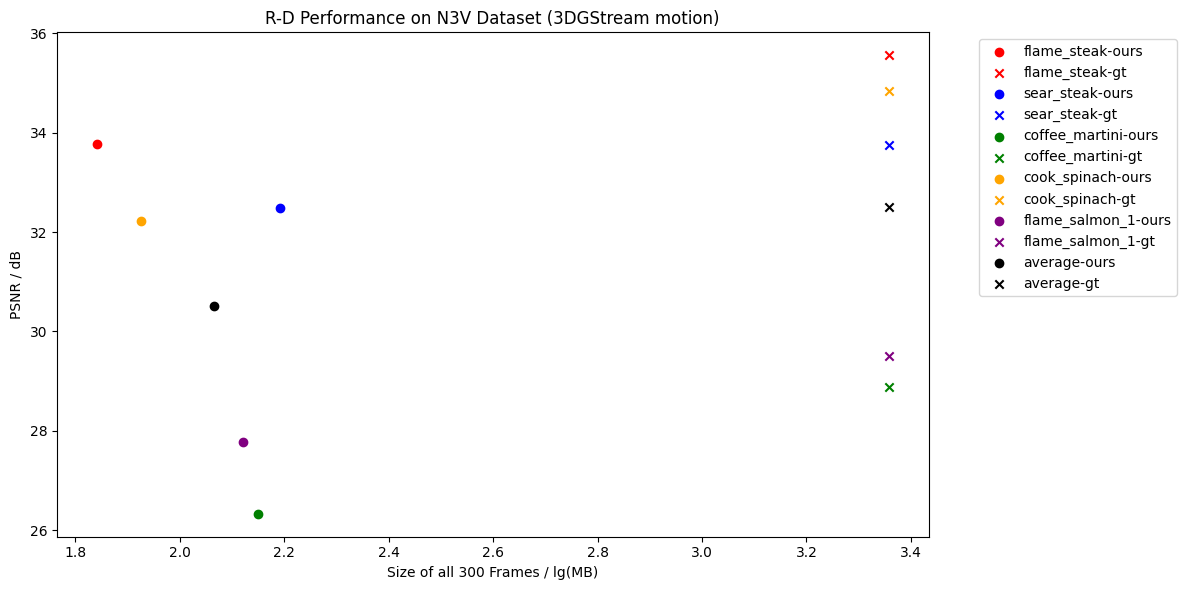

In [9]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# scene_list = ['sear_steak-5', 'flame_salmon_1', 'cut_roasted_beef', 'coffee_martini', 'flame_steak', 'cook_spinach']
# lambda_size = 1e-2

frame_start = 1
frame_end = 5

all_res = {}

dataset = 'dynerf'

def get_all_data_of_all_scenes_at_lambda(lambda_size=1e-3):
    for scene in ['flame_steak','sear_steak-5' ,'coffee_martini', 'cook_spinach', 'flame_salmon_1']:
        motion_size_list = []
        prior_size_list = []
        total_size_list = []
        psnr_list = []
        size_gt_list = [7.6]*(frame_end-frame_start)
        psnr_gt_list = [] 
        frame_list = list(range(frame_start, frame_end))

        for frame in range(frame_start, frame_end):
            base_dir = f'3DGStream-Res/all_scenes-{lambda_size}-joint-stepping-0401-exp3'
            path_size = f'{base_dir}/{scene}/frame{frame:06d}/size.json'
            with open(path_size, 'r') as f:
                size = json.load(f)
                motion_size = size['bits_motion']
                prior_size = size['bits_prior_motion']
                total_size = motion_size + prior_size
                motion_size_list.append(motion_size)
                prior_size_list.append(prior_size)
                total_size_list.append(total_size)

            path_psnr = f'{base_dir}/{scene}/frame{frame:06d}/rendering_info.json'
            with open(path_psnr, 'r') as f:
                psnr = json.load(f)
                psnr = psnr['average']['PSNR']
                psnr_list.append(psnr)

            gt_path = f'output_gt/{dataset}/{scene}/frame{frame:06d}/results.json'
            with open(gt_path, 'r') as f:
                gt = json.load(f)
                psnr_gt = gt['stage1/psnr_0']
                psnr_gt_list.append(psnr_gt)

        df = pd.DataFrame({'frame': frame_list, 'motion_size': motion_size_list, 'prior_size': prior_size_list, 'total_size': total_size_list, 'size_gt': size_gt_list, 'psnr': psnr_list, 'psnr_gt': psnr_gt_list})
        avg = df.mean()
        all_res[scene] = avg
    all_res['average'] = pd.DataFrame(all_res).mean(axis=1)
    return all_res

all_res_2 = get_all_data_of_all_scenes_at_lambda(lambda_size=1e-3)

df_all = pd.DataFrame(all_res_2)
df_all = df_all.drop('frame')
display(df_all)



# 以size为横坐标，psnr为纵坐标，画散点图，相同场景的两个点颜色相同
plt.figure(figsize=(12, 6))  # Make figure wider to accommodate legend
colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray']
for i, scene in enumerate(['flame_steak','sear_steak-5' , 'coffee_martini', 'cook_spinach', 'flame_salmon_1']):
    plt.scatter(np.log10(all_res_2[scene]['total_size']*300), all_res_2[scene]['psnr'], label=scene.split('-')[0] +'-ours', color=colors[i])
    plt.scatter(np.log10(all_res_2[scene]['size_gt']*300), all_res_2[scene]['psnr_gt'], label=scene.split('-')[0] +'-gt', marker='x', color=colors[i])

plt.scatter(np.log10(all_res_2['average']['total_size']*300), all_res_2['average']['psnr'], label='average-ours', color='black')
plt.scatter(np.log10(all_res_2['average']['size_gt']*300), all_res_2['average']['psnr_gt'], label='average-gt', marker='x', color='black')
plt.xlabel('Size of all 300 Frames / lg(MB)')
plt.ylabel('PSNR / dB')
plt.title('R-D Performance on N3V Dataset (3DGStream motion)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent legend cutoff
plt.show()


  

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dataset = 'dynerf'
scene_list = ['sear_steak-5', 'flame_salmon_1', 'cut_roasted_beef', 'coffee_martini', 'flame_steak', 'cook_spinach']

# dataset = 'meetroom'
# scene_list = ['discussion', 'stepin', 'vrheadset']

frame_start = 1
frame_end = 300

final_res = {}

for scene in scene_list:
    psnr_frame_list = []
    size_list = []
    for frame in range(frame_start, frame_end):
        path_psnr = f'output_gt/{dataset}/{scene}/frame{frame:06d}/results.json'
        with open(path_psnr, 'r') as f:
            psnr = json.load(f)
            psnr = psnr['stage1/psnr_0']
            psnr_frame_list.append(psnr)
            size_list.append(7.6)
    final_res[scene] = {'psnr': sum(psnr_frame_list) / len(psnr_frame_list), 'size': sum(size_list) / len(size_list)}

# compute average, and display as table
print('Average: ')
final_res['average'] = {'psnr': sum([final_res[scene]['psnr'] for scene in final_res]) / len(final_res), 'size': sum([final_res[scene]['size'] for scene in final_res]) / len(final_res)}
df = pd.DataFrame(final_res).T
df = df[['size', 'psnr']]
display(df)

        



Average: 


,size,psnr
sear_steak-5,7.6,33.087872
flame_salmon_1,7.6,29.612105
cut_roasted_beef,7.6,33.972736
coffee_martini,7.6,28.899543
flame_steak,7.6,33.686792
cook_spinach,7.6,33.995659
average,7.6,32.209118


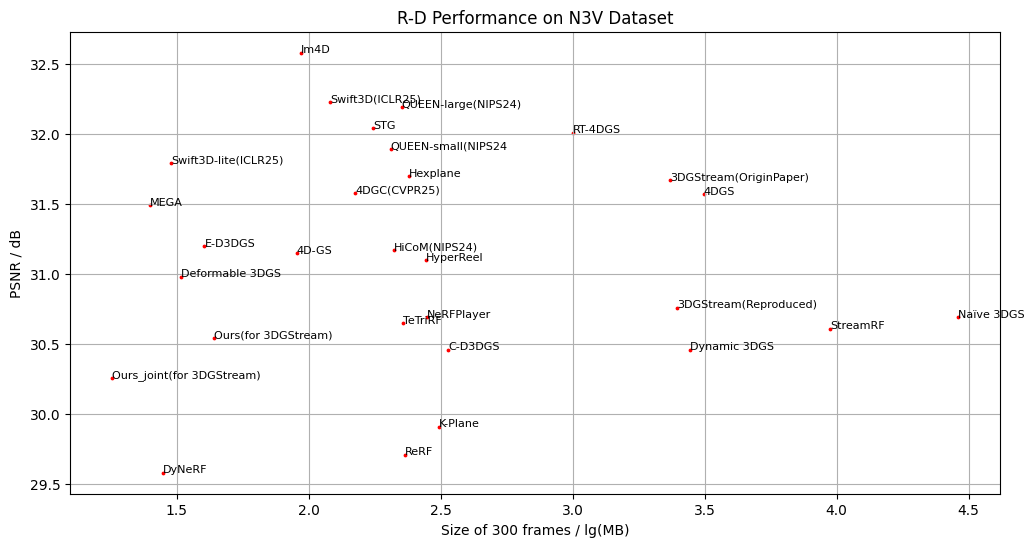

In [25]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# {
#  "StreamRF": {
#         "type": "NeRF",
#         "PSNR": 30.61,
#         "SIZE": 9420
#     },
#     "NeRFPlayer": {
#         "type": "NeRF",
#         "PSNR": 30.69,
#         "SIZE": 280
#     },
#     "HyperReel": {
#         "type": "NeRF",
#         "PSNR": 31.10,
#         "SIZE": 278
#     },
# }

# plot the results of N3V dataset

res_path = "./benchmark_n3v.json"
with open(res_path, 'r') as f:
    res = json.load(f)
model_names = list(res.keys())
psnr_list = [res[model_name]['PSNR'] for model_name in model_names]
size_list = [np.log10(res[model_name]['SIZE']) for model_name in model_names]

plt.figure(figsize=(12, 6))  # Make figure wider to accommodate legend
plt.scatter(size_list, psnr_list, s=3, color='red')
for i, model_name in enumerate(model_names):
    plt.text(size_list[i], psnr_list[i], model_name, fontsize=8)
plt.xlabel('Size of 300 frames / lg(MB)')
plt.ylabel('PSNR / dB')
# add grid
plt.grid(True)
plt.title('R-D Performance on N3V Dataset')
plt.show()


